# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this IPython notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Use a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 6](#step6): Write your Algorithm
* [Step 7](#step7): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

### Import Dog Dataset

In the code cell below, we import a dataset of dog images.  We populate a few variables through the use of the `load_files` function from the scikit-learn library:
- `train_files`, `valid_files`, `test_files` - numpy arrays containing file paths to images
- `train_targets`, `valid_targets`, `test_targets` - numpy arrays containing onehot-encoded classification labels 
- `dog_names` - list of string-valued dog breed names for translating labels

In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('dogImages/train')
valid_files, valid_targets = load_dataset('dogImages/valid')
test_files, test_targets = load_dataset('dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("dogImages/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

c:\users\solmyr\anaconda3\envs\dlnd\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


### Import Human Dataset

In the code cell below, we import a dataset of human images, where the file paths are stored in the numpy array `human_files`.

In [2]:
import random
random.seed(8675309)

# load filenames in shuffled human dataset
human_files = np.array(glob("lfw/*/*"))
random.shuffle(human_files)

# print statistics about the dataset
print('There are %d total human images.' % len(human_files))

There are 13234 total human images.


---
<a id='step1'></a>
## Step 1: Detect Humans

We use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.

In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


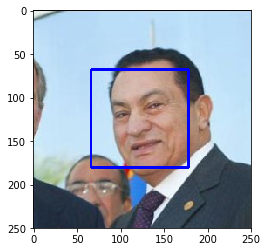

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[3])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

In [5]:
human_files_short = human_files[:100]
dog_files_short = train_files[:100]
# Do NOT modify the code above this line.

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_faces_detected = 0
for file in human_files_short:
    if face_detector(file):
        human_faces_detected += 1
print("Human files with faces detected: {}%".format(100*human_faces_detected/len(human_files_short)))

dog_faces_detected = 0
for file in dog_files_short:
    if face_detector(file):
        dog_faces_detected += 1
print("Dog files with faces detected: {}%".format(100*dog_faces_detected/len(dog_files_short)))

Human files with faces detected: 98.0%
Dog files with faces detected: 12.0%


__Question 2:__ This algorithmic choice necessitates that we communicate to the user that we accept human images only when they provide a clear view of a face (otherwise, we risk having unneccessarily frustrated users!). In your opinion, is this a reasonable expectation to pose on the user? If not, can you think of a way to detect humans in images that does not necessitate an image with a clearly presented face?

__Answer:__
Asking a user to provide an input in a certain way is a rather slippery slope. It would not solve the issue and we would still have frustrated users.
Another way to solve this issue is to use face recognition based on CNN. We can augment the training set to imitate poor input and eventually achieve better results.

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on each of the datasets.

In [6]:
## (Optional) TODO: Report the performance of another  
## face detection algorithm on the LFW dataset
### Feel free to use as many code cells as needed.

OpenCV has an [alternative Caffe-based face detection algorithm](https://github.com/opencv/opencv/tree/master/samples/dnn/face_detector) in a new **dnn** module.

I found out about this algorithm from [this tutorial](https://www.pyimagesearch.com/2018/02/26/face-detection-with-opencv-and-deep-learning/)

In [7]:
# First, we load layers and weights for the caffe model
net = cv2.dnn.readNetFromCaffe('faceDetector/deploy.prototxt.txt',
                               'faceDetector/res10_300x300_ssd_iter_140000.caffemodel')

In [8]:
# Pre-process the image by creating a blob
image = cv2.imread(human_files[3])
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, 
                             (300, 300), (104.0, 117.0, 123.0))

In [9]:
# Pass blob through the network and get face detections in image
net.setInput(blob)
detections = net.forward()

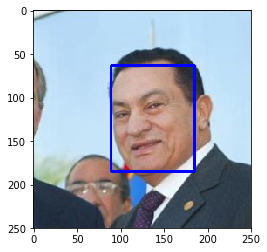

In [10]:
# loop over the detections
for i in range(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with the prediction
    confidence = detections[0, 0, i, 2]
    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence
    if confidence > 0.5:
    # compute the (x, y)-coordinates of the bounding box for the
    # object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        # draw the bounding box of the face along with the associated
        # probability
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY),
        (255,0,0),2)    
        
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
 
# show the output image
plt.imshow(cv_rgb)

In [11]:
# returns "True" if face is detected in image stored at img_path
def face_detector_dnn(img_path, prob_threshold):
    img = cv2.imread(img_path)
    (h, w) = img.shape[:2]
    # blobFromImage function is used for mean substraction and scaling
    # mean values for the ImageNet training set are R=103.93, G=116.77, and B=123.68 
    blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0, 
                             (300, 300), (104.0, 117.0, 123.0))
    net.setInput(blob)
    detections = net.forward()
    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > prob_threshold:
            return True
    return False

In [12]:
# The confidence threshold is set to get 100% detection for human images
# and a minimum value for dog images
prob_threshold = 0.965

human_files_short = human_files[:100]
dog_files_short = train_files[:100]
# Do NOT modify the code above this line.

## TODO: Test the performance of the OpenCV DNN algorithm 
## on the images in human_files_short and dog_files_short.

human_faces_detected = 0
for file in human_files_short:
    if face_detector_dnn(file, prob_threshold):
        human_faces_detected += 1
print("Human files with faces detected: {}%".format(100*human_faces_detected/len(human_files_short)))

dog_faces_detected = 0
for file in dog_files_short:
    if face_detector_dnn(file, prob_threshold):
        dog_faces_detected += 1
print("Dog files with faces detected: {}%".format(100*dog_faces_detected/len(dog_files_short)))

Human files with faces detected: 100.0%
Dog files with faces detected: 11.0%


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a pre-trained [ResNet-50](http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006) model to detect dogs in images.  Our first line of code downloads the ResNet-50 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  Given an image, this pre-trained ResNet-50 model returns a prediction (derived from the available categories in ImageNet) for the object that is contained in the image.

In [13]:
from keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

### Pre-process the Data

When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape

$$
(\text{nb_samples}, \text{rows}, \text{columns}, \text{channels}),
$$

where `nb_samples` corresponds to the total number of images (or samples), and `rows`, `columns`, and `channels` correspond to the number of rows, columns, and channels for each image, respectively.  

The `path_to_tensor` function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN.  The function first loads the image and resizes it to a square image that is $224 \times 224$ pixels.  Next, the image is converted to an array, which is then resized to a 4D tensor.  In this case, since we are working with color images, each image has three channels.  Likewise, since we are processing a single image (or sample), the returned tensor will always have shape

$$
(1, 224, 224, 3).
$$

The `paths_to_tensor` function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape 

$$
(\text{nb_samples}, 224, 224, 3).
$$

Here, `nb_samples` is the number of samples, or number of images, in the supplied array of image paths.  It is best to think of `nb_samples` as the number of 3D tensors (where each 3D tensor corresponds to a different image) in your dataset!

In [14]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

### Making Predictions with ResNet-50

Getting the 4D tensor ready for ResNet-50, and for any other pre-trained model in Keras, requires some additional processing.  First, the RGB image is converted to BGR by reordering the channels.  All pre-trained models have the additional normalization step that the mean pixel (expressed in RGB as $[103.939, 116.779, 123.68]$ and calculated from all pixels in all images in ImageNet) must be subtracted from every pixel in each image.  This is implemented in the imported function `preprocess_input`.  If you're curious, you can check the code for `preprocess_input` [here](https://github.com/fchollet/keras/blob/master/keras/applications/imagenet_utils.py).

Now that we have a way to format our image for supplying to ResNet-50, we are now ready to use the model to extract the predictions.  This is accomplished with the `predict` method, which returns an array whose $i$-th entry is the model's predicted probability that the image belongs to the $i$-th ImageNet category.  This is implemented in the `ResNet50_predict_labels` function below.

By taking the argmax of the predicted probability vector, we obtain an integer corresponding to the model's predicted object class, which we can identify with an object category through the use of this [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a). 

In [15]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

### Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained ResNet-50 model, we need only check if the `ResNet50_predict_labels` function above returns a value between 151 and 268 (inclusive).

We use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [16]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151)) 

### (IMPLEMENTATION) Assess the Dog Detector

__Question 3:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

In [17]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_files_short = human_files[:100]
dog_files_short = train_files[:100]

dogs_detected_in_human = 0
for file in human_files_short:
    if dog_detector(file):
        dogs_detected_in_human += 1
print("Human files with dogs detected: {}%".format(100*dogs_detected_in_human/len(human_files_short)))

dogs_detected_in_dogs = 0
for file in dog_files_short:
    if dog_detector(file):
        dogs_detected_in_dogs += 1
print("Dog files with dogs detected: {}%".format(100*dogs_detected_in_dogs/len(dog_files_short)))

Human files with dogs detected: 2.0%
Dog files with dogs detected: 100.0%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 1%.  In Step 5 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

Be careful with adding too many trainable layers!  More parameters means longer training, which means you are more likely to need a GPU to accelerate the training process.  Thankfully, Keras provides a handy estimate of the time that each epoch is likely to take; you can extrapolate this estimate to figure out how long it will take for your algorithm to train. 

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have great difficulty in distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun! 

### Pre-process the Data

We rescale the images by dividing every pixel in every image by 255.

In [18]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|████████████████████████████████████████████████████████████████████████████████| 836/836 [00:09<00:00, 86.56it/s]


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        model.summary()

We have imported some Python modules to get you started, but feel free to import as many modules as you need.  If you end up getting stuck, here's a hint that specifies a model that trains relatively fast on CPU and attains >1% test accuracy in 5 epochs:

![Sample CNN](images/sample_cnn.png)
           
__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  If you chose to use the hinted architecture above, describe why you think that CNN architecture should work well for the image classification task.

__Answer:__ First I decided to try the architecture suggested above. It had relatively small number of trainable parameters and trained fast. I was able to get accuracy about 14%. Then I decided to add Dropout layers to prevent overfitting on a larger number of epochs and was able to get accuracy up to 16%. Next I tried to switch to LeakyReLu at 0.2 alpha, but the network trained poorly. After that, I duplicated the convolutional layers, doubling the amount of trainable parameters, but to no avail. I would definetely like to experiment with a bigger number of filters for a layer or another layer with 96/128 filters, but I don't have enough memory on my GPU. So, 16.8 from the scratch sounds fine for now.

In [19]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dense, Dropout
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=2, padding='same', 
                        input_shape=(224, 224, 3), activation='relu'))

model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))

model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))

model.add(Dropout(0.3))

model.add(MaxPooling2D(pool_size=2))

model.add(GlobalAveragePooling2D())

model.add(Dense(133, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
dropout_1 (Dropout)          (None, 224, 224, 16)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        8256      
__________

### Compile the Model

In [20]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [21]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 400

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/400
4100/6680 [=================>............] - ETA: 1:28:06 - loss: 4.9279 - acc: 0.0000e+ - ETA: 44:49 - loss: 4.9181 - acc: 0.0000e+00 - ETA: 30:11 - loss: 4.9179 - acc: 0.0000e+ - ETA: 22:49 - loss: 4.9072 - acc: 0.0000e+ - ETA: 18:27 - loss: 4.9091 - acc: 0.0000e+ - ETA: 15:29 - loss: 4.9109 - acc: 0.0000e+ - ETA: 13:23 - loss: 4.9145 - acc: 0.0000e+ - ETA: 11:50 - loss: 4.9098 - acc: 0.0000e+ - ETA: 10:37 - loss: 4.9108 - acc: 0.0000e+ - ETA: 9:37 - loss: 4.9096 - acc: 0.0000e+00 - ETA: 8:47 - loss: 4.9104 - acc: 0.0000e+0 - ETA: 8:06 - loss: 4.9102 - acc: 0.0000e+0 - ETA: 7:31 - loss: 4.9066 - acc: 0.0000e+0 - ETA: 7:00 - loss: 4.9050 - acc: 0.0071    - ETA: 6:34 - loss: 4.9037 - acc: 0.006 - ETA: 6:11 - loss: 4.9028 - acc: 0.006 - ETA: 5:51 - loss: 4.9018 - acc: 0.005 - ETA: 5:32 - loss: 4.9011 - acc: 0.005 - ETA: 5:16 - loss: 4.9002 - acc: 0.005 - ETA: 5:02 - loss: 4.8998 - acc: 0.005 - ETA: 4:48 - loss: 4.8978 - acc: 0.0

4300/6680 [==================>...........] - ETA: 37s - loss: 4.8215 - acc: 0.0000e+ - ETA: 35s - loss: 4.8804 - acc: 0.0250   - ETA: 34s - loss: 4.8862 - acc: 0.01 - ETA: 33s - loss: 4.8843 - acc: 0.01 - ETA: 32s - loss: 4.8852 - acc: 0.01 - ETA: 33s - loss: 4.8839 - acc: 0.01 - ETA: 32s - loss: 4.8836 - acc: 0.01 - ETA: 32s - loss: 4.8826 - acc: 0.01 - ETA: 32s - loss: 4.8834 - acc: 0.01 - ETA: 32s - loss: 4.8820 - acc: 0.01 - ETA: 32s - loss: 4.8786 - acc: 0.01 - ETA: 31s - loss: 4.8772 - acc: 0.01 - ETA: 31s - loss: 4.8752 - acc: 0.01 - ETA: 31s - loss: 4.8729 - acc: 0.01 - ETA: 31s - loss: 4.8698 - acc: 0.01 - ETA: 31s - loss: 4.8743 - acc: 0.01 - ETA: 31s - loss: 4.8680 - acc: 0.02 - ETA: 31s - loss: 4.8654 - acc: 0.01 - ETA: 31s - loss: 4.8678 - acc: 0.02 - ETA: 31s - loss: 4.8716 - acc: 0.02 - ETA: 30s - loss: 4.8719 - acc: 0.01 - ETA: 30s - loss: 4.8686 - acc: 0.01 - ETA: 30s - loss: 4.8679 - acc: 0.01 - ETA: 30s - loss: 4.8687 - acc: 0.01 - ETA: 30s - loss: 4.8687 - acc: 0.01

6680/6680 [==============================] - ETA: 11s - loss: 4.8630 - acc: 0.01 - ETA: 11s - loss: 4.8627 - acc: 0.01 - ETA: 11s - loss: 4.8625 - acc: 0.01 - ETA: 11s - loss: 4.8622 - acc: 0.01 - ETA: 11s - loss: 4.8620 - acc: 0.01 - ETA: 11s - loss: 4.8619 - acc: 0.01 - ETA: 10s - loss: 4.8623 - acc: 0.01 - ETA: 10s - loss: 4.8622 - acc: 0.01 - ETA: 10s - loss: 4.8621 - acc: 0.01 - ETA: 10s - loss: 4.8620 - acc: 0.01 - ETA: 10s - loss: 4.8620 - acc: 0.01 - ETA: 10s - loss: 4.8624 - acc: 0.01 - ETA: 10s - loss: 4.8622 - acc: 0.01 - ETA: 10s - loss: 4.8623 - acc: 0.01 - ETA: 10s - loss: 4.8621 - acc: 0.01 - ETA: 10s - loss: 4.8620 - acc: 0.01 - ETA: 10s - loss: 4.8623 - acc: 0.01 - ETA: 9s - loss: 4.8623 - acc: 0.0157 - ETA: 9s - loss: 4.8625 - acc: 0.015 - ETA: 9s - loss: 4.8624 - acc: 0.015 - ETA: 9s - loss: 4.8626 - acc: 0.015 - ETA: 9s - loss: 4.8627 - acc: 0.015 - ETA: 9s - loss: 4.8630 - acc: 0.015 - ETA: 9s - loss: 4.8633 - acc: 0.015 - ETA: 9s - loss: 4.8632 - acc: 0.015 - ETA:

4300/6680 [==================>...........] - ETA: 1:15 - loss: 4.7441 - acc: 0.0000e+0 - ETA: 51s - loss: 4.8226 - acc: 0.0000e+0 - ETA: 45s - loss: 4.8116 - acc: 0.0167   - ETA: 42s - loss: 4.8131 - acc: 0.01 - ETA: 40s - loss: 4.8306 - acc: 0.01 - ETA: 38s - loss: 4.8186 - acc: 0.02 - ETA: 37s - loss: 4.8357 - acc: 0.02 - ETA: 36s - loss: 4.8283 - acc: 0.01 - ETA: 35s - loss: 4.8351 - acc: 0.02 - ETA: 35s - loss: 4.8427 - acc: 0.02 - ETA: 35s - loss: 4.8462 - acc: 0.02 - ETA: 34s - loss: 4.8504 - acc: 0.02 - ETA: 34s - loss: 4.8427 - acc: 0.01 - ETA: 33s - loss: 4.8436 - acc: 0.01 - ETA: 33s - loss: 4.8488 - acc: 0.02 - ETA: 33s - loss: 4.8403 - acc: 0.02 - ETA: 33s - loss: 4.8401 - acc: 0.02 - ETA: 32s - loss: 4.8388 - acc: 0.01 - ETA: 32s - loss: 4.8393 - acc: 0.01 - ETA: 32s - loss: 4.8430 - acc: 0.01 - ETA: 32s - loss: 4.8395 - acc: 0.01 - ETA: 32s - loss: 4.8345 - acc: 0.01 - ETA: 31s - loss: 4.8330 - acc: 0.01 - ETA: 31s - loss: 4.8369 - acc: 0.01 - ETA: 31s - loss: 4.8358 - ac

4300/6680 [==================>...........] - ETA: 26s - loss: 4.7536 - acc: 0.0000e+ - ETA: 30s - loss: 4.7824 - acc: 0.0000e+ - ETA: 30s - loss: 4.7748 - acc: 0.0333   - ETA: 31s - loss: 4.7814 - acc: 0.02 - ETA: 30s - loss: 4.7719 - acc: 0.03 - ETA: 30s - loss: 4.7836 - acc: 0.02 - ETA: 31s - loss: 4.7951 - acc: 0.02 - ETA: 31s - loss: 4.7917 - acc: 0.02 - ETA: 31s - loss: 4.7947 - acc: 0.02 - ETA: 31s - loss: 4.7964 - acc: 0.02 - ETA: 30s - loss: 4.7834 - acc: 0.02 - ETA: 31s - loss: 4.7816 - acc: 0.02 - ETA: 30s - loss: 4.7858 - acc: 0.01 - ETA: 30s - loss: 4.7829 - acc: 0.01 - ETA: 30s - loss: 4.7726 - acc: 0.01 - ETA: 30s - loss: 4.7680 - acc: 0.01 - ETA: 30s - loss: 4.7594 - acc: 0.01 - ETA: 30s - loss: 4.7668 - acc: 0.01 - ETA: 30s - loss: 4.7660 - acc: 0.01 - ETA: 30s - loss: 4.7775 - acc: 0.01 - ETA: 30s - loss: 4.7769 - acc: 0.01 - ETA: 30s - loss: 4.7721 - acc: 0.01 - ETA: 30s - loss: 4.7710 - acc: 0.02 - ETA: 29s - loss: 4.7719 - acc: 0.02 - ETA: 30s - loss: 4.7689 - acc: 

6680/6680 [==============================] - ETA: 11s - loss: 4.7711 - acc: 0.01 - ETA: 11s - loss: 4.7709 - acc: 0.01 - ETA: 11s - loss: 4.7706 - acc: 0.01 - ETA: 11s - loss: 4.7713 - acc: 0.01 - ETA: 11s - loss: 4.7716 - acc: 0.01 - ETA: 10s - loss: 4.7710 - acc: 0.01 - ETA: 10s - loss: 4.7707 - acc: 0.01 - ETA: 10s - loss: 4.7698 - acc: 0.01 - ETA: 10s - loss: 4.7698 - acc: 0.01 - ETA: 10s - loss: 4.7704 - acc: 0.01 - ETA: 10s - loss: 4.7701 - acc: 0.01 - ETA: 10s - loss: 4.7702 - acc: 0.01 - ETA: 10s - loss: 4.7695 - acc: 0.01 - ETA: 10s - loss: 4.7697 - acc: 0.01 - ETA: 10s - loss: 4.7693 - acc: 0.01 - ETA: 10s - loss: 4.7689 - acc: 0.01 - ETA: 9s - loss: 4.7690 - acc: 0.0194 - ETA: 9s - loss: 4.7699 - acc: 0.019 - ETA: 9s - loss: 4.7695 - acc: 0.019 - ETA: 9s - loss: 4.7694 - acc: 0.019 - ETA: 9s - loss: 4.7693 - acc: 0.019 - ETA: 9s - loss: 4.7696 - acc: 0.019 - ETA: 9s - loss: 4.7692 - acc: 0.019 - ETA: 9s - loss: 4.7689 - acc: 0.019 - ETA: 9s - loss: 4.7684 - acc: 0.019 - ETA:

4300/6680 [==================>...........] - ETA: 34s - loss: 4.6385 - acc: 0.0000e+ - ETA: 31s - loss: 4.5774 - acc: 0.0250   - ETA: 31s - loss: 4.6336 - acc: 0.01 - ETA: 31s - loss: 4.6175 - acc: 0.01 - ETA: 32s - loss: 4.6433 - acc: 0.03 - ETA: 32s - loss: 4.6339 - acc: 0.02 - ETA: 32s - loss: 4.6381 - acc: 0.03 - ETA: 31s - loss: 4.6448 - acc: 0.03 - ETA: 31s - loss: 4.6872 - acc: 0.03 - ETA: 31s - loss: 4.6972 - acc: 0.03 - ETA: 31s - loss: 4.6902 - acc: 0.03 - ETA: 31s - loss: 4.7032 - acc: 0.03 - ETA: 31s - loss: 4.7093 - acc: 0.03 - ETA: 30s - loss: 4.6976 - acc: 0.02 - ETA: 30s - loss: 4.6899 - acc: 0.02 - ETA: 30s - loss: 4.6832 - acc: 0.02 - ETA: 30s - loss: 4.6829 - acc: 0.02 - ETA: 30s - loss: 4.6888 - acc: 0.02 - ETA: 30s - loss: 4.6773 - acc: 0.02 - ETA: 30s - loss: 4.6783 - acc: 0.02 - ETA: 30s - loss: 4.6772 - acc: 0.02 - ETA: 30s - loss: 4.6771 - acc: 0.02 - ETA: 30s - loss: 4.6745 - acc: 0.02 - ETA: 30s - loss: 4.6712 - acc: 0.02 - ETA: 30s - loss: 4.6755 - acc: 0.02

4300/6680 [==================>...........] - ETA: 28s - loss: 4.8660 - acc: 0.05 - ETA: 30s - loss: 4.7715 - acc: 0.02 - ETA: 29s - loss: 4.7086 - acc: 0.03 - ETA: 30s - loss: 4.6927 - acc: 0.05 - ETA: 30s - loss: 4.7014 - acc: 0.05 - ETA: 31s - loss: 4.6981 - acc: 0.05 - ETA: 31s - loss: 4.6637 - acc: 0.05 - ETA: 31s - loss: 4.6790 - acc: 0.04 - ETA: 31s - loss: 4.6550 - acc: 0.03 - ETA: 30s - loss: 4.6408 - acc: 0.05 - ETA: 30s - loss: 4.6369 - acc: 0.04 - ETA: 30s - loss: 4.6382 - acc: 0.04 - ETA: 30s - loss: 4.6335 - acc: 0.03 - ETA: 30s - loss: 4.6577 - acc: 0.03 - ETA: 30s - loss: 4.6592 - acc: 0.03 - ETA: 30s - loss: 4.6758 - acc: 0.03 - ETA: 30s - loss: 4.6748 - acc: 0.02 - ETA: 30s - loss: 4.6745 - acc: 0.02 - ETA: 30s - loss: 4.6706 - acc: 0.02 - ETA: 30s - loss: 4.6568 - acc: 0.02 - ETA: 30s - loss: 4.6542 - acc: 0.02 - ETA: 30s - loss: 4.6521 - acc: 0.02 - ETA: 30s - loss: 4.6608 - acc: 0.02 - ETA: 30s - loss: 4.6627 - acc: 0.02 - ETA: 29s - loss: 4.6683 - acc: 0.02 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 4.6878 - acc: 0.02 - ETA: 11s - loss: 4.6892 - acc: 0.02 - ETA: 11s - loss: 4.6888 - acc: 0.02 - ETA: 11s - loss: 4.6885 - acc: 0.02 - ETA: 11s - loss: 4.6881 - acc: 0.02 - ETA: 11s - loss: 4.6875 - acc: 0.02 - ETA: 10s - loss: 4.6886 - acc: 0.02 - ETA: 10s - loss: 4.6887 - acc: 0.02 - ETA: 10s - loss: 4.6882 - acc: 0.02 - ETA: 10s - loss: 4.6874 - acc: 0.02 - ETA: 10s - loss: 4.6867 - acc: 0.02 - ETA: 10s - loss: 4.6866 - acc: 0.02 - ETA: 10s - loss: 4.6867 - acc: 0.02 - ETA: 10s - loss: 4.6869 - acc: 0.02 - ETA: 10s - loss: 4.6866 - acc: 0.02 - ETA: 10s - loss: 4.6873 - acc: 0.02 - ETA: 9s - loss: 4.6874 - acc: 0.0263 - ETA: 9s - loss: 4.6873 - acc: 0.026 - ETA: 9s - loss: 4.6880 - acc: 0.026 - ETA: 9s - loss: 4.6881 - acc: 0.026 - ETA: 9s - loss: 4.6883 - acc: 0.026 - ETA: 9s - loss: 4.6883 - acc: 0.026 - ETA: 9s - loss: 4.6879 - acc: 0.026 - ETA: 9s - loss: 4.6878 - acc: 0.025 - ETA: 9s - loss: 4.6873 - acc: 0.026 - ETA:

4300/6680 [==================>...........] - ETA: 34s - loss: 4.5877 - acc: 0.05 - ETA: 34s - loss: 4.5637 - acc: 0.07 - ETA: 33s - loss: 4.5934 - acc: 0.05 - ETA: 33s - loss: 4.6068 - acc: 0.03 - ETA: 33s - loss: 4.5873 - acc: 0.04 - ETA: 32s - loss: 4.6074 - acc: 0.05 - ETA: 32s - loss: 4.6200 - acc: 0.05 - ETA: 32s - loss: 4.6146 - acc: 0.05 - ETA: 31s - loss: 4.6197 - acc: 0.04 - ETA: 31s - loss: 4.6233 - acc: 0.04 - ETA: 31s - loss: 4.6266 - acc: 0.04 - ETA: 31s - loss: 4.6108 - acc: 0.04 - ETA: 31s - loss: 4.6122 - acc: 0.04 - ETA: 31s - loss: 4.6233 - acc: 0.03 - ETA: 31s - loss: 4.6244 - acc: 0.03 - ETA: 31s - loss: 4.6185 - acc: 0.03 - ETA: 31s - loss: 4.6172 - acc: 0.03 - ETA: 30s - loss: 4.6087 - acc: 0.03 - ETA: 30s - loss: 4.6125 - acc: 0.03 - ETA: 30s - loss: 4.6003 - acc: 0.03 - ETA: 30s - loss: 4.6047 - acc: 0.03 - ETA: 30s - loss: 4.6044 - acc: 0.03 - ETA: 30s - loss: 4.6182 - acc: 0.03 - ETA: 30s - loss: 4.6287 - acc: 0.03 - ETA: 30s - loss: 4.6289 - acc: 0.03 - ETA: 

4300/6680 [==================>...........] - ETA: 33s - loss: 4.5302 - acc: 0.05 - ETA: 30s - loss: 4.6930 - acc: 0.02 - ETA: 31s - loss: 4.6926 - acc: 0.01 - ETA: 31s - loss: 4.6063 - acc: 0.05 - ETA: 31s - loss: 4.5867 - acc: 0.06 - ETA: 31s - loss: 4.5687 - acc: 0.05 - ETA: 31s - loss: 4.5744 - acc: 0.05 - ETA: 31s - loss: 4.6072 - acc: 0.05 - ETA: 31s - loss: 4.6249 - acc: 0.05 - ETA: 31s - loss: 4.6028 - acc: 0.05 - ETA: 31s - loss: 4.5936 - acc: 0.05 - ETA: 31s - loss: 4.5939 - acc: 0.05 - ETA: 30s - loss: 4.5925 - acc: 0.05 - ETA: 30s - loss: 4.6176 - acc: 0.05 - ETA: 30s - loss: 4.6166 - acc: 0.05 - ETA: 30s - loss: 4.6213 - acc: 0.05 - ETA: 30s - loss: 4.6174 - acc: 0.05 - ETA: 30s - loss: 4.6163 - acc: 0.05 - ETA: 30s - loss: 4.6246 - acc: 0.05 - ETA: 30s - loss: 4.6290 - acc: 0.04 - ETA: 30s - loss: 4.6228 - acc: 0.04 - ETA: 30s - loss: 4.6256 - acc: 0.04 - ETA: 29s - loss: 4.6271 - acc: 0.04 - ETA: 29s - loss: 4.6241 - acc: 0.04 - ETA: 29s - loss: 4.6156 - acc: 0.04 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 4.6310 - acc: 0.03 - ETA: 11s - loss: 4.6327 - acc: 0.03 - ETA: 11s - loss: 4.6330 - acc: 0.03 - ETA: 11s - loss: 4.6321 - acc: 0.03 - ETA: 11s - loss: 4.6322 - acc: 0.03 - ETA: 10s - loss: 4.6326 - acc: 0.03 - ETA: 10s - loss: 4.6338 - acc: 0.03 - ETA: 10s - loss: 4.6332 - acc: 0.03 - ETA: 10s - loss: 4.6339 - acc: 0.03 - ETA: 10s - loss: 4.6341 - acc: 0.03 - ETA: 10s - loss: 4.6349 - acc: 0.03 - ETA: 10s - loss: 4.6351 - acc: 0.03 - ETA: 10s - loss: 4.6350 - acc: 0.03 - ETA: 10s - loss: 4.6348 - acc: 0.03 - ETA: 10s - loss: 4.6349 - acc: 0.03 - ETA: 9s - loss: 4.6349 - acc: 0.0351 - ETA: 9s - loss: 4.6343 - acc: 0.034 - ETA: 9s - loss: 4.6335 - acc: 0.034 - ETA: 9s - loss: 4.6328 - acc: 0.034 - ETA: 9s - loss: 4.6335 - acc: 0.034 - ETA: 9s - loss: 4.6336 - acc: 0.034 - ETA: 9s - loss: 4.6332 - acc: 0.034 - ETA: 9s - loss: 4.6339 - acc: 0.034 - ETA: 9s - loss: 4.6342 - acc: 0.033 - ETA: 9s - loss: 4.6352 - acc: 0.033 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 4.5210 - acc: 0.15 - ETA: 28s - loss: 4.4776 - acc: 0.12 - ETA: 31s - loss: 4.4606 - acc: 0.11 - ETA: 31s - loss: 4.4967 - acc: 0.08 - ETA: 30s - loss: 4.5077 - acc: 0.07 - ETA: 30s - loss: 4.5099 - acc: 0.06 - ETA: 31s - loss: 4.5607 - acc: 0.05 - ETA: 31s - loss: 4.5513 - acc: 0.05 - ETA: 31s - loss: 4.5670 - acc: 0.05 - ETA: 30s - loss: 4.5767 - acc: 0.04 - ETA: 30s - loss: 4.6027 - acc: 0.04 - ETA: 30s - loss: 4.5994 - acc: 0.03 - ETA: 30s - loss: 4.6009 - acc: 0.03 - ETA: 30s - loss: 4.5938 - acc: 0.03 - ETA: 30s - loss: 4.5863 - acc: 0.03 - ETA: 30s - loss: 4.6086 - acc: 0.03 - ETA: 30s - loss: 4.6154 - acc: 0.03 - ETA: 30s - loss: 4.5994 - acc: 0.04 - ETA: 30s - loss: 4.5987 - acc: 0.04 - ETA: 30s - loss: 4.6118 - acc: 0.04 - ETA: 30s - loss: 4.6167 - acc: 0.04 - ETA: 29s - loss: 4.6074 - acc: 0.04 - ETA: 29s - loss: 4.6030 - acc: 0.04 - ETA: 29s - loss: 4.6010 - acc: 0.03 - ETA: 29s - loss: 4.5952 - acc: 0.04 - ETA: 

4300/6680 [==================>...........] - ETA: 28s - loss: 4.6237 - acc: 0.10 - ETA: 31s - loss: 4.5371 - acc: 0.07 - ETA: 31s - loss: 4.4874 - acc: 0.08 - ETA: 31s - loss: 4.4728 - acc: 0.10 - ETA: 30s - loss: 4.4616 - acc: 0.09 - ETA: 30s - loss: 4.5028 - acc: 0.07 - ETA: 30s - loss: 4.5218 - acc: 0.06 - ETA: 31s - loss: 4.4978 - acc: 0.05 - ETA: 30s - loss: 4.5226 - acc: 0.05 - ETA: 31s - loss: 4.5365 - acc: 0.04 - ETA: 30s - loss: 4.5477 - acc: 0.04 - ETA: 30s - loss: 4.5482 - acc: 0.04 - ETA: 30s - loss: 4.5547 - acc: 0.04 - ETA: 30s - loss: 4.5547 - acc: 0.04 - ETA: 30s - loss: 4.5378 - acc: 0.04 - ETA: 30s - loss: 4.5458 - acc: 0.05 - ETA: 30s - loss: 4.5507 - acc: 0.04 - ETA: 30s - loss: 4.5415 - acc: 0.04 - ETA: 30s - loss: 4.5375 - acc: 0.04 - ETA: 30s - loss: 4.5446 - acc: 0.04 - ETA: 30s - loss: 4.5411 - acc: 0.04 - ETA: 30s - loss: 4.5445 - acc: 0.04 - ETA: 29s - loss: 4.5542 - acc: 0.04 - ETA: 29s - loss: 4.5530 - acc: 0.04 - ETA: 29s - loss: 4.5474 - acc: 0.04 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 4.5710 - acc: 0.04 - ETA: 11s - loss: 4.5724 - acc: 0.04 - ETA: 11s - loss: 4.5733 - acc: 0.04 - ETA: 11s - loss: 4.5747 - acc: 0.04 - ETA: 11s - loss: 4.5747 - acc: 0.04 - ETA: 10s - loss: 4.5761 - acc: 0.04 - ETA: 10s - loss: 4.5755 - acc: 0.04 - ETA: 10s - loss: 4.5755 - acc: 0.04 - ETA: 10s - loss: 4.5753 - acc: 0.04 - ETA: 10s - loss: 4.5750 - acc: 0.04 - ETA: 10s - loss: 4.5758 - acc: 0.04 - ETA: 10s - loss: 4.5762 - acc: 0.04 - ETA: 10s - loss: 4.5766 - acc: 0.04 - ETA: 10s - loss: 4.5754 - acc: 0.04 - ETA: 10s - loss: 4.5748 - acc: 0.04 - ETA: 10s - loss: 4.5743 - acc: 0.04 - ETA: 9s - loss: 4.5740 - acc: 0.0433 - ETA: 9s - loss: 4.5735 - acc: 0.043 - ETA: 9s - loss: 4.5728 - acc: 0.043 - ETA: 9s - loss: 4.5712 - acc: 0.043 - ETA: 9s - loss: 4.5706 - acc: 0.043 - ETA: 9s - loss: 4.5714 - acc: 0.043 - ETA: 9s - loss: 4.5720 - acc: 0.043 - ETA: 9s - loss: 4.5711 - acc: 0.043 - ETA: 9s - loss: 4.5717 - acc: 0.043 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 4.6982 - acc: 0.05 - ETA: 29s - loss: 4.5707 - acc: 0.07 - ETA: 30s - loss: 4.5025 - acc: 0.05 - ETA: 30s - loss: 4.4957 - acc: 0.03 - ETA: 31s - loss: 4.4731 - acc: 0.04 - ETA: 31s - loss: 4.5098 - acc: 0.04 - ETA: 30s - loss: 4.5388 - acc: 0.03 - ETA: 31s - loss: 4.5273 - acc: 0.03 - ETA: 31s - loss: 4.5469 - acc: 0.03 - ETA: 31s - loss: 4.5438 - acc: 0.04 - ETA: 31s - loss: 4.5292 - acc: 0.04 - ETA: 31s - loss: 4.5355 - acc: 0.05 - ETA: 31s - loss: 4.5227 - acc: 0.05 - ETA: 30s - loss: 4.5303 - acc: 0.05 - ETA: 30s - loss: 4.5266 - acc: 0.04 - ETA: 30s - loss: 4.5206 - acc: 0.04 - ETA: 30s - loss: 4.5326 - acc: 0.04 - ETA: 30s - loss: 4.5376 - acc: 0.04 - ETA: 30s - loss: 4.5481 - acc: 0.04 - ETA: 30s - loss: 4.5564 - acc: 0.04 - ETA: 30s - loss: 4.5493 - acc: 0.04 - ETA: 30s - loss: 4.5537 - acc: 0.04 - ETA: 29s - loss: 4.5581 - acc: 0.04 - ETA: 30s - loss: 4.5529 - acc: 0.04 - ETA: 29s - loss: 4.5520 - acc: 0.04 - ETA: 

4300/6680 [==================>...........] - ETA: 28s - loss: 4.2703 - acc: 0.15 - ETA: 29s - loss: 4.4938 - acc: 0.10 - ETA: 30s - loss: 4.5136 - acc: 0.06 - ETA: 31s - loss: 4.4702 - acc: 0.08 - ETA: 30s - loss: 4.5009 - acc: 0.09 - ETA: 30s - loss: 4.5217 - acc: 0.08 - ETA: 30s - loss: 4.5106 - acc: 0.09 - ETA: 30s - loss: 4.5316 - acc: 0.08 - ETA: 31s - loss: 4.5265 - acc: 0.07 - ETA: 30s - loss: 4.5014 - acc: 0.07 - ETA: 30s - loss: 4.4906 - acc: 0.07 - ETA: 30s - loss: 4.4756 - acc: 0.07 - ETA: 30s - loss: 4.4761 - acc: 0.06 - ETA: 30s - loss: 4.5039 - acc: 0.06 - ETA: 30s - loss: 4.5064 - acc: 0.06 - ETA: 30s - loss: 4.5104 - acc: 0.05 - ETA: 30s - loss: 4.5264 - acc: 0.05 - ETA: 30s - loss: 4.5114 - acc: 0.05 - ETA: 30s - loss: 4.5019 - acc: 0.05 - ETA: 30s - loss: 4.4971 - acc: 0.05 - ETA: 30s - loss: 4.5036 - acc: 0.05 - ETA: 30s - loss: 4.5018 - acc: 0.05 - ETA: 29s - loss: 4.5059 - acc: 0.05 - ETA: 29s - loss: 4.5061 - acc: 0.05 - ETA: 29s - loss: 4.5192 - acc: 0.05 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 4.5178 - acc: 0.04 - ETA: 11s - loss: 4.5162 - acc: 0.04 - ETA: 11s - loss: 4.5175 - acc: 0.04 - ETA: 11s - loss: 4.5182 - acc: 0.04 - ETA: 11s - loss: 4.5183 - acc: 0.04 - ETA: 10s - loss: 4.5178 - acc: 0.04 - ETA: 10s - loss: 4.5187 - acc: 0.04 - ETA: 10s - loss: 4.5189 - acc: 0.04 - ETA: 10s - loss: 4.5190 - acc: 0.04 - ETA: 10s - loss: 4.5185 - acc: 0.04 - ETA: 10s - loss: 4.5190 - acc: 0.04 - ETA: 10s - loss: 4.5181 - acc: 0.04 - ETA: 10s - loss: 4.5180 - acc: 0.04 - ETA: 10s - loss: 4.5168 - acc: 0.04 - ETA: 10s - loss: 4.5176 - acc: 0.04 - ETA: 9s - loss: 4.5176 - acc: 0.0494 - ETA: 9s - loss: 4.5183 - acc: 0.049 - ETA: 9s - loss: 4.5174 - acc: 0.049 - ETA: 9s - loss: 4.5179 - acc: 0.049 - ETA: 9s - loss: 4.5195 - acc: 0.048 - ETA: 9s - loss: 4.5185 - acc: 0.049 - ETA: 9s - loss: 4.5178 - acc: 0.049 - ETA: 9s - loss: 4.5184 - acc: 0.049 - ETA: 9s - loss: 4.5168 - acc: 0.049 - ETA: 9s - loss: 4.5172 - acc: 0.049 - ETA:

4300/6680 [==================>...........] - ETA: 35s - loss: 4.6123 - acc: 0.10 - ETA: 33s - loss: 4.5004 - acc: 0.07 - ETA: 32s - loss: 4.5078 - acc: 0.05 - ETA: 31s - loss: 4.5080 - acc: 0.03 - ETA: 31s - loss: 4.5285 - acc: 0.05 - ETA: 32s - loss: 4.5022 - acc: 0.04 - ETA: 31s - loss: 4.5128 - acc: 0.04 - ETA: 31s - loss: 4.5139 - acc: 0.03 - ETA: 31s - loss: 4.5092 - acc: 0.03 - ETA: 31s - loss: 4.5005 - acc: 0.03 - ETA: 31s - loss: 4.4936 - acc: 0.03 - ETA: 31s - loss: 4.5156 - acc: 0.03 - ETA: 31s - loss: 4.5038 - acc: 0.03 - ETA: 31s - loss: 4.5229 - acc: 0.03 - ETA: 30s - loss: 4.5341 - acc: 0.03 - ETA: 30s - loss: 4.5228 - acc: 0.03 - ETA: 30s - loss: 4.4973 - acc: 0.03 - ETA: 30s - loss: 4.4916 - acc: 0.04 - ETA: 30s - loss: 4.5027 - acc: 0.04 - ETA: 30s - loss: 4.5036 - acc: 0.04 - ETA: 30s - loss: 4.5020 - acc: 0.04 - ETA: 30s - loss: 4.4904 - acc: 0.04 - ETA: 30s - loss: 4.5219 - acc: 0.04 - ETA: 30s - loss: 4.5231 - acc: 0.04 - ETA: 30s - loss: 4.5102 - acc: 0.04 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 4.3650 - acc: 0.05 - ETA: 30s - loss: 4.5563 - acc: 0.05 - ETA: 30s - loss: 4.3735 - acc: 0.10 - ETA: 30s - loss: 4.4789 - acc: 0.10 - ETA: 31s - loss: 4.4412 - acc: 0.08 - ETA: 31s - loss: 4.4296 - acc: 0.07 - ETA: 30s - loss: 4.4180 - acc: 0.07 - ETA: 31s - loss: 4.4303 - acc: 0.07 - ETA: 31s - loss: 4.4829 - acc: 0.06 - ETA: 31s - loss: 4.4870 - acc: 0.06 - ETA: 30s - loss: 4.4857 - acc: 0.06 - ETA: 31s - loss: 4.4777 - acc: 0.06 - ETA: 30s - loss: 4.4908 - acc: 0.05 - ETA: 30s - loss: 4.4798 - acc: 0.06 - ETA: 30s - loss: 4.4833 - acc: 0.06 - ETA: 30s - loss: 4.4887 - acc: 0.05 - ETA: 30s - loss: 4.4827 - acc: 0.05 - ETA: 30s - loss: 4.5112 - acc: 0.05 - ETA: 30s - loss: 4.5092 - acc: 0.05 - ETA: 30s - loss: 4.5045 - acc: 0.05 - ETA: 30s - loss: 4.5029 - acc: 0.05 - ETA: 30s - loss: 4.4893 - acc: 0.05 - ETA: 29s - loss: 4.4850 - acc: 0.05 - ETA: 30s - loss: 4.4810 - acc: 0.05 - ETA: 29s - loss: 4.4746 - acc: 0.05 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 4.4544 - acc: 0.05 - ETA: 11s - loss: 4.4547 - acc: 0.05 - ETA: 11s - loss: 4.4541 - acc: 0.05 - ETA: 11s - loss: 4.4547 - acc: 0.05 - ETA: 11s - loss: 4.4542 - acc: 0.05 - ETA: 10s - loss: 4.4525 - acc: 0.05 - ETA: 10s - loss: 4.4525 - acc: 0.05 - ETA: 10s - loss: 4.4525 - acc: 0.05 - ETA: 10s - loss: 4.4538 - acc: 0.05 - ETA: 10s - loss: 4.4536 - acc: 0.05 - ETA: 10s - loss: 4.4551 - acc: 0.05 - ETA: 10s - loss: 4.4565 - acc: 0.05 - ETA: 10s - loss: 4.4565 - acc: 0.05 - ETA: 10s - loss: 4.4563 - acc: 0.05 - ETA: 10s - loss: 4.4578 - acc: 0.05 - ETA: 10s - loss: 4.4571 - acc: 0.05 - ETA: 9s - loss: 4.4580 - acc: 0.0526 - ETA: 9s - loss: 4.4595 - acc: 0.052 - ETA: 9s - loss: 4.4591 - acc: 0.052 - ETA: 9s - loss: 4.4593 - acc: 0.052 - ETA: 9s - loss: 4.4586 - acc: 0.052 - ETA: 9s - loss: 4.4577 - acc: 0.052 - ETA: 9s - loss: 4.4594 - acc: 0.052 - ETA: 9s - loss: 4.4609 - acc: 0.051 - ETA: 9s - loss: 4.4623 - acc: 0.052 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 4.3264 - acc: 0.05 - ETA: 29s - loss: 4.4142 - acc: 0.07 - ETA: 30s - loss: 4.3784 - acc: 0.05 - ETA: 30s - loss: 4.3820 - acc: 0.05 - ETA: 30s - loss: 4.3779 - acc: 0.07 - ETA: 30s - loss: 4.4227 - acc: 0.05 - ETA: 31s - loss: 4.4201 - acc: 0.07 - ETA: 31s - loss: 4.3895 - acc: 0.07 - ETA: 30s - loss: 4.3699 - acc: 0.07 - ETA: 30s - loss: 4.3956 - acc: 0.07 - ETA: 31s - loss: 4.3884 - acc: 0.07 - ETA: 31s - loss: 4.3967 - acc: 0.07 - ETA: 31s - loss: 4.3625 - acc: 0.08 - ETA: 30s - loss: 4.3741 - acc: 0.08 - ETA: 30s - loss: 4.3862 - acc: 0.08 - ETA: 30s - loss: 4.3853 - acc: 0.07 - ETA: 30s - loss: 4.3856 - acc: 0.07 - ETA: 30s - loss: 4.3883 - acc: 0.07 - ETA: 30s - loss: 4.3923 - acc: 0.06 - ETA: 30s - loss: 4.3852 - acc: 0.07 - ETA: 30s - loss: 4.3943 - acc: 0.07 - ETA: 30s - loss: 4.3828 - acc: 0.06 - ETA: 30s - loss: 4.3862 - acc: 0.06 - ETA: 30s - loss: 4.4003 - acc: 0.06 - ETA: 29s - loss: 4.3872 - acc: 0.06 - ETA: 

4300/6680 [==================>...........] - ETA: 33s - loss: 4.4008 - acc: 0.10 - ETA: 34s - loss: 4.4957 - acc: 0.05 - ETA: 32s - loss: 4.4831 - acc: 0.03 - ETA: 32s - loss: 4.4751 - acc: 0.02 - ETA: 32s - loss: 4.4159 - acc: 0.04 - ETA: 32s - loss: 4.5015 - acc: 0.03 - ETA: 32s - loss: 4.4899 - acc: 0.05 - ETA: 32s - loss: 4.4759 - acc: 0.05 - ETA: 31s - loss: 4.4549 - acc: 0.06 - ETA: 31s - loss: 4.4727 - acc: 0.05 - ETA: 31s - loss: 4.4545 - acc: 0.05 - ETA: 31s - loss: 4.4116 - acc: 0.06 - ETA: 31s - loss: 4.3896 - acc: 0.07 - ETA: 31s - loss: 4.4007 - acc: 0.07 - ETA: 31s - loss: 4.3950 - acc: 0.07 - ETA: 31s - loss: 4.3961 - acc: 0.06 - ETA: 30s - loss: 4.3990 - acc: 0.06 - ETA: 30s - loss: 4.3789 - acc: 0.06 - ETA: 30s - loss: 4.3802 - acc: 0.06 - ETA: 30s - loss: 4.3856 - acc: 0.06 - ETA: 30s - loss: 4.3795 - acc: 0.06 - ETA: 30s - loss: 4.4103 - acc: 0.06 - ETA: 30s - loss: 4.4113 - acc: 0.06 - ETA: 30s - loss: 4.4081 - acc: 0.06 - ETA: 29s - loss: 4.4045 - acc: 0.06 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 4.4121 - acc: 0.06 - ETA: 11s - loss: 4.4116 - acc: 0.06 - ETA: 11s - loss: 4.4114 - acc: 0.06 - ETA: 11s - loss: 4.4131 - acc: 0.06 - ETA: 11s - loss: 4.4135 - acc: 0.06 - ETA: 10s - loss: 4.4111 - acc: 0.06 - ETA: 10s - loss: 4.4104 - acc: 0.06 - ETA: 10s - loss: 4.4117 - acc: 0.06 - ETA: 10s - loss: 4.4101 - acc: 0.06 - ETA: 10s - loss: 4.4105 - acc: 0.06 - ETA: 10s - loss: 4.4108 - acc: 0.06 - ETA: 10s - loss: 4.4111 - acc: 0.06 - ETA: 10s - loss: 4.4096 - acc: 0.06 - ETA: 10s - loss: 4.4108 - acc: 0.06 - ETA: 10s - loss: 4.4116 - acc: 0.06 - ETA: 9s - loss: 4.4109 - acc: 0.0606 - ETA: 9s - loss: 4.4113 - acc: 0.060 - ETA: 9s - loss: 4.4098 - acc: 0.060 - ETA: 9s - loss: 4.4096 - acc: 0.060 - ETA: 9s - loss: 4.4103 - acc: 0.060 - ETA: 9s - loss: 4.4100 - acc: 0.060 - ETA: 9s - loss: 4.4102 - acc: 0.060 - ETA: 9s - loss: 4.4083 - acc: 0.060 - ETA: 9s - loss: 4.4072 - acc: 0.060 - ETA: 9s - loss: 4.4076 - acc: 0.060 - ETA:

4300/6680 [==================>...........] - ETA: 33s - loss: 4.3549 - acc: 0.0000e+ - ETA: 31s - loss: 4.3397 - acc: 0.0500   - ETA: 31s - loss: 4.3826 - acc: 0.05 - ETA: 31s - loss: 4.3323 - acc: 0.06 - ETA: 31s - loss: 4.2244 - acc: 0.07 - ETA: 31s - loss: 4.2320 - acc: 0.05 - ETA: 31s - loss: 4.2251 - acc: 0.05 - ETA: 31s - loss: 4.2723 - acc: 0.06 - ETA: 30s - loss: 4.3013 - acc: 0.06 - ETA: 31s - loss: 4.3357 - acc: 0.07 - ETA: 31s - loss: 4.3450 - acc: 0.08 - ETA: 30s - loss: 4.3503 - acc: 0.07 - ETA: 31s - loss: 4.3688 - acc: 0.06 - ETA: 30s - loss: 4.3628 - acc: 0.07 - ETA: 30s - loss: 4.3708 - acc: 0.07 - ETA: 30s - loss: 4.3970 - acc: 0.06 - ETA: 30s - loss: 4.3913 - acc: 0.07 - ETA: 30s - loss: 4.3896 - acc: 0.06 - ETA: 30s - loss: 4.3933 - acc: 0.06 - ETA: 30s - loss: 4.4076 - acc: 0.06 - ETA: 30s - loss: 4.4061 - acc: 0.06 - ETA: 30s - loss: 4.3980 - acc: 0.06 - ETA: 29s - loss: 4.4012 - acc: 0.06 - ETA: 30s - loss: 4.3977 - acc: 0.06 - ETA: 29s - loss: 4.3901 - acc: 0.06

4300/6680 [==================>...........] - ETA: 29s - loss: 4.2381 - acc: 0.0000e+ - ETA: 28s - loss: 4.3353 - acc: 0.0500   - ETA: 30s - loss: 4.3427 - acc: 0.03 - ETA: 30s - loss: 4.3671 - acc: 0.02 - ETA: 31s - loss: 4.3323 - acc: 0.03 - ETA: 31s - loss: 4.3190 - acc: 0.02 - ETA: 31s - loss: 4.3008 - acc: 0.02 - ETA: 30s - loss: 4.3069 - acc: 0.02 - ETA: 30s - loss: 4.3002 - acc: 0.02 - ETA: 30s - loss: 4.3197 - acc: 0.02 - ETA: 30s - loss: 4.3277 - acc: 0.02 - ETA: 30s - loss: 4.3478 - acc: 0.02 - ETA: 30s - loss: 4.3738 - acc: 0.02 - ETA: 30s - loss: 4.3602 - acc: 0.02 - ETA: 30s - loss: 4.3541 - acc: 0.03 - ETA: 30s - loss: 4.3498 - acc: 0.03 - ETA: 30s - loss: 4.3420 - acc: 0.03 - ETA: 30s - loss: 4.3629 - acc: 0.03 - ETA: 30s - loss: 4.3547 - acc: 0.04 - ETA: 30s - loss: 4.3587 - acc: 0.04 - ETA: 30s - loss: 4.3606 - acc: 0.04 - ETA: 29s - loss: 4.3734 - acc: 0.04 - ETA: 29s - loss: 4.3604 - acc: 0.04 - ETA: 29s - loss: 4.3612 - acc: 0.04 - ETA: 29s - loss: 4.3646 - acc: 0.04

6680/6680 [==============================] - ETA: 11s - loss: 4.3688 - acc: 0.06 - ETA: 11s - loss: 4.3675 - acc: 0.06 - ETA: 11s - loss: 4.3674 - acc: 0.06 - ETA: 11s - loss: 4.3661 - acc: 0.06 - ETA: 11s - loss: 4.3656 - acc: 0.06 - ETA: 10s - loss: 4.3669 - acc: 0.06 - ETA: 10s - loss: 4.3666 - acc: 0.06 - ETA: 10s - loss: 4.3686 - acc: 0.06 - ETA: 10s - loss: 4.3688 - acc: 0.06 - ETA: 10s - loss: 4.3702 - acc: 0.06 - ETA: 10s - loss: 4.3702 - acc: 0.06 - ETA: 10s - loss: 4.3698 - acc: 0.06 - ETA: 10s - loss: 4.3689 - acc: 0.06 - ETA: 10s - loss: 4.3693 - acc: 0.06 - ETA: 10s - loss: 4.3710 - acc: 0.06 - ETA: 9s - loss: 4.3712 - acc: 0.0626 - ETA: 9s - loss: 4.3711 - acc: 0.062 - ETA: 9s - loss: 4.3702 - acc: 0.062 - ETA: 9s - loss: 4.3700 - acc: 0.063 - ETA: 9s - loss: 4.3705 - acc: 0.063 - ETA: 9s - loss: 4.3700 - acc: 0.062 - ETA: 9s - loss: 4.3703 - acc: 0.062 - ETA: 9s - loss: 4.3690 - acc: 0.063 - ETA: 9s - loss: 4.3687 - acc: 0.063 - ETA: 9s - loss: 4.3704 - acc: 0.063 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 4.2698 - acc: 0.15 - ETA: 29s - loss: 4.3344 - acc: 0.12 - ETA: 30s - loss: 4.4720 - acc: 0.08 - ETA: 30s - loss: 4.4848 - acc: 0.06 - ETA: 30s - loss: 4.4151 - acc: 0.07 - ETA: 30s - loss: 4.3555 - acc: 0.06 - ETA: 30s - loss: 4.3238 - acc: 0.07 - ETA: 31s - loss: 4.4056 - acc: 0.06 - ETA: 30s - loss: 4.3853 - acc: 0.07 - ETA: 30s - loss: 4.4062 - acc: 0.07 - ETA: 30s - loss: 4.3841 - acc: 0.07 - ETA: 30s - loss: 4.3878 - acc: 0.07 - ETA: 30s - loss: 4.3678 - acc: 0.07 - ETA: 30s - loss: 4.3779 - acc: 0.07 - ETA: 30s - loss: 4.3774 - acc: 0.07 - ETA: 30s - loss: 4.3465 - acc: 0.08 - ETA: 30s - loss: 4.3785 - acc: 0.07 - ETA: 30s - loss: 4.3718 - acc: 0.07 - ETA: 30s - loss: 4.4013 - acc: 0.07 - ETA: 30s - loss: 4.3920 - acc: 0.08 - ETA: 30s - loss: 4.3813 - acc: 0.08 - ETA: 29s - loss: 4.3849 - acc: 0.08 - ETA: 29s - loss: 4.4038 - acc: 0.08 - ETA: 29s - loss: 4.4083 - acc: 0.07 - ETA: 29s - loss: 4.4049 - acc: 0.07 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 4.4624 - acc: 0.05 - ETA: 31s - loss: 4.5710 - acc: 0.05 - ETA: 30s - loss: 4.4967 - acc: 0.03 - ETA: 31s - loss: 4.4384 - acc: 0.03 - ETA: 31s - loss: 4.4052 - acc: 0.05 - ETA: 31s - loss: 4.3437 - acc: 0.05 - ETA: 30s - loss: 4.3241 - acc: 0.05 - ETA: 31s - loss: 4.4031 - acc: 0.05 - ETA: 31s - loss: 4.3829 - acc: 0.05 - ETA: 30s - loss: 4.3891 - acc: 0.05 - ETA: 31s - loss: 4.3602 - acc: 0.05 - ETA: 30s - loss: 4.3644 - acc: 0.05 - ETA: 30s - loss: 4.3606 - acc: 0.05 - ETA: 30s - loss: 4.3651 - acc: 0.05 - ETA: 30s - loss: 4.3662 - acc: 0.05 - ETA: 30s - loss: 4.3570 - acc: 0.05 - ETA: 30s - loss: 4.3474 - acc: 0.06 - ETA: 30s - loss: 4.3509 - acc: 0.06 - ETA: 30s - loss: 4.3423 - acc: 0.06 - ETA: 30s - loss: 4.3451 - acc: 0.05 - ETA: 30s - loss: 4.3436 - acc: 0.05 - ETA: 30s - loss: 4.3457 - acc: 0.05 - ETA: 30s - loss: 4.3329 - acc: 0.06 - ETA: 29s - loss: 4.3277 - acc: 0.05 - ETA: 29s - loss: 4.3133 - acc: 0.06 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 4.3295 - acc: 0.06 - ETA: 11s - loss: 4.3303 - acc: 0.06 - ETA: 11s - loss: 4.3305 - acc: 0.06 - ETA: 11s - loss: 4.3308 - acc: 0.06 - ETA: 11s - loss: 4.3303 - acc: 0.06 - ETA: 10s - loss: 4.3317 - acc: 0.06 - ETA: 10s - loss: 4.3329 - acc: 0.06 - ETA: 10s - loss: 4.3318 - acc: 0.06 - ETA: 10s - loss: 4.3316 - acc: 0.06 - ETA: 10s - loss: 4.3315 - acc: 0.06 - ETA: 10s - loss: 4.3336 - acc: 0.06 - ETA: 10s - loss: 4.3366 - acc: 0.06 - ETA: 10s - loss: 4.3366 - acc: 0.06 - ETA: 10s - loss: 4.3365 - acc: 0.06 - ETA: 10s - loss: 4.3374 - acc: 0.06 - ETA: 10s - loss: 4.3357 - acc: 0.06 - ETA: 9s - loss: 4.3364 - acc: 0.0644 - ETA: 9s - loss: 4.3363 - acc: 0.064 - ETA: 9s - loss: 4.3365 - acc: 0.064 - ETA: 9s - loss: 4.3364 - acc: 0.064 - ETA: 9s - loss: 4.3348 - acc: 0.064 - ETA: 9s - loss: 4.3343 - acc: 0.064 - ETA: 9s - loss: 4.3361 - acc: 0.064 - ETA: 9s - loss: 4.3372 - acc: 0.064 - ETA: 9s - loss: 4.3382 - acc: 0.064 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 4.7525 - acc: 0.05 - ETA: 31s - loss: 4.5406 - acc: 0.05 - ETA: 30s - loss: 4.5818 - acc: 0.05 - ETA: 31s - loss: 4.4792 - acc: 0.05 - ETA: 31s - loss: 4.3593 - acc: 0.06 - ETA: 31s - loss: 4.3926 - acc: 0.05 - ETA: 31s - loss: 4.3707 - acc: 0.05 - ETA: 30s - loss: 4.4299 - acc: 0.04 - ETA: 30s - loss: 4.4491 - acc: 0.03 - ETA: 30s - loss: 4.4415 - acc: 0.03 - ETA: 31s - loss: 4.4004 - acc: 0.03 - ETA: 31s - loss: 4.3633 - acc: 0.04 - ETA: 30s - loss: 4.3843 - acc: 0.05 - ETA: 30s - loss: 4.3781 - acc: 0.05 - ETA: 30s - loss: 4.4065 - acc: 0.05 - ETA: 30s - loss: 4.3871 - acc: 0.05 - ETA: 30s - loss: 4.3737 - acc: 0.05 - ETA: 30s - loss: 4.3767 - acc: 0.05 - ETA: 30s - loss: 4.3653 - acc: 0.05 - ETA: 30s - loss: 4.3560 - acc: 0.06 - ETA: 30s - loss: 4.3277 - acc: 0.05 - ETA: 30s - loss: 4.3285 - acc: 0.05 - ETA: 30s - loss: 4.3271 - acc: 0.06 - ETA: 29s - loss: 4.3259 - acc: 0.06 - ETA: 29s - loss: 4.3185 - acc: 0.06 - ETA: 

4300/6680 [==================>...........] - ETA: 38s - loss: 4.1813 - acc: 0.05 - ETA: 34s - loss: 3.9770 - acc: 0.02 - ETA: 34s - loss: 3.9240 - acc: 0.05 - ETA: 33s - loss: 3.9749 - acc: 0.05 - ETA: 32s - loss: 4.0495 - acc: 0.04 - ETA: 32s - loss: 4.1043 - acc: 0.03 - ETA: 32s - loss: 4.1524 - acc: 0.04 - ETA: 32s - loss: 4.1946 - acc: 0.05 - ETA: 32s - loss: 4.2010 - acc: 0.04 - ETA: 31s - loss: 4.1869 - acc: 0.05 - ETA: 31s - loss: 4.1627 - acc: 0.05 - ETA: 31s - loss: 4.1552 - acc: 0.06 - ETA: 31s - loss: 4.2060 - acc: 0.06 - ETA: 31s - loss: 4.2539 - acc: 0.05 - ETA: 31s - loss: 4.2498 - acc: 0.06 - ETA: 30s - loss: 4.2623 - acc: 0.06 - ETA: 30s - loss: 4.2646 - acc: 0.06 - ETA: 30s - loss: 4.2662 - acc: 0.05 - ETA: 30s - loss: 4.2797 - acc: 0.05 - ETA: 30s - loss: 4.2847 - acc: 0.05 - ETA: 30s - loss: 4.2723 - acc: 0.06 - ETA: 30s - loss: 4.2672 - acc: 0.06 - ETA: 30s - loss: 4.2538 - acc: 0.06 - ETA: 30s - loss: 4.2525 - acc: 0.07 - ETA: 30s - loss: 4.2418 - acc: 0.07 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 4.3006 - acc: 0.07 - ETA: 11s - loss: 4.2998 - acc: 0.07 - ETA: 11s - loss: 4.2987 - acc: 0.07 - ETA: 11s - loss: 4.2973 - acc: 0.07 - ETA: 11s - loss: 4.2972 - acc: 0.07 - ETA: 10s - loss: 4.2970 - acc: 0.07 - ETA: 10s - loss: 4.2979 - acc: 0.07 - ETA: 10s - loss: 4.2981 - acc: 0.07 - ETA: 10s - loss: 4.2979 - acc: 0.07 - ETA: 10s - loss: 4.2977 - acc: 0.07 - ETA: 10s - loss: 4.2972 - acc: 0.07 - ETA: 10s - loss: 4.2990 - acc: 0.06 - ETA: 10s - loss: 4.3000 - acc: 0.06 - ETA: 10s - loss: 4.2993 - acc: 0.06 - ETA: 10s - loss: 4.3014 - acc: 0.06 - ETA: 9s - loss: 4.3028 - acc: 0.0699 - ETA: 9s - loss: 4.3028 - acc: 0.069 - ETA: 9s - loss: 4.3047 - acc: 0.069 - ETA: 9s - loss: 4.3064 - acc: 0.069 - ETA: 9s - loss: 4.3069 - acc: 0.069 - ETA: 9s - loss: 4.3074 - acc: 0.069 - ETA: 9s - loss: 4.3069 - acc: 0.069 - ETA: 9s - loss: 4.3081 - acc: 0.068 - ETA: 9s - loss: 4.3083 - acc: 0.068 - ETA: 9s - loss: 4.3091 - acc: 0.069 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 4.8490 - acc: 0.05 - ETA: 29s - loss: 4.5262 - acc: 0.05 - ETA: 30s - loss: 4.4182 - acc: 0.06 - ETA: 30s - loss: 4.4510 - acc: 0.05 - ETA: 30s - loss: 4.3970 - acc: 0.05 - ETA: 30s - loss: 4.3982 - acc: 0.05 - ETA: 31s - loss: 4.3950 - acc: 0.05 - ETA: 30s - loss: 4.3748 - acc: 0.06 - ETA: 30s - loss: 4.3171 - acc: 0.07 - ETA: 30s - loss: 4.3391 - acc: 0.07 - ETA: 30s - loss: 4.3662 - acc: 0.06 - ETA: 30s - loss: 4.3458 - acc: 0.07 - ETA: 30s - loss: 4.3486 - acc: 0.06 - ETA: 30s - loss: 4.3690 - acc: 0.06 - ETA: 30s - loss: 4.3436 - acc: 0.06 - ETA: 30s - loss: 4.3472 - acc: 0.06 - ETA: 30s - loss: 4.3215 - acc: 0.06 - ETA: 30s - loss: 4.3372 - acc: 0.05 - ETA: 30s - loss: 4.3202 - acc: 0.06 - ETA: 30s - loss: 4.3147 - acc: 0.06 - ETA: 30s - loss: 4.3141 - acc: 0.05 - ETA: 29s - loss: 4.3163 - acc: 0.05 - ETA: 29s - loss: 4.3125 - acc: 0.06 - ETA: 29s - loss: 4.3440 - acc: 0.05 - ETA: 29s - loss: 4.3368 - acc: 0.06 - ETA: 

4300/6680 [==================>...........] - ETA: 33s - loss: 4.2973 - acc: 0.10 - ETA: 33s - loss: 4.2398 - acc: 0.10 - ETA: 33s - loss: 4.3040 - acc: 0.10 - ETA: 32s - loss: 4.2396 - acc: 0.08 - ETA: 32s - loss: 4.2283 - acc: 0.07 - ETA: 32s - loss: 4.2234 - acc: 0.05 - ETA: 31s - loss: 4.2513 - acc: 0.05 - ETA: 32s - loss: 4.2593 - acc: 0.06 - ETA: 31s - loss: 4.2844 - acc: 0.06 - ETA: 31s - loss: 4.2831 - acc: 0.08 - ETA: 31s - loss: 4.2848 - acc: 0.07 - ETA: 31s - loss: 4.2881 - acc: 0.07 - ETA: 31s - loss: 4.3215 - acc: 0.07 - ETA: 31s - loss: 4.3398 - acc: 0.07 - ETA: 31s - loss: 4.3278 - acc: 0.08 - ETA: 31s - loss: 4.3149 - acc: 0.07 - ETA: 30s - loss: 4.2918 - acc: 0.07 - ETA: 30s - loss: 4.2847 - acc: 0.07 - ETA: 30s - loss: 4.2865 - acc: 0.07 - ETA: 30s - loss: 4.2659 - acc: 0.07 - ETA: 30s - loss: 4.2651 - acc: 0.07 - ETA: 30s - loss: 4.2575 - acc: 0.07 - ETA: 30s - loss: 4.2676 - acc: 0.07 - ETA: 30s - loss: 4.2623 - acc: 0.07 - ETA: 30s - loss: 4.2761 - acc: 0.07 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 4.2761 - acc: 0.08 - ETA: 11s - loss: 4.2761 - acc: 0.08 - ETA: 11s - loss: 4.2768 - acc: 0.08 - ETA: 11s - loss: 4.2763 - acc: 0.07 - ETA: 11s - loss: 4.2767 - acc: 0.07 - ETA: 10s - loss: 4.2773 - acc: 0.07 - ETA: 10s - loss: 4.2757 - acc: 0.07 - ETA: 10s - loss: 4.2757 - acc: 0.07 - ETA: 10s - loss: 4.2742 - acc: 0.07 - ETA: 10s - loss: 4.2767 - acc: 0.07 - ETA: 10s - loss: 4.2767 - acc: 0.07 - ETA: 10s - loss: 4.2752 - acc: 0.07 - ETA: 10s - loss: 4.2765 - acc: 0.07 - ETA: 10s - loss: 4.2764 - acc: 0.08 - ETA: 10s - loss: 4.2778 - acc: 0.08 - ETA: 10s - loss: 4.2780 - acc: 0.08 - ETA: 9s - loss: 4.2781 - acc: 0.0800 - ETA: 9s - loss: 4.2777 - acc: 0.080 - ETA: 9s - loss: 4.2775 - acc: 0.080 - ETA: 9s - loss: 4.2769 - acc: 0.080 - ETA: 9s - loss: 4.2756 - acc: 0.080 - ETA: 9s - loss: 4.2739 - acc: 0.080 - ETA: 9s - loss: 4.2736 - acc: 0.081 - ETA: 9s - loss: 4.2744 - acc: 0.080 - ETA: 9s - loss: 4.2747 - acc: 0.080 - ETA:

4300/6680 [==================>...........] - ETA: 33s - loss: 4.0524 - acc: 0.10 - ETA: 33s - loss: 4.1604 - acc: 0.12 - ETA: 32s - loss: 4.2347 - acc: 0.13 - ETA: 32s - loss: 4.1820 - acc: 0.12 - ETA: 31s - loss: 4.2173 - acc: 0.11 - ETA: 31s - loss: 4.2501 - acc: 0.09 - ETA: 31s - loss: 4.2757 - acc: 0.07 - ETA: 31s - loss: 4.2583 - acc: 0.08 - ETA: 31s - loss: 4.2353 - acc: 0.08 - ETA: 31s - loss: 4.2575 - acc: 0.07 - ETA: 31s - loss: 4.2673 - acc: 0.06 - ETA: 31s - loss: 4.2619 - acc: 0.07 - ETA: 31s - loss: 4.2438 - acc: 0.07 - ETA: 31s - loss: 4.2430 - acc: 0.07 - ETA: 31s - loss: 4.2592 - acc: 0.06 - ETA: 31s - loss: 4.2538 - acc: 0.07 - ETA: 30s - loss: 4.2354 - acc: 0.07 - ETA: 30s - loss: 4.2250 - acc: 0.07 - ETA: 30s - loss: 4.2107 - acc: 0.07 - ETA: 30s - loss: 4.2283 - acc: 0.07 - ETA: 30s - loss: 4.2122 - acc: 0.07 - ETA: 30s - loss: 4.2084 - acc: 0.07 - ETA: 30s - loss: 4.2071 - acc: 0.07 - ETA: 30s - loss: 4.2156 - acc: 0.07 - ETA: 29s - loss: 4.2141 - acc: 0.07 - ETA: 

4300/6680 [==================>...........] - ETA: 33s - loss: 4.2219 - acc: 0.05 - ETA: 30s - loss: 4.0889 - acc: 0.10 - ETA: 31s - loss: 4.1245 - acc: 0.06 - ETA: 31s - loss: 4.2732 - acc: 0.06 - ETA: 32s - loss: 4.2563 - acc: 0.07 - ETA: 32s - loss: 4.2592 - acc: 0.05 - ETA: 31s - loss: 4.2257 - acc: 0.05 - ETA: 31s - loss: 4.2617 - acc: 0.06 - ETA: 31s - loss: 4.2378 - acc: 0.07 - ETA: 31s - loss: 4.2154 - acc: 0.07 - ETA: 31s - loss: 4.2446 - acc: 0.06 - ETA: 31s - loss: 4.2345 - acc: 0.07 - ETA: 30s - loss: 4.2395 - acc: 0.08 - ETA: 30s - loss: 4.2377 - acc: 0.08 - ETA: 30s - loss: 4.2405 - acc: 0.09 - ETA: 30s - loss: 4.2332 - acc: 0.08 - ETA: 30s - loss: 4.2433 - acc: 0.08 - ETA: 30s - loss: 4.2234 - acc: 0.08 - ETA: 30s - loss: 4.2541 - acc: 0.08 - ETA: 30s - loss: 4.2432 - acc: 0.08 - ETA: 30s - loss: 4.2438 - acc: 0.08 - ETA: 30s - loss: 4.2394 - acc: 0.08 - ETA: 30s - loss: 4.2542 - acc: 0.08 - ETA: 30s - loss: 4.2580 - acc: 0.08 - ETA: 29s - loss: 4.2495 - acc: 0.08 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 4.2378 - acc: 0.08 - ETA: 11s - loss: 4.2382 - acc: 0.08 - ETA: 11s - loss: 4.2357 - acc: 0.08 - ETA: 11s - loss: 4.2343 - acc: 0.08 - ETA: 11s - loss: 4.2330 - acc: 0.08 - ETA: 10s - loss: 4.2340 - acc: 0.08 - ETA: 10s - loss: 4.2346 - acc: 0.08 - ETA: 10s - loss: 4.2345 - acc: 0.08 - ETA: 10s - loss: 4.2347 - acc: 0.07 - ETA: 10s - loss: 4.2346 - acc: 0.08 - ETA: 10s - loss: 4.2344 - acc: 0.08 - ETA: 10s - loss: 4.2374 - acc: 0.08 - ETA: 10s - loss: 4.2371 - acc: 0.07 - ETA: 10s - loss: 4.2375 - acc: 0.07 - ETA: 10s - loss: 4.2378 - acc: 0.07 - ETA: 9s - loss: 4.2370 - acc: 0.0797 - ETA: 9s - loss: 4.2357 - acc: 0.079 - ETA: 9s - loss: 4.2354 - acc: 0.079 - ETA: 9s - loss: 4.2359 - acc: 0.079 - ETA: 9s - loss: 4.2352 - acc: 0.079 - ETA: 9s - loss: 4.2345 - acc: 0.080 - ETA: 9s - loss: 4.2335 - acc: 0.080 - ETA: 9s - loss: 4.2348 - acc: 0.079 - ETA: 9s - loss: 4.2351 - acc: 0.079 - ETA: 9s - loss: 4.2348 - acc: 0.079 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 4.0872 - acc: 0.0000e+ - ETA: 28s - loss: 4.2063 - acc: 0.0500   - ETA: 30s - loss: 4.2817 - acc: 0.08 - ETA: 30s - loss: 4.1743 - acc: 0.11 - ETA: 30s - loss: 4.1024 - acc: 0.13 - ETA: 30s - loss: 4.0410 - acc: 0.15 - ETA: 30s - loss: 4.0818 - acc: 0.13 - ETA: 30s - loss: 4.0801 - acc: 0.13 - ETA: 30s - loss: 4.0859 - acc: 0.12 - ETA: 30s - loss: 4.1497 - acc: 0.12 - ETA: 30s - loss: 4.1694 - acc: 0.11 - ETA: 30s - loss: 4.1855 - acc: 0.11 - ETA: 30s - loss: 4.2201 - acc: 0.10 - ETA: 30s - loss: 4.2226 - acc: 0.09 - ETA: 30s - loss: 4.2357 - acc: 0.09 - ETA: 30s - loss: 4.2397 - acc: 0.09 - ETA: 30s - loss: 4.2439 - acc: 0.09 - ETA: 30s - loss: 4.2283 - acc: 0.08 - ETA: 30s - loss: 4.2255 - acc: 0.09 - ETA: 30s - loss: 4.2192 - acc: 0.09 - ETA: 30s - loss: 4.2373 - acc: 0.09 - ETA: 29s - loss: 4.2457 - acc: 0.08 - ETA: 30s - loss: 4.2470 - acc: 0.08 - ETA: 29s - loss: 4.2604 - acc: 0.08 - ETA: 29s - loss: 4.2621 - acc: 0.08

4300/6680 [==================>...........] - ETA: 32s - loss: 4.1592 - acc: 0.0000e+ - ETA: 32s - loss: 4.3795 - acc: 0.0500   - ETA: 32s - loss: 4.2714 - acc: 0.06 - ETA: 31s - loss: 4.2149 - acc: 0.06 - ETA: 31s - loss: 4.2047 - acc: 0.09 - ETA: 31s - loss: 4.2500 - acc: 0.08 - ETA: 31s - loss: 4.2373 - acc: 0.10 - ETA: 31s - loss: 4.2422 - acc: 0.10 - ETA: 31s - loss: 4.2432 - acc: 0.11 - ETA: 31s - loss: 4.2411 - acc: 0.11 - ETA: 31s - loss: 4.2373 - acc: 0.10 - ETA: 31s - loss: 4.2363 - acc: 0.10 - ETA: 30s - loss: 4.2418 - acc: 0.09 - ETA: 30s - loss: 4.2357 - acc: 0.08 - ETA: 30s - loss: 4.2312 - acc: 0.08 - ETA: 30s - loss: 4.2001 - acc: 0.08 - ETA: 30s - loss: 4.1999 - acc: 0.08 - ETA: 30s - loss: 4.1735 - acc: 0.08 - ETA: 30s - loss: 4.1829 - acc: 0.08 - ETA: 30s - loss: 4.1614 - acc: 0.08 - ETA: 30s - loss: 4.1792 - acc: 0.09 - ETA: 30s - loss: 4.1925 - acc: 0.08 - ETA: 29s - loss: 4.1856 - acc: 0.08 - ETA: 29s - loss: 4.1939 - acc: 0.08 - ETA: 29s - loss: 4.2105 - acc: 0.08

6680/6680 [==============================] - ETA: 11s - loss: 4.2104 - acc: 0.07 - ETA: 11s - loss: 4.2094 - acc: 0.07 - ETA: 11s - loss: 4.2084 - acc: 0.07 - ETA: 11s - loss: 4.2068 - acc: 0.07 - ETA: 11s - loss: 4.2067 - acc: 0.07 - ETA: 10s - loss: 4.2079 - acc: 0.07 - ETA: 10s - loss: 4.2055 - acc: 0.07 - ETA: 10s - loss: 4.2052 - acc: 0.07 - ETA: 10s - loss: 4.2063 - acc: 0.07 - ETA: 10s - loss: 4.2066 - acc: 0.07 - ETA: 10s - loss: 4.2045 - acc: 0.07 - ETA: 10s - loss: 4.2032 - acc: 0.07 - ETA: 10s - loss: 4.2018 - acc: 0.07 - ETA: 10s - loss: 4.2005 - acc: 0.07 - ETA: 10s - loss: 4.2011 - acc: 0.07 - ETA: 9s - loss: 4.2016 - acc: 0.0788 - ETA: 9s - loss: 4.2016 - acc: 0.078 - ETA: 9s - loss: 4.2022 - acc: 0.078 - ETA: 9s - loss: 4.2012 - acc: 0.079 - ETA: 9s - loss: 4.2003 - acc: 0.078 - ETA: 9s - loss: 4.2018 - acc: 0.079 - ETA: 9s - loss: 4.2032 - acc: 0.079 - ETA: 9s - loss: 4.2045 - acc: 0.079 - ETA: 9s - loss: 4.2041 - acc: 0.078 - ETA: 9s - loss: 4.2049 - acc: 0.078 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 4.4734 - acc: 0.0000e+ - ETA: 29s - loss: 4.4032 - acc: 0.0000e+ - ETA: 29s - loss: 4.2131 - acc: 0.0167   - ETA: 30s - loss: 4.2328 - acc: 0.02 - ETA: 30s - loss: 4.1437 - acc: 0.06 - ETA: 30s - loss: 4.1503 - acc: 0.06 - ETA: 31s - loss: 4.0930 - acc: 0.07 - ETA: 31s - loss: 4.1017 - acc: 0.06 - ETA: 30s - loss: 4.0957 - acc: 0.07 - ETA: 30s - loss: 4.1160 - acc: 0.07 - ETA: 30s - loss: 4.1119 - acc: 0.07 - ETA: 30s - loss: 4.0932 - acc: 0.07 - ETA: 30s - loss: 4.0904 - acc: 0.08 - ETA: 30s - loss: 4.0956 - acc: 0.07 - ETA: 30s - loss: 4.0894 - acc: 0.07 - ETA: 30s - loss: 4.1028 - acc: 0.07 - ETA: 30s - loss: 4.1192 - acc: 0.06 - ETA: 30s - loss: 4.1239 - acc: 0.06 - ETA: 30s - loss: 4.1395 - acc: 0.06 - ETA: 30s - loss: 4.1505 - acc: 0.06 - ETA: 30s - loss: 4.1627 - acc: 0.06 - ETA: 30s - loss: 4.1744 - acc: 0.06 - ETA: 29s - loss: 4.1971 - acc: 0.06 - ETA: 30s - loss: 4.2050 - acc: 0.06 - ETA: 29s - loss: 4.2083 - acc: 

4300/6680 [==================>...........] - ETA: 30s - loss: 4.0067 - acc: 0.20 - ETA: 31s - loss: 4.1745 - acc: 0.15 - ETA: 31s - loss: 4.0807 - acc: 0.15 - ETA: 30s - loss: 4.1815 - acc: 0.11 - ETA: 31s - loss: 4.1685 - acc: 0.10 - ETA: 31s - loss: 4.1597 - acc: 0.09 - ETA: 31s - loss: 4.1926 - acc: 0.08 - ETA: 30s - loss: 4.2125 - acc: 0.08 - ETA: 30s - loss: 4.2044 - acc: 0.08 - ETA: 31s - loss: 4.1737 - acc: 0.09 - ETA: 30s - loss: 4.1493 - acc: 0.09 - ETA: 31s - loss: 4.1393 - acc: 0.09 - ETA: 30s - loss: 4.1644 - acc: 0.09 - ETA: 31s - loss: 4.1561 - acc: 0.08 - ETA: 30s - loss: 4.1490 - acc: 0.09 - ETA: 30s - loss: 4.1551 - acc: 0.09 - ETA: 30s - loss: 4.1536 - acc: 0.09 - ETA: 30s - loss: 4.1557 - acc: 0.08 - ETA: 30s - loss: 4.1780 - acc: 0.08 - ETA: 30s - loss: 4.1730 - acc: 0.08 - ETA: 30s - loss: 4.1854 - acc: 0.07 - ETA: 30s - loss: 4.1815 - acc: 0.07 - ETA: 30s - loss: 4.1767 - acc: 0.08 - ETA: 30s - loss: 4.1592 - acc: 0.08 - ETA: 30s - loss: 4.1749 - acc: 0.08 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 4.1726 - acc: 0.08 - ETA: 11s - loss: 4.1738 - acc: 0.08 - ETA: 11s - loss: 4.1756 - acc: 0.08 - ETA: 11s - loss: 4.1754 - acc: 0.08 - ETA: 11s - loss: 4.1755 - acc: 0.08 - ETA: 10s - loss: 4.1755 - acc: 0.08 - ETA: 10s - loss: 4.1744 - acc: 0.08 - ETA: 10s - loss: 4.1747 - acc: 0.08 - ETA: 10s - loss: 4.1724 - acc: 0.08 - ETA: 10s - loss: 4.1730 - acc: 0.08 - ETA: 10s - loss: 4.1748 - acc: 0.08 - ETA: 10s - loss: 4.1740 - acc: 0.08 - ETA: 10s - loss: 4.1720 - acc: 0.08 - ETA: 10s - loss: 4.1712 - acc: 0.08 - ETA: 10s - loss: 4.1705 - acc: 0.08 - ETA: 10s - loss: 4.1693 - acc: 0.08 - ETA: 9s - loss: 4.1680 - acc: 0.0851 - ETA: 9s - loss: 4.1677 - acc: 0.085 - ETA: 9s - loss: 4.1688 - acc: 0.085 - ETA: 9s - loss: 4.1668 - acc: 0.085 - ETA: 9s - loss: 4.1660 - acc: 0.085 - ETA: 9s - loss: 4.1671 - acc: 0.085 - ETA: 9s - loss: 4.1675 - acc: 0.085 - ETA: 9s - loss: 4.1692 - acc: 0.085 - ETA: 9s - loss: 4.1676 - acc: 0.085 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 4.1891 - acc: 0.05 - ETA: 30s - loss: 4.1699 - acc: 0.10 - ETA: 30s - loss: 4.1915 - acc: 0.10 - ETA: 31s - loss: 4.1434 - acc: 0.11 - ETA: 30s - loss: 4.1108 - acc: 0.12 - ETA: 30s - loss: 4.1170 - acc: 0.10 - ETA: 30s - loss: 4.1209 - acc: 0.09 - ETA: 31s - loss: 4.1077 - acc: 0.10 - ETA: 31s - loss: 4.0452 - acc: 0.11 - ETA: 30s - loss: 4.0541 - acc: 0.10 - ETA: 30s - loss: 4.0730 - acc: 0.10 - ETA: 30s - loss: 4.0756 - acc: 0.11 - ETA: 30s - loss: 4.0696 - acc: 0.11 - ETA: 30s - loss: 4.0901 - acc: 0.10 - ETA: 30s - loss: 4.0896 - acc: 0.10 - ETA: 30s - loss: 4.0852 - acc: 0.10 - ETA: 30s - loss: 4.0723 - acc: 0.10 - ETA: 30s - loss: 4.0691 - acc: 0.11 - ETA: 30s - loss: 4.0635 - acc: 0.11 - ETA: 30s - loss: 4.0780 - acc: 0.11 - ETA: 30s - loss: 4.0888 - acc: 0.11 - ETA: 30s - loss: 4.0888 - acc: 0.11 - ETA: 30s - loss: 4.0785 - acc: 0.11 - ETA: 29s - loss: 4.0701 - acc: 0.11 - ETA: 29s - loss: 4.0540 - acc: 0.11 - ETA: 

4300/6680 [==================>...........] - ETA: 33s - loss: 3.7510 - acc: 0.10 - ETA: 33s - loss: 3.8082 - acc: 0.10 - ETA: 31s - loss: 3.8441 - acc: 0.13 - ETA: 32s - loss: 3.9185 - acc: 0.13 - ETA: 31s - loss: 3.9534 - acc: 0.11 - ETA: 31s - loss: 4.0144 - acc: 0.09 - ETA: 31s - loss: 4.0472 - acc: 0.07 - ETA: 31s - loss: 4.1045 - acc: 0.08 - ETA: 31s - loss: 4.1045 - acc: 0.08 - ETA: 31s - loss: 4.0952 - acc: 0.08 - ETA: 31s - loss: 4.0779 - acc: 0.08 - ETA: 31s - loss: 4.0306 - acc: 0.10 - ETA: 31s - loss: 4.0445 - acc: 0.10 - ETA: 31s - loss: 4.0460 - acc: 0.10 - ETA: 31s - loss: 4.0978 - acc: 0.09 - ETA: 30s - loss: 4.1195 - acc: 0.09 - ETA: 30s - loss: 4.1037 - acc: 0.09 - ETA: 30s - loss: 4.1008 - acc: 0.09 - ETA: 30s - loss: 4.1199 - acc: 0.08 - ETA: 30s - loss: 4.1394 - acc: 0.09 - ETA: 30s - loss: 4.1291 - acc: 0.08 - ETA: 30s - loss: 4.1390 - acc: 0.08 - ETA: 30s - loss: 4.1407 - acc: 0.08 - ETA: 30s - loss: 4.1352 - acc: 0.09 - ETA: 29s - loss: 4.1292 - acc: 0.09 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 4.1300 - acc: 0.09 - ETA: 11s - loss: 4.1309 - acc: 0.08 - ETA: 11s - loss: 4.1286 - acc: 0.08 - ETA: 11s - loss: 4.1286 - acc: 0.08 - ETA: 11s - loss: 4.1257 - acc: 0.08 - ETA: 10s - loss: 4.1261 - acc: 0.08 - ETA: 10s - loss: 4.1256 - acc: 0.08 - ETA: 10s - loss: 4.1244 - acc: 0.08 - ETA: 10s - loss: 4.1242 - acc: 0.08 - ETA: 10s - loss: 4.1234 - acc: 0.08 - ETA: 10s - loss: 4.1229 - acc: 0.08 - ETA: 10s - loss: 4.1231 - acc: 0.08 - ETA: 10s - loss: 4.1228 - acc: 0.08 - ETA: 10s - loss: 4.1213 - acc: 0.09 - ETA: 10s - loss: 4.1209 - acc: 0.08 - ETA: 9s - loss: 4.1221 - acc: 0.0896 - ETA: 9s - loss: 4.1209 - acc: 0.089 - ETA: 9s - loss: 4.1202 - acc: 0.089 - ETA: 9s - loss: 4.1222 - acc: 0.089 - ETA: 9s - loss: 4.1212 - acc: 0.089 - ETA: 9s - loss: 4.1221 - acc: 0.089 - ETA: 9s - loss: 4.1210 - acc: 0.089 - ETA: 9s - loss: 4.1211 - acc: 0.089 - ETA: 9s - loss: 4.1223 - acc: 0.089 - ETA: 9s - loss: 4.1238 - acc: 0.089 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 4.0673 - acc: 0.10 - ETA: 30s - loss: 4.0375 - acc: 0.07 - ETA: 31s - loss: 4.0172 - acc: 0.10 - ETA: 30s - loss: 4.0004 - acc: 0.12 - ETA: 31s - loss: 3.9591 - acc: 0.13 - ETA: 30s - loss: 3.8949 - acc: 0.14 - ETA: 30s - loss: 3.9424 - acc: 0.12 - ETA: 31s - loss: 3.9180 - acc: 0.13 - ETA: 30s - loss: 3.9640 - acc: 0.12 - ETA: 31s - loss: 3.9856 - acc: 0.11 - ETA: 30s - loss: 4.0002 - acc: 0.10 - ETA: 30s - loss: 4.0009 - acc: 0.10 - ETA: 30s - loss: 4.0095 - acc: 0.11 - ETA: 30s - loss: 4.0169 - acc: 0.10 - ETA: 30s - loss: 3.9896 - acc: 0.11 - ETA: 30s - loss: 4.0100 - acc: 0.10 - ETA: 30s - loss: 4.0219 - acc: 0.10 - ETA: 30s - loss: 4.0200 - acc: 0.11 - ETA: 30s - loss: 4.0333 - acc: 0.11 - ETA: 30s - loss: 4.0172 - acc: 0.11 - ETA: 30s - loss: 4.0337 - acc: 0.11 - ETA: 30s - loss: 4.0554 - acc: 0.10 - ETA: 30s - loss: 4.0563 - acc: 0.10 - ETA: 29s - loss: 4.0610 - acc: 0.10 - ETA: 29s - loss: 4.0583 - acc: 0.10 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 4.2942 - acc: 0.0000e+ - ETA: 30s - loss: 4.3147 - acc: 0.0500   - ETA: 31s - loss: 4.2867 - acc: 0.03 - ETA: 31s - loss: 4.2677 - acc: 0.03 - ETA: 31s - loss: 4.2924 - acc: 0.04 - ETA: 30s - loss: 4.2149 - acc: 0.06 - ETA: 30s - loss: 4.2029 - acc: 0.06 - ETA: 30s - loss: 4.1729 - acc: 0.08 - ETA: 31s - loss: 4.1370 - acc: 0.08 - ETA: 31s - loss: 4.1308 - acc: 0.08 - ETA: 30s - loss: 4.1696 - acc: 0.07 - ETA: 30s - loss: 4.1418 - acc: 0.07 - ETA: 30s - loss: 4.1478 - acc: 0.07 - ETA: 30s - loss: 4.1382 - acc: 0.08 - ETA: 30s - loss: 4.1604 - acc: 0.08 - ETA: 30s - loss: 4.1579 - acc: 0.09 - ETA: 30s - loss: 4.1732 - acc: 0.08 - ETA: 30s - loss: 4.1802 - acc: 0.08 - ETA: 30s - loss: 4.1960 - acc: 0.08 - ETA: 30s - loss: 4.1858 - acc: 0.08 - ETA: 30s - loss: 4.1788 - acc: 0.08 - ETA: 30s - loss: 4.1900 - acc: 0.07 - ETA: 30s - loss: 4.1877 - acc: 0.08 - ETA: 29s - loss: 4.1784 - acc: 0.08 - ETA: 29s - loss: 4.1697 - acc: 0.08

6680/6680 [==============================] - ETA: 11s - loss: 4.1095 - acc: 0.09 - ETA: 11s - loss: 4.1103 - acc: 0.09 - ETA: 11s - loss: 4.1109 - acc: 0.09 - ETA: 11s - loss: 4.1107 - acc: 0.09 - ETA: 11s - loss: 4.1095 - acc: 0.09 - ETA: 10s - loss: 4.1104 - acc: 0.09 - ETA: 10s - loss: 4.1100 - acc: 0.09 - ETA: 10s - loss: 4.1095 - acc: 0.09 - ETA: 10s - loss: 4.1079 - acc: 0.09 - ETA: 10s - loss: 4.1085 - acc: 0.09 - ETA: 10s - loss: 4.1096 - acc: 0.09 - ETA: 10s - loss: 4.1097 - acc: 0.09 - ETA: 10s - loss: 4.1095 - acc: 0.09 - ETA: 10s - loss: 4.1095 - acc: 0.09 - ETA: 10s - loss: 4.1103 - acc: 0.09 - ETA: 9s - loss: 4.1089 - acc: 0.0965 - ETA: 9s - loss: 4.1089 - acc: 0.096 - ETA: 9s - loss: 4.1080 - acc: 0.096 - ETA: 9s - loss: 4.1062 - acc: 0.096 - ETA: 9s - loss: 4.1052 - acc: 0.096 - ETA: 9s - loss: 4.1044 - acc: 0.097 - ETA: 9s - loss: 4.1053 - acc: 0.097 - ETA: 9s - loss: 4.1060 - acc: 0.097 - ETA: 9s - loss: 4.1035 - acc: 0.097 - ETA: 9s - loss: 4.1034 - acc: 0.097 - ETA:

4300/6680 [==================>...........] - ETA: 33s - loss: 4.3808 - acc: 0.10 - ETA: 31s - loss: 4.2088 - acc: 0.17 - ETA: 31s - loss: 3.9644 - acc: 0.18 - ETA: 31s - loss: 3.9130 - acc: 0.17 - ETA: 31s - loss: 3.8967 - acc: 0.16 - ETA: 32s - loss: 3.8726 - acc: 0.16 - ETA: 31s - loss: 3.9131 - acc: 0.15 - ETA: 31s - loss: 3.9161 - acc: 0.15 - ETA: 31s - loss: 3.9151 - acc: 0.15 - ETA: 31s - loss: 3.8812 - acc: 0.16 - ETA: 31s - loss: 3.8686 - acc: 0.15 - ETA: 31s - loss: 3.8643 - acc: 0.15 - ETA: 31s - loss: 3.8777 - acc: 0.15 - ETA: 31s - loss: 3.9026 - acc: 0.13 - ETA: 31s - loss: 3.9076 - acc: 0.14 - ETA: 31s - loss: 3.9321 - acc: 0.13 - ETA: 30s - loss: 3.9285 - acc: 0.13 - ETA: 30s - loss: 3.9280 - acc: 0.13 - ETA: 30s - loss: 3.9520 - acc: 0.13 - ETA: 30s - loss: 3.9734 - acc: 0.12 - ETA: 30s - loss: 3.9808 - acc: 0.12 - ETA: 30s - loss: 3.9915 - acc: 0.12 - ETA: 30s - loss: 3.9832 - acc: 0.12 - ETA: 30s - loss: 3.9935 - acc: 0.12 - ETA: 29s - loss: 3.9995 - acc: 0.12 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 4.1579 - acc: 0.15 - ETA: 31s - loss: 4.0702 - acc: 0.12 - ETA: 30s - loss: 4.1083 - acc: 0.13 - ETA: 30s - loss: 4.0847 - acc: 0.13 - ETA: 30s - loss: 4.0696 - acc: 0.11 - ETA: 30s - loss: 4.0369 - acc: 0.10 - ETA: 30s - loss: 4.0610 - acc: 0.10 - ETA: 31s - loss: 4.0463 - acc: 0.10 - ETA: 31s - loss: 3.9960 - acc: 0.11 - ETA: 30s - loss: 3.9796 - acc: 0.12 - ETA: 30s - loss: 4.0157 - acc: 0.11 - ETA: 31s - loss: 4.0732 - acc: 0.11 - ETA: 30s - loss: 4.0872 - acc: 0.10 - ETA: 30s - loss: 4.0926 - acc: 0.11 - ETA: 30s - loss: 4.0984 - acc: 0.11 - ETA: 30s - loss: 4.0906 - acc: 0.10 - ETA: 30s - loss: 4.0743 - acc: 0.10 - ETA: 30s - loss: 4.0781 - acc: 0.10 - ETA: 30s - loss: 4.0960 - acc: 0.10 - ETA: 30s - loss: 4.1402 - acc: 0.09 - ETA: 30s - loss: 4.1167 - acc: 0.10 - ETA: 29s - loss: 4.1141 - acc: 0.10 - ETA: 29s - loss: 4.1138 - acc: 0.10 - ETA: 29s - loss: 4.1069 - acc: 0.10 - ETA: 29s - loss: 4.1098 - acc: 0.10 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 4.0825 - acc: 0.09 - ETA: 11s - loss: 4.0832 - acc: 0.09 - ETA: 11s - loss: 4.0845 - acc: 0.09 - ETA: 11s - loss: 4.0870 - acc: 0.09 - ETA: 11s - loss: 4.0877 - acc: 0.09 - ETA: 10s - loss: 4.0878 - acc: 0.09 - ETA: 10s - loss: 4.0896 - acc: 0.09 - ETA: 10s - loss: 4.0893 - acc: 0.09 - ETA: 10s - loss: 4.0884 - acc: 0.09 - ETA: 10s - loss: 4.0895 - acc: 0.09 - ETA: 10s - loss: 4.0900 - acc: 0.09 - ETA: 10s - loss: 4.0882 - acc: 0.09 - ETA: 10s - loss: 4.0881 - acc: 0.09 - ETA: 10s - loss: 4.0865 - acc: 0.09 - ETA: 10s - loss: 4.0857 - acc: 0.09 - ETA: 9s - loss: 4.0858 - acc: 0.0983 - ETA: 9s - loss: 4.0872 - acc: 0.098 - ETA: 9s - loss: 4.0851 - acc: 0.099 - ETA: 9s - loss: 4.0860 - acc: 0.098 - ETA: 9s - loss: 4.0836 - acc: 0.098 - ETA: 9s - loss: 4.0840 - acc: 0.098 - ETA: 9s - loss: 4.0843 - acc: 0.098 - ETA: 9s - loss: 4.0840 - acc: 0.098 - ETA: 9s - loss: 4.0844 - acc: 0.098 - ETA: 9s - loss: 4.0826 - acc: 0.098 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 4.3709 - acc: 0.05 - ETA: 30s - loss: 4.1064 - acc: 0.07 - ETA: 31s - loss: 4.0750 - acc: 0.06 - ETA: 30s - loss: 4.1140 - acc: 0.06 - ETA: 30s - loss: 4.1195 - acc: 0.07 - ETA: 30s - loss: 4.1274 - acc: 0.05 - ETA: 30s - loss: 4.1399 - acc: 0.06 - ETA: 30s - loss: 4.1119 - acc: 0.06 - ETA: 31s - loss: 4.0860 - acc: 0.06 - ETA: 30s - loss: 4.0706 - acc: 0.07 - ETA: 30s - loss: 4.0506 - acc: 0.07 - ETA: 30s - loss: 4.0428 - acc: 0.07 - ETA: 30s - loss: 4.0076 - acc: 0.08 - ETA: 30s - loss: 3.9885 - acc: 0.08 - ETA: 30s - loss: 4.0195 - acc: 0.08 - ETA: 30s - loss: 4.0144 - acc: 0.08 - ETA: 30s - loss: 4.0448 - acc: 0.07 - ETA: 30s - loss: 4.0336 - acc: 0.08 - ETA: 30s - loss: 4.0262 - acc: 0.08 - ETA: 30s - loss: 4.0140 - acc: 0.08 - ETA: 30s - loss: 4.0196 - acc: 0.08 - ETA: 30s - loss: 4.0229 - acc: 0.08 - ETA: 29s - loss: 4.0060 - acc: 0.08 - ETA: 29s - loss: 4.0182 - acc: 0.08 - ETA: 29s - loss: 4.0151 - acc: 0.09 - ETA: 

4300/6680 [==================>...........] - ETA: 32s - loss: 4.2932 - acc: 0.10 - ETA: 30s - loss: 4.1314 - acc: 0.10 - ETA: 30s - loss: 4.2725 - acc: 0.08 - ETA: 31s - loss: 4.2278 - acc: 0.07 - ETA: 31s - loss: 4.1438 - acc: 0.06 - ETA: 31s - loss: 4.0934 - acc: 0.06 - ETA: 30s - loss: 4.1287 - acc: 0.05 - ETA: 31s - loss: 4.0750 - acc: 0.07 - ETA: 31s - loss: 4.0429 - acc: 0.08 - ETA: 31s - loss: 4.0580 - acc: 0.08 - ETA: 31s - loss: 4.0091 - acc: 0.09 - ETA: 31s - loss: 3.9994 - acc: 0.09 - ETA: 30s - loss: 3.9787 - acc: 0.10 - ETA: 30s - loss: 4.0140 - acc: 0.09 - ETA: 30s - loss: 4.0123 - acc: 0.10 - ETA: 30s - loss: 4.0044 - acc: 0.09 - ETA: 30s - loss: 3.9960 - acc: 0.10 - ETA: 30s - loss: 4.0135 - acc: 0.10 - ETA: 30s - loss: 4.0272 - acc: 0.10 - ETA: 30s - loss: 4.0235 - acc: 0.10 - ETA: 30s - loss: 4.0351 - acc: 0.10 - ETA: 29s - loss: 4.0376 - acc: 0.09 - ETA: 30s - loss: 4.0308 - acc: 0.10 - ETA: 29s - loss: 4.0333 - acc: 0.10 - ETA: 29s - loss: 4.0264 - acc: 0.10 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 4.0392 - acc: 0.09 - ETA: 11s - loss: 4.0394 - acc: 0.09 - ETA: 11s - loss: 4.0395 - acc: 0.09 - ETA: 11s - loss: 4.0411 - acc: 0.09 - ETA: 11s - loss: 4.0404 - acc: 0.09 - ETA: 10s - loss: 4.0402 - acc: 0.09 - ETA: 10s - loss: 4.0406 - acc: 0.09 - ETA: 10s - loss: 4.0401 - acc: 0.09 - ETA: 10s - loss: 4.0404 - acc: 0.09 - ETA: 10s - loss: 4.0403 - acc: 0.09 - ETA: 10s - loss: 4.0394 - acc: 0.09 - ETA: 10s - loss: 4.0397 - acc: 0.09 - ETA: 10s - loss: 4.0386 - acc: 0.09 - ETA: 10s - loss: 4.0383 - acc: 0.09 - ETA: 10s - loss: 4.0394 - acc: 0.09 - ETA: 9s - loss: 4.0405 - acc: 0.0983 - ETA: 9s - loss: 4.0409 - acc: 0.098 - ETA: 9s - loss: 4.0424 - acc: 0.098 - ETA: 9s - loss: 4.0421 - acc: 0.098 - ETA: 9s - loss: 4.0422 - acc: 0.098 - ETA: 9s - loss: 4.0426 - acc: 0.097 - ETA: 9s - loss: 4.0429 - acc: 0.097 - ETA: 9s - loss: 4.0462 - acc: 0.097 - ETA: 9s - loss: 4.0466 - acc: 0.097 - ETA: 9s - loss: 4.0468 - acc: 0.097 - ETA:

4300/6680 [==================>...........] - ETA: 28s - loss: 3.9407 - acc: 0.20 - ETA: 29s - loss: 4.1172 - acc: 0.10 - ETA: 29s - loss: 4.2407 - acc: 0.06 - ETA: 30s - loss: 4.3018 - acc: 0.10 - ETA: 31s - loss: 4.1972 - acc: 0.11 - ETA: 31s - loss: 4.1730 - acc: 0.10 - ETA: 31s - loss: 4.1493 - acc: 0.10 - ETA: 30s - loss: 4.1856 - acc: 0.10 - ETA: 30s - loss: 4.1574 - acc: 0.10 - ETA: 31s - loss: 4.1592 - acc: 0.10 - ETA: 30s - loss: 4.1636 - acc: 0.10 - ETA: 30s - loss: 4.1430 - acc: 0.09 - ETA: 30s - loss: 4.1265 - acc: 0.08 - ETA: 30s - loss: 4.1307 - acc: 0.08 - ETA: 30s - loss: 4.1075 - acc: 0.09 - ETA: 30s - loss: 4.1171 - acc: 0.09 - ETA: 30s - loss: 4.0941 - acc: 0.09 - ETA: 30s - loss: 4.0895 - acc: 0.09 - ETA: 30s - loss: 4.0816 - acc: 0.10 - ETA: 30s - loss: 4.0817 - acc: 0.10 - ETA: 30s - loss: 4.0737 - acc: 0.10 - ETA: 30s - loss: 4.0598 - acc: 0.09 - ETA: 30s - loss: 4.0558 - acc: 0.09 - ETA: 29s - loss: 4.0674 - acc: 0.09 - ETA: 29s - loss: 4.0675 - acc: 0.09 - ETA: 

4300/6680 [==================>...........] - ETA: 28s - loss: 4.4231 - acc: 0.10 - ETA: 29s - loss: 4.2606 - acc: 0.10 - ETA: 30s - loss: 4.3186 - acc: 0.08 - ETA: 30s - loss: 4.2336 - acc: 0.08 - ETA: 30s - loss: 4.1393 - acc: 0.12 - ETA: 31s - loss: 4.0883 - acc: 0.10 - ETA: 31s - loss: 4.0992 - acc: 0.09 - ETA: 30s - loss: 4.1095 - acc: 0.08 - ETA: 31s - loss: 4.1148 - acc: 0.09 - ETA: 31s - loss: 4.1076 - acc: 0.09 - ETA: 30s - loss: 4.1019 - acc: 0.08 - ETA: 30s - loss: 4.0820 - acc: 0.08 - ETA: 30s - loss: 4.1161 - acc: 0.08 - ETA: 30s - loss: 4.0902 - acc: 0.08 - ETA: 30s - loss: 4.0869 - acc: 0.08 - ETA: 30s - loss: 4.0820 - acc: 0.09 - ETA: 30s - loss: 4.0866 - acc: 0.09 - ETA: 30s - loss: 4.0834 - acc: 0.09 - ETA: 30s - loss: 4.0729 - acc: 0.09 - ETA: 30s - loss: 4.0749 - acc: 0.09 - ETA: 30s - loss: 4.0714 - acc: 0.10 - ETA: 29s - loss: 4.0537 - acc: 0.10 - ETA: 29s - loss: 4.0309 - acc: 0.10 - ETA: 29s - loss: 4.0311 - acc: 0.09 - ETA: 29s - loss: 4.0404 - acc: 0.09 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 4.0335 - acc: 0.10 - ETA: 11s - loss: 4.0346 - acc: 0.10 - ETA: 11s - loss: 4.0357 - acc: 0.10 - ETA: 11s - loss: 4.0360 - acc: 0.10 - ETA: 11s - loss: 4.0359 - acc: 0.10 - ETA: 10s - loss: 4.0367 - acc: 0.10 - ETA: 10s - loss: 4.0362 - acc: 0.10 - ETA: 10s - loss: 4.0363 - acc: 0.10 - ETA: 10s - loss: 4.0360 - acc: 0.10 - ETA: 10s - loss: 4.0337 - acc: 0.10 - ETA: 10s - loss: 4.0355 - acc: 0.10 - ETA: 10s - loss: 4.0356 - acc: 0.10 - ETA: 10s - loss: 4.0331 - acc: 0.10 - ETA: 10s - loss: 4.0339 - acc: 0.10 - ETA: 10s - loss: 4.0354 - acc: 0.10 - ETA: 9s - loss: 4.0335 - acc: 0.1037 - ETA: 9s - loss: 4.0345 - acc: 0.103 - ETA: 9s - loss: 4.0323 - acc: 0.103 - ETA: 9s - loss: 4.0318 - acc: 0.103 - ETA: 9s - loss: 4.0317 - acc: 0.103 - ETA: 9s - loss: 4.0309 - acc: 0.103 - ETA: 9s - loss: 4.0307 - acc: 0.103 - ETA: 9s - loss: 4.0322 - acc: 0.103 - ETA: 9s - loss: 4.0313 - acc: 0.104 - ETA: 9s - loss: 4.0291 - acc: 0.104 - ETA:

4300/6680 [==================>...........] - ETA: 31s - loss: 4.0103 - acc: 0.10 - ETA: 30s - loss: 4.2434 - acc: 0.10 - ETA: 30s - loss: 4.0066 - acc: 0.13 - ETA: 30s - loss: 3.9823 - acc: 0.11 - ETA: 31s - loss: 3.9811 - acc: 0.11 - ETA: 31s - loss: 4.0066 - acc: 0.10 - ETA: 31s - loss: 4.0059 - acc: 0.10 - ETA: 31s - loss: 4.0063 - acc: 0.10 - ETA: 31s - loss: 3.9764 - acc: 0.10 - ETA: 30s - loss: 3.9386 - acc: 0.12 - ETA: 30s - loss: 3.9907 - acc: 0.11 - ETA: 30s - loss: 3.9862 - acc: 0.11 - ETA: 30s - loss: 3.9641 - acc: 0.11 - ETA: 30s - loss: 3.9687 - acc: 0.11 - ETA: 30s - loss: 3.9845 - acc: 0.10 - ETA: 30s - loss: 3.9569 - acc: 0.11 - ETA: 30s - loss: 3.9614 - acc: 0.10 - ETA: 30s - loss: 3.9681 - acc: 0.10 - ETA: 30s - loss: 3.9663 - acc: 0.10 - ETA: 30s - loss: 3.9719 - acc: 0.10 - ETA: 30s - loss: 3.9659 - acc: 0.10 - ETA: 30s - loss: 3.9697 - acc: 0.10 - ETA: 30s - loss: 3.9681 - acc: 0.10 - ETA: 30s - loss: 3.9547 - acc: 0.10 - ETA: 29s - loss: 3.9570 - acc: 0.10 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 4.3197 - acc: 0.05 - ETA: 31s - loss: 4.3159 - acc: 0.07 - ETA: 29s - loss: 4.2419 - acc: 0.06 - ETA: 30s - loss: 4.1020 - acc: 0.07 - ETA: 30s - loss: 4.1539 - acc: 0.07 - ETA: 31s - loss: 4.1819 - acc: 0.05 - ETA: 31s - loss: 4.1426 - acc: 0.06 - ETA: 31s - loss: 4.1236 - acc: 0.07 - ETA: 31s - loss: 4.0975 - acc: 0.08 - ETA: 31s - loss: 4.0760 - acc: 0.09 - ETA: 30s - loss: 4.0702 - acc: 0.09 - ETA: 30s - loss: 4.0415 - acc: 0.09 - ETA: 30s - loss: 4.0540 - acc: 0.09 - ETA: 31s - loss: 4.0315 - acc: 0.10 - ETA: 30s - loss: 4.0490 - acc: 0.10 - ETA: 30s - loss: 4.0450 - acc: 0.09 - ETA: 30s - loss: 4.0408 - acc: 0.09 - ETA: 30s - loss: 4.0368 - acc: 0.09 - ETA: 30s - loss: 4.0393 - acc: 0.10 - ETA: 30s - loss: 4.0179 - acc: 0.10 - ETA: 30s - loss: 4.0184 - acc: 0.10 - ETA: 30s - loss: 4.0225 - acc: 0.10 - ETA: 30s - loss: 4.0327 - acc: 0.10 - ETA: 29s - loss: 4.0249 - acc: 0.10 - ETA: 29s - loss: 4.0239 - acc: 0.09 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.9959 - acc: 0.10 - ETA: 11s - loss: 3.9928 - acc: 0.10 - ETA: 11s - loss: 3.9939 - acc: 0.10 - ETA: 11s - loss: 3.9949 - acc: 0.10 - ETA: 11s - loss: 3.9937 - acc: 0.10 - ETA: 10s - loss: 3.9947 - acc: 0.10 - ETA: 10s - loss: 3.9968 - acc: 0.10 - ETA: 10s - loss: 3.9951 - acc: 0.10 - ETA: 10s - loss: 3.9936 - acc: 0.10 - ETA: 10s - loss: 3.9935 - acc: 0.10 - ETA: 10s - loss: 3.9929 - acc: 0.10 - ETA: 10s - loss: 3.9909 - acc: 0.10 - ETA: 10s - loss: 3.9890 - acc: 0.10 - ETA: 10s - loss: 3.9884 - acc: 0.10 - ETA: 10s - loss: 3.9869 - acc: 0.10 - ETA: 9s - loss: 3.9878 - acc: 0.1071 - ETA: 9s - loss: 3.9898 - acc: 0.107 - ETA: 9s - loss: 3.9905 - acc: 0.107 - ETA: 9s - loss: 3.9893 - acc: 0.107 - ETA: 9s - loss: 3.9899 - acc: 0.107 - ETA: 9s - loss: 3.9906 - acc: 0.107 - ETA: 9s - loss: 3.9883 - acc: 0.108 - ETA: 9s - loss: 3.9893 - acc: 0.108 - ETA: 9s - loss: 3.9896 - acc: 0.108 - ETA: 9s - loss: 3.9900 - acc: 0.107 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 4.0532 - acc: 0.15 - ETA: 28s - loss: 3.9636 - acc: 0.20 - ETA: 30s - loss: 3.8666 - acc: 0.18 - ETA: 30s - loss: 3.9284 - acc: 0.20 - ETA: 31s - loss: 3.9289 - acc: 0.20 - ETA: 31s - loss: 3.8928 - acc: 0.19 - ETA: 31s - loss: 3.9650 - acc: 0.17 - ETA: 31s - loss: 3.9985 - acc: 0.15 - ETA: 31s - loss: 3.9936 - acc: 0.13 - ETA: 31s - loss: 3.9850 - acc: 0.14 - ETA: 30s - loss: 3.9843 - acc: 0.14 - ETA: 31s - loss: 4.0170 - acc: 0.13 - ETA: 31s - loss: 3.9987 - acc: 0.13 - ETA: 30s - loss: 3.9907 - acc: 0.12 - ETA: 30s - loss: 4.0141 - acc: 0.12 - ETA: 30s - loss: 4.0182 - acc: 0.12 - ETA: 30s - loss: 4.0205 - acc: 0.12 - ETA: 30s - loss: 4.0265 - acc: 0.12 - ETA: 30s - loss: 4.0375 - acc: 0.12 - ETA: 30s - loss: 4.0218 - acc: 0.11 - ETA: 30s - loss: 4.0310 - acc: 0.11 - ETA: 30s - loss: 4.0184 - acc: 0.11 - ETA: 30s - loss: 4.0152 - acc: 0.11 - ETA: 30s - loss: 4.0191 - acc: 0.11 - ETA: 29s - loss: 4.0277 - acc: 0.11 - ETA: 

4300/6680 [==================>...........] - ETA: 25s - loss: 4.0780 - acc: 0.10 - ETA: 29s - loss: 3.9424 - acc: 0.12 - ETA: 30s - loss: 3.9744 - acc: 0.10 - ETA: 30s - loss: 3.8632 - acc: 0.13 - ETA: 30s - loss: 3.8947 - acc: 0.15 - ETA: 31s - loss: 3.9440 - acc: 0.14 - ETA: 31s - loss: 3.9920 - acc: 0.12 - ETA: 30s - loss: 4.0338 - acc: 0.11 - ETA: 31s - loss: 4.0194 - acc: 0.11 - ETA: 31s - loss: 3.9750 - acc: 0.12 - ETA: 30s - loss: 3.9749 - acc: 0.12 - ETA: 30s - loss: 3.9692 - acc: 0.12 - ETA: 30s - loss: 3.9837 - acc: 0.11 - ETA: 30s - loss: 3.9583 - acc: 0.11 - ETA: 30s - loss: 3.9588 - acc: 0.11 - ETA: 30s - loss: 3.9354 - acc: 0.11 - ETA: 30s - loss: 3.9101 - acc: 0.11 - ETA: 30s - loss: 3.9183 - acc: 0.11 - ETA: 30s - loss: 3.9453 - acc: 0.10 - ETA: 30s - loss: 3.9485 - acc: 0.10 - ETA: 30s - loss: 3.9654 - acc: 0.10 - ETA: 30s - loss: 3.9695 - acc: 0.10 - ETA: 30s - loss: 3.9548 - acc: 0.10 - ETA: 29s - loss: 3.9556 - acc: 0.10 - ETA: 29s - loss: 3.9361 - acc: 0.09 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.9546 - acc: 0.11 - ETA: 11s - loss: 3.9555 - acc: 0.11 - ETA: 11s - loss: 3.9552 - acc: 0.11 - ETA: 11s - loss: 3.9557 - acc: 0.11 - ETA: 11s - loss: 3.9559 - acc: 0.11 - ETA: 10s - loss: 3.9568 - acc: 0.11 - ETA: 10s - loss: 3.9565 - acc: 0.11 - ETA: 10s - loss: 3.9575 - acc: 0.11 - ETA: 10s - loss: 3.9559 - acc: 0.11 - ETA: 10s - loss: 3.9549 - acc: 0.11 - ETA: 10s - loss: 3.9538 - acc: 0.11 - ETA: 10s - loss: 3.9535 - acc: 0.11 - ETA: 10s - loss: 3.9515 - acc: 0.11 - ETA: 10s - loss: 3.9523 - acc: 0.11 - ETA: 10s - loss: 3.9515 - acc: 0.11 - ETA: 9s - loss: 3.9517 - acc: 0.1136 - ETA: 9s - loss: 3.9504 - acc: 0.114 - ETA: 9s - loss: 3.9494 - acc: 0.113 - ETA: 9s - loss: 3.9518 - acc: 0.113 - ETA: 9s - loss: 3.9516 - acc: 0.113 - ETA: 9s - loss: 3.9514 - acc: 0.113 - ETA: 9s - loss: 3.9529 - acc: 0.113 - ETA: 9s - loss: 3.9527 - acc: 0.113 - ETA: 9s - loss: 3.9540 - acc: 0.113 - ETA: 9s - loss: 3.9569 - acc: 0.112 - ETA:

4300/6680 [==================>...........] - ETA: 26s - loss: 3.8094 - acc: 0.10 - ETA: 30s - loss: 3.9922 - acc: 0.12 - ETA: 30s - loss: 3.9163 - acc: 0.13 - ETA: 30s - loss: 4.0466 - acc: 0.10 - ETA: 30s - loss: 4.0049 - acc: 0.11 - ETA: 31s - loss: 3.9489 - acc: 0.10 - ETA: 30s - loss: 3.9685 - acc: 0.09 - ETA: 30s - loss: 3.9188 - acc: 0.09 - ETA: 31s - loss: 3.9278 - acc: 0.09 - ETA: 30s - loss: 3.9415 - acc: 0.09 - ETA: 30s - loss: 3.9451 - acc: 0.10 - ETA: 30s - loss: 3.9227 - acc: 0.09 - ETA: 30s - loss: 3.9153 - acc: 0.10 - ETA: 30s - loss: 3.9098 - acc: 0.10 - ETA: 30s - loss: 3.9015 - acc: 0.11 - ETA: 30s - loss: 3.9140 - acc: 0.10 - ETA: 30s - loss: 3.9240 - acc: 0.10 - ETA: 30s - loss: 3.9193 - acc: 0.10 - ETA: 30s - loss: 3.9254 - acc: 0.11 - ETA: 30s - loss: 3.9496 - acc: 0.10 - ETA: 29s - loss: 3.9488 - acc: 0.10 - ETA: 29s - loss: 3.9577 - acc: 0.10 - ETA: 29s - loss: 3.9646 - acc: 0.10 - ETA: 29s - loss: 3.9554 - acc: 0.10 - ETA: 29s - loss: 3.9491 - acc: 0.10 - ETA: 

4300/6680 [==================>...........] - ETA: 28s - loss: 3.4885 - acc: 0.15 - ETA: 31s - loss: 3.7573 - acc: 0.15 - ETA: 29s - loss: 3.8873 - acc: 0.18 - ETA: 30s - loss: 3.8994 - acc: 0.16 - ETA: 32s - loss: 3.9159 - acc: 0.16 - ETA: 32s - loss: 4.0065 - acc: 0.14 - ETA: 31s - loss: 4.0452 - acc: 0.15 - ETA: 32s - loss: 4.0241 - acc: 0.15 - ETA: 31s - loss: 4.0279 - acc: 0.14 - ETA: 31s - loss: 4.0232 - acc: 0.13 - ETA: 31s - loss: 3.9738 - acc: 0.13 - ETA: 31s - loss: 3.9524 - acc: 0.13 - ETA: 31s - loss: 3.9289 - acc: 0.12 - ETA: 30s - loss: 3.9473 - acc: 0.12 - ETA: 30s - loss: 3.9613 - acc: 0.12 - ETA: 30s - loss: 3.9153 - acc: 0.12 - ETA: 30s - loss: 3.9099 - acc: 0.12 - ETA: 30s - loss: 3.9403 - acc: 0.11 - ETA: 30s - loss: 3.9279 - acc: 0.12 - ETA: 30s - loss: 3.9764 - acc: 0.12 - ETA: 30s - loss: 3.9938 - acc: 0.12 - ETA: 30s - loss: 3.9796 - acc: 0.12 - ETA: 30s - loss: 3.9642 - acc: 0.12 - ETA: 30s - loss: 3.9493 - acc: 0.12 - ETA: 30s - loss: 3.9476 - acc: 0.12 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.9338 - acc: 0.11 - ETA: 11s - loss: 3.9338 - acc: 0.11 - ETA: 11s - loss: 3.9346 - acc: 0.11 - ETA: 11s - loss: 3.9328 - acc: 0.11 - ETA: 11s - loss: 3.9334 - acc: 0.11 - ETA: 10s - loss: 3.9334 - acc: 0.11 - ETA: 10s - loss: 3.9328 - acc: 0.11 - ETA: 10s - loss: 3.9313 - acc: 0.11 - ETA: 10s - loss: 3.9317 - acc: 0.11 - ETA: 10s - loss: 3.9304 - acc: 0.11 - ETA: 10s - loss: 3.9282 - acc: 0.11 - ETA: 10s - loss: 3.9281 - acc: 0.11 - ETA: 10s - loss: 3.9274 - acc: 0.11 - ETA: 10s - loss: 3.9260 - acc: 0.11 - ETA: 10s - loss: 3.9258 - acc: 0.11 - ETA: 10s - loss: 3.9240 - acc: 0.11 - ETA: 9s - loss: 3.9225 - acc: 0.1198 - ETA: 9s - loss: 3.9227 - acc: 0.120 - ETA: 9s - loss: 3.9213 - acc: 0.120 - ETA: 9s - loss: 3.9218 - acc: 0.120 - ETA: 9s - loss: 3.9213 - acc: 0.119 - ETA: 9s - loss: 3.9230 - acc: 0.119 - ETA: 9s - loss: 3.9216 - acc: 0.119 - ETA: 9s - loss: 3.9210 - acc: 0.119 - ETA: 9s - loss: 3.9202 - acc: 0.119 - ETA:

4300/6680 [==================>...........] - ETA: 28s - loss: 3.7501 - acc: 0.05 - ETA: 30s - loss: 3.9326 - acc: 0.07 - ETA: 31s - loss: 3.8406 - acc: 0.10 - ETA: 30s - loss: 3.8107 - acc: 0.13 - ETA: 31s - loss: 3.7894 - acc: 0.13 - ETA: 30s - loss: 3.8934 - acc: 0.10 - ETA: 31s - loss: 3.9057 - acc: 0.10 - ETA: 31s - loss: 3.8673 - acc: 0.12 - ETA: 31s - loss: 3.8905 - acc: 0.12 - ETA: 31s - loss: 3.9091 - acc: 0.11 - ETA: 31s - loss: 3.8912 - acc: 0.10 - ETA: 30s - loss: 3.9016 - acc: 0.10 - ETA: 30s - loss: 3.9027 - acc: 0.10 - ETA: 31s - loss: 3.9080 - acc: 0.11 - ETA: 30s - loss: 3.9045 - acc: 0.10 - ETA: 30s - loss: 3.8727 - acc: 0.11 - ETA: 30s - loss: 3.8524 - acc: 0.12 - ETA: 30s - loss: 3.8337 - acc: 0.12 - ETA: 30s - loss: 3.8536 - acc: 0.12 - ETA: 30s - loss: 3.8630 - acc: 0.12 - ETA: 30s - loss: 3.8738 - acc: 0.11 - ETA: 30s - loss: 3.8710 - acc: 0.11 - ETA: 29s - loss: 3.8809 - acc: 0.11 - ETA: 30s - loss: 3.9110 - acc: 0.11 - ETA: 29s - loss: 3.9092 - acc: 0.11 - ETA: 

4300/6680 [==================>...........] - ETA: 28s - loss: 3.6122 - acc: 0.15 - ETA: 29s - loss: 3.8839 - acc: 0.12 - ETA: 30s - loss: 3.8405 - acc: 0.15 - ETA: 31s - loss: 3.7771 - acc: 0.16 - ETA: 30s - loss: 3.8044 - acc: 0.17 - ETA: 31s - loss: 3.8636 - acc: 0.16 - ETA: 31s - loss: 3.8813 - acc: 0.16 - ETA: 31s - loss: 3.8498 - acc: 0.15 - ETA: 31s - loss: 3.8673 - acc: 0.15 - ETA: 31s - loss: 3.8490 - acc: 0.14 - ETA: 31s - loss: 3.9136 - acc: 0.13 - ETA: 30s - loss: 3.8978 - acc: 0.13 - ETA: 30s - loss: 3.9173 - acc: 0.13 - ETA: 30s - loss: 3.9247 - acc: 0.12 - ETA: 30s - loss: 3.8910 - acc: 0.12 - ETA: 30s - loss: 3.9146 - acc: 0.11 - ETA: 30s - loss: 3.9165 - acc: 0.11 - ETA: 30s - loss: 3.9622 - acc: 0.11 - ETA: 30s - loss: 3.9722 - acc: 0.11 - ETA: 30s - loss: 3.9616 - acc: 0.11 - ETA: 30s - loss: 3.9664 - acc: 0.11 - ETA: 30s - loss: 3.9505 - acc: 0.12 - ETA: 29s - loss: 3.9577 - acc: 0.11 - ETA: 29s - loss: 3.9632 - acc: 0.11 - ETA: 29s - loss: 3.9669 - acc: 0.11 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.9242 - acc: 0.11 - ETA: 11s - loss: 3.9244 - acc: 0.11 - ETA: 11s - loss: 3.9231 - acc: 0.11 - ETA: 11s - loss: 3.9212 - acc: 0.11 - ETA: 11s - loss: 3.9195 - acc: 0.11 - ETA: 10s - loss: 3.9193 - acc: 0.11 - ETA: 10s - loss: 3.9218 - acc: 0.11 - ETA: 10s - loss: 3.9203 - acc: 0.11 - ETA: 10s - loss: 3.9187 - acc: 0.11 - ETA: 10s - loss: 3.9192 - acc: 0.11 - ETA: 10s - loss: 3.9195 - acc: 0.11 - ETA: 10s - loss: 3.9212 - acc: 0.11 - ETA: 10s - loss: 3.9215 - acc: 0.11 - ETA: 10s - loss: 3.9206 - acc: 0.11 - ETA: 10s - loss: 3.9191 - acc: 0.11 - ETA: 9s - loss: 3.9200 - acc: 0.1173 - ETA: 9s - loss: 3.9207 - acc: 0.117 - ETA: 9s - loss: 3.9213 - acc: 0.117 - ETA: 9s - loss: 3.9221 - acc: 0.117 - ETA: 9s - loss: 3.9203 - acc: 0.117 - ETA: 9s - loss: 3.9219 - acc: 0.117 - ETA: 9s - loss: 3.9212 - acc: 0.116 - ETA: 9s - loss: 3.9209 - acc: 0.116 - ETA: 9s - loss: 3.9210 - acc: 0.116 - ETA: 9s - loss: 3.9212 - acc: 0.115 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 4.1460 - acc: 0.0000e+ - ETA: 31s - loss: 4.2694 - acc: 0.0500   - ETA: 30s - loss: 4.2756 - acc: 0.06 - ETA: 31s - loss: 4.1086 - acc: 0.10 - ETA: 31s - loss: 4.0384 - acc: 0.11 - ETA: 30s - loss: 4.0273 - acc: 0.10 - ETA: 30s - loss: 3.9412 - acc: 0.12 - ETA: 30s - loss: 3.9972 - acc: 0.11 - ETA: 30s - loss: 4.0071 - acc: 0.10 - ETA: 30s - loss: 3.9741 - acc: 0.10 - ETA: 30s - loss: 3.9469 - acc: 0.10 - ETA: 30s - loss: 3.9687 - acc: 0.10 - ETA: 30s - loss: 3.9456 - acc: 0.11 - ETA: 30s - loss: 3.9279 - acc: 0.12 - ETA: 30s - loss: 3.9254 - acc: 0.13 - ETA: 30s - loss: 3.9399 - acc: 0.13 - ETA: 30s - loss: 3.9261 - acc: 0.13 - ETA: 30s - loss: 3.9323 - acc: 0.13 - ETA: 30s - loss: 3.9204 - acc: 0.13 - ETA: 30s - loss: 3.9049 - acc: 0.13 - ETA: 30s - loss: 3.9201 - acc: 0.13 - ETA: 29s - loss: 3.9154 - acc: 0.13 - ETA: 29s - loss: 3.9162 - acc: 0.13 - ETA: 29s - loss: 3.9116 - acc: 0.12 - ETA: 29s - loss: 3.9123 - acc: 0.12

4300/6680 [==================>...........] - ETA: 29s - loss: 3.7160 - acc: 0.25 - ETA: 29s - loss: 3.9933 - acc: 0.15 - ETA: 30s - loss: 3.8617 - acc: 0.15 - ETA: 31s - loss: 3.8245 - acc: 0.12 - ETA: 31s - loss: 3.7904 - acc: 0.11 - ETA: 30s - loss: 3.8000 - acc: 0.10 - ETA: 31s - loss: 3.8078 - acc: 0.09 - ETA: 31s - loss: 3.8160 - acc: 0.08 - ETA: 31s - loss: 3.8037 - acc: 0.08 - ETA: 31s - loss: 3.8267 - acc: 0.07 - ETA: 30s - loss: 3.8400 - acc: 0.07 - ETA: 31s - loss: 3.8537 - acc: 0.07 - ETA: 31s - loss: 3.8262 - acc: 0.08 - ETA: 30s - loss: 3.8417 - acc: 0.09 - ETA: 30s - loss: 3.8449 - acc: 0.10 - ETA: 30s - loss: 3.8616 - acc: 0.09 - ETA: 30s - loss: 3.8413 - acc: 0.10 - ETA: 30s - loss: 3.8231 - acc: 0.10 - ETA: 30s - loss: 3.8235 - acc: 0.10 - ETA: 30s - loss: 3.8230 - acc: 0.10 - ETA: 30s - loss: 3.8229 - acc: 0.10 - ETA: 30s - loss: 3.8111 - acc: 0.11 - ETA: 30s - loss: 3.8230 - acc: 0.11 - ETA: 29s - loss: 3.8076 - acc: 0.11 - ETA: 29s - loss: 3.8015 - acc: 0.12 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.8786 - acc: 0.11 - ETA: 11s - loss: 3.8768 - acc: 0.11 - ETA: 11s - loss: 3.8791 - acc: 0.11 - ETA: 11s - loss: 3.8785 - acc: 0.11 - ETA: 11s - loss: 3.8790 - acc: 0.11 - ETA: 10s - loss: 3.8804 - acc: 0.11 - ETA: 10s - loss: 3.8792 - acc: 0.11 - ETA: 10s - loss: 3.8797 - acc: 0.11 - ETA: 10s - loss: 3.8809 - acc: 0.11 - ETA: 10s - loss: 3.8820 - acc: 0.11 - ETA: 10s - loss: 3.8817 - acc: 0.11 - ETA: 10s - loss: 3.8803 - acc: 0.11 - ETA: 10s - loss: 3.8820 - acc: 0.11 - ETA: 10s - loss: 3.8827 - acc: 0.11 - ETA: 10s - loss: 3.8834 - acc: 0.11 - ETA: 9s - loss: 3.8882 - acc: 0.1169 - ETA: 9s - loss: 3.8882 - acc: 0.116 - ETA: 9s - loss: 3.8905 - acc: 0.116 - ETA: 9s - loss: 3.8906 - acc: 0.117 - ETA: 9s - loss: 3.8886 - acc: 0.117 - ETA: 9s - loss: 3.8911 - acc: 0.117 - ETA: 9s - loss: 3.8919 - acc: 0.117 - ETA: 9s - loss: 3.8929 - acc: 0.117 - ETA: 9s - loss: 3.8922 - acc: 0.117 - ETA: 9s - loss: 3.8914 - acc: 0.117 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 3.8777 - acc: 0.05 - ETA: 28s - loss: 3.8737 - acc: 0.12 - ETA: 31s - loss: 3.8999 - acc: 0.13 - ETA: 30s - loss: 3.9320 - acc: 0.10 - ETA: 30s - loss: 3.8834 - acc: 0.11 - ETA: 30s - loss: 4.0137 - acc: 0.10 - ETA: 31s - loss: 4.0669 - acc: 0.10 - ETA: 31s - loss: 4.0469 - acc: 0.10 - ETA: 31s - loss: 4.0435 - acc: 0.11 - ETA: 30s - loss: 4.0552 - acc: 0.11 - ETA: 30s - loss: 4.0631 - acc: 0.10 - ETA: 30s - loss: 4.0223 - acc: 0.11 - ETA: 30s - loss: 4.0043 - acc: 0.11 - ETA: 30s - loss: 4.0358 - acc: 0.10 - ETA: 30s - loss: 4.0468 - acc: 0.11 - ETA: 30s - loss: 4.0608 - acc: 0.11 - ETA: 30s - loss: 4.0408 - acc: 0.11 - ETA: 30s - loss: 4.0204 - acc: 0.12 - ETA: 30s - loss: 4.0191 - acc: 0.11 - ETA: 30s - loss: 4.0072 - acc: 0.11 - ETA: 30s - loss: 3.9903 - acc: 0.11 - ETA: 30s - loss: 3.9793 - acc: 0.11 - ETA: 30s - loss: 3.9568 - acc: 0.11 - ETA: 30s - loss: 3.9516 - acc: 0.11 - ETA: 29s - loss: 3.9458 - acc: 0.11 - ETA: 

4300/6680 [==================>...........] - ETA: 26s - loss: 4.0664 - acc: 0.20 - ETA: 29s - loss: 3.9283 - acc: 0.15 - ETA: 30s - loss: 3.9396 - acc: 0.15 - ETA: 31s - loss: 3.8353 - acc: 0.16 - ETA: 31s - loss: 3.8337 - acc: 0.14 - ETA: 30s - loss: 3.8414 - acc: 0.14 - ETA: 31s - loss: 3.8827 - acc: 0.12 - ETA: 31s - loss: 3.9691 - acc: 0.11 - ETA: 31s - loss: 3.9511 - acc: 0.12 - ETA: 31s - loss: 3.9255 - acc: 0.12 - ETA: 31s - loss: 3.9307 - acc: 0.12 - ETA: 31s - loss: 3.9313 - acc: 0.12 - ETA: 30s - loss: 3.9565 - acc: 0.13 - ETA: 30s - loss: 3.9606 - acc: 0.12 - ETA: 30s - loss: 3.9836 - acc: 0.12 - ETA: 30s - loss: 3.9904 - acc: 0.12 - ETA: 30s - loss: 3.9882 - acc: 0.12 - ETA: 30s - loss: 3.9956 - acc: 0.12 - ETA: 30s - loss: 3.9677 - acc: 0.13 - ETA: 30s - loss: 3.9453 - acc: 0.13 - ETA: 30s - loss: 3.9348 - acc: 0.13 - ETA: 29s - loss: 3.9688 - acc: 0.12 - ETA: 29s - loss: 3.9742 - acc: 0.12 - ETA: 29s - loss: 3.9851 - acc: 0.12 - ETA: 29s - loss: 3.9598 - acc: 0.13 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.8746 - acc: 0.12 - ETA: 11s - loss: 3.8740 - acc: 0.12 - ETA: 11s - loss: 3.8730 - acc: 0.12 - ETA: 11s - loss: 3.8727 - acc: 0.12 - ETA: 11s - loss: 3.8714 - acc: 0.12 - ETA: 10s - loss: 3.8716 - acc: 0.12 - ETA: 10s - loss: 3.8725 - acc: 0.12 - ETA: 10s - loss: 3.8748 - acc: 0.12 - ETA: 10s - loss: 3.8740 - acc: 0.12 - ETA: 10s - loss: 3.8737 - acc: 0.12 - ETA: 10s - loss: 3.8738 - acc: 0.12 - ETA: 10s - loss: 3.8739 - acc: 0.12 - ETA: 10s - loss: 3.8737 - acc: 0.12 - ETA: 10s - loss: 3.8731 - acc: 0.12 - ETA: 10s - loss: 3.8745 - acc: 0.12 - ETA: 9s - loss: 3.8767 - acc: 0.1281 - ETA: 9s - loss: 3.8775 - acc: 0.128 - ETA: 9s - loss: 3.8770 - acc: 0.128 - ETA: 9s - loss: 3.8776 - acc: 0.127 - ETA: 9s - loss: 3.8789 - acc: 0.127 - ETA: 9s - loss: 3.8793 - acc: 0.127 - ETA: 9s - loss: 3.8797 - acc: 0.127 - ETA: 9s - loss: 3.8799 - acc: 0.127 - ETA: 9s - loss: 3.8784 - acc: 0.127 - ETA: 9s - loss: 3.8792 - acc: 0.127 - ETA:

4300/6680 [==================>...........] - ETA: 26s - loss: 3.7943 - acc: 0.05 - ETA: 30s - loss: 3.9061 - acc: 0.10 - ETA: 31s - loss: 3.8201 - acc: 0.13 - ETA: 30s - loss: 3.6758 - acc: 0.17 - ETA: 30s - loss: 3.6649 - acc: 0.17 - ETA: 30s - loss: 3.7968 - acc: 0.16 - ETA: 30s - loss: 3.8224 - acc: 0.17 - ETA: 30s - loss: 3.8347 - acc: 0.18 - ETA: 30s - loss: 3.8327 - acc: 0.17 - ETA: 30s - loss: 3.8247 - acc: 0.17 - ETA: 30s - loss: 3.8613 - acc: 0.16 - ETA: 30s - loss: 3.8713 - acc: 0.15 - ETA: 30s - loss: 3.8884 - acc: 0.15 - ETA: 30s - loss: 3.8648 - acc: 0.15 - ETA: 30s - loss: 3.8721 - acc: 0.15 - ETA: 30s - loss: 3.8607 - acc: 0.15 - ETA: 30s - loss: 3.8515 - acc: 0.15 - ETA: 30s - loss: 3.8623 - acc: 0.14 - ETA: 30s - loss: 3.8548 - acc: 0.14 - ETA: 30s - loss: 3.8476 - acc: 0.14 - ETA: 30s - loss: 3.8476 - acc: 0.14 - ETA: 30s - loss: 3.8279 - acc: 0.14 - ETA: 29s - loss: 3.8481 - acc: 0.13 - ETA: 29s - loss: 3.8658 - acc: 0.13 - ETA: 29s - loss: 3.8840 - acc: 0.13 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 3.5327 - acc: 0.20 - ETA: 30s - loss: 3.5109 - acc: 0.20 - ETA: 31s - loss: 3.5947 - acc: 0.16 - ETA: 31s - loss: 3.7415 - acc: 0.16 - ETA: 31s - loss: 3.7949 - acc: 0.13 - ETA: 31s - loss: 3.7473 - acc: 0.14 - ETA: 30s - loss: 3.7589 - acc: 0.15 - ETA: 31s - loss: 3.7896 - acc: 0.14 - ETA: 31s - loss: 3.7877 - acc: 0.13 - ETA: 30s - loss: 3.7965 - acc: 0.13 - ETA: 30s - loss: 3.7991 - acc: 0.13 - ETA: 30s - loss: 3.8302 - acc: 0.12 - ETA: 30s - loss: 3.8157 - acc: 0.12 - ETA: 30s - loss: 3.8165 - acc: 0.12 - ETA: 30s - loss: 3.8249 - acc: 0.12 - ETA: 30s - loss: 3.8333 - acc: 0.12 - ETA: 30s - loss: 3.8490 - acc: 0.12 - ETA: 30s - loss: 3.8378 - acc: 0.12 - ETA: 30s - loss: 3.8225 - acc: 0.12 - ETA: 30s - loss: 3.8028 - acc: 0.13 - ETA: 30s - loss: 3.7901 - acc: 0.13 - ETA: 30s - loss: 3.7980 - acc: 0.13 - ETA: 30s - loss: 3.8006 - acc: 0.13 - ETA: 29s - loss: 3.8241 - acc: 0.13 - ETA: 29s - loss: 3.8094 - acc: 0.13 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.8416 - acc: 0.13 - ETA: 11s - loss: 3.8381 - acc: 0.13 - ETA: 11s - loss: 3.8369 - acc: 0.13 - ETA: 11s - loss: 3.8375 - acc: 0.13 - ETA: 11s - loss: 3.8356 - acc: 0.13 - ETA: 10s - loss: 3.8343 - acc: 0.13 - ETA: 10s - loss: 3.8354 - acc: 0.13 - ETA: 10s - loss: 3.8353 - acc: 0.13 - ETA: 10s - loss: 3.8369 - acc: 0.13 - ETA: 10s - loss: 3.8351 - acc: 0.13 - ETA: 10s - loss: 3.8369 - acc: 0.13 - ETA: 10s - loss: 3.8351 - acc: 0.13 - ETA: 10s - loss: 3.8358 - acc: 0.13 - ETA: 10s - loss: 3.8363 - acc: 0.13 - ETA: 10s - loss: 3.8363 - acc: 0.13 - ETA: 9s - loss: 3.8364 - acc: 0.1335 - ETA: 9s - loss: 3.8364 - acc: 0.133 - ETA: 9s - loss: 3.8348 - acc: 0.133 - ETA: 9s - loss: 3.8346 - acc: 0.133 - ETA: 9s - loss: 3.8347 - acc: 0.133 - ETA: 9s - loss: 3.8373 - acc: 0.133 - ETA: 9s - loss: 3.8369 - acc: 0.133 - ETA: 9s - loss: 3.8369 - acc: 0.133 - ETA: 9s - loss: 3.8374 - acc: 0.133 - ETA: 9s - loss: 3.8380 - acc: 0.133 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 3.8141 - acc: 0.20 - ETA: 31s - loss: 3.8610 - acc: 0.15 - ETA: 30s - loss: 3.8961 - acc: 0.10 - ETA: 30s - loss: 3.8208 - acc: 0.10 - ETA: 31s - loss: 3.8585 - acc: 0.10 - ETA: 31s - loss: 3.7869 - acc: 0.13 - ETA: 31s - loss: 3.7990 - acc: 0.14 - ETA: 31s - loss: 3.8444 - acc: 0.12 - ETA: 31s - loss: 3.8397 - acc: 0.13 - ETA: 30s - loss: 3.8676 - acc: 0.12 - ETA: 31s - loss: 3.8590 - acc: 0.12 - ETA: 30s - loss: 3.8198 - acc: 0.13 - ETA: 31s - loss: 3.7874 - acc: 0.14 - ETA: 30s - loss: 3.7800 - acc: 0.15 - ETA: 30s - loss: 3.8054 - acc: 0.14 - ETA: 30s - loss: 3.8142 - acc: 0.14 - ETA: 30s - loss: 3.8365 - acc: 0.14 - ETA: 30s - loss: 3.8472 - acc: 0.13 - ETA: 30s - loss: 3.8488 - acc: 0.14 - ETA: 30s - loss: 3.8430 - acc: 0.14 - ETA: 30s - loss: 3.8500 - acc: 0.14 - ETA: 30s - loss: 3.8617 - acc: 0.13 - ETA: 30s - loss: 3.8466 - acc: 0.13 - ETA: 29s - loss: 3.8409 - acc: 0.13 - ETA: 29s - loss: 3.8481 - acc: 0.14 - ETA: 

4300/6680 [==================>...........] - ETA: 31s - loss: 3.8633 - acc: 0.15 - ETA: 29s - loss: 3.6164 - acc: 0.20 - ETA: 30s - loss: 3.7041 - acc: 0.16 - ETA: 31s - loss: 3.9190 - acc: 0.15 - ETA: 31s - loss: 3.8183 - acc: 0.15 - ETA: 31s - loss: 3.8510 - acc: 0.13 - ETA: 31s - loss: 3.7847 - acc: 0.15 - ETA: 31s - loss: 3.7956 - acc: 0.14 - ETA: 31s - loss: 3.7942 - acc: 0.14 - ETA: 31s - loss: 3.7822 - acc: 0.14 - ETA: 31s - loss: 3.8505 - acc: 0.14 - ETA: 31s - loss: 3.8627 - acc: 0.14 - ETA: 30s - loss: 3.8625 - acc: 0.13 - ETA: 30s - loss: 3.8892 - acc: 0.12 - ETA: 30s - loss: 3.8888 - acc: 0.12 - ETA: 30s - loss: 3.8702 - acc: 0.13 - ETA: 30s - loss: 3.8627 - acc: 0.13 - ETA: 30s - loss: 3.8741 - acc: 0.13 - ETA: 30s - loss: 3.8555 - acc: 0.13 - ETA: 30s - loss: 3.8492 - acc: 0.13 - ETA: 30s - loss: 3.8586 - acc: 0.13 - ETA: 30s - loss: 3.8460 - acc: 0.13 - ETA: 30s - loss: 3.8625 - acc: 0.13 - ETA: 30s - loss: 3.8605 - acc: 0.13 - ETA: 30s - loss: 3.8524 - acc: 0.14 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.8286 - acc: 0.13 - ETA: 11s - loss: 3.8291 - acc: 0.13 - ETA: 11s - loss: 3.8306 - acc: 0.13 - ETA: 11s - loss: 3.8286 - acc: 0.13 - ETA: 11s - loss: 3.8289 - acc: 0.13 - ETA: 10s - loss: 3.8286 - acc: 0.13 - ETA: 10s - loss: 3.8341 - acc: 0.13 - ETA: 10s - loss: 3.8334 - acc: 0.13 - ETA: 10s - loss: 3.8331 - acc: 0.13 - ETA: 10s - loss: 3.8346 - acc: 0.13 - ETA: 10s - loss: 3.8339 - acc: 0.13 - ETA: 10s - loss: 3.8328 - acc: 0.13 - ETA: 10s - loss: 3.8319 - acc: 0.13 - ETA: 10s - loss: 3.8296 - acc: 0.13 - ETA: 10s - loss: 3.8309 - acc: 0.13 - ETA: 10s - loss: 3.8309 - acc: 0.13 - ETA: 9s - loss: 3.8313 - acc: 0.1358 - ETA: 9s - loss: 3.8311 - acc: 0.135 - ETA: 9s - loss: 3.8321 - acc: 0.135 - ETA: 9s - loss: 3.8317 - acc: 0.136 - ETA: 9s - loss: 3.8309 - acc: 0.135 - ETA: 9s - loss: 3.8305 - acc: 0.136 - ETA: 9s - loss: 3.8283 - acc: 0.135 - ETA: 9s - loss: 3.8295 - acc: 0.136 - ETA: 9s - loss: 3.8294 - acc: 0.135 - ETA:

4300/6680 [==================>...........] - ETA: 26s - loss: 3.7948 - acc: 0.10 - ETA: 29s - loss: 4.0573 - acc: 0.05 - ETA: 30s - loss: 3.9274 - acc: 0.10 - ETA: 30s - loss: 3.8463 - acc: 0.10 - ETA: 31s - loss: 3.9181 - acc: 0.09 - ETA: 31s - loss: 3.9485 - acc: 0.08 - ETA: 31s - loss: 3.9096 - acc: 0.09 - ETA: 31s - loss: 3.9062 - acc: 0.10 - ETA: 31s - loss: 3.8893 - acc: 0.10 - ETA: 31s - loss: 3.9333 - acc: 0.10 - ETA: 30s - loss: 3.9197 - acc: 0.10 - ETA: 30s - loss: 3.9228 - acc: 0.10 - ETA: 30s - loss: 3.8982 - acc: 0.10 - ETA: 30s - loss: 3.9017 - acc: 0.10 - ETA: 30s - loss: 3.8593 - acc: 0.11 - ETA: 30s - loss: 3.8739 - acc: 0.12 - ETA: 30s - loss: 3.8780 - acc: 0.12 - ETA: 30s - loss: 3.8553 - acc: 0.13 - ETA: 30s - loss: 3.8499 - acc: 0.13 - ETA: 30s - loss: 3.8735 - acc: 0.13 - ETA: 30s - loss: 3.8623 - acc: 0.13 - ETA: 29s - loss: 3.8723 - acc: 0.13 - ETA: 29s - loss: 3.8740 - acc: 0.13 - ETA: 29s - loss: 3.8466 - acc: 0.13 - ETA: 29s - loss: 3.8428 - acc: 0.13 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.3514 - acc: 0.15 - ETA: 29s - loss: 3.5542 - acc: 0.12 - ETA: 30s - loss: 3.4290 - acc: 0.18 - ETA: 31s - loss: 3.5516 - acc: 0.16 - ETA: 30s - loss: 3.6270 - acc: 0.16 - ETA: 31s - loss: 3.6635 - acc: 0.16 - ETA: 30s - loss: 3.6818 - acc: 0.16 - ETA: 30s - loss: 3.6424 - acc: 0.17 - ETA: 31s - loss: 3.6550 - acc: 0.16 - ETA: 31s - loss: 3.6262 - acc: 0.18 - ETA: 30s - loss: 3.6393 - acc: 0.18 - ETA: 30s - loss: 3.6552 - acc: 0.17 - ETA: 30s - loss: 3.6593 - acc: 0.16 - ETA: 30s - loss: 3.6554 - acc: 0.18 - ETA: 30s - loss: 3.6528 - acc: 0.17 - ETA: 30s - loss: 3.6781 - acc: 0.16 - ETA: 30s - loss: 3.6666 - acc: 0.16 - ETA: 30s - loss: 3.6689 - acc: 0.16 - ETA: 30s - loss: 3.6787 - acc: 0.16 - ETA: 30s - loss: 3.6671 - acc: 0.15 - ETA: 30s - loss: 3.6631 - acc: 0.15 - ETA: 29s - loss: 3.6647 - acc: 0.15 - ETA: 29s - loss: 3.6749 - acc: 0.14 - ETA: 29s - loss: 3.6855 - acc: 0.14 - ETA: 29s - loss: 3.7103 - acc: 0.14 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.7921 - acc: 0.13 - ETA: 11s - loss: 3.7914 - acc: 0.13 - ETA: 11s - loss: 3.7937 - acc: 0.13 - ETA: 11s - loss: 3.7943 - acc: 0.13 - ETA: 11s - loss: 3.7933 - acc: 0.13 - ETA: 10s - loss: 3.7956 - acc: 0.13 - ETA: 10s - loss: 3.7948 - acc: 0.13 - ETA: 10s - loss: 3.7931 - acc: 0.13 - ETA: 10s - loss: 3.7943 - acc: 0.13 - ETA: 10s - loss: 3.7944 - acc: 0.13 - ETA: 10s - loss: 3.7928 - acc: 0.13 - ETA: 10s - loss: 3.7926 - acc: 0.13 - ETA: 10s - loss: 3.7912 - acc: 0.13 - ETA: 10s - loss: 3.7928 - acc: 0.13 - ETA: 10s - loss: 3.7927 - acc: 0.13 - ETA: 9s - loss: 3.7936 - acc: 0.1348 - ETA: 9s - loss: 3.7925 - acc: 0.134 - ETA: 9s - loss: 3.7929 - acc: 0.134 - ETA: 9s - loss: 3.7947 - acc: 0.134 - ETA: 9s - loss: 3.7955 - acc: 0.134 - ETA: 9s - loss: 3.7941 - acc: 0.135 - ETA: 9s - loss: 3.7932 - acc: 0.134 - ETA: 9s - loss: 3.7939 - acc: 0.134 - ETA: 9s - loss: 3.7947 - acc: 0.133 - ETA: 9s - loss: 3.7953 - acc: 0.133 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 3.5912 - acc: 0.10 - ETA: 28s - loss: 3.7415 - acc: 0.15 - ETA: 30s - loss: 3.6382 - acc: 0.21 - ETA: 30s - loss: 3.7696 - acc: 0.17 - ETA: 31s - loss: 3.8167 - acc: 0.16 - ETA: 30s - loss: 3.8481 - acc: 0.15 - ETA: 30s - loss: 3.8830 - acc: 0.15 - ETA: 30s - loss: 3.8492 - acc: 0.15 - ETA: 30s - loss: 3.8755 - acc: 0.16 - ETA: 30s - loss: 3.8745 - acc: 0.15 - ETA: 30s - loss: 3.8489 - acc: 0.15 - ETA: 30s - loss: 3.7877 - acc: 0.17 - ETA: 30s - loss: 3.7638 - acc: 0.17 - ETA: 30s - loss: 3.7670 - acc: 0.16 - ETA: 30s - loss: 3.7986 - acc: 0.16 - ETA: 30s - loss: 3.7723 - acc: 0.16 - ETA: 30s - loss: 3.7376 - acc: 0.16 - ETA: 30s - loss: 3.6937 - acc: 0.17 - ETA: 30s - loss: 3.6971 - acc: 0.17 - ETA: 30s - loss: 3.7195 - acc: 0.16 - ETA: 29s - loss: 3.7280 - acc: 0.16 - ETA: 29s - loss: 3.7201 - acc: 0.16 - ETA: 29s - loss: 3.7227 - acc: 0.16 - ETA: 29s - loss: 3.7361 - acc: 0.16 - ETA: 29s - loss: 3.7443 - acc: 0.15 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 3.8280 - acc: 0.20 - ETA: 30s - loss: 3.7267 - acc: 0.20 - ETA: 30s - loss: 3.8336 - acc: 0.13 - ETA: 31s - loss: 3.8001 - acc: 0.15 - ETA: 31s - loss: 3.7307 - acc: 0.16 - ETA: 30s - loss: 3.7162 - acc: 0.17 - ETA: 30s - loss: 3.7635 - acc: 0.17 - ETA: 31s - loss: 3.7969 - acc: 0.16 - ETA: 31s - loss: 3.7915 - acc: 0.17 - ETA: 31s - loss: 3.8141 - acc: 0.16 - ETA: 30s - loss: 3.8178 - acc: 0.16 - ETA: 30s - loss: 3.8014 - acc: 0.15 - ETA: 31s - loss: 3.7910 - acc: 0.15 - ETA: 30s - loss: 3.7795 - acc: 0.16 - ETA: 30s - loss: 3.8046 - acc: 0.16 - ETA: 30s - loss: 3.7771 - acc: 0.15 - ETA: 30s - loss: 3.7900 - acc: 0.16 - ETA: 30s - loss: 3.8120 - acc: 0.15 - ETA: 30s - loss: 3.8310 - acc: 0.14 - ETA: 30s - loss: 3.8314 - acc: 0.14 - ETA: 30s - loss: 3.8350 - acc: 0.14 - ETA: 30s - loss: 3.8351 - acc: 0.14 - ETA: 29s - loss: 3.8244 - acc: 0.14 - ETA: 29s - loss: 3.7999 - acc: 0.15 - ETA: 29s - loss: 3.7877 - acc: 0.15 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.8056 - acc: 0.14 - ETA: 11s - loss: 3.8042 - acc: 0.14 - ETA: 11s - loss: 3.8056 - acc: 0.14 - ETA: 11s - loss: 3.8062 - acc: 0.14 - ETA: 11s - loss: 3.8040 - acc: 0.14 - ETA: 10s - loss: 3.8029 - acc: 0.14 - ETA: 10s - loss: 3.8046 - acc: 0.14 - ETA: 10s - loss: 3.8049 - acc: 0.14 - ETA: 10s - loss: 3.8040 - acc: 0.14 - ETA: 10s - loss: 3.8010 - acc: 0.14 - ETA: 10s - loss: 3.8000 - acc: 0.14 - ETA: 10s - loss: 3.7992 - acc: 0.14 - ETA: 10s - loss: 3.7995 - acc: 0.14 - ETA: 10s - loss: 3.8029 - acc: 0.14 - ETA: 10s - loss: 3.8049 - acc: 0.14 - ETA: 9s - loss: 3.8044 - acc: 0.1429 - ETA: 9s - loss: 3.8046 - acc: 0.142 - ETA: 9s - loss: 3.8055 - acc: 0.142 - ETA: 9s - loss: 3.8043 - acc: 0.142 - ETA: 9s - loss: 3.8034 - acc: 0.143 - ETA: 9s - loss: 3.8042 - acc: 0.143 - ETA: 9s - loss: 3.8057 - acc: 0.143 - ETA: 9s - loss: 3.8050 - acc: 0.143 - ETA: 9s - loss: 3.8037 - acc: 0.143 - ETA: 9s - loss: 3.8026 - acc: 0.144 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 3.2988 - acc: 0.15 - ETA: 28s - loss: 3.6887 - acc: 0.12 - ETA: 31s - loss: 3.7109 - acc: 0.10 - ETA: 30s - loss: 3.7417 - acc: 0.12 - ETA: 31s - loss: 3.6949 - acc: 0.13 - ETA: 30s - loss: 3.6979 - acc: 0.13 - ETA: 30s - loss: 3.6553 - acc: 0.13 - ETA: 30s - loss: 3.6545 - acc: 0.14 - ETA: 30s - loss: 3.6340 - acc: 0.16 - ETA: 30s - loss: 3.6716 - acc: 0.16 - ETA: 30s - loss: 3.6866 - acc: 0.15 - ETA: 30s - loss: 3.6942 - acc: 0.15 - ETA: 30s - loss: 3.6694 - acc: 0.16 - ETA: 30s - loss: 3.6996 - acc: 0.16 - ETA: 30s - loss: 3.6763 - acc: 0.17 - ETA: 30s - loss: 3.7024 - acc: 0.16 - ETA: 30s - loss: 3.7012 - acc: 0.17 - ETA: 30s - loss: 3.7076 - acc: 0.17 - ETA: 30s - loss: 3.7275 - acc: 0.16 - ETA: 30s - loss: 3.7234 - acc: 0.16 - ETA: 30s - loss: 3.7502 - acc: 0.16 - ETA: 30s - loss: 3.7536 - acc: 0.16 - ETA: 30s - loss: 3.7467 - acc: 0.15 - ETA: 29s - loss: 3.7429 - acc: 0.15 - ETA: 29s - loss: 3.7594 - acc: 0.15 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.6917 - acc: 0.05 - ETA: 30s - loss: 3.6640 - acc: 0.07 - ETA: 30s - loss: 3.6431 - acc: 0.11 - ETA: 31s - loss: 3.6430 - acc: 0.11 - ETA: 30s - loss: 3.7154 - acc: 0.13 - ETA: 31s - loss: 3.7772 - acc: 0.11 - ETA: 30s - loss: 3.7590 - acc: 0.12 - ETA: 30s - loss: 3.7748 - acc: 0.11 - ETA: 30s - loss: 3.8506 - acc: 0.10 - ETA: 31s - loss: 3.8402 - acc: 0.10 - ETA: 30s - loss: 3.8283 - acc: 0.10 - ETA: 30s - loss: 3.8665 - acc: 0.10 - ETA: 30s - loss: 3.8793 - acc: 0.11 - ETA: 30s - loss: 3.8527 - acc: 0.12 - ETA: 30s - loss: 3.8504 - acc: 0.12 - ETA: 30s - loss: 3.8598 - acc: 0.12 - ETA: 30s - loss: 3.8192 - acc: 0.12 - ETA: 30s - loss: 3.8157 - acc: 0.12 - ETA: 30s - loss: 3.8186 - acc: 0.13 - ETA: 30s - loss: 3.8176 - acc: 0.13 - ETA: 30s - loss: 3.8106 - acc: 0.13 - ETA: 30s - loss: 3.8052 - acc: 0.13 - ETA: 29s - loss: 3.7956 - acc: 0.13 - ETA: 29s - loss: 3.8139 - acc: 0.12 - ETA: 29s - loss: 3.8011 - acc: 0.13 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.7380 - acc: 0.14 - ETA: 11s - loss: 3.7369 - acc: 0.14 - ETA: 11s - loss: 3.7370 - acc: 0.14 - ETA: 11s - loss: 3.7409 - acc: 0.14 - ETA: 11s - loss: 3.7411 - acc: 0.14 - ETA: 10s - loss: 3.7399 - acc: 0.14 - ETA: 10s - loss: 3.7395 - acc: 0.14 - ETA: 10s - loss: 3.7388 - acc: 0.14 - ETA: 10s - loss: 3.7402 - acc: 0.14 - ETA: 10s - loss: 3.7410 - acc: 0.14 - ETA: 10s - loss: 3.7425 - acc: 0.14 - ETA: 10s - loss: 3.7410 - acc: 0.14 - ETA: 10s - loss: 3.7426 - acc: 0.14 - ETA: 10s - loss: 3.7432 - acc: 0.14 - ETA: 10s - loss: 3.7422 - acc: 0.14 - ETA: 9s - loss: 3.7419 - acc: 0.1422 - ETA: 9s - loss: 3.7409 - acc: 0.142 - ETA: 9s - loss: 3.7415 - acc: 0.142 - ETA: 9s - loss: 3.7409 - acc: 0.142 - ETA: 9s - loss: 3.7413 - acc: 0.141 - ETA: 9s - loss: 3.7416 - acc: 0.141 - ETA: 9s - loss: 3.7426 - acc: 0.141 - ETA: 9s - loss: 3.7406 - acc: 0.141 - ETA: 9s - loss: 3.7421 - acc: 0.141 - ETA: 9s - loss: 3.7447 - acc: 0.140 - ETA:

4300/6680 [==================>...........] - ETA: 26s - loss: 3.8629 - acc: 0.10 - ETA: 30s - loss: 3.7089 - acc: 0.12 - ETA: 29s - loss: 3.7598 - acc: 0.13 - ETA: 31s - loss: 3.7001 - acc: 0.16 - ETA: 30s - loss: 3.6582 - acc: 0.15 - ETA: 31s - loss: 3.5977 - acc: 0.17 - ETA: 31s - loss: 3.6528 - acc: 0.16 - ETA: 31s - loss: 3.7489 - acc: 0.15 - ETA: 31s - loss: 3.7405 - acc: 0.15 - ETA: 30s - loss: 3.7304 - acc: 0.14 - ETA: 30s - loss: 3.7380 - acc: 0.14 - ETA: 30s - loss: 3.7306 - acc: 0.14 - ETA: 31s - loss: 3.6972 - acc: 0.15 - ETA: 30s - loss: 3.7048 - acc: 0.16 - ETA: 30s - loss: 3.6967 - acc: 0.16 - ETA: 30s - loss: 3.6986 - acc: 0.15 - ETA: 30s - loss: 3.7121 - acc: 0.15 - ETA: 30s - loss: 3.7089 - acc: 0.15 - ETA: 30s - loss: 3.6990 - acc: 0.15 - ETA: 30s - loss: 3.7220 - acc: 0.15 - ETA: 30s - loss: 3.7288 - acc: 0.14 - ETA: 30s - loss: 3.7438 - acc: 0.14 - ETA: 30s - loss: 3.7369 - acc: 0.14 - ETA: 29s - loss: 3.7445 - acc: 0.14 - ETA: 29s - loss: 3.7316 - acc: 0.14 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.8444 - acc: 0.20 - ETA: 29s - loss: 3.8894 - acc: 0.12 - ETA: 30s - loss: 3.8248 - acc: 0.11 - ETA: 31s - loss: 3.7201 - acc: 0.15 - ETA: 31s - loss: 3.6697 - acc: 0.15 - ETA: 31s - loss: 3.6094 - acc: 0.15 - ETA: 31s - loss: 3.6075 - acc: 0.14 - ETA: 31s - loss: 3.6276 - acc: 0.13 - ETA: 31s - loss: 3.6091 - acc: 0.14 - ETA: 31s - loss: 3.6147 - acc: 0.13 - ETA: 31s - loss: 3.6257 - acc: 0.13 - ETA: 30s - loss: 3.6036 - acc: 0.14 - ETA: 31s - loss: 3.6506 - acc: 0.14 - ETA: 31s - loss: 3.6857 - acc: 0.14 - ETA: 30s - loss: 3.6927 - acc: 0.14 - ETA: 30s - loss: 3.6886 - acc: 0.14 - ETA: 30s - loss: 3.6691 - acc: 0.13 - ETA: 30s - loss: 3.6473 - acc: 0.14 - ETA: 30s - loss: 3.6533 - acc: 0.13 - ETA: 30s - loss: 3.6317 - acc: 0.14 - ETA: 30s - loss: 3.6297 - acc: 0.14 - ETA: 30s - loss: 3.6074 - acc: 0.15 - ETA: 30s - loss: 3.6326 - acc: 0.15 - ETA: 30s - loss: 3.6225 - acc: 0.14 - ETA: 29s - loss: 3.6112 - acc: 0.15 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.7463 - acc: 0.14 - ETA: 11s - loss: 3.7455 - acc: 0.14 - ETA: 11s - loss: 3.7477 - acc: 0.14 - ETA: 11s - loss: 3.7476 - acc: 0.14 - ETA: 11s - loss: 3.7497 - acc: 0.14 - ETA: 10s - loss: 3.7492 - acc: 0.14 - ETA: 10s - loss: 3.7507 - acc: 0.14 - ETA: 10s - loss: 3.7501 - acc: 0.14 - ETA: 10s - loss: 3.7519 - acc: 0.14 - ETA: 10s - loss: 3.7502 - acc: 0.14 - ETA: 10s - loss: 3.7492 - acc: 0.14 - ETA: 10s - loss: 3.7494 - acc: 0.14 - ETA: 10s - loss: 3.7481 - acc: 0.14 - ETA: 10s - loss: 3.7479 - acc: 0.14 - ETA: 10s - loss: 3.7456 - acc: 0.14 - ETA: 10s - loss: 3.7445 - acc: 0.14 - ETA: 9s - loss: 3.7419 - acc: 0.1438 - ETA: 9s - loss: 3.7412 - acc: 0.144 - ETA: 9s - loss: 3.7410 - acc: 0.144 - ETA: 9s - loss: 3.7402 - acc: 0.144 - ETA: 9s - loss: 3.7407 - acc: 0.144 - ETA: 9s - loss: 3.7418 - acc: 0.143 - ETA: 9s - loss: 3.7411 - acc: 0.144 - ETA: 9s - loss: 3.7404 - acc: 0.144 - ETA: 9s - loss: 3.7384 - acc: 0.144 - ETA:

4300/6680 [==================>...........] - ETA: 28s - loss: 3.7572 - acc: 0.15 - ETA: 30s - loss: 3.6530 - acc: 0.22 - ETA: 31s - loss: 3.5262 - acc: 0.20 - ETA: 30s - loss: 3.5696 - acc: 0.17 - ETA: 30s - loss: 3.5873 - acc: 0.16 - ETA: 31s - loss: 3.6297 - acc: 0.15 - ETA: 31s - loss: 3.6127 - acc: 0.15 - ETA: 31s - loss: 3.6304 - acc: 0.16 - ETA: 31s - loss: 3.6834 - acc: 0.16 - ETA: 30s - loss: 3.6616 - acc: 0.17 - ETA: 30s - loss: 3.6525 - acc: 0.18 - ETA: 30s - loss: 3.6830 - acc: 0.17 - ETA: 30s - loss: 3.6745 - acc: 0.17 - ETA: 30s - loss: 3.6901 - acc: 0.16 - ETA: 30s - loss: 3.7154 - acc: 0.16 - ETA: 30s - loss: 3.7260 - acc: 0.15 - ETA: 30s - loss: 3.7146 - acc: 0.16 - ETA: 30s - loss: 3.7272 - acc: 0.15 - ETA: 30s - loss: 3.7117 - acc: 0.16 - ETA: 30s - loss: 3.7351 - acc: 0.15 - ETA: 30s - loss: 3.7310 - acc: 0.16 - ETA: 30s - loss: 3.7348 - acc: 0.15 - ETA: 30s - loss: 3.7302 - acc: 0.15 - ETA: 29s - loss: 3.7195 - acc: 0.16 - ETA: 29s - loss: 3.7146 - acc: 0.16 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 3.5180 - acc: 0.25 - ETA: 30s - loss: 3.6236 - acc: 0.15 - ETA: 30s - loss: 3.5104 - acc: 0.15 - ETA: 31s - loss: 3.5408 - acc: 0.13 - ETA: 31s - loss: 3.5848 - acc: 0.14 - ETA: 31s - loss: 3.6039 - acc: 0.14 - ETA: 31s - loss: 3.5619 - acc: 0.14 - ETA: 31s - loss: 3.5670 - acc: 0.15 - ETA: 30s - loss: 3.5901 - acc: 0.15 - ETA: 31s - loss: 3.5939 - acc: 0.15 - ETA: 30s - loss: 3.5770 - acc: 0.16 - ETA: 31s - loss: 3.5605 - acc: 0.17 - ETA: 30s - loss: 3.5782 - acc: 0.18 - ETA: 30s - loss: 3.5782 - acc: 0.18 - ETA: 30s - loss: 3.5937 - acc: 0.17 - ETA: 30s - loss: 3.5827 - acc: 0.18 - ETA: 30s - loss: 3.5923 - acc: 0.17 - ETA: 30s - loss: 3.5956 - acc: 0.17 - ETA: 30s - loss: 3.6177 - acc: 0.17 - ETA: 30s - loss: 3.6285 - acc: 0.18 - ETA: 30s - loss: 3.6447 - acc: 0.17 - ETA: 30s - loss: 3.6565 - acc: 0.18 - ETA: 30s - loss: 3.6681 - acc: 0.18 - ETA: 29s - loss: 3.6679 - acc: 0.17 - ETA: 29s - loss: 3.6786 - acc: 0.17 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.7365 - acc: 0.14 - ETA: 11s - loss: 3.7371 - acc: 0.14 - ETA: 11s - loss: 3.7375 - acc: 0.14 - ETA: 11s - loss: 3.7354 - acc: 0.14 - ETA: 11s - loss: 3.7357 - acc: 0.14 - ETA: 10s - loss: 3.7337 - acc: 0.14 - ETA: 10s - loss: 3.7349 - acc: 0.14 - ETA: 10s - loss: 3.7351 - acc: 0.14 - ETA: 10s - loss: 3.7363 - acc: 0.14 - ETA: 10s - loss: 3.7366 - acc: 0.14 - ETA: 10s - loss: 3.7362 - acc: 0.14 - ETA: 10s - loss: 3.7356 - acc: 0.14 - ETA: 10s - loss: 3.7387 - acc: 0.14 - ETA: 10s - loss: 3.7379 - acc: 0.14 - ETA: 10s - loss: 3.7365 - acc: 0.14 - ETA: 9s - loss: 3.7384 - acc: 0.1472 - ETA: 9s - loss: 3.7364 - acc: 0.147 - ETA: 9s - loss: 3.7368 - acc: 0.147 - ETA: 9s - loss: 3.7359 - acc: 0.147 - ETA: 9s - loss: 3.7355 - acc: 0.147 - ETA: 9s - loss: 3.7360 - acc: 0.148 - ETA: 9s - loss: 3.7368 - acc: 0.148 - ETA: 9s - loss: 3.7361 - acc: 0.148 - ETA: 9s - loss: 3.7344 - acc: 0.148 - ETA: 9s - loss: 3.7323 - acc: 0.149 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 3.8709 - acc: 0.15 - ETA: 28s - loss: 3.8978 - acc: 0.10 - ETA: 30s - loss: 3.8769 - acc: 0.08 - ETA: 30s - loss: 3.8558 - acc: 0.08 - ETA: 31s - loss: 3.7928 - acc: 0.12 - ETA: 31s - loss: 3.7852 - acc: 0.10 - ETA: 31s - loss: 3.6885 - acc: 0.12 - ETA: 31s - loss: 3.6962 - acc: 0.11 - ETA: 30s - loss: 3.6751 - acc: 0.12 - ETA: 31s - loss: 3.6562 - acc: 0.12 - ETA: 31s - loss: 3.6724 - acc: 0.11 - ETA: 30s - loss: 3.6675 - acc: 0.12 - ETA: 30s - loss: 3.6687 - acc: 0.11 - ETA: 30s - loss: 3.6938 - acc: 0.11 - ETA: 30s - loss: 3.6771 - acc: 0.12 - ETA: 30s - loss: 3.6861 - acc: 0.12 - ETA: 30s - loss: 3.7025 - acc: 0.11 - ETA: 30s - loss: 3.6926 - acc: 0.11 - ETA: 30s - loss: 3.7107 - acc: 0.11 - ETA: 30s - loss: 3.7253 - acc: 0.11 - ETA: 30s - loss: 3.7062 - acc: 0.11 - ETA: 30s - loss: 3.6859 - acc: 0.12 - ETA: 30s - loss: 3.6626 - acc: 0.13 - ETA: 30s - loss: 3.6689 - acc: 0.12 - ETA: 29s - loss: 3.6751 - acc: 0.13 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 3.5086 - acc: 0.10 - ETA: 30s - loss: 3.7523 - acc: 0.10 - ETA: 30s - loss: 3.7003 - acc: 0.15 - ETA: 30s - loss: 3.6257 - acc: 0.17 - ETA: 31s - loss: 3.6113 - acc: 0.17 - ETA: 30s - loss: 3.5642 - acc: 0.15 - ETA: 30s - loss: 3.5588 - acc: 0.16 - ETA: 30s - loss: 3.5927 - acc: 0.15 - ETA: 31s - loss: 3.5770 - acc: 0.15 - ETA: 31s - loss: 3.5781 - acc: 0.15 - ETA: 31s - loss: 3.5616 - acc: 0.15 - ETA: 30s - loss: 3.5973 - acc: 0.15 - ETA: 30s - loss: 3.6059 - acc: 0.16 - ETA: 30s - loss: 3.6258 - acc: 0.17 - ETA: 31s - loss: 3.6244 - acc: 0.18 - ETA: 30s - loss: 3.6387 - acc: 0.17 - ETA: 30s - loss: 3.6556 - acc: 0.17 - ETA: 30s - loss: 3.6595 - acc: 0.16 - ETA: 30s - loss: 3.6505 - acc: 0.17 - ETA: 30s - loss: 3.6698 - acc: 0.16 - ETA: 30s - loss: 3.6767 - acc: 0.15 - ETA: 30s - loss: 3.6654 - acc: 0.15 - ETA: 30s - loss: 3.6765 - acc: 0.15 - ETA: 30s - loss: 3.6804 - acc: 0.15 - ETA: 30s - loss: 3.6755 - acc: 0.15 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.7134 - acc: 0.15 - ETA: 11s - loss: 3.7133 - acc: 0.15 - ETA: 11s - loss: 3.7141 - acc: 0.15 - ETA: 11s - loss: 3.7122 - acc: 0.15 - ETA: 11s - loss: 3.7106 - acc: 0.15 - ETA: 10s - loss: 3.7104 - acc: 0.15 - ETA: 10s - loss: 3.7100 - acc: 0.15 - ETA: 10s - loss: 3.7085 - acc: 0.15 - ETA: 10s - loss: 3.7086 - acc: 0.15 - ETA: 10s - loss: 3.7069 - acc: 0.15 - ETA: 10s - loss: 3.7054 - acc: 0.15 - ETA: 10s - loss: 3.7022 - acc: 0.15 - ETA: 10s - loss: 3.7048 - acc: 0.15 - ETA: 10s - loss: 3.7048 - acc: 0.15 - ETA: 10s - loss: 3.7069 - acc: 0.15 - ETA: 10s - loss: 3.7083 - acc: 0.15 - ETA: 9s - loss: 3.7080 - acc: 0.1588 - ETA: 9s - loss: 3.7079 - acc: 0.159 - ETA: 9s - loss: 3.7075 - acc: 0.158 - ETA: 9s - loss: 3.7049 - acc: 0.158 - ETA: 9s - loss: 3.7050 - acc: 0.158 - ETA: 9s - loss: 3.7060 - acc: 0.157 - ETA: 9s - loss: 3.7069 - acc: 0.157 - ETA: 9s - loss: 3.7099 - acc: 0.157 - ETA: 9s - loss: 3.7130 - acc: 0.157 - ETA:

4300/6680 [==================>...........] - ETA: 28s - loss: 3.5622 - acc: 0.05 - ETA: 30s - loss: 3.6684 - acc: 0.10 - ETA: 29s - loss: 3.8051 - acc: 0.10 - ETA: 30s - loss: 3.8312 - acc: 0.08 - ETA: 30s - loss: 3.7777 - acc: 0.12 - ETA: 31s - loss: 3.7663 - acc: 0.12 - ETA: 30s - loss: 3.7283 - acc: 0.12 - ETA: 30s - loss: 3.7382 - acc: 0.12 - ETA: 31s - loss: 3.7539 - acc: 0.12 - ETA: 31s - loss: 3.7450 - acc: 0.13 - ETA: 30s - loss: 3.7369 - acc: 0.13 - ETA: 30s - loss: 3.7529 - acc: 0.13 - ETA: 30s - loss: 3.7706 - acc: 0.14 - ETA: 30s - loss: 3.7459 - acc: 0.13 - ETA: 30s - loss: 3.7288 - acc: 0.15 - ETA: 30s - loss: 3.6888 - acc: 0.15 - ETA: 30s - loss: 3.6905 - acc: 0.15 - ETA: 30s - loss: 3.7001 - acc: 0.15 - ETA: 30s - loss: 3.7036 - acc: 0.15 - ETA: 30s - loss: 3.7278 - acc: 0.15 - ETA: 30s - loss: 3.7276 - acc: 0.15 - ETA: 30s - loss: 3.7361 - acc: 0.14 - ETA: 29s - loss: 3.7394 - acc: 0.15 - ETA: 29s - loss: 3.7435 - acc: 0.15 - ETA: 29s - loss: 3.7451 - acc: 0.14 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.8547 - acc: 0.15 - ETA: 30s - loss: 3.6887 - acc: 0.20 - ETA: 30s - loss: 3.6885 - acc: 0.18 - ETA: 30s - loss: 3.9007 - acc: 0.16 - ETA: 30s - loss: 3.9463 - acc: 0.14 - ETA: 31s - loss: 3.9061 - acc: 0.14 - ETA: 31s - loss: 3.8657 - acc: 0.15 - ETA: 30s - loss: 3.8540 - acc: 0.15 - ETA: 31s - loss: 3.8266 - acc: 0.15 - ETA: 30s - loss: 3.8125 - acc: 0.15 - ETA: 31s - loss: 3.8548 - acc: 0.14 - ETA: 30s - loss: 3.8564 - acc: 0.14 - ETA: 30s - loss: 3.8349 - acc: 0.13 - ETA: 30s - loss: 3.7853 - acc: 0.15 - ETA: 30s - loss: 3.7735 - acc: 0.15 - ETA: 30s - loss: 3.8142 - acc: 0.15 - ETA: 30s - loss: 3.8550 - acc: 0.14 - ETA: 30s - loss: 3.8641 - acc: 0.13 - ETA: 30s - loss: 3.8739 - acc: 0.13 - ETA: 30s - loss: 3.8758 - acc: 0.13 - ETA: 30s - loss: 3.8496 - acc: 0.13 - ETA: 30s - loss: 3.8774 - acc: 0.13 - ETA: 30s - loss: 3.8580 - acc: 0.13 - ETA: 29s - loss: 3.8362 - acc: 0.14 - ETA: 29s - loss: 3.8247 - acc: 0.14 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.7134 - acc: 0.15 - ETA: 11s - loss: 3.7137 - acc: 0.15 - ETA: 11s - loss: 3.7164 - acc: 0.15 - ETA: 11s - loss: 3.7166 - acc: 0.15 - ETA: 11s - loss: 3.7165 - acc: 0.15 - ETA: 10s - loss: 3.7142 - acc: 0.15 - ETA: 10s - loss: 3.7127 - acc: 0.15 - ETA: 10s - loss: 3.7114 - acc: 0.15 - ETA: 10s - loss: 3.7075 - acc: 0.15 - ETA: 10s - loss: 3.7073 - acc: 0.15 - ETA: 10s - loss: 3.7073 - acc: 0.15 - ETA: 10s - loss: 3.7055 - acc: 0.15 - ETA: 10s - loss: 3.7078 - acc: 0.15 - ETA: 10s - loss: 3.7110 - acc: 0.15 - ETA: 10s - loss: 3.7111 - acc: 0.15 - ETA: 9s - loss: 3.7085 - acc: 0.1554 - ETA: 9s - loss: 3.7109 - acc: 0.155 - ETA: 9s - loss: 3.7093 - acc: 0.156 - ETA: 9s - loss: 3.7086 - acc: 0.156 - ETA: 9s - loss: 3.7085 - acc: 0.157 - ETA: 9s - loss: 3.7079 - acc: 0.157 - ETA: 9s - loss: 3.7091 - acc: 0.157 - ETA: 9s - loss: 3.7085 - acc: 0.157 - ETA: 9s - loss: 3.7079 - acc: 0.157 - ETA: 9s - loss: 3.7067 - acc: 0.157 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 3.3342 - acc: 0.10 - ETA: 30s - loss: 3.3193 - acc: 0.17 - ETA: 31s - loss: 3.3705 - acc: 0.20 - ETA: 30s - loss: 3.3219 - acc: 0.22 - ETA: 30s - loss: 3.3741 - acc: 0.22 - ETA: 30s - loss: 3.4264 - acc: 0.19 - ETA: 30s - loss: 3.4151 - acc: 0.18 - ETA: 30s - loss: 3.4259 - acc: 0.18 - ETA: 30s - loss: 3.3542 - acc: 0.19 - ETA: 31s - loss: 3.3577 - acc: 0.18 - ETA: 31s - loss: 3.3689 - acc: 0.18 - ETA: 30s - loss: 3.4121 - acc: 0.18 - ETA: 30s - loss: 3.4448 - acc: 0.18 - ETA: 30s - loss: 3.4502 - acc: 0.18 - ETA: 30s - loss: 3.5117 - acc: 0.18 - ETA: 30s - loss: 3.5509 - acc: 0.17 - ETA: 30s - loss: 3.5386 - acc: 0.17 - ETA: 30s - loss: 3.5415 - acc: 0.17 - ETA: 30s - loss: 3.5386 - acc: 0.17 - ETA: 30s - loss: 3.5268 - acc: 0.17 - ETA: 30s - loss: 3.5109 - acc: 0.17 - ETA: 30s - loss: 3.5162 - acc: 0.17 - ETA: 29s - loss: 3.5193 - acc: 0.16 - ETA: 29s - loss: 3.5203 - acc: 0.16 - ETA: 29s - loss: 3.5182 - acc: 0.17 - ETA: 

4300/6680 [==================>...........] - ETA: 31s - loss: 3.4715 - acc: 0.30 - ETA: 33s - loss: 3.5252 - acc: 0.22 - ETA: 31s - loss: 3.6107 - acc: 0.20 - ETA: 31s - loss: 3.6049 - acc: 0.16 - ETA: 31s - loss: 3.6225 - acc: 0.16 - ETA: 31s - loss: 3.6870 - acc: 0.14 - ETA: 31s - loss: 3.6312 - acc: 0.15 - ETA: 31s - loss: 3.5914 - acc: 0.16 - ETA: 31s - loss: 3.6199 - acc: 0.16 - ETA: 31s - loss: 3.5938 - acc: 0.16 - ETA: 31s - loss: 3.6109 - acc: 0.16 - ETA: 31s - loss: 3.6409 - acc: 0.16 - ETA: 31s - loss: 3.6471 - acc: 0.16 - ETA: 31s - loss: 3.6370 - acc: 0.16 - ETA: 31s - loss: 3.6398 - acc: 0.16 - ETA: 30s - loss: 3.6636 - acc: 0.15 - ETA: 30s - loss: 3.6144 - acc: 0.17 - ETA: 30s - loss: 3.6295 - acc: 0.17 - ETA: 30s - loss: 3.6263 - acc: 0.17 - ETA: 30s - loss: 3.6100 - acc: 0.16 - ETA: 30s - loss: 3.6041 - acc: 0.17 - ETA: 30s - loss: 3.6008 - acc: 0.17 - ETA: 30s - loss: 3.5978 - acc: 0.17 - ETA: 30s - loss: 3.5861 - acc: 0.17 - ETA: 29s - loss: 3.5970 - acc: 0.17 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.6813 - acc: 0.16 - ETA: 11s - loss: 3.6795 - acc: 0.16 - ETA: 11s - loss: 3.6793 - acc: 0.15 - ETA: 11s - loss: 3.6807 - acc: 0.15 - ETA: 11s - loss: 3.6784 - acc: 0.16 - ETA: 10s - loss: 3.6747 - acc: 0.16 - ETA: 10s - loss: 3.6728 - acc: 0.16 - ETA: 10s - loss: 3.6734 - acc: 0.16 - ETA: 10s - loss: 3.6741 - acc: 0.16 - ETA: 10s - loss: 3.6742 - acc: 0.16 - ETA: 10s - loss: 3.6746 - acc: 0.16 - ETA: 10s - loss: 3.6766 - acc: 0.15 - ETA: 10s - loss: 3.6769 - acc: 0.15 - ETA: 10s - loss: 3.6784 - acc: 0.15 - ETA: 10s - loss: 3.6784 - acc: 0.15 - ETA: 10s - loss: 3.6768 - acc: 0.15 - ETA: 9s - loss: 3.6800 - acc: 0.1593 - ETA: 9s - loss: 3.6810 - acc: 0.159 - ETA: 9s - loss: 3.6814 - acc: 0.159 - ETA: 9s - loss: 3.6813 - acc: 0.158 - ETA: 9s - loss: 3.6812 - acc: 0.159 - ETA: 9s - loss: 3.6801 - acc: 0.159 - ETA: 9s - loss: 3.6819 - acc: 0.159 - ETA: 9s - loss: 3.6800 - acc: 0.159 - ETA: 9s - loss: 3.6806 - acc: 0.158 - ETA:

4300/6680 [==================>...........] - ETA: 28s - loss: 3.1320 - acc: 0.15 - ETA: 31s - loss: 3.3402 - acc: 0.17 - ETA: 30s - loss: 3.4133 - acc: 0.16 - ETA: 31s - loss: 3.4379 - acc: 0.17 - ETA: 30s - loss: 3.5165 - acc: 0.16 - ETA: 31s - loss: 3.5769 - acc: 0.13 - ETA: 31s - loss: 3.5374 - acc: 0.14 - ETA: 31s - loss: 3.5617 - acc: 0.13 - ETA: 31s - loss: 3.5763 - acc: 0.13 - ETA: 31s - loss: 3.6006 - acc: 0.13 - ETA: 31s - loss: 3.5690 - acc: 0.13 - ETA: 31s - loss: 3.6234 - acc: 0.12 - ETA: 31s - loss: 3.5931 - acc: 0.14 - ETA: 30s - loss: 3.5879 - acc: 0.14 - ETA: 30s - loss: 3.6021 - acc: 0.14 - ETA: 30s - loss: 3.5833 - acc: 0.14 - ETA: 30s - loss: 3.6046 - acc: 0.14 - ETA: 30s - loss: 3.5976 - acc: 0.14 - ETA: 30s - loss: 3.6044 - acc: 0.14 - ETA: 30s - loss: 3.5802 - acc: 0.15 - ETA: 30s - loss: 3.5747 - acc: 0.15 - ETA: 30s - loss: 3.5856 - acc: 0.15 - ETA: 30s - loss: 3.6131 - acc: 0.15 - ETA: 30s - loss: 3.6048 - acc: 0.15 - ETA: 29s - loss: 3.5917 - acc: 0.15 - ETA: 

4300/6680 [==================>...........] - ETA: 26s - loss: 3.7313 - acc: 0.20 - ETA: 29s - loss: 3.6846 - acc: 0.20 - ETA: 30s - loss: 3.6515 - acc: 0.23 - ETA: 30s - loss: 3.6579 - acc: 0.25 - ETA: 30s - loss: 3.6639 - acc: 0.23 - ETA: 31s - loss: 3.5925 - acc: 0.25 - ETA: 30s - loss: 3.5603 - acc: 0.24 - ETA: 31s - loss: 3.5096 - acc: 0.24 - ETA: 31s - loss: 3.6135 - acc: 0.23 - ETA: 31s - loss: 3.6401 - acc: 0.22 - ETA: 30s - loss: 3.6702 - acc: 0.21 - ETA: 30s - loss: 3.6674 - acc: 0.21 - ETA: 30s - loss: 3.6706 - acc: 0.21 - ETA: 30s - loss: 3.6733 - acc: 0.20 - ETA: 30s - loss: 3.6429 - acc: 0.20 - ETA: 30s - loss: 3.6528 - acc: 0.20 - ETA: 30s - loss: 3.6775 - acc: 0.19 - ETA: 30s - loss: 3.6873 - acc: 0.18 - ETA: 30s - loss: 3.6839 - acc: 0.18 - ETA: 30s - loss: 3.6799 - acc: 0.18 - ETA: 30s - loss: 3.6657 - acc: 0.18 - ETA: 30s - loss: 3.6804 - acc: 0.18 - ETA: 30s - loss: 3.6823 - acc: 0.17 - ETA: 29s - loss: 3.6872 - acc: 0.17 - ETA: 29s - loss: 3.7021 - acc: 0.17 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.6471 - acc: 0.16 - ETA: 11s - loss: 3.6472 - acc: 0.16 - ETA: 11s - loss: 3.6480 - acc: 0.16 - ETA: 11s - loss: 3.6492 - acc: 0.16 - ETA: 11s - loss: 3.6483 - acc: 0.16 - ETA: 10s - loss: 3.6490 - acc: 0.16 - ETA: 10s - loss: 3.6495 - acc: 0.16 - ETA: 10s - loss: 3.6493 - acc: 0.16 - ETA: 10s - loss: 3.6502 - acc: 0.16 - ETA: 10s - loss: 3.6493 - acc: 0.16 - ETA: 10s - loss: 3.6516 - acc: 0.16 - ETA: 10s - loss: 3.6500 - acc: 0.16 - ETA: 10s - loss: 3.6497 - acc: 0.16 - ETA: 10s - loss: 3.6494 - acc: 0.16 - ETA: 10s - loss: 3.6503 - acc: 0.16 - ETA: 10s - loss: 3.6492 - acc: 0.16 - ETA: 9s - loss: 3.6489 - acc: 0.1642 - ETA: 9s - loss: 3.6507 - acc: 0.164 - ETA: 9s - loss: 3.6500 - acc: 0.164 - ETA: 9s - loss: 3.6501 - acc: 0.164 - ETA: 9s - loss: 3.6509 - acc: 0.165 - ETA: 9s - loss: 3.6503 - acc: 0.165 - ETA: 9s - loss: 3.6526 - acc: 0.164 - ETA: 9s - loss: 3.6538 - acc: 0.164 - ETA: 9s - loss: 3.6528 - acc: 0.164 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 3.8820 - acc: 0.05 - ETA: 30s - loss: 3.9898 - acc: 0.12 - ETA: 31s - loss: 3.9744 - acc: 0.15 - ETA: 31s - loss: 3.7922 - acc: 0.15 - ETA: 31s - loss: 3.7735 - acc: 0.14 - ETA: 31s - loss: 3.7488 - acc: 0.16 - ETA: 31s - loss: 3.7240 - acc: 0.17 - ETA: 30s - loss: 3.8222 - acc: 0.15 - ETA: 31s - loss: 3.8048 - acc: 0.15 - ETA: 31s - loss: 3.8438 - acc: 0.14 - ETA: 31s - loss: 3.8249 - acc: 0.13 - ETA: 30s - loss: 3.7843 - acc: 0.13 - ETA: 30s - loss: 3.8191 - acc: 0.13 - ETA: 30s - loss: 3.7924 - acc: 0.14 - ETA: 30s - loss: 3.7978 - acc: 0.15 - ETA: 30s - loss: 3.8011 - acc: 0.15 - ETA: 30s - loss: 3.7949 - acc: 0.15 - ETA: 30s - loss: 3.8323 - acc: 0.14 - ETA: 30s - loss: 3.7964 - acc: 0.16 - ETA: 30s - loss: 3.7999 - acc: 0.15 - ETA: 30s - loss: 3.8069 - acc: 0.15 - ETA: 30s - loss: 3.8411 - acc: 0.14 - ETA: 30s - loss: 3.8597 - acc: 0.14 - ETA: 29s - loss: 3.8469 - acc: 0.13 - ETA: 29s - loss: 3.8159 - acc: 0.14 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.6176 - acc: 0.20 - ETA: 30s - loss: 3.6287 - acc: 0.22 - ETA: 31s - loss: 3.7123 - acc: 0.18 - ETA: 30s - loss: 3.6575 - acc: 0.18 - ETA: 30s - loss: 3.5969 - acc: 0.20 - ETA: 30s - loss: 3.5092 - acc: 0.20 - ETA: 31s - loss: 3.5185 - acc: 0.20 - ETA: 31s - loss: 3.5732 - acc: 0.18 - ETA: 30s - loss: 3.5538 - acc: 0.17 - ETA: 30s - loss: 3.5727 - acc: 0.17 - ETA: 30s - loss: 3.5468 - acc: 0.18 - ETA: 30s - loss: 3.5659 - acc: 0.17 - ETA: 30s - loss: 3.5313 - acc: 0.19 - ETA: 30s - loss: 3.5498 - acc: 0.19 - ETA: 30s - loss: 3.5476 - acc: 0.19 - ETA: 30s - loss: 3.5767 - acc: 0.18 - ETA: 30s - loss: 3.5997 - acc: 0.17 - ETA: 30s - loss: 3.6031 - acc: 0.17 - ETA: 30s - loss: 3.6163 - acc: 0.17 - ETA: 30s - loss: 3.6261 - acc: 0.17 - ETA: 30s - loss: 3.6330 - acc: 0.16 - ETA: 30s - loss: 3.6086 - acc: 0.17 - ETA: 30s - loss: 3.5974 - acc: 0.16 - ETA: 29s - loss: 3.6114 - acc: 0.16 - ETA: 30s - loss: 3.6284 - acc: 0.16 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.6433 - acc: 0.16 - ETA: 11s - loss: 3.6434 - acc: 0.16 - ETA: 11s - loss: 3.6456 - acc: 0.16 - ETA: 11s - loss: 3.6461 - acc: 0.16 - ETA: 11s - loss: 3.6455 - acc: 0.16 - ETA: 10s - loss: 3.6444 - acc: 0.16 - ETA: 10s - loss: 3.6440 - acc: 0.16 - ETA: 10s - loss: 3.6437 - acc: 0.16 - ETA: 10s - loss: 3.6477 - acc: 0.16 - ETA: 10s - loss: 3.6479 - acc: 0.16 - ETA: 10s - loss: 3.6476 - acc: 0.16 - ETA: 10s - loss: 3.6476 - acc: 0.16 - ETA: 10s - loss: 3.6487 - acc: 0.16 - ETA: 10s - loss: 3.6473 - acc: 0.16 - ETA: 10s - loss: 3.6486 - acc: 0.16 - ETA: 10s - loss: 3.6480 - acc: 0.16 - ETA: 9s - loss: 3.6475 - acc: 0.1653 - ETA: 9s - loss: 3.6460 - acc: 0.166 - ETA: 9s - loss: 3.6483 - acc: 0.165 - ETA: 9s - loss: 3.6487 - acc: 0.165 - ETA: 9s - loss: 3.6482 - acc: 0.165 - ETA: 9s - loss: 3.6500 - acc: 0.165 - ETA: 9s - loss: 3.6510 - acc: 0.164 - ETA: 9s - loss: 3.6495 - acc: 0.164 - ETA: 9s - loss: 3.6508 - acc: 0.164 - ETA:

4300/6680 [==================>...........] - ETA: 31s - loss: 3.7389 - acc: 0.15 - ETA: 30s - loss: 3.5131 - acc: 0.17 - ETA: 31s - loss: 3.6676 - acc: 0.13 - ETA: 31s - loss: 3.6057 - acc: 0.17 - ETA: 31s - loss: 3.6463 - acc: 0.14 - ETA: 31s - loss: 3.6436 - acc: 0.14 - ETA: 31s - loss: 3.6572 - acc: 0.13 - ETA: 31s - loss: 3.6340 - acc: 0.14 - ETA: 31s - loss: 3.6408 - acc: 0.14 - ETA: 31s - loss: 3.6521 - acc: 0.15 - ETA: 31s - loss: 3.6491 - acc: 0.15 - ETA: 30s - loss: 3.6889 - acc: 0.16 - ETA: 30s - loss: 3.7221 - acc: 0.16 - ETA: 30s - loss: 3.7059 - acc: 0.17 - ETA: 30s - loss: 3.7459 - acc: 0.16 - ETA: 30s - loss: 3.7195 - acc: 0.16 - ETA: 30s - loss: 3.7102 - acc: 0.15 - ETA: 30s - loss: 3.6900 - acc: 0.15 - ETA: 30s - loss: 3.6858 - acc: 0.16 - ETA: 30s - loss: 3.6767 - acc: 0.16 - ETA: 30s - loss: 3.6568 - acc: 0.16 - ETA: 30s - loss: 3.6477 - acc: 0.16 - ETA: 30s - loss: 3.6525 - acc: 0.15 - ETA: 29s - loss: 3.6404 - acc: 0.16 - ETA: 29s - loss: 3.6487 - acc: 0.16 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 3.4586 - acc: 0.15 - ETA: 30s - loss: 3.6566 - acc: 0.12 - ETA: 29s - loss: 3.6543 - acc: 0.13 - ETA: 30s - loss: 3.6680 - acc: 0.11 - ETA: 30s - loss: 3.6285 - acc: 0.12 - ETA: 30s - loss: 3.5516 - acc: 0.13 - ETA: 31s - loss: 3.6141 - acc: 0.15 - ETA: 31s - loss: 3.5882 - acc: 0.15 - ETA: 31s - loss: 3.5563 - acc: 0.15 - ETA: 30s - loss: 3.5359 - acc: 0.16 - ETA: 30s - loss: 3.5706 - acc: 0.15 - ETA: 30s - loss: 3.5968 - acc: 0.15 - ETA: 30s - loss: 3.5889 - acc: 0.15 - ETA: 30s - loss: 3.5916 - acc: 0.15 - ETA: 30s - loss: 3.6254 - acc: 0.15 - ETA: 30s - loss: 3.6429 - acc: 0.14 - ETA: 30s - loss: 3.6350 - acc: 0.14 - ETA: 30s - loss: 3.6197 - acc: 0.14 - ETA: 30s - loss: 3.6373 - acc: 0.14 - ETA: 30s - loss: 3.6317 - acc: 0.14 - ETA: 30s - loss: 3.6309 - acc: 0.14 - ETA: 30s - loss: 3.6451 - acc: 0.14 - ETA: 30s - loss: 3.6709 - acc: 0.13 - ETA: 29s - loss: 3.6506 - acc: 0.13 - ETA: 29s - loss: 3.6494 - acc: 0.14 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.6456 - acc: 0.16 - ETA: 11s - loss: 3.6448 - acc: 0.16 - ETA: 11s - loss: 3.6426 - acc: 0.16 - ETA: 11s - loss: 3.6396 - acc: 0.16 - ETA: 11s - loss: 3.6415 - acc: 0.16 - ETA: 10s - loss: 3.6419 - acc: 0.16 - ETA: 10s - loss: 3.6440 - acc: 0.16 - ETA: 10s - loss: 3.6426 - acc: 0.16 - ETA: 10s - loss: 3.6400 - acc: 0.16 - ETA: 10s - loss: 3.6402 - acc: 0.16 - ETA: 10s - loss: 3.6395 - acc: 0.16 - ETA: 10s - loss: 3.6386 - acc: 0.16 - ETA: 10s - loss: 3.6386 - acc: 0.16 - ETA: 10s - loss: 3.6371 - acc: 0.16 - ETA: 10s - loss: 3.6370 - acc: 0.16 - ETA: 9s - loss: 3.6380 - acc: 0.1652 - ETA: 9s - loss: 3.6371 - acc: 0.165 - ETA: 9s - loss: 3.6351 - acc: 0.165 - ETA: 9s - loss: 3.6341 - acc: 0.164 - ETA: 9s - loss: 3.6345 - acc: 0.165 - ETA: 9s - loss: 3.6351 - acc: 0.165 - ETA: 9s - loss: 3.6358 - acc: 0.164 - ETA: 9s - loss: 3.6374 - acc: 0.164 - ETA: 9s - loss: 3.6355 - acc: 0.165 - ETA: 9s - loss: 3.6352 - acc: 0.164 - ETA:

4300/6680 [==================>...........] - ETA: 31s - loss: 3.3950 - acc: 0.10 - ETA: 29s - loss: 3.4455 - acc: 0.12 - ETA: 31s - loss: 3.5677 - acc: 0.15 - ETA: 31s - loss: 3.5810 - acc: 0.13 - ETA: 30s - loss: 3.6011 - acc: 0.12 - ETA: 31s - loss: 3.6325 - acc: 0.10 - ETA: 30s - loss: 3.5844 - acc: 0.14 - ETA: 31s - loss: 3.6068 - acc: 0.15 - ETA: 31s - loss: 3.5706 - acc: 0.16 - ETA: 31s - loss: 3.5528 - acc: 0.16 - ETA: 30s - loss: 3.5123 - acc: 0.17 - ETA: 30s - loss: 3.5176 - acc: 0.17 - ETA: 30s - loss: 3.5936 - acc: 0.16 - ETA: 30s - loss: 3.6047 - acc: 0.17 - ETA: 30s - loss: 3.6083 - acc: 0.17 - ETA: 30s - loss: 3.6084 - acc: 0.18 - ETA: 30s - loss: 3.6099 - acc: 0.18 - ETA: 30s - loss: 3.6216 - acc: 0.18 - ETA: 30s - loss: 3.6396 - acc: 0.18 - ETA: 30s - loss: 3.6295 - acc: 0.18 - ETA: 30s - loss: 3.6432 - acc: 0.18 - ETA: 30s - loss: 3.6312 - acc: 0.18 - ETA: 30s - loss: 3.6256 - acc: 0.19 - ETA: 30s - loss: 3.6202 - acc: 0.19 - ETA: 29s - loss: 3.6304 - acc: 0.19 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 3.4412 - acc: 0.25 - ETA: 29s - loss: 3.4754 - acc: 0.22 - ETA: 31s - loss: 3.4925 - acc: 0.23 - ETA: 30s - loss: 3.7034 - acc: 0.22 - ETA: 30s - loss: 3.7464 - acc: 0.20 - ETA: 31s - loss: 3.6994 - acc: 0.19 - ETA: 31s - loss: 3.6563 - acc: 0.20 - ETA: 30s - loss: 3.6402 - acc: 0.19 - ETA: 31s - loss: 3.7354 - acc: 0.18 - ETA: 31s - loss: 3.7639 - acc: 0.17 - ETA: 31s - loss: 3.7525 - acc: 0.16 - ETA: 31s - loss: 3.7223 - acc: 0.17 - ETA: 30s - loss: 3.7231 - acc: 0.16 - ETA: 30s - loss: 3.7507 - acc: 0.15 - ETA: 30s - loss: 3.7555 - acc: 0.16 - ETA: 30s - loss: 3.7687 - acc: 0.15 - ETA: 30s - loss: 3.7694 - acc: 0.15 - ETA: 30s - loss: 3.7691 - acc: 0.15 - ETA: 30s - loss: 3.7681 - acc: 0.15 - ETA: 30s - loss: 3.7691 - acc: 0.15 - ETA: 30s - loss: 3.7624 - acc: 0.16 - ETA: 30s - loss: 3.7370 - acc: 0.16 - ETA: 30s - loss: 3.6940 - acc: 0.17 - ETA: 30s - loss: 3.6802 - acc: 0.17 - ETA: 29s - loss: 3.6751 - acc: 0.17 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.6275 - acc: 0.17 - ETA: 11s - loss: 3.6298 - acc: 0.17 - ETA: 11s - loss: 3.6314 - acc: 0.17 - ETA: 11s - loss: 3.6329 - acc: 0.17 - ETA: 11s - loss: 3.6342 - acc: 0.17 - ETA: 10s - loss: 3.6350 - acc: 0.17 - ETA: 10s - loss: 3.6349 - acc: 0.17 - ETA: 10s - loss: 3.6352 - acc: 0.17 - ETA: 10s - loss: 3.6341 - acc: 0.17 - ETA: 10s - loss: 3.6348 - acc: 0.17 - ETA: 10s - loss: 3.6338 - acc: 0.17 - ETA: 10s - loss: 3.6350 - acc: 0.17 - ETA: 10s - loss: 3.6334 - acc: 0.17 - ETA: 10s - loss: 3.6346 - acc: 0.17 - ETA: 10s - loss: 3.6344 - acc: 0.17 - ETA: 9s - loss: 3.6382 - acc: 0.1710 - ETA: 9s - loss: 3.6388 - acc: 0.170 - ETA: 9s - loss: 3.6388 - acc: 0.170 - ETA: 9s - loss: 3.6400 - acc: 0.170 - ETA: 9s - loss: 3.6407 - acc: 0.170 - ETA: 9s - loss: 3.6424 - acc: 0.169 - ETA: 9s - loss: 3.6431 - acc: 0.169 - ETA: 9s - loss: 3.6419 - acc: 0.168 - ETA: 9s - loss: 3.6414 - acc: 0.169 - ETA: 9s - loss: 3.6425 - acc: 0.169 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 3.6728 - acc: 0.20 - ETA: 30s - loss: 3.4915 - acc: 0.22 - ETA: 30s - loss: 3.7337 - acc: 0.21 - ETA: 31s - loss: 3.7114 - acc: 0.22 - ETA: 31s - loss: 3.7391 - acc: 0.19 - ETA: 30s - loss: 3.6702 - acc: 0.16 - ETA: 30s - loss: 3.6612 - acc: 0.16 - ETA: 31s - loss: 3.7460 - acc: 0.16 - ETA: 31s - loss: 3.7263 - acc: 0.15 - ETA: 31s - loss: 3.7500 - acc: 0.16 - ETA: 30s - loss: 3.7528 - acc: 0.15 - ETA: 30s - loss: 3.7438 - acc: 0.15 - ETA: 30s - loss: 3.7329 - acc: 0.16 - ETA: 30s - loss: 3.7293 - acc: 0.17 - ETA: 30s - loss: 3.7237 - acc: 0.17 - ETA: 30s - loss: 3.7215 - acc: 0.16 - ETA: 30s - loss: 3.6957 - acc: 0.17 - ETA: 30s - loss: 3.7254 - acc: 0.16 - ETA: 30s - loss: 3.7292 - acc: 0.16 - ETA: 30s - loss: 3.7377 - acc: 0.16 - ETA: 30s - loss: 3.7208 - acc: 0.17 - ETA: 30s - loss: 3.7258 - acc: 0.17 - ETA: 29s - loss: 3.7042 - acc: 0.17 - ETA: 29s - loss: 3.6744 - acc: 0.18 - ETA: 29s - loss: 3.6881 - acc: 0.18 - ETA: 

4300/6680 [==================>...........] - ETA: 31s - loss: 4.3237 - acc: 0.10 - ETA: 29s - loss: 3.7978 - acc: 0.12 - ETA: 30s - loss: 3.7247 - acc: 0.11 - ETA: 31s - loss: 3.7470 - acc: 0.11 - ETA: 30s - loss: 3.7591 - acc: 0.13 - ETA: 31s - loss: 3.7571 - acc: 0.13 - ETA: 30s - loss: 3.7598 - acc: 0.13 - ETA: 31s - loss: 3.7152 - acc: 0.13 - ETA: 31s - loss: 3.6655 - acc: 0.15 - ETA: 30s - loss: 3.6139 - acc: 0.17 - ETA: 30s - loss: 3.5489 - acc: 0.17 - ETA: 31s - loss: 3.5525 - acc: 0.17 - ETA: 30s - loss: 3.5458 - acc: 0.16 - ETA: 30s - loss: 3.5680 - acc: 0.16 - ETA: 30s - loss: 3.6072 - acc: 0.15 - ETA: 30s - loss: 3.6062 - acc: 0.15 - ETA: 30s - loss: 3.5713 - acc: 0.16 - ETA: 30s - loss: 3.5846 - acc: 0.15 - ETA: 30s - loss: 3.5913 - acc: 0.15 - ETA: 30s - loss: 3.5947 - acc: 0.15 - ETA: 30s - loss: 3.5936 - acc: 0.15 - ETA: 30s - loss: 3.5885 - acc: 0.15 - ETA: 30s - loss: 3.5905 - acc: 0.15 - ETA: 29s - loss: 3.5987 - acc: 0.15 - ETA: 29s - loss: 3.5983 - acc: 0.15 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.6244 - acc: 0.17 - ETA: 11s - loss: 3.6231 - acc: 0.17 - ETA: 11s - loss: 3.6227 - acc: 0.17 - ETA: 11s - loss: 3.6223 - acc: 0.17 - ETA: 11s - loss: 3.6213 - acc: 0.17 - ETA: 10s - loss: 3.6202 - acc: 0.17 - ETA: 10s - loss: 3.6224 - acc: 0.17 - ETA: 10s - loss: 3.6219 - acc: 0.17 - ETA: 10s - loss: 3.6212 - acc: 0.17 - ETA: 10s - loss: 3.6194 - acc: 0.17 - ETA: 10s - loss: 3.6208 - acc: 0.17 - ETA: 10s - loss: 3.6207 - acc: 0.17 - ETA: 10s - loss: 3.6211 - acc: 0.17 - ETA: 10s - loss: 3.6203 - acc: 0.17 - ETA: 10s - loss: 3.6181 - acc: 0.17 - ETA: 10s - loss: 3.6188 - acc: 0.17 - ETA: 9s - loss: 3.6192 - acc: 0.1761 - ETA: 9s - loss: 3.6190 - acc: 0.176 - ETA: 9s - loss: 3.6199 - acc: 0.175 - ETA: 9s - loss: 3.6207 - acc: 0.175 - ETA: 9s - loss: 3.6196 - acc: 0.175 - ETA: 9s - loss: 3.6213 - acc: 0.175 - ETA: 9s - loss: 3.6206 - acc: 0.175 - ETA: 9s - loss: 3.6207 - acc: 0.174 - ETA: 9s - loss: 3.6198 - acc: 0.175 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 4.3461 - acc: 0.15 - ETA: 30s - loss: 3.9456 - acc: 0.22 - ETA: 30s - loss: 3.8080 - acc: 0.20 - ETA: 30s - loss: 3.7147 - acc: 0.18 - ETA: 31s - loss: 3.7813 - acc: 0.19 - ETA: 31s - loss: 3.6922 - acc: 0.20 - ETA: 31s - loss: 3.6365 - acc: 0.18 - ETA: 31s - loss: 3.6010 - acc: 0.18 - ETA: 31s - loss: 3.5555 - acc: 0.19 - ETA: 31s - loss: 3.5308 - acc: 0.19 - ETA: 31s - loss: 3.5765 - acc: 0.19 - ETA: 31s - loss: 3.5719 - acc: 0.18 - ETA: 30s - loss: 3.5691 - acc: 0.18 - ETA: 31s - loss: 3.6263 - acc: 0.17 - ETA: 30s - loss: 3.5829 - acc: 0.17 - ETA: 30s - loss: 3.5901 - acc: 0.17 - ETA: 30s - loss: 3.6043 - acc: 0.17 - ETA: 30s - loss: 3.6338 - acc: 0.17 - ETA: 30s - loss: 3.6307 - acc: 0.16 - ETA: 30s - loss: 3.6205 - acc: 0.16 - ETA: 30s - loss: 3.6040 - acc: 0.16 - ETA: 30s - loss: 3.5824 - acc: 0.17 - ETA: 30s - loss: 3.5660 - acc: 0.17 - ETA: 30s - loss: 3.5662 - acc: 0.17 - ETA: 30s - loss: 3.5645 - acc: 0.17 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 3.0992 - acc: 0.25 - ETA: 28s - loss: 3.0892 - acc: 0.20 - ETA: 29s - loss: 3.2449 - acc: 0.20 - ETA: 30s - loss: 3.2690 - acc: 0.20 - ETA: 31s - loss: 3.3348 - acc: 0.18 - ETA: 30s - loss: 3.3658 - acc: 0.17 - ETA: 31s - loss: 3.4521 - acc: 0.16 - ETA: 31s - loss: 3.4782 - acc: 0.16 - ETA: 30s - loss: 3.4764 - acc: 0.17 - ETA: 30s - loss: 3.4318 - acc: 0.18 - ETA: 31s - loss: 3.4739 - acc: 0.18 - ETA: 30s - loss: 3.4969 - acc: 0.17 - ETA: 30s - loss: 3.4820 - acc: 0.17 - ETA: 30s - loss: 3.5039 - acc: 0.17 - ETA: 30s - loss: 3.5178 - acc: 0.16 - ETA: 30s - loss: 3.5555 - acc: 0.16 - ETA: 30s - loss: 3.5464 - acc: 0.16 - ETA: 30s - loss: 3.5465 - acc: 0.17 - ETA: 30s - loss: 3.5741 - acc: 0.16 - ETA: 30s - loss: 3.5715 - acc: 0.16 - ETA: 30s - loss: 3.5411 - acc: 0.18 - ETA: 30s - loss: 3.5363 - acc: 0.17 - ETA: 29s - loss: 3.5198 - acc: 0.18 - ETA: 30s - loss: 3.5422 - acc: 0.17 - ETA: 29s - loss: 3.5171 - acc: 0.18 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.6083 - acc: 0.16 - ETA: 11s - loss: 3.6072 - acc: 0.16 - ETA: 11s - loss: 3.6074 - acc: 0.16 - ETA: 11s - loss: 3.6061 - acc: 0.16 - ETA: 11s - loss: 3.6053 - acc: 0.16 - ETA: 10s - loss: 3.6047 - acc: 0.16 - ETA: 10s - loss: 3.6039 - acc: 0.16 - ETA: 10s - loss: 3.6043 - acc: 0.16 - ETA: 10s - loss: 3.6054 - acc: 0.16 - ETA: 10s - loss: 3.6077 - acc: 0.16 - ETA: 10s - loss: 3.6058 - acc: 0.16 - ETA: 10s - loss: 3.6060 - acc: 0.16 - ETA: 10s - loss: 3.6044 - acc: 0.16 - ETA: 10s - loss: 3.6058 - acc: 0.16 - ETA: 10s - loss: 3.6032 - acc: 0.16 - ETA: 9s - loss: 3.6073 - acc: 0.1669 - ETA: 9s - loss: 3.6056 - acc: 0.167 - ETA: 9s - loss: 3.6075 - acc: 0.167 - ETA: 9s - loss: 3.6072 - acc: 0.167 - ETA: 9s - loss: 3.6056 - acc: 0.167 - ETA: 9s - loss: 3.6039 - acc: 0.167 - ETA: 9s - loss: 3.6009 - acc: 0.167 - ETA: 9s - loss: 3.6003 - acc: 0.167 - ETA: 9s - loss: 3.6030 - acc: 0.167 - ETA: 9s - loss: 3.6036 - acc: 0.167 - ETA:

4300/6680 [==================>...........] - ETA: 28s - loss: 3.4965 - acc: 0.10 - ETA: 31s - loss: 3.3663 - acc: 0.15 - ETA: 30s - loss: 3.4372 - acc: 0.15 - ETA: 31s - loss: 3.5069 - acc: 0.15 - ETA: 31s - loss: 3.4601 - acc: 0.19 - ETA: 31s - loss: 3.3186 - acc: 0.20 - ETA: 31s - loss: 3.4902 - acc: 0.19 - ETA: 31s - loss: 3.4864 - acc: 0.18 - ETA: 30s - loss: 3.4924 - acc: 0.17 - ETA: 30s - loss: 3.5251 - acc: 0.18 - ETA: 31s - loss: 3.5572 - acc: 0.17 - ETA: 31s - loss: 3.6538 - acc: 0.16 - ETA: 31s - loss: 3.7272 - acc: 0.15 - ETA: 30s - loss: 3.7270 - acc: 0.15 - ETA: 30s - loss: 3.7167 - acc: 0.15 - ETA: 30s - loss: 3.6974 - acc: 0.15 - ETA: 30s - loss: 3.6992 - acc: 0.15 - ETA: 30s - loss: 3.6722 - acc: 0.16 - ETA: 30s - loss: 3.6536 - acc: 0.16 - ETA: 30s - loss: 3.6419 - acc: 0.17 - ETA: 30s - loss: 3.6565 - acc: 0.18 - ETA: 30s - loss: 3.6595 - acc: 0.18 - ETA: 30s - loss: 3.6582 - acc: 0.18 - ETA: 29s - loss: 3.6650 - acc: 0.17 - ETA: 29s - loss: 3.6837 - acc: 0.17 - ETA: 

4300/6680 [==================>...........] - ETA: 31s - loss: 3.4094 - acc: 0.35 - ETA: 29s - loss: 3.5375 - acc: 0.22 - ETA: 30s - loss: 3.5738 - acc: 0.20 - ETA: 31s - loss: 3.6624 - acc: 0.20 - ETA: 31s - loss: 3.6456 - acc: 0.20 - ETA: 30s - loss: 3.6747 - acc: 0.18 - ETA: 30s - loss: 3.6449 - acc: 0.17 - ETA: 31s - loss: 3.6163 - acc: 0.18 - ETA: 31s - loss: 3.5798 - acc: 0.18 - ETA: 31s - loss: 3.5804 - acc: 0.18 - ETA: 30s - loss: 3.5937 - acc: 0.17 - ETA: 30s - loss: 3.6090 - acc: 0.16 - ETA: 30s - loss: 3.6227 - acc: 0.16 - ETA: 30s - loss: 3.6093 - acc: 0.16 - ETA: 30s - loss: 3.5774 - acc: 0.16 - ETA: 30s - loss: 3.5740 - acc: 0.15 - ETA: 30s - loss: 3.5632 - acc: 0.15 - ETA: 30s - loss: 3.5566 - acc: 0.15 - ETA: 30s - loss: 3.5782 - acc: 0.15 - ETA: 30s - loss: 3.5859 - acc: 0.15 - ETA: 30s - loss: 3.5955 - acc: 0.14 - ETA: 29s - loss: 3.5807 - acc: 0.14 - ETA: 29s - loss: 3.5660 - acc: 0.15 - ETA: 29s - loss: 3.5609 - acc: 0.15 - ETA: 29s - loss: 3.5700 - acc: 0.15 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.5381 - acc: 0.16 - ETA: 11s - loss: 3.5388 - acc: 0.16 - ETA: 11s - loss: 3.5394 - acc: 0.16 - ETA: 11s - loss: 3.5377 - acc: 0.16 - ETA: 11s - loss: 3.5385 - acc: 0.16 - ETA: 10s - loss: 3.5346 - acc: 0.16 - ETA: 10s - loss: 3.5348 - acc: 0.16 - ETA: 10s - loss: 3.5369 - acc: 0.16 - ETA: 10s - loss: 3.5370 - acc: 0.16 - ETA: 10s - loss: 3.5371 - acc: 0.16 - ETA: 10s - loss: 3.5377 - acc: 0.16 - ETA: 10s - loss: 3.5373 - acc: 0.16 - ETA: 10s - loss: 3.5395 - acc: 0.16 - ETA: 10s - loss: 3.5414 - acc: 0.16 - ETA: 10s - loss: 3.5410 - acc: 0.16 - ETA: 9s - loss: 3.5413 - acc: 0.1684 - ETA: 9s - loss: 3.5435 - acc: 0.168 - ETA: 9s - loss: 3.5458 - acc: 0.168 - ETA: 9s - loss: 3.5468 - acc: 0.167 - ETA: 9s - loss: 3.5500 - acc: 0.167 - ETA: 9s - loss: 3.5477 - acc: 0.168 - ETA: 9s - loss: 3.5477 - acc: 0.168 - ETA: 9s - loss: 3.5499 - acc: 0.168 - ETA: 9s - loss: 3.5514 - acc: 0.168 - ETA: 9s - loss: 3.5536 - acc: 0.168 - ETA:

4300/6680 [==================>...........] - ETA: 26s - loss: 3.8924 - acc: 0.20 - ETA: 30s - loss: 3.6029 - acc: 0.15 - ETA: 30s - loss: 3.8094 - acc: 0.11 - ETA: 30s - loss: 3.7272 - acc: 0.16 - ETA: 31s - loss: 3.6468 - acc: 0.18 - ETA: 30s - loss: 3.5156 - acc: 0.21 - ETA: 31s - loss: 3.5624 - acc: 0.21 - ETA: 30s - loss: 3.5369 - acc: 0.20 - ETA: 30s - loss: 3.5921 - acc: 0.20 - ETA: 30s - loss: 3.5308 - acc: 0.21 - ETA: 31s - loss: 3.5364 - acc: 0.20 - ETA: 30s - loss: 3.5420 - acc: 0.19 - ETA: 30s - loss: 3.5552 - acc: 0.18 - ETA: 30s - loss: 3.5353 - acc: 0.19 - ETA: 30s - loss: 3.5291 - acc: 0.19 - ETA: 30s - loss: 3.5627 - acc: 0.19 - ETA: 30s - loss: 3.5651 - acc: 0.19 - ETA: 30s - loss: 3.5762 - acc: 0.18 - ETA: 30s - loss: 3.5525 - acc: 0.19 - ETA: 30s - loss: 3.5885 - acc: 0.18 - ETA: 30s - loss: 3.5852 - acc: 0.18 - ETA: 29s - loss: 3.6209 - acc: 0.17 - ETA: 30s - loss: 3.6301 - acc: 0.17 - ETA: 29s - loss: 3.6166 - acc: 0.17 - ETA: 29s - loss: 3.6262 - acc: 0.17 - ETA: 

4300/6680 [==================>...........] - ETA: 28s - loss: 3.3765 - acc: 0.20 - ETA: 29s - loss: 3.3496 - acc: 0.15 - ETA: 29s - loss: 3.5485 - acc: 0.13 - ETA: 31s - loss: 3.6036 - acc: 0.12 - ETA: 30s - loss: 3.6099 - acc: 0.14 - ETA: 30s - loss: 3.6442 - acc: 0.14 - ETA: 30s - loss: 3.6077 - acc: 0.12 - ETA: 31s - loss: 3.6214 - acc: 0.13 - ETA: 31s - loss: 3.5953 - acc: 0.13 - ETA: 31s - loss: 3.6168 - acc: 0.13 - ETA: 30s - loss: 3.6512 - acc: 0.13 - ETA: 30s - loss: 3.6160 - acc: 0.12 - ETA: 30s - loss: 3.6275 - acc: 0.13 - ETA: 30s - loss: 3.6178 - acc: 0.14 - ETA: 30s - loss: 3.6060 - acc: 0.15 - ETA: 30s - loss: 3.5925 - acc: 0.16 - ETA: 30s - loss: 3.5731 - acc: 0.16 - ETA: 30s - loss: 3.5994 - acc: 0.16 - ETA: 30s - loss: 3.6223 - acc: 0.16 - ETA: 30s - loss: 3.6306 - acc: 0.16 - ETA: 30s - loss: 3.6440 - acc: 0.15 - ETA: 29s - loss: 3.6382 - acc: 0.15 - ETA: 29s - loss: 3.6339 - acc: 0.16 - ETA: 29s - loss: 3.6193 - acc: 0.16 - ETA: 29s - loss: 3.6058 - acc: 0.16 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.5792 - acc: 0.17 - ETA: 11s - loss: 3.5799 - acc: 0.17 - ETA: 11s - loss: 3.5821 - acc: 0.17 - ETA: 11s - loss: 3.5827 - acc: 0.17 - ETA: 11s - loss: 3.5819 - acc: 0.17 - ETA: 10s - loss: 3.5803 - acc: 0.17 - ETA: 10s - loss: 3.5784 - acc: 0.17 - ETA: 10s - loss: 3.5800 - acc: 0.17 - ETA: 10s - loss: 3.5828 - acc: 0.17 - ETA: 10s - loss: 3.5818 - acc: 0.17 - ETA: 10s - loss: 3.5824 - acc: 0.17 - ETA: 10s - loss: 3.5809 - acc: 0.17 - ETA: 10s - loss: 3.5822 - acc: 0.17 - ETA: 10s - loss: 3.5840 - acc: 0.17 - ETA: 10s - loss: 3.5845 - acc: 0.17 - ETA: 9s - loss: 3.5838 - acc: 0.1710 - ETA: 9s - loss: 3.5848 - acc: 0.170 - ETA: 9s - loss: 3.5836 - acc: 0.171 - ETA: 9s - loss: 3.5844 - acc: 0.170 - ETA: 9s - loss: 3.5867 - acc: 0.171 - ETA: 9s - loss: 3.5880 - acc: 0.171 - ETA: 9s - loss: 3.5885 - acc: 0.171 - ETA: 9s - loss: 3.5884 - acc: 0.171 - ETA: 9s - loss: 3.5910 - acc: 0.171 - ETA: 9s - loss: 3.5908 - acc: 0.171 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 3.7781 - acc: 0.20 - ETA: 30s - loss: 3.3904 - acc: 0.27 - ETA: 31s - loss: 3.5740 - acc: 0.21 - ETA: 30s - loss: 3.7215 - acc: 0.20 - ETA: 30s - loss: 3.7659 - acc: 0.18 - ETA: 31s - loss: 3.7851 - acc: 0.15 - ETA: 31s - loss: 3.7435 - acc: 0.15 - ETA: 31s - loss: 3.7038 - acc: 0.15 - ETA: 30s - loss: 3.6861 - acc: 0.17 - ETA: 30s - loss: 3.7138 - acc: 0.16 - ETA: 31s - loss: 3.6711 - acc: 0.16 - ETA: 31s - loss: 3.6453 - acc: 0.16 - ETA: 30s - loss: 3.6290 - acc: 0.16 - ETA: 30s - loss: 3.6426 - acc: 0.15 - ETA: 30s - loss: 3.6228 - acc: 0.16 - ETA: 30s - loss: 3.5881 - acc: 0.17 - ETA: 30s - loss: 3.5596 - acc: 0.18 - ETA: 30s - loss: 3.5722 - acc: 0.18 - ETA: 30s - loss: 3.5553 - acc: 0.18 - ETA: 30s - loss: 3.5495 - acc: 0.18 - ETA: 30s - loss: 3.5471 - acc: 0.18 - ETA: 30s - loss: 3.5338 - acc: 0.17 - ETA: 30s - loss: 3.5408 - acc: 0.17 - ETA: 29s - loss: 3.5409 - acc: 0.18 - ETA: 29s - loss: 3.5382 - acc: 0.18 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.1257 - acc: 0.15 - ETA: 31s - loss: 3.4536 - acc: 0.07 - ETA: 30s - loss: 3.6071 - acc: 0.08 - ETA: 31s - loss: 3.5865 - acc: 0.10 - ETA: 31s - loss: 3.5682 - acc: 0.12 - ETA: 30s - loss: 3.6170 - acc: 0.12 - ETA: 30s - loss: 3.7506 - acc: 0.10 - ETA: 31s - loss: 3.7256 - acc: 0.10 - ETA: 31s - loss: 3.7740 - acc: 0.09 - ETA: 31s - loss: 3.7154 - acc: 0.11 - ETA: 30s - loss: 3.6913 - acc: 0.11 - ETA: 30s - loss: 3.6728 - acc: 0.11 - ETA: 30s - loss: 3.6470 - acc: 0.11 - ETA: 30s - loss: 3.6514 - acc: 0.11 - ETA: 30s - loss: 3.6104 - acc: 0.11 - ETA: 30s - loss: 3.5817 - acc: 0.12 - ETA: 30s - loss: 3.6180 - acc: 0.11 - ETA: 30s - loss: 3.6270 - acc: 0.11 - ETA: 30s - loss: 3.6438 - acc: 0.11 - ETA: 30s - loss: 3.6682 - acc: 0.11 - ETA: 30s - loss: 3.6552 - acc: 0.12 - ETA: 30s - loss: 3.6631 - acc: 0.12 - ETA: 29s - loss: 3.6607 - acc: 0.12 - ETA: 29s - loss: 3.6370 - acc: 0.12 - ETA: 29s - loss: 3.6218 - acc: 0.13 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.5549 - acc: 0.16 - ETA: 11s - loss: 3.5574 - acc: 0.16 - ETA: 11s - loss: 3.5583 - acc: 0.16 - ETA: 11s - loss: 3.5580 - acc: 0.16 - ETA: 11s - loss: 3.5570 - acc: 0.16 - ETA: 10s - loss: 3.5558 - acc: 0.16 - ETA: 10s - loss: 3.5547 - acc: 0.17 - ETA: 10s - loss: 3.5574 - acc: 0.17 - ETA: 10s - loss: 3.5575 - acc: 0.17 - ETA: 10s - loss: 3.5555 - acc: 0.17 - ETA: 10s - loss: 3.5553 - acc: 0.17 - ETA: 10s - loss: 3.5527 - acc: 0.17 - ETA: 10s - loss: 3.5518 - acc: 0.17 - ETA: 10s - loss: 3.5498 - acc: 0.17 - ETA: 10s - loss: 3.5481 - acc: 0.17 - ETA: 10s - loss: 3.5484 - acc: 0.17 - ETA: 9s - loss: 3.5486 - acc: 0.1713 - ETA: 9s - loss: 3.5478 - acc: 0.171 - ETA: 9s - loss: 3.5475 - acc: 0.171 - ETA: 9s - loss: 3.5461 - acc: 0.171 - ETA: 9s - loss: 3.5485 - acc: 0.171 - ETA: 9s - loss: 3.5507 - acc: 0.171 - ETA: 9s - loss: 3.5506 - acc: 0.171 - ETA: 9s - loss: 3.5513 - acc: 0.171 - ETA: 9s - loss: 3.5514 - acc: 0.171 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 3.0160 - acc: 0.30 - ETA: 30s - loss: 3.4275 - acc: 0.15 - ETA: 30s - loss: 3.3921 - acc: 0.16 - ETA: 30s - loss: 3.3333 - acc: 0.17 - ETA: 31s - loss: 3.3512 - acc: 0.17 - ETA: 31s - loss: 3.3478 - acc: 0.16 - ETA: 31s - loss: 3.3536 - acc: 0.15 - ETA: 31s - loss: 3.3257 - acc: 0.16 - ETA: 31s - loss: 3.3182 - acc: 0.16 - ETA: 31s - loss: 3.3635 - acc: 0.17 - ETA: 31s - loss: 3.4593 - acc: 0.16 - ETA: 31s - loss: 3.4289 - acc: 0.17 - ETA: 30s - loss: 3.4126 - acc: 0.16 - ETA: 30s - loss: 3.4186 - acc: 0.17 - ETA: 30s - loss: 3.4311 - acc: 0.16 - ETA: 30s - loss: 3.4375 - acc: 0.16 - ETA: 30s - loss: 3.4780 - acc: 0.17 - ETA: 30s - loss: 3.5023 - acc: 0.16 - ETA: 30s - loss: 3.4905 - acc: 0.17 - ETA: 30s - loss: 3.4770 - acc: 0.16 - ETA: 30s - loss: 3.4753 - acc: 0.16 - ETA: 30s - loss: 3.4783 - acc: 0.17 - ETA: 30s - loss: 3.5012 - acc: 0.16 - ETA: 30s - loss: 3.4986 - acc: 0.17 - ETA: 29s - loss: 3.5115 - acc: 0.16 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.3245 - acc: 0.20 - ETA: 30s - loss: 3.1494 - acc: 0.22 - ETA: 30s - loss: 3.3316 - acc: 0.20 - ETA: 30s - loss: 3.3637 - acc: 0.21 - ETA: 31s - loss: 3.4082 - acc: 0.21 - ETA: 31s - loss: 3.4510 - acc: 0.20 - ETA: 30s - loss: 3.3931 - acc: 0.21 - ETA: 30s - loss: 3.4212 - acc: 0.21 - ETA: 30s - loss: 3.4031 - acc: 0.22 - ETA: 30s - loss: 3.3959 - acc: 0.22 - ETA: 31s - loss: 3.3501 - acc: 0.23 - ETA: 30s - loss: 3.3874 - acc: 0.23 - ETA: 30s - loss: 3.4261 - acc: 0.22 - ETA: 30s - loss: 3.4353 - acc: 0.21 - ETA: 30s - loss: 3.4173 - acc: 0.22 - ETA: 30s - loss: 3.4277 - acc: 0.21 - ETA: 30s - loss: 3.4244 - acc: 0.20 - ETA: 30s - loss: 3.4276 - acc: 0.20 - ETA: 30s - loss: 3.3982 - acc: 0.21 - ETA: 30s - loss: 3.4062 - acc: 0.21 - ETA: 30s - loss: 3.4009 - acc: 0.20 - ETA: 30s - loss: 3.4037 - acc: 0.20 - ETA: 30s - loss: 3.4050 - acc: 0.20 - ETA: 30s - loss: 3.3965 - acc: 0.20 - ETA: 29s - loss: 3.4091 - acc: 0.20 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.5689 - acc: 0.17 - ETA: 11s - loss: 3.5699 - acc: 0.17 - ETA: 11s - loss: 3.5688 - acc: 0.17 - ETA: 11s - loss: 3.5688 - acc: 0.16 - ETA: 11s - loss: 3.5673 - acc: 0.16 - ETA: 10s - loss: 3.5660 - acc: 0.16 - ETA: 10s - loss: 3.5653 - acc: 0.17 - ETA: 10s - loss: 3.5634 - acc: 0.17 - ETA: 10s - loss: 3.5629 - acc: 0.17 - ETA: 10s - loss: 3.5642 - acc: 0.17 - ETA: 10s - loss: 3.5654 - acc: 0.17 - ETA: 10s - loss: 3.5650 - acc: 0.17 - ETA: 10s - loss: 3.5641 - acc: 0.17 - ETA: 10s - loss: 3.5656 - acc: 0.17 - ETA: 10s - loss: 3.5667 - acc: 0.17 - ETA: 9s - loss: 3.5654 - acc: 0.1714 - ETA: 9s - loss: 3.5674 - acc: 0.171 - ETA: 9s - loss: 3.5659 - acc: 0.170 - ETA: 9s - loss: 3.5680 - acc: 0.171 - ETA: 9s - loss: 3.5669 - acc: 0.171 - ETA: 9s - loss: 3.5670 - acc: 0.171 - ETA: 9s - loss: 3.5730 - acc: 0.170 - ETA: 9s - loss: 3.5720 - acc: 0.171 - ETA: 9s - loss: 3.5711 - acc: 0.170 - ETA: 9s - loss: 3.5688 - acc: 0.170 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 3.4037 - acc: 0.20 - ETA: 31s - loss: 3.8606 - acc: 0.17 - ETA: 30s - loss: 3.7078 - acc: 0.20 - ETA: 31s - loss: 3.6142 - acc: 0.18 - ETA: 30s - loss: 3.5684 - acc: 0.19 - ETA: 30s - loss: 3.6053 - acc: 0.19 - ETA: 31s - loss: 3.5812 - acc: 0.20 - ETA: 31s - loss: 3.5745 - acc: 0.18 - ETA: 31s - loss: 3.5681 - acc: 0.18 - ETA: 31s - loss: 3.6426 - acc: 0.17 - ETA: 31s - loss: 3.5780 - acc: 0.18 - ETA: 30s - loss: 3.6042 - acc: 0.17 - ETA: 30s - loss: 3.5989 - acc: 0.18 - ETA: 30s - loss: 3.5941 - acc: 0.18 - ETA: 30s - loss: 3.5932 - acc: 0.18 - ETA: 30s - loss: 3.6477 - acc: 0.17 - ETA: 30s - loss: 3.6758 - acc: 0.17 - ETA: 30s - loss: 3.6647 - acc: 0.17 - ETA: 30s - loss: 3.6591 - acc: 0.18 - ETA: 30s - loss: 3.6443 - acc: 0.17 - ETA: 30s - loss: 3.6461 - acc: 0.17 - ETA: 30s - loss: 3.6453 - acc: 0.17 - ETA: 30s - loss: 3.6307 - acc: 0.17 - ETA: 30s - loss: 3.6325 - acc: 0.17 - ETA: 29s - loss: 3.5974 - acc: 0.17 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 2.9786 - acc: 0.25 - ETA: 30s - loss: 3.1286 - acc: 0.25 - ETA: 30s - loss: 3.2681 - acc: 0.25 - ETA: 30s - loss: 3.2570 - acc: 0.23 - ETA: 30s - loss: 3.2984 - acc: 0.21 - ETA: 30s - loss: 3.2681 - acc: 0.22 - ETA: 31s - loss: 3.2418 - acc: 0.24 - ETA: 31s - loss: 3.2336 - acc: 0.23 - ETA: 30s - loss: 3.2339 - acc: 0.23 - ETA: 30s - loss: 3.2963 - acc: 0.23 - ETA: 31s - loss: 3.3350 - acc: 0.23 - ETA: 30s - loss: 3.3922 - acc: 0.22 - ETA: 30s - loss: 3.3378 - acc: 0.22 - ETA: 30s - loss: 3.3737 - acc: 0.21 - ETA: 30s - loss: 3.4378 - acc: 0.21 - ETA: 30s - loss: 3.4407 - acc: 0.21 - ETA: 30s - loss: 3.4410 - acc: 0.21 - ETA: 30s - loss: 3.4536 - acc: 0.20 - ETA: 30s - loss: 3.4680 - acc: 0.20 - ETA: 30s - loss: 3.4758 - acc: 0.19 - ETA: 30s - loss: 3.4579 - acc: 0.20 - ETA: 30s - loss: 3.4362 - acc: 0.20 - ETA: 30s - loss: 3.4500 - acc: 0.20 - ETA: 29s - loss: 3.4571 - acc: 0.20 - ETA: 29s - loss: 3.4680 - acc: 0.20 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.5297 - acc: 0.17 - ETA: 11s - loss: 3.5318 - acc: 0.17 - ETA: 11s - loss: 3.5320 - acc: 0.17 - ETA: 11s - loss: 3.5316 - acc: 0.17 - ETA: 11s - loss: 3.5324 - acc: 0.17 - ETA: 10s - loss: 3.5332 - acc: 0.17 - ETA: 10s - loss: 3.5354 - acc: 0.17 - ETA: 10s - loss: 3.5339 - acc: 0.17 - ETA: 10s - loss: 3.5351 - acc: 0.17 - ETA: 10s - loss: 3.5350 - acc: 0.17 - ETA: 10s - loss: 3.5358 - acc: 0.17 - ETA: 10s - loss: 3.5347 - acc: 0.17 - ETA: 10s - loss: 3.5321 - acc: 0.17 - ETA: 10s - loss: 3.5328 - acc: 0.17 - ETA: 10s - loss: 3.5316 - acc: 0.17 - ETA: 9s - loss: 3.5326 - acc: 0.1760 - ETA: 9s - loss: 3.5330 - acc: 0.175 - ETA: 9s - loss: 3.5319 - acc: 0.176 - ETA: 9s - loss: 3.5338 - acc: 0.176 - ETA: 9s - loss: 3.5326 - acc: 0.176 - ETA: 9s - loss: 3.5319 - acc: 0.176 - ETA: 9s - loss: 3.5325 - acc: 0.177 - ETA: 9s - loss: 3.5331 - acc: 0.177 - ETA: 9s - loss: 3.5314 - acc: 0.177 - ETA: 9s - loss: 3.5302 - acc: 0.177 - ETA:

4300/6680 [==================>...........] - ETA: 31s - loss: 3.3118 - acc: 0.15 - ETA: 29s - loss: 3.5068 - acc: 0.12 - ETA: 30s - loss: 3.3907 - acc: 0.18 - ETA: 31s - loss: 3.3436 - acc: 0.20 - ETA: 31s - loss: 3.4328 - acc: 0.20 - ETA: 31s - loss: 3.4597 - acc: 0.17 - ETA: 30s - loss: 3.4672 - acc: 0.18 - ETA: 31s - loss: 3.4244 - acc: 0.19 - ETA: 31s - loss: 3.4901 - acc: 0.17 - ETA: 30s - loss: 3.4940 - acc: 0.17 - ETA: 30s - loss: 3.5388 - acc: 0.17 - ETA: 30s - loss: 3.5400 - acc: 0.17 - ETA: 30s - loss: 3.6106 - acc: 0.17 - ETA: 30s - loss: 3.6044 - acc: 0.17 - ETA: 30s - loss: 3.6039 - acc: 0.17 - ETA: 30s - loss: 3.6008 - acc: 0.17 - ETA: 30s - loss: 3.5854 - acc: 0.18 - ETA: 30s - loss: 3.6017 - acc: 0.18 - ETA: 30s - loss: 3.5885 - acc: 0.18 - ETA: 30s - loss: 3.5667 - acc: 0.18 - ETA: 30s - loss: 3.5761 - acc: 0.17 - ETA: 29s - loss: 3.6105 - acc: 0.17 - ETA: 30s - loss: 3.5946 - acc: 0.17 - ETA: 29s - loss: 3.5630 - acc: 0.17 - ETA: 29s - loss: 3.5448 - acc: 0.18 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 3.2573 - acc: 0.40 - ETA: 30s - loss: 3.4810 - acc: 0.35 - ETA: 30s - loss: 3.5846 - acc: 0.31 - ETA: 30s - loss: 3.4226 - acc: 0.32 - ETA: 30s - loss: 3.3695 - acc: 0.29 - ETA: 30s - loss: 3.3876 - acc: 0.28 - ETA: 31s - loss: 3.3215 - acc: 0.28 - ETA: 31s - loss: 3.4542 - acc: 0.26 - ETA: 31s - loss: 3.4624 - acc: 0.25 - ETA: 31s - loss: 3.4092 - acc: 0.26 - ETA: 31s - loss: 3.4375 - acc: 0.24 - ETA: 31s - loss: 3.4726 - acc: 0.24 - ETA: 31s - loss: 3.4618 - acc: 0.23 - ETA: 31s - loss: 3.4640 - acc: 0.23 - ETA: 30s - loss: 3.4332 - acc: 0.23 - ETA: 30s - loss: 3.4151 - acc: 0.24 - ETA: 30s - loss: 3.4460 - acc: 0.23 - ETA: 30s - loss: 3.4661 - acc: 0.23 - ETA: 30s - loss: 3.4754 - acc: 0.23 - ETA: 30s - loss: 3.4710 - acc: 0.23 - ETA: 30s - loss: 3.4767 - acc: 0.23 - ETA: 30s - loss: 3.4730 - acc: 0.22 - ETA: 30s - loss: 3.4404 - acc: 0.23 - ETA: 30s - loss: 3.4428 - acc: 0.23 - ETA: 29s - loss: 3.4538 - acc: 0.23 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.5170 - acc: 0.18 - ETA: 11s - loss: 3.5165 - acc: 0.18 - ETA: 11s - loss: 3.5154 - acc: 0.18 - ETA: 11s - loss: 3.5165 - acc: 0.18 - ETA: 11s - loss: 3.5180 - acc: 0.18 - ETA: 10s - loss: 3.5197 - acc: 0.18 - ETA: 10s - loss: 3.5208 - acc: 0.18 - ETA: 10s - loss: 3.5197 - acc: 0.18 - ETA: 10s - loss: 3.5194 - acc: 0.18 - ETA: 10s - loss: 3.5192 - acc: 0.18 - ETA: 10s - loss: 3.5194 - acc: 0.18 - ETA: 10s - loss: 3.5203 - acc: 0.18 - ETA: 10s - loss: 3.5219 - acc: 0.18 - ETA: 10s - loss: 3.5214 - acc: 0.18 - ETA: 10s - loss: 3.5191 - acc: 0.18 - ETA: 10s - loss: 3.5226 - acc: 0.18 - ETA: 9s - loss: 3.5236 - acc: 0.1832 - ETA: 9s - loss: 3.5266 - acc: 0.182 - ETA: 9s - loss: 3.5273 - acc: 0.182 - ETA: 9s - loss: 3.5300 - acc: 0.182 - ETA: 9s - loss: 3.5286 - acc: 0.182 - ETA: 9s - loss: 3.5276 - acc: 0.182 - ETA: 9s - loss: 3.5270 - acc: 0.181 - ETA: 9s - loss: 3.5301 - acc: 0.182 - ETA: 9s - loss: 3.5292 - acc: 0.182 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 3.3778 - acc: 0.15 - ETA: 30s - loss: 3.1972 - acc: 0.20 - ETA: 31s - loss: 3.2870 - acc: 0.16 - ETA: 30s - loss: 3.4276 - acc: 0.16 - ETA: 30s - loss: 3.4274 - acc: 0.19 - ETA: 30s - loss: 3.3882 - acc: 0.21 - ETA: 31s - loss: 3.3959 - acc: 0.22 - ETA: 31s - loss: 3.3128 - acc: 0.24 - ETA: 30s - loss: 3.3527 - acc: 0.22 - ETA: 30s - loss: 3.3706 - acc: 0.22 - ETA: 30s - loss: 3.3646 - acc: 0.22 - ETA: 30s - loss: 3.4153 - acc: 0.21 - ETA: 30s - loss: 3.4352 - acc: 0.20 - ETA: 30s - loss: 3.4062 - acc: 0.20 - ETA: 30s - loss: 3.4033 - acc: 0.21 - ETA: 30s - loss: 3.4120 - acc: 0.20 - ETA: 30s - loss: 3.4174 - acc: 0.20 - ETA: 30s - loss: 3.3952 - acc: 0.20 - ETA: 30s - loss: 3.3967 - acc: 0.21 - ETA: 30s - loss: 3.3996 - acc: 0.20 - ETA: 30s - loss: 3.3787 - acc: 0.20 - ETA: 30s - loss: 3.3693 - acc: 0.21 - ETA: 29s - loss: 3.3688 - acc: 0.21 - ETA: 29s - loss: 3.3907 - acc: 0.20 - ETA: 29s - loss: 3.3831 - acc: 0.21 - ETA: 

4300/6680 [==================>...........] - ETA: 31s - loss: 3.7978 - acc: 0.15 - ETA: 29s - loss: 3.4523 - acc: 0.22 - ETA: 31s - loss: 3.5543 - acc: 0.23 - ETA: 31s - loss: 3.4496 - acc: 0.23 - ETA: 31s - loss: 3.4987 - acc: 0.22 - ETA: 31s - loss: 3.4439 - acc: 0.23 - ETA: 31s - loss: 3.5131 - acc: 0.20 - ETA: 31s - loss: 3.6147 - acc: 0.19 - ETA: 31s - loss: 3.6512 - acc: 0.18 - ETA: 31s - loss: 3.6944 - acc: 0.17 - ETA: 31s - loss: 3.6315 - acc: 0.19 - ETA: 31s - loss: 3.6636 - acc: 0.17 - ETA: 31s - loss: 3.6762 - acc: 0.17 - ETA: 31s - loss: 3.6390 - acc: 0.17 - ETA: 31s - loss: 3.6078 - acc: 0.18 - ETA: 30s - loss: 3.6268 - acc: 0.18 - ETA: 30s - loss: 3.6427 - acc: 0.18 - ETA: 30s - loss: 3.6545 - acc: 0.18 - ETA: 30s - loss: 3.6241 - acc: 0.18 - ETA: 30s - loss: 3.6350 - acc: 0.18 - ETA: 30s - loss: 3.6386 - acc: 0.18 - ETA: 30s - loss: 3.6183 - acc: 0.18 - ETA: 30s - loss: 3.6237 - acc: 0.18 - ETA: 30s - loss: 3.6289 - acc: 0.18 - ETA: 30s - loss: 3.6105 - acc: 0.18 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.5226 - acc: 0.18 - ETA: 11s - loss: 3.5248 - acc: 0.18 - ETA: 11s - loss: 3.5246 - acc: 0.18 - ETA: 11s - loss: 3.5233 - acc: 0.18 - ETA: 11s - loss: 3.5225 - acc: 0.18 - ETA: 10s - loss: 3.5253 - acc: 0.18 - ETA: 10s - loss: 3.5251 - acc: 0.18 - ETA: 10s - loss: 3.5230 - acc: 0.18 - ETA: 10s - loss: 3.5242 - acc: 0.18 - ETA: 10s - loss: 3.5249 - acc: 0.18 - ETA: 10s - loss: 3.5245 - acc: 0.18 - ETA: 10s - loss: 3.5236 - acc: 0.18 - ETA: 10s - loss: 3.5230 - acc: 0.18 - ETA: 10s - loss: 3.5264 - acc: 0.18 - ETA: 10s - loss: 3.5301 - acc: 0.18 - ETA: 10s - loss: 3.5318 - acc: 0.18 - ETA: 9s - loss: 3.5311 - acc: 0.1849 - ETA: 9s - loss: 3.5303 - acc: 0.185 - ETA: 9s - loss: 3.5300 - acc: 0.185 - ETA: 9s - loss: 3.5297 - acc: 0.184 - ETA: 9s - loss: 3.5275 - acc: 0.185 - ETA: 9s - loss: 3.5302 - acc: 0.184 - ETA: 9s - loss: 3.5298 - acc: 0.184 - ETA: 9s - loss: 3.5298 - acc: 0.184 - ETA: 9s - loss: 3.5315 - acc: 0.184 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 3.4882 - acc: 0.10 - ETA: 28s - loss: 3.6948 - acc: 0.07 - ETA: 31s - loss: 3.5066 - acc: 0.15 - ETA: 30s - loss: 3.5959 - acc: 0.17 - ETA: 31s - loss: 3.5622 - acc: 0.18 - ETA: 31s - loss: 3.5798 - acc: 0.19 - ETA: 31s - loss: 3.5949 - acc: 0.18 - ETA: 31s - loss: 3.5605 - acc: 0.18 - ETA: 30s - loss: 3.4598 - acc: 0.19 - ETA: 31s - loss: 3.4601 - acc: 0.19 - ETA: 31s - loss: 3.4742 - acc: 0.19 - ETA: 30s - loss: 3.4666 - acc: 0.20 - ETA: 30s - loss: 3.5019 - acc: 0.20 - ETA: 30s - loss: 3.5137 - acc: 0.20 - ETA: 30s - loss: 3.5159 - acc: 0.20 - ETA: 30s - loss: 3.5351 - acc: 0.19 - ETA: 30s - loss: 3.5472 - acc: 0.18 - ETA: 30s - loss: 3.5234 - acc: 0.19 - ETA: 30s - loss: 3.4790 - acc: 0.20 - ETA: 30s - loss: 3.4695 - acc: 0.19 - ETA: 30s - loss: 3.4524 - acc: 0.19 - ETA: 30s - loss: 3.4567 - acc: 0.19 - ETA: 30s - loss: 3.4362 - acc: 0.20 - ETA: 29s - loss: 3.4222 - acc: 0.20 - ETA: 29s - loss: 3.4409 - acc: 0.19 - ETA: 

4300/6680 [==================>...........] - ETA: 26s - loss: 3.3896 - acc: 0.35 - ETA: 30s - loss: 3.6932 - acc: 0.25 - ETA: 30s - loss: 3.6477 - acc: 0.21 - ETA: 31s - loss: 3.6314 - acc: 0.17 - ETA: 31s - loss: 3.5720 - acc: 0.18 - ETA: 31s - loss: 3.5329 - acc: 0.17 - ETA: 31s - loss: 3.4310 - acc: 0.19 - ETA: 30s - loss: 3.3838 - acc: 0.18 - ETA: 30s - loss: 3.4171 - acc: 0.19 - ETA: 30s - loss: 3.4019 - acc: 0.20 - ETA: 30s - loss: 3.4229 - acc: 0.19 - ETA: 30s - loss: 3.3883 - acc: 0.20 - ETA: 30s - loss: 3.4290 - acc: 0.19 - ETA: 30s - loss: 3.4492 - acc: 0.20 - ETA: 30s - loss: 3.4334 - acc: 0.19 - ETA: 30s - loss: 3.4274 - acc: 0.20 - ETA: 30s - loss: 3.4200 - acc: 0.20 - ETA: 30s - loss: 3.4151 - acc: 0.20 - ETA: 30s - loss: 3.4258 - acc: 0.19 - ETA: 30s - loss: 3.4227 - acc: 0.19 - ETA: 30s - loss: 3.4095 - acc: 0.19 - ETA: 30s - loss: 3.3929 - acc: 0.19 - ETA: 30s - loss: 3.4078 - acc: 0.19 - ETA: 29s - loss: 3.4251 - acc: 0.18 - ETA: 29s - loss: 3.4467 - acc: 0.18 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.5135 - acc: 0.17 - ETA: 11s - loss: 3.5158 - acc: 0.17 - ETA: 11s - loss: 3.5160 - acc: 0.17 - ETA: 11s - loss: 3.5159 - acc: 0.17 - ETA: 11s - loss: 3.5134 - acc: 0.17 - ETA: 10s - loss: 3.5112 - acc: 0.17 - ETA: 10s - loss: 3.5119 - acc: 0.17 - ETA: 10s - loss: 3.5118 - acc: 0.17 - ETA: 10s - loss: 3.5102 - acc: 0.17 - ETA: 10s - loss: 3.5106 - acc: 0.17 - ETA: 10s - loss: 3.5080 - acc: 0.17 - ETA: 10s - loss: 3.5072 - acc: 0.17 - ETA: 10s - loss: 3.5086 - acc: 0.17 - ETA: 10s - loss: 3.5082 - acc: 0.17 - ETA: 10s - loss: 3.5060 - acc: 0.17 - ETA: 9s - loss: 3.5068 - acc: 0.1773 - ETA: 9s - loss: 3.5039 - acc: 0.178 - ETA: 9s - loss: 3.5043 - acc: 0.177 - ETA: 9s - loss: 3.5052 - acc: 0.177 - ETA: 9s - loss: 3.5042 - acc: 0.177 - ETA: 9s - loss: 3.5056 - acc: 0.177 - ETA: 9s - loss: 3.5076 - acc: 0.176 - ETA: 9s - loss: 3.5086 - acc: 0.176 - ETA: 9s - loss: 3.5088 - acc: 0.176 - ETA: 9s - loss: 3.5073 - acc: 0.176 - ETA:

4300/6680 [==================>...........] - ETA: 28s - loss: 3.1348 - acc: 0.40 - ETA: 29s - loss: 3.3303 - acc: 0.32 - ETA: 30s - loss: 3.3130 - acc: 0.28 - ETA: 30s - loss: 3.2579 - acc: 0.28 - ETA: 31s - loss: 3.2922 - acc: 0.25 - ETA: 31s - loss: 3.3717 - acc: 0.22 - ETA: 30s - loss: 3.3926 - acc: 0.22 - ETA: 31s - loss: 3.4088 - acc: 0.24 - ETA: 31s - loss: 3.3741 - acc: 0.25 - ETA: 31s - loss: 3.4057 - acc: 0.24 - ETA: 30s - loss: 3.4023 - acc: 0.23 - ETA: 30s - loss: 3.3864 - acc: 0.24 - ETA: 30s - loss: 3.4197 - acc: 0.24 - ETA: 30s - loss: 3.4397 - acc: 0.23 - ETA: 30s - loss: 3.4430 - acc: 0.23 - ETA: 30s - loss: 3.4701 - acc: 0.22 - ETA: 30s - loss: 3.4631 - acc: 0.21 - ETA: 30s - loss: 3.4359 - acc: 0.22 - ETA: 30s - loss: 3.4714 - acc: 0.21 - ETA: 30s - loss: 3.4568 - acc: 0.21 - ETA: 30s - loss: 3.4775 - acc: 0.20 - ETA: 29s - loss: 3.4802 - acc: 0.20 - ETA: 29s - loss: 3.4757 - acc: 0.20 - ETA: 29s - loss: 3.5250 - acc: 0.20 - ETA: 29s - loss: 3.5322 - acc: 0.20 - ETA: 

4300/6680 [==================>...........] - ETA: 26s - loss: 3.7023 - acc: 0.15 - ETA: 30s - loss: 3.9000 - acc: 0.12 - ETA: 30s - loss: 3.7291 - acc: 0.15 - ETA: 30s - loss: 3.4986 - acc: 0.20 - ETA: 30s - loss: 3.3812 - acc: 0.20 - ETA: 31s - loss: 3.2614 - acc: 0.22 - ETA: 31s - loss: 3.3168 - acc: 0.20 - ETA: 31s - loss: 3.3206 - acc: 0.20 - ETA: 30s - loss: 3.4408 - acc: 0.20 - ETA: 30s - loss: 3.4995 - acc: 0.19 - ETA: 30s - loss: 3.5157 - acc: 0.17 - ETA: 30s - loss: 3.5233 - acc: 0.17 - ETA: 30s - loss: 3.4982 - acc: 0.17 - ETA: 30s - loss: 3.4617 - acc: 0.16 - ETA: 30s - loss: 3.4764 - acc: 0.16 - ETA: 30s - loss: 3.4826 - acc: 0.16 - ETA: 30s - loss: 3.4605 - acc: 0.18 - ETA: 30s - loss: 3.4534 - acc: 0.19 - ETA: 30s - loss: 3.4161 - acc: 0.20 - ETA: 30s - loss: 3.4112 - acc: 0.19 - ETA: 30s - loss: 3.4207 - acc: 0.20 - ETA: 30s - loss: 3.4280 - acc: 0.19 - ETA: 29s - loss: 3.4050 - acc: 0.19 - ETA: 29s - loss: 3.3967 - acc: 0.19 - ETA: 29s - loss: 3.3983 - acc: 0.19 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.4902 - acc: 0.18 - ETA: 11s - loss: 3.4918 - acc: 0.18 - ETA: 11s - loss: 3.4943 - acc: 0.18 - ETA: 11s - loss: 3.4959 - acc: 0.18 - ETA: 11s - loss: 3.4952 - acc: 0.18 - ETA: 10s - loss: 3.4985 - acc: 0.18 - ETA: 10s - loss: 3.5000 - acc: 0.18 - ETA: 10s - loss: 3.5001 - acc: 0.18 - ETA: 10s - loss: 3.4993 - acc: 0.18 - ETA: 10s - loss: 3.4995 - acc: 0.18 - ETA: 10s - loss: 3.5001 - acc: 0.18 - ETA: 10s - loss: 3.4996 - acc: 0.18 - ETA: 10s - loss: 3.4972 - acc: 0.18 - ETA: 10s - loss: 3.4967 - acc: 0.18 - ETA: 10s - loss: 3.4980 - acc: 0.18 - ETA: 9s - loss: 3.5007 - acc: 0.1848 - ETA: 9s - loss: 3.5015 - acc: 0.184 - ETA: 9s - loss: 3.5006 - acc: 0.184 - ETA: 9s - loss: 3.5034 - acc: 0.183 - ETA: 9s - loss: 3.5024 - acc: 0.184 - ETA: 9s - loss: 3.5033 - acc: 0.184 - ETA: 9s - loss: 3.5026 - acc: 0.184 - ETA: 9s - loss: 3.4995 - acc: 0.184 - ETA: 9s - loss: 3.4988 - acc: 0.185 - ETA: 9s - loss: 3.4982 - acc: 0.185 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 3.4482 - acc: 0.15 - ETA: 30s - loss: 3.5863 - acc: 0.15 - ETA: 30s - loss: 3.6586 - acc: 0.11 - ETA: 31s - loss: 3.5464 - acc: 0.13 - ETA: 30s - loss: 3.5808 - acc: 0.15 - ETA: 30s - loss: 3.6052 - acc: 0.15 - ETA: 31s - loss: 3.5749 - acc: 0.15 - ETA: 31s - loss: 3.6430 - acc: 0.13 - ETA: 31s - loss: 3.5997 - acc: 0.13 - ETA: 31s - loss: 3.5748 - acc: 0.15 - ETA: 30s - loss: 3.5806 - acc: 0.14 - ETA: 30s - loss: 3.5911 - acc: 0.15 - ETA: 30s - loss: 3.5952 - acc: 0.15 - ETA: 30s - loss: 3.6115 - acc: 0.15 - ETA: 30s - loss: 3.6101 - acc: 0.14 - ETA: 30s - loss: 3.6117 - acc: 0.14 - ETA: 30s - loss: 3.5912 - acc: 0.14 - ETA: 30s - loss: 3.5615 - acc: 0.15 - ETA: 30s - loss: 3.5459 - acc: 0.15 - ETA: 30s - loss: 3.5248 - acc: 0.16 - ETA: 30s - loss: 3.5149 - acc: 0.16 - ETA: 30s - loss: 3.5121 - acc: 0.16 - ETA: 29s - loss: 3.5221 - acc: 0.16 - ETA: 30s - loss: 3.5048 - acc: 0.16 - ETA: 29s - loss: 3.4983 - acc: 0.16 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 4.1953 - acc: 0.10 - ETA: 29s - loss: 4.0909 - acc: 0.10 - ETA: 30s - loss: 4.0494 - acc: 0.10 - ETA: 30s - loss: 3.9077 - acc: 0.12 - ETA: 30s - loss: 3.8881 - acc: 0.14 - ETA: 30s - loss: 3.7381 - acc: 0.17 - ETA: 30s - loss: 3.6590 - acc: 0.17 - ETA: 31s - loss: 3.5902 - acc: 0.19 - ETA: 31s - loss: 3.5839 - acc: 0.18 - ETA: 31s - loss: 3.5218 - acc: 0.20 - ETA: 31s - loss: 3.5112 - acc: 0.19 - ETA: 31s - loss: 3.5438 - acc: 0.19 - ETA: 30s - loss: 3.5390 - acc: 0.20 - ETA: 30s - loss: 3.5560 - acc: 0.20 - ETA: 30s - loss: 3.5390 - acc: 0.19 - ETA: 30s - loss: 3.5491 - acc: 0.19 - ETA: 30s - loss: 3.5516 - acc: 0.19 - ETA: 30s - loss: 3.5580 - acc: 0.20 - ETA: 30s - loss: 3.5568 - acc: 0.20 - ETA: 30s - loss: 3.5389 - acc: 0.20 - ETA: 30s - loss: 3.5435 - acc: 0.20 - ETA: 30s - loss: 3.5285 - acc: 0.20 - ETA: 29s - loss: 3.5188 - acc: 0.20 - ETA: 29s - loss: 3.5372 - acc: 0.20 - ETA: 29s - loss: 3.5318 - acc: 0.19 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.4984 - acc: 0.18 - ETA: 11s - loss: 3.4967 - acc: 0.18 - ETA: 11s - loss: 3.4961 - acc: 0.18 - ETA: 11s - loss: 3.4962 - acc: 0.19 - ETA: 11s - loss: 3.4940 - acc: 0.19 - ETA: 10s - loss: 3.4940 - acc: 0.19 - ETA: 10s - loss: 3.4938 - acc: 0.19 - ETA: 10s - loss: 3.4910 - acc: 0.19 - ETA: 10s - loss: 3.4892 - acc: 0.19 - ETA: 10s - loss: 3.4902 - acc: 0.19 - ETA: 10s - loss: 3.4882 - acc: 0.19 - ETA: 10s - loss: 3.4875 - acc: 0.19 - ETA: 10s - loss: 3.4859 - acc: 0.19 - ETA: 10s - loss: 3.4844 - acc: 0.19 - ETA: 10s - loss: 3.4839 - acc: 0.19 - ETA: 9s - loss: 3.4851 - acc: 0.1920 - ETA: 9s - loss: 3.4867 - acc: 0.192 - ETA: 9s - loss: 3.4882 - acc: 0.191 - ETA: 9s - loss: 3.4872 - acc: 0.191 - ETA: 9s - loss: 3.4876 - acc: 0.191 - ETA: 9s - loss: 3.4859 - acc: 0.191 - ETA: 9s - loss: 3.4862 - acc: 0.191 - ETA: 9s - loss: 3.4887 - acc: 0.191 - ETA: 9s - loss: 3.4880 - acc: 0.191 - ETA: 9s - loss: 3.4895 - acc: 0.191 - ETA:

4300/6680 [==================>...........] - ETA: 31s - loss: 3.3628 - acc: 0.15 - ETA: 31s - loss: 3.3752 - acc: 0.20 - ETA: 30s - loss: 3.3260 - acc: 0.21 - ETA: 30s - loss: 3.2918 - acc: 0.20 - ETA: 30s - loss: 3.3332 - acc: 0.21 - ETA: 31s - loss: 3.3879 - acc: 0.22 - ETA: 31s - loss: 3.3543 - acc: 0.20 - ETA: 31s - loss: 3.3661 - acc: 0.20 - ETA: 30s - loss: 3.3569 - acc: 0.20 - ETA: 30s - loss: 3.3225 - acc: 0.21 - ETA: 31s - loss: 3.3197 - acc: 0.21 - ETA: 31s - loss: 3.3188 - acc: 0.20 - ETA: 30s - loss: 3.2827 - acc: 0.21 - ETA: 30s - loss: 3.3782 - acc: 0.20 - ETA: 30s - loss: 3.3694 - acc: 0.20 - ETA: 30s - loss: 3.3879 - acc: 0.19 - ETA: 30s - loss: 3.4084 - acc: 0.18 - ETA: 30s - loss: 3.4250 - acc: 0.18 - ETA: 30s - loss: 3.4198 - acc: 0.18 - ETA: 30s - loss: 3.4203 - acc: 0.19 - ETA: 30s - loss: 3.4375 - acc: 0.18 - ETA: 30s - loss: 3.4206 - acc: 0.18 - ETA: 30s - loss: 3.3995 - acc: 0.18 - ETA: 29s - loss: 3.3705 - acc: 0.19 - ETA: 29s - loss: 3.3959 - acc: 0.19 - ETA: 

4300/6680 [==================>...........] - ETA: 33s - loss: 3.0673 - acc: 0.20 - ETA: 33s - loss: 3.4067 - acc: 0.15 - ETA: 33s - loss: 3.2883 - acc: 0.25 - ETA: 32s - loss: 3.1978 - acc: 0.26 - ETA: 31s - loss: 3.2041 - acc: 0.25 - ETA: 31s - loss: 3.3880 - acc: 0.21 - ETA: 31s - loss: 3.3940 - acc: 0.20 - ETA: 32s - loss: 3.4810 - acc: 0.20 - ETA: 31s - loss: 3.5065 - acc: 0.18 - ETA: 31s - loss: 3.4831 - acc: 0.19 - ETA: 31s - loss: 3.5099 - acc: 0.18 - ETA: 31s - loss: 3.5224 - acc: 0.18 - ETA: 31s - loss: 3.5250 - acc: 0.17 - ETA: 31s - loss: 3.5057 - acc: 0.18 - ETA: 31s - loss: 3.5362 - acc: 0.17 - ETA: 31s - loss: 3.5241 - acc: 0.18 - ETA: 31s - loss: 3.5127 - acc: 0.17 - ETA: 30s - loss: 3.4855 - acc: 0.19 - ETA: 30s - loss: 3.4935 - acc: 0.19 - ETA: 30s - loss: 3.4578 - acc: 0.20 - ETA: 30s - loss: 3.4732 - acc: 0.20 - ETA: 30s - loss: 3.4962 - acc: 0.20 - ETA: 30s - loss: 3.4917 - acc: 0.20 - ETA: 30s - loss: 3.4838 - acc: 0.20 - ETA: 30s - loss: 3.4788 - acc: 0.20 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.4798 - acc: 0.19 - ETA: 11s - loss: 3.4812 - acc: 0.19 - ETA: 11s - loss: 3.4802 - acc: 0.19 - ETA: 11s - loss: 3.4810 - acc: 0.19 - ETA: 11s - loss: 3.4795 - acc: 0.19 - ETA: 10s - loss: 3.4783 - acc: 0.19 - ETA: 10s - loss: 3.4783 - acc: 0.19 - ETA: 10s - loss: 3.4775 - acc: 0.19 - ETA: 10s - loss: 3.4775 - acc: 0.19 - ETA: 10s - loss: 3.4789 - acc: 0.19 - ETA: 10s - loss: 3.4801 - acc: 0.19 - ETA: 10s - loss: 3.4803 - acc: 0.19 - ETA: 10s - loss: 3.4812 - acc: 0.19 - ETA: 10s - loss: 3.4816 - acc: 0.19 - ETA: 10s - loss: 3.4797 - acc: 0.19 - ETA: 9s - loss: 3.4814 - acc: 0.1926 - ETA: 9s - loss: 3.4820 - acc: 0.193 - ETA: 9s - loss: 3.4813 - acc: 0.193 - ETA: 9s - loss: 3.4809 - acc: 0.193 - ETA: 9s - loss: 3.4856 - acc: 0.193 - ETA: 9s - loss: 3.4864 - acc: 0.192 - ETA: 9s - loss: 3.4825 - acc: 0.193 - ETA: 9s - loss: 3.4835 - acc: 0.193 - ETA: 9s - loss: 3.4840 - acc: 0.192 - ETA: 9s - loss: 3.4829 - acc: 0.193 - ETA:

4300/6680 [==================>...........] - ETA: 28s - loss: 3.3527 - acc: 0.30 - ETA: 31s - loss: 3.6808 - acc: 0.22 - ETA: 29s - loss: 3.6359 - acc: 0.20 - ETA: 30s - loss: 3.6110 - acc: 0.16 - ETA: 30s - loss: 3.6003 - acc: 0.15 - ETA: 31s - loss: 3.5553 - acc: 0.15 - ETA: 31s - loss: 3.5448 - acc: 0.17 - ETA: 30s - loss: 3.5680 - acc: 0.15 - ETA: 30s - loss: 3.4676 - acc: 0.18 - ETA: 30s - loss: 3.5022 - acc: 0.18 - ETA: 30s - loss: 3.4997 - acc: 0.19 - ETA: 30s - loss: 3.4829 - acc: 0.19 - ETA: 30s - loss: 3.5038 - acc: 0.18 - ETA: 30s - loss: 3.5016 - acc: 0.18 - ETA: 30s - loss: 3.5286 - acc: 0.18 - ETA: 30s - loss: 3.5057 - acc: 0.19 - ETA: 30s - loss: 3.5213 - acc: 0.18 - ETA: 30s - loss: 3.5330 - acc: 0.18 - ETA: 30s - loss: 3.5326 - acc: 0.18 - ETA: 30s - loss: 3.5123 - acc: 0.17 - ETA: 30s - loss: 3.5154 - acc: 0.17 - ETA: 29s - loss: 3.5082 - acc: 0.17 - ETA: 29s - loss: 3.4974 - acc: 0.18 - ETA: 29s - loss: 3.4777 - acc: 0.18 - ETA: 29s - loss: 3.4492 - acc: 0.19 - ETA: 

4300/6680 [==================>...........] - ETA: 26s - loss: 3.4594 - acc: 0.20 - ETA: 30s - loss: 3.7051 - acc: 0.15 - ETA: 30s - loss: 3.4676 - acc: 0.23 - ETA: 31s - loss: 3.3984 - acc: 0.23 - ETA: 30s - loss: 3.5715 - acc: 0.22 - ETA: 30s - loss: 3.5941 - acc: 0.20 - ETA: 30s - loss: 3.6485 - acc: 0.19 - ETA: 31s - loss: 3.6004 - acc: 0.20 - ETA: 30s - loss: 3.5784 - acc: 0.20 - ETA: 30s - loss: 3.5613 - acc: 0.19 - ETA: 30s - loss: 3.5031 - acc: 0.20 - ETA: 30s - loss: 3.4749 - acc: 0.20 - ETA: 30s - loss: 3.4057 - acc: 0.21 - ETA: 30s - loss: 3.4044 - acc: 0.21 - ETA: 30s - loss: 3.3944 - acc: 0.22 - ETA: 30s - loss: 3.3943 - acc: 0.21 - ETA: 30s - loss: 3.4450 - acc: 0.22 - ETA: 30s - loss: 3.4626 - acc: 0.21 - ETA: 30s - loss: 3.4439 - acc: 0.22 - ETA: 30s - loss: 3.4575 - acc: 0.22 - ETA: 30s - loss: 3.4336 - acc: 0.22 - ETA: 29s - loss: 3.4408 - acc: 0.22 - ETA: 29s - loss: 3.4549 - acc: 0.22 - ETA: 29s - loss: 3.4627 - acc: 0.22 - ETA: 29s - loss: 3.4757 - acc: 0.21 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.4516 - acc: 0.19 - ETA: 11s - loss: 3.4515 - acc: 0.19 - ETA: 11s - loss: 3.4492 - acc: 0.19 - ETA: 11s - loss: 3.4466 - acc: 0.19 - ETA: 11s - loss: 3.4452 - acc: 0.19 - ETA: 10s - loss: 3.4477 - acc: 0.19 - ETA: 10s - loss: 3.4486 - acc: 0.19 - ETA: 10s - loss: 3.4486 - acc: 0.19 - ETA: 10s - loss: 3.4485 - acc: 0.19 - ETA: 10s - loss: 3.4522 - acc: 0.19 - ETA: 10s - loss: 3.4526 - acc: 0.19 - ETA: 10s - loss: 3.4504 - acc: 0.19 - ETA: 10s - loss: 3.4493 - acc: 0.19 - ETA: 10s - loss: 3.4496 - acc: 0.19 - ETA: 10s - loss: 3.4490 - acc: 0.19 - ETA: 10s - loss: 3.4486 - acc: 0.19 - ETA: 9s - loss: 3.4505 - acc: 0.1963 - ETA: 9s - loss: 3.4487 - acc: 0.197 - ETA: 9s - loss: 3.4460 - acc: 0.197 - ETA: 9s - loss: 3.4469 - acc: 0.197 - ETA: 9s - loss: 3.4465 - acc: 0.197 - ETA: 9s - loss: 3.4468 - acc: 0.197 - ETA: 9s - loss: 3.4452 - acc: 0.197 - ETA: 9s - loss: 3.4465 - acc: 0.197 - ETA: 9s - loss: 3.4492 - acc: 0.196 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 3.1150 - acc: 0.25 - ETA: 31s - loss: 3.1513 - acc: 0.25 - ETA: 29s - loss: 3.1558 - acc: 0.23 - ETA: 30s - loss: 3.2812 - acc: 0.21 - ETA: 31s - loss: 3.3561 - acc: 0.19 - ETA: 31s - loss: 3.3395 - acc: 0.20 - ETA: 31s - loss: 3.3531 - acc: 0.20 - ETA: 31s - loss: 3.3946 - acc: 0.21 - ETA: 30s - loss: 3.3781 - acc: 0.20 - ETA: 30s - loss: 3.3654 - acc: 0.21 - ETA: 31s - loss: 3.3879 - acc: 0.20 - ETA: 31s - loss: 3.4012 - acc: 0.19 - ETA: 30s - loss: 3.3616 - acc: 0.20 - ETA: 30s - loss: 3.3324 - acc: 0.21 - ETA: 30s - loss: 3.3295 - acc: 0.20 - ETA: 30s - loss: 3.3353 - acc: 0.20 - ETA: 30s - loss: 3.3222 - acc: 0.21 - ETA: 30s - loss: 3.3260 - acc: 0.21 - ETA: 30s - loss: 3.3286 - acc: 0.21 - ETA: 30s - loss: 3.3535 - acc: 0.20 - ETA: 30s - loss: 3.3448 - acc: 0.20 - ETA: 30s - loss: 3.3471 - acc: 0.20 - ETA: 30s - loss: 3.3356 - acc: 0.20 - ETA: 29s - loss: 3.3364 - acc: 0.20 - ETA: 29s - loss: 3.3135 - acc: 0.20 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 3.5934 - acc: 0.20 - ETA: 28s - loss: 3.0298 - acc: 0.27 - ETA: 30s - loss: 3.1347 - acc: 0.25 - ETA: 31s - loss: 3.2256 - acc: 0.23 - ETA: 30s - loss: 3.2267 - acc: 0.24 - ETA: 31s - loss: 3.1795 - acc: 0.24 - ETA: 31s - loss: 3.2002 - acc: 0.23 - ETA: 31s - loss: 3.1369 - acc: 0.25 - ETA: 30s - loss: 3.1898 - acc: 0.23 - ETA: 31s - loss: 3.2178 - acc: 0.23 - ETA: 31s - loss: 3.2032 - acc: 0.22 - ETA: 31s - loss: 3.2309 - acc: 0.22 - ETA: 30s - loss: 3.2317 - acc: 0.22 - ETA: 30s - loss: 3.2492 - acc: 0.21 - ETA: 30s - loss: 3.2695 - acc: 0.21 - ETA: 30s - loss: 3.2725 - acc: 0.20 - ETA: 30s - loss: 3.2885 - acc: 0.19 - ETA: 30s - loss: 3.3062 - acc: 0.18 - ETA: 30s - loss: 3.3027 - acc: 0.19 - ETA: 30s - loss: 3.3031 - acc: 0.20 - ETA: 30s - loss: 3.3248 - acc: 0.19 - ETA: 29s - loss: 3.3215 - acc: 0.20 - ETA: 30s - loss: 3.3149 - acc: 0.20 - ETA: 29s - loss: 3.3472 - acc: 0.20 - ETA: 29s - loss: 3.3274 - acc: 0.21 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.4336 - acc: 0.19 - ETA: 11s - loss: 3.4320 - acc: 0.19 - ETA: 11s - loss: 3.4325 - acc: 0.19 - ETA: 11s - loss: 3.4331 - acc: 0.19 - ETA: 11s - loss: 3.4343 - acc: 0.19 - ETA: 10s - loss: 3.4342 - acc: 0.19 - ETA: 10s - loss: 3.4322 - acc: 0.19 - ETA: 10s - loss: 3.4327 - acc: 0.19 - ETA: 10s - loss: 3.4323 - acc: 0.19 - ETA: 10s - loss: 3.4307 - acc: 0.19 - ETA: 10s - loss: 3.4291 - acc: 0.19 - ETA: 10s - loss: 3.4259 - acc: 0.19 - ETA: 10s - loss: 3.4273 - acc: 0.19 - ETA: 10s - loss: 3.4272 - acc: 0.19 - ETA: 10s - loss: 3.4237 - acc: 0.19 - ETA: 9s - loss: 3.4239 - acc: 0.1981 - ETA: 9s - loss: 3.4252 - acc: 0.197 - ETA: 9s - loss: 3.4235 - acc: 0.197 - ETA: 9s - loss: 3.4240 - acc: 0.197 - ETA: 9s - loss: 3.4259 - acc: 0.197 - ETA: 9s - loss: 3.4259 - acc: 0.196 - ETA: 9s - loss: 3.4271 - acc: 0.196 - ETA: 9s - loss: 3.4273 - acc: 0.197 - ETA: 9s - loss: 3.4261 - acc: 0.197 - ETA: 9s - loss: 3.4248 - acc: 0.197 - ETA:

4300/6680 [==================>...........] - ETA: 31s - loss: 3.2000 - acc: 0.35 - ETA: 28s - loss: 3.5718 - acc: 0.22 - ETA: 30s - loss: 3.4566 - acc: 0.20 - ETA: 30s - loss: 3.4074 - acc: 0.20 - ETA: 31s - loss: 3.3921 - acc: 0.19 - ETA: 31s - loss: 3.3840 - acc: 0.19 - ETA: 31s - loss: 3.3345 - acc: 0.20 - ETA: 30s - loss: 3.3676 - acc: 0.20 - ETA: 30s - loss: 3.4454 - acc: 0.20 - ETA: 30s - loss: 3.4514 - acc: 0.19 - ETA: 31s - loss: 3.3855 - acc: 0.20 - ETA: 30s - loss: 3.3893 - acc: 0.20 - ETA: 30s - loss: 3.3540 - acc: 0.20 - ETA: 30s - loss: 3.3582 - acc: 0.21 - ETA: 30s - loss: 3.3545 - acc: 0.21 - ETA: 30s - loss: 3.3752 - acc: 0.21 - ETA: 30s - loss: 3.3818 - acc: 0.21 - ETA: 30s - loss: 3.3673 - acc: 0.21 - ETA: 30s - loss: 3.3402 - acc: 0.22 - ETA: 30s - loss: 3.3431 - acc: 0.22 - ETA: 30s - loss: 3.3393 - acc: 0.22 - ETA: 29s - loss: 3.3605 - acc: 0.22 - ETA: 30s - loss: 3.3946 - acc: 0.21 - ETA: 29s - loss: 3.3857 - acc: 0.21 - ETA: 29s - loss: 3.3691 - acc: 0.21 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.0032 - acc: 0.30 - ETA: 30s - loss: 3.4299 - acc: 0.22 - ETA: 29s - loss: 3.4186 - acc: 0.21 - ETA: 30s - loss: 3.4421 - acc: 0.20 - ETA: 30s - loss: 3.5044 - acc: 0.19 - ETA: 31s - loss: 3.4536 - acc: 0.20 - ETA: 30s - loss: 3.4731 - acc: 0.18 - ETA: 30s - loss: 3.4475 - acc: 0.19 - ETA: 30s - loss: 3.4114 - acc: 0.18 - ETA: 30s - loss: 3.3991 - acc: 0.19 - ETA: 30s - loss: 3.4512 - acc: 0.18 - ETA: 30s - loss: 3.4621 - acc: 0.17 - ETA: 30s - loss: 3.4603 - acc: 0.18 - ETA: 30s - loss: 3.4451 - acc: 0.19 - ETA: 30s - loss: 3.4228 - acc: 0.20 - ETA: 30s - loss: 3.4186 - acc: 0.20 - ETA: 30s - loss: 3.4074 - acc: 0.19 - ETA: 30s - loss: 3.4063 - acc: 0.19 - ETA: 30s - loss: 3.4167 - acc: 0.18 - ETA: 30s - loss: 3.3907 - acc: 0.20 - ETA: 30s - loss: 3.4101 - acc: 0.20 - ETA: 30s - loss: 3.4080 - acc: 0.19 - ETA: 29s - loss: 3.4293 - acc: 0.19 - ETA: 29s - loss: 3.4224 - acc: 0.18 - ETA: 29s - loss: 3.3992 - acc: 0.19 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.4299 - acc: 0.19 - ETA: 11s - loss: 3.4322 - acc: 0.19 - ETA: 11s - loss: 3.4305 - acc: 0.19 - ETA: 11s - loss: 3.4333 - acc: 0.19 - ETA: 11s - loss: 3.4320 - acc: 0.19 - ETA: 10s - loss: 3.4331 - acc: 0.19 - ETA: 10s - loss: 3.4324 - acc: 0.19 - ETA: 10s - loss: 3.4333 - acc: 0.19 - ETA: 10s - loss: 3.4315 - acc: 0.19 - ETA: 10s - loss: 3.4299 - acc: 0.19 - ETA: 10s - loss: 3.4316 - acc: 0.19 - ETA: 10s - loss: 3.4281 - acc: 0.19 - ETA: 10s - loss: 3.4284 - acc: 0.19 - ETA: 10s - loss: 3.4282 - acc: 0.19 - ETA: 10s - loss: 3.4294 - acc: 0.19 - ETA: 9s - loss: 3.4290 - acc: 0.1948 - ETA: 9s - loss: 3.4293 - acc: 0.195 - ETA: 9s - loss: 3.4289 - acc: 0.195 - ETA: 9s - loss: 3.4345 - acc: 0.195 - ETA: 9s - loss: 3.4328 - acc: 0.195 - ETA: 9s - loss: 3.4355 - acc: 0.195 - ETA: 9s - loss: 3.4348 - acc: 0.195 - ETA: 9s - loss: 3.4363 - acc: 0.195 - ETA: 9s - loss: 3.4368 - acc: 0.195 - ETA: 9s - loss: 3.4351 - acc: 0.196 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 3.6460 - acc: 0.15 - ETA: 30s - loss: 3.2014 - acc: 0.20 - ETA: 30s - loss: 3.2796 - acc: 0.20 - ETA: 30s - loss: 3.2751 - acc: 0.21 - ETA: 30s - loss: 3.2912 - acc: 0.20 - ETA: 31s - loss: 3.2884 - acc: 0.20 - ETA: 31s - loss: 3.2940 - acc: 0.21 - ETA: 30s - loss: 3.2573 - acc: 0.20 - ETA: 31s - loss: 3.2842 - acc: 0.20 - ETA: 31s - loss: 3.3071 - acc: 0.20 - ETA: 31s - loss: 3.2989 - acc: 0.20 - ETA: 31s - loss: 3.3003 - acc: 0.21 - ETA: 31s - loss: 3.3272 - acc: 0.19 - ETA: 30s - loss: 3.3712 - acc: 0.18 - ETA: 30s - loss: 3.3668 - acc: 0.19 - ETA: 30s - loss: 3.3920 - acc: 0.18 - ETA: 30s - loss: 3.3820 - acc: 0.18 - ETA: 30s - loss: 3.3915 - acc: 0.18 - ETA: 30s - loss: 3.3733 - acc: 0.18 - ETA: 30s - loss: 3.3739 - acc: 0.18 - ETA: 30s - loss: 3.3713 - acc: 0.18 - ETA: 30s - loss: 3.3792 - acc: 0.18 - ETA: 30s - loss: 3.3887 - acc: 0.18 - ETA: 30s - loss: 3.3912 - acc: 0.17 - ETA: 29s - loss: 3.3820 - acc: 0.18 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 3.8380 - acc: 0.10 - ETA: 29s - loss: 3.3240 - acc: 0.25 - ETA: 29s - loss: 3.4450 - acc: 0.23 - ETA: 30s - loss: 3.4775 - acc: 0.22 - ETA: 30s - loss: 3.4895 - acc: 0.22 - ETA: 30s - loss: 3.6170 - acc: 0.19 - ETA: 31s - loss: 3.6611 - acc: 0.17 - ETA: 30s - loss: 3.7559 - acc: 0.16 - ETA: 30s - loss: 3.6972 - acc: 0.16 - ETA: 31s - loss: 3.7057 - acc: 0.16 - ETA: 31s - loss: 3.6785 - acc: 0.16 - ETA: 30s - loss: 3.6852 - acc: 0.16 - ETA: 30s - loss: 3.6310 - acc: 0.16 - ETA: 30s - loss: 3.6273 - acc: 0.17 - ETA: 30s - loss: 3.5814 - acc: 0.18 - ETA: 30s - loss: 3.5987 - acc: 0.18 - ETA: 30s - loss: 3.5893 - acc: 0.18 - ETA: 30s - loss: 3.5869 - acc: 0.18 - ETA: 30s - loss: 3.5807 - acc: 0.18 - ETA: 30s - loss: 3.5585 - acc: 0.18 - ETA: 30s - loss: 3.5501 - acc: 0.18 - ETA: 30s - loss: 3.5417 - acc: 0.18 - ETA: 30s - loss: 3.5181 - acc: 0.19 - ETA: 29s - loss: 3.5043 - acc: 0.19 - ETA: 29s - loss: 3.5055 - acc: 0.19 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.4325 - acc: 0.18 - ETA: 11s - loss: 3.4326 - acc: 0.19 - ETA: 11s - loss: 3.4319 - acc: 0.19 - ETA: 11s - loss: 3.4332 - acc: 0.18 - ETA: 11s - loss: 3.4353 - acc: 0.18 - ETA: 10s - loss: 3.4381 - acc: 0.18 - ETA: 10s - loss: 3.4382 - acc: 0.18 - ETA: 10s - loss: 3.4353 - acc: 0.18 - ETA: 10s - loss: 3.4352 - acc: 0.18 - ETA: 10s - loss: 3.4389 - acc: 0.18 - ETA: 10s - loss: 3.4412 - acc: 0.18 - ETA: 10s - loss: 3.4419 - acc: 0.18 - ETA: 10s - loss: 3.4420 - acc: 0.18 - ETA: 10s - loss: 3.4416 - acc: 0.18 - ETA: 10s - loss: 3.4417 - acc: 0.18 - ETA: 9s - loss: 3.4415 - acc: 0.1892 - ETA: 9s - loss: 3.4392 - acc: 0.189 - ETA: 9s - loss: 3.4366 - acc: 0.190 - ETA: 9s - loss: 3.4403 - acc: 0.190 - ETA: 9s - loss: 3.4408 - acc: 0.189 - ETA: 9s - loss: 3.4412 - acc: 0.189 - ETA: 9s - loss: 3.4416 - acc: 0.190 - ETA: 9s - loss: 3.4402 - acc: 0.189 - ETA: 9s - loss: 3.4376 - acc: 0.189 - ETA: 9s - loss: 3.4366 - acc: 0.189 - ETA:

4300/6680 [==================>...........] - ETA: 25s - loss: 4.0755 - acc: 0.05 - ETA: 30s - loss: 3.7679 - acc: 0.12 - ETA: 29s - loss: 3.6670 - acc: 0.15 - ETA: 30s - loss: 3.6407 - acc: 0.15 - ETA: 30s - loss: 3.7475 - acc: 0.17 - ETA: 31s - loss: 3.7514 - acc: 0.15 - ETA: 31s - loss: 3.6577 - acc: 0.17 - ETA: 30s - loss: 3.5878 - acc: 0.18 - ETA: 30s - loss: 3.5918 - acc: 0.19 - ETA: 30s - loss: 3.5529 - acc: 0.19 - ETA: 30s - loss: 3.4670 - acc: 0.20 - ETA: 30s - loss: 3.4663 - acc: 0.20 - ETA: 30s - loss: 3.4460 - acc: 0.19 - ETA: 30s - loss: 3.4524 - acc: 0.18 - ETA: 30s - loss: 3.4869 - acc: 0.18 - ETA: 30s - loss: 3.4730 - acc: 0.18 - ETA: 30s - loss: 3.4486 - acc: 0.18 - ETA: 30s - loss: 3.4422 - acc: 0.19 - ETA: 30s - loss: 3.4293 - acc: 0.18 - ETA: 30s - loss: 3.4196 - acc: 0.19 - ETA: 30s - loss: 3.4316 - acc: 0.18 - ETA: 30s - loss: 3.4325 - acc: 0.18 - ETA: 30s - loss: 3.4205 - acc: 0.19 - ETA: 29s - loss: 3.4290 - acc: 0.19 - ETA: 29s - loss: 3.4490 - acc: 0.19 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 3.5703 - acc: 0.15 - ETA: 28s - loss: 3.6428 - acc: 0.15 - ETA: 30s - loss: 3.5597 - acc: 0.16 - ETA: 31s - loss: 3.4621 - acc: 0.17 - ETA: 31s - loss: 3.3898 - acc: 0.20 - ETA: 31s - loss: 3.3123 - acc: 0.21 - ETA: 31s - loss: 3.3355 - acc: 0.20 - ETA: 31s - loss: 3.3617 - acc: 0.18 - ETA: 31s - loss: 3.3830 - acc: 0.19 - ETA: 31s - loss: 3.4357 - acc: 0.19 - ETA: 31s - loss: 3.4361 - acc: 0.19 - ETA: 30s - loss: 3.4355 - acc: 0.20 - ETA: 30s - loss: 3.4834 - acc: 0.19 - ETA: 30s - loss: 3.5002 - acc: 0.19 - ETA: 30s - loss: 3.4791 - acc: 0.19 - ETA: 30s - loss: 3.4483 - acc: 0.19 - ETA: 30s - loss: 3.4537 - acc: 0.18 - ETA: 30s - loss: 3.4371 - acc: 0.19 - ETA: 30s - loss: 3.4374 - acc: 0.19 - ETA: 30s - loss: 3.4483 - acc: 0.19 - ETA: 30s - loss: 3.4317 - acc: 0.19 - ETA: 30s - loss: 3.4090 - acc: 0.19 - ETA: 30s - loss: 3.3949 - acc: 0.18 - ETA: 29s - loss: 3.4118 - acc: 0.18 - ETA: 29s - loss: 3.4106 - acc: 0.18 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.4370 - acc: 0.19 - ETA: 11s - loss: 3.4335 - acc: 0.19 - ETA: 11s - loss: 3.4327 - acc: 0.19 - ETA: 11s - loss: 3.4321 - acc: 0.19 - ETA: 11s - loss: 3.4339 - acc: 0.19 - ETA: 10s - loss: 3.4333 - acc: 0.19 - ETA: 10s - loss: 3.4348 - acc: 0.19 - ETA: 10s - loss: 3.4335 - acc: 0.19 - ETA: 10s - loss: 3.4316 - acc: 0.19 - ETA: 10s - loss: 3.4300 - acc: 0.19 - ETA: 10s - loss: 3.4297 - acc: 0.19 - ETA: 10s - loss: 3.4273 - acc: 0.19 - ETA: 10s - loss: 3.4278 - acc: 0.19 - ETA: 10s - loss: 3.4300 - acc: 0.19 - ETA: 10s - loss: 3.4288 - acc: 0.19 - ETA: 9s - loss: 3.4293 - acc: 0.1946 - ETA: 9s - loss: 3.4298 - acc: 0.194 - ETA: 9s - loss: 3.4314 - acc: 0.194 - ETA: 9s - loss: 3.4302 - acc: 0.193 - ETA: 9s - loss: 3.4315 - acc: 0.193 - ETA: 9s - loss: 3.4340 - acc: 0.193 - ETA: 9s - loss: 3.4343 - acc: 0.193 - ETA: 9s - loss: 3.4332 - acc: 0.193 - ETA: 9s - loss: 3.4322 - acc: 0.193 - ETA: 9s - loss: 3.4325 - acc: 0.193 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 3.6694 - acc: 0.20 - ETA: 30s - loss: 3.6280 - acc: 0.15 - ETA: 31s - loss: 3.5154 - acc: 0.18 - ETA: 31s - loss: 3.6228 - acc: 0.17 - ETA: 31s - loss: 3.5598 - acc: 0.18 - ETA: 30s - loss: 3.5016 - acc: 0.20 - ETA: 31s - loss: 3.4915 - acc: 0.22 - ETA: 31s - loss: 3.4861 - acc: 0.22 - ETA: 30s - loss: 3.4314 - acc: 0.23 - ETA: 30s - loss: 3.4302 - acc: 0.24 - ETA: 30s - loss: 3.3765 - acc: 0.24 - ETA: 30s - loss: 3.3279 - acc: 0.25 - ETA: 30s - loss: 3.2933 - acc: 0.26 - ETA: 30s - loss: 3.2912 - acc: 0.26 - ETA: 30s - loss: 3.3054 - acc: 0.25 - ETA: 30s - loss: 3.2458 - acc: 0.26 - ETA: 30s - loss: 3.2924 - acc: 0.25 - ETA: 30s - loss: 3.2931 - acc: 0.24 - ETA: 30s - loss: 3.2720 - acc: 0.24 - ETA: 30s - loss: 3.2568 - acc: 0.25 - ETA: 30s - loss: 3.2541 - acc: 0.25 - ETA: 30s - loss: 3.2534 - acc: 0.25 - ETA: 29s - loss: 3.2780 - acc: 0.24 - ETA: 29s - loss: 3.2820 - acc: 0.24 - ETA: 29s - loss: 3.2742 - acc: 0.24 - ETA: 

4300/6680 [==================>...........] - ETA: 32s - loss: 2.6862 - acc: 0.30 - ETA: 30s - loss: 3.2985 - acc: 0.30 - ETA: 30s - loss: 3.4087 - acc: 0.23 - ETA: 31s - loss: 3.3758 - acc: 0.26 - ETA: 31s - loss: 3.4229 - acc: 0.22 - ETA: 31s - loss: 3.4058 - acc: 0.20 - ETA: 31s - loss: 3.3948 - acc: 0.20 - ETA: 31s - loss: 3.4051 - acc: 0.21 - ETA: 31s - loss: 3.4204 - acc: 0.22 - ETA: 31s - loss: 3.3520 - acc: 0.22 - ETA: 31s - loss: 3.2971 - acc: 0.24 - ETA: 31s - loss: 3.2868 - acc: 0.24 - ETA: 31s - loss: 3.2567 - acc: 0.25 - ETA: 31s - loss: 3.3059 - acc: 0.25 - ETA: 31s - loss: 3.3317 - acc: 0.25 - ETA: 30s - loss: 3.3404 - acc: 0.25 - ETA: 30s - loss: 3.3775 - acc: 0.24 - ETA: 30s - loss: 3.3607 - acc: 0.25 - ETA: 30s - loss: 3.3460 - acc: 0.26 - ETA: 30s - loss: 3.3247 - acc: 0.26 - ETA: 30s - loss: 3.3361 - acc: 0.26 - ETA: 30s - loss: 3.3302 - acc: 0.26 - ETA: 30s - loss: 3.3349 - acc: 0.25 - ETA: 30s - loss: 3.3206 - acc: 0.25 - ETA: 29s - loss: 3.3036 - acc: 0.25 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.4203 - acc: 0.20 - ETA: 11s - loss: 3.4225 - acc: 0.20 - ETA: 11s - loss: 3.4208 - acc: 0.20 - ETA: 11s - loss: 3.4216 - acc: 0.20 - ETA: 11s - loss: 3.4205 - acc: 0.20 - ETA: 10s - loss: 3.4196 - acc: 0.20 - ETA: 10s - loss: 3.4196 - acc: 0.20 - ETA: 10s - loss: 3.4192 - acc: 0.20 - ETA: 10s - loss: 3.4212 - acc: 0.20 - ETA: 10s - loss: 3.4191 - acc: 0.20 - ETA: 10s - loss: 3.4183 - acc: 0.20 - ETA: 10s - loss: 3.4193 - acc: 0.20 - ETA: 10s - loss: 3.4187 - acc: 0.20 - ETA: 10s - loss: 3.4181 - acc: 0.20 - ETA: 10s - loss: 3.4189 - acc: 0.20 - ETA: 10s - loss: 3.4167 - acc: 0.20 - ETA: 9s - loss: 3.4166 - acc: 0.2069 - ETA: 9s - loss: 3.4208 - acc: 0.206 - ETA: 9s - loss: 3.4211 - acc: 0.206 - ETA: 9s - loss: 3.4220 - acc: 0.206 - ETA: 9s - loss: 3.4217 - acc: 0.205 - ETA: 9s - loss: 3.4201 - acc: 0.205 - ETA: 9s - loss: 3.4234 - acc: 0.205 - ETA: 9s - loss: 3.4214 - acc: 0.205 - ETA: 9s - loss: 3.4197 - acc: 0.206 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 3.2896 - acc: 0.25 - ETA: 29s - loss: 3.0891 - acc: 0.27 - ETA: 30s - loss: 3.2596 - acc: 0.25 - ETA: 30s - loss: 3.1741 - acc: 0.23 - ETA: 31s - loss: 3.3462 - acc: 0.21 - ETA: 31s - loss: 3.3974 - acc: 0.19 - ETA: 31s - loss: 3.4819 - acc: 0.17 - ETA: 31s - loss: 3.4632 - acc: 0.16 - ETA: 31s - loss: 3.4237 - acc: 0.16 - ETA: 31s - loss: 3.3435 - acc: 0.20 - ETA: 31s - loss: 3.3707 - acc: 0.18 - ETA: 31s - loss: 3.3426 - acc: 0.17 - ETA: 31s - loss: 3.3525 - acc: 0.17 - ETA: 31s - loss: 3.3388 - acc: 0.17 - ETA: 30s - loss: 3.3365 - acc: 0.18 - ETA: 30s - loss: 3.3218 - acc: 0.18 - ETA: 30s - loss: 3.3227 - acc: 0.18 - ETA: 30s - loss: 3.3333 - acc: 0.18 - ETA: 30s - loss: 3.3232 - acc: 0.18 - ETA: 30s - loss: 3.3363 - acc: 0.18 - ETA: 30s - loss: 3.3346 - acc: 0.18 - ETA: 30s - loss: 3.3422 - acc: 0.18 - ETA: 30s - loss: 3.3524 - acc: 0.18 - ETA: 29s - loss: 3.3638 - acc: 0.18 - ETA: 29s - loss: 3.3758 - acc: 0.18 - ETA: 

4300/6680 [==================>...........] - ETA: 28s - loss: 3.2897 - acc: 0.15 - ETA: 30s - loss: 3.0893 - acc: 0.32 - ETA: 30s - loss: 3.0835 - acc: 0.23 - ETA: 31s - loss: 3.2439 - acc: 0.20 - ETA: 31s - loss: 3.2676 - acc: 0.19 - ETA: 31s - loss: 3.2406 - acc: 0.20 - ETA: 31s - loss: 3.1992 - acc: 0.22 - ETA: 30s - loss: 3.2769 - acc: 0.21 - ETA: 31s - loss: 3.3621 - acc: 0.20 - ETA: 31s - loss: 3.3849 - acc: 0.20 - ETA: 30s - loss: 3.4029 - acc: 0.20 - ETA: 30s - loss: 3.3908 - acc: 0.19 - ETA: 30s - loss: 3.3858 - acc: 0.19 - ETA: 30s - loss: 3.4402 - acc: 0.18 - ETA: 30s - loss: 3.4389 - acc: 0.19 - ETA: 30s - loss: 3.4501 - acc: 0.18 - ETA: 30s - loss: 3.4540 - acc: 0.18 - ETA: 30s - loss: 3.4331 - acc: 0.19 - ETA: 30s - loss: 3.4195 - acc: 0.20 - ETA: 30s - loss: 3.4204 - acc: 0.19 - ETA: 30s - loss: 3.3951 - acc: 0.20 - ETA: 30s - loss: 3.4170 - acc: 0.19 - ETA: 29s - loss: 3.4192 - acc: 0.19 - ETA: 29s - loss: 3.4148 - acc: 0.19 - ETA: 29s - loss: 3.4047 - acc: 0.19 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.4059 - acc: 0.19 - ETA: 11s - loss: 3.4066 - acc: 0.19 - ETA: 11s - loss: 3.4083 - acc: 0.19 - ETA: 11s - loss: 3.4087 - acc: 0.19 - ETA: 11s - loss: 3.4085 - acc: 0.19 - ETA: 10s - loss: 3.4049 - acc: 0.19 - ETA: 10s - loss: 3.4049 - acc: 0.19 - ETA: 10s - loss: 3.4078 - acc: 0.19 - ETA: 10s - loss: 3.4065 - acc: 0.19 - ETA: 10s - loss: 3.4040 - acc: 0.19 - ETA: 10s - loss: 3.4021 - acc: 0.19 - ETA: 10s - loss: 3.4052 - acc: 0.19 - ETA: 10s - loss: 3.4040 - acc: 0.19 - ETA: 10s - loss: 3.4034 - acc: 0.19 - ETA: 10s - loss: 3.4015 - acc: 0.19 - ETA: 10s - loss: 3.4002 - acc: 0.19 - ETA: 9s - loss: 3.3997 - acc: 0.1985 - ETA: 9s - loss: 3.3990 - acc: 0.198 - ETA: 9s - loss: 3.3973 - acc: 0.199 - ETA: 9s - loss: 3.3986 - acc: 0.199 - ETA: 9s - loss: 3.4008 - acc: 0.198 - ETA: 9s - loss: 3.3997 - acc: 0.198 - ETA: 9s - loss: 3.4006 - acc: 0.198 - ETA: 9s - loss: 3.3986 - acc: 0.199 - ETA: 9s - loss: 3.3979 - acc: 0.199 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 3.4662 - acc: 0.10 - ETA: 30s - loss: 3.5382 - acc: 0.15 - ETA: 30s - loss: 3.3586 - acc: 0.21 - ETA: 31s - loss: 3.3276 - acc: 0.21 - ETA: 30s - loss: 3.2104 - acc: 0.27 - ETA: 30s - loss: 3.2980 - acc: 0.25 - ETA: 31s - loss: 3.3413 - acc: 0.24 - ETA: 31s - loss: 3.4494 - acc: 0.23 - ETA: 31s - loss: 3.4328 - acc: 0.22 - ETA: 31s - loss: 3.4401 - acc: 0.23 - ETA: 31s - loss: 3.4143 - acc: 0.22 - ETA: 31s - loss: 3.4124 - acc: 0.22 - ETA: 30s - loss: 3.4263 - acc: 0.23 - ETA: 30s - loss: 3.4098 - acc: 0.24 - ETA: 30s - loss: 3.4234 - acc: 0.24 - ETA: 30s - loss: 3.4605 - acc: 0.24 - ETA: 30s - loss: 3.4482 - acc: 0.25 - ETA: 30s - loss: 3.4281 - acc: 0.25 - ETA: 30s - loss: 3.3966 - acc: 0.25 - ETA: 30s - loss: 3.4437 - acc: 0.24 - ETA: 30s - loss: 3.4354 - acc: 0.24 - ETA: 30s - loss: 3.4555 - acc: 0.23 - ETA: 30s - loss: 3.4586 - acc: 0.23 - ETA: 30s - loss: 3.4631 - acc: 0.23 - ETA: 29s - loss: 3.4488 - acc: 0.24 - ETA: 

4300/6680 [==================>...........] - ETA: 28s - loss: 2.8508 - acc: 0.10 - ETA: 30s - loss: 2.5092 - acc: 0.30 - ETA: 29s - loss: 2.6902 - acc: 0.30 - ETA: 31s - loss: 2.8155 - acc: 0.27 - ETA: 30s - loss: 2.7977 - acc: 0.29 - ETA: 30s - loss: 2.8951 - acc: 0.26 - ETA: 30s - loss: 2.9565 - acc: 0.28 - ETA: 31s - loss: 3.0467 - acc: 0.26 - ETA: 31s - loss: 3.1621 - acc: 0.23 - ETA: 30s - loss: 3.1716 - acc: 0.22 - ETA: 30s - loss: 3.1900 - acc: 0.22 - ETA: 30s - loss: 3.2125 - acc: 0.21 - ETA: 30s - loss: 3.2359 - acc: 0.20 - ETA: 30s - loss: 3.2095 - acc: 0.21 - ETA: 30s - loss: 3.2110 - acc: 0.23 - ETA: 30s - loss: 3.2377 - acc: 0.22 - ETA: 30s - loss: 3.2535 - acc: 0.22 - ETA: 30s - loss: 3.2725 - acc: 0.22 - ETA: 30s - loss: 3.2866 - acc: 0.22 - ETA: 30s - loss: 3.2737 - acc: 0.23 - ETA: 30s - loss: 3.2909 - acc: 0.23 - ETA: 30s - loss: 3.3225 - acc: 0.22 - ETA: 29s - loss: 3.3018 - acc: 0.23 - ETA: 29s - loss: 3.2860 - acc: 0.23 - ETA: 29s - loss: 3.2848 - acc: 0.23 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.3957 - acc: 0.20 - ETA: 11s - loss: 3.3986 - acc: 0.20 - ETA: 11s - loss: 3.4011 - acc: 0.20 - ETA: 11s - loss: 3.4013 - acc: 0.20 - ETA: 11s - loss: 3.4014 - acc: 0.20 - ETA: 10s - loss: 3.4016 - acc: 0.20 - ETA: 10s - loss: 3.4029 - acc: 0.20 - ETA: 10s - loss: 3.4013 - acc: 0.20 - ETA: 10s - loss: 3.4002 - acc: 0.20 - ETA: 10s - loss: 3.4021 - acc: 0.20 - ETA: 10s - loss: 3.4022 - acc: 0.20 - ETA: 10s - loss: 3.4035 - acc: 0.20 - ETA: 10s - loss: 3.4045 - acc: 0.20 - ETA: 10s - loss: 3.4038 - acc: 0.20 - ETA: 10s - loss: 3.4038 - acc: 0.20 - ETA: 10s - loss: 3.4049 - acc: 0.20 - ETA: 9s - loss: 3.4044 - acc: 0.2037 - ETA: 9s - loss: 3.4055 - acc: 0.203 - ETA: 9s - loss: 3.4049 - acc: 0.203 - ETA: 9s - loss: 3.4034 - acc: 0.204 - ETA: 9s - loss: 3.4002 - acc: 0.204 - ETA: 9s - loss: 3.4001 - acc: 0.204 - ETA: 9s - loss: 3.3999 - acc: 0.204 - ETA: 9s - loss: 3.4026 - acc: 0.204 - ETA: 9s - loss: 3.4039 - acc: 0.204 - ETA:

4300/6680 [==================>...........] - ETA: 26s - loss: 3.6989 - acc: 0.15 - ETA: 29s - loss: 3.4427 - acc: 0.20 - ETA: 31s - loss: 3.4810 - acc: 0.16 - ETA: 31s - loss: 3.4166 - acc: 0.20 - ETA: 31s - loss: 3.5402 - acc: 0.18 - ETA: 31s - loss: 3.5791 - acc: 0.15 - ETA: 31s - loss: 3.4910 - acc: 0.17 - ETA: 31s - loss: 3.4167 - acc: 0.19 - ETA: 31s - loss: 3.3257 - acc: 0.20 - ETA: 31s - loss: 3.3111 - acc: 0.20 - ETA: 31s - loss: 3.3882 - acc: 0.20 - ETA: 31s - loss: 3.3700 - acc: 0.20 - ETA: 30s - loss: 3.3847 - acc: 0.20 - ETA: 30s - loss: 3.3600 - acc: 0.21 - ETA: 30s - loss: 3.3491 - acc: 0.20 - ETA: 30s - loss: 3.3477 - acc: 0.19 - ETA: 30s - loss: 3.3715 - acc: 0.18 - ETA: 30s - loss: 3.3479 - acc: 0.18 - ETA: 30s - loss: 3.3579 - acc: 0.19 - ETA: 30s - loss: 3.3552 - acc: 0.19 - ETA: 30s - loss: 3.3744 - acc: 0.19 - ETA: 30s - loss: 3.3821 - acc: 0.19 - ETA: 30s - loss: 3.3801 - acc: 0.19 - ETA: 29s - loss: 3.3557 - acc: 0.19 - ETA: 29s - loss: 3.3581 - acc: 0.19 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 3.7683 - acc: 0.15 - ETA: 30s - loss: 3.5664 - acc: 0.17 - ETA: 31s - loss: 3.5209 - acc: 0.21 - ETA: 30s - loss: 3.5475 - acc: 0.21 - ETA: 30s - loss: 3.5644 - acc: 0.20 - ETA: 30s - loss: 3.5652 - acc: 0.18 - ETA: 31s - loss: 3.5589 - acc: 0.17 - ETA: 31s - loss: 3.5517 - acc: 0.18 - ETA: 31s - loss: 3.6104 - acc: 0.18 - ETA: 30s - loss: 3.5835 - acc: 0.19 - ETA: 31s - loss: 3.5430 - acc: 0.18 - ETA: 30s - loss: 3.4758 - acc: 0.20 - ETA: 30s - loss: 3.4397 - acc: 0.21 - ETA: 30s - loss: 3.4377 - acc: 0.22 - ETA: 30s - loss: 3.4345 - acc: 0.21 - ETA: 30s - loss: 3.4301 - acc: 0.21 - ETA: 30s - loss: 3.4263 - acc: 0.22 - ETA: 30s - loss: 3.4226 - acc: 0.21 - ETA: 30s - loss: 3.4261 - acc: 0.21 - ETA: 30s - loss: 3.4089 - acc: 0.21 - ETA: 30s - loss: 3.4108 - acc: 0.22 - ETA: 30s - loss: 3.4116 - acc: 0.22 - ETA: 30s - loss: 3.3759 - acc: 0.22 - ETA: 30s - loss: 3.3544 - acc: 0.22 - ETA: 29s - loss: 3.3580 - acc: 0.22 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.3938 - acc: 0.20 - ETA: 11s - loss: 3.3942 - acc: 0.20 - ETA: 11s - loss: 3.3943 - acc: 0.20 - ETA: 11s - loss: 3.3961 - acc: 0.20 - ETA: 11s - loss: 3.3964 - acc: 0.20 - ETA: 10s - loss: 3.3964 - acc: 0.20 - ETA: 10s - loss: 3.3974 - acc: 0.20 - ETA: 10s - loss: 3.3968 - acc: 0.20 - ETA: 10s - loss: 3.3958 - acc: 0.20 - ETA: 10s - loss: 3.3934 - acc: 0.20 - ETA: 10s - loss: 3.3913 - acc: 0.20 - ETA: 10s - loss: 3.3900 - acc: 0.20 - ETA: 10s - loss: 3.3919 - acc: 0.20 - ETA: 10s - loss: 3.3922 - acc: 0.20 - ETA: 10s - loss: 3.3927 - acc: 0.20 - ETA: 9s - loss: 3.3940 - acc: 0.2035 - ETA: 9s - loss: 3.3942 - acc: 0.204 - ETA: 9s - loss: 3.3926 - acc: 0.204 - ETA: 9s - loss: 3.3927 - acc: 0.204 - ETA: 9s - loss: 3.3918 - acc: 0.204 - ETA: 9s - loss: 3.3923 - acc: 0.204 - ETA: 9s - loss: 3.3930 - acc: 0.204 - ETA: 9s - loss: 3.3945 - acc: 0.204 - ETA: 9s - loss: 3.3931 - acc: 0.204 - ETA: 9s - loss: 3.3929 - acc: 0.203 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 3.5259 - acc: 0.15 - ETA: 30s - loss: 3.4534 - acc: 0.17 - ETA: 31s - loss: 3.2708 - acc: 0.18 - ETA: 31s - loss: 3.3700 - acc: 0.17 - ETA: 31s - loss: 3.4289 - acc: 0.20 - ETA: 31s - loss: 3.4032 - acc: 0.17 - ETA: 31s - loss: 3.5067 - acc: 0.18 - ETA: 31s - loss: 3.4154 - acc: 0.20 - ETA: 31s - loss: 3.4996 - acc: 0.20 - ETA: 31s - loss: 3.5487 - acc: 0.19 - ETA: 31s - loss: 3.5841 - acc: 0.20 - ETA: 30s - loss: 3.5571 - acc: 0.19 - ETA: 31s - loss: 3.5245 - acc: 0.19 - ETA: 30s - loss: 3.5379 - acc: 0.18 - ETA: 30s - loss: 3.5039 - acc: 0.19 - ETA: 30s - loss: 3.4854 - acc: 0.19 - ETA: 30s - loss: 3.4908 - acc: 0.18 - ETA: 30s - loss: 3.4796 - acc: 0.19 - ETA: 30s - loss: 3.4995 - acc: 0.19 - ETA: 30s - loss: 3.5174 - acc: 0.19 - ETA: 30s - loss: 3.4952 - acc: 0.19 - ETA: 30s - loss: 3.5246 - acc: 0.19 - ETA: 30s - loss: 3.5201 - acc: 0.19 - ETA: 30s - loss: 3.5375 - acc: 0.19 - ETA: 29s - loss: 3.5350 - acc: 0.19 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 3.3131 - acc: 0.25 - ETA: 30s - loss: 3.0990 - acc: 0.27 - ETA: 31s - loss: 3.2383 - acc: 0.23 - ETA: 31s - loss: 3.3969 - acc: 0.22 - ETA: 31s - loss: 3.3578 - acc: 0.24 - ETA: 31s - loss: 3.3019 - acc: 0.24 - ETA: 31s - loss: 3.2082 - acc: 0.26 - ETA: 31s - loss: 3.1991 - acc: 0.25 - ETA: 31s - loss: 3.2708 - acc: 0.25 - ETA: 31s - loss: 3.3166 - acc: 0.23 - ETA: 31s - loss: 3.3163 - acc: 0.22 - ETA: 31s - loss: 3.2909 - acc: 0.22 - ETA: 31s - loss: 3.3223 - acc: 0.22 - ETA: 30s - loss: 3.3110 - acc: 0.22 - ETA: 30s - loss: 3.3099 - acc: 0.22 - ETA: 30s - loss: 3.3101 - acc: 0.22 - ETA: 30s - loss: 3.3053 - acc: 0.21 - ETA: 30s - loss: 3.2965 - acc: 0.21 - ETA: 30s - loss: 3.3014 - acc: 0.22 - ETA: 30s - loss: 3.2975 - acc: 0.21 - ETA: 30s - loss: 3.3051 - acc: 0.21 - ETA: 30s - loss: 3.2817 - acc: 0.20 - ETA: 30s - loss: 3.2855 - acc: 0.20 - ETA: 29s - loss: 3.2817 - acc: 0.21 - ETA: 29s - loss: 3.2842 - acc: 0.21 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.3790 - acc: 0.20 - ETA: 11s - loss: 3.3792 - acc: 0.20 - ETA: 11s - loss: 3.3798 - acc: 0.20 - ETA: 11s - loss: 3.3779 - acc: 0.20 - ETA: 11s - loss: 3.3814 - acc: 0.20 - ETA: 11s - loss: 3.3818 - acc: 0.20 - ETA: 10s - loss: 3.3824 - acc: 0.20 - ETA: 10s - loss: 3.3811 - acc: 0.20 - ETA: 10s - loss: 3.3796 - acc: 0.20 - ETA: 10s - loss: 3.3788 - acc: 0.20 - ETA: 10s - loss: 3.3768 - acc: 0.20 - ETA: 10s - loss: 3.3753 - acc: 0.20 - ETA: 10s - loss: 3.3756 - acc: 0.20 - ETA: 10s - loss: 3.3760 - acc: 0.20 - ETA: 10s - loss: 3.3768 - acc: 0.20 - ETA: 10s - loss: 3.3769 - acc: 0.20 - ETA: 9s - loss: 3.3795 - acc: 0.2013 - ETA: 9s - loss: 3.3824 - acc: 0.201 - ETA: 9s - loss: 3.3860 - acc: 0.201 - ETA: 9s - loss: 3.3865 - acc: 0.201 - ETA: 9s - loss: 3.3854 - acc: 0.201 - ETA: 9s - loss: 3.3859 - acc: 0.201 - ETA: 9s - loss: 3.3853 - acc: 0.201 - ETA: 9s - loss: 3.3841 - acc: 0.201 - ETA: 9s - loss: 3.3859 - acc: 0.201 - ETA:

4300/6680 [==================>...........] - ETA: 28s - loss: 3.1729 - acc: 0.30 - ETA: 29s - loss: 3.3351 - acc: 0.22 - ETA: 29s - loss: 3.1946 - acc: 0.23 - ETA: 30s - loss: 3.2072 - acc: 0.21 - ETA: 30s - loss: 3.2376 - acc: 0.23 - ETA: 31s - loss: 3.3018 - acc: 0.23 - ETA: 31s - loss: 3.2575 - acc: 0.23 - ETA: 30s - loss: 3.2017 - acc: 0.23 - ETA: 31s - loss: 3.2175 - acc: 0.23 - ETA: 31s - loss: 3.2949 - acc: 0.22 - ETA: 30s - loss: 3.2796 - acc: 0.22 - ETA: 30s - loss: 3.2456 - acc: 0.22 - ETA: 30s - loss: 3.2291 - acc: 0.22 - ETA: 30s - loss: 3.2099 - acc: 0.23 - ETA: 30s - loss: 3.2529 - acc: 0.22 - ETA: 30s - loss: 3.2511 - acc: 0.22 - ETA: 30s - loss: 3.2736 - acc: 0.22 - ETA: 30s - loss: 3.2820 - acc: 0.21 - ETA: 30s - loss: 3.2684 - acc: 0.21 - ETA: 30s - loss: 3.2547 - acc: 0.22 - ETA: 30s - loss: 3.2437 - acc: 0.22 - ETA: 30s - loss: 3.2798 - acc: 0.22 - ETA: 30s - loss: 3.2704 - acc: 0.21 - ETA: 29s - loss: 3.2636 - acc: 0.21 - ETA: 29s - loss: 3.2666 - acc: 0.22 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 3.1357 - acc: 0.05 - ETA: 31s - loss: 3.2747 - acc: 0.15 - ETA: 30s - loss: 3.2956 - acc: 0.16 - ETA: 30s - loss: 3.2741 - acc: 0.16 - ETA: 31s - loss: 3.2218 - acc: 0.17 - ETA: 31s - loss: 3.2609 - acc: 0.17 - ETA: 31s - loss: 3.2824 - acc: 0.19 - ETA: 31s - loss: 3.3562 - acc: 0.18 - ETA: 31s - loss: 3.3245 - acc: 0.20 - ETA: 31s - loss: 3.3677 - acc: 0.19 - ETA: 31s - loss: 3.3751 - acc: 0.19 - ETA: 31s - loss: 3.3548 - acc: 0.19 - ETA: 30s - loss: 3.3156 - acc: 0.20 - ETA: 30s - loss: 3.3228 - acc: 0.21 - ETA: 30s - loss: 3.3821 - acc: 0.21 - ETA: 31s - loss: 3.3729 - acc: 0.21 - ETA: 30s - loss: 3.3293 - acc: 0.22 - ETA: 30s - loss: 3.3764 - acc: 0.22 - ETA: 30s - loss: 3.3434 - acc: 0.22 - ETA: 30s - loss: 3.3636 - acc: 0.23 - ETA: 30s - loss: 3.3422 - acc: 0.23 - ETA: 30s - loss: 3.3308 - acc: 0.24 - ETA: 30s - loss: 3.3493 - acc: 0.23 - ETA: 30s - loss: 3.3479 - acc: 0.23 - ETA: 30s - loss: 3.3514 - acc: 0.23 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.3617 - acc: 0.20 - ETA: 11s - loss: 3.3600 - acc: 0.20 - ETA: 11s - loss: 3.3619 - acc: 0.20 - ETA: 11s - loss: 3.3621 - acc: 0.20 - ETA: 11s - loss: 3.3636 - acc: 0.20 - ETA: 10s - loss: 3.3638 - acc: 0.20 - ETA: 10s - loss: 3.3674 - acc: 0.20 - ETA: 10s - loss: 3.3664 - acc: 0.20 - ETA: 10s - loss: 3.3682 - acc: 0.20 - ETA: 10s - loss: 3.3659 - acc: 0.20 - ETA: 10s - loss: 3.3665 - acc: 0.20 - ETA: 10s - loss: 3.3663 - acc: 0.20 - ETA: 10s - loss: 3.3657 - acc: 0.20 - ETA: 10s - loss: 3.3666 - acc: 0.20 - ETA: 10s - loss: 3.3656 - acc: 0.20 - ETA: 9s - loss: 3.3644 - acc: 0.2089 - ETA: 9s - loss: 3.3632 - acc: 0.208 - ETA: 9s - loss: 3.3627 - acc: 0.208 - ETA: 9s - loss: 3.3620 - acc: 0.207 - ETA: 9s - loss: 3.3616 - acc: 0.207 - ETA: 9s - loss: 3.3602 - acc: 0.208 - ETA: 9s - loss: 3.3583 - acc: 0.208 - ETA: 9s - loss: 3.3595 - acc: 0.208 - ETA: 9s - loss: 3.3616 - acc: 0.207 - ETA: 9s - loss: 3.3635 - acc: 0.207 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 2.8529 - acc: 0.25 - ETA: 31s - loss: 3.0789 - acc: 0.20 - ETA: 30s - loss: 3.2194 - acc: 0.20 - ETA: 31s - loss: 3.1137 - acc: 0.23 - ETA: 31s - loss: 3.2180 - acc: 0.21 - ETA: 30s - loss: 3.2454 - acc: 0.20 - ETA: 31s - loss: 3.2727 - acc: 0.20 - ETA: 31s - loss: 3.3449 - acc: 0.18 - ETA: 31s - loss: 3.2944 - acc: 0.18 - ETA: 30s - loss: 3.3454 - acc: 0.17 - ETA: 31s - loss: 3.3583 - acc: 0.17 - ETA: 31s - loss: 3.3936 - acc: 0.17 - ETA: 30s - loss: 3.4279 - acc: 0.17 - ETA: 30s - loss: 3.4131 - acc: 0.17 - ETA: 30s - loss: 3.3899 - acc: 0.18 - ETA: 30s - loss: 3.3823 - acc: 0.17 - ETA: 30s - loss: 3.3587 - acc: 0.18 - ETA: 30s - loss: 3.3544 - acc: 0.19 - ETA: 30s - loss: 3.3295 - acc: 0.20 - ETA: 30s - loss: 3.3183 - acc: 0.20 - ETA: 30s - loss: 3.3059 - acc: 0.20 - ETA: 30s - loss: 3.3215 - acc: 0.20 - ETA: 29s - loss: 3.3132 - acc: 0.20 - ETA: 29s - loss: 3.3113 - acc: 0.21 - ETA: 29s - loss: 3.3122 - acc: 0.21 - ETA: 

4300/6680 [==================>...........] - ETA: 35s - loss: 3.0186 - acc: 0.20 - ETA: 32s - loss: 2.9671 - acc: 0.27 - ETA: 32s - loss: 3.1286 - acc: 0.21 - ETA: 31s - loss: 3.1624 - acc: 0.27 - ETA: 32s - loss: 3.1534 - acc: 0.29 - ETA: 32s - loss: 3.1348 - acc: 0.26 - ETA: 31s - loss: 3.1482 - acc: 0.25 - ETA: 31s - loss: 3.1852 - acc: 0.23 - ETA: 31s - loss: 3.2095 - acc: 0.22 - ETA: 31s - loss: 3.1678 - acc: 0.23 - ETA: 31s - loss: 3.1214 - acc: 0.24 - ETA: 31s - loss: 3.1594 - acc: 0.23 - ETA: 31s - loss: 3.1453 - acc: 0.23 - ETA: 31s - loss: 3.1410 - acc: 0.24 - ETA: 31s - loss: 3.1071 - acc: 0.24 - ETA: 31s - loss: 3.1113 - acc: 0.24 - ETA: 30s - loss: 3.1275 - acc: 0.23 - ETA: 30s - loss: 3.1383 - acc: 0.23 - ETA: 30s - loss: 3.1219 - acc: 0.24 - ETA: 30s - loss: 3.1042 - acc: 0.24 - ETA: 30s - loss: 3.0935 - acc: 0.25 - ETA: 30s - loss: 3.0768 - acc: 0.25 - ETA: 30s - loss: 3.1259 - acc: 0.24 - ETA: 30s - loss: 3.1271 - acc: 0.23 - ETA: 30s - loss: 3.1309 - acc: 0.23 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.3317 - acc: 0.20 - ETA: 11s - loss: 3.3336 - acc: 0.20 - ETA: 11s - loss: 3.3358 - acc: 0.20 - ETA: 11s - loss: 3.3361 - acc: 0.20 - ETA: 11s - loss: 3.3359 - acc: 0.20 - ETA: 10s - loss: 3.3336 - acc: 0.20 - ETA: 10s - loss: 3.3332 - acc: 0.20 - ETA: 10s - loss: 3.3364 - acc: 0.20 - ETA: 10s - loss: 3.3374 - acc: 0.20 - ETA: 10s - loss: 3.3368 - acc: 0.20 - ETA: 10s - loss: 3.3405 - acc: 0.20 - ETA: 10s - loss: 3.3408 - acc: 0.20 - ETA: 10s - loss: 3.3413 - acc: 0.20 - ETA: 10s - loss: 3.3416 - acc: 0.20 - ETA: 10s - loss: 3.3405 - acc: 0.20 - ETA: 10s - loss: 3.3397 - acc: 0.20 - ETA: 9s - loss: 3.3400 - acc: 0.2022 - ETA: 9s - loss: 3.3395 - acc: 0.201 - ETA: 9s - loss: 3.3406 - acc: 0.202 - ETA: 9s - loss: 3.3424 - acc: 0.201 - ETA: 9s - loss: 3.3454 - acc: 0.201 - ETA: 9s - loss: 3.3480 - acc: 0.201 - ETA: 9s - loss: 3.3494 - acc: 0.200 - ETA: 9s - loss: 3.3484 - acc: 0.200 - ETA: 9s - loss: 3.3482 - acc: 0.200 - ETA:

4300/6680 [==================>...........] - ETA: 26s - loss: 3.5652 - acc: 0.20 - ETA: 29s - loss: 3.1619 - acc: 0.20 - ETA: 31s - loss: 3.2332 - acc: 0.21 - ETA: 30s - loss: 3.1611 - acc: 0.23 - ETA: 31s - loss: 3.2637 - acc: 0.22 - ETA: 31s - loss: 3.2836 - acc: 0.20 - ETA: 31s - loss: 3.2918 - acc: 0.19 - ETA: 31s - loss: 3.2598 - acc: 0.20 - ETA: 31s - loss: 3.2868 - acc: 0.20 - ETA: 31s - loss: 3.3187 - acc: 0.20 - ETA: 30s - loss: 3.3127 - acc: 0.20 - ETA: 30s - loss: 3.2790 - acc: 0.20 - ETA: 31s - loss: 3.2909 - acc: 0.20 - ETA: 30s - loss: 3.2899 - acc: 0.20 - ETA: 30s - loss: 3.2875 - acc: 0.20 - ETA: 30s - loss: 3.3216 - acc: 0.20 - ETA: 30s - loss: 3.3350 - acc: 0.19 - ETA: 30s - loss: 3.3459 - acc: 0.19 - ETA: 30s - loss: 3.3262 - acc: 0.19 - ETA: 30s - loss: 3.3804 - acc: 0.18 - ETA: 30s - loss: 3.3967 - acc: 0.18 - ETA: 30s - loss: 3.3750 - acc: 0.19 - ETA: 30s - loss: 3.3879 - acc: 0.19 - ETA: 30s - loss: 3.3834 - acc: 0.19 - ETA: 30s - loss: 3.4011 - acc: 0.19 - ETA: 

4300/6680 [==================>...........] - ETA: 31s - loss: 3.9806 - acc: 0.20 - ETA: 30s - loss: 3.5974 - acc: 0.17 - ETA: 31s - loss: 3.5378 - acc: 0.21 - ETA: 31s - loss: 3.5794 - acc: 0.22 - ETA: 31s - loss: 3.5838 - acc: 0.24 - ETA: 30s - loss: 3.5731 - acc: 0.25 - ETA: 31s - loss: 3.5128 - acc: 0.24 - ETA: 31s - loss: 3.4262 - acc: 0.26 - ETA: 31s - loss: 3.4524 - acc: 0.25 - ETA: 31s - loss: 3.4030 - acc: 0.25 - ETA: 31s - loss: 3.4021 - acc: 0.23 - ETA: 30s - loss: 3.3702 - acc: 0.24 - ETA: 30s - loss: 3.3522 - acc: 0.25 - ETA: 30s - loss: 3.3586 - acc: 0.24 - ETA: 30s - loss: 3.3365 - acc: 0.24 - ETA: 30s - loss: 3.3089 - acc: 0.24 - ETA: 30s - loss: 3.3387 - acc: 0.23 - ETA: 30s - loss: 3.3509 - acc: 0.23 - ETA: 30s - loss: 3.3619 - acc: 0.23 - ETA: 30s - loss: 3.3452 - acc: 0.23 - ETA: 30s - loss: 3.3540 - acc: 0.23 - ETA: 30s - loss: 3.3468 - acc: 0.23 - ETA: 29s - loss: 3.3625 - acc: 0.23 - ETA: 30s - loss: 3.3330 - acc: 0.23 - ETA: 29s - loss: 3.3185 - acc: 0.24 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.3503 - acc: 0.20 - ETA: 11s - loss: 3.3489 - acc: 0.20 - ETA: 11s - loss: 3.3481 - acc: 0.21 - ETA: 11s - loss: 3.3499 - acc: 0.20 - ETA: 11s - loss: 3.3499 - acc: 0.21 - ETA: 10s - loss: 3.3524 - acc: 0.20 - ETA: 10s - loss: 3.3535 - acc: 0.21 - ETA: 10s - loss: 3.3523 - acc: 0.21 - ETA: 10s - loss: 3.3530 - acc: 0.21 - ETA: 10s - loss: 3.3540 - acc: 0.21 - ETA: 10s - loss: 3.3561 - acc: 0.20 - ETA: 10s - loss: 3.3592 - acc: 0.20 - ETA: 10s - loss: 3.3598 - acc: 0.20 - ETA: 10s - loss: 3.3593 - acc: 0.20 - ETA: 10s - loss: 3.3600 - acc: 0.20 - ETA: 10s - loss: 3.3617 - acc: 0.20 - ETA: 9s - loss: 3.3647 - acc: 0.2082 - ETA: 9s - loss: 3.3639 - acc: 0.208 - ETA: 9s - loss: 3.3658 - acc: 0.207 - ETA: 9s - loss: 3.3675 - acc: 0.207 - ETA: 9s - loss: 3.3683 - acc: 0.207 - ETA: 9s - loss: 3.3676 - acc: 0.207 - ETA: 9s - loss: 3.3683 - acc: 0.207 - ETA: 9s - loss: 3.3686 - acc: 0.207 - ETA: 9s - loss: 3.3674 - acc: 0.207 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 3.9313 - acc: 0.15 - ETA: 30s - loss: 3.5923 - acc: 0.15 - ETA: 31s - loss: 3.4251 - acc: 0.21 - ETA: 31s - loss: 3.5768 - acc: 0.18 - ETA: 31s - loss: 3.4766 - acc: 0.18 - ETA: 31s - loss: 3.4363 - acc: 0.20 - ETA: 31s - loss: 3.4022 - acc: 0.22 - ETA: 31s - loss: 3.3689 - acc: 0.21 - ETA: 31s - loss: 3.3601 - acc: 0.21 - ETA: 30s - loss: 3.3625 - acc: 0.20 - ETA: 31s - loss: 3.3382 - acc: 0.21 - ETA: 31s - loss: 3.3835 - acc: 0.20 - ETA: 31s - loss: 3.3605 - acc: 0.20 - ETA: 30s - loss: 3.3528 - acc: 0.21 - ETA: 30s - loss: 3.3327 - acc: 0.20 - ETA: 30s - loss: 3.3764 - acc: 0.20 - ETA: 30s - loss: 3.3288 - acc: 0.21 - ETA: 30s - loss: 3.3069 - acc: 0.21 - ETA: 30s - loss: 3.2936 - acc: 0.22 - ETA: 30s - loss: 3.2982 - acc: 0.21 - ETA: 30s - loss: 3.2696 - acc: 0.22 - ETA: 30s - loss: 3.2681 - acc: 0.22 - ETA: 30s - loss: 3.2430 - acc: 0.22 - ETA: 29s - loss: 3.2632 - acc: 0.22 - ETA: 29s - loss: 3.2720 - acc: 0.22 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 3.6382 - acc: 0.25 - ETA: 31s - loss: 3.5656 - acc: 0.17 - ETA: 30s - loss: 3.5187 - acc: 0.18 - ETA: 31s - loss: 3.4205 - acc: 0.18 - ETA: 30s - loss: 3.4248 - acc: 0.18 - ETA: 31s - loss: 3.3988 - acc: 0.18 - ETA: 31s - loss: 3.4325 - acc: 0.18 - ETA: 30s - loss: 3.4122 - acc: 0.18 - ETA: 31s - loss: 3.4427 - acc: 0.18 - ETA: 30s - loss: 3.4027 - acc: 0.18 - ETA: 30s - loss: 3.3763 - acc: 0.19 - ETA: 30s - loss: 3.3553 - acc: 0.20 - ETA: 30s - loss: 3.3205 - acc: 0.20 - ETA: 30s - loss: 3.3645 - acc: 0.20 - ETA: 30s - loss: 3.4016 - acc: 0.19 - ETA: 30s - loss: 3.3788 - acc: 0.20 - ETA: 30s - loss: 3.3448 - acc: 0.20 - ETA: 30s - loss: 3.3086 - acc: 0.20 - ETA: 30s - loss: 3.3242 - acc: 0.20 - ETA: 30s - loss: 3.3454 - acc: 0.19 - ETA: 30s - loss: 3.3521 - acc: 0.18 - ETA: 29s - loss: 3.3516 - acc: 0.18 - ETA: 29s - loss: 3.3738 - acc: 0.18 - ETA: 29s - loss: 3.3628 - acc: 0.18 - ETA: 29s - loss: 3.3722 - acc: 0.18 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.3375 - acc: 0.21 - ETA: 11s - loss: 3.3405 - acc: 0.21 - ETA: 11s - loss: 3.3424 - acc: 0.21 - ETA: 11s - loss: 3.3429 - acc: 0.21 - ETA: 11s - loss: 3.3401 - acc: 0.21 - ETA: 10s - loss: 3.3406 - acc: 0.21 - ETA: 10s - loss: 3.3390 - acc: 0.21 - ETA: 10s - loss: 3.3393 - acc: 0.21 - ETA: 10s - loss: 3.3410 - acc: 0.21 - ETA: 10s - loss: 3.3417 - acc: 0.21 - ETA: 10s - loss: 3.3391 - acc: 0.21 - ETA: 10s - loss: 3.3387 - acc: 0.21 - ETA: 10s - loss: 3.3398 - acc: 0.21 - ETA: 10s - loss: 3.3409 - acc: 0.21 - ETA: 10s - loss: 3.3380 - acc: 0.21 - ETA: 9s - loss: 3.3379 - acc: 0.2115 - ETA: 9s - loss: 3.3376 - acc: 0.211 - ETA: 9s - loss: 3.3368 - acc: 0.211 - ETA: 9s - loss: 3.3355 - acc: 0.212 - ETA: 9s - loss: 3.3346 - acc: 0.211 - ETA: 9s - loss: 3.3363 - acc: 0.211 - ETA: 9s - loss: 3.3362 - acc: 0.211 - ETA: 9s - loss: 3.3362 - acc: 0.211 - ETA: 9s - loss: 3.3320 - acc: 0.213 - ETA: 9s - loss: 3.3329 - acc: 0.212 - ETA:

4300/6680 [==================>...........] - ETA: 34s - loss: 3.1422 - acc: 0.30 - ETA: 33s - loss: 2.8614 - acc: 0.35 - ETA: 33s - loss: 2.9334 - acc: 0.28 - ETA: 33s - loss: 2.9364 - acc: 0.26 - ETA: 33s - loss: 2.8965 - acc: 0.27 - ETA: 32s - loss: 2.9698 - acc: 0.27 - ETA: 32s - loss: 3.0315 - acc: 0.27 - ETA: 32s - loss: 3.0697 - acc: 0.25 - ETA: 32s - loss: 3.1210 - acc: 0.25 - ETA: 31s - loss: 3.1716 - acc: 0.25 - ETA: 31s - loss: 3.1963 - acc: 0.24 - ETA: 31s - loss: 3.2097 - acc: 0.25 - ETA: 31s - loss: 3.2126 - acc: 0.25 - ETA: 31s - loss: 3.1733 - acc: 0.26 - ETA: 31s - loss: 3.1757 - acc: 0.25 - ETA: 31s - loss: 3.2300 - acc: 0.25 - ETA: 31s - loss: 3.2735 - acc: 0.24 - ETA: 30s - loss: 3.2754 - acc: 0.23 - ETA: 30s - loss: 3.2549 - acc: 0.24 - ETA: 30s - loss: 3.2930 - acc: 0.24 - ETA: 30s - loss: 3.3160 - acc: 0.24 - ETA: 30s - loss: 3.3109 - acc: 0.23 - ETA: 30s - loss: 3.3064 - acc: 0.23 - ETA: 30s - loss: 3.3020 - acc: 0.23 - ETA: 30s - loss: 3.3104 - acc: 0.23 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 2.8644 - acc: 0.20 - ETA: 29s - loss: 3.2438 - acc: 0.27 - ETA: 31s - loss: 3.0620 - acc: 0.33 - ETA: 31s - loss: 3.0847 - acc: 0.35 - ETA: 31s - loss: 3.1133 - acc: 0.34 - ETA: 30s - loss: 3.2030 - acc: 0.31 - ETA: 31s - loss: 3.2189 - acc: 0.29 - ETA: 31s - loss: 3.1405 - acc: 0.30 - ETA: 31s - loss: 3.1476 - acc: 0.30 - ETA: 31s - loss: 3.1241 - acc: 0.29 - ETA: 31s - loss: 3.1589 - acc: 0.29 - ETA: 30s - loss: 3.1525 - acc: 0.28 - ETA: 31s - loss: 3.1698 - acc: 0.27 - ETA: 30s - loss: 3.1672 - acc: 0.27 - ETA: 30s - loss: 3.2173 - acc: 0.27 - ETA: 30s - loss: 3.2339 - acc: 0.26 - ETA: 30s - loss: 3.2544 - acc: 0.25 - ETA: 30s - loss: 3.2276 - acc: 0.25 - ETA: 30s - loss: 3.2608 - acc: 0.25 - ETA: 30s - loss: 3.2913 - acc: 0.25 - ETA: 30s - loss: 3.2986 - acc: 0.24 - ETA: 30s - loss: 3.3291 - acc: 0.24 - ETA: 30s - loss: 3.3452 - acc: 0.23 - ETA: 29s - loss: 3.3090 - acc: 0.24 - ETA: 29s - loss: 3.2985 - acc: 0.24 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.3523 - acc: 0.20 - ETA: 11s - loss: 3.3487 - acc: 0.20 - ETA: 11s - loss: 3.3478 - acc: 0.20 - ETA: 11s - loss: 3.3498 - acc: 0.20 - ETA: 11s - loss: 3.3512 - acc: 0.20 - ETA: 11s - loss: 3.3498 - acc: 0.20 - ETA: 10s - loss: 3.3493 - acc: 0.20 - ETA: 10s - loss: 3.3487 - acc: 0.20 - ETA: 10s - loss: 3.3488 - acc: 0.20 - ETA: 10s - loss: 3.3519 - acc: 0.20 - ETA: 10s - loss: 3.3528 - acc: 0.20 - ETA: 10s - loss: 3.3530 - acc: 0.20 - ETA: 10s - loss: 3.3535 - acc: 0.20 - ETA: 10s - loss: 3.3559 - acc: 0.20 - ETA: 10s - loss: 3.3538 - acc: 0.20 - ETA: 10s - loss: 3.3545 - acc: 0.20 - ETA: 9s - loss: 3.3558 - acc: 0.2052 - ETA: 9s - loss: 3.3568 - acc: 0.205 - ETA: 9s - loss: 3.3570 - acc: 0.205 - ETA: 9s - loss: 3.3550 - acc: 0.205 - ETA: 9s - loss: 3.3552 - acc: 0.205 - ETA: 9s - loss: 3.3559 - acc: 0.205 - ETA: 9s - loss: 3.3573 - acc: 0.206 - ETA: 9s - loss: 3.3556 - acc: 0.206 - ETA: 9s - loss: 3.3572 - acc: 0.206 - ETA:

4300/6680 [==================>...........] - ETA: 28s - loss: 3.6778 - acc: 0.15 - ETA: 30s - loss: 3.5449 - acc: 0.20 - ETA: 29s - loss: 3.5107 - acc: 0.16 - ETA: 30s - loss: 3.6031 - acc: 0.15 - ETA: 31s - loss: 3.5364 - acc: 0.18 - ETA: 31s - loss: 3.4261 - acc: 0.21 - ETA: 30s - loss: 3.4294 - acc: 0.21 - ETA: 30s - loss: 3.4074 - acc: 0.20 - ETA: 30s - loss: 3.3714 - acc: 0.20 - ETA: 30s - loss: 3.3015 - acc: 0.22 - ETA: 30s - loss: 3.2607 - acc: 0.22 - ETA: 30s - loss: 3.3193 - acc: 0.22 - ETA: 30s - loss: 3.3554 - acc: 0.22 - ETA: 30s - loss: 3.3224 - acc: 0.22 - ETA: 30s - loss: 3.3092 - acc: 0.23 - ETA: 30s - loss: 3.3221 - acc: 0.22 - ETA: 30s - loss: 3.3324 - acc: 0.22 - ETA: 30s - loss: 3.3299 - acc: 0.21 - ETA: 30s - loss: 3.3387 - acc: 0.21 - ETA: 30s - loss: 3.3073 - acc: 0.21 - ETA: 30s - loss: 3.3158 - acc: 0.21 - ETA: 30s - loss: 3.2880 - acc: 0.21 - ETA: 29s - loss: 3.2837 - acc: 0.21 - ETA: 29s - loss: 3.2890 - acc: 0.21 - ETA: 29s - loss: 3.2620 - acc: 0.22 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 3.4579 - acc: 0.20 - ETA: 29s - loss: 3.2245 - acc: 0.22 - ETA: 30s - loss: 3.3053 - acc: 0.21 - ETA: 30s - loss: 3.3556 - acc: 0.20 - ETA: 30s - loss: 3.5084 - acc: 0.21 - ETA: 30s - loss: 3.5117 - acc: 0.20 - ETA: 30s - loss: 3.5031 - acc: 0.20 - ETA: 30s - loss: 3.4385 - acc: 0.20 - ETA: 30s - loss: 3.4195 - acc: 0.20 - ETA: 30s - loss: 3.4135 - acc: 0.21 - ETA: 30s - loss: 3.3923 - acc: 0.21 - ETA: 30s - loss: 3.3844 - acc: 0.21 - ETA: 30s - loss: 3.3957 - acc: 0.21 - ETA: 30s - loss: 3.4021 - acc: 0.21 - ETA: 30s - loss: 3.3551 - acc: 0.22 - ETA: 30s - loss: 3.3549 - acc: 0.22 - ETA: 30s - loss: 3.3332 - acc: 0.22 - ETA: 30s - loss: 3.3042 - acc: 0.23 - ETA: 30s - loss: 3.3584 - acc: 0.22 - ETA: 30s - loss: 3.3601 - acc: 0.22 - ETA: 30s - loss: 3.3406 - acc: 0.22 - ETA: 30s - loss: 3.3335 - acc: 0.21 - ETA: 30s - loss: 3.3603 - acc: 0.21 - ETA: 29s - loss: 3.3681 - acc: 0.21 - ETA: 29s - loss: 3.3756 - acc: 0.21 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.3253 - acc: 0.21 - ETA: 11s - loss: 3.3254 - acc: 0.21 - ETA: 11s - loss: 3.3248 - acc: 0.21 - ETA: 11s - loss: 3.3244 - acc: 0.21 - ETA: 11s - loss: 3.3240 - acc: 0.21 - ETA: 10s - loss: 3.3255 - acc: 0.21 - ETA: 10s - loss: 3.3230 - acc: 0.21 - ETA: 10s - loss: 3.3220 - acc: 0.21 - ETA: 10s - loss: 3.3218 - acc: 0.21 - ETA: 10s - loss: 3.3210 - acc: 0.21 - ETA: 10s - loss: 3.3206 - acc: 0.21 - ETA: 10s - loss: 3.3198 - acc: 0.21 - ETA: 10s - loss: 3.3203 - acc: 0.21 - ETA: 10s - loss: 3.3186 - acc: 0.21 - ETA: 10s - loss: 3.3190 - acc: 0.21 - ETA: 9s - loss: 3.3205 - acc: 0.2130 - ETA: 9s - loss: 3.3205 - acc: 0.212 - ETA: 9s - loss: 3.3202 - acc: 0.212 - ETA: 9s - loss: 3.3207 - acc: 0.213 - ETA: 9s - loss: 3.3203 - acc: 0.212 - ETA: 9s - loss: 3.3201 - acc: 0.212 - ETA: 9s - loss: 3.3202 - acc: 0.213 - ETA: 9s - loss: 3.3228 - acc: 0.212 - ETA: 9s - loss: 3.3223 - acc: 0.213 - ETA: 9s - loss: 3.3210 - acc: 0.213 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 3.4896 - acc: 0.35 - ETA: 30s - loss: 3.2345 - acc: 0.30 - ETA: 31s - loss: 3.2843 - acc: 0.28 - ETA: 30s - loss: 3.3806 - acc: 0.25 - ETA: 31s - loss: 3.4285 - acc: 0.23 - ETA: 30s - loss: 3.4252 - acc: 0.22 - ETA: 31s - loss: 3.4347 - acc: 0.20 - ETA: 31s - loss: 3.4922 - acc: 0.19 - ETA: 31s - loss: 3.4759 - acc: 0.20 - ETA: 31s - loss: 3.4230 - acc: 0.20 - ETA: 30s - loss: 3.4357 - acc: 0.20 - ETA: 31s - loss: 3.3975 - acc: 0.21 - ETA: 31s - loss: 3.3837 - acc: 0.21 - ETA: 30s - loss: 3.4013 - acc: 0.21 - ETA: 30s - loss: 3.4046 - acc: 0.21 - ETA: 30s - loss: 3.3693 - acc: 0.22 - ETA: 30s - loss: 3.3671 - acc: 0.22 - ETA: 30s - loss: 3.3944 - acc: 0.22 - ETA: 30s - loss: 3.4020 - acc: 0.21 - ETA: 30s - loss: 3.3776 - acc: 0.22 - ETA: 30s - loss: 3.3794 - acc: 0.22 - ETA: 29s - loss: 3.3827 - acc: 0.22 - ETA: 29s - loss: 3.3769 - acc: 0.22 - ETA: 29s - loss: 3.3604 - acc: 0.22 - ETA: 29s - loss: 3.3318 - acc: 0.22 - ETA: 

4300/6680 [==================>...........] - ETA: 31s - loss: 3.9661 - acc: 0.05 - ETA: 31s - loss: 3.3220 - acc: 0.22 - ETA: 31s - loss: 3.4082 - acc: 0.21 - ETA: 31s - loss: 3.3124 - acc: 0.23 - ETA: 30s - loss: 3.2316 - acc: 0.24 - ETA: 30s - loss: 3.2582 - acc: 0.24 - ETA: 30s - loss: 3.3193 - acc: 0.22 - ETA: 31s - loss: 3.2628 - acc: 0.23 - ETA: 31s - loss: 3.2463 - acc: 0.23 - ETA: 31s - loss: 3.2519 - acc: 0.23 - ETA: 31s - loss: 3.3080 - acc: 0.23 - ETA: 30s - loss: 3.2951 - acc: 0.23 - ETA: 30s - loss: 3.3088 - acc: 0.23 - ETA: 30s - loss: 3.2896 - acc: 0.23 - ETA: 30s - loss: 3.3014 - acc: 0.24 - ETA: 30s - loss: 3.3201 - acc: 0.23 - ETA: 30s - loss: 3.3112 - acc: 0.22 - ETA: 30s - loss: 3.3607 - acc: 0.22 - ETA: 30s - loss: 3.3494 - acc: 0.22 - ETA: 30s - loss: 3.3590 - acc: 0.22 - ETA: 29s - loss: 3.3517 - acc: 0.22 - ETA: 29s - loss: 3.3797 - acc: 0.21 - ETA: 29s - loss: 3.3561 - acc: 0.21 - ETA: 29s - loss: 3.3580 - acc: 0.22 - ETA: 29s - loss: 3.3421 - acc: 0.22 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.3350 - acc: 0.21 - ETA: 11s - loss: 3.3343 - acc: 0.21 - ETA: 11s - loss: 3.3358 - acc: 0.21 - ETA: 11s - loss: 3.3349 - acc: 0.21 - ETA: 11s - loss: 3.3339 - acc: 0.21 - ETA: 10s - loss: 3.3347 - acc: 0.21 - ETA: 10s - loss: 3.3341 - acc: 0.21 - ETA: 10s - loss: 3.3343 - acc: 0.21 - ETA: 10s - loss: 3.3326 - acc: 0.21 - ETA: 10s - loss: 3.3348 - acc: 0.21 - ETA: 10s - loss: 3.3345 - acc: 0.21 - ETA: 10s - loss: 3.3342 - acc: 0.21 - ETA: 10s - loss: 3.3311 - acc: 0.21 - ETA: 10s - loss: 3.3302 - acc: 0.21 - ETA: 10s - loss: 3.3303 - acc: 0.21 - ETA: 9s - loss: 3.3305 - acc: 0.2190 - ETA: 9s - loss: 3.3308 - acc: 0.219 - ETA: 9s - loss: 3.3313 - acc: 0.218 - ETA: 9s - loss: 3.3327 - acc: 0.218 - ETA: 9s - loss: 3.3332 - acc: 0.218 - ETA: 9s - loss: 3.3338 - acc: 0.218 - ETA: 9s - loss: 3.3373 - acc: 0.218 - ETA: 9s - loss: 3.3371 - acc: 0.218 - ETA: 9s - loss: 3.3396 - acc: 0.217 - ETA: 9s - loss: 3.3399 - acc: 0.217 - ETA:

4300/6680 [==================>...........] - ETA: 26s - loss: 2.8855 - acc: 0.25 - ETA: 29s - loss: 3.1833 - acc: 0.27 - ETA: 30s - loss: 3.3578 - acc: 0.21 - ETA: 31s - loss: 3.3441 - acc: 0.23 - ETA: 31s - loss: 3.3614 - acc: 0.23 - ETA: 31s - loss: 3.2241 - acc: 0.25 - ETA: 30s - loss: 3.2790 - acc: 0.23 - ETA: 31s - loss: 3.3425 - acc: 0.22 - ETA: 31s - loss: 3.3727 - acc: 0.22 - ETA: 30s - loss: 3.3264 - acc: 0.24 - ETA: 31s - loss: 3.3757 - acc: 0.22 - ETA: 30s - loss: 3.3722 - acc: 0.22 - ETA: 30s - loss: 3.3902 - acc: 0.22 - ETA: 30s - loss: 3.3794 - acc: 0.22 - ETA: 30s - loss: 3.3615 - acc: 0.22 - ETA: 30s - loss: 3.3809 - acc: 0.21 - ETA: 30s - loss: 3.4047 - acc: 0.21 - ETA: 30s - loss: 3.4428 - acc: 0.21 - ETA: 30s - loss: 3.4553 - acc: 0.20 - ETA: 30s - loss: 3.4815 - acc: 0.21 - ETA: 30s - loss: 3.4814 - acc: 0.20 - ETA: 29s - loss: 3.4746 - acc: 0.20 - ETA: 30s - loss: 3.4656 - acc: 0.21 - ETA: 29s - loss: 3.4659 - acc: 0.21 - ETA: 29s - loss: 3.4502 - acc: 0.21 - ETA: 

4300/6680 [==================>...........] - ETA: 28s - loss: 3.1585 - acc: 0.30 - ETA: 30s - loss: 2.9321 - acc: 0.37 - ETA: 29s - loss: 2.9984 - acc: 0.40 - ETA: 31s - loss: 2.9215 - acc: 0.37 - ETA: 30s - loss: 3.0023 - acc: 0.33 - ETA: 31s - loss: 3.0896 - acc: 0.30 - ETA: 31s - loss: 3.0952 - acc: 0.28 - ETA: 31s - loss: 3.1300 - acc: 0.27 - ETA: 31s - loss: 3.1519 - acc: 0.26 - ETA: 31s - loss: 3.1808 - acc: 0.25 - ETA: 30s - loss: 3.1886 - acc: 0.24 - ETA: 30s - loss: 3.1974 - acc: 0.23 - ETA: 30s - loss: 3.2233 - acc: 0.22 - ETA: 30s - loss: 3.2109 - acc: 0.22 - ETA: 30s - loss: 3.1869 - acc: 0.23 - ETA: 30s - loss: 3.1467 - acc: 0.23 - ETA: 30s - loss: 3.1803 - acc: 0.24 - ETA: 30s - loss: 3.2250 - acc: 0.23 - ETA: 30s - loss: 3.2223 - acc: 0.23 - ETA: 30s - loss: 3.2282 - acc: 0.23 - ETA: 30s - loss: 3.1974 - acc: 0.23 - ETA: 30s - loss: 3.2219 - acc: 0.23 - ETA: 30s - loss: 3.2414 - acc: 0.23 - ETA: 29s - loss: 3.2625 - acc: 0.23 - ETA: 29s - loss: 3.2612 - acc: 0.23 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.3100 - acc: 0.22 - ETA: 11s - loss: 3.3075 - acc: 0.22 - ETA: 11s - loss: 3.3087 - acc: 0.22 - ETA: 11s - loss: 3.3096 - acc: 0.21 - ETA: 11s - loss: 3.3110 - acc: 0.21 - ETA: 10s - loss: 3.3118 - acc: 0.21 - ETA: 10s - loss: 3.3109 - acc: 0.21 - ETA: 10s - loss: 3.3092 - acc: 0.22 - ETA: 10s - loss: 3.3087 - acc: 0.22 - ETA: 10s - loss: 3.3097 - acc: 0.22 - ETA: 10s - loss: 3.3118 - acc: 0.22 - ETA: 10s - loss: 3.3114 - acc: 0.22 - ETA: 10s - loss: 3.3129 - acc: 0.22 - ETA: 10s - loss: 3.3105 - acc: 0.22 - ETA: 10s - loss: 3.3099 - acc: 0.22 - ETA: 9s - loss: 3.3116 - acc: 0.2203 - ETA: 9s - loss: 3.3119 - acc: 0.220 - ETA: 9s - loss: 3.3133 - acc: 0.220 - ETA: 9s - loss: 3.3124 - acc: 0.220 - ETA: 9s - loss: 3.3129 - acc: 0.221 - ETA: 9s - loss: 3.3145 - acc: 0.221 - ETA: 9s - loss: 3.3148 - acc: 0.220 - ETA: 9s - loss: 3.3157 - acc: 0.221 - ETA: 9s - loss: 3.3164 - acc: 0.220 - ETA: 9s - loss: 3.3147 - acc: 0.221 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 3.6401 - acc: 0.20 - ETA: 30s - loss: 3.5908 - acc: 0.20 - ETA: 31s - loss: 3.1547 - acc: 0.30 - ETA: 30s - loss: 3.1767 - acc: 0.26 - ETA: 31s - loss: 3.2585 - acc: 0.23 - ETA: 31s - loss: 3.1912 - acc: 0.21 - ETA: 31s - loss: 3.2030 - acc: 0.21 - ETA: 30s - loss: 3.2583 - acc: 0.20 - ETA: 31s - loss: 3.2853 - acc: 0.19 - ETA: 30s - loss: 3.2464 - acc: 0.19 - ETA: 30s - loss: 3.2438 - acc: 0.19 - ETA: 30s - loss: 3.2491 - acc: 0.18 - ETA: 30s - loss: 3.2530 - acc: 0.18 - ETA: 30s - loss: 3.2393 - acc: 0.19 - ETA: 30s - loss: 3.2679 - acc: 0.18 - ETA: 30s - loss: 3.2782 - acc: 0.18 - ETA: 30s - loss: 3.2690 - acc: 0.18 - ETA: 30s - loss: 3.2711 - acc: 0.17 - ETA: 30s - loss: 3.2697 - acc: 0.17 - ETA: 30s - loss: 3.2781 - acc: 0.17 - ETA: 30s - loss: 3.3219 - acc: 0.17 - ETA: 30s - loss: 3.3194 - acc: 0.17 - ETA: 30s - loss: 3.3142 - acc: 0.17 - ETA: 29s - loss: 3.3351 - acc: 0.17 - ETA: 29s - loss: 3.3202 - acc: 0.17 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 3.6117 - acc: 0.15 - ETA: 30s - loss: 3.6844 - acc: 0.20 - ETA: 31s - loss: 3.5932 - acc: 0.23 - ETA: 31s - loss: 3.5612 - acc: 0.25 - ETA: 31s - loss: 3.4571 - acc: 0.26 - ETA: 31s - loss: 3.4413 - acc: 0.26 - ETA: 31s - loss: 3.4270 - acc: 0.25 - ETA: 30s - loss: 3.4049 - acc: 0.25 - ETA: 31s - loss: 3.3454 - acc: 0.27 - ETA: 31s - loss: 3.3497 - acc: 0.26 - ETA: 30s - loss: 3.3678 - acc: 0.25 - ETA: 30s - loss: 3.3576 - acc: 0.25 - ETA: 30s - loss: 3.3510 - acc: 0.24 - ETA: 30s - loss: 3.3792 - acc: 0.23 - ETA: 30s - loss: 3.3634 - acc: 0.24 - ETA: 30s - loss: 3.3302 - acc: 0.24 - ETA: 30s - loss: 3.3486 - acc: 0.24 - ETA: 30s - loss: 3.3423 - acc: 0.23 - ETA: 30s - loss: 3.3183 - acc: 0.24 - ETA: 30s - loss: 3.3329 - acc: 0.23 - ETA: 30s - loss: 3.3207 - acc: 0.23 - ETA: 30s - loss: 3.3062 - acc: 0.23 - ETA: 29s - loss: 3.3018 - acc: 0.23 - ETA: 29s - loss: 3.2824 - acc: 0.23 - ETA: 29s - loss: 3.2886 - acc: 0.23 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.3001 - acc: 0.22 - ETA: 11s - loss: 3.3010 - acc: 0.21 - ETA: 11s - loss: 3.3004 - acc: 0.21 - ETA: 11s - loss: 3.2989 - acc: 0.21 - ETA: 11s - loss: 3.3005 - acc: 0.21 - ETA: 10s - loss: 3.3018 - acc: 0.21 - ETA: 10s - loss: 3.3016 - acc: 0.21 - ETA: 10s - loss: 3.3010 - acc: 0.21 - ETA: 10s - loss: 3.3053 - acc: 0.21 - ETA: 10s - loss: 3.3064 - acc: 0.21 - ETA: 10s - loss: 3.3084 - acc: 0.21 - ETA: 10s - loss: 3.3060 - acc: 0.21 - ETA: 10s - loss: 3.3061 - acc: 0.21 - ETA: 10s - loss: 3.3051 - acc: 0.21 - ETA: 10s - loss: 3.3062 - acc: 0.21 - ETA: 10s - loss: 3.3103 - acc: 0.21 - ETA: 9s - loss: 3.3105 - acc: 0.2183 - ETA: 9s - loss: 3.3069 - acc: 0.218 - ETA: 9s - loss: 3.3057 - acc: 0.218 - ETA: 9s - loss: 3.3058 - acc: 0.218 - ETA: 9s - loss: 3.3051 - acc: 0.218 - ETA: 9s - loss: 3.3071 - acc: 0.218 - ETA: 9s - loss: 3.3066 - acc: 0.218 - ETA: 9s - loss: 3.3052 - acc: 0.218 - ETA: 9s - loss: 3.3068 - acc: 0.218 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 3.5733 - acc: 0.30 - ETA: 30s - loss: 3.2649 - acc: 0.27 - ETA: 30s - loss: 3.0683 - acc: 0.33 - ETA: 31s - loss: 3.1105 - acc: 0.33 - ETA: 30s - loss: 3.0710 - acc: 0.33 - ETA: 30s - loss: 3.0137 - acc: 0.34 - ETA: 31s - loss: 3.0169 - acc: 0.32 - ETA: 30s - loss: 3.0694 - acc: 0.31 - ETA: 31s - loss: 3.1498 - acc: 0.28 - ETA: 31s - loss: 3.1710 - acc: 0.29 - ETA: 30s - loss: 3.2220 - acc: 0.27 - ETA: 30s - loss: 3.2593 - acc: 0.26 - ETA: 30s - loss: 3.2898 - acc: 0.25 - ETA: 30s - loss: 3.3069 - acc: 0.25 - ETA: 30s - loss: 3.2960 - acc: 0.25 - ETA: 30s - loss: 3.2784 - acc: 0.24 - ETA: 30s - loss: 3.2909 - acc: 0.23 - ETA: 30s - loss: 3.3131 - acc: 0.23 - ETA: 30s - loss: 3.3168 - acc: 0.22 - ETA: 30s - loss: 3.3293 - acc: 0.21 - ETA: 30s - loss: 3.3288 - acc: 0.21 - ETA: 30s - loss: 3.3365 - acc: 0.22 - ETA: 30s - loss: 3.3294 - acc: 0.21 - ETA: 30s - loss: 3.3224 - acc: 0.22 - ETA: 29s - loss: 3.3059 - acc: 0.23 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 2.9699 - acc: 0.40 - ETA: 31s - loss: 3.4239 - acc: 0.27 - ETA: 31s - loss: 3.4649 - acc: 0.23 - ETA: 31s - loss: 3.4912 - acc: 0.21 - ETA: 31s - loss: 3.3577 - acc: 0.23 - ETA: 31s - loss: 3.3949 - acc: 0.20 - ETA: 31s - loss: 3.4176 - acc: 0.21 - ETA: 31s - loss: 3.4161 - acc: 0.23 - ETA: 31s - loss: 3.4219 - acc: 0.22 - ETA: 30s - loss: 3.3861 - acc: 0.23 - ETA: 30s - loss: 3.3614 - acc: 0.22 - ETA: 30s - loss: 3.3658 - acc: 0.22 - ETA: 30s - loss: 3.3728 - acc: 0.22 - ETA: 30s - loss: 3.3599 - acc: 0.22 - ETA: 30s - loss: 3.3522 - acc: 0.22 - ETA: 30s - loss: 3.3293 - acc: 0.23 - ETA: 30s - loss: 3.3425 - acc: 0.22 - ETA: 30s - loss: 3.3097 - acc: 0.22 - ETA: 30s - loss: 3.2921 - acc: 0.23 - ETA: 30s - loss: 3.3134 - acc: 0.22 - ETA: 30s - loss: 3.3404 - acc: 0.22 - ETA: 30s - loss: 3.3370 - acc: 0.22 - ETA: 30s - loss: 3.3556 - acc: 0.21 - ETA: 29s - loss: 3.3436 - acc: 0.21 - ETA: 30s - loss: 3.3436 - acc: 0.21 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.2981 - acc: 0.22 - ETA: 11s - loss: 3.2988 - acc: 0.22 - ETA: 11s - loss: 3.3013 - acc: 0.22 - ETA: 11s - loss: 3.3029 - acc: 0.22 - ETA: 11s - loss: 3.3029 - acc: 0.22 - ETA: 10s - loss: 3.3028 - acc: 0.22 - ETA: 10s - loss: 3.3045 - acc: 0.22 - ETA: 10s - loss: 3.3042 - acc: 0.22 - ETA: 10s - loss: 3.3029 - acc: 0.22 - ETA: 10s - loss: 3.2991 - acc: 0.22 - ETA: 10s - loss: 3.2985 - acc: 0.22 - ETA: 10s - loss: 3.2990 - acc: 0.22 - ETA: 10s - loss: 3.2989 - acc: 0.22 - ETA: 10s - loss: 3.2993 - acc: 0.22 - ETA: 10s - loss: 3.3021 - acc: 0.22 - ETA: 9s - loss: 3.3016 - acc: 0.2258 - ETA: 9s - loss: 3.2990 - acc: 0.226 - ETA: 9s - loss: 3.2999 - acc: 0.226 - ETA: 9s - loss: 3.2990 - acc: 0.226 - ETA: 9s - loss: 3.2992 - acc: 0.226 - ETA: 9s - loss: 3.2987 - acc: 0.226 - ETA: 9s - loss: 3.3005 - acc: 0.225 - ETA: 9s - loss: 3.3014 - acc: 0.225 - ETA: 9s - loss: 3.3016 - acc: 0.225 - ETA: 9s - loss: 3.3023 - acc: 0.225 - ETA:

4300/6680 [==================>...........] - ETA: 35s - loss: 3.2940 - acc: 0.15 - ETA: 31s - loss: 3.3814 - acc: 0.22 - ETA: 32s - loss: 3.3185 - acc: 0.21 - ETA: 32s - loss: 3.2422 - acc: 0.25 - ETA: 32s - loss: 3.2731 - acc: 0.25 - ETA: 31s - loss: 3.1736 - acc: 0.25 - ETA: 32s - loss: 3.2086 - acc: 0.25 - ETA: 31s - loss: 3.2425 - acc: 0.25 - ETA: 31s - loss: 3.2415 - acc: 0.25 - ETA: 31s - loss: 3.2377 - acc: 0.24 - ETA: 31s - loss: 3.2356 - acc: 0.23 - ETA: 31s - loss: 3.1878 - acc: 0.23 - ETA: 31s - loss: 3.1976 - acc: 0.22 - ETA: 31s - loss: 3.1753 - acc: 0.23 - ETA: 31s - loss: 3.2157 - acc: 0.23 - ETA: 30s - loss: 3.2347 - acc: 0.22 - ETA: 30s - loss: 3.2541 - acc: 0.22 - ETA: 30s - loss: 3.2509 - acc: 0.22 - ETA: 30s - loss: 3.2332 - acc: 0.22 - ETA: 30s - loss: 3.2231 - acc: 0.23 - ETA: 30s - loss: 3.2407 - acc: 0.23 - ETA: 30s - loss: 3.2487 - acc: 0.23 - ETA: 30s - loss: 3.2569 - acc: 0.23 - ETA: 30s - loss: 3.2657 - acc: 0.22 - ETA: 30s - loss: 3.2648 - acc: 0.23 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 3.2787 - acc: 0.30 - ETA: 31s - loss: 3.1836 - acc: 0.27 - ETA: 31s - loss: 3.1373 - acc: 0.23 - ETA: 30s - loss: 3.2352 - acc: 0.20 - ETA: 31s - loss: 3.2974 - acc: 0.19 - ETA: 31s - loss: 3.2336 - acc: 0.21 - ETA: 31s - loss: 3.2983 - acc: 0.20 - ETA: 31s - loss: 3.3018 - acc: 0.21 - ETA: 31s - loss: 3.3228 - acc: 0.20 - ETA: 31s - loss: 3.2658 - acc: 0.21 - ETA: 31s - loss: 3.2736 - acc: 0.20 - ETA: 30s - loss: 3.2692 - acc: 0.20 - ETA: 30s - loss: 3.2584 - acc: 0.21 - ETA: 30s - loss: 3.2419 - acc: 0.21 - ETA: 30s - loss: 3.2473 - acc: 0.21 - ETA: 30s - loss: 3.2360 - acc: 0.20 - ETA: 30s - loss: 3.2051 - acc: 0.21 - ETA: 30s - loss: 3.1990 - acc: 0.21 - ETA: 30s - loss: 3.2186 - acc: 0.21 - ETA: 30s - loss: 3.2282 - acc: 0.21 - ETA: 30s - loss: 3.2177 - acc: 0.21 - ETA: 30s - loss: 3.2310 - acc: 0.21 - ETA: 30s - loss: 3.2129 - acc: 0.21 - ETA: 30s - loss: 3.2028 - acc: 0.21 - ETA: 29s - loss: 3.1896 - acc: 0.22 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.3099 - acc: 0.22 - ETA: 11s - loss: 3.3122 - acc: 0.22 - ETA: 11s - loss: 3.3104 - acc: 0.22 - ETA: 11s - loss: 3.3099 - acc: 0.22 - ETA: 11s - loss: 3.3083 - acc: 0.22 - ETA: 10s - loss: 3.3066 - acc: 0.22 - ETA: 10s - loss: 3.3078 - acc: 0.22 - ETA: 10s - loss: 3.3096 - acc: 0.22 - ETA: 10s - loss: 3.3109 - acc: 0.22 - ETA: 10s - loss: 3.3104 - acc: 0.22 - ETA: 10s - loss: 3.3135 - acc: 0.22 - ETA: 10s - loss: 3.3132 - acc: 0.22 - ETA: 10s - loss: 3.3118 - acc: 0.22 - ETA: 10s - loss: 3.3108 - acc: 0.22 - ETA: 10s - loss: 3.3097 - acc: 0.22 - ETA: 10s - loss: 3.3117 - acc: 0.22 - ETA: 9s - loss: 3.3121 - acc: 0.2250 - ETA: 9s - loss: 3.3120 - acc: 0.225 - ETA: 9s - loss: 3.3108 - acc: 0.225 - ETA: 9s - loss: 3.3108 - acc: 0.225 - ETA: 9s - loss: 3.3103 - acc: 0.225 - ETA: 9s - loss: 3.3114 - acc: 0.225 - ETA: 9s - loss: 3.3100 - acc: 0.225 - ETA: 9s - loss: 3.3090 - acc: 0.224 - ETA: 9s - loss: 3.3094 - acc: 0.224 - ETA:

4300/6680 [==================>...........] - ETA: 28s - loss: 2.6600 - acc: 0.35 - ETA: 30s - loss: 2.9728 - acc: 0.32 - ETA: 31s - loss: 2.9869 - acc: 0.36 - ETA: 30s - loss: 2.9911 - acc: 0.31 - ETA: 31s - loss: 3.1082 - acc: 0.29 - ETA: 31s - loss: 3.0986 - acc: 0.26 - ETA: 31s - loss: 3.1762 - acc: 0.26 - ETA: 31s - loss: 3.2610 - acc: 0.25 - ETA: 31s - loss: 3.2384 - acc: 0.24 - ETA: 30s - loss: 3.2469 - acc: 0.24 - ETA: 31s - loss: 3.2523 - acc: 0.23 - ETA: 30s - loss: 3.2460 - acc: 0.24 - ETA: 30s - loss: 3.2649 - acc: 0.23 - ETA: 30s - loss: 3.2836 - acc: 0.23 - ETA: 30s - loss: 3.2884 - acc: 0.22 - ETA: 30s - loss: 3.2787 - acc: 0.23 - ETA: 30s - loss: 3.2938 - acc: 0.22 - ETA: 30s - loss: 3.2999 - acc: 0.22 - ETA: 30s - loss: 3.2841 - acc: 0.22 - ETA: 30s - loss: 3.2991 - acc: 0.22 - ETA: 30s - loss: 3.2674 - acc: 0.22 - ETA: 30s - loss: 3.2642 - acc: 0.22 - ETA: 30s - loss: 3.2519 - acc: 0.22 - ETA: 29s - loss: 3.2469 - acc: 0.22 - ETA: 29s - loss: 3.2705 - acc: 0.22 - ETA: 

4300/6680 [==================>...........] - ETA: 32s - loss: 3.1339 - acc: 0.15 - ETA: 33s - loss: 3.1757 - acc: 0.25 - ETA: 32s - loss: 3.0257 - acc: 0.26 - ETA: 32s - loss: 3.0569 - acc: 0.26 - ETA: 32s - loss: 3.0353 - acc: 0.24 - ETA: 31s - loss: 3.0944 - acc: 0.22 - ETA: 31s - loss: 3.1163 - acc: 0.24 - ETA: 31s - loss: 3.1255 - acc: 0.23 - ETA: 32s - loss: 3.1632 - acc: 0.22 - ETA: 31s - loss: 3.2227 - acc: 0.21 - ETA: 31s - loss: 3.2084 - acc: 0.22 - ETA: 31s - loss: 3.1885 - acc: 0.22 - ETA: 31s - loss: 3.2133 - acc: 0.21 - ETA: 31s - loss: 3.2263 - acc: 0.21 - ETA: 31s - loss: 3.2173 - acc: 0.22 - ETA: 31s - loss: 3.2285 - acc: 0.22 - ETA: 30s - loss: 3.2337 - acc: 0.21 - ETA: 30s - loss: 3.2340 - acc: 0.21 - ETA: 30s - loss: 3.2382 - acc: 0.21 - ETA: 30s - loss: 3.2273 - acc: 0.21 - ETA: 30s - loss: 3.2172 - acc: 0.21 - ETA: 30s - loss: 3.1966 - acc: 0.22 - ETA: 30s - loss: 3.2239 - acc: 0.21 - ETA: 30s - loss: 3.2150 - acc: 0.21 - ETA: 30s - loss: 3.2308 - acc: 0.21 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.2756 - acc: 0.22 - ETA: 11s - loss: 3.2787 - acc: 0.22 - ETA: 11s - loss: 3.2778 - acc: 0.22 - ETA: 11s - loss: 3.2767 - acc: 0.22 - ETA: 11s - loss: 3.2781 - acc: 0.22 - ETA: 10s - loss: 3.2769 - acc: 0.22 - ETA: 10s - loss: 3.2771 - acc: 0.22 - ETA: 10s - loss: 3.2774 - acc: 0.22 - ETA: 10s - loss: 3.2763 - acc: 0.22 - ETA: 10s - loss: 3.2766 - acc: 0.22 - ETA: 10s - loss: 3.2783 - acc: 0.22 - ETA: 10s - loss: 3.2802 - acc: 0.22 - ETA: 10s - loss: 3.2823 - acc: 0.22 - ETA: 10s - loss: 3.2828 - acc: 0.22 - ETA: 10s - loss: 3.2831 - acc: 0.22 - ETA: 10s - loss: 3.2831 - acc: 0.22 - ETA: 9s - loss: 3.2847 - acc: 0.2241 - ETA: 9s - loss: 3.2847 - acc: 0.224 - ETA: 9s - loss: 3.2856 - acc: 0.224 - ETA: 9s - loss: 3.2859 - acc: 0.224 - ETA: 9s - loss: 3.2856 - acc: 0.224 - ETA: 9s - loss: 3.2870 - acc: 0.223 - ETA: 9s - loss: 3.2885 - acc: 0.223 - ETA: 9s - loss: 3.2887 - acc: 0.224 - ETA: 9s - loss: 3.2891 - acc: 0.223 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 3.0286 - acc: 0.25 - ETA: 31s - loss: 3.2899 - acc: 0.12 - ETA: 30s - loss: 3.2720 - acc: 0.16 - ETA: 31s - loss: 3.0953 - acc: 0.23 - ETA: 31s - loss: 3.1448 - acc: 0.21 - ETA: 30s - loss: 3.1816 - acc: 0.20 - ETA: 31s - loss: 3.1829 - acc: 0.19 - ETA: 30s - loss: 3.1470 - acc: 0.20 - ETA: 30s - loss: 3.1568 - acc: 0.20 - ETA: 31s - loss: 3.1465 - acc: 0.22 - ETA: 30s - loss: 3.1500 - acc: 0.23 - ETA: 30s - loss: 3.1843 - acc: 0.22 - ETA: 30s - loss: 3.1994 - acc: 0.20 - ETA: 30s - loss: 3.2004 - acc: 0.21 - ETA: 30s - loss: 3.2160 - acc: 0.21 - ETA: 30s - loss: 3.2271 - acc: 0.20 - ETA: 30s - loss: 3.2383 - acc: 0.20 - ETA: 30s - loss: 3.2399 - acc: 0.20 - ETA: 30s - loss: 3.2164 - acc: 0.20 - ETA: 30s - loss: 3.2283 - acc: 0.20 - ETA: 30s - loss: 3.1962 - acc: 0.21 - ETA: 29s - loss: 3.1880 - acc: 0.21 - ETA: 29s - loss: 3.1693 - acc: 0.21 - ETA: 29s - loss: 3.1500 - acc: 0.22 - ETA: 29s - loss: 3.1473 - acc: 0.22 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 2.6916 - acc: 0.30 - ETA: 28s - loss: 2.8064 - acc: 0.25 - ETA: 30s - loss: 2.9529 - acc: 0.30 - ETA: 30s - loss: 3.1277 - acc: 0.25 - ETA: 31s - loss: 3.1799 - acc: 0.24 - ETA: 31s - loss: 3.2012 - acc: 0.21 - ETA: 30s - loss: 3.2281 - acc: 0.20 - ETA: 30s - loss: 3.2540 - acc: 0.18 - ETA: 30s - loss: 3.1678 - acc: 0.21 - ETA: 31s - loss: 3.1605 - acc: 0.23 - ETA: 31s - loss: 3.1428 - acc: 0.22 - ETA: 31s - loss: 3.1604 - acc: 0.22 - ETA: 30s - loss: 3.1638 - acc: 0.23 - ETA: 30s - loss: 3.1432 - acc: 0.24 - ETA: 30s - loss: 3.1572 - acc: 0.23 - ETA: 30s - loss: 3.1568 - acc: 0.24 - ETA: 30s - loss: 3.1987 - acc: 0.23 - ETA: 30s - loss: 3.1951 - acc: 0.23 - ETA: 30s - loss: 3.2038 - acc: 0.23 - ETA: 30s - loss: 3.1921 - acc: 0.23 - ETA: 30s - loss: 3.1890 - acc: 0.22 - ETA: 30s - loss: 3.1682 - acc: 0.23 - ETA: 30s - loss: 3.1845 - acc: 0.23 - ETA: 30s - loss: 3.1794 - acc: 0.23 - ETA: 29s - loss: 3.1931 - acc: 0.22 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.2745 - acc: 0.21 - ETA: 11s - loss: 3.2713 - acc: 0.21 - ETA: 11s - loss: 3.2730 - acc: 0.21 - ETA: 11s - loss: 3.2726 - acc: 0.21 - ETA: 11s - loss: 3.2697 - acc: 0.21 - ETA: 11s - loss: 3.2670 - acc: 0.21 - ETA: 10s - loss: 3.2712 - acc: 0.21 - ETA: 10s - loss: 3.2710 - acc: 0.21 - ETA: 10s - loss: 3.2714 - acc: 0.21 - ETA: 10s - loss: 3.2709 - acc: 0.22 - ETA: 10s - loss: 3.2688 - acc: 0.22 - ETA: 10s - loss: 3.2706 - acc: 0.22 - ETA: 10s - loss: 3.2689 - acc: 0.22 - ETA: 10s - loss: 3.2716 - acc: 0.22 - ETA: 10s - loss: 3.2718 - acc: 0.22 - ETA: 10s - loss: 3.2734 - acc: 0.22 - ETA: 9s - loss: 3.2725 - acc: 0.2209 - ETA: 9s - loss: 3.2731 - acc: 0.220 - ETA: 9s - loss: 3.2724 - acc: 0.220 - ETA: 9s - loss: 3.2722 - acc: 0.220 - ETA: 9s - loss: 3.2730 - acc: 0.219 - ETA: 9s - loss: 3.2742 - acc: 0.219 - ETA: 9s - loss: 3.2741 - acc: 0.219 - ETA: 9s - loss: 3.2736 - acc: 0.219 - ETA: 9s - loss: 3.2753 - acc: 0.219 - ETA:

4300/6680 [==================>...........] - ETA: 31s - loss: 3.0608 - acc: 0.30 - ETA: 29s - loss: 3.0353 - acc: 0.30 - ETA: 30s - loss: 3.1009 - acc: 0.26 - ETA: 31s - loss: 3.1470 - acc: 0.25 - ETA: 31s - loss: 3.3061 - acc: 0.23 - ETA: 31s - loss: 3.2630 - acc: 0.23 - ETA: 31s - loss: 3.2262 - acc: 0.23 - ETA: 31s - loss: 3.2232 - acc: 0.23 - ETA: 31s - loss: 3.1945 - acc: 0.23 - ETA: 31s - loss: 3.2287 - acc: 0.22 - ETA: 30s - loss: 3.2143 - acc: 0.21 - ETA: 30s - loss: 3.1760 - acc: 0.21 - ETA: 31s - loss: 3.1935 - acc: 0.21 - ETA: 30s - loss: 3.1897 - acc: 0.22 - ETA: 30s - loss: 3.2144 - acc: 0.20 - ETA: 30s - loss: 3.1870 - acc: 0.21 - ETA: 30s - loss: 3.2258 - acc: 0.20 - ETA: 30s - loss: 3.2370 - acc: 0.20 - ETA: 30s - loss: 3.2378 - acc: 0.20 - ETA: 30s - loss: 3.2298 - acc: 0.20 - ETA: 30s - loss: 3.2389 - acc: 0.19 - ETA: 30s - loss: 3.2229 - acc: 0.20 - ETA: 30s - loss: 3.2233 - acc: 0.20 - ETA: 30s - loss: 3.2429 - acc: 0.20 - ETA: 30s - loss: 3.2369 - acc: 0.20 - ETA: 

4300/6680 [==================>...........] - ETA: 26s - loss: 3.4783 - acc: 0.20 - ETA: 30s - loss: 3.0970 - acc: 0.25 - ETA: 30s - loss: 3.1531 - acc: 0.21 - ETA: 31s - loss: 3.2251 - acc: 0.23 - ETA: 31s - loss: 3.2289 - acc: 0.21 - ETA: 31s - loss: 3.2267 - acc: 0.20 - ETA: 31s - loss: 3.2463 - acc: 0.20 - ETA: 31s - loss: 3.2668 - acc: 0.19 - ETA: 31s - loss: 3.3067 - acc: 0.20 - ETA: 30s - loss: 3.2656 - acc: 0.21 - ETA: 30s - loss: 3.2165 - acc: 0.21 - ETA: 30s - loss: 3.2040 - acc: 0.22 - ETA: 30s - loss: 3.1979 - acc: 0.23 - ETA: 30s - loss: 3.1920 - acc: 0.23 - ETA: 30s - loss: 3.2089 - acc: 0.23 - ETA: 30s - loss: 3.2040 - acc: 0.23 - ETA: 30s - loss: 3.1962 - acc: 0.23 - ETA: 30s - loss: 3.2273 - acc: 0.22 - ETA: 30s - loss: 3.2142 - acc: 0.23 - ETA: 30s - loss: 3.2253 - acc: 0.23 - ETA: 30s - loss: 3.2230 - acc: 0.23 - ETA: 29s - loss: 3.1835 - acc: 0.24 - ETA: 29s - loss: 3.1639 - acc: 0.25 - ETA: 29s - loss: 3.1756 - acc: 0.25 - ETA: 29s - loss: 3.1923 - acc: 0.24 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.2674 - acc: 0.22 - ETA: 11s - loss: 3.2648 - acc: 0.22 - ETA: 11s - loss: 3.2680 - acc: 0.22 - ETA: 11s - loss: 3.2701 - acc: 0.22 - ETA: 11s - loss: 3.2700 - acc: 0.22 - ETA: 10s - loss: 3.2735 - acc: 0.22 - ETA: 10s - loss: 3.2719 - acc: 0.22 - ETA: 10s - loss: 3.2726 - acc: 0.22 - ETA: 10s - loss: 3.2721 - acc: 0.22 - ETA: 10s - loss: 3.2704 - acc: 0.22 - ETA: 10s - loss: 3.2718 - acc: 0.22 - ETA: 10s - loss: 3.2718 - acc: 0.22 - ETA: 10s - loss: 3.2674 - acc: 0.22 - ETA: 10s - loss: 3.2674 - acc: 0.22 - ETA: 10s - loss: 3.2654 - acc: 0.22 - ETA: 9s - loss: 3.2631 - acc: 0.2268 - ETA: 9s - loss: 3.2637 - acc: 0.226 - ETA: 9s - loss: 3.2606 - acc: 0.226 - ETA: 9s - loss: 3.2595 - acc: 0.227 - ETA: 9s - loss: 3.2636 - acc: 0.227 - ETA: 9s - loss: 3.2622 - acc: 0.227 - ETA: 9s - loss: 3.2623 - acc: 0.227 - ETA: 9s - loss: 3.2618 - acc: 0.227 - ETA: 9s - loss: 3.2619 - acc: 0.227 - ETA: 9s - loss: 3.2636 - acc: 0.227 - ETA:

4300/6680 [==================>...........] - ETA: 28s - loss: 2.7702 - acc: 0.40 - ETA: 29s - loss: 3.3490 - acc: 0.25 - ETA: 30s - loss: 3.3461 - acc: 0.20 - ETA: 31s - loss: 3.5224 - acc: 0.18 - ETA: 31s - loss: 3.5098 - acc: 0.18 - ETA: 31s - loss: 3.5841 - acc: 0.16 - ETA: 31s - loss: 3.5546 - acc: 0.15 - ETA: 31s - loss: 3.4593 - acc: 0.16 - ETA: 31s - loss: 3.4070 - acc: 0.17 - ETA: 31s - loss: 3.3404 - acc: 0.20 - ETA: 31s - loss: 3.3359 - acc: 0.20 - ETA: 31s - loss: 3.3121 - acc: 0.20 - ETA: 31s - loss: 3.2968 - acc: 0.21 - ETA: 30s - loss: 3.3325 - acc: 0.21 - ETA: 30s - loss: 3.2572 - acc: 0.22 - ETA: 30s - loss: 3.2146 - acc: 0.23 - ETA: 30s - loss: 3.2053 - acc: 0.23 - ETA: 30s - loss: 3.2158 - acc: 0.23 - ETA: 30s - loss: 3.1805 - acc: 0.25 - ETA: 30s - loss: 3.1549 - acc: 0.25 - ETA: 30s - loss: 3.1529 - acc: 0.24 - ETA: 30s - loss: 3.1431 - acc: 0.25 - ETA: 30s - loss: 3.1662 - acc: 0.24 - ETA: 30s - loss: 3.1843 - acc: 0.24 - ETA: 30s - loss: 3.1953 - acc: 0.25 - ETA: 

4300/6680 [==================>...........] - ETA: 26s - loss: 3.4730 - acc: 0.25 - ETA: 29s - loss: 3.4559 - acc: 0.22 - ETA: 31s - loss: 3.4125 - acc: 0.18 - ETA: 31s - loss: 3.3481 - acc: 0.18 - ETA: 31s - loss: 3.3847 - acc: 0.20 - ETA: 31s - loss: 3.3126 - acc: 0.20 - ETA: 31s - loss: 3.2981 - acc: 0.20 - ETA: 31s - loss: 3.3680 - acc: 0.20 - ETA: 30s - loss: 3.3994 - acc: 0.20 - ETA: 31s - loss: 3.3330 - acc: 0.21 - ETA: 31s - loss: 3.2799 - acc: 0.21 - ETA: 31s - loss: 3.2575 - acc: 0.22 - ETA: 30s - loss: 3.2777 - acc: 0.21 - ETA: 30s - loss: 3.2819 - acc: 0.21 - ETA: 30s - loss: 3.2636 - acc: 0.22 - ETA: 30s - loss: 3.2393 - acc: 0.22 - ETA: 30s - loss: 3.2393 - acc: 0.22 - ETA: 30s - loss: 3.2227 - acc: 0.21 - ETA: 30s - loss: 3.2406 - acc: 0.21 - ETA: 30s - loss: 3.2459 - acc: 0.20 - ETA: 30s - loss: 3.2647 - acc: 0.20 - ETA: 30s - loss: 3.2654 - acc: 0.20 - ETA: 29s - loss: 3.2682 - acc: 0.21 - ETA: 29s - loss: 3.2729 - acc: 0.21 - ETA: 29s - loss: 3.2614 - acc: 0.21 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.2685 - acc: 0.22 - ETA: 11s - loss: 3.2665 - acc: 0.22 - ETA: 11s - loss: 3.2691 - acc: 0.22 - ETA: 11s - loss: 3.2692 - acc: 0.22 - ETA: 11s - loss: 3.2676 - acc: 0.22 - ETA: 10s - loss: 3.2666 - acc: 0.22 - ETA: 10s - loss: 3.2633 - acc: 0.22 - ETA: 10s - loss: 3.2631 - acc: 0.22 - ETA: 10s - loss: 3.2634 - acc: 0.22 - ETA: 10s - loss: 3.2619 - acc: 0.22 - ETA: 10s - loss: 3.2632 - acc: 0.22 - ETA: 10s - loss: 3.2632 - acc: 0.22 - ETA: 10s - loss: 3.2608 - acc: 0.22 - ETA: 10s - loss: 3.2588 - acc: 0.22 - ETA: 10s - loss: 3.2602 - acc: 0.22 - ETA: 10s - loss: 3.2590 - acc: 0.22 - ETA: 9s - loss: 3.2607 - acc: 0.2250 - ETA: 9s - loss: 3.2601 - acc: 0.224 - ETA: 9s - loss: 3.2584 - acc: 0.225 - ETA: 9s - loss: 3.2578 - acc: 0.225 - ETA: 9s - loss: 3.2573 - acc: 0.226 - ETA: 9s - loss: 3.2569 - acc: 0.226 - ETA: 9s - loss: 3.2551 - acc: 0.227 - ETA: 9s - loss: 3.2548 - acc: 0.227 - ETA: 9s - loss: 3.2544 - acc: 0.227 - ETA:

4300/6680 [==================>...........] - ETA: 25s - loss: 2.4832 - acc: 0.35 - ETA: 29s - loss: 2.9190 - acc: 0.30 - ETA: 29s - loss: 2.9999 - acc: 0.25 - ETA: 30s - loss: 3.0810 - acc: 0.22 - ETA: 30s - loss: 3.1977 - acc: 0.21 - ETA: 31s - loss: 3.2300 - acc: 0.21 - ETA: 30s - loss: 3.2555 - acc: 0.19 - ETA: 31s - loss: 3.2050 - acc: 0.20 - ETA: 30s - loss: 3.1696 - acc: 0.23 - ETA: 30s - loss: 3.1666 - acc: 0.23 - ETA: 30s - loss: 3.1711 - acc: 0.23 - ETA: 30s - loss: 3.1840 - acc: 0.22 - ETA: 30s - loss: 3.1980 - acc: 0.22 - ETA: 30s - loss: 3.2193 - acc: 0.22 - ETA: 30s - loss: 3.2324 - acc: 0.21 - ETA: 30s - loss: 3.2028 - acc: 0.22 - ETA: 30s - loss: 3.2046 - acc: 0.22 - ETA: 30s - loss: 3.1803 - acc: 0.22 - ETA: 30s - loss: 3.1460 - acc: 0.23 - ETA: 30s - loss: 3.1272 - acc: 0.24 - ETA: 30s - loss: 3.1403 - acc: 0.24 - ETA: 30s - loss: 3.1551 - acc: 0.23 - ETA: 30s - loss: 3.1544 - acc: 0.23 - ETA: 29s - loss: 3.1803 - acc: 0.23 - ETA: 29s - loss: 3.1709 - acc: 0.23 - ETA: 

4300/6680 [==================>...........] - ETA: 28s - loss: 3.2197 - acc: 0.40 - ETA: 30s - loss: 3.3019 - acc: 0.35 - ETA: 30s - loss: 3.2498 - acc: 0.33 - ETA: 31s - loss: 3.1505 - acc: 0.33 - ETA: 31s - loss: 3.1156 - acc: 0.33 - ETA: 31s - loss: 3.0897 - acc: 0.31 - ETA: 31s - loss: 3.1043 - acc: 0.30 - ETA: 31s - loss: 3.0778 - acc: 0.31 - ETA: 30s - loss: 3.1755 - acc: 0.28 - ETA: 31s - loss: 3.1862 - acc: 0.27 - ETA: 30s - loss: 3.2284 - acc: 0.25 - ETA: 30s - loss: 3.2325 - acc: 0.25 - ETA: 30s - loss: 3.2244 - acc: 0.25 - ETA: 30s - loss: 3.2067 - acc: 0.26 - ETA: 30s - loss: 3.2093 - acc: 0.25 - ETA: 30s - loss: 3.1752 - acc: 0.25 - ETA: 30s - loss: 3.1699 - acc: 0.26 - ETA: 30s - loss: 3.1202 - acc: 0.28 - ETA: 30s - loss: 3.1349 - acc: 0.27 - ETA: 30s - loss: 3.1446 - acc: 0.27 - ETA: 30s - loss: 3.1489 - acc: 0.26 - ETA: 30s - loss: 3.1527 - acc: 0.25 - ETA: 30s - loss: 3.1480 - acc: 0.25 - ETA: 30s - loss: 3.1417 - acc: 0.25 - ETA: 29s - loss: 3.1748 - acc: 0.25 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.2488 - acc: 0.23 - ETA: 11s - loss: 3.2493 - acc: 0.22 - ETA: 11s - loss: 3.2494 - acc: 0.23 - ETA: 11s - loss: 3.2521 - acc: 0.22 - ETA: 11s - loss: 3.2522 - acc: 0.22 - ETA: 10s - loss: 3.2490 - acc: 0.23 - ETA: 10s - loss: 3.2491 - acc: 0.22 - ETA: 10s - loss: 3.2485 - acc: 0.22 - ETA: 10s - loss: 3.2477 - acc: 0.23 - ETA: 10s - loss: 3.2474 - acc: 0.22 - ETA: 10s - loss: 3.2473 - acc: 0.22 - ETA: 10s - loss: 3.2462 - acc: 0.23 - ETA: 10s - loss: 3.2456 - acc: 0.23 - ETA: 10s - loss: 3.2473 - acc: 0.22 - ETA: 10s - loss: 3.2447 - acc: 0.23 - ETA: 9s - loss: 3.2416 - acc: 0.2307 - ETA: 9s - loss: 3.2396 - acc: 0.231 - ETA: 9s - loss: 3.2407 - acc: 0.230 - ETA: 9s - loss: 3.2393 - acc: 0.230 - ETA: 9s - loss: 3.2372 - acc: 0.230 - ETA: 9s - loss: 3.2376 - acc: 0.230 - ETA: 9s - loss: 3.2379 - acc: 0.231 - ETA: 9s - loss: 3.2372 - acc: 0.231 - ETA: 9s - loss: 3.2346 - acc: 0.231 - ETA: 9s - loss: 3.2365 - acc: 0.231 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 3.6740 - acc: 0.20 - ETA: 31s - loss: 3.6115 - acc: 0.12 - ETA: 31s - loss: 3.3869 - acc: 0.13 - ETA: 31s - loss: 3.2969 - acc: 0.16 - ETA: 31s - loss: 3.2634 - acc: 0.17 - ETA: 31s - loss: 3.1905 - acc: 0.20 - ETA: 31s - loss: 3.1773 - acc: 0.21 - ETA: 31s - loss: 3.2502 - acc: 0.20 - ETA: 31s - loss: 3.2142 - acc: 0.21 - ETA: 30s - loss: 3.2090 - acc: 0.21 - ETA: 30s - loss: 3.1886 - acc: 0.22 - ETA: 31s - loss: 3.2257 - acc: 0.22 - ETA: 30s - loss: 3.2515 - acc: 0.21 - ETA: 30s - loss: 3.2505 - acc: 0.21 - ETA: 30s - loss: 3.2898 - acc: 0.20 - ETA: 30s - loss: 3.2908 - acc: 0.20 - ETA: 30s - loss: 3.2717 - acc: 0.21 - ETA: 30s - loss: 3.2545 - acc: 0.21 - ETA: 30s - loss: 3.2588 - acc: 0.21 - ETA: 30s - loss: 3.2435 - acc: 0.21 - ETA: 30s - loss: 3.2542 - acc: 0.20 - ETA: 30s - loss: 3.2588 - acc: 0.20 - ETA: 29s - loss: 3.2284 - acc: 0.21 - ETA: 29s - loss: 3.2403 - acc: 0.20 - ETA: 29s - loss: 3.2447 - acc: 0.20 - ETA: 

4300/6680 [==================>...........] - ETA: 26s - loss: 3.8854 - acc: 0.0000e+ - ETA: 30s - loss: 3.7030 - acc: 0.0750   - ETA: 29s - loss: 3.4286 - acc: 0.15 - ETA: 30s - loss: 3.3586 - acc: 0.20 - ETA: 31s - loss: 3.2596 - acc: 0.22 - ETA: 31s - loss: 3.2079 - acc: 0.20 - ETA: 31s - loss: 3.1831 - acc: 0.22 - ETA: 31s - loss: 3.2174 - acc: 0.22 - ETA: 30s - loss: 3.2286 - acc: 0.22 - ETA: 30s - loss: 3.2239 - acc: 0.22 - ETA: 30s - loss: 3.2907 - acc: 0.21 - ETA: 30s - loss: 3.2652 - acc: 0.22 - ETA: 30s - loss: 3.1963 - acc: 0.23 - ETA: 30s - loss: 3.2025 - acc: 0.23 - ETA: 30s - loss: 3.2473 - acc: 0.23 - ETA: 30s - loss: 3.2610 - acc: 0.22 - ETA: 30s - loss: 3.2593 - acc: 0.23 - ETA: 30s - loss: 3.2705 - acc: 0.22 - ETA: 30s - loss: 3.2833 - acc: 0.22 - ETA: 30s - loss: 3.2896 - acc: 0.22 - ETA: 30s - loss: 3.2829 - acc: 0.21 - ETA: 29s - loss: 3.2867 - acc: 0.22 - ETA: 30s - loss: 3.2917 - acc: 0.21 - ETA: 29s - loss: 3.2724 - acc: 0.22 - ETA: 29s - loss: 3.2599 - acc: 0.21

6680/6680 [==============================] - ETA: 11s - loss: 3.2836 - acc: 0.22 - ETA: 11s - loss: 3.2828 - acc: 0.22 - ETA: 11s - loss: 3.2807 - acc: 0.22 - ETA: 11s - loss: 3.2813 - acc: 0.22 - ETA: 11s - loss: 3.2793 - acc: 0.22 - ETA: 10s - loss: 3.2798 - acc: 0.22 - ETA: 10s - loss: 3.2818 - acc: 0.22 - ETA: 10s - loss: 3.2803 - acc: 0.22 - ETA: 10s - loss: 3.2811 - acc: 0.22 - ETA: 10s - loss: 3.2815 - acc: 0.22 - ETA: 10s - loss: 3.2822 - acc: 0.22 - ETA: 10s - loss: 3.2840 - acc: 0.22 - ETA: 10s - loss: 3.2821 - acc: 0.22 - ETA: 10s - loss: 3.2817 - acc: 0.22 - ETA: 10s - loss: 3.2797 - acc: 0.22 - ETA: 9s - loss: 3.2769 - acc: 0.2234 - ETA: 9s - loss: 3.2760 - acc: 0.223 - ETA: 9s - loss: 3.2739 - acc: 0.223 - ETA: 9s - loss: 3.2707 - acc: 0.224 - ETA: 9s - loss: 3.2708 - acc: 0.224 - ETA: 9s - loss: 3.2681 - acc: 0.225 - ETA: 9s - loss: 3.2681 - acc: 0.225 - ETA: 9s - loss: 3.2683 - acc: 0.225 - ETA: 9s - loss: 3.2709 - acc: 0.225 - ETA: 9s - loss: 3.2703 - acc: 0.225 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 2.9372 - acc: 0.35 - ETA: 30s - loss: 2.9123 - acc: 0.32 - ETA: 31s - loss: 3.0002 - acc: 0.31 - ETA: 30s - loss: 3.0478 - acc: 0.33 - ETA: 30s - loss: 3.1264 - acc: 0.31 - ETA: 31s - loss: 3.0991 - acc: 0.31 - ETA: 31s - loss: 3.1802 - acc: 0.30 - ETA: 31s - loss: 3.2057 - acc: 0.28 - ETA: 31s - loss: 3.2014 - acc: 0.27 - ETA: 30s - loss: 3.1646 - acc: 0.30 - ETA: 30s - loss: 3.1063 - acc: 0.30 - ETA: 30s - loss: 3.0639 - acc: 0.32 - ETA: 30s - loss: 3.0779 - acc: 0.31 - ETA: 30s - loss: 3.0634 - acc: 0.31 - ETA: 30s - loss: 3.0784 - acc: 0.30 - ETA: 30s - loss: 3.0656 - acc: 0.30 - ETA: 30s - loss: 3.0495 - acc: 0.30 - ETA: 30s - loss: 3.0441 - acc: 0.30 - ETA: 30s - loss: 3.0287 - acc: 0.29 - ETA: 30s - loss: 3.0532 - acc: 0.29 - ETA: 30s - loss: 3.0735 - acc: 0.29 - ETA: 30s - loss: 3.0848 - acc: 0.29 - ETA: 30s - loss: 3.0973 - acc: 0.28 - ETA: 29s - loss: 3.0930 - acc: 0.28 - ETA: 29s - loss: 3.0886 - acc: 0.28 - ETA: 

4300/6680 [==================>...........] - ETA: 28s - loss: 4.1307 - acc: 0.05 - ETA: 30s - loss: 3.7992 - acc: 0.12 - ETA: 30s - loss: 3.5295 - acc: 0.20 - ETA: 30s - loss: 3.4381 - acc: 0.20 - ETA: 31s - loss: 3.3767 - acc: 0.20 - ETA: 30s - loss: 3.3597 - acc: 0.21 - ETA: 31s - loss: 3.3572 - acc: 0.20 - ETA: 31s - loss: 3.3736 - acc: 0.19 - ETA: 30s - loss: 3.4367 - acc: 0.18 - ETA: 30s - loss: 3.4552 - acc: 0.18 - ETA: 30s - loss: 3.3868 - acc: 0.18 - ETA: 30s - loss: 3.4171 - acc: 0.17 - ETA: 30s - loss: 3.4097 - acc: 0.18 - ETA: 30s - loss: 3.4344 - acc: 0.18 - ETA: 30s - loss: 3.4571 - acc: 0.19 - ETA: 30s - loss: 3.4608 - acc: 0.19 - ETA: 30s - loss: 3.4353 - acc: 0.19 - ETA: 30s - loss: 3.4547 - acc: 0.18 - ETA: 30s - loss: 3.4618 - acc: 0.19 - ETA: 30s - loss: 3.4756 - acc: 0.19 - ETA: 30s - loss: 3.4439 - acc: 0.19 - ETA: 30s - loss: 3.4177 - acc: 0.19 - ETA: 30s - loss: 3.4067 - acc: 0.19 - ETA: 29s - loss: 3.3977 - acc: 0.19 - ETA: 29s - loss: 3.3955 - acc: 0.19 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.2323 - acc: 0.22 - ETA: 11s - loss: 3.2328 - acc: 0.22 - ETA: 11s - loss: 3.2329 - acc: 0.22 - ETA: 11s - loss: 3.2324 - acc: 0.22 - ETA: 11s - loss: 3.2312 - acc: 0.22 - ETA: 11s - loss: 3.2280 - acc: 0.22 - ETA: 11s - loss: 3.2275 - acc: 0.22 - ETA: 11s - loss: 3.2310 - acc: 0.22 - ETA: 10s - loss: 3.2287 - acc: 0.22 - ETA: 10s - loss: 3.2310 - acc: 0.22 - ETA: 10s - loss: 3.2303 - acc: 0.22 - ETA: 10s - loss: 3.2268 - acc: 0.22 - ETA: 10s - loss: 3.2256 - acc: 0.22 - ETA: 10s - loss: 3.2220 - acc: 0.22 - ETA: 10s - loss: 3.2239 - acc: 0.22 - ETA: 10s - loss: 3.2260 - acc: 0.22 - ETA: 10s - loss: 3.2256 - acc: 0.22 - ETA: 10s - loss: 3.2260 - acc: 0.22 - ETA: 9s - loss: 3.2229 - acc: 0.2261 - ETA: 9s - loss: 3.2263 - acc: 0.225 - ETA: 9s - loss: 3.2297 - acc: 0.225 - ETA: 9s - loss: 3.2280 - acc: 0.225 - ETA: 9s - loss: 3.2284 - acc: 0.225 - ETA: 9s - loss: 3.2318 - acc: 0.224 - ETA: 9s - loss: 3.2297 - acc: 0.225 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 2.8605 - acc: 0.20 - ETA: 30s - loss: 2.7569 - acc: 0.22 - ETA: 31s - loss: 2.8181 - acc: 0.25 - ETA: 31s - loss: 2.8341 - acc: 0.25 - ETA: 30s - loss: 2.8545 - acc: 0.27 - ETA: 30s - loss: 2.9056 - acc: 0.27 - ETA: 30s - loss: 3.0052 - acc: 0.26 - ETA: 31s - loss: 3.0510 - acc: 0.25 - ETA: 31s - loss: 3.0660 - acc: 0.25 - ETA: 31s - loss: 3.1476 - acc: 0.23 - ETA: 30s - loss: 3.1451 - acc: 0.24 - ETA: 30s - loss: 3.1350 - acc: 0.25 - ETA: 30s - loss: 3.1258 - acc: 0.24 - ETA: 30s - loss: 3.1434 - acc: 0.23 - ETA: 30s - loss: 3.2180 - acc: 0.22 - ETA: 30s - loss: 3.1974 - acc: 0.23 - ETA: 30s - loss: 3.2047 - acc: 0.22 - ETA: 30s - loss: 3.2069 - acc: 0.21 - ETA: 30s - loss: 3.1782 - acc: 0.22 - ETA: 30s - loss: 3.2128 - acc: 0.23 - ETA: 30s - loss: 3.2161 - acc: 0.23 - ETA: 30s - loss: 3.2128 - acc: 0.23 - ETA: 29s - loss: 3.1799 - acc: 0.25 - ETA: 29s - loss: 3.1691 - acc: 0.24 - ETA: 29s - loss: 3.1774 - acc: 0.24 - ETA: 

4300/6680 [==================>...........] - ETA: 31s - loss: 3.3527 - acc: 0.10 - ETA: 29s - loss: 3.1170 - acc: 0.15 - ETA: 30s - loss: 3.2290 - acc: 0.16 - ETA: 31s - loss: 3.1853 - acc: 0.18 - ETA: 30s - loss: 3.1653 - acc: 0.19 - ETA: 31s - loss: 3.0812 - acc: 0.20 - ETA: 30s - loss: 3.0718 - acc: 0.21 - ETA: 31s - loss: 3.0973 - acc: 0.20 - ETA: 30s - loss: 3.0503 - acc: 0.21 - ETA: 31s - loss: 3.0879 - acc: 0.23 - ETA: 30s - loss: 3.0918 - acc: 0.22 - ETA: 30s - loss: 3.1064 - acc: 0.21 - ETA: 30s - loss: 3.0608 - acc: 0.23 - ETA: 30s - loss: 3.0367 - acc: 0.24 - ETA: 30s - loss: 3.0770 - acc: 0.23 - ETA: 30s - loss: 3.0842 - acc: 0.23 - ETA: 30s - loss: 3.0832 - acc: 0.23 - ETA: 30s - loss: 3.1314 - acc: 0.22 - ETA: 30s - loss: 3.1368 - acc: 0.21 - ETA: 30s - loss: 3.1461 - acc: 0.21 - ETA: 29s - loss: 3.1382 - acc: 0.21 - ETA: 30s - loss: 3.1474 - acc: 0.22 - ETA: 29s - loss: 3.1341 - acc: 0.22 - ETA: 29s - loss: 3.1292 - acc: 0.21 - ETA: 29s - loss: 3.1186 - acc: 0.22 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.2299 - acc: 0.22 - ETA: 11s - loss: 3.2318 - acc: 0.22 - ETA: 11s - loss: 3.2325 - acc: 0.22 - ETA: 11s - loss: 3.2329 - acc: 0.22 - ETA: 11s - loss: 3.2333 - acc: 0.22 - ETA: 10s - loss: 3.2338 - acc: 0.22 - ETA: 10s - loss: 3.2296 - acc: 0.22 - ETA: 10s - loss: 3.2302 - acc: 0.22 - ETA: 10s - loss: 3.2278 - acc: 0.22 - ETA: 10s - loss: 3.2284 - acc: 0.22 - ETA: 10s - loss: 3.2285 - acc: 0.22 - ETA: 10s - loss: 3.2268 - acc: 0.22 - ETA: 10s - loss: 3.2241 - acc: 0.22 - ETA: 10s - loss: 3.2230 - acc: 0.22 - ETA: 10s - loss: 3.2235 - acc: 0.22 - ETA: 9s - loss: 3.2229 - acc: 0.2284 - ETA: 9s - loss: 3.2237 - acc: 0.228 - ETA: 9s - loss: 3.2227 - acc: 0.228 - ETA: 9s - loss: 3.2230 - acc: 0.227 - ETA: 9s - loss: 3.2216 - acc: 0.228 - ETA: 9s - loss: 3.2248 - acc: 0.228 - ETA: 9s - loss: 3.2258 - acc: 0.227 - ETA: 9s - loss: 3.2261 - acc: 0.227 - ETA: 9s - loss: 3.2255 - acc: 0.227 - ETA: 9s - loss: 3.2269 - acc: 0.228 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 3.3348 - acc: 0.25 - ETA: 29s - loss: 3.0485 - acc: 0.35 - ETA: 30s - loss: 3.3836 - acc: 0.26 - ETA: 30s - loss: 3.4206 - acc: 0.23 - ETA: 31s - loss: 3.6178 - acc: 0.23 - ETA: 31s - loss: 3.6230 - acc: 0.21 - ETA: 30s - loss: 3.5907 - acc: 0.21 - ETA: 31s - loss: 3.5142 - acc: 0.21 - ETA: 30s - loss: 3.4480 - acc: 0.22 - ETA: 31s - loss: 3.4014 - acc: 0.22 - ETA: 31s - loss: 3.4037 - acc: 0.21 - ETA: 30s - loss: 3.3987 - acc: 0.21 - ETA: 30s - loss: 3.4153 - acc: 0.21 - ETA: 30s - loss: 3.3815 - acc: 0.21 - ETA: 30s - loss: 3.3690 - acc: 0.21 - ETA: 30s - loss: 3.3645 - acc: 0.20 - ETA: 30s - loss: 3.3570 - acc: 0.20 - ETA: 30s - loss: 3.3184 - acc: 0.21 - ETA: 30s - loss: 3.3034 - acc: 0.20 - ETA: 30s - loss: 3.2651 - acc: 0.21 - ETA: 30s - loss: 3.3122 - acc: 0.21 - ETA: 30s - loss: 3.3333 - acc: 0.21 - ETA: 29s - loss: 3.3442 - acc: 0.21 - ETA: 29s - loss: 3.3169 - acc: 0.21 - ETA: 29s - loss: 3.3121 - acc: 0.21 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.2773 - acc: 0.30 - ETA: 29s - loss: 3.0729 - acc: 0.25 - ETA: 30s - loss: 3.2791 - acc: 0.21 - ETA: 30s - loss: 3.4161 - acc: 0.20 - ETA: 31s - loss: 3.3310 - acc: 0.22 - ETA: 31s - loss: 3.2022 - acc: 0.24 - ETA: 30s - loss: 3.2265 - acc: 0.25 - ETA: 31s - loss: 3.2216 - acc: 0.24 - ETA: 31s - loss: 3.2322 - acc: 0.23 - ETA: 31s - loss: 3.1758 - acc: 0.25 - ETA: 30s - loss: 3.1744 - acc: 0.25 - ETA: 30s - loss: 3.2000 - acc: 0.24 - ETA: 30s - loss: 3.2207 - acc: 0.23 - ETA: 30s - loss: 3.1979 - acc: 0.24 - ETA: 30s - loss: 3.2070 - acc: 0.24 - ETA: 30s - loss: 3.1953 - acc: 0.24 - ETA: 30s - loss: 3.2102 - acc: 0.24 - ETA: 30s - loss: 3.2036 - acc: 0.23 - ETA: 30s - loss: 3.2229 - acc: 0.23 - ETA: 30s - loss: 3.2117 - acc: 0.23 - ETA: 29s - loss: 3.1932 - acc: 0.23 - ETA: 30s - loss: 3.2184 - acc: 0.22 - ETA: 29s - loss: 3.2173 - acc: 0.22 - ETA: 29s - loss: 3.2313 - acc: 0.22 - ETA: 29s - loss: 3.2428 - acc: 0.22 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.2097 - acc: 0.23 - ETA: 11s - loss: 3.2077 - acc: 0.23 - ETA: 11s - loss: 3.2064 - acc: 0.23 - ETA: 11s - loss: 3.2068 - acc: 0.23 - ETA: 11s - loss: 3.2088 - acc: 0.23 - ETA: 10s - loss: 3.2073 - acc: 0.23 - ETA: 10s - loss: 3.2071 - acc: 0.23 - ETA: 10s - loss: 3.2109 - acc: 0.23 - ETA: 10s - loss: 3.2084 - acc: 0.23 - ETA: 10s - loss: 3.2080 - acc: 0.23 - ETA: 10s - loss: 3.2088 - acc: 0.23 - ETA: 10s - loss: 3.2099 - acc: 0.23 - ETA: 10s - loss: 3.2098 - acc: 0.23 - ETA: 10s - loss: 3.2100 - acc: 0.22 - ETA: 10s - loss: 3.2093 - acc: 0.23 - ETA: 9s - loss: 3.2056 - acc: 0.2310 - ETA: 9s - loss: 3.2057 - acc: 0.230 - ETA: 9s - loss: 3.2069 - acc: 0.230 - ETA: 9s - loss: 3.2088 - acc: 0.230 - ETA: 9s - loss: 3.2086 - acc: 0.229 - ETA: 9s - loss: 3.2066 - acc: 0.230 - ETA: 9s - loss: 3.2055 - acc: 0.230 - ETA: 9s - loss: 3.2074 - acc: 0.229 - ETA: 9s - loss: 3.2105 - acc: 0.229 - ETA: 9s - loss: 3.2102 - acc: 0.229 - ETA:

4300/6680 [==================>...........] - ETA: 28s - loss: 3.3190 - acc: 0.25 - ETA: 30s - loss: 3.2168 - acc: 0.27 - ETA: 31s - loss: 3.3294 - acc: 0.26 - ETA: 30s - loss: 3.1656 - acc: 0.26 - ETA: 31s - loss: 3.2427 - acc: 0.25 - ETA: 31s - loss: 3.3474 - acc: 0.23 - ETA: 31s - loss: 3.3313 - acc: 0.24 - ETA: 31s - loss: 3.2757 - acc: 0.24 - ETA: 31s - loss: 3.3287 - acc: 0.22 - ETA: 31s - loss: 3.2809 - acc: 0.23 - ETA: 31s - loss: 3.2362 - acc: 0.23 - ETA: 30s - loss: 3.2633 - acc: 0.23 - ETA: 30s - loss: 3.2469 - acc: 0.22 - ETA: 30s - loss: 3.2721 - acc: 0.22 - ETA: 30s - loss: 3.2579 - acc: 0.23 - ETA: 30s - loss: 3.2294 - acc: 0.23 - ETA: 30s - loss: 3.2469 - acc: 0.23 - ETA: 30s - loss: 3.2275 - acc: 0.23 - ETA: 30s - loss: 3.2563 - acc: 0.23 - ETA: 30s - loss: 3.2363 - acc: 0.23 - ETA: 30s - loss: 3.2244 - acc: 0.23 - ETA: 30s - loss: 3.2247 - acc: 0.23 - ETA: 30s - loss: 3.2223 - acc: 0.22 - ETA: 29s - loss: 3.2203 - acc: 0.22 - ETA: 29s - loss: 3.2226 - acc: 0.22 - ETA: 

4300/6680 [==================>...........] - ETA: 28s - loss: 2.9929 - acc: 0.20 - ETA: 29s - loss: 3.0582 - acc: 0.25 - ETA: 31s - loss: 3.1395 - acc: 0.23 - ETA: 31s - loss: 3.2178 - acc: 0.21 - ETA: 31s - loss: 3.1013 - acc: 0.26 - ETA: 30s - loss: 2.9920 - acc: 0.27 - ETA: 30s - loss: 3.0379 - acc: 0.25 - ETA: 31s - loss: 3.0538 - acc: 0.24 - ETA: 30s - loss: 3.0449 - acc: 0.24 - ETA: 30s - loss: 3.0075 - acc: 0.25 - ETA: 30s - loss: 2.9629 - acc: 0.27 - ETA: 30s - loss: 2.9657 - acc: 0.27 - ETA: 30s - loss: 2.9943 - acc: 0.27 - ETA: 30s - loss: 3.0310 - acc: 0.27 - ETA: 30s - loss: 3.0705 - acc: 0.28 - ETA: 30s - loss: 3.0903 - acc: 0.26 - ETA: 30s - loss: 3.0822 - acc: 0.27 - ETA: 30s - loss: 3.0704 - acc: 0.26 - ETA: 30s - loss: 3.1154 - acc: 0.26 - ETA: 30s - loss: 3.1295 - acc: 0.26 - ETA: 30s - loss: 3.1418 - acc: 0.25 - ETA: 29s - loss: 3.1445 - acc: 0.24 - ETA: 29s - loss: 3.1428 - acc: 0.24 - ETA: 29s - loss: 3.1367 - acc: 0.25 - ETA: 29s - loss: 3.1205 - acc: 0.25 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.2104 - acc: 0.23 - ETA: 11s - loss: 3.2106 - acc: 0.23 - ETA: 11s - loss: 3.2117 - acc: 0.23 - ETA: 11s - loss: 3.2086 - acc: 0.23 - ETA: 11s - loss: 3.2073 - acc: 0.23 - ETA: 10s - loss: 3.2077 - acc: 0.23 - ETA: 10s - loss: 3.2072 - acc: 0.23 - ETA: 10s - loss: 3.2100 - acc: 0.23 - ETA: 10s - loss: 3.2090 - acc: 0.23 - ETA: 10s - loss: 3.2117 - acc: 0.23 - ETA: 10s - loss: 3.2120 - acc: 0.23 - ETA: 10s - loss: 3.2119 - acc: 0.23 - ETA: 10s - loss: 3.2119 - acc: 0.23 - ETA: 10s - loss: 3.2120 - acc: 0.23 - ETA: 10s - loss: 3.2147 - acc: 0.23 - ETA: 9s - loss: 3.2118 - acc: 0.2370 - ETA: 9s - loss: 3.2125 - acc: 0.237 - ETA: 9s - loss: 3.2147 - acc: 0.237 - ETA: 9s - loss: 3.2144 - acc: 0.237 - ETA: 9s - loss: 3.2144 - acc: 0.236 - ETA: 9s - loss: 3.2140 - acc: 0.236 - ETA: 9s - loss: 3.2143 - acc: 0.236 - ETA: 9s - loss: 3.2149 - acc: 0.236 - ETA: 9s - loss: 3.2131 - acc: 0.236 - ETA: 9s - loss: 3.2147 - acc: 0.236 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 3.2187 - acc: 0.35 - ETA: 29s - loss: 3.4471 - acc: 0.27 - ETA: 31s - loss: 3.4131 - acc: 0.26 - ETA: 31s - loss: 3.3028 - acc: 0.26 - ETA: 30s - loss: 3.4217 - acc: 0.26 - ETA: 30s - loss: 3.3970 - acc: 0.25 - ETA: 30s - loss: 3.3461 - acc: 0.24 - ETA: 31s - loss: 3.2988 - acc: 0.24 - ETA: 31s - loss: 3.3182 - acc: 0.23 - ETA: 30s - loss: 3.3156 - acc: 0.23 - ETA: 30s - loss: 3.3345 - acc: 0.22 - ETA: 30s - loss: 3.2973 - acc: 0.23 - ETA: 30s - loss: 3.3126 - acc: 0.22 - ETA: 31s - loss: 3.3113 - acc: 0.22 - ETA: 30s - loss: 3.3244 - acc: 0.22 - ETA: 30s - loss: 3.3027 - acc: 0.22 - ETA: 30s - loss: 3.3036 - acc: 0.22 - ETA: 30s - loss: 3.2711 - acc: 0.23 - ETA: 30s - loss: 3.2662 - acc: 0.23 - ETA: 30s - loss: 3.2524 - acc: 0.24 - ETA: 30s - loss: 3.2140 - acc: 0.24 - ETA: 30s - loss: 3.2376 - acc: 0.23 - ETA: 29s - loss: 3.2227 - acc: 0.24 - ETA: 30s - loss: 3.2470 - acc: 0.24 - ETA: 29s - loss: 3.2516 - acc: 0.24 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 3.4369 - acc: 0.15 - ETA: 30s - loss: 3.1202 - acc: 0.22 - ETA: 29s - loss: 3.1833 - acc: 0.20 - ETA: 30s - loss: 3.0702 - acc: 0.22 - ETA: 30s - loss: 2.9812 - acc: 0.21 - ETA: 31s - loss: 3.0526 - acc: 0.20 - ETA: 31s - loss: 3.0609 - acc: 0.22 - ETA: 31s - loss: 3.0860 - acc: 0.23 - ETA: 30s - loss: 3.0843 - acc: 0.24 - ETA: 31s - loss: 3.0822 - acc: 0.25 - ETA: 30s - loss: 3.1025 - acc: 0.24 - ETA: 30s - loss: 3.1083 - acc: 0.23 - ETA: 30s - loss: 3.0772 - acc: 0.23 - ETA: 30s - loss: 3.0783 - acc: 0.23 - ETA: 30s - loss: 3.1262 - acc: 0.23 - ETA: 30s - loss: 3.1230 - acc: 0.23 - ETA: 30s - loss: 3.0803 - acc: 0.24 - ETA: 30s - loss: 3.0681 - acc: 0.24 - ETA: 30s - loss: 3.0951 - acc: 0.24 - ETA: 30s - loss: 3.0894 - acc: 0.24 - ETA: 30s - loss: 3.0771 - acc: 0.25 - ETA: 30s - loss: 3.0730 - acc: 0.24 - ETA: 29s - loss: 3.0554 - acc: 0.25 - ETA: 29s - loss: 3.0572 - acc: 0.24 - ETA: 29s - loss: 3.0467 - acc: 0.25 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.2133 - acc: 0.23 - ETA: 11s - loss: 3.2166 - acc: 0.23 - ETA: 11s - loss: 3.2199 - acc: 0.23 - ETA: 11s - loss: 3.2170 - acc: 0.23 - ETA: 11s - loss: 3.2185 - acc: 0.23 - ETA: 10s - loss: 3.2193 - acc: 0.23 - ETA: 10s - loss: 3.2186 - acc: 0.23 - ETA: 10s - loss: 3.2187 - acc: 0.23 - ETA: 10s - loss: 3.2197 - acc: 0.23 - ETA: 10s - loss: 3.2184 - acc: 0.23 - ETA: 10s - loss: 3.2177 - acc: 0.23 - ETA: 10s - loss: 3.2178 - acc: 0.23 - ETA: 10s - loss: 3.2169 - acc: 0.23 - ETA: 10s - loss: 3.2198 - acc: 0.23 - ETA: 10s - loss: 3.2199 - acc: 0.23 - ETA: 9s - loss: 3.2201 - acc: 0.2344 - ETA: 9s - loss: 3.2190 - acc: 0.234 - ETA: 9s - loss: 3.2169 - acc: 0.234 - ETA: 9s - loss: 3.2180 - acc: 0.234 - ETA: 9s - loss: 3.2180 - acc: 0.234 - ETA: 9s - loss: 3.2153 - acc: 0.235 - ETA: 9s - loss: 3.2144 - acc: 0.235 - ETA: 9s - loss: 3.2121 - acc: 0.235 - ETA: 9s - loss: 3.2126 - acc: 0.235 - ETA: 9s - loss: 3.2110 - acc: 0.235 - ETA:

4300/6680 [==================>...........] - ETA: 28s - loss: 2.8044 - acc: 0.25 - ETA: 30s - loss: 2.9704 - acc: 0.30 - ETA: 31s - loss: 3.0865 - acc: 0.28 - ETA: 30s - loss: 3.1419 - acc: 0.25 - ETA: 31s - loss: 2.9836 - acc: 0.26 - ETA: 31s - loss: 3.1578 - acc: 0.24 - ETA: 31s - loss: 3.1801 - acc: 0.23 - ETA: 31s - loss: 3.1852 - acc: 0.21 - ETA: 31s - loss: 3.1334 - acc: 0.22 - ETA: 31s - loss: 3.1176 - acc: 0.22 - ETA: 31s - loss: 3.0788 - acc: 0.23 - ETA: 30s - loss: 3.0632 - acc: 0.24 - ETA: 31s - loss: 3.0794 - acc: 0.23 - ETA: 31s - loss: 3.1193 - acc: 0.22 - ETA: 30s - loss: 3.1315 - acc: 0.22 - ETA: 30s - loss: 3.1506 - acc: 0.22 - ETA: 30s - loss: 3.1652 - acc: 0.22 - ETA: 30s - loss: 3.1539 - acc: 0.21 - ETA: 30s - loss: 3.1476 - acc: 0.22 - ETA: 30s - loss: 3.1651 - acc: 0.23 - ETA: 30s - loss: 3.1813 - acc: 0.23 - ETA: 30s - loss: 3.1550 - acc: 0.24 - ETA: 30s - loss: 3.1448 - acc: 0.24 - ETA: 29s - loss: 3.1334 - acc: 0.24 - ETA: 29s - loss: 3.1181 - acc: 0.25 - ETA: 

4300/6680 [==================>...........] - ETA: 31s - loss: 2.8297 - acc: 0.40 - ETA: 30s - loss: 3.0671 - acc: 0.32 - ETA: 29s - loss: 3.0210 - acc: 0.35 - ETA: 31s - loss: 3.2107 - acc: 0.33 - ETA: 30s - loss: 3.2222 - acc: 0.29 - ETA: 31s - loss: 3.2483 - acc: 0.25 - ETA: 30s - loss: 3.2592 - acc: 0.24 - ETA: 31s - loss: 3.2406 - acc: 0.24 - ETA: 31s - loss: 3.1773 - acc: 0.25 - ETA: 31s - loss: 3.1846 - acc: 0.25 - ETA: 30s - loss: 3.1971 - acc: 0.25 - ETA: 30s - loss: 3.1549 - acc: 0.27 - ETA: 30s - loss: 3.2206 - acc: 0.27 - ETA: 30s - loss: 3.2267 - acc: 0.27 - ETA: 30s - loss: 3.2273 - acc: 0.26 - ETA: 30s - loss: 3.2444 - acc: 0.26 - ETA: 30s - loss: 3.2163 - acc: 0.26 - ETA: 30s - loss: 3.1834 - acc: 0.27 - ETA: 30s - loss: 3.1826 - acc: 0.27 - ETA: 30s - loss: 3.1516 - acc: 0.27 - ETA: 30s - loss: 3.1305 - acc: 0.27 - ETA: 29s - loss: 3.1435 - acc: 0.27 - ETA: 29s - loss: 3.1409 - acc: 0.27 - ETA: 29s - loss: 3.1767 - acc: 0.26 - ETA: 29s - loss: 3.1754 - acc: 0.26 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.2104 - acc: 0.24 - ETA: 11s - loss: 3.2139 - acc: 0.24 - ETA: 11s - loss: 3.2138 - acc: 0.23 - ETA: 11s - loss: 3.2130 - acc: 0.24 - ETA: 11s - loss: 3.2147 - acc: 0.23 - ETA: 10s - loss: 3.2120 - acc: 0.24 - ETA: 10s - loss: 3.2116 - acc: 0.24 - ETA: 10s - loss: 3.2114 - acc: 0.24 - ETA: 10s - loss: 3.2126 - acc: 0.24 - ETA: 10s - loss: 3.2139 - acc: 0.24 - ETA: 10s - loss: 3.2093 - acc: 0.24 - ETA: 10s - loss: 3.2099 - acc: 0.24 - ETA: 10s - loss: 3.2088 - acc: 0.24 - ETA: 10s - loss: 3.2090 - acc: 0.24 - ETA: 10s - loss: 3.2077 - acc: 0.24 - ETA: 9s - loss: 3.2066 - acc: 0.2420 - ETA: 9s - loss: 3.2058 - acc: 0.242 - ETA: 9s - loss: 3.2040 - acc: 0.242 - ETA: 9s - loss: 3.2023 - acc: 0.242 - ETA: 9s - loss: 3.2041 - acc: 0.242 - ETA: 9s - loss: 3.2069 - acc: 0.242 - ETA: 9s - loss: 3.2080 - acc: 0.241 - ETA: 9s - loss: 3.2075 - acc: 0.241 - ETA: 9s - loss: 3.2092 - acc: 0.241 - ETA: 9s - loss: 3.2092 - acc: 0.242 - ETA:

4300/6680 [==================>...........] - ETA: 26s - loss: 3.0808 - acc: 0.15 - ETA: 29s - loss: 3.1992 - acc: 0.17 - ETA: 29s - loss: 3.2625 - acc: 0.20 - ETA: 31s - loss: 3.1379 - acc: 0.22 - ETA: 30s - loss: 3.3329 - acc: 0.21 - ETA: 30s - loss: 3.2624 - acc: 0.21 - ETA: 30s - loss: 3.2440 - acc: 0.20 - ETA: 31s - loss: 3.1549 - acc: 0.23 - ETA: 30s - loss: 3.1451 - acc: 0.24 - ETA: 30s - loss: 3.0961 - acc: 0.26 - ETA: 30s - loss: 3.1037 - acc: 0.27 - ETA: 30s - loss: 3.1292 - acc: 0.26 - ETA: 30s - loss: 3.1606 - acc: 0.25 - ETA: 30s - loss: 3.1792 - acc: 0.25 - ETA: 30s - loss: 3.1588 - acc: 0.25 - ETA: 30s - loss: 3.1709 - acc: 0.25 - ETA: 30s - loss: 3.2045 - acc: 0.24 - ETA: 30s - loss: 3.1748 - acc: 0.24 - ETA: 30s - loss: 3.1470 - acc: 0.25 - ETA: 30s - loss: 3.1564 - acc: 0.25 - ETA: 30s - loss: 3.1465 - acc: 0.25 - ETA: 29s - loss: 3.1540 - acc: 0.25 - ETA: 29s - loss: 3.1655 - acc: 0.25 - ETA: 29s - loss: 3.1483 - acc: 0.25 - ETA: 29s - loss: 3.1480 - acc: 0.25 - ETA: 

4300/6680 [==================>...........] - ETA: 26s - loss: 3.5492 - acc: 0.15 - ETA: 29s - loss: 3.1765 - acc: 0.17 - ETA: 31s - loss: 3.1378 - acc: 0.23 - ETA: 31s - loss: 3.1467 - acc: 0.22 - ETA: 31s - loss: 3.0841 - acc: 0.26 - ETA: 30s - loss: 3.1444 - acc: 0.24 - ETA: 30s - loss: 3.1292 - acc: 0.25 - ETA: 31s - loss: 3.2065 - acc: 0.24 - ETA: 31s - loss: 3.1729 - acc: 0.25 - ETA: 31s - loss: 3.1862 - acc: 0.24 - ETA: 30s - loss: 3.1446 - acc: 0.25 - ETA: 30s - loss: 3.1595 - acc: 0.25 - ETA: 30s - loss: 3.1440 - acc: 0.27 - ETA: 30s - loss: 3.1501 - acc: 0.26 - ETA: 30s - loss: 3.1425 - acc: 0.26 - ETA: 30s - loss: 3.1536 - acc: 0.25 - ETA: 30s - loss: 3.1404 - acc: 0.25 - ETA: 30s - loss: 3.1233 - acc: 0.25 - ETA: 30s - loss: 3.1557 - acc: 0.24 - ETA: 30s - loss: 3.1310 - acc: 0.25 - ETA: 30s - loss: 3.1449 - acc: 0.25 - ETA: 29s - loss: 3.1216 - acc: 0.24 - ETA: 30s - loss: 3.1165 - acc: 0.24 - ETA: 29s - loss: 3.1288 - acc: 0.23 - ETA: 29s - loss: 3.1354 - acc: 0.23 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.1982 - acc: 0.22 - ETA: 11s - loss: 3.1968 - acc: 0.22 - ETA: 11s - loss: 3.1963 - acc: 0.22 - ETA: 11s - loss: 3.1950 - acc: 0.22 - ETA: 11s - loss: 3.1960 - acc: 0.22 - ETA: 10s - loss: 3.1963 - acc: 0.22 - ETA: 10s - loss: 3.1941 - acc: 0.22 - ETA: 10s - loss: 3.1923 - acc: 0.22 - ETA: 10s - loss: 3.1939 - acc: 0.22 - ETA: 10s - loss: 3.1950 - acc: 0.22 - ETA: 10s - loss: 3.1924 - acc: 0.22 - ETA: 10s - loss: 3.1914 - acc: 0.22 - ETA: 10s - loss: 3.1929 - acc: 0.22 - ETA: 10s - loss: 3.1916 - acc: 0.22 - ETA: 10s - loss: 3.1942 - acc: 0.22 - ETA: 9s - loss: 3.1963 - acc: 0.2262 - ETA: 9s - loss: 3.1965 - acc: 0.225 - ETA: 9s - loss: 3.1988 - acc: 0.226 - ETA: 9s - loss: 3.1956 - acc: 0.226 - ETA: 9s - loss: 3.1973 - acc: 0.225 - ETA: 9s - loss: 3.1980 - acc: 0.225 - ETA: 9s - loss: 3.1979 - acc: 0.224 - ETA: 9s - loss: 3.1972 - acc: 0.225 - ETA: 9s - loss: 3.1964 - acc: 0.225 - ETA: 9s - loss: 3.1968 - acc: 0.226 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 3.3135 - acc: 0.15 - ETA: 29s - loss: 3.5844 - acc: 0.17 - ETA: 30s - loss: 3.3005 - acc: 0.26 - ETA: 30s - loss: 3.1123 - acc: 0.31 - ETA: 31s - loss: 3.0880 - acc: 0.28 - ETA: 30s - loss: 3.0469 - acc: 0.27 - ETA: 31s - loss: 3.0412 - acc: 0.27 - ETA: 31s - loss: 3.0806 - acc: 0.26 - ETA: 30s - loss: 3.0417 - acc: 0.28 - ETA: 31s - loss: 3.1133 - acc: 0.27 - ETA: 30s - loss: 3.1173 - acc: 0.26 - ETA: 30s - loss: 3.1325 - acc: 0.26 - ETA: 30s - loss: 3.1846 - acc: 0.25 - ETA: 30s - loss: 3.1819 - acc: 0.26 - ETA: 30s - loss: 3.2149 - acc: 0.25 - ETA: 30s - loss: 3.2329 - acc: 0.24 - ETA: 30s - loss: 3.2610 - acc: 0.23 - ETA: 30s - loss: 3.2506 - acc: 0.23 - ETA: 30s - loss: 3.2566 - acc: 0.23 - ETA: 30s - loss: 3.2675 - acc: 0.22 - ETA: 30s - loss: 3.2608 - acc: 0.22 - ETA: 30s - loss: 3.2749 - acc: 0.22 - ETA: 29s - loss: 3.2919 - acc: 0.22 - ETA: 29s - loss: 3.2979 - acc: 0.22 - ETA: 29s - loss: 3.3125 - acc: 0.22 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.5057 - acc: 0.25 - ETA: 28s - loss: 3.5212 - acc: 0.20 - ETA: 30s - loss: 3.2382 - acc: 0.20 - ETA: 30s - loss: 3.2012 - acc: 0.18 - ETA: 31s - loss: 3.2924 - acc: 0.18 - ETA: 31s - loss: 3.2910 - acc: 0.17 - ETA: 31s - loss: 3.3090 - acc: 0.17 - ETA: 31s - loss: 3.2319 - acc: 0.19 - ETA: 30s - loss: 3.2027 - acc: 0.20 - ETA: 31s - loss: 3.1611 - acc: 0.21 - ETA: 31s - loss: 3.1674 - acc: 0.22 - ETA: 30s - loss: 3.1936 - acc: 0.22 - ETA: 30s - loss: 3.1999 - acc: 0.22 - ETA: 30s - loss: 3.2055 - acc: 0.22 - ETA: 30s - loss: 3.1811 - acc: 0.23 - ETA: 30s - loss: 3.1760 - acc: 0.24 - ETA: 30s - loss: 3.1832 - acc: 0.25 - ETA: 30s - loss: 3.1961 - acc: 0.25 - ETA: 30s - loss: 3.1787 - acc: 0.25 - ETA: 30s - loss: 3.1625 - acc: 0.26 - ETA: 30s - loss: 3.1603 - acc: 0.26 - ETA: 29s - loss: 3.1381 - acc: 0.27 - ETA: 29s - loss: 3.1248 - acc: 0.27 - ETA: 29s - loss: 3.1303 - acc: 0.26 - ETA: 29s - loss: 3.1312 - acc: 0.26 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.1908 - acc: 0.24 - ETA: 11s - loss: 3.1874 - acc: 0.24 - ETA: 11s - loss: 3.1860 - acc: 0.24 - ETA: 11s - loss: 3.1831 - acc: 0.24 - ETA: 11s - loss: 3.1837 - acc: 0.24 - ETA: 10s - loss: 3.1807 - acc: 0.24 - ETA: 10s - loss: 3.1812 - acc: 0.24 - ETA: 10s - loss: 3.1796 - acc: 0.24 - ETA: 10s - loss: 3.1809 - acc: 0.24 - ETA: 10s - loss: 3.1784 - acc: 0.24 - ETA: 10s - loss: 3.1783 - acc: 0.24 - ETA: 10s - loss: 3.1785 - acc: 0.24 - ETA: 10s - loss: 3.1776 - acc: 0.24 - ETA: 10s - loss: 3.1786 - acc: 0.24 - ETA: 10s - loss: 3.1789 - acc: 0.24 - ETA: 9s - loss: 3.1815 - acc: 0.2485 - ETA: 9s - loss: 3.1819 - acc: 0.248 - ETA: 9s - loss: 3.1802 - acc: 0.248 - ETA: 9s - loss: 3.1806 - acc: 0.247 - ETA: 9s - loss: 3.1821 - acc: 0.247 - ETA: 9s - loss: 3.1835 - acc: 0.247 - ETA: 9s - loss: 3.1839 - acc: 0.247 - ETA: 9s - loss: 3.1832 - acc: 0.247 - ETA: 9s - loss: 3.1866 - acc: 0.247 - ETA: 9s - loss: 3.1868 - acc: 0.247 - ETA:

4300/6680 [==================>...........] - ETA: 26s - loss: 3.2633 - acc: 0.25 - ETA: 29s - loss: 3.2755 - acc: 0.25 - ETA: 30s - loss: 3.3539 - acc: 0.23 - ETA: 30s - loss: 3.3874 - acc: 0.20 - ETA: 30s - loss: 3.3936 - acc: 0.22 - ETA: 31s - loss: 3.4447 - acc: 0.21 - ETA: 30s - loss: 3.4531 - acc: 0.20 - ETA: 31s - loss: 3.4618 - acc: 0.20 - ETA: 30s - loss: 3.4059 - acc: 0.21 - ETA: 31s - loss: 3.3690 - acc: 0.21 - ETA: 30s - loss: 3.4125 - acc: 0.20 - ETA: 30s - loss: 3.4137 - acc: 0.20 - ETA: 30s - loss: 3.4036 - acc: 0.20 - ETA: 30s - loss: 3.3840 - acc: 0.20 - ETA: 30s - loss: 3.3733 - acc: 0.20 - ETA: 30s - loss: 3.3564 - acc: 0.20 - ETA: 30s - loss: 3.3771 - acc: 0.20 - ETA: 30s - loss: 3.3677 - acc: 0.20 - ETA: 30s - loss: 3.3786 - acc: 0.20 - ETA: 30s - loss: 3.3666 - acc: 0.20 - ETA: 30s - loss: 3.3775 - acc: 0.19 - ETA: 30s - loss: 3.3405 - acc: 0.20 - ETA: 30s - loss: 3.3593 - acc: 0.20 - ETA: 29s - loss: 3.3702 - acc: 0.20 - ETA: 29s - loss: 3.3356 - acc: 0.21 - ETA: 

4300/6680 [==================>...........] - ETA: 26s - loss: 2.8942 - acc: 0.30 - ETA: 29s - loss: 2.8462 - acc: 0.30 - ETA: 30s - loss: 3.0276 - acc: 0.30 - ETA: 30s - loss: 3.0997 - acc: 0.27 - ETA: 31s - loss: 3.1471 - acc: 0.28 - ETA: 30s - loss: 3.1517 - acc: 0.27 - ETA: 30s - loss: 3.0876 - acc: 0.28 - ETA: 31s - loss: 3.0361 - acc: 0.29 - ETA: 30s - loss: 3.0271 - acc: 0.29 - ETA: 30s - loss: 3.0635 - acc: 0.29 - ETA: 30s - loss: 3.0556 - acc: 0.28 - ETA: 30s - loss: 3.0495 - acc: 0.27 - ETA: 30s - loss: 3.0415 - acc: 0.26 - ETA: 30s - loss: 3.0692 - acc: 0.25 - ETA: 30s - loss: 3.0491 - acc: 0.25 - ETA: 30s - loss: 3.0155 - acc: 0.26 - ETA: 30s - loss: 3.0032 - acc: 0.27 - ETA: 30s - loss: 3.0206 - acc: 0.27 - ETA: 30s - loss: 3.0464 - acc: 0.27 - ETA: 30s - loss: 3.0435 - acc: 0.27 - ETA: 30s - loss: 3.0380 - acc: 0.27 - ETA: 29s - loss: 3.0438 - acc: 0.27 - ETA: 29s - loss: 3.0593 - acc: 0.26 - ETA: 29s - loss: 3.0324 - acc: 0.27 - ETA: 29s - loss: 3.0532 - acc: 0.26 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.1742 - acc: 0.24 - ETA: 11s - loss: 3.1746 - acc: 0.24 - ETA: 11s - loss: 3.1738 - acc: 0.24 - ETA: 11s - loss: 3.1735 - acc: 0.24 - ETA: 11s - loss: 3.1768 - acc: 0.24 - ETA: 10s - loss: 3.1766 - acc: 0.24 - ETA: 10s - loss: 3.1746 - acc: 0.24 - ETA: 10s - loss: 3.1766 - acc: 0.24 - ETA: 10s - loss: 3.1765 - acc: 0.24 - ETA: 10s - loss: 3.1761 - acc: 0.24 - ETA: 10s - loss: 3.1777 - acc: 0.24 - ETA: 10s - loss: 3.1756 - acc: 0.24 - ETA: 10s - loss: 3.1749 - acc: 0.24 - ETA: 10s - loss: 3.1728 - acc: 0.24 - ETA: 10s - loss: 3.1730 - acc: 0.24 - ETA: 9s - loss: 3.1730 - acc: 0.2485 - ETA: 9s - loss: 3.1725 - acc: 0.248 - ETA: 9s - loss: 3.1732 - acc: 0.249 - ETA: 9s - loss: 3.1705 - acc: 0.250 - ETA: 9s - loss: 3.1738 - acc: 0.249 - ETA: 9s - loss: 3.1762 - acc: 0.248 - ETA: 9s - loss: 3.1763 - acc: 0.248 - ETA: 9s - loss: 3.1755 - acc: 0.248 - ETA: 9s - loss: 3.1772 - acc: 0.249 - ETA: 9s - loss: 3.1754 - acc: 0.249 - ETA:

4300/6680 [==================>...........] - ETA: 31s - loss: 3.0142 - acc: 0.35 - ETA: 29s - loss: 3.2410 - acc: 0.30 - ETA: 30s - loss: 3.0466 - acc: 0.30 - ETA: 31s - loss: 3.1100 - acc: 0.28 - ETA: 31s - loss: 3.2209 - acc: 0.26 - ETA: 31s - loss: 3.1829 - acc: 0.25 - ETA: 31s - loss: 3.1684 - acc: 0.25 - ETA: 31s - loss: 3.2555 - acc: 0.24 - ETA: 31s - loss: 3.2804 - acc: 0.24 - ETA: 31s - loss: 3.3258 - acc: 0.23 - ETA: 31s - loss: 3.3479 - acc: 0.22 - ETA: 30s - loss: 3.3287 - acc: 0.23 - ETA: 30s - loss: 3.3140 - acc: 0.23 - ETA: 30s - loss: 3.3404 - acc: 0.23 - ETA: 30s - loss: 3.3303 - acc: 0.23 - ETA: 30s - loss: 3.3127 - acc: 0.23 - ETA: 30s - loss: 3.2601 - acc: 0.24 - ETA: 30s - loss: 3.2212 - acc: 0.25 - ETA: 30s - loss: 3.2563 - acc: 0.25 - ETA: 30s - loss: 3.2564 - acc: 0.24 - ETA: 30s - loss: 3.2833 - acc: 0.23 - ETA: 29s - loss: 3.2926 - acc: 0.23 - ETA: 29s - loss: 3.2898 - acc: 0.23 - ETA: 29s - loss: 3.2775 - acc: 0.23 - ETA: 29s - loss: 3.2839 - acc: 0.23 - ETA: 

4300/6680 [==================>...........] - ETA: 26s - loss: 2.5304 - acc: 0.35 - ETA: 30s - loss: 2.6866 - acc: 0.30 - ETA: 31s - loss: 2.9595 - acc: 0.26 - ETA: 31s - loss: 3.0663 - acc: 0.22 - ETA: 30s - loss: 3.0217 - acc: 0.23 - ETA: 31s - loss: 2.9865 - acc: 0.25 - ETA: 30s - loss: 2.9987 - acc: 0.23 - ETA: 30s - loss: 3.1029 - acc: 0.23 - ETA: 31s - loss: 3.0760 - acc: 0.23 - ETA: 30s - loss: 3.0423 - acc: 0.25 - ETA: 30s - loss: 3.0590 - acc: 0.24 - ETA: 30s - loss: 3.0646 - acc: 0.24 - ETA: 30s - loss: 3.0693 - acc: 0.23 - ETA: 30s - loss: 3.0462 - acc: 0.23 - ETA: 30s - loss: 3.0304 - acc: 0.23 - ETA: 30s - loss: 3.0117 - acc: 0.23 - ETA: 30s - loss: 3.0717 - acc: 0.22 - ETA: 30s - loss: 3.0666 - acc: 0.22 - ETA: 30s - loss: 3.0702 - acc: 0.22 - ETA: 30s - loss: 3.0753 - acc: 0.22 - ETA: 30s - loss: 3.1194 - acc: 0.22 - ETA: 29s - loss: 3.0956 - acc: 0.22 - ETA: 29s - loss: 3.0703 - acc: 0.23 - ETA: 29s - loss: 3.0937 - acc: 0.23 - ETA: 29s - loss: 3.1093 - acc: 0.23 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.2011 - acc: 0.23 - ETA: 11s - loss: 3.2019 - acc: 0.23 - ETA: 11s - loss: 3.2002 - acc: 0.23 - ETA: 11s - loss: 3.2031 - acc: 0.23 - ETA: 11s - loss: 3.2032 - acc: 0.23 - ETA: 10s - loss: 3.2027 - acc: 0.23 - ETA: 10s - loss: 3.2018 - acc: 0.23 - ETA: 10s - loss: 3.2036 - acc: 0.23 - ETA: 10s - loss: 3.2081 - acc: 0.23 - ETA: 10s - loss: 3.2081 - acc: 0.23 - ETA: 10s - loss: 3.2090 - acc: 0.23 - ETA: 10s - loss: 3.2093 - acc: 0.23 - ETA: 10s - loss: 3.2108 - acc: 0.23 - ETA: 10s - loss: 3.2114 - acc: 0.23 - ETA: 10s - loss: 3.2114 - acc: 0.23 - ETA: 9s - loss: 3.2102 - acc: 0.2379 - ETA: 9s - loss: 3.2108 - acc: 0.237 - ETA: 9s - loss: 3.2120 - acc: 0.237 - ETA: 9s - loss: 3.2124 - acc: 0.237 - ETA: 9s - loss: 3.2114 - acc: 0.237 - ETA: 9s - loss: 3.2122 - acc: 0.237 - ETA: 9s - loss: 3.2114 - acc: 0.237 - ETA: 9s - loss: 3.2100 - acc: 0.237 - ETA: 9s - loss: 3.2073 - acc: 0.237 - ETA: 9s - loss: 3.2060 - acc: 0.237 - ETA:

4300/6680 [==================>...........] - ETA: 28s - loss: 2.7188 - acc: 0.40 - ETA: 30s - loss: 2.9469 - acc: 0.30 - ETA: 29s - loss: 2.8374 - acc: 0.28 - ETA: 30s - loss: 2.7954 - acc: 0.26 - ETA: 30s - loss: 2.8341 - acc: 0.29 - ETA: 31s - loss: 2.9259 - acc: 0.26 - ETA: 31s - loss: 3.0604 - acc: 0.25 - ETA: 31s - loss: 3.0616 - acc: 0.23 - ETA: 30s - loss: 3.0259 - acc: 0.25 - ETA: 30s - loss: 3.0555 - acc: 0.24 - ETA: 30s - loss: 3.0501 - acc: 0.24 - ETA: 30s - loss: 3.0393 - acc: 0.25 - ETA: 30s - loss: 3.0824 - acc: 0.25 - ETA: 30s - loss: 3.0748 - acc: 0.26 - ETA: 30s - loss: 3.1406 - acc: 0.25 - ETA: 30s - loss: 3.1321 - acc: 0.25 - ETA: 30s - loss: 3.1453 - acc: 0.25 - ETA: 30s - loss: 3.1496 - acc: 0.25 - ETA: 30s - loss: 3.1360 - acc: 0.25 - ETA: 30s - loss: 3.1059 - acc: 0.25 - ETA: 30s - loss: 3.1254 - acc: 0.24 - ETA: 30s - loss: 3.1081 - acc: 0.25 - ETA: 29s - loss: 3.1464 - acc: 0.24 - ETA: 29s - loss: 3.1621 - acc: 0.23 - ETA: 29s - loss: 3.1446 - acc: 0.23 - ETA: 

4300/6680 [==================>...........] - ETA: 26s - loss: 2.5713 - acc: 0.45 - ETA: 30s - loss: 2.7003 - acc: 0.35 - ETA: 30s - loss: 2.7734 - acc: 0.33 - ETA: 31s - loss: 2.9219 - acc: 0.30 - ETA: 31s - loss: 2.9837 - acc: 0.29 - ETA: 31s - loss: 3.0356 - acc: 0.28 - ETA: 30s - loss: 3.1196 - acc: 0.27 - ETA: 31s - loss: 3.1328 - acc: 0.27 - ETA: 30s - loss: 3.1289 - acc: 0.26 - ETA: 30s - loss: 3.1559 - acc: 0.26 - ETA: 31s - loss: 3.1714 - acc: 0.25 - ETA: 30s - loss: 3.1861 - acc: 0.25 - ETA: 30s - loss: 3.1884 - acc: 0.24 - ETA: 30s - loss: 3.1934 - acc: 0.25 - ETA: 30s - loss: 3.1694 - acc: 0.25 - ETA: 30s - loss: 3.1838 - acc: 0.25 - ETA: 30s - loss: 3.1693 - acc: 0.25 - ETA: 30s - loss: 3.1638 - acc: 0.24 - ETA: 30s - loss: 3.1723 - acc: 0.24 - ETA: 30s - loss: 3.1686 - acc: 0.24 - ETA: 30s - loss: 3.1618 - acc: 0.24 - ETA: 29s - loss: 3.1608 - acc: 0.23 - ETA: 29s - loss: 3.1478 - acc: 0.23 - ETA: 29s - loss: 3.1126 - acc: 0.24 - ETA: 29s - loss: 3.1062 - acc: 0.24 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.1734 - acc: 0.24 - ETA: 11s - loss: 3.1724 - acc: 0.24 - ETA: 11s - loss: 3.1752 - acc: 0.24 - ETA: 11s - loss: 3.1761 - acc: 0.24 - ETA: 11s - loss: 3.1773 - acc: 0.24 - ETA: 10s - loss: 3.1794 - acc: 0.24 - ETA: 10s - loss: 3.1800 - acc: 0.24 - ETA: 10s - loss: 3.1813 - acc: 0.24 - ETA: 10s - loss: 3.1818 - acc: 0.24 - ETA: 10s - loss: 3.1823 - acc: 0.24 - ETA: 10s - loss: 3.1805 - acc: 0.24 - ETA: 10s - loss: 3.1776 - acc: 0.24 - ETA: 10s - loss: 3.1744 - acc: 0.24 - ETA: 10s - loss: 3.1732 - acc: 0.24 - ETA: 10s - loss: 3.1704 - acc: 0.24 - ETA: 9s - loss: 3.1707 - acc: 0.2455 - ETA: 9s - loss: 3.1702 - acc: 0.245 - ETA: 9s - loss: 3.1718 - acc: 0.245 - ETA: 9s - loss: 3.1715 - acc: 0.244 - ETA: 9s - loss: 3.1743 - acc: 0.244 - ETA: 9s - loss: 3.1740 - acc: 0.244 - ETA: 9s - loss: 3.1710 - acc: 0.244 - ETA: 9s - loss: 3.1728 - acc: 0.244 - ETA: 9s - loss: 3.1718 - acc: 0.244 - ETA: 9s - loss: 3.1746 - acc: 0.244 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 3.0660 - acc: 0.40 - ETA: 30s - loss: 2.8134 - acc: 0.32 - ETA: 31s - loss: 2.9572 - acc: 0.30 - ETA: 31s - loss: 2.8250 - acc: 0.32 - ETA: 30s - loss: 2.9434 - acc: 0.29 - ETA: 31s - loss: 2.9197 - acc: 0.27 - ETA: 31s - loss: 3.1561 - acc: 0.25 - ETA: 31s - loss: 3.1406 - acc: 0.24 - ETA: 31s - loss: 3.1297 - acc: 0.23 - ETA: 30s - loss: 3.0904 - acc: 0.25 - ETA: 30s - loss: 3.0761 - acc: 0.25 - ETA: 31s - loss: 3.1192 - acc: 0.24 - ETA: 30s - loss: 3.0768 - acc: 0.24 - ETA: 30s - loss: 3.0530 - acc: 0.25 - ETA: 30s - loss: 3.0745 - acc: 0.25 - ETA: 30s - loss: 3.0931 - acc: 0.25 - ETA: 30s - loss: 3.1007 - acc: 0.25 - ETA: 30s - loss: 3.0972 - acc: 0.24 - ETA: 30s - loss: 3.1080 - acc: 0.25 - ETA: 30s - loss: 3.1328 - acc: 0.24 - ETA: 30s - loss: 3.1388 - acc: 0.24 - ETA: 30s - loss: 3.1407 - acc: 0.24 - ETA: 29s - loss: 3.1236 - acc: 0.24 - ETA: 29s - loss: 3.1333 - acc: 0.24 - ETA: 29s - loss: 3.1323 - acc: 0.24 - ETA: 

4300/6680 [==================>...........] - ETA: 33s - loss: 3.0392 - acc: 0.30 - ETA: 31s - loss: 3.4069 - acc: 0.25 - ETA: 32s - loss: 3.4231 - acc: 0.16 - ETA: 31s - loss: 3.4546 - acc: 0.15 - ETA: 30s - loss: 3.4150 - acc: 0.14 - ETA: 30s - loss: 3.3572 - acc: 0.15 - ETA: 31s - loss: 3.4565 - acc: 0.16 - ETA: 31s - loss: 3.4888 - acc: 0.17 - ETA: 31s - loss: 3.4759 - acc: 0.17 - ETA: 30s - loss: 3.4569 - acc: 0.17 - ETA: 31s - loss: 3.4125 - acc: 0.19 - ETA: 30s - loss: 3.4139 - acc: 0.19 - ETA: 30s - loss: 3.4150 - acc: 0.18 - ETA: 30s - loss: 3.4562 - acc: 0.17 - ETA: 30s - loss: 3.4282 - acc: 0.17 - ETA: 30s - loss: 3.3784 - acc: 0.18 - ETA: 30s - loss: 3.3607 - acc: 0.19 - ETA: 30s - loss: 3.3616 - acc: 0.19 - ETA: 30s - loss: 3.3667 - acc: 0.20 - ETA: 30s - loss: 3.3506 - acc: 0.20 - ETA: 30s - loss: 3.3703 - acc: 0.20 - ETA: 30s - loss: 3.3510 - acc: 0.20 - ETA: 29s - loss: 3.3330 - acc: 0.20 - ETA: 29s - loss: 3.3227 - acc: 0.21 - ETA: 29s - loss: 3.3006 - acc: 0.21 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.1916 - acc: 0.23 - ETA: 11s - loss: 3.1906 - acc: 0.23 - ETA: 11s - loss: 3.1924 - acc: 0.23 - ETA: 11s - loss: 3.1905 - acc: 0.23 - ETA: 11s - loss: 3.1881 - acc: 0.23 - ETA: 10s - loss: 3.1867 - acc: 0.23 - ETA: 10s - loss: 3.1891 - acc: 0.23 - ETA: 10s - loss: 3.1856 - acc: 0.23 - ETA: 10s - loss: 3.1839 - acc: 0.23 - ETA: 10s - loss: 3.1845 - acc: 0.23 - ETA: 10s - loss: 3.1848 - acc: 0.23 - ETA: 10s - loss: 3.1842 - acc: 0.23 - ETA: 10s - loss: 3.1846 - acc: 0.23 - ETA: 10s - loss: 3.1858 - acc: 0.23 - ETA: 10s - loss: 3.1865 - acc: 0.23 - ETA: 9s - loss: 3.1825 - acc: 0.2407 - ETA: 9s - loss: 3.1842 - acc: 0.240 - ETA: 9s - loss: 3.1829 - acc: 0.241 - ETA: 9s - loss: 3.1832 - acc: 0.240 - ETA: 9s - loss: 3.1840 - acc: 0.240 - ETA: 9s - loss: 3.1840 - acc: 0.240 - ETA: 9s - loss: 3.1873 - acc: 0.240 - ETA: 9s - loss: 3.1855 - acc: 0.240 - ETA: 9s - loss: 3.1869 - acc: 0.240 - ETA: 9s - loss: 3.1894 - acc: 0.239 - ETA:

4300/6680 [==================>...........] - ETA: 28s - loss: 3.5983 - acc: 0.10 - ETA: 29s - loss: 3.0919 - acc: 0.15 - ETA: 31s - loss: 3.1518 - acc: 0.21 - ETA: 30s - loss: 3.2168 - acc: 0.21 - ETA: 30s - loss: 3.4025 - acc: 0.18 - ETA: 31s - loss: 3.3631 - acc: 0.17 - ETA: 30s - loss: 3.2825 - acc: 0.17 - ETA: 31s - loss: 3.3227 - acc: 0.18 - ETA: 31s - loss: 3.3605 - acc: 0.18 - ETA: 31s - loss: 3.3508 - acc: 0.18 - ETA: 31s - loss: 3.3283 - acc: 0.18 - ETA: 30s - loss: 3.3292 - acc: 0.19 - ETA: 30s - loss: 3.2886 - acc: 0.19 - ETA: 30s - loss: 3.3025 - acc: 0.19 - ETA: 30s - loss: 3.2792 - acc: 0.20 - ETA: 30s - loss: 3.2736 - acc: 0.21 - ETA: 30s - loss: 3.2830 - acc: 0.21 - ETA: 30s - loss: 3.2939 - acc: 0.21 - ETA: 30s - loss: 3.2675 - acc: 0.21 - ETA: 30s - loss: 3.2558 - acc: 0.22 - ETA: 29s - loss: 3.2263 - acc: 0.23 - ETA: 29s - loss: 3.2233 - acc: 0.23 - ETA: 29s - loss: 3.2116 - acc: 0.23 - ETA: 29s - loss: 3.2072 - acc: 0.23 - ETA: 29s - loss: 3.2215 - acc: 0.24 - ETA: 

4300/6680 [==================>...........] - ETA: 28s - loss: 2.9524 - acc: 0.35 - ETA: 29s - loss: 3.2484 - acc: 0.25 - ETA: 29s - loss: 3.1965 - acc: 0.25 - ETA: 31s - loss: 3.1355 - acc: 0.27 - ETA: 31s - loss: 3.2181 - acc: 0.26 - ETA: 31s - loss: 3.1340 - acc: 0.28 - ETA: 30s - loss: 3.1254 - acc: 0.27 - ETA: 30s - loss: 3.1025 - acc: 0.28 - ETA: 31s - loss: 3.1361 - acc: 0.26 - ETA: 30s - loss: 3.1155 - acc: 0.26 - ETA: 31s - loss: 3.0857 - acc: 0.25 - ETA: 31s - loss: 3.0832 - acc: 0.24 - ETA: 31s - loss: 3.0500 - acc: 0.26 - ETA: 30s - loss: 3.0499 - acc: 0.26 - ETA: 30s - loss: 3.0420 - acc: 0.26 - ETA: 30s - loss: 3.0338 - acc: 0.27 - ETA: 30s - loss: 3.0081 - acc: 0.27 - ETA: 30s - loss: 3.0264 - acc: 0.27 - ETA: 30s - loss: 3.0383 - acc: 0.27 - ETA: 30s - loss: 3.0704 - acc: 0.27 - ETA: 30s - loss: 3.0788 - acc: 0.26 - ETA: 30s - loss: 3.0963 - acc: 0.26 - ETA: 30s - loss: 3.0659 - acc: 0.26 - ETA: 29s - loss: 3.0880 - acc: 0.26 - ETA: 29s - loss: 3.0972 - acc: 0.26 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.1781 - acc: 0.24 - ETA: 11s - loss: 3.1763 - acc: 0.24 - ETA: 11s - loss: 3.1733 - acc: 0.24 - ETA: 11s - loss: 3.1750 - acc: 0.24 - ETA: 11s - loss: 3.1740 - acc: 0.24 - ETA: 10s - loss: 3.1749 - acc: 0.24 - ETA: 10s - loss: 3.1742 - acc: 0.24 - ETA: 10s - loss: 3.1738 - acc: 0.24 - ETA: 10s - loss: 3.1731 - acc: 0.24 - ETA: 10s - loss: 3.1723 - acc: 0.24 - ETA: 10s - loss: 3.1753 - acc: 0.23 - ETA: 10s - loss: 3.1788 - acc: 0.23 - ETA: 10s - loss: 3.1783 - acc: 0.23 - ETA: 10s - loss: 3.1766 - acc: 0.23 - ETA: 10s - loss: 3.1734 - acc: 0.24 - ETA: 9s - loss: 3.1727 - acc: 0.2405 - ETA: 9s - loss: 3.1722 - acc: 0.240 - ETA: 9s - loss: 3.1719 - acc: 0.240 - ETA: 9s - loss: 3.1737 - acc: 0.240 - ETA: 9s - loss: 3.1758 - acc: 0.240 - ETA: 9s - loss: 3.1752 - acc: 0.240 - ETA: 9s - loss: 3.1770 - acc: 0.240 - ETA: 9s - loss: 3.1775 - acc: 0.239 - ETA: 9s - loss: 3.1793 - acc: 0.240 - ETA: 9s - loss: 3.1825 - acc: 0.240 - ETA:

4300/6680 [==================>...........] - ETA: 26s - loss: 2.7794 - acc: 0.20 - ETA: 29s - loss: 3.0812 - acc: 0.22 - ETA: 30s - loss: 3.0681 - acc: 0.23 - ETA: 31s - loss: 3.1813 - acc: 0.20 - ETA: 31s - loss: 3.0681 - acc: 0.22 - ETA: 31s - loss: 3.0376 - acc: 0.24 - ETA: 30s - loss: 3.0222 - acc: 0.22 - ETA: 31s - loss: 3.0531 - acc: 0.21 - ETA: 31s - loss: 2.9972 - acc: 0.22 - ETA: 30s - loss: 2.9737 - acc: 0.23 - ETA: 30s - loss: 2.9457 - acc: 0.23 - ETA: 30s - loss: 2.9610 - acc: 0.23 - ETA: 30s - loss: 2.9637 - acc: 0.24 - ETA: 30s - loss: 2.9860 - acc: 0.23 - ETA: 30s - loss: 2.9716 - acc: 0.23 - ETA: 30s - loss: 2.9670 - acc: 0.24 - ETA: 30s - loss: 2.9745 - acc: 0.23 - ETA: 30s - loss: 2.9861 - acc: 0.23 - ETA: 30s - loss: 3.0130 - acc: 0.23 - ETA: 30s - loss: 3.0074 - acc: 0.23 - ETA: 30s - loss: 3.0462 - acc: 0.23 - ETA: 29s - loss: 3.0874 - acc: 0.23 - ETA: 29s - loss: 3.1104 - acc: 0.23 - ETA: 29s - loss: 3.1147 - acc: 0.23 - ETA: 29s - loss: 3.1319 - acc: 0.23 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.2855 - acc: 0.10 - ETA: 30s - loss: 3.2625 - acc: 0.12 - ETA: 31s - loss: 3.3569 - acc: 0.13 - ETA: 31s - loss: 3.1909 - acc: 0.18 - ETA: 30s - loss: 3.0607 - acc: 0.22 - ETA: 31s - loss: 2.9762 - acc: 0.24 - ETA: 31s - loss: 2.9930 - acc: 0.24 - ETA: 31s - loss: 2.9444 - acc: 0.26 - ETA: 31s - loss: 2.9676 - acc: 0.26 - ETA: 31s - loss: 2.9388 - acc: 0.26 - ETA: 30s - loss: 2.8862 - acc: 0.27 - ETA: 30s - loss: 2.9037 - acc: 0.27 - ETA: 30s - loss: 2.8848 - acc: 0.27 - ETA: 30s - loss: 2.8674 - acc: 0.27 - ETA: 30s - loss: 2.9032 - acc: 0.27 - ETA: 30s - loss: 2.8963 - acc: 0.28 - ETA: 30s - loss: 2.9087 - acc: 0.28 - ETA: 30s - loss: 2.9211 - acc: 0.28 - ETA: 30s - loss: 2.9524 - acc: 0.27 - ETA: 30s - loss: 2.9626 - acc: 0.27 - ETA: 30s - loss: 2.9648 - acc: 0.26 - ETA: 30s - loss: 2.9685 - acc: 0.26 - ETA: 29s - loss: 3.0061 - acc: 0.25 - ETA: 30s - loss: 3.0023 - acc: 0.26 - ETA: 29s - loss: 3.0088 - acc: 0.26 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.1515 - acc: 0.25 - ETA: 11s - loss: 3.1517 - acc: 0.25 - ETA: 11s - loss: 3.1521 - acc: 0.25 - ETA: 11s - loss: 3.1514 - acc: 0.25 - ETA: 11s - loss: 3.1499 - acc: 0.25 - ETA: 10s - loss: 3.1510 - acc: 0.25 - ETA: 10s - loss: 3.1516 - acc: 0.25 - ETA: 10s - loss: 3.1534 - acc: 0.25 - ETA: 10s - loss: 3.1546 - acc: 0.25 - ETA: 10s - loss: 3.1537 - acc: 0.25 - ETA: 10s - loss: 3.1537 - acc: 0.25 - ETA: 10s - loss: 3.1542 - acc: 0.25 - ETA: 10s - loss: 3.1530 - acc: 0.25 - ETA: 10s - loss: 3.1513 - acc: 0.25 - ETA: 10s - loss: 3.1518 - acc: 0.25 - ETA: 9s - loss: 3.1534 - acc: 0.2506 - ETA: 9s - loss: 3.1558 - acc: 0.250 - ETA: 9s - loss: 3.1554 - acc: 0.250 - ETA: 9s - loss: 3.1532 - acc: 0.250 - ETA: 9s - loss: 3.1534 - acc: 0.250 - ETA: 9s - loss: 3.1543 - acc: 0.250 - ETA: 9s - loss: 3.1517 - acc: 0.250 - ETA: 9s - loss: 3.1483 - acc: 0.251 - ETA: 9s - loss: 3.1488 - acc: 0.251 - ETA: 9s - loss: 3.1497 - acc: 0.251 - ETA:

4300/6680 [==================>...........] - ETA: 28s - loss: 2.6234 - acc: 0.20 - ETA: 28s - loss: 2.5808 - acc: 0.32 - ETA: 30s - loss: 2.5781 - acc: 0.33 - ETA: 30s - loss: 2.5843 - acc: 0.31 - ETA: 30s - loss: 2.6966 - acc: 0.28 - ETA: 30s - loss: 2.7659 - acc: 0.26 - ETA: 30s - loss: 2.8959 - acc: 0.24 - ETA: 31s - loss: 2.9386 - acc: 0.24 - ETA: 30s - loss: 2.9631 - acc: 0.24 - ETA: 30s - loss: 2.9452 - acc: 0.25 - ETA: 31s - loss: 2.9428 - acc: 0.25 - ETA: 30s - loss: 2.9612 - acc: 0.25 - ETA: 30s - loss: 2.9442 - acc: 0.25 - ETA: 30s - loss: 2.9910 - acc: 0.25 - ETA: 30s - loss: 2.9929 - acc: 0.24 - ETA: 30s - loss: 3.0249 - acc: 0.24 - ETA: 30s - loss: 3.0511 - acc: 0.25 - ETA: 30s - loss: 3.0889 - acc: 0.25 - ETA: 30s - loss: 3.0816 - acc: 0.26 - ETA: 30s - loss: 3.0868 - acc: 0.26 - ETA: 30s - loss: 3.0828 - acc: 0.26 - ETA: 29s - loss: 3.0761 - acc: 0.26 - ETA: 29s - loss: 3.0749 - acc: 0.26 - ETA: 29s - loss: 3.0617 - acc: 0.27 - ETA: 29s - loss: 3.0611 - acc: 0.26 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 3.3793 - acc: 0.25 - ETA: 28s - loss: 3.2474 - acc: 0.25 - ETA: 31s - loss: 3.4977 - acc: 0.25 - ETA: 31s - loss: 3.4714 - acc: 0.25 - ETA: 30s - loss: 3.2603 - acc: 0.26 - ETA: 31s - loss: 3.1714 - acc: 0.25 - ETA: 31s - loss: 3.2037 - acc: 0.24 - ETA: 31s - loss: 3.3342 - acc: 0.22 - ETA: 30s - loss: 3.3236 - acc: 0.23 - ETA: 30s - loss: 3.3187 - acc: 0.22 - ETA: 30s - loss: 3.2624 - acc: 0.22 - ETA: 30s - loss: 3.2471 - acc: 0.24 - ETA: 30s - loss: 3.2528 - acc: 0.23 - ETA: 30s - loss: 3.2793 - acc: 0.22 - ETA: 30s - loss: 3.2454 - acc: 0.24 - ETA: 30s - loss: 3.2161 - acc: 0.25 - ETA: 30s - loss: 3.2097 - acc: 0.25 - ETA: 30s - loss: 3.2055 - acc: 0.25 - ETA: 30s - loss: 3.1844 - acc: 0.25 - ETA: 30s - loss: 3.1542 - acc: 0.25 - ETA: 30s - loss: 3.1914 - acc: 0.25 - ETA: 30s - loss: 3.1592 - acc: 0.25 - ETA: 30s - loss: 3.1495 - acc: 0.26 - ETA: 30s - loss: 3.1366 - acc: 0.26 - ETA: 29s - loss: 3.1326 - acc: 0.26 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.1391 - acc: 0.25 - ETA: 11s - loss: 3.1369 - acc: 0.25 - ETA: 11s - loss: 3.1367 - acc: 0.25 - ETA: 11s - loss: 3.1422 - acc: 0.25 - ETA: 11s - loss: 3.1423 - acc: 0.25 - ETA: 11s - loss: 3.1436 - acc: 0.25 - ETA: 10s - loss: 3.1433 - acc: 0.25 - ETA: 10s - loss: 3.1407 - acc: 0.25 - ETA: 10s - loss: 3.1431 - acc: 0.25 - ETA: 10s - loss: 3.1425 - acc: 0.25 - ETA: 10s - loss: 3.1462 - acc: 0.25 - ETA: 10s - loss: 3.1456 - acc: 0.25 - ETA: 10s - loss: 3.1478 - acc: 0.25 - ETA: 10s - loss: 3.1495 - acc: 0.25 - ETA: 10s - loss: 3.1488 - acc: 0.25 - ETA: 10s - loss: 3.1507 - acc: 0.25 - ETA: 9s - loss: 3.1507 - acc: 0.2509 - ETA: 9s - loss: 3.1528 - acc: 0.250 - ETA: 9s - loss: 3.1500 - acc: 0.251 - ETA: 9s - loss: 3.1537 - acc: 0.251 - ETA: 9s - loss: 3.1546 - acc: 0.251 - ETA: 9s - loss: 3.1539 - acc: 0.250 - ETA: 9s - loss: 3.1515 - acc: 0.251 - ETA: 9s - loss: 3.1518 - acc: 0.251 - ETA: 9s - loss: 3.1498 - acc: 0.251 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 3.4783 - acc: 0.25 - ETA: 31s - loss: 3.1416 - acc: 0.30 - ETA: 30s - loss: 3.1152 - acc: 0.30 - ETA: 30s - loss: 3.1681 - acc: 0.27 - ETA: 31s - loss: 3.1371 - acc: 0.26 - ETA: 31s - loss: 3.1601 - acc: 0.24 - ETA: 31s - loss: 3.1732 - acc: 0.22 - ETA: 31s - loss: 3.1584 - acc: 0.21 - ETA: 31s - loss: 3.1297 - acc: 0.21 - ETA: 30s - loss: 3.1570 - acc: 0.21 - ETA: 30s - loss: 3.1456 - acc: 0.21 - ETA: 30s - loss: 3.1258 - acc: 0.23 - ETA: 31s - loss: 3.1634 - acc: 0.21 - ETA: 30s - loss: 3.1588 - acc: 0.22 - ETA: 30s - loss: 3.1562 - acc: 0.23 - ETA: 30s - loss: 3.1509 - acc: 0.23 - ETA: 30s - loss: 3.1738 - acc: 0.22 - ETA: 30s - loss: 3.1650 - acc: 0.23 - ETA: 30s - loss: 3.1400 - acc: 0.23 - ETA: 30s - loss: 3.1273 - acc: 0.23 - ETA: 30s - loss: 3.1295 - acc: 0.23 - ETA: 30s - loss: 3.1371 - acc: 0.23 - ETA: 30s - loss: 3.1355 - acc: 0.23 - ETA: 30s - loss: 3.1366 - acc: 0.23 - ETA: 29s - loss: 3.1136 - acc: 0.24 - ETA: 

4300/6680 [==================>...........] - ETA: 31s - loss: 3.2647 - acc: 0.20 - ETA: 30s - loss: 3.1480 - acc: 0.25 - ETA: 31s - loss: 2.8994 - acc: 0.28 - ETA: 31s - loss: 2.9027 - acc: 0.33 - ETA: 31s - loss: 2.9870 - acc: 0.30 - ETA: 31s - loss: 2.9842 - acc: 0.30 - ETA: 31s - loss: 3.0099 - acc: 0.30 - ETA: 31s - loss: 3.1094 - acc: 0.27 - ETA: 31s - loss: 3.0817 - acc: 0.27 - ETA: 31s - loss: 3.1022 - acc: 0.27 - ETA: 31s - loss: 3.1400 - acc: 0.25 - ETA: 30s - loss: 3.1453 - acc: 0.25 - ETA: 30s - loss: 3.0952 - acc: 0.26 - ETA: 31s - loss: 3.1780 - acc: 0.25 - ETA: 30s - loss: 3.1306 - acc: 0.26 - ETA: 30s - loss: 3.1553 - acc: 0.25 - ETA: 30s - loss: 3.1801 - acc: 0.25 - ETA: 30s - loss: 3.1718 - acc: 0.25 - ETA: 30s - loss: 3.1585 - acc: 0.25 - ETA: 30s - loss: 3.1355 - acc: 0.26 - ETA: 30s - loss: 3.1635 - acc: 0.25 - ETA: 30s - loss: 3.1350 - acc: 0.25 - ETA: 30s - loss: 3.1362 - acc: 0.25 - ETA: 29s - loss: 3.1449 - acc: 0.25 - ETA: 29s - loss: 3.1274 - acc: 0.26 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.1644 - acc: 0.24 - ETA: 11s - loss: 3.1626 - acc: 0.24 - ETA: 11s - loss: 3.1621 - acc: 0.25 - ETA: 11s - loss: 3.1632 - acc: 0.24 - ETA: 11s - loss: 3.1669 - acc: 0.24 - ETA: 10s - loss: 3.1676 - acc: 0.24 - ETA: 10s - loss: 3.1658 - acc: 0.24 - ETA: 10s - loss: 3.1625 - acc: 0.25 - ETA: 10s - loss: 3.1619 - acc: 0.25 - ETA: 10s - loss: 3.1644 - acc: 0.25 - ETA: 10s - loss: 3.1624 - acc: 0.25 - ETA: 10s - loss: 3.1620 - acc: 0.25 - ETA: 10s - loss: 3.1616 - acc: 0.25 - ETA: 10s - loss: 3.1619 - acc: 0.25 - ETA: 10s - loss: 3.1639 - acc: 0.25 - ETA: 9s - loss: 3.1656 - acc: 0.2504 - ETA: 9s - loss: 3.1667 - acc: 0.250 - ETA: 9s - loss: 3.1657 - acc: 0.250 - ETA: 9s - loss: 3.1628 - acc: 0.250 - ETA: 9s - loss: 3.1620 - acc: 0.250 - ETA: 9s - loss: 3.1622 - acc: 0.250 - ETA: 9s - loss: 3.1586 - acc: 0.251 - ETA: 9s - loss: 3.1578 - acc: 0.251 - ETA: 9s - loss: 3.1558 - acc: 0.251 - ETA: 9s - loss: 3.1555 - acc: 0.252 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 3.4205 - acc: 0.10 - ETA: 29s - loss: 3.0154 - acc: 0.20 - ETA: 31s - loss: 3.1141 - acc: 0.20 - ETA: 31s - loss: 3.1012 - acc: 0.20 - ETA: 31s - loss: 3.1349 - acc: 0.19 - ETA: 31s - loss: 3.0885 - acc: 0.20 - ETA: 31s - loss: 2.9788 - acc: 0.24 - ETA: 31s - loss: 2.9617 - acc: 0.25 - ETA: 31s - loss: 2.9619 - acc: 0.25 - ETA: 31s - loss: 2.9962 - acc: 0.24 - ETA: 30s - loss: 2.9811 - acc: 0.25 - ETA: 30s - loss: 3.0242 - acc: 0.25 - ETA: 30s - loss: 3.0001 - acc: 0.25 - ETA: 30s - loss: 2.9573 - acc: 0.25 - ETA: 30s - loss: 2.9502 - acc: 0.25 - ETA: 30s - loss: 2.9520 - acc: 0.25 - ETA: 30s - loss: 2.9578 - acc: 0.26 - ETA: 30s - loss: 3.0027 - acc: 0.25 - ETA: 30s - loss: 2.9848 - acc: 0.25 - ETA: 30s - loss: 2.9495 - acc: 0.24 - ETA: 30s - loss: 2.9613 - acc: 0.24 - ETA: 29s - loss: 2.9689 - acc: 0.25 - ETA: 29s - loss: 2.9617 - acc: 0.25 - ETA: 29s - loss: 2.9753 - acc: 0.25 - ETA: 29s - loss: 2.9546 - acc: 0.25 - ETA: 

4300/6680 [==================>...........] - ETA: 25s - loss: 3.4938 - acc: 0.20 - ETA: 29s - loss: 3.3498 - acc: 0.15 - ETA: 30s - loss: 3.0519 - acc: 0.21 - ETA: 30s - loss: 3.1007 - acc: 0.22 - ETA: 31s - loss: 3.2146 - acc: 0.22 - ETA: 30s - loss: 3.2722 - acc: 0.23 - ETA: 30s - loss: 3.2850 - acc: 0.22 - ETA: 30s - loss: 3.2476 - acc: 0.23 - ETA: 30s - loss: 3.1915 - acc: 0.23 - ETA: 30s - loss: 3.1481 - acc: 0.24 - ETA: 30s - loss: 3.1379 - acc: 0.24 - ETA: 30s - loss: 3.1655 - acc: 0.24 - ETA: 30s - loss: 3.1533 - acc: 0.25 - ETA: 30s - loss: 3.1876 - acc: 0.23 - ETA: 30s - loss: 3.2127 - acc: 0.23 - ETA: 30s - loss: 3.1679 - acc: 0.23 - ETA: 30s - loss: 3.1596 - acc: 0.23 - ETA: 30s - loss: 3.1570 - acc: 0.23 - ETA: 30s - loss: 3.1551 - acc: 0.23 - ETA: 30s - loss: 3.1518 - acc: 0.23 - ETA: 29s - loss: 3.1700 - acc: 0.23 - ETA: 29s - loss: 3.1539 - acc: 0.24 - ETA: 29s - loss: 3.1484 - acc: 0.23 - ETA: 29s - loss: 3.1250 - acc: 0.23 - ETA: 29s - loss: 3.1283 - acc: 0.23 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.1384 - acc: 0.24 - ETA: 11s - loss: 3.1415 - acc: 0.24 - ETA: 11s - loss: 3.1434 - acc: 0.24 - ETA: 11s - loss: 3.1424 - acc: 0.24 - ETA: 11s - loss: 3.1417 - acc: 0.24 - ETA: 10s - loss: 3.1409 - acc: 0.24 - ETA: 10s - loss: 3.1410 - acc: 0.24 - ETA: 10s - loss: 3.1395 - acc: 0.24 - ETA: 10s - loss: 3.1395 - acc: 0.24 - ETA: 10s - loss: 3.1400 - acc: 0.24 - ETA: 10s - loss: 3.1397 - acc: 0.24 - ETA: 10s - loss: 3.1416 - acc: 0.24 - ETA: 10s - loss: 3.1410 - acc: 0.24 - ETA: 10s - loss: 3.1413 - acc: 0.24 - ETA: 10s - loss: 3.1409 - acc: 0.24 - ETA: 9s - loss: 3.1443 - acc: 0.2465 - ETA: 9s - loss: 3.1449 - acc: 0.246 - ETA: 9s - loss: 3.1480 - acc: 0.245 - ETA: 9s - loss: 3.1466 - acc: 0.245 - ETA: 9s - loss: 3.1473 - acc: 0.246 - ETA: 9s - loss: 3.1451 - acc: 0.246 - ETA: 9s - loss: 3.1428 - acc: 0.246 - ETA: 9s - loss: 3.1436 - acc: 0.246 - ETA: 9s - loss: 3.1431 - acc: 0.246 - ETA: 9s - loss: 3.1422 - acc: 0.246 - ETA:

4300/6680 [==================>...........] - ETA: 26s - loss: 3.4476 - acc: 0.25 - ETA: 31s - loss: 3.2163 - acc: 0.27 - ETA: 30s - loss: 3.1950 - acc: 0.30 - ETA: 31s - loss: 3.1803 - acc: 0.25 - ETA: 30s - loss: 3.1650 - acc: 0.26 - ETA: 30s - loss: 3.1053 - acc: 0.25 - ETA: 30s - loss: 3.0815 - acc: 0.25 - ETA: 31s - loss: 3.0961 - acc: 0.26 - ETA: 31s - loss: 3.1145 - acc: 0.27 - ETA: 30s - loss: 3.1454 - acc: 0.25 - ETA: 30s - loss: 3.2086 - acc: 0.23 - ETA: 30s - loss: 3.1949 - acc: 0.22 - ETA: 30s - loss: 3.2714 - acc: 0.22 - ETA: 30s - loss: 3.2378 - acc: 0.22 - ETA: 30s - loss: 3.2437 - acc: 0.22 - ETA: 30s - loss: 3.2377 - acc: 0.23 - ETA: 30s - loss: 3.2392 - acc: 0.22 - ETA: 30s - loss: 3.2277 - acc: 0.21 - ETA: 30s - loss: 3.2144 - acc: 0.23 - ETA: 30s - loss: 3.2127 - acc: 0.23 - ETA: 29s - loss: 3.2235 - acc: 0.23 - ETA: 29s - loss: 3.2474 - acc: 0.23 - ETA: 29s - loss: 3.2598 - acc: 0.22 - ETA: 29s - loss: 3.2559 - acc: 0.22 - ETA: 29s - loss: 3.2592 - acc: 0.22 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 2.9196 - acc: 0.15 - ETA: 31s - loss: 3.0668 - acc: 0.20 - ETA: 30s - loss: 2.9110 - acc: 0.26 - ETA: 31s - loss: 2.9843 - acc: 0.27 - ETA: 31s - loss: 3.0107 - acc: 0.26 - ETA: 31s - loss: 3.1455 - acc: 0.25 - ETA: 30s - loss: 3.1354 - acc: 0.26 - ETA: 30s - loss: 3.1445 - acc: 0.25 - ETA: 31s - loss: 3.1437 - acc: 0.23 - ETA: 30s - loss: 3.1027 - acc: 0.24 - ETA: 31s - loss: 3.1139 - acc: 0.25 - ETA: 30s - loss: 3.0856 - acc: 0.26 - ETA: 30s - loss: 3.0952 - acc: 0.26 - ETA: 30s - loss: 3.0464 - acc: 0.28 - ETA: 30s - loss: 3.0488 - acc: 0.29 - ETA: 30s - loss: 3.0154 - acc: 0.29 - ETA: 30s - loss: 3.0316 - acc: 0.27 - ETA: 30s - loss: 3.0350 - acc: 0.27 - ETA: 30s - loss: 3.0320 - acc: 0.27 - ETA: 30s - loss: 3.0366 - acc: 0.27 - ETA: 30s - loss: 2.9955 - acc: 0.27 - ETA: 29s - loss: 2.9971 - acc: 0.27 - ETA: 29s - loss: 2.9994 - acc: 0.27 - ETA: 29s - loss: 2.9852 - acc: 0.27 - ETA: 29s - loss: 2.9971 - acc: 0.27 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.1123 - acc: 0.25 - ETA: 11s - loss: 3.1158 - acc: 0.25 - ETA: 11s - loss: 3.1129 - acc: 0.25 - ETA: 11s - loss: 3.1113 - acc: 0.25 - ETA: 11s - loss: 3.1098 - acc: 0.25 - ETA: 10s - loss: 3.1111 - acc: 0.25 - ETA: 10s - loss: 3.1138 - acc: 0.25 - ETA: 10s - loss: 3.1138 - acc: 0.25 - ETA: 10s - loss: 3.1128 - acc: 0.25 - ETA: 10s - loss: 3.1123 - acc: 0.25 - ETA: 10s - loss: 3.1125 - acc: 0.25 - ETA: 10s - loss: 3.1124 - acc: 0.25 - ETA: 10s - loss: 3.1129 - acc: 0.25 - ETA: 10s - loss: 3.1139 - acc: 0.25 - ETA: 10s - loss: 3.1154 - acc: 0.25 - ETA: 9s - loss: 3.1156 - acc: 0.2545 - ETA: 9s - loss: 3.1158 - acc: 0.254 - ETA: 9s - loss: 3.1156 - acc: 0.254 - ETA: 9s - loss: 3.1122 - acc: 0.255 - ETA: 9s - loss: 3.1107 - acc: 0.255 - ETA: 9s - loss: 3.1148 - acc: 0.254 - ETA: 9s - loss: 3.1133 - acc: 0.254 - ETA: 9s - loss: 3.1120 - acc: 0.254 - ETA: 9s - loss: 3.1126 - acc: 0.254 - ETA: 9s - loss: 3.1131 - acc: 0.254 - ETA:

4300/6680 [==================>...........] - ETA: 28s - loss: 3.0755 - acc: 0.20 - ETA: 30s - loss: 2.8408 - acc: 0.25 - ETA: 31s - loss: 3.0082 - acc: 0.23 - ETA: 31s - loss: 2.9786 - acc: 0.20 - ETA: 30s - loss: 3.1450 - acc: 0.18 - ETA: 31s - loss: 3.0579 - acc: 0.21 - ETA: 31s - loss: 2.9937 - acc: 0.23 - ETA: 31s - loss: 2.9528 - acc: 0.25 - ETA: 31s - loss: 2.9484 - acc: 0.26 - ETA: 31s - loss: 2.9770 - acc: 0.25 - ETA: 30s - loss: 2.9636 - acc: 0.26 - ETA: 30s - loss: 2.9729 - acc: 0.27 - ETA: 30s - loss: 3.0202 - acc: 0.26 - ETA: 30s - loss: 3.0604 - acc: 0.25 - ETA: 30s - loss: 3.0758 - acc: 0.24 - ETA: 30s - loss: 3.0750 - acc: 0.24 - ETA: 30s - loss: 3.0815 - acc: 0.25 - ETA: 30s - loss: 3.0985 - acc: 0.24 - ETA: 30s - loss: 3.1584 - acc: 0.23 - ETA: 30s - loss: 3.1169 - acc: 0.24 - ETA: 30s - loss: 3.1202 - acc: 0.23 - ETA: 29s - loss: 3.1184 - acc: 0.24 - ETA: 29s - loss: 3.0952 - acc: 0.24 - ETA: 29s - loss: 3.0857 - acc: 0.24 - ETA: 29s - loss: 3.0619 - acc: 0.25 - ETA: 

4300/6680 [==================>...........] - ETA: 26s - loss: 2.9980 - acc: 0.35 - ETA: 28s - loss: 3.1291 - acc: 0.27 - ETA: 30s - loss: 2.9718 - acc: 0.30 - ETA: 30s - loss: 2.8502 - acc: 0.32 - ETA: 30s - loss: 2.9393 - acc: 0.32 - ETA: 30s - loss: 2.9970 - acc: 0.28 - ETA: 30s - loss: 2.9495 - acc: 0.30 - ETA: 30s - loss: 3.0198 - acc: 0.30 - ETA: 30s - loss: 3.0631 - acc: 0.28 - ETA: 30s - loss: 3.1001 - acc: 0.28 - ETA: 30s - loss: 3.0790 - acc: 0.29 - ETA: 30s - loss: 3.0821 - acc: 0.28 - ETA: 30s - loss: 3.0988 - acc: 0.28 - ETA: 30s - loss: 3.1056 - acc: 0.27 - ETA: 30s - loss: 3.0574 - acc: 0.28 - ETA: 30s - loss: 3.0678 - acc: 0.27 - ETA: 30s - loss: 3.0862 - acc: 0.26 - ETA: 30s - loss: 3.1178 - acc: 0.25 - ETA: 30s - loss: 3.1207 - acc: 0.25 - ETA: 30s - loss: 3.1322 - acc: 0.25 - ETA: 30s - loss: 3.0953 - acc: 0.25 - ETA: 30s - loss: 3.0980 - acc: 0.25 - ETA: 30s - loss: 3.0921 - acc: 0.25 - ETA: 30s - loss: 3.0733 - acc: 0.25 - ETA: 30s - loss: 3.0772 - acc: 0.25 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.1138 - acc: 0.25 - ETA: 11s - loss: 3.1126 - acc: 0.25 - ETA: 11s - loss: 3.1128 - acc: 0.25 - ETA: 11s - loss: 3.1119 - acc: 0.25 - ETA: 11s - loss: 3.1128 - acc: 0.25 - ETA: 11s - loss: 3.1108 - acc: 0.25 - ETA: 10s - loss: 3.1127 - acc: 0.25 - ETA: 10s - loss: 3.1135 - acc: 0.25 - ETA: 10s - loss: 3.1138 - acc: 0.25 - ETA: 10s - loss: 3.1113 - acc: 0.25 - ETA: 10s - loss: 3.1114 - acc: 0.25 - ETA: 10s - loss: 3.1109 - acc: 0.25 - ETA: 10s - loss: 3.1122 - acc: 0.25 - ETA: 10s - loss: 3.1116 - acc: 0.25 - ETA: 10s - loss: 3.1101 - acc: 0.25 - ETA: 10s - loss: 3.1099 - acc: 0.25 - ETA: 9s - loss: 3.1110 - acc: 0.2552 - ETA: 9s - loss: 3.1100 - acc: 0.254 - ETA: 9s - loss: 3.1098 - acc: 0.255 - ETA: 9s - loss: 3.1113 - acc: 0.255 - ETA: 9s - loss: 3.1132 - acc: 0.254 - ETA: 9s - loss: 3.1131 - acc: 0.254 - ETA: 9s - loss: 3.1126 - acc: 0.254 - ETA: 9s - loss: 3.1117 - acc: 0.253 - ETA: 9s - loss: 3.1137 - acc: 0.253 - ETA:

4300/6680 [==================>...........] - ETA: 26s - loss: 2.9414 - acc: 0.40 - ETA: 29s - loss: 3.0338 - acc: 0.37 - ETA: 31s - loss: 3.0957 - acc: 0.36 - ETA: 31s - loss: 3.2322 - acc: 0.33 - ETA: 32s - loss: 3.1115 - acc: 0.33 - ETA: 32s - loss: 3.0896 - acc: 0.30 - ETA: 31s - loss: 3.1006 - acc: 0.29 - ETA: 31s - loss: 3.0915 - acc: 0.28 - ETA: 31s - loss: 3.0840 - acc: 0.28 - ETA: 31s - loss: 3.0394 - acc: 0.28 - ETA: 31s - loss: 3.0250 - acc: 0.28 - ETA: 31s - loss: 3.0580 - acc: 0.27 - ETA: 31s - loss: 3.0876 - acc: 0.27 - ETA: 30s - loss: 3.0872 - acc: 0.26 - ETA: 31s - loss: 3.1076 - acc: 0.26 - ETA: 30s - loss: 3.1302 - acc: 0.26 - ETA: 30s - loss: 3.1328 - acc: 0.26 - ETA: 30s - loss: 3.1109 - acc: 0.26 - ETA: 30s - loss: 3.0930 - acc: 0.26 - ETA: 30s - loss: 3.0813 - acc: 0.26 - ETA: 30s - loss: 3.0681 - acc: 0.26 - ETA: 30s - loss: 3.0815 - acc: 0.26 - ETA: 30s - loss: 3.1284 - acc: 0.25 - ETA: 30s - loss: 3.1359 - acc: 0.25 - ETA: 30s - loss: 3.1173 - acc: 0.25 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 3.0105 - acc: 0.15 - ETA: 30s - loss: 2.9806 - acc: 0.20 - ETA: 30s - loss: 3.0179 - acc: 0.21 - ETA: 30s - loss: 2.9846 - acc: 0.23 - ETA: 31s - loss: 2.9324 - acc: 0.25 - ETA: 31s - loss: 2.8620 - acc: 0.27 - ETA: 30s - loss: 3.0783 - acc: 0.25 - ETA: 31s - loss: 3.0842 - acc: 0.23 - ETA: 30s - loss: 2.9912 - acc: 0.27 - ETA: 30s - loss: 3.0515 - acc: 0.26 - ETA: 30s - loss: 3.1595 - acc: 0.25 - ETA: 30s - loss: 3.1674 - acc: 0.23 - ETA: 30s - loss: 3.1459 - acc: 0.24 - ETA: 30s - loss: 3.1289 - acc: 0.25 - ETA: 30s - loss: 3.1190 - acc: 0.26 - ETA: 30s - loss: 3.1376 - acc: 0.25 - ETA: 30s - loss: 3.1510 - acc: 0.25 - ETA: 30s - loss: 3.1696 - acc: 0.24 - ETA: 30s - loss: 3.1517 - acc: 0.25 - ETA: 29s - loss: 3.1408 - acc: 0.25 - ETA: 29s - loss: 3.1396 - acc: 0.25 - ETA: 29s - loss: 3.1703 - acc: 0.24 - ETA: 29s - loss: 3.1542 - acc: 0.24 - ETA: 29s - loss: 3.1610 - acc: 0.24 - ETA: 29s - loss: 3.1658 - acc: 0.24 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.1324 - acc: 0.24 - ETA: 11s - loss: 3.1322 - acc: 0.24 - ETA: 11s - loss: 3.1312 - acc: 0.24 - ETA: 11s - loss: 3.1326 - acc: 0.24 - ETA: 11s - loss: 3.1330 - acc: 0.24 - ETA: 10s - loss: 3.1334 - acc: 0.24 - ETA: 10s - loss: 3.1339 - acc: 0.24 - ETA: 10s - loss: 3.1345 - acc: 0.24 - ETA: 10s - loss: 3.1332 - acc: 0.24 - ETA: 10s - loss: 3.1325 - acc: 0.24 - ETA: 10s - loss: 3.1312 - acc: 0.24 - ETA: 10s - loss: 3.1357 - acc: 0.24 - ETA: 10s - loss: 3.1385 - acc: 0.24 - ETA: 10s - loss: 3.1386 - acc: 0.24 - ETA: 10s - loss: 3.1390 - acc: 0.24 - ETA: 9s - loss: 3.1358 - acc: 0.2426 - ETA: 9s - loss: 3.1363 - acc: 0.243 - ETA: 9s - loss: 3.1376 - acc: 0.242 - ETA: 9s - loss: 3.1415 - acc: 0.242 - ETA: 9s - loss: 3.1405 - acc: 0.242 - ETA: 9s - loss: 3.1399 - acc: 0.242 - ETA: 9s - loss: 3.1406 - acc: 0.243 - ETA: 9s - loss: 3.1413 - acc: 0.243 - ETA: 9s - loss: 3.1411 - acc: 0.243 - ETA: 9s - loss: 3.1406 - acc: 0.243 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 2.6776 - acc: 0.25 - ETA: 31s - loss: 2.2520 - acc: 0.45 - ETA: 30s - loss: 2.4900 - acc: 0.36 - ETA: 31s - loss: 2.6491 - acc: 0.32 - ETA: 31s - loss: 2.8802 - acc: 0.27 - ETA: 30s - loss: 3.0229 - acc: 0.25 - ETA: 31s - loss: 3.0179 - acc: 0.25 - ETA: 31s - loss: 2.9610 - acc: 0.26 - ETA: 31s - loss: 2.9958 - acc: 0.26 - ETA: 30s - loss: 3.0158 - acc: 0.27 - ETA: 30s - loss: 3.0714 - acc: 0.25 - ETA: 30s - loss: 3.0200 - acc: 0.25 - ETA: 30s - loss: 3.0476 - acc: 0.25 - ETA: 30s - loss: 3.0812 - acc: 0.25 - ETA: 30s - loss: 3.0659 - acc: 0.25 - ETA: 30s - loss: 3.0800 - acc: 0.25 - ETA: 30s - loss: 3.1037 - acc: 0.24 - ETA: 30s - loss: 3.0766 - acc: 0.25 - ETA: 30s - loss: 3.0886 - acc: 0.25 - ETA: 30s - loss: 3.0764 - acc: 0.25 - ETA: 30s - loss: 3.0607 - acc: 0.25 - ETA: 29s - loss: 3.0410 - acc: 0.25 - ETA: 29s - loss: 3.0243 - acc: 0.25 - ETA: 29s - loss: 3.0166 - acc: 0.25 - ETA: 29s - loss: 3.0289 - acc: 0.25 - ETA: 

4300/6680 [==================>...........] - ETA: 28s - loss: 3.2039 - acc: 0.35 - ETA: 30s - loss: 3.3411 - acc: 0.30 - ETA: 30s - loss: 3.2793 - acc: 0.26 - ETA: 31s - loss: 3.2201 - acc: 0.25 - ETA: 31s - loss: 3.1197 - acc: 0.28 - ETA: 31s - loss: 3.0260 - acc: 0.30 - ETA: 30s - loss: 2.9621 - acc: 0.30 - ETA: 30s - loss: 2.9182 - acc: 0.29 - ETA: 30s - loss: 2.9392 - acc: 0.28 - ETA: 31s - loss: 3.0029 - acc: 0.27 - ETA: 30s - loss: 2.9737 - acc: 0.27 - ETA: 30s - loss: 2.9518 - acc: 0.27 - ETA: 30s - loss: 2.9800 - acc: 0.26 - ETA: 30s - loss: 2.9850 - acc: 0.25 - ETA: 30s - loss: 3.0012 - acc: 0.25 - ETA: 30s - loss: 2.9851 - acc: 0.25 - ETA: 30s - loss: 2.9535 - acc: 0.25 - ETA: 30s - loss: 2.9640 - acc: 0.25 - ETA: 30s - loss: 2.9809 - acc: 0.25 - ETA: 30s - loss: 3.0024 - acc: 0.25 - ETA: 29s - loss: 3.0041 - acc: 0.24 - ETA: 30s - loss: 3.0214 - acc: 0.24 - ETA: 29s - loss: 3.0331 - acc: 0.24 - ETA: 29s - loss: 3.0319 - acc: 0.24 - ETA: 29s - loss: 3.0533 - acc: 0.24 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.1046 - acc: 0.25 - ETA: 11s - loss: 3.1033 - acc: 0.25 - ETA: 11s - loss: 3.1055 - acc: 0.25 - ETA: 11s - loss: 3.1045 - acc: 0.25 - ETA: 11s - loss: 3.1042 - acc: 0.25 - ETA: 10s - loss: 3.1035 - acc: 0.25 - ETA: 10s - loss: 3.1032 - acc: 0.25 - ETA: 10s - loss: 3.1042 - acc: 0.25 - ETA: 10s - loss: 3.1014 - acc: 0.25 - ETA: 10s - loss: 3.0997 - acc: 0.25 - ETA: 10s - loss: 3.0997 - acc: 0.25 - ETA: 10s - loss: 3.1015 - acc: 0.25 - ETA: 10s - loss: 3.1028 - acc: 0.25 - ETA: 10s - loss: 3.1020 - acc: 0.25 - ETA: 10s - loss: 3.1033 - acc: 0.25 - ETA: 9s - loss: 3.0996 - acc: 0.2574 - ETA: 9s - loss: 3.0986 - acc: 0.257 - ETA: 9s - loss: 3.0999 - acc: 0.256 - ETA: 9s - loss: 3.1001 - acc: 0.256 - ETA: 9s - loss: 3.1008 - acc: 0.256 - ETA: 9s - loss: 3.1003 - acc: 0.257 - ETA: 9s - loss: 3.1001 - acc: 0.257 - ETA: 9s - loss: 3.0994 - acc: 0.257 - ETA: 9s - loss: 3.0992 - acc: 0.257 - ETA: 9s - loss: 3.0991 - acc: 0.257 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 3.0376 - acc: 0.30 - ETA: 29s - loss: 2.8691 - acc: 0.25 - ETA: 31s - loss: 3.1063 - acc: 0.18 - ETA: 30s - loss: 3.1494 - acc: 0.22 - ETA: 30s - loss: 3.0399 - acc: 0.24 - ETA: 31s - loss: 2.9935 - acc: 0.25 - ETA: 31s - loss: 2.9455 - acc: 0.25 - ETA: 31s - loss: 2.9581 - acc: 0.26 - ETA: 30s - loss: 2.9884 - acc: 0.26 - ETA: 30s - loss: 2.9348 - acc: 0.28 - ETA: 30s - loss: 2.9824 - acc: 0.27 - ETA: 30s - loss: 3.0121 - acc: 0.27 - ETA: 30s - loss: 2.9949 - acc: 0.28 - ETA: 30s - loss: 2.9766 - acc: 0.28 - ETA: 30s - loss: 2.9666 - acc: 0.28 - ETA: 30s - loss: 2.9551 - acc: 0.29 - ETA: 30s - loss: 2.9763 - acc: 0.29 - ETA: 30s - loss: 3.0211 - acc: 0.30 - ETA: 30s - loss: 3.0332 - acc: 0.29 - ETA: 30s - loss: 3.0391 - acc: 0.29 - ETA: 30s - loss: 3.0475 - acc: 0.29 - ETA: 30s - loss: 3.0479 - acc: 0.29 - ETA: 29s - loss: 3.0276 - acc: 0.30 - ETA: 29s - loss: 3.0295 - acc: 0.29 - ETA: 29s - loss: 3.0543 - acc: 0.29 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.0401 - acc: 0.20 - ETA: 30s - loss: 2.8237 - acc: 0.32 - ETA: 31s - loss: 2.7661 - acc: 0.38 - ETA: 30s - loss: 2.8061 - acc: 0.35 - ETA: 31s - loss: 2.9477 - acc: 0.31 - ETA: 31s - loss: 2.8923 - acc: 0.32 - ETA: 30s - loss: 2.8737 - acc: 0.32 - ETA: 31s - loss: 2.9152 - acc: 0.31 - ETA: 31s - loss: 2.9251 - acc: 0.30 - ETA: 30s - loss: 2.9741 - acc: 0.28 - ETA: 30s - loss: 2.9467 - acc: 0.29 - ETA: 31s - loss: 2.9692 - acc: 0.27 - ETA: 31s - loss: 2.9720 - acc: 0.27 - ETA: 30s - loss: 3.0386 - acc: 0.26 - ETA: 30s - loss: 3.0364 - acc: 0.26 - ETA: 30s - loss: 3.0365 - acc: 0.26 - ETA: 30s - loss: 3.0548 - acc: 0.25 - ETA: 30s - loss: 3.0697 - acc: 0.25 - ETA: 30s - loss: 3.0436 - acc: 0.26 - ETA: 30s - loss: 3.0634 - acc: 0.26 - ETA: 30s - loss: 3.0627 - acc: 0.26 - ETA: 30s - loss: 3.0510 - acc: 0.26 - ETA: 29s - loss: 3.0297 - acc: 0.26 - ETA: 30s - loss: 3.0524 - acc: 0.26 - ETA: 29s - loss: 3.0353 - acc: 0.27 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.1192 - acc: 0.25 - ETA: 11s - loss: 3.1210 - acc: 0.25 - ETA: 11s - loss: 3.1213 - acc: 0.25 - ETA: 11s - loss: 3.1246 - acc: 0.25 - ETA: 11s - loss: 3.1288 - acc: 0.25 - ETA: 10s - loss: 3.1260 - acc: 0.25 - ETA: 10s - loss: 3.1235 - acc: 0.25 - ETA: 10s - loss: 3.1240 - acc: 0.25 - ETA: 10s - loss: 3.1253 - acc: 0.25 - ETA: 10s - loss: 3.1234 - acc: 0.25 - ETA: 10s - loss: 3.1210 - acc: 0.25 - ETA: 10s - loss: 3.1200 - acc: 0.25 - ETA: 10s - loss: 3.1190 - acc: 0.25 - ETA: 10s - loss: 3.1186 - acc: 0.25 - ETA: 10s - loss: 3.1192 - acc: 0.25 - ETA: 9s - loss: 3.1185 - acc: 0.2539 - ETA: 9s - loss: 3.1195 - acc: 0.253 - ETA: 9s - loss: 3.1205 - acc: 0.253 - ETA: 9s - loss: 3.1218 - acc: 0.252 - ETA: 9s - loss: 3.1206 - acc: 0.252 - ETA: 9s - loss: 3.1209 - acc: 0.252 - ETA: 9s - loss: 3.1204 - acc: 0.252 - ETA: 9s - loss: 3.1198 - acc: 0.252 - ETA: 9s - loss: 3.1197 - acc: 0.252 - ETA: 9s - loss: 3.1193 - acc: 0.252 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 3.6900 - acc: 0.30 - ETA: 28s - loss: 3.5826 - acc: 0.22 - ETA: 30s - loss: 3.3391 - acc: 0.25 - ETA: 30s - loss: 3.2565 - acc: 0.27 - ETA: 31s - loss: 3.2677 - acc: 0.26 - ETA: 31s - loss: 3.2543 - acc: 0.27 - ETA: 31s - loss: 3.1609 - acc: 0.28 - ETA: 31s - loss: 3.1245 - acc: 0.28 - ETA: 30s - loss: 3.1581 - acc: 0.28 - ETA: 31s - loss: 3.1017 - acc: 0.29 - ETA: 31s - loss: 3.1297 - acc: 0.28 - ETA: 31s - loss: 3.1135 - acc: 0.28 - ETA: 31s - loss: 3.1341 - acc: 0.28 - ETA: 30s - loss: 3.1130 - acc: 0.29 - ETA: 30s - loss: 3.1419 - acc: 0.28 - ETA: 30s - loss: 3.1485 - acc: 0.28 - ETA: 30s - loss: 3.1301 - acc: 0.29 - ETA: 30s - loss: 3.1571 - acc: 0.28 - ETA: 30s - loss: 3.1868 - acc: 0.28 - ETA: 30s - loss: 3.1728 - acc: 0.28 - ETA: 30s - loss: 3.1422 - acc: 0.28 - ETA: 30s - loss: 3.1664 - acc: 0.28 - ETA: 30s - loss: 3.1623 - acc: 0.28 - ETA: 30s - loss: 3.1688 - acc: 0.27 - ETA: 30s - loss: 3.1510 - acc: 0.27 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 2.6070 - acc: 0.50 - ETA: 30s - loss: 2.7547 - acc: 0.42 - ETA: 30s - loss: 2.9831 - acc: 0.33 - ETA: 31s - loss: 2.9342 - acc: 0.28 - ETA: 31s - loss: 2.9771 - acc: 0.28 - ETA: 30s - loss: 2.9646 - acc: 0.29 - ETA: 31s - loss: 3.0250 - acc: 0.26 - ETA: 31s - loss: 3.0101 - acc: 0.27 - ETA: 30s - loss: 2.9576 - acc: 0.28 - ETA: 30s - loss: 3.0003 - acc: 0.27 - ETA: 30s - loss: 3.0274 - acc: 0.26 - ETA: 30s - loss: 3.0418 - acc: 0.25 - ETA: 30s - loss: 3.0594 - acc: 0.26 - ETA: 30s - loss: 3.0059 - acc: 0.27 - ETA: 30s - loss: 3.0093 - acc: 0.27 - ETA: 30s - loss: 3.0159 - acc: 0.27 - ETA: 30s - loss: 3.0311 - acc: 0.27 - ETA: 30s - loss: 3.0274 - acc: 0.27 - ETA: 30s - loss: 3.0450 - acc: 0.27 - ETA: 30s - loss: 3.0694 - acc: 0.27 - ETA: 30s - loss: 3.0968 - acc: 0.26 - ETA: 30s - loss: 3.0867 - acc: 0.26 - ETA: 29s - loss: 3.1019 - acc: 0.26 - ETA: 29s - loss: 3.0879 - acc: 0.26 - ETA: 29s - loss: 3.0768 - acc: 0.26 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.1239 - acc: 0.24 - ETA: 11s - loss: 3.1245 - acc: 0.24 - ETA: 11s - loss: 3.1274 - acc: 0.24 - ETA: 11s - loss: 3.1280 - acc: 0.24 - ETA: 11s - loss: 3.1293 - acc: 0.24 - ETA: 10s - loss: 3.1270 - acc: 0.24 - ETA: 10s - loss: 3.1280 - acc: 0.24 - ETA: 10s - loss: 3.1282 - acc: 0.24 - ETA: 10s - loss: 3.1280 - acc: 0.24 - ETA: 10s - loss: 3.1312 - acc: 0.24 - ETA: 10s - loss: 3.1303 - acc: 0.24 - ETA: 10s - loss: 3.1319 - acc: 0.24 - ETA: 10s - loss: 3.1308 - acc: 0.24 - ETA: 10s - loss: 3.1299 - acc: 0.24 - ETA: 10s - loss: 3.1307 - acc: 0.24 - ETA: 9s - loss: 3.1295 - acc: 0.2472 - ETA: 9s - loss: 3.1306 - acc: 0.247 - ETA: 9s - loss: 3.1264 - acc: 0.248 - ETA: 9s - loss: 3.1250 - acc: 0.248 - ETA: 9s - loss: 3.1267 - acc: 0.248 - ETA: 9s - loss: 3.1238 - acc: 0.248 - ETA: 9s - loss: 3.1216 - acc: 0.249 - ETA: 9s - loss: 3.1205 - acc: 0.249 - ETA: 9s - loss: 3.1179 - acc: 0.249 - ETA: 9s - loss: 3.1161 - acc: 0.250 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 3.8295 - acc: 0.15 - ETA: 30s - loss: 3.4564 - acc: 0.17 - ETA: 30s - loss: 3.5209 - acc: 0.21 - ETA: 31s - loss: 3.2091 - acc: 0.30 - ETA: 30s - loss: 3.1680 - acc: 0.30 - ETA: 30s - loss: 3.1924 - acc: 0.29 - ETA: 31s - loss: 3.1913 - acc: 0.28 - ETA: 31s - loss: 3.2050 - acc: 0.27 - ETA: 31s - loss: 3.1224 - acc: 0.28 - ETA: 32s - loss: 3.1417 - acc: 0.27 - ETA: 32s - loss: 3.1889 - acc: 0.26 - ETA: 32s - loss: 3.1770 - acc: 0.26 - ETA: 31s - loss: 3.2045 - acc: 0.25 - ETA: 31s - loss: 3.1822 - acc: 0.25 - ETA: 31s - loss: 3.1536 - acc: 0.25 - ETA: 31s - loss: 3.1269 - acc: 0.26 - ETA: 31s - loss: 3.1772 - acc: 0.25 - ETA: 31s - loss: 3.1902 - acc: 0.24 - ETA: 31s - loss: 3.1827 - acc: 0.23 - ETA: 31s - loss: 3.1476 - acc: 0.24 - ETA: 30s - loss: 3.1776 - acc: 0.24 - ETA: 30s - loss: 3.1704 - acc: 0.24 - ETA: 30s - loss: 3.1512 - acc: 0.24 - ETA: 30s - loss: 3.1450 - acc: 0.24 - ETA: 30s - loss: 3.1587 - acc: 0.23 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.1990 - acc: 0.30 - ETA: 29s - loss: 3.3540 - acc: 0.27 - ETA: 30s - loss: 3.0734 - acc: 0.33 - ETA: 31s - loss: 3.0089 - acc: 0.33 - ETA: 31s - loss: 3.0779 - acc: 0.31 - ETA: 30s - loss: 3.1177 - acc: 0.27 - ETA: 30s - loss: 3.0494 - acc: 0.27 - ETA: 30s - loss: 3.1062 - acc: 0.26 - ETA: 31s - loss: 3.0313 - acc: 0.28 - ETA: 31s - loss: 3.0625 - acc: 0.28 - ETA: 31s - loss: 3.0712 - acc: 0.27 - ETA: 31s - loss: 3.0865 - acc: 0.27 - ETA: 30s - loss: 3.0384 - acc: 0.28 - ETA: 30s - loss: 3.0049 - acc: 0.28 - ETA: 30s - loss: 3.0018 - acc: 0.28 - ETA: 30s - loss: 3.0621 - acc: 0.27 - ETA: 30s - loss: 3.0710 - acc: 0.27 - ETA: 30s - loss: 3.0365 - acc: 0.27 - ETA: 30s - loss: 3.0591 - acc: 0.27 - ETA: 30s - loss: 3.0699 - acc: 0.26 - ETA: 30s - loss: 3.0472 - acc: 0.26 - ETA: 30s - loss: 3.0488 - acc: 0.26 - ETA: 30s - loss: 3.0539 - acc: 0.26 - ETA: 29s - loss: 3.0559 - acc: 0.25 - ETA: 29s - loss: 3.0795 - acc: 0.25 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.0919 - acc: 0.25 - ETA: 11s - loss: 3.0903 - acc: 0.25 - ETA: 11s - loss: 3.0952 - acc: 0.25 - ETA: 11s - loss: 3.0968 - acc: 0.25 - ETA: 11s - loss: 3.0951 - acc: 0.25 - ETA: 10s - loss: 3.0946 - acc: 0.25 - ETA: 10s - loss: 3.0931 - acc: 0.25 - ETA: 10s - loss: 3.0937 - acc: 0.25 - ETA: 10s - loss: 3.0938 - acc: 0.25 - ETA: 10s - loss: 3.0924 - acc: 0.25 - ETA: 10s - loss: 3.0930 - acc: 0.25 - ETA: 10s - loss: 3.0925 - acc: 0.25 - ETA: 10s - loss: 3.0945 - acc: 0.25 - ETA: 10s - loss: 3.0993 - acc: 0.25 - ETA: 10s - loss: 3.1000 - acc: 0.25 - ETA: 10s - loss: 3.0983 - acc: 0.25 - ETA: 9s - loss: 3.0976 - acc: 0.2519 - ETA: 9s - loss: 3.0974 - acc: 0.252 - ETA: 9s - loss: 3.0951 - acc: 0.252 - ETA: 9s - loss: 3.0952 - acc: 0.251 - ETA: 9s - loss: 3.0933 - acc: 0.251 - ETA: 9s - loss: 3.0929 - acc: 0.252 - ETA: 9s - loss: 3.0919 - acc: 0.252 - ETA: 9s - loss: 3.0944 - acc: 0.251 - ETA: 9s - loss: 3.0940 - acc: 0.251 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 2.6247 - acc: 0.40 - ETA: 31s - loss: 2.8032 - acc: 0.37 - ETA: 30s - loss: 2.8084 - acc: 0.33 - ETA: 31s - loss: 2.8620 - acc: 0.28 - ETA: 31s - loss: 2.9898 - acc: 0.26 - ETA: 31s - loss: 2.9742 - acc: 0.26 - ETA: 31s - loss: 2.9447 - acc: 0.27 - ETA: 31s - loss: 2.9430 - acc: 0.26 - ETA: 31s - loss: 2.9972 - acc: 0.26 - ETA: 31s - loss: 3.0242 - acc: 0.25 - ETA: 30s - loss: 3.0246 - acc: 0.25 - ETA: 31s - loss: 3.0277 - acc: 0.25 - ETA: 31s - loss: 3.0798 - acc: 0.23 - ETA: 31s - loss: 3.0846 - acc: 0.23 - ETA: 30s - loss: 3.0548 - acc: 0.25 - ETA: 30s - loss: 3.0770 - acc: 0.25 - ETA: 30s - loss: 3.0929 - acc: 0.25 - ETA: 30s - loss: 3.0835 - acc: 0.25 - ETA: 30s - loss: 3.0746 - acc: 0.25 - ETA: 30s - loss: 3.0874 - acc: 0.25 - ETA: 30s - loss: 3.0968 - acc: 0.24 - ETA: 30s - loss: 3.1094 - acc: 0.24 - ETA: 29s - loss: 3.1079 - acc: 0.25 - ETA: 29s - loss: 3.1466 - acc: 0.25 - ETA: 29s - loss: 3.1477 - acc: 0.25 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 2.7803 - acc: 0.25 - ETA: 31s - loss: 2.7890 - acc: 0.30 - ETA: 31s - loss: 2.7614 - acc: 0.30 - ETA: 31s - loss: 2.8833 - acc: 0.30 - ETA: 31s - loss: 2.8559 - acc: 0.31 - ETA: 31s - loss: 2.8473 - acc: 0.32 - ETA: 31s - loss: 2.8682 - acc: 0.32 - ETA: 31s - loss: 2.9463 - acc: 0.30 - ETA: 31s - loss: 2.9573 - acc: 0.30 - ETA: 31s - loss: 2.9925 - acc: 0.29 - ETA: 30s - loss: 3.0026 - acc: 0.28 - ETA: 30s - loss: 3.0314 - acc: 0.27 - ETA: 30s - loss: 3.0519 - acc: 0.27 - ETA: 30s - loss: 3.1156 - acc: 0.26 - ETA: 30s - loss: 3.1138 - acc: 0.26 - ETA: 30s - loss: 3.1369 - acc: 0.25 - ETA: 30s - loss: 3.1357 - acc: 0.25 - ETA: 30s - loss: 3.1285 - acc: 0.25 - ETA: 30s - loss: 3.1250 - acc: 0.24 - ETA: 30s - loss: 3.1288 - acc: 0.24 - ETA: 30s - loss: 3.1173 - acc: 0.24 - ETA: 30s - loss: 3.1509 - acc: 0.24 - ETA: 29s - loss: 3.1519 - acc: 0.24 - ETA: 29s - loss: 3.1437 - acc: 0.24 - ETA: 29s - loss: 3.1204 - acc: 0.24 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.0488 - acc: 0.26 - ETA: 11s - loss: 3.0497 - acc: 0.26 - ETA: 11s - loss: 3.0518 - acc: 0.26 - ETA: 11s - loss: 3.0529 - acc: 0.26 - ETA: 11s - loss: 3.0530 - acc: 0.26 - ETA: 10s - loss: 3.0559 - acc: 0.26 - ETA: 10s - loss: 3.0534 - acc: 0.26 - ETA: 10s - loss: 3.0524 - acc: 0.26 - ETA: 10s - loss: 3.0542 - acc: 0.26 - ETA: 10s - loss: 3.0557 - acc: 0.26 - ETA: 10s - loss: 3.0539 - acc: 0.26 - ETA: 10s - loss: 3.0545 - acc: 0.26 - ETA: 10s - loss: 3.0599 - acc: 0.26 - ETA: 10s - loss: 3.0607 - acc: 0.26 - ETA: 10s - loss: 3.0616 - acc: 0.26 - ETA: 9s - loss: 3.0606 - acc: 0.2621 - ETA: 9s - loss: 3.0583 - acc: 0.262 - ETA: 9s - loss: 3.0598 - acc: 0.262 - ETA: 9s - loss: 3.0589 - acc: 0.262 - ETA: 9s - loss: 3.0606 - acc: 0.261 - ETA: 9s - loss: 3.0603 - acc: 0.261 - ETA: 9s - loss: 3.0599 - acc: 0.261 - ETA: 9s - loss: 3.0616 - acc: 0.260 - ETA: 9s - loss: 3.0639 - acc: 0.260 - ETA: 9s - loss: 3.0679 - acc: 0.260 - ETA:

4300/6680 [==================>...........] - ETA: 26s - loss: 3.5813 - acc: 0.20 - ETA: 31s - loss: 3.4240 - acc: 0.25 - ETA: 31s - loss: 3.4127 - acc: 0.21 - ETA: 30s - loss: 3.3236 - acc: 0.26 - ETA: 30s - loss: 3.1846 - acc: 0.28 - ETA: 31s - loss: 3.0693 - acc: 0.30 - ETA: 31s - loss: 2.9428 - acc: 0.32 - ETA: 31s - loss: 2.9942 - acc: 0.33 - ETA: 31s - loss: 2.9373 - acc: 0.32 - ETA: 31s - loss: 2.8994 - acc: 0.33 - ETA: 31s - loss: 2.8978 - acc: 0.32 - ETA: 30s - loss: 2.9611 - acc: 0.30 - ETA: 30s - loss: 2.9582 - acc: 0.30 - ETA: 30s - loss: 2.9723 - acc: 0.30 - ETA: 30s - loss: 2.9412 - acc: 0.31 - ETA: 30s - loss: 2.9042 - acc: 0.31 - ETA: 30s - loss: 2.9077 - acc: 0.31 - ETA: 30s - loss: 2.9400 - acc: 0.31 - ETA: 30s - loss: 2.9607 - acc: 0.31 - ETA: 30s - loss: 3.0062 - acc: 0.30 - ETA: 30s - loss: 3.0549 - acc: 0.29 - ETA: 30s - loss: 3.0467 - acc: 0.29 - ETA: 30s - loss: 3.0403 - acc: 0.30 - ETA: 29s - loss: 3.0473 - acc: 0.29 - ETA: 29s - loss: 3.0377 - acc: 0.29 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.5676 - acc: 0.10 - ETA: 29s - loss: 3.3793 - acc: 0.20 - ETA: 30s - loss: 3.1332 - acc: 0.23 - ETA: 31s - loss: 3.0689 - acc: 0.21 - ETA: 31s - loss: 3.0528 - acc: 0.22 - ETA: 31s - loss: 3.1105 - acc: 0.20 - ETA: 31s - loss: 3.1717 - acc: 0.20 - ETA: 31s - loss: 3.1864 - acc: 0.19 - ETA: 31s - loss: 3.1650 - acc: 0.19 - ETA: 31s - loss: 3.1492 - acc: 0.20 - ETA: 31s - loss: 3.0702 - acc: 0.22 - ETA: 30s - loss: 3.0513 - acc: 0.22 - ETA: 30s - loss: 3.0853 - acc: 0.21 - ETA: 30s - loss: 3.0646 - acc: 0.21 - ETA: 30s - loss: 3.0159 - acc: 0.23 - ETA: 30s - loss: 3.0778 - acc: 0.22 - ETA: 30s - loss: 3.1037 - acc: 0.21 - ETA: 30s - loss: 3.1006 - acc: 0.22 - ETA: 30s - loss: 3.1013 - acc: 0.21 - ETA: 30s - loss: 3.1000 - acc: 0.21 - ETA: 30s - loss: 3.1084 - acc: 0.21 - ETA: 30s - loss: 3.1378 - acc: 0.21 - ETA: 30s - loss: 3.1182 - acc: 0.21 - ETA: 30s - loss: 3.1138 - acc: 0.22 - ETA: 29s - loss: 3.1012 - acc: 0.22 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.0845 - acc: 0.26 - ETA: 11s - loss: 3.0856 - acc: 0.26 - ETA: 11s - loss: 3.0871 - acc: 0.26 - ETA: 11s - loss: 3.0862 - acc: 0.26 - ETA: 11s - loss: 3.0848 - acc: 0.26 - ETA: 10s - loss: 3.0833 - acc: 0.26 - ETA: 10s - loss: 3.0848 - acc: 0.25 - ETA: 10s - loss: 3.0860 - acc: 0.25 - ETA: 10s - loss: 3.0877 - acc: 0.25 - ETA: 10s - loss: 3.0896 - acc: 0.25 - ETA: 10s - loss: 3.0911 - acc: 0.25 - ETA: 10s - loss: 3.0899 - acc: 0.25 - ETA: 10s - loss: 3.0896 - acc: 0.25 - ETA: 10s - loss: 3.0881 - acc: 0.25 - ETA: 10s - loss: 3.0871 - acc: 0.25 - ETA: 10s - loss: 3.0864 - acc: 0.25 - ETA: 9s - loss: 3.0889 - acc: 0.2567 - ETA: 9s - loss: 3.0881 - acc: 0.256 - ETA: 9s - loss: 3.0854 - acc: 0.257 - ETA: 9s - loss: 3.0862 - acc: 0.257 - ETA: 9s - loss: 3.0875 - acc: 0.256 - ETA: 9s - loss: 3.0884 - acc: 0.256 - ETA: 9s - loss: 3.0871 - acc: 0.256 - ETA: 9s - loss: 3.0855 - acc: 0.257 - ETA: 9s - loss: 3.0864 - acc: 0.257 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 2.6053 - acc: 0.25 - ETA: 30s - loss: 2.9194 - acc: 0.20 - ETA: 30s - loss: 2.9342 - acc: 0.20 - ETA: 30s - loss: 3.0103 - acc: 0.18 - ETA: 31s - loss: 3.0060 - acc: 0.22 - ETA: 31s - loss: 3.0070 - acc: 0.22 - ETA: 30s - loss: 3.0027 - acc: 0.22 - ETA: 30s - loss: 2.8931 - acc: 0.25 - ETA: 30s - loss: 2.9667 - acc: 0.25 - ETA: 30s - loss: 3.0116 - acc: 0.23 - ETA: 30s - loss: 2.9648 - acc: 0.25 - ETA: 30s - loss: 2.9998 - acc: 0.24 - ETA: 30s - loss: 3.0100 - acc: 0.24 - ETA: 30s - loss: 2.9707 - acc: 0.25 - ETA: 30s - loss: 2.9560 - acc: 0.25 - ETA: 30s - loss: 2.9416 - acc: 0.26 - ETA: 30s - loss: 2.9544 - acc: 0.25 - ETA: 30s - loss: 2.9314 - acc: 0.26 - ETA: 30s - loss: 2.9625 - acc: 0.26 - ETA: 30s - loss: 2.9774 - acc: 0.26 - ETA: 30s - loss: 2.9751 - acc: 0.25 - ETA: 30s - loss: 2.9648 - acc: 0.25 - ETA: 29s - loss: 2.9580 - acc: 0.24 - ETA: 29s - loss: 2.9804 - acc: 0.24 - ETA: 29s - loss: 2.9792 - acc: 0.24 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.1036 - acc: 0.25 - ETA: 30s - loss: 2.9636 - acc: 0.27 - ETA: 31s - loss: 3.0147 - acc: 0.25 - ETA: 31s - loss: 2.9771 - acc: 0.26 - ETA: 31s - loss: 3.0356 - acc: 0.27 - ETA: 31s - loss: 3.0254 - acc: 0.25 - ETA: 31s - loss: 3.0328 - acc: 0.26 - ETA: 31s - loss: 2.9617 - acc: 0.25 - ETA: 31s - loss: 3.0833 - acc: 0.25 - ETA: 31s - loss: 3.1666 - acc: 0.23 - ETA: 31s - loss: 3.1234 - acc: 0.24 - ETA: 30s - loss: 3.1278 - acc: 0.24 - ETA: 30s - loss: 3.0746 - acc: 0.25 - ETA: 30s - loss: 3.0896 - acc: 0.24 - ETA: 30s - loss: 3.1098 - acc: 0.25 - ETA: 30s - loss: 3.1198 - acc: 0.24 - ETA: 30s - loss: 3.1585 - acc: 0.23 - ETA: 30s - loss: 3.1559 - acc: 0.24 - ETA: 30s - loss: 3.1382 - acc: 0.24 - ETA: 30s - loss: 3.1213 - acc: 0.25 - ETA: 30s - loss: 3.0938 - acc: 0.24 - ETA: 30s - loss: 3.0829 - acc: 0.25 - ETA: 30s - loss: 3.0765 - acc: 0.25 - ETA: 29s - loss: 3.0710 - acc: 0.25 - ETA: 29s - loss: 3.0802 - acc: 0.25 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.0901 - acc: 0.25 - ETA: 11s - loss: 3.0914 - acc: 0.25 - ETA: 11s - loss: 3.0914 - acc: 0.25 - ETA: 11s - loss: 3.0905 - acc: 0.25 - ETA: 11s - loss: 3.0899 - acc: 0.25 - ETA: 10s - loss: 3.0892 - acc: 0.25 - ETA: 10s - loss: 3.0911 - acc: 0.25 - ETA: 10s - loss: 3.0914 - acc: 0.25 - ETA: 10s - loss: 3.0900 - acc: 0.25 - ETA: 10s - loss: 3.0907 - acc: 0.25 - ETA: 10s - loss: 3.0907 - acc: 0.25 - ETA: 10s - loss: 3.0916 - acc: 0.25 - ETA: 10s - loss: 3.0903 - acc: 0.25 - ETA: 10s - loss: 3.0911 - acc: 0.25 - ETA: 10s - loss: 3.0925 - acc: 0.25 - ETA: 9s - loss: 3.0929 - acc: 0.2517 - ETA: 9s - loss: 3.0923 - acc: 0.251 - ETA: 9s - loss: 3.0897 - acc: 0.251 - ETA: 9s - loss: 3.0924 - acc: 0.251 - ETA: 9s - loss: 3.0936 - acc: 0.250 - ETA: 9s - loss: 3.0902 - acc: 0.251 - ETA: 9s - loss: 3.0890 - acc: 0.252 - ETA: 9s - loss: 3.0921 - acc: 0.251 - ETA: 9s - loss: 3.0925 - acc: 0.251 - ETA: 9s - loss: 3.0927 - acc: 0.251 - ETA:

4300/6680 [==================>...........] - ETA: 33s - loss: 2.6657 - acc: 0.40 - ETA: 33s - loss: 2.6500 - acc: 0.30 - ETA: 32s - loss: 2.8230 - acc: 0.30 - ETA: 32s - loss: 3.0004 - acc: 0.25 - ETA: 32s - loss: 2.9797 - acc: 0.26 - ETA: 31s - loss: 3.0092 - acc: 0.25 - ETA: 32s - loss: 2.9752 - acc: 0.27 - ETA: 31s - loss: 3.0339 - acc: 0.26 - ETA: 31s - loss: 2.9816 - acc: 0.28 - ETA: 31s - loss: 3.0268 - acc: 0.27 - ETA: 31s - loss: 2.9919 - acc: 0.27 - ETA: 31s - loss: 2.9710 - acc: 0.28 - ETA: 31s - loss: 2.9752 - acc: 0.28 - ETA: 31s - loss: 2.9940 - acc: 0.27 - ETA: 30s - loss: 3.0017 - acc: 0.26 - ETA: 30s - loss: 3.0255 - acc: 0.26 - ETA: 30s - loss: 3.0013 - acc: 0.27 - ETA: 30s - loss: 2.9715 - acc: 0.27 - ETA: 30s - loss: 2.9930 - acc: 0.27 - ETA: 30s - loss: 2.9920 - acc: 0.27 - ETA: 30s - loss: 2.9651 - acc: 0.27 - ETA: 30s - loss: 2.9363 - acc: 0.27 - ETA: 30s - loss: 2.9184 - acc: 0.28 - ETA: 30s - loss: 2.9088 - acc: 0.28 - ETA: 30s - loss: 2.9109 - acc: 0.28 - ETA: 

4300/6680 [==================>...........] - ETA: 31s - loss: 3.3692 - acc: 0.30 - ETA: 29s - loss: 2.8491 - acc: 0.32 - ETA: 31s - loss: 2.8478 - acc: 0.30 - ETA: 32s - loss: 2.8380 - acc: 0.30 - ETA: 32s - loss: 2.8874 - acc: 0.28 - ETA: 32s - loss: 2.9865 - acc: 0.25 - ETA: 32s - loss: 2.9237 - acc: 0.27 - ETA: 32s - loss: 3.0454 - acc: 0.25 - ETA: 32s - loss: 3.1290 - acc: 0.23 - ETA: 31s - loss: 3.1158 - acc: 0.24 - ETA: 31s - loss: 3.1188 - acc: 0.24 - ETA: 31s - loss: 3.1044 - acc: 0.25 - ETA: 31s - loss: 3.1424 - acc: 0.23 - ETA: 31s - loss: 3.1635 - acc: 0.24 - ETA: 31s - loss: 3.1211 - acc: 0.25 - ETA: 31s - loss: 3.1530 - acc: 0.24 - ETA: 30s - loss: 3.1330 - acc: 0.24 - ETA: 30s - loss: 3.1055 - acc: 0.25 - ETA: 30s - loss: 3.0764 - acc: 0.26 - ETA: 30s - loss: 3.0427 - acc: 0.26 - ETA: 30s - loss: 3.0741 - acc: 0.25 - ETA: 30s - loss: 3.1017 - acc: 0.24 - ETA: 30s - loss: 3.1096 - acc: 0.24 - ETA: 30s - loss: 3.0996 - acc: 0.24 - ETA: 30s - loss: 3.1098 - acc: 0.23 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.1121 - acc: 0.25 - ETA: 11s - loss: 3.1113 - acc: 0.25 - ETA: 11s - loss: 3.1102 - acc: 0.25 - ETA: 11s - loss: 3.1089 - acc: 0.25 - ETA: 11s - loss: 3.1094 - acc: 0.25 - ETA: 11s - loss: 3.1073 - acc: 0.25 - ETA: 10s - loss: 3.1098 - acc: 0.25 - ETA: 10s - loss: 3.1111 - acc: 0.25 - ETA: 10s - loss: 3.1099 - acc: 0.25 - ETA: 10s - loss: 3.1089 - acc: 0.25 - ETA: 10s - loss: 3.1083 - acc: 0.25 - ETA: 10s - loss: 3.1119 - acc: 0.25 - ETA: 10s - loss: 3.1117 - acc: 0.25 - ETA: 10s - loss: 3.1109 - acc: 0.25 - ETA: 10s - loss: 3.1103 - acc: 0.25 - ETA: 10s - loss: 3.1107 - acc: 0.25 - ETA: 9s - loss: 3.1095 - acc: 0.2552 - ETA: 9s - loss: 3.1092 - acc: 0.255 - ETA: 9s - loss: 3.1083 - acc: 0.254 - ETA: 9s - loss: 3.1061 - acc: 0.255 - ETA: 9s - loss: 3.1056 - acc: 0.255 - ETA: 9s - loss: 3.1111 - acc: 0.255 - ETA: 9s - loss: 3.1089 - acc: 0.255 - ETA: 9s - loss: 3.1077 - acc: 0.255 - ETA: 9s - loss: 3.1081 - acc: 0.255 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 3.3210 - acc: 0.30 - ETA: 30s - loss: 3.3245 - acc: 0.22 - ETA: 31s - loss: 3.0728 - acc: 0.28 - ETA: 31s - loss: 3.2301 - acc: 0.26 - ETA: 30s - loss: 3.1041 - acc: 0.30 - ETA: 30s - loss: 3.0918 - acc: 0.29 - ETA: 31s - loss: 3.1739 - acc: 0.29 - ETA: 31s - loss: 3.1145 - acc: 0.31 - ETA: 31s - loss: 3.1231 - acc: 0.31 - ETA: 31s - loss: 3.1044 - acc: 0.31 - ETA: 32s - loss: 3.1005 - acc: 0.30 - ETA: 32s - loss: 3.1299 - acc: 0.28 - ETA: 32s - loss: 3.1181 - acc: 0.29 - ETA: 32s - loss: 3.0833 - acc: 0.29 - ETA: 32s - loss: 3.0724 - acc: 0.29 - ETA: 32s - loss: 3.0862 - acc: 0.28 - ETA: 31s - loss: 3.0799 - acc: 0.28 - ETA: 31s - loss: 3.0890 - acc: 0.27 - ETA: 31s - loss: 3.0968 - acc: 0.26 - ETA: 31s - loss: 3.0643 - acc: 0.27 - ETA: 31s - loss: 3.0564 - acc: 0.27 - ETA: 31s - loss: 3.0779 - acc: 0.27 - ETA: 31s - loss: 3.0863 - acc: 0.26 - ETA: 30s - loss: 3.0879 - acc: 0.27 - ETA: 30s - loss: 3.0603 - acc: 0.27 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.0525 - acc: 0.15 - ETA: 30s - loss: 3.0233 - acc: 0.20 - ETA: 31s - loss: 2.9495 - acc: 0.21 - ETA: 31s - loss: 2.8951 - acc: 0.22 - ETA: 31s - loss: 3.2564 - acc: 0.22 - ETA: 31s - loss: 3.1867 - acc: 0.22 - ETA: 31s - loss: 3.0993 - acc: 0.25 - ETA: 31s - loss: 3.0595 - acc: 0.28 - ETA: 30s - loss: 3.0960 - acc: 0.27 - ETA: 30s - loss: 3.1518 - acc: 0.26 - ETA: 31s - loss: 3.1728 - acc: 0.25 - ETA: 30s - loss: 3.1744 - acc: 0.24 - ETA: 30s - loss: 3.2144 - acc: 0.24 - ETA: 30s - loss: 3.1531 - acc: 0.26 - ETA: 30s - loss: 3.1222 - acc: 0.27 - ETA: 30s - loss: 3.1253 - acc: 0.27 - ETA: 30s - loss: 3.1402 - acc: 0.26 - ETA: 30s - loss: 3.1473 - acc: 0.26 - ETA: 30s - loss: 3.1357 - acc: 0.26 - ETA: 30s - loss: 3.1368 - acc: 0.27 - ETA: 30s - loss: 3.1560 - acc: 0.27 - ETA: 30s - loss: 3.1909 - acc: 0.26 - ETA: 30s - loss: 3.1868 - acc: 0.26 - ETA: 29s - loss: 3.1796 - acc: 0.27 - ETA: 29s - loss: 3.1837 - acc: 0.26 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.0942 - acc: 0.25 - ETA: 11s - loss: 3.0961 - acc: 0.25 - ETA: 11s - loss: 3.0970 - acc: 0.25 - ETA: 11s - loss: 3.0993 - acc: 0.25 - ETA: 11s - loss: 3.0981 - acc: 0.25 - ETA: 10s - loss: 3.0967 - acc: 0.25 - ETA: 10s - loss: 3.0961 - acc: 0.25 - ETA: 10s - loss: 3.0985 - acc: 0.25 - ETA: 10s - loss: 3.1001 - acc: 0.25 - ETA: 10s - loss: 3.0997 - acc: 0.25 - ETA: 10s - loss: 3.0990 - acc: 0.25 - ETA: 10s - loss: 3.0979 - acc: 0.25 - ETA: 10s - loss: 3.0975 - acc: 0.25 - ETA: 10s - loss: 3.0982 - acc: 0.25 - ETA: 10s - loss: 3.0997 - acc: 0.25 - ETA: 9s - loss: 3.1026 - acc: 0.2550 - ETA: 9s - loss: 3.1032 - acc: 0.254 - ETA: 9s - loss: 3.1006 - acc: 0.255 - ETA: 9s - loss: 3.1007 - acc: 0.255 - ETA: 9s - loss: 3.1013 - acc: 0.254 - ETA: 9s - loss: 3.1034 - acc: 0.254 - ETA: 9s - loss: 3.1043 - acc: 0.253 - ETA: 9s - loss: 3.1022 - acc: 0.254 - ETA: 9s - loss: 3.1015 - acc: 0.254 - ETA: 9s - loss: 3.1011 - acc: 0.254 - ETA:

4300/6680 [==================>...........] - ETA: 25s - loss: 3.7351 - acc: 0.25 - ETA: 29s - loss: 3.4379 - acc: 0.20 - ETA: 30s - loss: 3.3081 - acc: 0.23 - ETA: 31s - loss: 3.0761 - acc: 0.27 - ETA: 30s - loss: 3.0501 - acc: 0.26 - ETA: 30s - loss: 2.9612 - acc: 0.26 - ETA: 30s - loss: 2.9269 - acc: 0.27 - ETA: 30s - loss: 2.8384 - acc: 0.31 - ETA: 31s - loss: 2.8325 - acc: 0.32 - ETA: 30s - loss: 2.8282 - acc: 0.32 - ETA: 30s - loss: 2.8240 - acc: 0.32 - ETA: 30s - loss: 2.8247 - acc: 0.31 - ETA: 30s - loss: 2.8323 - acc: 0.32 - ETA: 30s - loss: 2.8346 - acc: 0.31 - ETA: 30s - loss: 2.8503 - acc: 0.31 - ETA: 30s - loss: 2.8547 - acc: 0.30 - ETA: 30s - loss: 2.8656 - acc: 0.30 - ETA: 30s - loss: 2.8771 - acc: 0.29 - ETA: 30s - loss: 2.8531 - acc: 0.30 - ETA: 30s - loss: 2.8775 - acc: 0.29 - ETA: 30s - loss: 2.8637 - acc: 0.29 - ETA: 30s - loss: 2.9344 - acc: 0.28 - ETA: 29s - loss: 2.9485 - acc: 0.28 - ETA: 29s - loss: 2.9699 - acc: 0.28 - ETA: 29s - loss: 2.9683 - acc: 0.28 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 3.3604 - acc: 0.15 - ETA: 28s - loss: 3.6865 - acc: 0.12 - ETA: 30s - loss: 3.5014 - acc: 0.18 - ETA: 31s - loss: 3.3787 - acc: 0.20 - ETA: 31s - loss: 3.3499 - acc: 0.19 - ETA: 31s - loss: 3.4010 - acc: 0.20 - ETA: 31s - loss: 3.4273 - acc: 0.20 - ETA: 31s - loss: 3.4061 - acc: 0.20 - ETA: 31s - loss: 3.3326 - acc: 0.21 - ETA: 30s - loss: 3.2893 - acc: 0.22 - ETA: 31s - loss: 3.3045 - acc: 0.23 - ETA: 30s - loss: 3.2914 - acc: 0.24 - ETA: 31s - loss: 3.2957 - acc: 0.23 - ETA: 30s - loss: 3.2940 - acc: 0.24 - ETA: 30s - loss: 3.2521 - acc: 0.24 - ETA: 30s - loss: 3.2143 - acc: 0.25 - ETA: 30s - loss: 3.2433 - acc: 0.24 - ETA: 30s - loss: 3.2252 - acc: 0.24 - ETA: 30s - loss: 3.2158 - acc: 0.25 - ETA: 30s - loss: 3.2424 - acc: 0.24 - ETA: 30s - loss: 3.2255 - acc: 0.25 - ETA: 29s - loss: 3.1949 - acc: 0.25 - ETA: 29s - loss: 3.1864 - acc: 0.25 - ETA: 29s - loss: 3.1952 - acc: 0.25 - ETA: 29s - loss: 3.2191 - acc: 0.25 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.0540 - acc: 0.27 - ETA: 11s - loss: 3.0548 - acc: 0.27 - ETA: 11s - loss: 3.0581 - acc: 0.27 - ETA: 11s - loss: 3.0598 - acc: 0.27 - ETA: 11s - loss: 3.0578 - acc: 0.27 - ETA: 10s - loss: 3.0570 - acc: 0.27 - ETA: 10s - loss: 3.0526 - acc: 0.27 - ETA: 10s - loss: 3.0529 - acc: 0.27 - ETA: 10s - loss: 3.0520 - acc: 0.27 - ETA: 10s - loss: 3.0522 - acc: 0.27 - ETA: 10s - loss: 3.0511 - acc: 0.27 - ETA: 10s - loss: 3.0508 - acc: 0.27 - ETA: 10s - loss: 3.0485 - acc: 0.27 - ETA: 10s - loss: 3.0488 - acc: 0.27 - ETA: 10s - loss: 3.0544 - acc: 0.26 - ETA: 9s - loss: 3.0523 - acc: 0.2699 - ETA: 9s - loss: 3.0528 - acc: 0.270 - ETA: 9s - loss: 3.0528 - acc: 0.270 - ETA: 9s - loss: 3.0553 - acc: 0.269 - ETA: 9s - loss: 3.0562 - acc: 0.269 - ETA: 9s - loss: 3.0576 - acc: 0.269 - ETA: 9s - loss: 3.0571 - acc: 0.269 - ETA: 9s - loss: 3.0556 - acc: 0.269 - ETA: 9s - loss: 3.0566 - acc: 0.269 - ETA: 9s - loss: 3.0585 - acc: 0.269 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 2.6650 - acc: 0.25 - ETA: 30s - loss: 3.0289 - acc: 0.25 - ETA: 31s - loss: 2.9691 - acc: 0.28 - ETA: 30s - loss: 2.8824 - acc: 0.27 - ETA: 30s - loss: 2.9062 - acc: 0.27 - ETA: 31s - loss: 2.8715 - acc: 0.28 - ETA: 31s - loss: 2.8603 - acc: 0.30 - ETA: 31s - loss: 2.8665 - acc: 0.30 - ETA: 31s - loss: 2.8041 - acc: 0.30 - ETA: 31s - loss: 2.8528 - acc: 0.29 - ETA: 30s - loss: 2.8683 - acc: 0.28 - ETA: 30s - loss: 2.8612 - acc: 0.28 - ETA: 30s - loss: 2.9374 - acc: 0.27 - ETA: 30s - loss: 2.9767 - acc: 0.27 - ETA: 30s - loss: 2.9639 - acc: 0.27 - ETA: 30s - loss: 2.9723 - acc: 0.27 - ETA: 30s - loss: 3.0012 - acc: 0.26 - ETA: 30s - loss: 2.9782 - acc: 0.26 - ETA: 30s - loss: 2.9548 - acc: 0.26 - ETA: 30s - loss: 2.9350 - acc: 0.27 - ETA: 30s - loss: 2.9265 - acc: 0.27 - ETA: 30s - loss: 2.9414 - acc: 0.27 - ETA: 29s - loss: 2.9532 - acc: 0.27 - ETA: 29s - loss: 2.9408 - acc: 0.27 - ETA: 29s - loss: 2.9488 - acc: 0.27 - ETA: 

4300/6680 [==================>...........] - ETA: 36s - loss: 2.4536 - acc: 0.35 - ETA: 33s - loss: 2.7517 - acc: 0.30 - ETA: 32s - loss: 2.7255 - acc: 0.31 - ETA: 32s - loss: 2.7866 - acc: 0.30 - ETA: 32s - loss: 2.8765 - acc: 0.30 - ETA: 32s - loss: 2.9778 - acc: 0.27 - ETA: 31s - loss: 3.0814 - acc: 0.26 - ETA: 31s - loss: 3.0604 - acc: 0.26 - ETA: 31s - loss: 3.0555 - acc: 0.27 - ETA: 31s - loss: 3.0733 - acc: 0.27 - ETA: 31s - loss: 3.0556 - acc: 0.27 - ETA: 31s - loss: 3.0210 - acc: 0.28 - ETA: 31s - loss: 3.0004 - acc: 0.28 - ETA: 31s - loss: 3.0698 - acc: 0.27 - ETA: 31s - loss: 3.0580 - acc: 0.26 - ETA: 31s - loss: 3.0494 - acc: 0.26 - ETA: 30s - loss: 3.0452 - acc: 0.26 - ETA: 30s - loss: 3.0314 - acc: 0.27 - ETA: 30s - loss: 2.9959 - acc: 0.28 - ETA: 30s - loss: 2.9999 - acc: 0.28 - ETA: 30s - loss: 3.0195 - acc: 0.29 - ETA: 30s - loss: 3.0196 - acc: 0.28 - ETA: 30s - loss: 3.0151 - acc: 0.28 - ETA: 30s - loss: 3.0317 - acc: 0.28 - ETA: 30s - loss: 3.0722 - acc: 0.27 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.0871 - acc: 0.26 - ETA: 11s - loss: 3.0895 - acc: 0.26 - ETA: 11s - loss: 3.0905 - acc: 0.26 - ETA: 11s - loss: 3.0887 - acc: 0.26 - ETA: 11s - loss: 3.0878 - acc: 0.26 - ETA: 10s - loss: 3.0860 - acc: 0.26 - ETA: 10s - loss: 3.0844 - acc: 0.26 - ETA: 10s - loss: 3.0835 - acc: 0.26 - ETA: 10s - loss: 3.0862 - acc: 0.26 - ETA: 10s - loss: 3.0878 - acc: 0.26 - ETA: 10s - loss: 3.0883 - acc: 0.26 - ETA: 10s - loss: 3.0894 - acc: 0.26 - ETA: 10s - loss: 3.0887 - acc: 0.26 - ETA: 10s - loss: 3.0888 - acc: 0.26 - ETA: 10s - loss: 3.0892 - acc: 0.26 - ETA: 9s - loss: 3.0887 - acc: 0.2610 - ETA: 9s - loss: 3.0909 - acc: 0.261 - ETA: 9s - loss: 3.0914 - acc: 0.260 - ETA: 9s - loss: 3.0915 - acc: 0.260 - ETA: 9s - loss: 3.0898 - acc: 0.260 - ETA: 9s - loss: 3.0908 - acc: 0.261 - ETA: 9s - loss: 3.0901 - acc: 0.261 - ETA: 9s - loss: 3.0902 - acc: 0.261 - ETA: 9s - loss: 3.0923 - acc: 0.261 - ETA: 9s - loss: 3.0943 - acc: 0.261 - ETA:

4300/6680 [==================>...........] - ETA: 28s - loss: 3.7295 - acc: 0.15 - ETA: 29s - loss: 3.0409 - acc: 0.30 - ETA: 29s - loss: 3.0081 - acc: 0.28 - ETA: 30s - loss: 3.0510 - acc: 0.27 - ETA: 30s - loss: 3.0642 - acc: 0.24 - ETA: 31s - loss: 3.1343 - acc: 0.24 - ETA: 31s - loss: 3.1793 - acc: 0.25 - ETA: 30s - loss: 3.1886 - acc: 0.24 - ETA: 30s - loss: 3.1561 - acc: 0.25 - ETA: 30s - loss: 3.1104 - acc: 0.24 - ETA: 31s - loss: 3.1399 - acc: 0.24 - ETA: 30s - loss: 3.0820 - acc: 0.26 - ETA: 30s - loss: 3.1055 - acc: 0.26 - ETA: 30s - loss: 3.0601 - acc: 0.28 - ETA: 30s - loss: 3.0746 - acc: 0.27 - ETA: 30s - loss: 3.0747 - acc: 0.26 - ETA: 30s - loss: 3.1173 - acc: 0.26 - ETA: 30s - loss: 3.0948 - acc: 0.26 - ETA: 30s - loss: 3.1032 - acc: 0.26 - ETA: 30s - loss: 3.1312 - acc: 0.26 - ETA: 30s - loss: 3.1390 - acc: 0.25 - ETA: 30s - loss: 3.1130 - acc: 0.25 - ETA: 30s - loss: 3.1276 - acc: 0.25 - ETA: 30s - loss: 3.1152 - acc: 0.25 - ETA: 29s - loss: 3.1202 - acc: 0.25 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 2.4870 - acc: 0.15 - ETA: 31s - loss: 2.8072 - acc: 0.22 - ETA: 31s - loss: 2.8044 - acc: 0.25 - ETA: 31s - loss: 2.8888 - acc: 0.26 - ETA: 30s - loss: 2.9404 - acc: 0.28 - ETA: 30s - loss: 2.9801 - acc: 0.26 - ETA: 30s - loss: 3.0529 - acc: 0.24 - ETA: 30s - loss: 2.9991 - acc: 0.25 - ETA: 30s - loss: 3.0489 - acc: 0.25 - ETA: 30s - loss: 3.0357 - acc: 0.24 - ETA: 30s - loss: 2.9991 - acc: 0.25 - ETA: 30s - loss: 3.0146 - acc: 0.25 - ETA: 30s - loss: 2.9819 - acc: 0.25 - ETA: 30s - loss: 3.0042 - acc: 0.26 - ETA: 30s - loss: 3.0093 - acc: 0.25 - ETA: 30s - loss: 3.0140 - acc: 0.25 - ETA: 30s - loss: 3.0136 - acc: 0.25 - ETA: 30s - loss: 3.0305 - acc: 0.25 - ETA: 30s - loss: 3.0157 - acc: 0.25 - ETA: 30s - loss: 3.0409 - acc: 0.25 - ETA: 30s - loss: 3.0196 - acc: 0.25 - ETA: 30s - loss: 3.0079 - acc: 0.25 - ETA: 30s - loss: 3.0478 - acc: 0.25 - ETA: 30s - loss: 3.0404 - acc: 0.25 - ETA: 29s - loss: 3.0396 - acc: 0.25 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.0810 - acc: 0.25 - ETA: 11s - loss: 3.0807 - acc: 0.25 - ETA: 11s - loss: 3.0809 - acc: 0.25 - ETA: 11s - loss: 3.0793 - acc: 0.25 - ETA: 11s - loss: 3.0813 - acc: 0.25 - ETA: 10s - loss: 3.0831 - acc: 0.25 - ETA: 10s - loss: 3.0835 - acc: 0.25 - ETA: 10s - loss: 3.0836 - acc: 0.25 - ETA: 10s - loss: 3.0808 - acc: 0.25 - ETA: 10s - loss: 3.0818 - acc: 0.25 - ETA: 10s - loss: 3.0797 - acc: 0.25 - ETA: 10s - loss: 3.0794 - acc: 0.25 - ETA: 10s - loss: 3.0809 - acc: 0.25 - ETA: 10s - loss: 3.0773 - acc: 0.25 - ETA: 10s - loss: 3.0752 - acc: 0.26 - ETA: 9s - loss: 3.0740 - acc: 0.2600 - ETA: 9s - loss: 3.0750 - acc: 0.259 - ETA: 9s - loss: 3.0741 - acc: 0.260 - ETA: 9s - loss: 3.0739 - acc: 0.260 - ETA: 9s - loss: 3.0725 - acc: 0.260 - ETA: 9s - loss: 3.0698 - acc: 0.261 - ETA: 9s - loss: 3.0701 - acc: 0.261 - ETA: 9s - loss: 3.0722 - acc: 0.261 - ETA: 9s - loss: 3.0745 - acc: 0.261 - ETA: 9s - loss: 3.0733 - acc: 0.262 - ETA:

4300/6680 [==================>...........] - ETA: 31s - loss: 2.9555 - acc: 0.35 - ETA: 30s - loss: 2.6626 - acc: 0.37 - ETA: 30s - loss: 2.6213 - acc: 0.35 - ETA: 30s - loss: 2.7961 - acc: 0.31 - ETA: 31s - loss: 2.9510 - acc: 0.28 - ETA: 30s - loss: 3.0319 - acc: 0.28 - ETA: 31s - loss: 3.0934 - acc: 0.25 - ETA: 31s - loss: 3.0917 - acc: 0.25 - ETA: 31s - loss: 3.0275 - acc: 0.27 - ETA: 31s - loss: 3.0261 - acc: 0.28 - ETA: 31s - loss: 3.0616 - acc: 0.27 - ETA: 30s - loss: 3.0530 - acc: 0.26 - ETA: 30s - loss: 3.0658 - acc: 0.26 - ETA: 30s - loss: 3.0586 - acc: 0.27 - ETA: 30s - loss: 3.0717 - acc: 0.28 - ETA: 30s - loss: 3.0686 - acc: 0.28 - ETA: 30s - loss: 3.0710 - acc: 0.28 - ETA: 30s - loss: 3.1194 - acc: 0.28 - ETA: 30s - loss: 3.1233 - acc: 0.28 - ETA: 30s - loss: 3.0934 - acc: 0.29 - ETA: 30s - loss: 3.0962 - acc: 0.28 - ETA: 30s - loss: 3.0917 - acc: 0.28 - ETA: 29s - loss: 3.0844 - acc: 0.29 - ETA: 29s - loss: 3.0884 - acc: 0.29 - ETA: 29s - loss: 3.1114 - acc: 0.29 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 2.9940 - acc: 0.30 - ETA: 31s - loss: 3.1395 - acc: 0.22 - ETA: 30s - loss: 3.0822 - acc: 0.23 - ETA: 30s - loss: 3.0794 - acc: 0.25 - ETA: 31s - loss: 3.1065 - acc: 0.23 - ETA: 31s - loss: 3.1450 - acc: 0.21 - ETA: 31s - loss: 3.0797 - acc: 0.23 - ETA: 30s - loss: 3.1165 - acc: 0.22 - ETA: 31s - loss: 3.1128 - acc: 0.21 - ETA: 30s - loss: 3.0772 - acc: 0.23 - ETA: 31s - loss: 3.0274 - acc: 0.24 - ETA: 31s - loss: 3.0716 - acc: 0.25 - ETA: 30s - loss: 3.0782 - acc: 0.25 - ETA: 30s - loss: 3.0745 - acc: 0.25 - ETA: 30s - loss: 3.0296 - acc: 0.26 - ETA: 30s - loss: 3.0193 - acc: 0.25 - ETA: 30s - loss: 3.0232 - acc: 0.25 - ETA: 30s - loss: 3.0353 - acc: 0.25 - ETA: 30s - loss: 3.0169 - acc: 0.25 - ETA: 30s - loss: 3.0202 - acc: 0.25 - ETA: 30s - loss: 3.0271 - acc: 0.25 - ETA: 30s - loss: 3.0289 - acc: 0.25 - ETA: 30s - loss: 3.0197 - acc: 0.25 - ETA: 29s - loss: 3.0273 - acc: 0.25 - ETA: 29s - loss: 3.0265 - acc: 0.25 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.0481 - acc: 0.26 - ETA: 11s - loss: 3.0482 - acc: 0.26 - ETA: 11s - loss: 3.0477 - acc: 0.26 - ETA: 11s - loss: 3.0468 - acc: 0.26 - ETA: 11s - loss: 3.0470 - acc: 0.26 - ETA: 10s - loss: 3.0465 - acc: 0.26 - ETA: 10s - loss: 3.0454 - acc: 0.26 - ETA: 10s - loss: 3.0445 - acc: 0.26 - ETA: 10s - loss: 3.0436 - acc: 0.26 - ETA: 10s - loss: 3.0421 - acc: 0.26 - ETA: 10s - loss: 3.0422 - acc: 0.26 - ETA: 10s - loss: 3.0439 - acc: 0.26 - ETA: 10s - loss: 3.0443 - acc: 0.26 - ETA: 10s - loss: 3.0454 - acc: 0.26 - ETA: 10s - loss: 3.0453 - acc: 0.26 - ETA: 9s - loss: 3.0434 - acc: 0.2695 - ETA: 9s - loss: 3.0458 - acc: 0.269 - ETA: 9s - loss: 3.0458 - acc: 0.269 - ETA: 9s - loss: 3.0455 - acc: 0.269 - ETA: 9s - loss: 3.0478 - acc: 0.268 - ETA: 9s - loss: 3.0482 - acc: 0.268 - ETA: 9s - loss: 3.0475 - acc: 0.268 - ETA: 9s - loss: 3.0484 - acc: 0.268 - ETA: 9s - loss: 3.0504 - acc: 0.267 - ETA: 9s - loss: 3.0500 - acc: 0.267 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 2.4553 - acc: 0.45 - ETA: 30s - loss: 2.7315 - acc: 0.42 - ETA: 31s - loss: 2.9569 - acc: 0.36 - ETA: 31s - loss: 3.1464 - acc: 0.32 - ETA: 31s - loss: 3.0214 - acc: 0.33 - ETA: 31s - loss: 3.0003 - acc: 0.30 - ETA: 31s - loss: 3.0655 - acc: 0.29 - ETA: 31s - loss: 2.9942 - acc: 0.29 - ETA: 31s - loss: 2.9713 - acc: 0.29 - ETA: 31s - loss: 2.9273 - acc: 0.30 - ETA: 31s - loss: 2.9759 - acc: 0.29 - ETA: 31s - loss: 2.9554 - acc: 0.29 - ETA: 31s - loss: 2.9663 - acc: 0.28 - ETA: 31s - loss: 2.9647 - acc: 0.28 - ETA: 31s - loss: 2.9165 - acc: 0.29 - ETA: 31s - loss: 2.9631 - acc: 0.27 - ETA: 31s - loss: 2.9426 - acc: 0.27 - ETA: 30s - loss: 2.9543 - acc: 0.27 - ETA: 30s - loss: 2.9579 - acc: 0.27 - ETA: 30s - loss: 2.9566 - acc: 0.27 - ETA: 30s - loss: 3.0029 - acc: 0.26 - ETA: 30s - loss: 3.0064 - acc: 0.27 - ETA: 30s - loss: 3.0083 - acc: 0.27 - ETA: 30s - loss: 3.0069 - acc: 0.27 - ETA: 30s - loss: 2.9950 - acc: 0.28 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.1317 - acc: 0.35 - ETA: 29s - loss: 2.8849 - acc: 0.35 - ETA: 31s - loss: 2.7348 - acc: 0.38 - ETA: 31s - loss: 2.8192 - acc: 0.32 - ETA: 31s - loss: 2.8340 - acc: 0.32 - ETA: 30s - loss: 2.8730 - acc: 0.30 - ETA: 31s - loss: 2.9595 - acc: 0.29 - ETA: 31s - loss: 2.9468 - acc: 0.28 - ETA: 31s - loss: 2.9364 - acc: 0.28 - ETA: 31s - loss: 2.9735 - acc: 0.26 - ETA: 30s - loss: 3.0372 - acc: 0.26 - ETA: 30s - loss: 2.9806 - acc: 0.28 - ETA: 30s - loss: 3.0055 - acc: 0.27 - ETA: 30s - loss: 3.0106 - acc: 0.27 - ETA: 30s - loss: 2.9759 - acc: 0.28 - ETA: 30s - loss: 3.0191 - acc: 0.27 - ETA: 30s - loss: 3.0434 - acc: 0.26 - ETA: 30s - loss: 3.0241 - acc: 0.28 - ETA: 30s - loss: 2.9905 - acc: 0.28 - ETA: 30s - loss: 3.0022 - acc: 0.27 - ETA: 30s - loss: 2.9987 - acc: 0.28 - ETA: 29s - loss: 3.0242 - acc: 0.27 - ETA: 29s - loss: 3.0293 - acc: 0.27 - ETA: 29s - loss: 3.0256 - acc: 0.27 - ETA: 29s - loss: 3.0512 - acc: 0.26 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.0438 - acc: 0.26 - ETA: 11s - loss: 3.0427 - acc: 0.26 - ETA: 11s - loss: 3.0413 - acc: 0.26 - ETA: 11s - loss: 3.0434 - acc: 0.26 - ETA: 11s - loss: 3.0419 - acc: 0.26 - ETA: 10s - loss: 3.0438 - acc: 0.26 - ETA: 10s - loss: 3.0436 - acc: 0.26 - ETA: 10s - loss: 3.0466 - acc: 0.26 - ETA: 10s - loss: 3.0465 - acc: 0.26 - ETA: 10s - loss: 3.0447 - acc: 0.26 - ETA: 10s - loss: 3.0446 - acc: 0.26 - ETA: 10s - loss: 3.0459 - acc: 0.26 - ETA: 10s - loss: 3.0460 - acc: 0.26 - ETA: 10s - loss: 3.0516 - acc: 0.26 - ETA: 10s - loss: 3.0517 - acc: 0.26 - ETA: 10s - loss: 3.0521 - acc: 0.26 - ETA: 9s - loss: 3.0506 - acc: 0.2653 - ETA: 9s - loss: 3.0514 - acc: 0.265 - ETA: 9s - loss: 3.0531 - acc: 0.264 - ETA: 9s - loss: 3.0541 - acc: 0.264 - ETA: 9s - loss: 3.0546 - acc: 0.264 - ETA: 9s - loss: 3.0561 - acc: 0.264 - ETA: 9s - loss: 3.0579 - acc: 0.264 - ETA: 9s - loss: 3.0613 - acc: 0.264 - ETA: 9s - loss: 3.0629 - acc: 0.264 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 2.6317 - acc: 0.25 - ETA: 30s - loss: 2.7711 - acc: 0.30 - ETA: 30s - loss: 2.7564 - acc: 0.33 - ETA: 31s - loss: 2.8461 - acc: 0.31 - ETA: 31s - loss: 2.8315 - acc: 0.32 - ETA: 30s - loss: 2.9035 - acc: 0.30 - ETA: 31s - loss: 2.8533 - acc: 0.32 - ETA: 31s - loss: 2.8807 - acc: 0.31 - ETA: 31s - loss: 2.9213 - acc: 0.30 - ETA: 31s - loss: 2.9380 - acc: 0.29 - ETA: 31s - loss: 2.8936 - acc: 0.28 - ETA: 30s - loss: 2.9033 - acc: 0.27 - ETA: 30s - loss: 2.8890 - acc: 0.29 - ETA: 30s - loss: 2.9212 - acc: 0.28 - ETA: 30s - loss: 2.9348 - acc: 0.28 - ETA: 30s - loss: 2.9508 - acc: 0.27 - ETA: 30s - loss: 2.9887 - acc: 0.27 - ETA: 30s - loss: 3.0074 - acc: 0.26 - ETA: 30s - loss: 3.0067 - acc: 0.26 - ETA: 30s - loss: 2.9992 - acc: 0.27 - ETA: 30s - loss: 2.9701 - acc: 0.28 - ETA: 30s - loss: 2.9769 - acc: 0.27 - ETA: 30s - loss: 2.9842 - acc: 0.28 - ETA: 30s - loss: 2.9858 - acc: 0.28 - ETA: 30s - loss: 2.9726 - acc: 0.28 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 2.6457 - acc: 0.35 - ETA: 30s - loss: 2.8987 - acc: 0.30 - ETA: 31s - loss: 2.9976 - acc: 0.31 - ETA: 30s - loss: 2.8966 - acc: 0.27 - ETA: 31s - loss: 2.8290 - acc: 0.29 - ETA: 31s - loss: 2.8805 - acc: 0.27 - ETA: 31s - loss: 2.8866 - acc: 0.26 - ETA: 31s - loss: 3.0364 - acc: 0.25 - ETA: 31s - loss: 3.1120 - acc: 0.24 - ETA: 31s - loss: 3.1034 - acc: 0.24 - ETA: 31s - loss: 3.1248 - acc: 0.24 - ETA: 30s - loss: 3.1010 - acc: 0.25 - ETA: 30s - loss: 3.0816 - acc: 0.26 - ETA: 30s - loss: 3.0528 - acc: 0.27 - ETA: 30s - loss: 3.0795 - acc: 0.27 - ETA: 30s - loss: 3.1151 - acc: 0.25 - ETA: 30s - loss: 3.1191 - acc: 0.25 - ETA: 30s - loss: 3.0973 - acc: 0.26 - ETA: 30s - loss: 3.0730 - acc: 0.27 - ETA: 30s - loss: 3.0691 - acc: 0.27 - ETA: 30s - loss: 3.0628 - acc: 0.26 - ETA: 30s - loss: 3.0474 - acc: 0.27 - ETA: 30s - loss: 3.0243 - acc: 0.28 - ETA: 29s - loss: 2.9988 - acc: 0.28 - ETA: 29s - loss: 2.9841 - acc: 0.29 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.0365 - acc: 0.26 - ETA: 11s - loss: 3.0343 - acc: 0.26 - ETA: 11s - loss: 3.0334 - acc: 0.26 - ETA: 11s - loss: 3.0332 - acc: 0.26 - ETA: 11s - loss: 3.0339 - acc: 0.26 - ETA: 10s - loss: 3.0356 - acc: 0.26 - ETA: 10s - loss: 3.0369 - acc: 0.26 - ETA: 10s - loss: 3.0398 - acc: 0.26 - ETA: 10s - loss: 3.0385 - acc: 0.26 - ETA: 10s - loss: 3.0402 - acc: 0.26 - ETA: 10s - loss: 3.0444 - acc: 0.26 - ETA: 10s - loss: 3.0444 - acc: 0.26 - ETA: 10s - loss: 3.0450 - acc: 0.26 - ETA: 10s - loss: 3.0434 - acc: 0.26 - ETA: 10s - loss: 3.0438 - acc: 0.26 - ETA: 10s - loss: 3.0439 - acc: 0.26 - ETA: 9s - loss: 3.0398 - acc: 0.2685 - ETA: 9s - loss: 3.0413 - acc: 0.268 - ETA: 9s - loss: 3.0400 - acc: 0.269 - ETA: 9s - loss: 3.0367 - acc: 0.270 - ETA: 9s - loss: 3.0370 - acc: 0.269 - ETA: 9s - loss: 3.0349 - acc: 0.270 - ETA: 9s - loss: 3.0329 - acc: 0.271 - ETA: 9s - loss: 3.0317 - acc: 0.270 - ETA: 9s - loss: 3.0311 - acc: 0.271 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 2.9881 - acc: 0.35 - ETA: 31s - loss: 3.0577 - acc: 0.32 - ETA: 31s - loss: 2.9257 - acc: 0.30 - ETA: 31s - loss: 3.0134 - acc: 0.27 - ETA: 31s - loss: 2.9913 - acc: 0.29 - ETA: 30s - loss: 3.0414 - acc: 0.26 - ETA: 31s - loss: 3.1162 - acc: 0.22 - ETA: 31s - loss: 3.0399 - acc: 0.24 - ETA: 31s - loss: 2.9829 - acc: 0.25 - ETA: 31s - loss: 3.0175 - acc: 0.25 - ETA: 31s - loss: 3.0450 - acc: 0.25 - ETA: 31s - loss: 2.9907 - acc: 0.26 - ETA: 31s - loss: 2.9575 - acc: 0.26 - ETA: 30s - loss: 2.9737 - acc: 0.26 - ETA: 30s - loss: 2.9481 - acc: 0.27 - ETA: 30s - loss: 2.9367 - acc: 0.27 - ETA: 30s - loss: 2.9327 - acc: 0.27 - ETA: 30s - loss: 2.9560 - acc: 0.26 - ETA: 30s - loss: 2.9832 - acc: 0.27 - ETA: 30s - loss: 3.0004 - acc: 0.26 - ETA: 30s - loss: 3.0196 - acc: 0.26 - ETA: 30s - loss: 3.0426 - acc: 0.26 - ETA: 30s - loss: 3.0378 - acc: 0.26 - ETA: 30s - loss: 3.0216 - acc: 0.26 - ETA: 29s - loss: 3.0193 - acc: 0.27 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.0432 - acc: 0.20 - ETA: 30s - loss: 2.7786 - acc: 0.32 - ETA: 30s - loss: 2.7186 - acc: 0.31 - ETA: 31s - loss: 3.0046 - acc: 0.30 - ETA: 31s - loss: 3.0631 - acc: 0.29 - ETA: 30s - loss: 3.0409 - acc: 0.29 - ETA: 31s - loss: 2.9454 - acc: 0.30 - ETA: 31s - loss: 2.9867 - acc: 0.29 - ETA: 31s - loss: 3.1157 - acc: 0.28 - ETA: 30s - loss: 3.1056 - acc: 0.27 - ETA: 31s - loss: 3.1087 - acc: 0.27 - ETA: 31s - loss: 3.0860 - acc: 0.27 - ETA: 31s - loss: 3.0600 - acc: 0.27 - ETA: 31s - loss: 3.0379 - acc: 0.27 - ETA: 30s - loss: 3.0123 - acc: 0.27 - ETA: 30s - loss: 3.0134 - acc: 0.27 - ETA: 30s - loss: 2.9929 - acc: 0.27 - ETA: 30s - loss: 2.9715 - acc: 0.29 - ETA: 30s - loss: 2.9724 - acc: 0.29 - ETA: 30s - loss: 2.9568 - acc: 0.29 - ETA: 30s - loss: 2.9530 - acc: 0.29 - ETA: 30s - loss: 2.9757 - acc: 0.28 - ETA: 30s - loss: 2.9834 - acc: 0.29 - ETA: 30s - loss: 2.9702 - acc: 0.29 - ETA: 29s - loss: 2.9756 - acc: 0.29 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.0483 - acc: 0.26 - ETA: 11s - loss: 3.0481 - acc: 0.26 - ETA: 11s - loss: 3.0477 - acc: 0.26 - ETA: 11s - loss: 3.0548 - acc: 0.26 - ETA: 11s - loss: 3.0541 - acc: 0.26 - ETA: 10s - loss: 3.0530 - acc: 0.26 - ETA: 10s - loss: 3.0539 - acc: 0.26 - ETA: 10s - loss: 3.0564 - acc: 0.26 - ETA: 10s - loss: 3.0575 - acc: 0.26 - ETA: 10s - loss: 3.0613 - acc: 0.26 - ETA: 10s - loss: 3.0598 - acc: 0.26 - ETA: 10s - loss: 3.0613 - acc: 0.26 - ETA: 10s - loss: 3.0620 - acc: 0.26 - ETA: 10s - loss: 3.0597 - acc: 0.26 - ETA: 10s - loss: 3.0572 - acc: 0.26 - ETA: 10s - loss: 3.0610 - acc: 0.26 - ETA: 9s - loss: 3.0606 - acc: 0.2649 - ETA: 9s - loss: 3.0597 - acc: 0.264 - ETA: 9s - loss: 3.0602 - acc: 0.264 - ETA: 9s - loss: 3.0584 - acc: 0.265 - ETA: 9s - loss: 3.0567 - acc: 0.265 - ETA: 9s - loss: 3.0555 - acc: 0.266 - ETA: 9s - loss: 3.0548 - acc: 0.266 - ETA: 9s - loss: 3.0518 - acc: 0.266 - ETA: 9s - loss: 3.0519 - acc: 0.266 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 3.0423 - acc: 0.30 - ETA: 31s - loss: 2.8570 - acc: 0.32 - ETA: 31s - loss: 2.9499 - acc: 0.30 - ETA: 31s - loss: 2.9824 - acc: 0.30 - ETA: 31s - loss: 3.0930 - acc: 0.28 - ETA: 31s - loss: 3.0518 - acc: 0.27 - ETA: 31s - loss: 3.0431 - acc: 0.27 - ETA: 31s - loss: 3.0071 - acc: 0.27 - ETA: 31s - loss: 2.9872 - acc: 0.27 - ETA: 31s - loss: 2.9830 - acc: 0.29 - ETA: 31s - loss: 2.9749 - acc: 0.28 - ETA: 31s - loss: 2.9800 - acc: 0.28 - ETA: 31s - loss: 3.0337 - acc: 0.28 - ETA: 31s - loss: 3.0164 - acc: 0.27 - ETA: 30s - loss: 3.0286 - acc: 0.27 - ETA: 30s - loss: 3.0075 - acc: 0.27 - ETA: 30s - loss: 3.0041 - acc: 0.27 - ETA: 30s - loss: 3.0072 - acc: 0.27 - ETA: 30s - loss: 3.0242 - acc: 0.26 - ETA: 30s - loss: 3.0224 - acc: 0.27 - ETA: 30s - loss: 3.0034 - acc: 0.27 - ETA: 30s - loss: 2.9869 - acc: 0.27 - ETA: 30s - loss: 2.9554 - acc: 0.28 - ETA: 30s - loss: 2.9625 - acc: 0.27 - ETA: 29s - loss: 3.0092 - acc: 0.27 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 2.7457 - acc: 0.35 - ETA: 29s - loss: 2.8507 - acc: 0.32 - ETA: 31s - loss: 3.0829 - acc: 0.26 - ETA: 30s - loss: 3.0113 - acc: 0.25 - ETA: 31s - loss: 3.1155 - acc: 0.24 - ETA: 31s - loss: 3.0430 - acc: 0.25 - ETA: 30s - loss: 3.0446 - acc: 0.25 - ETA: 30s - loss: 3.0775 - acc: 0.24 - ETA: 30s - loss: 3.0667 - acc: 0.25 - ETA: 31s - loss: 3.0610 - acc: 0.24 - ETA: 31s - loss: 3.0272 - acc: 0.25 - ETA: 30s - loss: 3.0434 - acc: 0.24 - ETA: 30s - loss: 3.0375 - acc: 0.25 - ETA: 30s - loss: 2.9993 - acc: 0.26 - ETA: 30s - loss: 3.0273 - acc: 0.28 - ETA: 30s - loss: 3.0164 - acc: 0.28 - ETA: 30s - loss: 3.0147 - acc: 0.27 - ETA: 30s - loss: 3.0401 - acc: 0.26 - ETA: 30s - loss: 3.0438 - acc: 0.26 - ETA: 30s - loss: 3.0513 - acc: 0.26 - ETA: 30s - loss: 3.0418 - acc: 0.27 - ETA: 30s - loss: 3.0268 - acc: 0.27 - ETA: 30s - loss: 3.0225 - acc: 0.27 - ETA: 30s - loss: 3.0390 - acc: 0.27 - ETA: 29s - loss: 3.0361 - acc: 0.26 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.0503 - acc: 0.26 - ETA: 11s - loss: 3.0514 - acc: 0.26 - ETA: 11s - loss: 3.0496 - acc: 0.26 - ETA: 11s - loss: 3.0503 - acc: 0.26 - ETA: 11s - loss: 3.0474 - acc: 0.26 - ETA: 10s - loss: 3.0462 - acc: 0.26 - ETA: 10s - loss: 3.0430 - acc: 0.26 - ETA: 10s - loss: 3.0429 - acc: 0.26 - ETA: 10s - loss: 3.0421 - acc: 0.26 - ETA: 10s - loss: 3.0426 - acc: 0.26 - ETA: 10s - loss: 3.0432 - acc: 0.26 - ETA: 10s - loss: 3.0411 - acc: 0.26 - ETA: 10s - loss: 3.0393 - acc: 0.26 - ETA: 10s - loss: 3.0404 - acc: 0.26 - ETA: 10s - loss: 3.0408 - acc: 0.27 - ETA: 10s - loss: 3.0403 - acc: 0.27 - ETA: 9s - loss: 3.0416 - acc: 0.2696 - ETA: 9s - loss: 3.0455 - acc: 0.269 - ETA: 9s - loss: 3.0477 - acc: 0.268 - ETA: 9s - loss: 3.0507 - acc: 0.268 - ETA: 9s - loss: 3.0531 - acc: 0.268 - ETA: 9s - loss: 3.0544 - acc: 0.268 - ETA: 9s - loss: 3.0532 - acc: 0.268 - ETA: 9s - loss: 3.0514 - acc: 0.269 - ETA: 9s - loss: 3.0526 - acc: 0.269 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 3.5150 - acc: 0.20 - ETA: 30s - loss: 3.4933 - acc: 0.22 - ETA: 29s - loss: 3.3186 - acc: 0.23 - ETA: 31s - loss: 3.3091 - acc: 0.23 - ETA: 31s - loss: 3.2405 - acc: 0.24 - ETA: 30s - loss: 3.2433 - acc: 0.24 - ETA: 31s - loss: 3.2932 - acc: 0.24 - ETA: 30s - loss: 3.2426 - acc: 0.25 - ETA: 30s - loss: 3.2494 - acc: 0.25 - ETA: 31s - loss: 3.2441 - acc: 0.25 - ETA: 30s - loss: 3.1524 - acc: 0.26 - ETA: 30s - loss: 3.1370 - acc: 0.25 - ETA: 30s - loss: 3.1131 - acc: 0.25 - ETA: 30s - loss: 3.0902 - acc: 0.26 - ETA: 30s - loss: 3.0717 - acc: 0.26 - ETA: 30s - loss: 3.1188 - acc: 0.24 - ETA: 30s - loss: 3.1554 - acc: 0.24 - ETA: 30s - loss: 3.1591 - acc: 0.24 - ETA: 30s - loss: 3.1517 - acc: 0.25 - ETA: 30s - loss: 3.1261 - acc: 0.25 - ETA: 30s - loss: 3.1060 - acc: 0.25 - ETA: 30s - loss: 3.1163 - acc: 0.25 - ETA: 29s - loss: 3.0954 - acc: 0.25 - ETA: 29s - loss: 3.0770 - acc: 0.26 - ETA: 29s - loss: 3.0734 - acc: 0.25 - ETA: 

4300/6680 [==================>...........] - ETA: 28s - loss: 3.9164 - acc: 0.25 - ETA: 29s - loss: 3.4306 - acc: 0.22 - ETA: 30s - loss: 3.0751 - acc: 0.26 - ETA: 31s - loss: 2.9582 - acc: 0.28 - ETA: 30s - loss: 3.0062 - acc: 0.27 - ETA: 31s - loss: 3.1059 - acc: 0.26 - ETA: 31s - loss: 3.0633 - acc: 0.28 - ETA: 31s - loss: 3.0813 - acc: 0.28 - ETA: 31s - loss: 3.0888 - acc: 0.27 - ETA: 31s - loss: 3.0684 - acc: 0.28 - ETA: 31s - loss: 3.0766 - acc: 0.27 - ETA: 30s - loss: 3.0313 - acc: 0.28 - ETA: 30s - loss: 3.0497 - acc: 0.28 - ETA: 30s - loss: 3.0980 - acc: 0.28 - ETA: 30s - loss: 3.0787 - acc: 0.29 - ETA: 30s - loss: 3.0537 - acc: 0.30 - ETA: 30s - loss: 3.0502 - acc: 0.31 - ETA: 30s - loss: 3.0459 - acc: 0.31 - ETA: 30s - loss: 3.0613 - acc: 0.31 - ETA: 30s - loss: 3.0924 - acc: 0.31 - ETA: 30s - loss: 3.1046 - acc: 0.30 - ETA: 30s - loss: 3.0879 - acc: 0.30 - ETA: 30s - loss: 3.1190 - acc: 0.29 - ETA: 29s - loss: 3.1132 - acc: 0.28 - ETA: 29s - loss: 3.1222 - acc: 0.29 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.0365 - acc: 0.26 - ETA: 11s - loss: 3.0358 - acc: 0.26 - ETA: 11s - loss: 3.0351 - acc: 0.26 - ETA: 11s - loss: 3.0359 - acc: 0.26 - ETA: 11s - loss: 3.0364 - acc: 0.26 - ETA: 10s - loss: 3.0359 - acc: 0.26 - ETA: 10s - loss: 3.0366 - acc: 0.26 - ETA: 10s - loss: 3.0392 - acc: 0.26 - ETA: 10s - loss: 3.0371 - acc: 0.26 - ETA: 10s - loss: 3.0359 - acc: 0.26 - ETA: 10s - loss: 3.0380 - acc: 0.26 - ETA: 10s - loss: 3.0390 - acc: 0.26 - ETA: 10s - loss: 3.0374 - acc: 0.26 - ETA: 10s - loss: 3.0410 - acc: 0.26 - ETA: 10s - loss: 3.0415 - acc: 0.26 - ETA: 9s - loss: 3.0439 - acc: 0.2654 - ETA: 9s - loss: 3.0445 - acc: 0.264 - ETA: 9s - loss: 3.0460 - acc: 0.264 - ETA: 9s - loss: 3.0446 - acc: 0.264 - ETA: 9s - loss: 3.0459 - acc: 0.264 - ETA: 9s - loss: 3.0476 - acc: 0.263 - ETA: 9s - loss: 3.0458 - acc: 0.264 - ETA: 9s - loss: 3.0445 - acc: 0.265 - ETA: 9s - loss: 3.0442 - acc: 0.265 - ETA: 9s - loss: 3.0443 - acc: 0.265 - ETA:

4300/6680 [==================>...........] - ETA: 26s - loss: 2.4544 - acc: 0.50 - ETA: 29s - loss: 2.7474 - acc: 0.42 - ETA: 29s - loss: 2.9987 - acc: 0.38 - ETA: 30s - loss: 3.0911 - acc: 0.32 - ETA: 30s - loss: 3.1596 - acc: 0.31 - ETA: 31s - loss: 3.1640 - acc: 0.30 - ETA: 30s - loss: 3.0442 - acc: 0.34 - ETA: 31s - loss: 3.0515 - acc: 0.32 - ETA: 31s - loss: 3.0446 - acc: 0.31 - ETA: 30s - loss: 3.0747 - acc: 0.30 - ETA: 30s - loss: 3.1172 - acc: 0.29 - ETA: 30s - loss: 3.0917 - acc: 0.28 - ETA: 30s - loss: 3.0658 - acc: 0.29 - ETA: 30s - loss: 3.0526 - acc: 0.29 - ETA: 30s - loss: 3.0132 - acc: 0.29 - ETA: 30s - loss: 3.0581 - acc: 0.29 - ETA: 30s - loss: 3.0746 - acc: 0.28 - ETA: 30s - loss: 3.0686 - acc: 0.29 - ETA: 30s - loss: 3.0527 - acc: 0.28 - ETA: 30s - loss: 3.0701 - acc: 0.28 - ETA: 30s - loss: 3.0694 - acc: 0.27 - ETA: 30s - loss: 3.0780 - acc: 0.27 - ETA: 29s - loss: 3.0589 - acc: 0.28 - ETA: 29s - loss: 3.0504 - acc: 0.27 - ETA: 29s - loss: 3.0299 - acc: 0.28 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.1256 - acc: 0.10 - ETA: 30s - loss: 3.2004 - acc: 0.17 - ETA: 30s - loss: 3.0576 - acc: 0.20 - ETA: 31s - loss: 3.1736 - acc: 0.20 - ETA: 31s - loss: 3.1635 - acc: 0.21 - ETA: 31s - loss: 3.2678 - acc: 0.20 - ETA: 31s - loss: 3.2222 - acc: 0.21 - ETA: 31s - loss: 3.1940 - acc: 0.22 - ETA: 31s - loss: 3.1765 - acc: 0.22 - ETA: 31s - loss: 3.1479 - acc: 0.24 - ETA: 31s - loss: 3.1106 - acc: 0.24 - ETA: 31s - loss: 3.0438 - acc: 0.25 - ETA: 31s - loss: 3.0349 - acc: 0.25 - ETA: 30s - loss: 3.0270 - acc: 0.25 - ETA: 30s - loss: 3.0532 - acc: 0.25 - ETA: 30s - loss: 3.1047 - acc: 0.25 - ETA: 30s - loss: 3.1205 - acc: 0.24 - ETA: 30s - loss: 3.1072 - acc: 0.24 - ETA: 30s - loss: 3.0783 - acc: 0.25 - ETA: 30s - loss: 3.0569 - acc: 0.25 - ETA: 30s - loss: 3.0255 - acc: 0.26 - ETA: 30s - loss: 3.0223 - acc: 0.26 - ETA: 30s - loss: 2.9967 - acc: 0.26 - ETA: 30s - loss: 2.9875 - acc: 0.26 - ETA: 29s - loss: 2.9871 - acc: 0.26 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.0327 - acc: 0.27 - ETA: 11s - loss: 3.0302 - acc: 0.27 - ETA: 11s - loss: 3.0302 - acc: 0.27 - ETA: 11s - loss: 3.0318 - acc: 0.27 - ETA: 11s - loss: 3.0311 - acc: 0.27 - ETA: 10s - loss: 3.0301 - acc: 0.27 - ETA: 10s - loss: 3.0299 - acc: 0.27 - ETA: 10s - loss: 3.0289 - acc: 0.27 - ETA: 10s - loss: 3.0270 - acc: 0.27 - ETA: 10s - loss: 3.0286 - acc: 0.27 - ETA: 10s - loss: 3.0254 - acc: 0.27 - ETA: 10s - loss: 3.0256 - acc: 0.27 - ETA: 10s - loss: 3.0274 - acc: 0.27 - ETA: 10s - loss: 3.0262 - acc: 0.27 - ETA: 10s - loss: 3.0267 - acc: 0.27 - ETA: 9s - loss: 3.0252 - acc: 0.2786 - ETA: 9s - loss: 3.0261 - acc: 0.278 - ETA: 9s - loss: 3.0278 - acc: 0.277 - ETA: 9s - loss: 3.0287 - acc: 0.277 - ETA: 9s - loss: 3.0293 - acc: 0.277 - ETA: 9s - loss: 3.0288 - acc: 0.277 - ETA: 9s - loss: 3.0272 - acc: 0.278 - ETA: 9s - loss: 3.0250 - acc: 0.278 - ETA: 9s - loss: 3.0225 - acc: 0.278 - ETA: 9s - loss: 3.0247 - acc: 0.278 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 2.6618 - acc: 0.45 - ETA: 31s - loss: 2.7514 - acc: 0.40 - ETA: 31s - loss: 2.7091 - acc: 0.35 - ETA: 31s - loss: 2.6863 - acc: 0.33 - ETA: 31s - loss: 2.7542 - acc: 0.30 - ETA: 31s - loss: 2.7760 - acc: 0.30 - ETA: 31s - loss: 2.7714 - acc: 0.30 - ETA: 31s - loss: 2.8235 - acc: 0.29 - ETA: 31s - loss: 2.8056 - acc: 0.29 - ETA: 31s - loss: 2.8319 - acc: 0.29 - ETA: 31s - loss: 2.8256 - acc: 0.29 - ETA: 31s - loss: 2.8591 - acc: 0.27 - ETA: 30s - loss: 2.8510 - acc: 0.28 - ETA: 30s - loss: 2.8638 - acc: 0.28 - ETA: 30s - loss: 2.8572 - acc: 0.28 - ETA: 30s - loss: 2.8674 - acc: 0.28 - ETA: 30s - loss: 2.8917 - acc: 0.27 - ETA: 30s - loss: 2.8690 - acc: 0.28 - ETA: 30s - loss: 2.8941 - acc: 0.27 - ETA: 30s - loss: 2.9113 - acc: 0.26 - ETA: 30s - loss: 2.9130 - acc: 0.25 - ETA: 30s - loss: 2.9365 - acc: 0.25 - ETA: 30s - loss: 2.9183 - acc: 0.25 - ETA: 30s - loss: 2.9448 - acc: 0.25 - ETA: 29s - loss: 2.9176 - acc: 0.25 - ETA: 

4300/6680 [==================>...........] - ETA: 32s - loss: 3.1714 - acc: 0.30 - ETA: 31s - loss: 2.9864 - acc: 0.42 - ETA: 31s - loss: 2.9229 - acc: 0.40 - ETA: 31s - loss: 2.8727 - acc: 0.38 - ETA: 31s - loss: 2.8556 - acc: 0.37 - ETA: 31s - loss: 2.8964 - acc: 0.35 - ETA: 31s - loss: 2.9614 - acc: 0.34 - ETA: 30s - loss: 2.9232 - acc: 0.33 - ETA: 31s - loss: 2.9427 - acc: 0.31 - ETA: 30s - loss: 2.9994 - acc: 0.30 - ETA: 30s - loss: 2.9613 - acc: 0.30 - ETA: 30s - loss: 2.9252 - acc: 0.29 - ETA: 30s - loss: 2.9607 - acc: 0.28 - ETA: 30s - loss: 2.9542 - acc: 0.28 - ETA: 30s - loss: 3.0090 - acc: 0.28 - ETA: 30s - loss: 2.9837 - acc: 0.29 - ETA: 30s - loss: 2.9980 - acc: 0.28 - ETA: 30s - loss: 3.0115 - acc: 0.28 - ETA: 30s - loss: 3.0217 - acc: 0.27 - ETA: 30s - loss: 3.0363 - acc: 0.27 - ETA: 30s - loss: 2.9890 - acc: 0.28 - ETA: 30s - loss: 2.9576 - acc: 0.29 - ETA: 29s - loss: 2.9615 - acc: 0.30 - ETA: 29s - loss: 2.9506 - acc: 0.30 - ETA: 29s - loss: 2.9248 - acc: 0.30 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.0174 - acc: 0.27 - ETA: 11s - loss: 3.0171 - acc: 0.27 - ETA: 11s - loss: 3.0202 - acc: 0.27 - ETA: 11s - loss: 3.0213 - acc: 0.27 - ETA: 11s - loss: 3.0210 - acc: 0.27 - ETA: 10s - loss: 3.0223 - acc: 0.27 - ETA: 10s - loss: 3.0225 - acc: 0.27 - ETA: 10s - loss: 3.0204 - acc: 0.27 - ETA: 10s - loss: 3.0214 - acc: 0.27 - ETA: 10s - loss: 3.0217 - acc: 0.27 - ETA: 10s - loss: 3.0228 - acc: 0.27 - ETA: 10s - loss: 3.0216 - acc: 0.27 - ETA: 10s - loss: 3.0246 - acc: 0.27 - ETA: 10s - loss: 3.0258 - acc: 0.27 - ETA: 10s - loss: 3.0284 - acc: 0.27 - ETA: 9s - loss: 3.0279 - acc: 0.2742 - ETA: 9s - loss: 3.0277 - acc: 0.273 - ETA: 9s - loss: 3.0301 - acc: 0.273 - ETA: 9s - loss: 3.0285 - acc: 0.274 - ETA: 9s - loss: 3.0296 - acc: 0.274 - ETA: 9s - loss: 3.0287 - acc: 0.274 - ETA: 9s - loss: 3.0315 - acc: 0.274 - ETA: 9s - loss: 3.0316 - acc: 0.274 - ETA: 9s - loss: 3.0323 - acc: 0.274 - ETA: 9s - loss: 3.0325 - acc: 0.274 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 3.0869 - acc: 0.25 - ETA: 30s - loss: 3.1330 - acc: 0.25 - ETA: 31s - loss: 3.0129 - acc: 0.26 - ETA: 31s - loss: 2.9844 - acc: 0.30 - ETA: 30s - loss: 2.9705 - acc: 0.30 - ETA: 30s - loss: 2.8936 - acc: 0.31 - ETA: 31s - loss: 2.9059 - acc: 0.30 - ETA: 31s - loss: 2.9455 - acc: 0.29 - ETA: 31s - loss: 2.9459 - acc: 0.28 - ETA: 31s - loss: 2.9382 - acc: 0.28 - ETA: 31s - loss: 3.0229 - acc: 0.26 - ETA: 30s - loss: 3.0429 - acc: 0.26 - ETA: 30s - loss: 3.0066 - acc: 0.28 - ETA: 30s - loss: 2.9518 - acc: 0.30 - ETA: 30s - loss: 2.9512 - acc: 0.30 - ETA: 30s - loss: 2.9666 - acc: 0.29 - ETA: 30s - loss: 2.9732 - acc: 0.28 - ETA: 30s - loss: 3.0098 - acc: 0.28 - ETA: 30s - loss: 3.0099 - acc: 0.28 - ETA: 30s - loss: 3.0284 - acc: 0.27 - ETA: 30s - loss: 3.0456 - acc: 0.27 - ETA: 30s - loss: 3.0631 - acc: 0.27 - ETA: 30s - loss: 3.0868 - acc: 0.26 - ETA: 29s - loss: 3.0613 - acc: 0.26 - ETA: 29s - loss: 3.0536 - acc: 0.26 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.0085 - acc: 0.20 - ETA: 29s - loss: 3.0062 - acc: 0.22 - ETA: 30s - loss: 3.1360 - acc: 0.20 - ETA: 30s - loss: 3.0754 - acc: 0.18 - ETA: 31s - loss: 2.9890 - acc: 0.20 - ETA: 31s - loss: 2.9660 - acc: 0.21 - ETA: 31s - loss: 2.9575 - acc: 0.23 - ETA: 31s - loss: 2.9295 - acc: 0.24 - ETA: 31s - loss: 2.9417 - acc: 0.23 - ETA: 31s - loss: 3.0269 - acc: 0.22 - ETA: 31s - loss: 2.9786 - acc: 0.23 - ETA: 31s - loss: 2.9595 - acc: 0.23 - ETA: 31s - loss: 2.9589 - acc: 0.24 - ETA: 30s - loss: 2.9625 - acc: 0.24 - ETA: 30s - loss: 2.9622 - acc: 0.24 - ETA: 30s - loss: 2.9439 - acc: 0.25 - ETA: 30s - loss: 2.9653 - acc: 0.25 - ETA: 30s - loss: 2.9775 - acc: 0.25 - ETA: 30s - loss: 2.9958 - acc: 0.25 - ETA: 30s - loss: 3.0030 - acc: 0.25 - ETA: 30s - loss: 3.0025 - acc: 0.25 - ETA: 30s - loss: 3.0014 - acc: 0.25 - ETA: 30s - loss: 3.0269 - acc: 0.25 - ETA: 29s - loss: 3.0091 - acc: 0.26 - ETA: 29s - loss: 2.9845 - acc: 0.26 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.0108 - acc: 0.27 - ETA: 11s - loss: 3.0137 - acc: 0.27 - ETA: 11s - loss: 3.0152 - acc: 0.27 - ETA: 11s - loss: 3.0159 - acc: 0.27 - ETA: 11s - loss: 3.0157 - acc: 0.27 - ETA: 10s - loss: 3.0165 - acc: 0.27 - ETA: 10s - loss: 3.0181 - acc: 0.27 - ETA: 10s - loss: 3.0161 - acc: 0.27 - ETA: 10s - loss: 3.0172 - acc: 0.27 - ETA: 10s - loss: 3.0194 - acc: 0.27 - ETA: 10s - loss: 3.0177 - acc: 0.27 - ETA: 10s - loss: 3.0190 - acc: 0.27 - ETA: 10s - loss: 3.0210 - acc: 0.27 - ETA: 10s - loss: 3.0195 - acc: 0.27 - ETA: 10s - loss: 3.0187 - acc: 0.27 - ETA: 9s - loss: 3.0194 - acc: 0.2747 - ETA: 9s - loss: 3.0187 - acc: 0.275 - ETA: 9s - loss: 3.0178 - acc: 0.275 - ETA: 9s - loss: 3.0162 - acc: 0.274 - ETA: 9s - loss: 3.0115 - acc: 0.275 - ETA: 9s - loss: 3.0111 - acc: 0.275 - ETA: 9s - loss: 3.0111 - acc: 0.274 - ETA: 9s - loss: 3.0120 - acc: 0.274 - ETA: 9s - loss: 3.0114 - acc: 0.274 - ETA: 9s - loss: 3.0113 - acc: 0.274 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 3.4256 - acc: 0.15 - ETA: 30s - loss: 3.3419 - acc: 0.20 - ETA: 31s - loss: 3.2045 - acc: 0.28 - ETA: 31s - loss: 3.2936 - acc: 0.25 - ETA: 30s - loss: 3.3039 - acc: 0.24 - ETA: 31s - loss: 3.2268 - acc: 0.23 - ETA: 31s - loss: 3.1803 - acc: 0.22 - ETA: 31s - loss: 3.1889 - acc: 0.21 - ETA: 31s - loss: 3.2014 - acc: 0.21 - ETA: 30s - loss: 3.1758 - acc: 0.22 - ETA: 31s - loss: 3.1559 - acc: 0.23 - ETA: 31s - loss: 3.1282 - acc: 0.24 - ETA: 30s - loss: 3.1299 - acc: 0.23 - ETA: 30s - loss: 3.1091 - acc: 0.24 - ETA: 30s - loss: 3.1143 - acc: 0.24 - ETA: 30s - loss: 3.1101 - acc: 0.23 - ETA: 30s - loss: 3.1169 - acc: 0.23 - ETA: 30s - loss: 3.1066 - acc: 0.23 - ETA: 30s - loss: 3.1206 - acc: 0.24 - ETA: 30s - loss: 3.0927 - acc: 0.24 - ETA: 30s - loss: 3.0982 - acc: 0.24 - ETA: 30s - loss: 3.0973 - acc: 0.25 - ETA: 30s - loss: 3.0732 - acc: 0.25 - ETA: 29s - loss: 3.0964 - acc: 0.25 - ETA: 29s - loss: 3.0784 - acc: 0.26 - ETA: 

4300/6680 [==================>...........] - ETA: 31s - loss: 2.7654 - acc: 0.35 - ETA: 31s - loss: 2.9482 - acc: 0.25 - ETA: 31s - loss: 2.8693 - acc: 0.23 - ETA: 31s - loss: 2.8666 - acc: 0.26 - ETA: 31s - loss: 2.8278 - acc: 0.30 - ETA: 31s - loss: 2.8596 - acc: 0.29 - ETA: 31s - loss: 2.8746 - acc: 0.27 - ETA: 31s - loss: 2.9009 - acc: 0.26 - ETA: 30s - loss: 2.9142 - acc: 0.25 - ETA: 31s - loss: 2.9697 - acc: 0.24 - ETA: 31s - loss: 2.9361 - acc: 0.25 - ETA: 31s - loss: 2.8941 - acc: 0.27 - ETA: 31s - loss: 2.8642 - acc: 0.26 - ETA: 30s - loss: 2.8949 - acc: 0.26 - ETA: 30s - loss: 2.9364 - acc: 0.26 - ETA: 30s - loss: 2.9197 - acc: 0.27 - ETA: 30s - loss: 2.9190 - acc: 0.27 - ETA: 30s - loss: 2.9061 - acc: 0.27 - ETA: 30s - loss: 2.8510 - acc: 0.29 - ETA: 30s - loss: 2.8657 - acc: 0.29 - ETA: 30s - loss: 2.8867 - acc: 0.29 - ETA: 30s - loss: 2.8921 - acc: 0.28 - ETA: 30s - loss: 2.9101 - acc: 0.28 - ETA: 29s - loss: 2.9228 - acc: 0.28 - ETA: 29s - loss: 2.9251 - acc: 0.28 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.9788 - acc: 0.27 - ETA: 11s - loss: 2.9797 - acc: 0.27 - ETA: 11s - loss: 2.9834 - acc: 0.27 - ETA: 11s - loss: 2.9827 - acc: 0.27 - ETA: 11s - loss: 2.9837 - acc: 0.27 - ETA: 10s - loss: 2.9819 - acc: 0.27 - ETA: 10s - loss: 2.9834 - acc: 0.27 - ETA: 10s - loss: 2.9809 - acc: 0.27 - ETA: 10s - loss: 2.9859 - acc: 0.27 - ETA: 10s - loss: 2.9842 - acc: 0.27 - ETA: 10s - loss: 2.9866 - acc: 0.27 - ETA: 10s - loss: 2.9859 - acc: 0.27 - ETA: 10s - loss: 2.9841 - acc: 0.27 - ETA: 10s - loss: 2.9851 - acc: 0.27 - ETA: 10s - loss: 2.9875 - acc: 0.27 - ETA: 10s - loss: 2.9882 - acc: 0.27 - ETA: 9s - loss: 2.9894 - acc: 0.2724 - ETA: 9s - loss: 2.9874 - acc: 0.272 - ETA: 9s - loss: 2.9888 - acc: 0.271 - ETA: 9s - loss: 2.9885 - acc: 0.271 - ETA: 9s - loss: 2.9863 - acc: 0.271 - ETA: 9s - loss: 2.9860 - acc: 0.272 - ETA: 9s - loss: 2.9876 - acc: 0.271 - ETA: 9s - loss: 2.9890 - acc: 0.271 - ETA: 9s - loss: 2.9879 - acc: 0.272 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 4.0946 - acc: 0.05 - ETA: 30s - loss: 3.4442 - acc: 0.10 - ETA: 31s - loss: 3.1878 - acc: 0.16 - ETA: 31s - loss: 3.1996 - acc: 0.21 - ETA: 30s - loss: 3.2263 - acc: 0.19 - ETA: 30s - loss: 3.1368 - acc: 0.20 - ETA: 31s - loss: 3.0589 - acc: 0.22 - ETA: 31s - loss: 3.0862 - acc: 0.21 - ETA: 31s - loss: 3.1184 - acc: 0.20 - ETA: 30s - loss: 3.1104 - acc: 0.23 - ETA: 30s - loss: 3.1404 - acc: 0.22 - ETA: 30s - loss: 3.1378 - acc: 0.22 - ETA: 30s - loss: 3.1025 - acc: 0.23 - ETA: 30s - loss: 3.1059 - acc: 0.24 - ETA: 30s - loss: 3.1099 - acc: 0.24 - ETA: 30s - loss: 3.1271 - acc: 0.24 - ETA: 30s - loss: 3.1316 - acc: 0.23 - ETA: 30s - loss: 3.1282 - acc: 0.24 - ETA: 30s - loss: 3.1050 - acc: 0.25 - ETA: 30s - loss: 3.0961 - acc: 0.26 - ETA: 30s - loss: 3.1034 - acc: 0.25 - ETA: 30s - loss: 3.1332 - acc: 0.25 - ETA: 29s - loss: 3.1374 - acc: 0.25 - ETA: 29s - loss: 3.1223 - acc: 0.25 - ETA: 29s - loss: 3.1110 - acc: 0.25 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.0561 - acc: 0.15 - ETA: 29s - loss: 3.4292 - acc: 0.12 - ETA: 30s - loss: 3.2469 - acc: 0.21 - ETA: 30s - loss: 3.1734 - acc: 0.27 - ETA: 31s - loss: 3.0697 - acc: 0.29 - ETA: 31s - loss: 3.1771 - acc: 0.29 - ETA: 30s - loss: 3.1834 - acc: 0.27 - ETA: 31s - loss: 3.1137 - acc: 0.29 - ETA: 30s - loss: 3.1040 - acc: 0.30 - ETA: 31s - loss: 3.0962 - acc: 0.30 - ETA: 31s - loss: 3.0691 - acc: 0.29 - ETA: 30s - loss: 3.0555 - acc: 0.30 - ETA: 30s - loss: 3.0669 - acc: 0.29 - ETA: 30s - loss: 3.0445 - acc: 0.27 - ETA: 30s - loss: 3.0276 - acc: 0.27 - ETA: 30s - loss: 3.0643 - acc: 0.25 - ETA: 30s - loss: 3.0574 - acc: 0.26 - ETA: 30s - loss: 3.0371 - acc: 0.26 - ETA: 30s - loss: 3.0131 - acc: 0.27 - ETA: 30s - loss: 3.0014 - acc: 0.27 - ETA: 30s - loss: 3.0032 - acc: 0.27 - ETA: 29s - loss: 2.9721 - acc: 0.27 - ETA: 29s - loss: 2.9891 - acc: 0.27 - ETA: 29s - loss: 2.9805 - acc: 0.27 - ETA: 29s - loss: 2.9900 - acc: 0.27 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.0247 - acc: 0.27 - ETA: 11s - loss: 3.0263 - acc: 0.27 - ETA: 11s - loss: 3.0274 - acc: 0.27 - ETA: 11s - loss: 3.0264 - acc: 0.27 - ETA: 11s - loss: 3.0243 - acc: 0.27 - ETA: 10s - loss: 3.0233 - acc: 0.27 - ETA: 10s - loss: 3.0220 - acc: 0.27 - ETA: 10s - loss: 3.0230 - acc: 0.27 - ETA: 10s - loss: 3.0216 - acc: 0.27 - ETA: 10s - loss: 3.0226 - acc: 0.27 - ETA: 10s - loss: 3.0214 - acc: 0.27 - ETA: 10s - loss: 3.0204 - acc: 0.27 - ETA: 10s - loss: 3.0185 - acc: 0.27 - ETA: 10s - loss: 3.0175 - acc: 0.27 - ETA: 10s - loss: 3.0212 - acc: 0.27 - ETA: 9s - loss: 3.0188 - acc: 0.2740 - ETA: 9s - loss: 3.0162 - acc: 0.274 - ETA: 9s - loss: 3.0152 - acc: 0.275 - ETA: 9s - loss: 3.0141 - acc: 0.274 - ETA: 9s - loss: 3.0104 - acc: 0.275 - ETA: 9s - loss: 3.0105 - acc: 0.275 - ETA: 9s - loss: 3.0119 - acc: 0.275 - ETA: 9s - loss: 3.0127 - acc: 0.275 - ETA: 9s - loss: 3.0102 - acc: 0.275 - ETA: 9s - loss: 3.0099 - acc: 0.274 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 3.1030 - acc: 0.30 - ETA: 30s - loss: 2.8455 - acc: 0.32 - ETA: 31s - loss: 2.6943 - acc: 0.35 - ETA: 31s - loss: 2.7268 - acc: 0.33 - ETA: 31s - loss: 2.8340 - acc: 0.32 - ETA: 31s - loss: 2.9372 - acc: 0.30 - ETA: 31s - loss: 2.9180 - acc: 0.29 - ETA: 31s - loss: 2.8942 - acc: 0.28 - ETA: 31s - loss: 2.9321 - acc: 0.27 - ETA: 30s - loss: 2.9479 - acc: 0.27 - ETA: 31s - loss: 2.9546 - acc: 0.28 - ETA: 30s - loss: 2.9798 - acc: 0.27 - ETA: 30s - loss: 2.9797 - acc: 0.26 - ETA: 30s - loss: 2.9745 - acc: 0.25 - ETA: 30s - loss: 2.9974 - acc: 0.25 - ETA: 30s - loss: 2.9508 - acc: 0.27 - ETA: 30s - loss: 3.0005 - acc: 0.26 - ETA: 30s - loss: 2.9974 - acc: 0.27 - ETA: 30s - loss: 2.9893 - acc: 0.27 - ETA: 30s - loss: 2.9845 - acc: 0.27 - ETA: 30s - loss: 2.9791 - acc: 0.27 - ETA: 30s - loss: 3.0071 - acc: 0.26 - ETA: 30s - loss: 3.0289 - acc: 0.26 - ETA: 29s - loss: 3.0505 - acc: 0.26 - ETA: 29s - loss: 3.0234 - acc: 0.26 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.3716 - acc: 0.40 - ETA: 29s - loss: 3.5683 - acc: 0.27 - ETA: 30s - loss: 3.2961 - acc: 0.28 - ETA: 30s - loss: 3.1811 - acc: 0.26 - ETA: 31s - loss: 3.0376 - acc: 0.29 - ETA: 30s - loss: 3.1455 - acc: 0.28 - ETA: 30s - loss: 3.0556 - acc: 0.29 - ETA: 31s - loss: 3.0251 - acc: 0.30 - ETA: 31s - loss: 3.0389 - acc: 0.32 - ETA: 31s - loss: 3.0288 - acc: 0.31 - ETA: 31s - loss: 3.0207 - acc: 0.31 - ETA: 31s - loss: 3.0541 - acc: 0.30 - ETA: 30s - loss: 3.0299 - acc: 0.30 - ETA: 30s - loss: 3.0284 - acc: 0.29 - ETA: 30s - loss: 3.0588 - acc: 0.28 - ETA: 30s - loss: 3.0438 - acc: 0.28 - ETA: 30s - loss: 3.0219 - acc: 0.28 - ETA: 30s - loss: 2.9960 - acc: 0.28 - ETA: 30s - loss: 3.0179 - acc: 0.28 - ETA: 30s - loss: 3.0032 - acc: 0.29 - ETA: 30s - loss: 2.9614 - acc: 0.29 - ETA: 29s - loss: 2.9808 - acc: 0.29 - ETA: 29s - loss: 3.0023 - acc: 0.28 - ETA: 29s - loss: 3.0102 - acc: 0.28 - ETA: 29s - loss: 3.0233 - acc: 0.28 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.0004 - acc: 0.27 - ETA: 11s - loss: 2.9973 - acc: 0.27 - ETA: 11s - loss: 2.9978 - acc: 0.27 - ETA: 11s - loss: 2.9956 - acc: 0.27 - ETA: 11s - loss: 2.9945 - acc: 0.27 - ETA: 10s - loss: 2.9941 - acc: 0.27 - ETA: 10s - loss: 2.9942 - acc: 0.27 - ETA: 10s - loss: 2.9959 - acc: 0.27 - ETA: 10s - loss: 2.9943 - acc: 0.27 - ETA: 10s - loss: 2.9959 - acc: 0.27 - ETA: 10s - loss: 2.9967 - acc: 0.27 - ETA: 10s - loss: 2.9964 - acc: 0.27 - ETA: 10s - loss: 2.9969 - acc: 0.27 - ETA: 10s - loss: 2.9947 - acc: 0.27 - ETA: 10s - loss: 2.9952 - acc: 0.27 - ETA: 9s - loss: 2.9937 - acc: 0.2777 - ETA: 9s - loss: 2.9959 - acc: 0.277 - ETA: 9s - loss: 2.9958 - acc: 0.277 - ETA: 9s - loss: 2.9945 - acc: 0.277 - ETA: 9s - loss: 2.9911 - acc: 0.278 - ETA: 9s - loss: 2.9902 - acc: 0.278 - ETA: 9s - loss: 2.9904 - acc: 0.278 - ETA: 9s - loss: 2.9887 - acc: 0.278 - ETA: 9s - loss: 2.9899 - acc: 0.278 - ETA: 9s - loss: 2.9926 - acc: 0.277 - ETA:

4300/6680 [==================>...........] - ETA: 26s - loss: 2.9314 - acc: 0.40 - ETA: 30s - loss: 3.2590 - acc: 0.27 - ETA: 30s - loss: 3.2371 - acc: 0.26 - ETA: 30s - loss: 3.1530 - acc: 0.27 - ETA: 31s - loss: 3.1209 - acc: 0.28 - ETA: 30s - loss: 3.0367 - acc: 0.29 - ETA: 30s - loss: 3.0372 - acc: 0.29 - ETA: 31s - loss: 2.9479 - acc: 0.30 - ETA: 30s - loss: 2.8584 - acc: 0.28 - ETA: 31s - loss: 2.8552 - acc: 0.29 - ETA: 30s - loss: 2.8350 - acc: 0.30 - ETA: 30s - loss: 2.8183 - acc: 0.30 - ETA: 31s - loss: 2.8539 - acc: 0.30 - ETA: 30s - loss: 2.8912 - acc: 0.29 - ETA: 30s - loss: 2.8952 - acc: 0.29 - ETA: 30s - loss: 2.8575 - acc: 0.30 - ETA: 30s - loss: 2.8930 - acc: 0.29 - ETA: 30s - loss: 2.8757 - acc: 0.30 - ETA: 30s - loss: 2.8910 - acc: 0.30 - ETA: 30s - loss: 2.8759 - acc: 0.30 - ETA: 30s - loss: 2.8903 - acc: 0.29 - ETA: 30s - loss: 2.9142 - acc: 0.29 - ETA: 30s - loss: 2.8962 - acc: 0.29 - ETA: 29s - loss: 2.8840 - acc: 0.30 - ETA: 29s - loss: 2.9065 - acc: 0.30 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 3.1564 - acc: 0.25 - ETA: 30s - loss: 2.9129 - acc: 0.27 - ETA: 31s - loss: 2.8238 - acc: 0.28 - ETA: 31s - loss: 2.7942 - acc: 0.26 - ETA: 31s - loss: 2.8383 - acc: 0.29 - ETA: 31s - loss: 2.9813 - acc: 0.30 - ETA: 30s - loss: 2.9669 - acc: 0.30 - ETA: 31s - loss: 2.9100 - acc: 0.33 - ETA: 31s - loss: 2.9835 - acc: 0.31 - ETA: 31s - loss: 2.9252 - acc: 0.33 - ETA: 31s - loss: 3.0028 - acc: 0.31 - ETA: 31s - loss: 2.9678 - acc: 0.31 - ETA: 31s - loss: 2.9957 - acc: 0.30 - ETA: 30s - loss: 2.9673 - acc: 0.30 - ETA: 30s - loss: 2.9223 - acc: 0.30 - ETA: 30s - loss: 2.9020 - acc: 0.30 - ETA: 30s - loss: 2.9267 - acc: 0.29 - ETA: 30s - loss: 2.9463 - acc: 0.29 - ETA: 30s - loss: 2.9640 - acc: 0.28 - ETA: 30s - loss: 2.9322 - acc: 0.29 - ETA: 30s - loss: 2.9106 - acc: 0.29 - ETA: 30s - loss: 2.9023 - acc: 0.29 - ETA: 30s - loss: 2.8850 - acc: 0.29 - ETA: 29s - loss: 2.9058 - acc: 0.28 - ETA: 29s - loss: 2.9084 - acc: 0.28 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.9718 - acc: 0.27 - ETA: 11s - loss: 2.9746 - acc: 0.27 - ETA: 11s - loss: 2.9785 - acc: 0.27 - ETA: 11s - loss: 2.9784 - acc: 0.27 - ETA: 11s - loss: 2.9766 - acc: 0.27 - ETA: 10s - loss: 2.9774 - acc: 0.27 - ETA: 10s - loss: 2.9750 - acc: 0.27 - ETA: 10s - loss: 2.9725 - acc: 0.27 - ETA: 10s - loss: 2.9712 - acc: 0.27 - ETA: 10s - loss: 2.9696 - acc: 0.27 - ETA: 10s - loss: 2.9706 - acc: 0.27 - ETA: 10s - loss: 2.9711 - acc: 0.27 - ETA: 10s - loss: 2.9757 - acc: 0.27 - ETA: 10s - loss: 2.9737 - acc: 0.27 - ETA: 10s - loss: 2.9730 - acc: 0.27 - ETA: 9s - loss: 2.9745 - acc: 0.2766 - ETA: 9s - loss: 2.9729 - acc: 0.277 - ETA: 9s - loss: 2.9762 - acc: 0.276 - ETA: 9s - loss: 2.9742 - acc: 0.277 - ETA: 9s - loss: 2.9768 - acc: 0.277 - ETA: 9s - loss: 2.9781 - acc: 0.276 - ETA: 9s - loss: 2.9795 - acc: 0.276 - ETA: 9s - loss: 2.9794 - acc: 0.276 - ETA: 9s - loss: 2.9796 - acc: 0.275 - ETA: 9s - loss: 2.9812 - acc: 0.275 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 2.8170 - acc: 0.25 - ETA: 31s - loss: 2.6977 - acc: 0.25 - ETA: 30s - loss: 2.7886 - acc: 0.28 - ETA: 31s - loss: 2.8497 - acc: 0.27 - ETA: 31s - loss: 2.9904 - acc: 0.28 - ETA: 31s - loss: 2.9593 - acc: 0.29 - ETA: 31s - loss: 2.9661 - acc: 0.30 - ETA: 30s - loss: 2.9992 - acc: 0.28 - ETA: 30s - loss: 2.9474 - acc: 0.29 - ETA: 31s - loss: 3.0017 - acc: 0.28 - ETA: 31s - loss: 3.0206 - acc: 0.28 - ETA: 30s - loss: 2.9957 - acc: 0.28 - ETA: 31s - loss: 3.0189 - acc: 0.28 - ETA: 30s - loss: 2.9561 - acc: 0.31 - ETA: 30s - loss: 2.9557 - acc: 0.31 - ETA: 30s - loss: 2.9657 - acc: 0.30 - ETA: 30s - loss: 2.9916 - acc: 0.29 - ETA: 30s - loss: 2.9881 - acc: 0.30 - ETA: 30s - loss: 2.9675 - acc: 0.30 - ETA: 30s - loss: 2.9518 - acc: 0.30 - ETA: 30s - loss: 2.9272 - acc: 0.30 - ETA: 30s - loss: 2.9288 - acc: 0.29 - ETA: 30s - loss: 2.9313 - acc: 0.29 - ETA: 29s - loss: 2.9242 - acc: 0.29 - ETA: 29s - loss: 2.9230 - acc: 0.29 - ETA: 

4300/6680 [==================>...........] - ETA: 28s - loss: 2.7732 - acc: 0.25 - ETA: 31s - loss: 2.5704 - acc: 0.35 - ETA: 31s - loss: 2.5064 - acc: 0.41 - ETA: 31s - loss: 2.6771 - acc: 0.38 - ETA: 31s - loss: 2.7395 - acc: 0.32 - ETA: 31s - loss: 2.6806 - acc: 0.34 - ETA: 31s - loss: 2.7404 - acc: 0.32 - ETA: 31s - loss: 2.7347 - acc: 0.32 - ETA: 31s - loss: 2.7776 - acc: 0.32 - ETA: 31s - loss: 2.8492 - acc: 0.30 - ETA: 31s - loss: 2.8941 - acc: 0.29 - ETA: 30s - loss: 2.9314 - acc: 0.27 - ETA: 30s - loss: 2.9599 - acc: 0.27 - ETA: 30s - loss: 2.9552 - acc: 0.27 - ETA: 30s - loss: 2.9699 - acc: 0.27 - ETA: 30s - loss: 2.9963 - acc: 0.27 - ETA: 30s - loss: 2.9938 - acc: 0.27 - ETA: 30s - loss: 3.0143 - acc: 0.27 - ETA: 30s - loss: 3.0037 - acc: 0.27 - ETA: 30s - loss: 3.0072 - acc: 0.26 - ETA: 30s - loss: 3.0023 - acc: 0.25 - ETA: 29s - loss: 3.0327 - acc: 0.25 - ETA: 30s - loss: 3.0265 - acc: 0.26 - ETA: 29s - loss: 3.0334 - acc: 0.26 - ETA: 29s - loss: 3.0407 - acc: 0.26 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.0099 - acc: 0.28 - ETA: 11s - loss: 3.0091 - acc: 0.28 - ETA: 11s - loss: 3.0102 - acc: 0.28 - ETA: 11s - loss: 3.0087 - acc: 0.28 - ETA: 11s - loss: 3.0081 - acc: 0.28 - ETA: 10s - loss: 3.0075 - acc: 0.28 - ETA: 10s - loss: 3.0080 - acc: 0.28 - ETA: 10s - loss: 3.0100 - acc: 0.28 - ETA: 10s - loss: 3.0131 - acc: 0.28 - ETA: 10s - loss: 3.0174 - acc: 0.28 - ETA: 10s - loss: 3.0169 - acc: 0.28 - ETA: 10s - loss: 3.0153 - acc: 0.28 - ETA: 10s - loss: 3.0143 - acc: 0.28 - ETA: 10s - loss: 3.0148 - acc: 0.28 - ETA: 10s - loss: 3.0146 - acc: 0.28 - ETA: 9s - loss: 3.0137 - acc: 0.2805 - ETA: 9s - loss: 3.0148 - acc: 0.280 - ETA: 9s - loss: 3.0122 - acc: 0.280 - ETA: 9s - loss: 3.0127 - acc: 0.280 - ETA: 9s - loss: 3.0114 - acc: 0.280 - ETA: 9s - loss: 3.0138 - acc: 0.280 - ETA: 9s - loss: 3.0157 - acc: 0.279 - ETA: 9s - loss: 3.0139 - acc: 0.280 - ETA: 9s - loss: 3.0137 - acc: 0.279 - ETA: 9s - loss: 3.0113 - acc: 0.280 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 2.8588 - acc: 0.30 - ETA: 30s - loss: 3.1528 - acc: 0.25 - ETA: 30s - loss: 3.0622 - acc: 0.33 - ETA: 31s - loss: 3.0402 - acc: 0.33 - ETA: 31s - loss: 3.1494 - acc: 0.30 - ETA: 31s - loss: 3.1040 - acc: 0.30 - ETA: 31s - loss: 3.0857 - acc: 0.28 - ETA: 31s - loss: 3.1199 - acc: 0.26 - ETA: 31s - loss: 3.0744 - acc: 0.26 - ETA: 31s - loss: 3.0867 - acc: 0.26 - ETA: 31s - loss: 3.1174 - acc: 0.26 - ETA: 30s - loss: 3.1245 - acc: 0.27 - ETA: 30s - loss: 3.1200 - acc: 0.26 - ETA: 30s - loss: 3.0778 - acc: 0.27 - ETA: 30s - loss: 3.0784 - acc: 0.27 - ETA: 30s - loss: 3.0738 - acc: 0.26 - ETA: 30s - loss: 3.1071 - acc: 0.25 - ETA: 30s - loss: 3.1053 - acc: 0.26 - ETA: 30s - loss: 3.1282 - acc: 0.25 - ETA: 30s - loss: 3.1406 - acc: 0.26 - ETA: 30s - loss: 3.1286 - acc: 0.26 - ETA: 30s - loss: 3.1155 - acc: 0.25 - ETA: 29s - loss: 3.1457 - acc: 0.25 - ETA: 29s - loss: 3.1146 - acc: 0.25 - ETA: 29s - loss: 3.1037 - acc: 0.25 - ETA: 

4300/6680 [==================>...........] - ETA: 31s - loss: 2.8162 - acc: 0.25 - ETA: 29s - loss: 2.9235 - acc: 0.27 - ETA: 31s - loss: 2.8045 - acc: 0.30 - ETA: 31s - loss: 2.6450 - acc: 0.32 - ETA: 31s - loss: 2.5494 - acc: 0.37 - ETA: 31s - loss: 2.4688 - acc: 0.38 - ETA: 31s - loss: 2.5179 - acc: 0.37 - ETA: 31s - loss: 2.6251 - acc: 0.35 - ETA: 31s - loss: 2.6144 - acc: 0.33 - ETA: 31s - loss: 2.6303 - acc: 0.35 - ETA: 30s - loss: 2.6872 - acc: 0.34 - ETA: 30s - loss: 2.6753 - acc: 0.35 - ETA: 30s - loss: 2.6613 - acc: 0.35 - ETA: 30s - loss: 2.7859 - acc: 0.35 - ETA: 30s - loss: 2.7717 - acc: 0.36 - ETA: 30s - loss: 2.7914 - acc: 0.35 - ETA: 30s - loss: 2.8097 - acc: 0.34 - ETA: 30s - loss: 2.8202 - acc: 0.33 - ETA: 30s - loss: 2.8312 - acc: 0.33 - ETA: 30s - loss: 2.8380 - acc: 0.33 - ETA: 30s - loss: 2.8574 - acc: 0.32 - ETA: 30s - loss: 2.8528 - acc: 0.32 - ETA: 30s - loss: 2.8706 - acc: 0.31 - ETA: 29s - loss: 2.8862 - acc: 0.31 - ETA: 29s - loss: 2.8932 - acc: 0.31 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.0027 - acc: 0.27 - ETA: 11s - loss: 3.0012 - acc: 0.27 - ETA: 11s - loss: 3.0018 - acc: 0.27 - ETA: 11s - loss: 3.0012 - acc: 0.27 - ETA: 11s - loss: 2.9995 - acc: 0.27 - ETA: 10s - loss: 2.9988 - acc: 0.27 - ETA: 10s - loss: 2.9996 - acc: 0.27 - ETA: 10s - loss: 2.9964 - acc: 0.27 - ETA: 10s - loss: 3.0016 - acc: 0.27 - ETA: 10s - loss: 3.0008 - acc: 0.27 - ETA: 10s - loss: 3.0021 - acc: 0.27 - ETA: 10s - loss: 2.9997 - acc: 0.27 - ETA: 10s - loss: 2.9986 - acc: 0.27 - ETA: 10s - loss: 2.9997 - acc: 0.27 - ETA: 10s - loss: 3.0014 - acc: 0.27 - ETA: 9s - loss: 3.0026 - acc: 0.2762 - ETA: 9s - loss: 3.0020 - acc: 0.275 - ETA: 9s - loss: 3.0008 - acc: 0.276 - ETA: 9s - loss: 3.0015 - acc: 0.276 - ETA: 9s - loss: 3.0005 - acc: 0.276 - ETA: 9s - loss: 3.0030 - acc: 0.276 - ETA: 9s - loss: 3.0051 - acc: 0.275 - ETA: 9s - loss: 3.0089 - acc: 0.275 - ETA: 9s - loss: 3.0087 - acc: 0.275 - ETA: 9s - loss: 3.0081 - acc: 0.275 - ETA:

4300/6680 [==================>...........] - ETA: 31s - loss: 2.4858 - acc: 0.35 - ETA: 29s - loss: 2.6748 - acc: 0.30 - ETA: 30s - loss: 2.5858 - acc: 0.33 - ETA: 31s - loss: 2.6682 - acc: 0.33 - ETA: 31s - loss: 2.8380 - acc: 0.30 - ETA: 30s - loss: 2.7095 - acc: 0.33 - ETA: 30s - loss: 2.6715 - acc: 0.34 - ETA: 31s - loss: 2.6325 - acc: 0.33 - ETA: 31s - loss: 2.6845 - acc: 0.32 - ETA: 31s - loss: 2.6760 - acc: 0.33 - ETA: 30s - loss: 2.7490 - acc: 0.31 - ETA: 30s - loss: 2.7710 - acc: 0.31 - ETA: 30s - loss: 2.7641 - acc: 0.31 - ETA: 30s - loss: 2.7700 - acc: 0.32 - ETA: 30s - loss: 2.8052 - acc: 0.32 - ETA: 30s - loss: 2.7724 - acc: 0.33 - ETA: 30s - loss: 2.7760 - acc: 0.32 - ETA: 30s - loss: 2.7879 - acc: 0.32 - ETA: 30s - loss: 2.8017 - acc: 0.32 - ETA: 30s - loss: 2.8226 - acc: 0.31 - ETA: 30s - loss: 2.8285 - acc: 0.30 - ETA: 30s - loss: 2.8362 - acc: 0.31 - ETA: 30s - loss: 2.8593 - acc: 0.30 - ETA: 29s - loss: 2.8589 - acc: 0.30 - ETA: 29s - loss: 2.8662 - acc: 0.29 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 3.0285 - acc: 0.20 - ETA: 28s - loss: 2.8318 - acc: 0.30 - ETA: 30s - loss: 3.1654 - acc: 0.28 - ETA: 30s - loss: 3.1758 - acc: 0.27 - ETA: 31s - loss: 3.1870 - acc: 0.27 - ETA: 30s - loss: 3.2776 - acc: 0.26 - ETA: 30s - loss: 3.2639 - acc: 0.25 - ETA: 31s - loss: 3.2201 - acc: 0.26 - ETA: 31s - loss: 3.2492 - acc: 0.25 - ETA: 31s - loss: 3.2896 - acc: 0.25 - ETA: 30s - loss: 3.2552 - acc: 0.25 - ETA: 31s - loss: 3.2356 - acc: 0.26 - ETA: 30s - loss: 3.2191 - acc: 0.25 - ETA: 30s - loss: 3.2065 - acc: 0.25 - ETA: 30s - loss: 3.2088 - acc: 0.25 - ETA: 30s - loss: 3.2166 - acc: 0.25 - ETA: 30s - loss: 3.1777 - acc: 0.26 - ETA: 30s - loss: 3.1743 - acc: 0.25 - ETA: 30s - loss: 3.1511 - acc: 0.26 - ETA: 30s - loss: 3.1404 - acc: 0.26 - ETA: 30s - loss: 3.1324 - acc: 0.26 - ETA: 29s - loss: 3.1252 - acc: 0.26 - ETA: 30s - loss: 3.1321 - acc: 0.26 - ETA: 29s - loss: 3.1292 - acc: 0.26 - ETA: 29s - loss: 3.1357 - acc: 0.26 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.0038 - acc: 0.27 - ETA: 11s - loss: 3.0020 - acc: 0.27 - ETA: 11s - loss: 3.0022 - acc: 0.27 - ETA: 11s - loss: 3.0048 - acc: 0.27 - ETA: 11s - loss: 3.0026 - acc: 0.27 - ETA: 10s - loss: 3.0010 - acc: 0.27 - ETA: 10s - loss: 3.0004 - acc: 0.27 - ETA: 10s - loss: 3.0059 - acc: 0.27 - ETA: 10s - loss: 3.0053 - acc: 0.27 - ETA: 10s - loss: 3.0082 - acc: 0.27 - ETA: 10s - loss: 3.0078 - acc: 0.27 - ETA: 10s - loss: 3.0057 - acc: 0.27 - ETA: 10s - loss: 3.0049 - acc: 0.27 - ETA: 10s - loss: 3.0038 - acc: 0.27 - ETA: 10s - loss: 3.0016 - acc: 0.27 - ETA: 9s - loss: 3.0062 - acc: 0.2727 - ETA: 9s - loss: 3.0061 - acc: 0.272 - ETA: 9s - loss: 3.0041 - acc: 0.272 - ETA: 9s - loss: 3.0050 - acc: 0.272 - ETA: 9s - loss: 3.0041 - acc: 0.272 - ETA: 9s - loss: 3.0040 - acc: 0.271 - ETA: 9s - loss: 3.0053 - acc: 0.271 - ETA: 9s - loss: 3.0048 - acc: 0.270 - ETA: 9s - loss: 3.0037 - acc: 0.270 - ETA: 9s - loss: 3.0028 - acc: 0.271 - ETA:

4300/6680 [==================>...........] - ETA: 28s - loss: 2.5084 - acc: 0.35 - ETA: 30s - loss: 2.5648 - acc: 0.37 - ETA: 30s - loss: 2.5645 - acc: 0.36 - ETA: 31s - loss: 2.5929 - acc: 0.35 - ETA: 31s - loss: 2.6505 - acc: 0.35 - ETA: 31s - loss: 2.6449 - acc: 0.34 - ETA: 30s - loss: 2.8142 - acc: 0.32 - ETA: 31s - loss: 2.8108 - acc: 0.35 - ETA: 31s - loss: 2.8242 - acc: 0.34 - ETA: 31s - loss: 2.8702 - acc: 0.34 - ETA: 30s - loss: 2.8314 - acc: 0.35 - ETA: 30s - loss: 2.8102 - acc: 0.34 - ETA: 30s - loss: 2.8141 - acc: 0.34 - ETA: 30s - loss: 2.7906 - acc: 0.34 - ETA: 30s - loss: 2.8116 - acc: 0.33 - ETA: 30s - loss: 2.7945 - acc: 0.32 - ETA: 30s - loss: 2.8481 - acc: 0.32 - ETA: 30s - loss: 2.8379 - acc: 0.32 - ETA: 30s - loss: 2.8241 - acc: 0.32 - ETA: 30s - loss: 2.8091 - acc: 0.32 - ETA: 30s - loss: 2.7915 - acc: 0.32 - ETA: 29s - loss: 2.8167 - acc: 0.32 - ETA: 30s - loss: 2.8510 - acc: 0.31 - ETA: 29s - loss: 2.8870 - acc: 0.30 - ETA: 29s - loss: 2.9063 - acc: 0.30 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.1038 - acc: 0.35 - ETA: 31s - loss: 3.1350 - acc: 0.27 - ETA: 31s - loss: 3.0828 - acc: 0.28 - ETA: 31s - loss: 3.0148 - acc: 0.27 - ETA: 30s - loss: 3.0653 - acc: 0.27 - ETA: 31s - loss: 3.1359 - acc: 0.25 - ETA: 31s - loss: 3.0996 - acc: 0.26 - ETA: 31s - loss: 3.0077 - acc: 0.27 - ETA: 31s - loss: 3.0841 - acc: 0.25 - ETA: 31s - loss: 3.0162 - acc: 0.27 - ETA: 31s - loss: 3.0298 - acc: 0.25 - ETA: 30s - loss: 3.0519 - acc: 0.24 - ETA: 31s - loss: 3.0462 - acc: 0.24 - ETA: 30s - loss: 3.0329 - acc: 0.25 - ETA: 30s - loss: 3.0161 - acc: 0.27 - ETA: 30s - loss: 2.9635 - acc: 0.28 - ETA: 30s - loss: 2.9747 - acc: 0.28 - ETA: 30s - loss: 3.0043 - acc: 0.27 - ETA: 30s - loss: 2.9810 - acc: 0.28 - ETA: 30s - loss: 2.9580 - acc: 0.28 - ETA: 30s - loss: 2.9581 - acc: 0.28 - ETA: 30s - loss: 2.9660 - acc: 0.28 - ETA: 30s - loss: 2.9679 - acc: 0.28 - ETA: 29s - loss: 2.9666 - acc: 0.28 - ETA: 29s - loss: 2.9602 - acc: 0.28 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 3.0023 - acc: 0.27 - ETA: 11s - loss: 2.9995 - acc: 0.27 - ETA: 11s - loss: 3.0010 - acc: 0.27 - ETA: 11s - loss: 3.0021 - acc: 0.27 - ETA: 11s - loss: 3.0011 - acc: 0.27 - ETA: 10s - loss: 3.0045 - acc: 0.26 - ETA: 10s - loss: 3.0039 - acc: 0.26 - ETA: 10s - loss: 3.0048 - acc: 0.26 - ETA: 10s - loss: 3.0026 - acc: 0.26 - ETA: 10s - loss: 3.0069 - acc: 0.26 - ETA: 10s - loss: 3.0059 - acc: 0.26 - ETA: 10s - loss: 3.0062 - acc: 0.26 - ETA: 10s - loss: 3.0073 - acc: 0.26 - ETA: 10s - loss: 3.0083 - acc: 0.26 - ETA: 10s - loss: 3.0078 - acc: 0.26 - ETA: 10s - loss: 3.0095 - acc: 0.26 - ETA: 9s - loss: 3.0100 - acc: 0.2688 - ETA: 9s - loss: 3.0083 - acc: 0.269 - ETA: 9s - loss: 3.0095 - acc: 0.269 - ETA: 9s - loss: 3.0086 - acc: 0.269 - ETA: 9s - loss: 3.0104 - acc: 0.269 - ETA: 9s - loss: 3.0117 - acc: 0.268 - ETA: 9s - loss: 3.0122 - acc: 0.267 - ETA: 9s - loss: 3.0113 - acc: 0.268 - ETA: 9s - loss: 3.0106 - acc: 0.268 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 2.7767 - acc: 0.40 - ETA: 30s - loss: 2.7271 - acc: 0.37 - ETA: 31s - loss: 2.7686 - acc: 0.33 - ETA: 30s - loss: 2.6432 - acc: 0.33 - ETA: 31s - loss: 2.7868 - acc: 0.30 - ETA: 31s - loss: 2.8231 - acc: 0.28 - ETA: 31s - loss: 2.8010 - acc: 0.28 - ETA: 31s - loss: 2.7971 - acc: 0.29 - ETA: 31s - loss: 2.8286 - acc: 0.30 - ETA: 31s - loss: 2.7856 - acc: 0.31 - ETA: 31s - loss: 2.7874 - acc: 0.30 - ETA: 31s - loss: 2.7899 - acc: 0.32 - ETA: 30s - loss: 2.8618 - acc: 0.31 - ETA: 30s - loss: 2.8870 - acc: 0.29 - ETA: 30s - loss: 2.9046 - acc: 0.28 - ETA: 30s - loss: 2.9271 - acc: 0.27 - ETA: 30s - loss: 2.9582 - acc: 0.27 - ETA: 30s - loss: 2.9453 - acc: 0.27 - ETA: 30s - loss: 2.9838 - acc: 0.26 - ETA: 30s - loss: 2.9675 - acc: 0.27 - ETA: 30s - loss: 2.9987 - acc: 0.27 - ETA: 30s - loss: 3.0130 - acc: 0.27 - ETA: 29s - loss: 3.0105 - acc: 0.28 - ETA: 29s - loss: 3.0404 - acc: 0.27 - ETA: 29s - loss: 3.0248 - acc: 0.28 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 3.1069 - acc: 0.10 - ETA: 31s - loss: 2.6474 - acc: 0.35 - ETA: 30s - loss: 2.6554 - acc: 0.33 - ETA: 33s - loss: 2.5818 - acc: 0.35 - ETA: 33s - loss: 2.5411 - acc: 0.36 - ETA: 32s - loss: 2.6654 - acc: 0.35 - ETA: 32s - loss: 2.6249 - acc: 0.37 - ETA: 32s - loss: 2.5980 - acc: 0.38 - ETA: 32s - loss: 2.7065 - acc: 0.36 - ETA: 32s - loss: 2.7108 - acc: 0.35 - ETA: 32s - loss: 2.7122 - acc: 0.34 - ETA: 31s - loss: 2.7519 - acc: 0.34 - ETA: 31s - loss: 2.8033 - acc: 0.32 - ETA: 31s - loss: 2.8234 - acc: 0.32 - ETA: 31s - loss: 2.8207 - acc: 0.33 - ETA: 31s - loss: 2.8371 - acc: 0.33 - ETA: 30s - loss: 2.8573 - acc: 0.32 - ETA: 30s - loss: 2.8597 - acc: 0.31 - ETA: 30s - loss: 2.8676 - acc: 0.32 - ETA: 30s - loss: 2.8660 - acc: 0.32 - ETA: 30s - loss: 2.8600 - acc: 0.32 - ETA: 30s - loss: 2.8613 - acc: 0.32 - ETA: 30s - loss: 2.8686 - acc: 0.31 - ETA: 30s - loss: 2.8883 - acc: 0.32 - ETA: 30s - loss: 2.8943 - acc: 0.32 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.9828 - acc: 0.28 - ETA: 11s - loss: 2.9835 - acc: 0.28 - ETA: 11s - loss: 2.9852 - acc: 0.28 - ETA: 11s - loss: 2.9839 - acc: 0.28 - ETA: 11s - loss: 2.9829 - acc: 0.28 - ETA: 10s - loss: 2.9884 - acc: 0.28 - ETA: 10s - loss: 2.9867 - acc: 0.28 - ETA: 10s - loss: 2.9896 - acc: 0.28 - ETA: 10s - loss: 2.9879 - acc: 0.28 - ETA: 10s - loss: 2.9893 - acc: 0.28 - ETA: 10s - loss: 2.9908 - acc: 0.28 - ETA: 10s - loss: 2.9913 - acc: 0.28 - ETA: 10s - loss: 2.9942 - acc: 0.28 - ETA: 10s - loss: 2.9905 - acc: 0.28 - ETA: 10s - loss: 2.9914 - acc: 0.28 - ETA: 9s - loss: 2.9905 - acc: 0.2812 - ETA: 9s - loss: 2.9905 - acc: 0.281 - ETA: 9s - loss: 2.9882 - acc: 0.281 - ETA: 9s - loss: 2.9891 - acc: 0.280 - ETA: 9s - loss: 2.9887 - acc: 0.280 - ETA: 9s - loss: 2.9888 - acc: 0.280 - ETA: 9s - loss: 2.9905 - acc: 0.280 - ETA: 9s - loss: 2.9901 - acc: 0.280 - ETA: 9s - loss: 2.9879 - acc: 0.280 - ETA: 9s - loss: 2.9885 - acc: 0.280 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 2.8083 - acc: 0.25 - ETA: 30s - loss: 2.9042 - acc: 0.25 - ETA: 30s - loss: 2.9010 - acc: 0.25 - ETA: 30s - loss: 2.9348 - acc: 0.26 - ETA: 31s - loss: 2.9028 - acc: 0.27 - ETA: 31s - loss: 2.8741 - acc: 0.28 - ETA: 31s - loss: 2.9337 - acc: 0.27 - ETA: 31s - loss: 2.9451 - acc: 0.26 - ETA: 31s - loss: 2.8955 - acc: 0.26 - ETA: 31s - loss: 2.8528 - acc: 0.27 - ETA: 31s - loss: 2.8475 - acc: 0.28 - ETA: 31s - loss: 2.8559 - acc: 0.28 - ETA: 31s - loss: 2.8152 - acc: 0.29 - ETA: 31s - loss: 2.8246 - acc: 0.28 - ETA: 31s - loss: 2.7882 - acc: 0.28 - ETA: 31s - loss: 2.7924 - acc: 0.28 - ETA: 30s - loss: 2.8199 - acc: 0.27 - ETA: 30s - loss: 2.8209 - acc: 0.28 - ETA: 30s - loss: 2.8102 - acc: 0.27 - ETA: 30s - loss: 2.8020 - acc: 0.28 - ETA: 30s - loss: 2.7930 - acc: 0.28 - ETA: 30s - loss: 2.8142 - acc: 0.27 - ETA: 30s - loss: 2.8155 - acc: 0.27 - ETA: 30s - loss: 2.8180 - acc: 0.27 - ETA: 30s - loss: 2.8260 - acc: 0.27 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.2853 - acc: 0.30 - ETA: 29s - loss: 2.8108 - acc: 0.35 - ETA: 31s - loss: 2.6657 - acc: 0.38 - ETA: 31s - loss: 2.5382 - acc: 0.41 - ETA: 31s - loss: 2.6434 - acc: 0.39 - ETA: 31s - loss: 2.7217 - acc: 0.36 - ETA: 31s - loss: 2.7021 - acc: 0.35 - ETA: 30s - loss: 2.7420 - acc: 0.35 - ETA: 30s - loss: 2.7834 - acc: 0.35 - ETA: 31s - loss: 2.8086 - acc: 0.35 - ETA: 30s - loss: 2.8277 - acc: 0.34 - ETA: 31s - loss: 2.8320 - acc: 0.34 - ETA: 31s - loss: 2.8131 - acc: 0.35 - ETA: 30s - loss: 2.8650 - acc: 0.33 - ETA: 30s - loss: 2.8914 - acc: 0.33 - ETA: 30s - loss: 2.9047 - acc: 0.32 - ETA: 30s - loss: 2.8976 - acc: 0.32 - ETA: 30s - loss: 2.8843 - acc: 0.32 - ETA: 30s - loss: 2.8823 - acc: 0.31 - ETA: 30s - loss: 2.8754 - acc: 0.32 - ETA: 30s - loss: 2.8683 - acc: 0.32 - ETA: 30s - loss: 2.9002 - acc: 0.31 - ETA: 30s - loss: 2.8901 - acc: 0.31 - ETA: 30s - loss: 2.9106 - acc: 0.31 - ETA: 29s - loss: 2.9462 - acc: 0.31 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.9811 - acc: 0.28 - ETA: 11s - loss: 2.9787 - acc: 0.28 - ETA: 11s - loss: 2.9761 - acc: 0.28 - ETA: 11s - loss: 2.9787 - acc: 0.28 - ETA: 11s - loss: 2.9782 - acc: 0.28 - ETA: 10s - loss: 2.9755 - acc: 0.28 - ETA: 10s - loss: 2.9727 - acc: 0.28 - ETA: 10s - loss: 2.9709 - acc: 0.28 - ETA: 10s - loss: 2.9704 - acc: 0.28 - ETA: 10s - loss: 2.9681 - acc: 0.28 - ETA: 10s - loss: 2.9697 - acc: 0.28 - ETA: 10s - loss: 2.9705 - acc: 0.28 - ETA: 10s - loss: 2.9693 - acc: 0.28 - ETA: 10s - loss: 2.9713 - acc: 0.28 - ETA: 10s - loss: 2.9742 - acc: 0.28 - ETA: 9s - loss: 2.9734 - acc: 0.2823 - ETA: 9s - loss: 2.9753 - acc: 0.282 - ETA: 9s - loss: 2.9776 - acc: 0.282 - ETA: 9s - loss: 2.9763 - acc: 0.282 - ETA: 9s - loss: 2.9732 - acc: 0.282 - ETA: 9s - loss: 2.9746 - acc: 0.282 - ETA: 9s - loss: 2.9734 - acc: 0.283 - ETA: 9s - loss: 2.9741 - acc: 0.283 - ETA: 9s - loss: 2.9740 - acc: 0.283 - ETA: 9s - loss: 2.9772 - acc: 0.283 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 2.9345 - acc: 0.30 - ETA: 30s - loss: 2.9079 - acc: 0.25 - ETA: 30s - loss: 2.8700 - acc: 0.31 - ETA: 31s - loss: 2.8017 - acc: 0.35 - ETA: 30s - loss: 2.7648 - acc: 0.34 - ETA: 31s - loss: 3.0058 - acc: 0.30 - ETA: 31s - loss: 2.9634 - acc: 0.33 - ETA: 31s - loss: 3.0898 - acc: 0.30 - ETA: 30s - loss: 3.0960 - acc: 0.29 - ETA: 31s - loss: 3.1638 - acc: 0.29 - ETA: 31s - loss: 3.1692 - acc: 0.28 - ETA: 30s - loss: 3.1373 - acc: 0.28 - ETA: 31s - loss: 3.1601 - acc: 0.28 - ETA: 30s - loss: 3.1394 - acc: 0.27 - ETA: 30s - loss: 3.1296 - acc: 0.28 - ETA: 30s - loss: 3.1346 - acc: 0.27 - ETA: 30s - loss: 3.1939 - acc: 0.28 - ETA: 30s - loss: 3.2281 - acc: 0.27 - ETA: 30s - loss: 3.1879 - acc: 0.27 - ETA: 30s - loss: 3.1790 - acc: 0.27 - ETA: 30s - loss: 3.1760 - acc: 0.27 - ETA: 30s - loss: 3.1690 - acc: 0.27 - ETA: 29s - loss: 3.1712 - acc: 0.27 - ETA: 29s - loss: 3.1380 - acc: 0.28 - ETA: 29s - loss: 3.1171 - acc: 0.28 - ETA: 

4300/6680 [==================>...........] - ETA: 31s - loss: 3.2539 - acc: 0.25 - ETA: 29s - loss: 3.2595 - acc: 0.27 - ETA: 30s - loss: 3.2961 - acc: 0.26 - ETA: 30s - loss: 3.2255 - acc: 0.26 - ETA: 30s - loss: 3.2996 - acc: 0.24 - ETA: 31s - loss: 3.2398 - acc: 0.24 - ETA: 31s - loss: 3.1465 - acc: 0.25 - ETA: 31s - loss: 3.1296 - acc: 0.27 - ETA: 31s - loss: 3.1642 - acc: 0.28 - ETA: 30s - loss: 3.1223 - acc: 0.29 - ETA: 31s - loss: 3.1134 - acc: 0.29 - ETA: 30s - loss: 3.0853 - acc: 0.29 - ETA: 30s - loss: 3.1112 - acc: 0.28 - ETA: 30s - loss: 3.1025 - acc: 0.28 - ETA: 30s - loss: 3.0838 - acc: 0.29 - ETA: 30s - loss: 3.0583 - acc: 0.30 - ETA: 30s - loss: 3.1106 - acc: 0.30 - ETA: 30s - loss: 3.0994 - acc: 0.30 - ETA: 30s - loss: 3.1108 - acc: 0.29 - ETA: 30s - loss: 3.1024 - acc: 0.29 - ETA: 30s - loss: 3.0688 - acc: 0.29 - ETA: 30s - loss: 3.0479 - acc: 0.29 - ETA: 30s - loss: 3.0406 - acc: 0.30 - ETA: 29s - loss: 3.0529 - acc: 0.30 - ETA: 29s - loss: 3.0336 - acc: 0.30 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.9677 - acc: 0.27 - ETA: 11s - loss: 2.9704 - acc: 0.27 - ETA: 11s - loss: 2.9734 - acc: 0.27 - ETA: 11s - loss: 2.9731 - acc: 0.27 - ETA: 11s - loss: 2.9703 - acc: 0.27 - ETA: 10s - loss: 2.9732 - acc: 0.27 - ETA: 10s - loss: 2.9735 - acc: 0.27 - ETA: 10s - loss: 2.9708 - acc: 0.27 - ETA: 10s - loss: 2.9715 - acc: 0.27 - ETA: 10s - loss: 2.9723 - acc: 0.27 - ETA: 10s - loss: 2.9706 - acc: 0.27 - ETA: 10s - loss: 2.9715 - acc: 0.27 - ETA: 10s - loss: 2.9706 - acc: 0.27 - ETA: 10s - loss: 2.9706 - acc: 0.27 - ETA: 10s - loss: 2.9716 - acc: 0.27 - ETA: 9s - loss: 2.9725 - acc: 0.2766 - ETA: 9s - loss: 2.9718 - acc: 0.276 - ETA: 9s - loss: 2.9716 - acc: 0.276 - ETA: 9s - loss: 2.9710 - acc: 0.276 - ETA: 9s - loss: 2.9712 - acc: 0.277 - ETA: 9s - loss: 2.9705 - acc: 0.278 - ETA: 9s - loss: 2.9694 - acc: 0.278 - ETA: 9s - loss: 2.9685 - acc: 0.278 - ETA: 9s - loss: 2.9674 - acc: 0.278 - ETA: 9s - loss: 2.9666 - acc: 0.278 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 2.0247 - acc: 0.55 - ETA: 29s - loss: 2.5417 - acc: 0.45 - ETA: 30s - loss: 2.5133 - acc: 0.45 - ETA: 31s - loss: 2.7489 - acc: 0.37 - ETA: 31s - loss: 2.6554 - acc: 0.38 - ETA: 31s - loss: 2.7046 - acc: 0.35 - ETA: 31s - loss: 2.7229 - acc: 0.34 - ETA: 31s - loss: 2.8451 - acc: 0.32 - ETA: 31s - loss: 2.9392 - acc: 0.31 - ETA: 31s - loss: 2.8923 - acc: 0.32 - ETA: 30s - loss: 2.9355 - acc: 0.33 - ETA: 30s - loss: 2.9156 - acc: 0.32 - ETA: 30s - loss: 2.8787 - acc: 0.33 - ETA: 30s - loss: 2.8730 - acc: 0.32 - ETA: 30s - loss: 2.8843 - acc: 0.31 - ETA: 30s - loss: 2.8537 - acc: 0.32 - ETA: 30s - loss: 2.8553 - acc: 0.31 - ETA: 30s - loss: 2.8754 - acc: 0.31 - ETA: 30s - loss: 2.8769 - acc: 0.31 - ETA: 30s - loss: 2.8257 - acc: 0.32 - ETA: 30s - loss: 2.8149 - acc: 0.31 - ETA: 30s - loss: 2.8167 - acc: 0.31 - ETA: 30s - loss: 2.8343 - acc: 0.30 - ETA: 30s - loss: 2.8620 - acc: 0.28 - ETA: 29s - loss: 2.8572 - acc: 0.29 - ETA: 

4300/6680 [==================>...........] - ETA: 26s - loss: 2.9494 - acc: 0.30 - ETA: 29s - loss: 2.8780 - acc: 0.32 - ETA: 30s - loss: 3.0024 - acc: 0.31 - ETA: 31s - loss: 3.0302 - acc: 0.28 - ETA: 31s - loss: 3.0320 - acc: 0.29 - ETA: 31s - loss: 2.9524 - acc: 0.30 - ETA: 31s - loss: 2.9089 - acc: 0.31 - ETA: 31s - loss: 2.9461 - acc: 0.29 - ETA: 31s - loss: 2.8810 - acc: 0.30 - ETA: 31s - loss: 2.9339 - acc: 0.30 - ETA: 31s - loss: 2.9547 - acc: 0.31 - ETA: 30s - loss: 2.9271 - acc: 0.30 - ETA: 30s - loss: 2.9487 - acc: 0.29 - ETA: 30s - loss: 3.0289 - acc: 0.28 - ETA: 30s - loss: 3.0377 - acc: 0.27 - ETA: 30s - loss: 3.0133 - acc: 0.28 - ETA: 30s - loss: 2.9877 - acc: 0.28 - ETA: 30s - loss: 2.9862 - acc: 0.28 - ETA: 30s - loss: 2.9820 - acc: 0.29 - ETA: 30s - loss: 3.0100 - acc: 0.28 - ETA: 30s - loss: 3.0088 - acc: 0.28 - ETA: 30s - loss: 2.9709 - acc: 0.30 - ETA: 30s - loss: 2.9841 - acc: 0.29 - ETA: 30s - loss: 2.9780 - acc: 0.29 - ETA: 29s - loss: 2.9656 - acc: 0.29 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.9840 - acc: 0.28 - ETA: 11s - loss: 2.9871 - acc: 0.28 - ETA: 11s - loss: 2.9856 - acc: 0.28 - ETA: 11s - loss: 2.9905 - acc: 0.28 - ETA: 11s - loss: 2.9922 - acc: 0.28 - ETA: 10s - loss: 2.9921 - acc: 0.28 - ETA: 10s - loss: 2.9903 - acc: 0.28 - ETA: 10s - loss: 2.9898 - acc: 0.28 - ETA: 10s - loss: 2.9907 - acc: 0.28 - ETA: 10s - loss: 2.9908 - acc: 0.28 - ETA: 10s - loss: 2.9922 - acc: 0.28 - ETA: 10s - loss: 2.9915 - acc: 0.28 - ETA: 10s - loss: 2.9884 - acc: 0.28 - ETA: 10s - loss: 2.9876 - acc: 0.28 - ETA: 10s - loss: 2.9845 - acc: 0.28 - ETA: 9s - loss: 2.9871 - acc: 0.2851 - ETA: 9s - loss: 2.9860 - acc: 0.285 - ETA: 9s - loss: 2.9839 - acc: 0.286 - ETA: 9s - loss: 2.9830 - acc: 0.286 - ETA: 9s - loss: 2.9823 - acc: 0.286 - ETA: 9s - loss: 2.9794 - acc: 0.286 - ETA: 9s - loss: 2.9798 - acc: 0.286 - ETA: 9s - loss: 2.9820 - acc: 0.285 - ETA: 9s - loss: 2.9827 - acc: 0.285 - ETA: 9s - loss: 2.9825 - acc: 0.285 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 2.5226 - acc: 0.35 - ETA: 30s - loss: 3.2286 - acc: 0.27 - ETA: 30s - loss: 3.0254 - acc: 0.28 - ETA: 30s - loss: 2.9709 - acc: 0.31 - ETA: 31s - loss: 3.0744 - acc: 0.29 - ETA: 31s - loss: 3.0607 - acc: 0.30 - ETA: 31s - loss: 3.1014 - acc: 0.27 - ETA: 31s - loss: 3.0179 - acc: 0.30 - ETA: 30s - loss: 3.0122 - acc: 0.30 - ETA: 31s - loss: 3.0115 - acc: 0.30 - ETA: 31s - loss: 2.9862 - acc: 0.30 - ETA: 31s - loss: 2.9725 - acc: 0.30 - ETA: 30s - loss: 2.9481 - acc: 0.30 - ETA: 30s - loss: 2.8945 - acc: 0.30 - ETA: 30s - loss: 2.9431 - acc: 0.29 - ETA: 30s - loss: 2.9248 - acc: 0.29 - ETA: 30s - loss: 2.9287 - acc: 0.29 - ETA: 30s - loss: 2.9561 - acc: 0.28 - ETA: 30s - loss: 2.9767 - acc: 0.28 - ETA: 30s - loss: 2.9685 - acc: 0.29 - ETA: 30s - loss: 2.9614 - acc: 0.29 - ETA: 30s - loss: 2.9515 - acc: 0.29 - ETA: 30s - loss: 2.9001 - acc: 0.31 - ETA: 30s - loss: 2.9024 - acc: 0.30 - ETA: 29s - loss: 2.8811 - acc: 0.31 - ETA: 

4300/6680 [==================>...........] - ETA: 26s - loss: 3.2918 - acc: 0.35 - ETA: 29s - loss: 2.8075 - acc: 0.35 - ETA: 30s - loss: 2.6759 - acc: 0.36 - ETA: 30s - loss: 2.7815 - acc: 0.35 - ETA: 30s - loss: 2.8360 - acc: 0.33 - ETA: 31s - loss: 2.9308 - acc: 0.30 - ETA: 30s - loss: 2.9660 - acc: 0.29 - ETA: 31s - loss: 3.0492 - acc: 0.26 - ETA: 31s - loss: 3.0456 - acc: 0.27 - ETA: 31s - loss: 3.0369 - acc: 0.27 - ETA: 31s - loss: 2.9789 - acc: 0.27 - ETA: 30s - loss: 2.9826 - acc: 0.28 - ETA: 30s - loss: 2.9851 - acc: 0.28 - ETA: 30s - loss: 2.9638 - acc: 0.29 - ETA: 30s - loss: 3.0001 - acc: 0.28 - ETA: 30s - loss: 3.0021 - acc: 0.28 - ETA: 30s - loss: 3.0089 - acc: 0.28 - ETA: 30s - loss: 3.0369 - acc: 0.28 - ETA: 30s - loss: 3.0489 - acc: 0.27 - ETA: 30s - loss: 3.0537 - acc: 0.28 - ETA: 30s - loss: 3.0436 - acc: 0.28 - ETA: 30s - loss: 3.0441 - acc: 0.27 - ETA: 29s - loss: 3.0217 - acc: 0.28 - ETA: 29s - loss: 2.9968 - acc: 0.28 - ETA: 29s - loss: 2.9660 - acc: 0.29 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.9771 - acc: 0.27 - ETA: 11s - loss: 2.9778 - acc: 0.27 - ETA: 11s - loss: 2.9768 - acc: 0.27 - ETA: 11s - loss: 2.9791 - acc: 0.27 - ETA: 11s - loss: 2.9791 - acc: 0.27 - ETA: 10s - loss: 2.9783 - acc: 0.27 - ETA: 10s - loss: 2.9778 - acc: 0.27 - ETA: 10s - loss: 2.9770 - acc: 0.27 - ETA: 10s - loss: 2.9758 - acc: 0.27 - ETA: 10s - loss: 2.9771 - acc: 0.27 - ETA: 10s - loss: 2.9761 - acc: 0.27 - ETA: 10s - loss: 2.9761 - acc: 0.27 - ETA: 10s - loss: 2.9735 - acc: 0.27 - ETA: 10s - loss: 2.9751 - acc: 0.27 - ETA: 10s - loss: 2.9769 - acc: 0.27 - ETA: 9s - loss: 2.9759 - acc: 0.2794 - ETA: 9s - loss: 2.9754 - acc: 0.279 - ETA: 9s - loss: 2.9729 - acc: 0.279 - ETA: 9s - loss: 2.9701 - acc: 0.279 - ETA: 9s - loss: 2.9669 - acc: 0.280 - ETA: 9s - loss: 2.9684 - acc: 0.280 - ETA: 9s - loss: 2.9683 - acc: 0.280 - ETA: 9s - loss: 2.9693 - acc: 0.279 - ETA: 9s - loss: 2.9674 - acc: 0.280 - ETA: 9s - loss: 2.9661 - acc: 0.280 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 3.7186 - acc: 0.20 - ETA: 30s - loss: 3.6308 - acc: 0.20 - ETA: 31s - loss: 3.2765 - acc: 0.23 - ETA: 30s - loss: 3.2877 - acc: 0.23 - ETA: 31s - loss: 3.1277 - acc: 0.25 - ETA: 31s - loss: 3.1905 - acc: 0.25 - ETA: 31s - loss: 3.1038 - acc: 0.27 - ETA: 30s - loss: 3.1099 - acc: 0.26 - ETA: 31s - loss: 3.1296 - acc: 0.26 - ETA: 31s - loss: 3.1099 - acc: 0.27 - ETA: 31s - loss: 3.0748 - acc: 0.28 - ETA: 30s - loss: 3.0488 - acc: 0.28 - ETA: 30s - loss: 3.0440 - acc: 0.30 - ETA: 30s - loss: 3.0217 - acc: 0.30 - ETA: 30s - loss: 3.0114 - acc: 0.29 - ETA: 30s - loss: 3.0318 - acc: 0.28 - ETA: 30s - loss: 3.0510 - acc: 0.28 - ETA: 30s - loss: 3.0724 - acc: 0.27 - ETA: 30s - loss: 3.1116 - acc: 0.27 - ETA: 30s - loss: 3.1011 - acc: 0.27 - ETA: 30s - loss: 3.1042 - acc: 0.27 - ETA: 30s - loss: 3.0892 - acc: 0.27 - ETA: 29s - loss: 3.0866 - acc: 0.27 - ETA: 29s - loss: 3.1022 - acc: 0.27 - ETA: 29s - loss: 3.1004 - acc: 0.26 - ETA: 

4300/6680 [==================>...........] - ETA: 26s - loss: 3.5232 - acc: 0.25 - ETA: 29s - loss: 3.2523 - acc: 0.30 - ETA: 30s - loss: 3.2723 - acc: 0.31 - ETA: 31s - loss: 3.0697 - acc: 0.32 - ETA: 31s - loss: 3.0581 - acc: 0.29 - ETA: 31s - loss: 2.9877 - acc: 0.30 - ETA: 31s - loss: 2.9121 - acc: 0.32 - ETA: 31s - loss: 2.8939 - acc: 0.31 - ETA: 31s - loss: 2.8603 - acc: 0.30 - ETA: 31s - loss: 2.7860 - acc: 0.31 - ETA: 31s - loss: 2.8853 - acc: 0.30 - ETA: 31s - loss: 2.9023 - acc: 0.31 - ETA: 30s - loss: 2.9157 - acc: 0.30 - ETA: 31s - loss: 2.9051 - acc: 0.32 - ETA: 30s - loss: 2.9091 - acc: 0.32 - ETA: 30s - loss: 2.8929 - acc: 0.31 - ETA: 30s - loss: 2.9252 - acc: 0.31 - ETA: 30s - loss: 2.9369 - acc: 0.31 - ETA: 30s - loss: 2.9232 - acc: 0.30 - ETA: 30s - loss: 2.9288 - acc: 0.30 - ETA: 30s - loss: 2.8991 - acc: 0.31 - ETA: 30s - loss: 2.8919 - acc: 0.31 - ETA: 30s - loss: 2.8825 - acc: 0.31 - ETA: 30s - loss: 2.9051 - acc: 0.31 - ETA: 30s - loss: 2.8996 - acc: 0.31 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.9657 - acc: 0.29 - ETA: 11s - loss: 2.9668 - acc: 0.29 - ETA: 11s - loss: 2.9664 - acc: 0.29 - ETA: 11s - loss: 2.9688 - acc: 0.28 - ETA: 11s - loss: 2.9674 - acc: 0.28 - ETA: 11s - loss: 2.9680 - acc: 0.28 - ETA: 10s - loss: 2.9685 - acc: 0.29 - ETA: 10s - loss: 2.9713 - acc: 0.29 - ETA: 10s - loss: 2.9724 - acc: 0.29 - ETA: 10s - loss: 2.9743 - acc: 0.29 - ETA: 10s - loss: 2.9748 - acc: 0.28 - ETA: 10s - loss: 2.9735 - acc: 0.28 - ETA: 10s - loss: 2.9710 - acc: 0.28 - ETA: 10s - loss: 2.9712 - acc: 0.28 - ETA: 10s - loss: 2.9716 - acc: 0.28 - ETA: 10s - loss: 2.9712 - acc: 0.28 - ETA: 9s - loss: 2.9722 - acc: 0.2894 - ETA: 9s - loss: 2.9703 - acc: 0.289 - ETA: 9s - loss: 2.9700 - acc: 0.289 - ETA: 9s - loss: 2.9712 - acc: 0.289 - ETA: 9s - loss: 2.9704 - acc: 0.289 - ETA: 9s - loss: 2.9699 - acc: 0.288 - ETA: 9s - loss: 2.9692 - acc: 0.289 - ETA: 9s - loss: 2.9704 - acc: 0.288 - ETA: 9s - loss: 2.9687 - acc: 0.288 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 3.5667 - acc: 0.15 - ETA: 30s - loss: 3.1959 - acc: 0.20 - ETA: 31s - loss: 3.1038 - acc: 0.23 - ETA: 31s - loss: 3.0284 - acc: 0.25 - ETA: 30s - loss: 3.0362 - acc: 0.25 - ETA: 31s - loss: 3.0312 - acc: 0.25 - ETA: 31s - loss: 3.0069 - acc: 0.25 - ETA: 31s - loss: 2.9443 - acc: 0.25 - ETA: 31s - loss: 2.9539 - acc: 0.25 - ETA: 31s - loss: 2.9850 - acc: 0.24 - ETA: 31s - loss: 2.9963 - acc: 0.24 - ETA: 31s - loss: 2.9562 - acc: 0.26 - ETA: 31s - loss: 2.9311 - acc: 0.26 - ETA: 31s - loss: 2.9314 - acc: 0.26 - ETA: 30s - loss: 2.9337 - acc: 0.27 - ETA: 30s - loss: 2.9176 - acc: 0.26 - ETA: 30s - loss: 2.9636 - acc: 0.26 - ETA: 30s - loss: 2.9587 - acc: 0.26 - ETA: 30s - loss: 2.9468 - acc: 0.26 - ETA: 30s - loss: 2.9441 - acc: 0.26 - ETA: 30s - loss: 2.9588 - acc: 0.26 - ETA: 30s - loss: 2.9529 - acc: 0.25 - ETA: 30s - loss: 2.9471 - acc: 0.26 - ETA: 29s - loss: 2.9434 - acc: 0.26 - ETA: 29s - loss: 2.9545 - acc: 0.25 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 2.4356 - acc: 0.35 - ETA: 30s - loss: 2.8128 - acc: 0.30 - ETA: 31s - loss: 2.6731 - acc: 0.38 - ETA: 30s - loss: 2.4952 - acc: 0.41 - ETA: 31s - loss: 2.6915 - acc: 0.39 - ETA: 31s - loss: 2.7073 - acc: 0.37 - ETA: 31s - loss: 2.7054 - acc: 0.35 - ETA: 30s - loss: 2.6431 - acc: 0.38 - ETA: 30s - loss: 2.7386 - acc: 0.33 - ETA: 30s - loss: 2.7059 - acc: 0.33 - ETA: 30s - loss: 2.7436 - acc: 0.32 - ETA: 30s - loss: 2.7665 - acc: 0.32 - ETA: 30s - loss: 2.7805 - acc: 0.32 - ETA: 30s - loss: 2.7843 - acc: 0.32 - ETA: 30s - loss: 2.7731 - acc: 0.33 - ETA: 30s - loss: 2.8078 - acc: 0.31 - ETA: 30s - loss: 2.8100 - acc: 0.32 - ETA: 30s - loss: 2.7817 - acc: 0.32 - ETA: 30s - loss: 2.7592 - acc: 0.32 - ETA: 30s - loss: 2.8093 - acc: 0.31 - ETA: 30s - loss: 2.8077 - acc: 0.30 - ETA: 30s - loss: 2.8300 - acc: 0.30 - ETA: 29s - loss: 2.8389 - acc: 0.29 - ETA: 29s - loss: 2.8431 - acc: 0.29 - ETA: 29s - loss: 2.8220 - acc: 0.30 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.9731 - acc: 0.27 - ETA: 11s - loss: 2.9722 - acc: 0.27 - ETA: 11s - loss: 2.9705 - acc: 0.27 - ETA: 11s - loss: 2.9718 - acc: 0.27 - ETA: 11s - loss: 2.9724 - acc: 0.27 - ETA: 10s - loss: 2.9708 - acc: 0.27 - ETA: 10s - loss: 2.9743 - acc: 0.27 - ETA: 10s - loss: 2.9700 - acc: 0.27 - ETA: 10s - loss: 2.9687 - acc: 0.27 - ETA: 10s - loss: 2.9658 - acc: 0.28 - ETA: 10s - loss: 2.9647 - acc: 0.28 - ETA: 10s - loss: 2.9660 - acc: 0.27 - ETA: 10s - loss: 2.9639 - acc: 0.27 - ETA: 10s - loss: 2.9635 - acc: 0.27 - ETA: 10s - loss: 2.9669 - acc: 0.27 - ETA: 9s - loss: 2.9692 - acc: 0.2790 - ETA: 9s - loss: 2.9693 - acc: 0.279 - ETA: 9s - loss: 2.9693 - acc: 0.279 - ETA: 9s - loss: 2.9682 - acc: 0.278 - ETA: 9s - loss: 2.9675 - acc: 0.278 - ETA: 9s - loss: 2.9684 - acc: 0.278 - ETA: 9s - loss: 2.9677 - acc: 0.278 - ETA: 9s - loss: 2.9699 - acc: 0.277 - ETA: 9s - loss: 2.9713 - acc: 0.277 - ETA: 9s - loss: 2.9697 - acc: 0.277 - ETA:

4300/6680 [==================>...........] - ETA: 26s - loss: 3.1355 - acc: 0.30 - ETA: 29s - loss: 3.3159 - acc: 0.20 - ETA: 30s - loss: 3.0732 - acc: 0.25 - ETA: 31s - loss: 3.1641 - acc: 0.23 - ETA: 31s - loss: 3.0470 - acc: 0.28 - ETA: 31s - loss: 3.0418 - acc: 0.26 - ETA: 31s - loss: 3.0297 - acc: 0.25 - ETA: 30s - loss: 2.9984 - acc: 0.28 - ETA: 31s - loss: 3.0087 - acc: 0.28 - ETA: 31s - loss: 3.0652 - acc: 0.27 - ETA: 31s - loss: 3.0147 - acc: 0.28 - ETA: 31s - loss: 2.9959 - acc: 0.28 - ETA: 30s - loss: 3.0034 - acc: 0.28 - ETA: 30s - loss: 2.9861 - acc: 0.28 - ETA: 30s - loss: 2.9706 - acc: 0.27 - ETA: 30s - loss: 2.9182 - acc: 0.29 - ETA: 30s - loss: 2.9734 - acc: 0.28 - ETA: 30s - loss: 2.9179 - acc: 0.30 - ETA: 30s - loss: 2.9254 - acc: 0.30 - ETA: 30s - loss: 2.9347 - acc: 0.30 - ETA: 30s - loss: 2.9208 - acc: 0.30 - ETA: 30s - loss: 2.9088 - acc: 0.30 - ETA: 30s - loss: 2.8948 - acc: 0.30 - ETA: 29s - loss: 2.8996 - acc: 0.31 - ETA: 29s - loss: 2.9229 - acc: 0.30 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 2.8846 - acc: 0.40 - ETA: 28s - loss: 3.1462 - acc: 0.27 - ETA: 30s - loss: 2.8686 - acc: 0.33 - ETA: 31s - loss: 2.8761 - acc: 0.32 - ETA: 31s - loss: 2.9298 - acc: 0.29 - ETA: 31s - loss: 2.8713 - acc: 0.26 - ETA: 31s - loss: 2.9991 - acc: 0.27 - ETA: 31s - loss: 2.9628 - acc: 0.26 - ETA: 31s - loss: 2.9518 - acc: 0.28 - ETA: 31s - loss: 2.8992 - acc: 0.29 - ETA: 31s - loss: 2.9237 - acc: 0.29 - ETA: 31s - loss: 2.9429 - acc: 0.27 - ETA: 30s - loss: 2.9611 - acc: 0.27 - ETA: 30s - loss: 2.9050 - acc: 0.29 - ETA: 30s - loss: 2.8804 - acc: 0.30 - ETA: 30s - loss: 2.8759 - acc: 0.30 - ETA: 30s - loss: 2.8983 - acc: 0.30 - ETA: 30s - loss: 2.9168 - acc: 0.30 - ETA: 30s - loss: 2.8963 - acc: 0.30 - ETA: 30s - loss: 2.9013 - acc: 0.30 - ETA: 30s - loss: 2.8874 - acc: 0.30 - ETA: 30s - loss: 2.9093 - acc: 0.30 - ETA: 29s - loss: 2.9099 - acc: 0.30 - ETA: 30s - loss: 2.9239 - acc: 0.30 - ETA: 29s - loss: 2.9185 - acc: 0.30 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.9900 - acc: 0.27 - ETA: 11s - loss: 2.9894 - acc: 0.27 - ETA: 11s - loss: 2.9890 - acc: 0.27 - ETA: 11s - loss: 2.9867 - acc: 0.27 - ETA: 11s - loss: 2.9845 - acc: 0.28 - ETA: 10s - loss: 2.9891 - acc: 0.27 - ETA: 10s - loss: 2.9862 - acc: 0.28 - ETA: 10s - loss: 2.9840 - acc: 0.28 - ETA: 10s - loss: 2.9808 - acc: 0.28 - ETA: 10s - loss: 2.9816 - acc: 0.28 - ETA: 10s - loss: 2.9803 - acc: 0.28 - ETA: 10s - loss: 2.9797 - acc: 0.28 - ETA: 10s - loss: 2.9804 - acc: 0.28 - ETA: 10s - loss: 2.9815 - acc: 0.28 - ETA: 10s - loss: 2.9824 - acc: 0.28 - ETA: 9s - loss: 2.9798 - acc: 0.2810 - ETA: 9s - loss: 2.9800 - acc: 0.281 - ETA: 9s - loss: 2.9793 - acc: 0.281 - ETA: 9s - loss: 2.9796 - acc: 0.281 - ETA: 9s - loss: 2.9776 - acc: 0.282 - ETA: 9s - loss: 2.9766 - acc: 0.281 - ETA: 9s - loss: 2.9744 - acc: 0.281 - ETA: 9s - loss: 2.9767 - acc: 0.281 - ETA: 9s - loss: 2.9781 - acc: 0.281 - ETA: 9s - loss: 2.9769 - acc: 0.281 - ETA:

4300/6680 [==================>...........] - ETA: 31s - loss: 2.8166 - acc: 0.30 - ETA: 31s - loss: 2.4640 - acc: 0.42 - ETA: 31s - loss: 2.5233 - acc: 0.40 - ETA: 31s - loss: 2.6272 - acc: 0.37 - ETA: 31s - loss: 2.7794 - acc: 0.36 - ETA: 30s - loss: 2.6555 - acc: 0.39 - ETA: 31s - loss: 2.6346 - acc: 0.38 - ETA: 31s - loss: 2.6366 - acc: 0.37 - ETA: 31s - loss: 2.6253 - acc: 0.38 - ETA: 31s - loss: 2.6694 - acc: 0.38 - ETA: 30s - loss: 2.6842 - acc: 0.37 - ETA: 30s - loss: 2.6710 - acc: 0.37 - ETA: 31s - loss: 2.6871 - acc: 0.36 - ETA: 30s - loss: 2.6793 - acc: 0.35 - ETA: 30s - loss: 2.6975 - acc: 0.36 - ETA: 30s - loss: 2.7403 - acc: 0.35 - ETA: 30s - loss: 2.7599 - acc: 0.33 - ETA: 30s - loss: 2.7385 - acc: 0.34 - ETA: 30s - loss: 2.7922 - acc: 0.33 - ETA: 30s - loss: 2.7965 - acc: 0.33 - ETA: 30s - loss: 2.7927 - acc: 0.33 - ETA: 30s - loss: 2.8060 - acc: 0.32 - ETA: 30s - loss: 2.8108 - acc: 0.33 - ETA: 30s - loss: 2.7958 - acc: 0.33 - ETA: 29s - loss: 2.7911 - acc: 0.33 - ETA: 

4300/6680 [==================>...........] - ETA: 26s - loss: 2.4209 - acc: 0.40 - ETA: 29s - loss: 2.9614 - acc: 0.32 - ETA: 30s - loss: 3.2411 - acc: 0.28 - ETA: 31s - loss: 3.1085 - acc: 0.28 - ETA: 30s - loss: 3.0845 - acc: 0.31 - ETA: 30s - loss: 2.9893 - acc: 0.33 - ETA: 31s - loss: 3.0018 - acc: 0.30 - ETA: 31s - loss: 3.0022 - acc: 0.31 - ETA: 31s - loss: 2.9956 - acc: 0.31 - ETA: 31s - loss: 3.0241 - acc: 0.30 - ETA: 31s - loss: 2.9897 - acc: 0.30 - ETA: 31s - loss: 3.0185 - acc: 0.29 - ETA: 30s - loss: 3.0080 - acc: 0.28 - ETA: 30s - loss: 2.9599 - acc: 0.30 - ETA: 30s - loss: 2.9313 - acc: 0.30 - ETA: 30s - loss: 2.9394 - acc: 0.30 - ETA: 30s - loss: 2.9390 - acc: 0.29 - ETA: 30s - loss: 2.9215 - acc: 0.29 - ETA: 30s - loss: 2.9047 - acc: 0.29 - ETA: 30s - loss: 2.9355 - acc: 0.29 - ETA: 30s - loss: 2.9267 - acc: 0.29 - ETA: 30s - loss: 2.9310 - acc: 0.29 - ETA: 30s - loss: 2.9347 - acc: 0.28 - ETA: 29s - loss: 2.9181 - acc: 0.29 - ETA: 29s - loss: 2.9466 - acc: 0.29 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.9522 - acc: 0.29 - ETA: 11s - loss: 2.9531 - acc: 0.29 - ETA: 11s - loss: 2.9540 - acc: 0.29 - ETA: 11s - loss: 2.9544 - acc: 0.29 - ETA: 11s - loss: 2.9554 - acc: 0.28 - ETA: 10s - loss: 2.9574 - acc: 0.28 - ETA: 10s - loss: 2.9571 - acc: 0.29 - ETA: 10s - loss: 2.9568 - acc: 0.29 - ETA: 10s - loss: 2.9564 - acc: 0.29 - ETA: 10s - loss: 2.9557 - acc: 0.29 - ETA: 10s - loss: 2.9553 - acc: 0.29 - ETA: 10s - loss: 2.9519 - acc: 0.29 - ETA: 10s - loss: 2.9520 - acc: 0.29 - ETA: 10s - loss: 2.9519 - acc: 0.29 - ETA: 10s - loss: 2.9534 - acc: 0.29 - ETA: 9s - loss: 2.9543 - acc: 0.2907 - ETA: 9s - loss: 2.9520 - acc: 0.290 - ETA: 9s - loss: 2.9509 - acc: 0.290 - ETA: 9s - loss: 2.9504 - acc: 0.291 - ETA: 9s - loss: 2.9495 - acc: 0.291 - ETA: 9s - loss: 2.9507 - acc: 0.291 - ETA: 9s - loss: 2.9507 - acc: 0.291 - ETA: 9s - loss: 2.9550 - acc: 0.290 - ETA: 9s - loss: 2.9549 - acc: 0.290 - ETA: 9s - loss: 2.9547 - acc: 0.290 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 3.2196 - acc: 0.35 - ETA: 31s - loss: 2.9344 - acc: 0.35 - ETA: 30s - loss: 3.0414 - acc: 0.30 - ETA: 31s - loss: 3.0560 - acc: 0.28 - ETA: 31s - loss: 3.0075 - acc: 0.29 - ETA: 31s - loss: 2.8261 - acc: 0.32 - ETA: 31s - loss: 2.8890 - acc: 0.33 - ETA: 31s - loss: 2.9227 - acc: 0.31 - ETA: 30s - loss: 2.9152 - acc: 0.30 - ETA: 30s - loss: 2.9333 - acc: 0.30 - ETA: 31s - loss: 2.9160 - acc: 0.30 - ETA: 30s - loss: 2.9467 - acc: 0.30 - ETA: 30s - loss: 2.9543 - acc: 0.29 - ETA: 30s - loss: 2.9429 - acc: 0.30 - ETA: 30s - loss: 2.9585 - acc: 0.29 - ETA: 30s - loss: 2.9708 - acc: 0.30 - ETA: 30s - loss: 2.9818 - acc: 0.30 - ETA: 30s - loss: 3.0100 - acc: 0.30 - ETA: 30s - loss: 3.0613 - acc: 0.29 - ETA: 30s - loss: 3.0341 - acc: 0.29 - ETA: 30s - loss: 3.0283 - acc: 0.30 - ETA: 30s - loss: 3.0236 - acc: 0.30 - ETA: 30s - loss: 3.0201 - acc: 0.30 - ETA: 30s - loss: 3.0515 - acc: 0.30 - ETA: 30s - loss: 3.0454 - acc: 0.30 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 2.7882 - acc: 0.25 - ETA: 30s - loss: 2.6031 - acc: 0.42 - ETA: 30s - loss: 2.6151 - acc: 0.36 - ETA: 31s - loss: 2.5253 - acc: 0.35 - ETA: 30s - loss: 2.5323 - acc: 0.34 - ETA: 30s - loss: 2.5898 - acc: 0.33 - ETA: 31s - loss: 2.6271 - acc: 0.32 - ETA: 30s - loss: 2.7583 - acc: 0.30 - ETA: 30s - loss: 2.8011 - acc: 0.30 - ETA: 31s - loss: 2.7179 - acc: 0.31 - ETA: 30s - loss: 2.7245 - acc: 0.30 - ETA: 30s - loss: 2.7508 - acc: 0.30 - ETA: 30s - loss: 2.7669 - acc: 0.29 - ETA: 30s - loss: 2.7534 - acc: 0.30 - ETA: 30s - loss: 2.7247 - acc: 0.31 - ETA: 30s - loss: 2.6800 - acc: 0.32 - ETA: 30s - loss: 2.7108 - acc: 0.32 - ETA: 30s - loss: 2.6888 - acc: 0.32 - ETA: 30s - loss: 2.6959 - acc: 0.32 - ETA: 30s - loss: 2.7123 - acc: 0.32 - ETA: 30s - loss: 2.6866 - acc: 0.32 - ETA: 29s - loss: 2.7271 - acc: 0.32 - ETA: 29s - loss: 2.7468 - acc: 0.31 - ETA: 29s - loss: 2.7535 - acc: 0.31 - ETA: 29s - loss: 2.7729 - acc: 0.31 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.9291 - acc: 0.29 - ETA: 11s - loss: 2.9286 - acc: 0.29 - ETA: 11s - loss: 2.9305 - acc: 0.29 - ETA: 11s - loss: 2.9293 - acc: 0.29 - ETA: 11s - loss: 2.9299 - acc: 0.29 - ETA: 11s - loss: 2.9272 - acc: 0.29 - ETA: 10s - loss: 2.9268 - acc: 0.29 - ETA: 10s - loss: 2.9292 - acc: 0.29 - ETA: 10s - loss: 2.9315 - acc: 0.29 - ETA: 10s - loss: 2.9316 - acc: 0.29 - ETA: 10s - loss: 2.9315 - acc: 0.29 - ETA: 10s - loss: 2.9357 - acc: 0.29 - ETA: 10s - loss: 2.9329 - acc: 0.29 - ETA: 10s - loss: 2.9329 - acc: 0.29 - ETA: 10s - loss: 2.9320 - acc: 0.29 - ETA: 10s - loss: 2.9311 - acc: 0.29 - ETA: 9s - loss: 2.9294 - acc: 0.2901 - ETA: 9s - loss: 2.9293 - acc: 0.289 - ETA: 9s - loss: 2.9278 - acc: 0.290 - ETA: 9s - loss: 2.9275 - acc: 0.290 - ETA: 9s - loss: 2.9253 - acc: 0.290 - ETA: 9s - loss: 2.9250 - acc: 0.290 - ETA: 9s - loss: 2.9260 - acc: 0.289 - ETA: 9s - loss: 2.9261 - acc: 0.290 - ETA: 9s - loss: 2.9296 - acc: 0.289 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 2.7690 - acc: 0.40 - ETA: 29s - loss: 2.8148 - acc: 0.30 - ETA: 30s - loss: 2.9492 - acc: 0.31 - ETA: 31s - loss: 2.8325 - acc: 0.32 - ETA: 31s - loss: 3.0153 - acc: 0.30 - ETA: 31s - loss: 3.0751 - acc: 0.29 - ETA: 31s - loss: 3.0986 - acc: 0.30 - ETA: 31s - loss: 3.0692 - acc: 0.30 - ETA: 31s - loss: 2.9335 - acc: 0.33 - ETA: 31s - loss: 2.9252 - acc: 0.33 - ETA: 31s - loss: 2.9580 - acc: 0.30 - ETA: 31s - loss: 2.9917 - acc: 0.30 - ETA: 31s - loss: 2.9974 - acc: 0.28 - ETA: 30s - loss: 2.9818 - acc: 0.28 - ETA: 30s - loss: 2.9859 - acc: 0.27 - ETA: 30s - loss: 2.9729 - acc: 0.27 - ETA: 30s - loss: 2.9659 - acc: 0.27 - ETA: 30s - loss: 2.9882 - acc: 0.26 - ETA: 30s - loss: 2.9785 - acc: 0.27 - ETA: 30s - loss: 2.9599 - acc: 0.26 - ETA: 30s - loss: 2.9222 - acc: 0.27 - ETA: 30s - loss: 2.9279 - acc: 0.27 - ETA: 30s - loss: 2.9346 - acc: 0.26 - ETA: 30s - loss: 2.9340 - acc: 0.27 - ETA: 30s - loss: 2.9414 - acc: 0.26 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.1497 - acc: 0.25 - ETA: 30s - loss: 2.7602 - acc: 0.32 - ETA: 31s - loss: 3.0854 - acc: 0.26 - ETA: 30s - loss: 3.0423 - acc: 0.26 - ETA: 31s - loss: 2.9865 - acc: 0.28 - ETA: 31s - loss: 3.0997 - acc: 0.24 - ETA: 30s - loss: 3.1828 - acc: 0.24 - ETA: 31s - loss: 3.1504 - acc: 0.26 - ETA: 31s - loss: 3.1997 - acc: 0.25 - ETA: 30s - loss: 3.1523 - acc: 0.26 - ETA: 30s - loss: 3.2018 - acc: 0.25 - ETA: 30s - loss: 3.1852 - acc: 0.24 - ETA: 30s - loss: 3.1947 - acc: 0.24 - ETA: 30s - loss: 3.1896 - acc: 0.24 - ETA: 30s - loss: 3.1837 - acc: 0.24 - ETA: 30s - loss: 3.1657 - acc: 0.23 - ETA: 30s - loss: 3.1132 - acc: 0.24 - ETA: 30s - loss: 3.0752 - acc: 0.25 - ETA: 30s - loss: 3.0709 - acc: 0.25 - ETA: 30s - loss: 3.1086 - acc: 0.25 - ETA: 30s - loss: 3.1143 - acc: 0.24 - ETA: 30s - loss: 3.1328 - acc: 0.24 - ETA: 30s - loss: 3.1168 - acc: 0.25 - ETA: 29s - loss: 3.0882 - acc: 0.25 - ETA: 29s - loss: 3.1090 - acc: 0.25 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.9476 - acc: 0.28 - ETA: 11s - loss: 2.9492 - acc: 0.28 - ETA: 11s - loss: 2.9521 - acc: 0.28 - ETA: 11s - loss: 2.9525 - acc: 0.28 - ETA: 11s - loss: 2.9481 - acc: 0.28 - ETA: 10s - loss: 2.9476 - acc: 0.28 - ETA: 10s - loss: 2.9480 - acc: 0.28 - ETA: 10s - loss: 2.9470 - acc: 0.28 - ETA: 10s - loss: 2.9465 - acc: 0.28 - ETA: 10s - loss: 2.9457 - acc: 0.28 - ETA: 10s - loss: 2.9471 - acc: 0.28 - ETA: 10s - loss: 2.9493 - acc: 0.28 - ETA: 10s - loss: 2.9486 - acc: 0.28 - ETA: 10s - loss: 2.9487 - acc: 0.28 - ETA: 10s - loss: 2.9485 - acc: 0.28 - ETA: 9s - loss: 2.9502 - acc: 0.2848 - ETA: 9s - loss: 2.9507 - acc: 0.284 - ETA: 9s - loss: 2.9505 - acc: 0.285 - ETA: 9s - loss: 2.9544 - acc: 0.284 - ETA: 9s - loss: 2.9547 - acc: 0.284 - ETA: 9s - loss: 2.9551 - acc: 0.284 - ETA: 9s - loss: 2.9561 - acc: 0.284 - ETA: 9s - loss: 2.9537 - acc: 0.285 - ETA: 9s - loss: 2.9555 - acc: 0.284 - ETA: 9s - loss: 2.9554 - acc: 0.284 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 3.7607 - acc: 0.15 - ETA: 28s - loss: 3.2346 - acc: 0.20 - ETA: 31s - loss: 3.1621 - acc: 0.21 - ETA: 31s - loss: 3.0538 - acc: 0.23 - ETA: 30s - loss: 3.0529 - acc: 0.24 - ETA: 31s - loss: 3.0291 - acc: 0.25 - ETA: 31s - loss: 2.9767 - acc: 0.25 - ETA: 31s - loss: 2.9760 - acc: 0.26 - ETA: 31s - loss: 2.9538 - acc: 0.26 - ETA: 30s - loss: 2.8867 - acc: 0.27 - ETA: 30s - loss: 2.8993 - acc: 0.26 - ETA: 30s - loss: 2.8819 - acc: 0.28 - ETA: 31s - loss: 2.9203 - acc: 0.28 - ETA: 30s - loss: 2.9064 - acc: 0.28 - ETA: 30s - loss: 2.8851 - acc: 0.28 - ETA: 30s - loss: 2.8650 - acc: 0.28 - ETA: 30s - loss: 2.8500 - acc: 0.29 - ETA: 30s - loss: 2.8357 - acc: 0.30 - ETA: 30s - loss: 2.8619 - acc: 0.30 - ETA: 30s - loss: 2.8491 - acc: 0.31 - ETA: 30s - loss: 2.8774 - acc: 0.30 - ETA: 30s - loss: 2.8602 - acc: 0.30 - ETA: 29s - loss: 2.8455 - acc: 0.31 - ETA: 29s - loss: 2.8390 - acc: 0.31 - ETA: 29s - loss: 2.8273 - acc: 0.31 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 2.4916 - acc: 0.40 - ETA: 29s - loss: 2.6915 - acc: 0.37 - ETA: 30s - loss: 2.7676 - acc: 0.33 - ETA: 31s - loss: 2.7653 - acc: 0.37 - ETA: 31s - loss: 2.7480 - acc: 0.37 - ETA: 31s - loss: 2.7623 - acc: 0.37 - ETA: 31s - loss: 2.8073 - acc: 0.35 - ETA: 31s - loss: 2.8280 - acc: 0.33 - ETA: 31s - loss: 2.8461 - acc: 0.33 - ETA: 30s - loss: 2.8062 - acc: 0.34 - ETA: 31s - loss: 2.8378 - acc: 0.33 - ETA: 30s - loss: 2.9536 - acc: 0.31 - ETA: 30s - loss: 2.9622 - acc: 0.31 - ETA: 30s - loss: 2.9707 - acc: 0.31 - ETA: 30s - loss: 2.9557 - acc: 0.30 - ETA: 30s - loss: 2.9489 - acc: 0.30 - ETA: 30s - loss: 2.9532 - acc: 0.29 - ETA: 30s - loss: 2.9387 - acc: 0.29 - ETA: 30s - loss: 2.9688 - acc: 0.29 - ETA: 30s - loss: 2.9506 - acc: 0.29 - ETA: 30s - loss: 2.9494 - acc: 0.30 - ETA: 29s - loss: 2.9485 - acc: 0.29 - ETA: 29s - loss: 2.9599 - acc: 0.29 - ETA: 29s - loss: 2.9464 - acc: 0.29 - ETA: 29s - loss: 2.9418 - acc: 0.29 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.9418 - acc: 0.29 - ETA: 11s - loss: 2.9419 - acc: 0.29 - ETA: 11s - loss: 2.9415 - acc: 0.29 - ETA: 11s - loss: 2.9422 - acc: 0.29 - ETA: 11s - loss: 2.9426 - acc: 0.29 - ETA: 10s - loss: 2.9411 - acc: 0.29 - ETA: 10s - loss: 2.9451 - acc: 0.29 - ETA: 10s - loss: 2.9455 - acc: 0.29 - ETA: 10s - loss: 2.9429 - acc: 0.29 - ETA: 10s - loss: 2.9436 - acc: 0.29 - ETA: 10s - loss: 2.9466 - acc: 0.29 - ETA: 10s - loss: 2.9454 - acc: 0.29 - ETA: 10s - loss: 2.9472 - acc: 0.29 - ETA: 10s - loss: 2.9488 - acc: 0.29 - ETA: 10s - loss: 2.9453 - acc: 0.29 - ETA: 10s - loss: 2.9419 - acc: 0.29 - ETA: 9s - loss: 2.9380 - acc: 0.2972 - ETA: 9s - loss: 2.9409 - acc: 0.296 - ETA: 9s - loss: 2.9409 - acc: 0.297 - ETA: 9s - loss: 2.9395 - acc: 0.297 - ETA: 9s - loss: 2.9434 - acc: 0.297 - ETA: 9s - loss: 2.9445 - acc: 0.297 - ETA: 9s - loss: 2.9475 - acc: 0.297 - ETA: 9s - loss: 2.9473 - acc: 0.296 - ETA: 9s - loss: 2.9456 - acc: 0.297 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 2.6360 - acc: 0.20 - ETA: 31s - loss: 2.6516 - acc: 0.27 - ETA: 31s - loss: 2.8219 - acc: 0.26 - ETA: 30s - loss: 2.9312 - acc: 0.23 - ETA: 31s - loss: 2.8934 - acc: 0.25 - ETA: 31s - loss: 2.9662 - acc: 0.24 - ETA: 31s - loss: 2.9642 - acc: 0.23 - ETA: 31s - loss: 2.9290 - acc: 0.23 - ETA: 31s - loss: 2.9441 - acc: 0.23 - ETA: 31s - loss: 2.9241 - acc: 0.25 - ETA: 31s - loss: 2.8983 - acc: 0.25 - ETA: 31s - loss: 2.9252 - acc: 0.24 - ETA: 31s - loss: 2.9084 - acc: 0.26 - ETA: 30s - loss: 2.9041 - acc: 0.26 - ETA: 30s - loss: 2.8889 - acc: 0.26 - ETA: 30s - loss: 2.9012 - acc: 0.26 - ETA: 30s - loss: 2.9000 - acc: 0.27 - ETA: 30s - loss: 2.8850 - acc: 0.27 - ETA: 30s - loss: 2.8702 - acc: 0.27 - ETA: 30s - loss: 2.8729 - acc: 0.27 - ETA: 30s - loss: 2.8803 - acc: 0.28 - ETA: 30s - loss: 2.8659 - acc: 0.28 - ETA: 30s - loss: 2.8639 - acc: 0.27 - ETA: 30s - loss: 2.8506 - acc: 0.28 - ETA: 30s - loss: 2.8351 - acc: 0.28 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 2.9439 - acc: 0.35 - ETA: 28s - loss: 3.2666 - acc: 0.25 - ETA: 31s - loss: 3.0673 - acc: 0.25 - ETA: 30s - loss: 3.1078 - acc: 0.26 - ETA: 30s - loss: 3.1944 - acc: 0.27 - ETA: 31s - loss: 3.1927 - acc: 0.25 - ETA: 31s - loss: 3.0933 - acc: 0.26 - ETA: 31s - loss: 3.0207 - acc: 0.26 - ETA: 31s - loss: 3.0170 - acc: 0.27 - ETA: 30s - loss: 3.0563 - acc: 0.28 - ETA: 30s - loss: 2.9824 - acc: 0.30 - ETA: 30s - loss: 2.9904 - acc: 0.28 - ETA: 30s - loss: 2.9855 - acc: 0.27 - ETA: 30s - loss: 3.0066 - acc: 0.26 - ETA: 30s - loss: 3.0216 - acc: 0.26 - ETA: 30s - loss: 2.9478 - acc: 0.27 - ETA: 30s - loss: 2.9564 - acc: 0.27 - ETA: 30s - loss: 2.9351 - acc: 0.27 - ETA: 30s - loss: 2.9313 - acc: 0.27 - ETA: 30s - loss: 2.9270 - acc: 0.28 - ETA: 30s - loss: 2.9598 - acc: 0.27 - ETA: 30s - loss: 2.9416 - acc: 0.27 - ETA: 30s - loss: 2.9395 - acc: 0.27 - ETA: 30s - loss: 2.9391 - acc: 0.27 - ETA: 29s - loss: 2.9108 - acc: 0.28 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.9272 - acc: 0.28 - ETA: 11s - loss: 2.9295 - acc: 0.28 - ETA: 11s - loss: 2.9306 - acc: 0.28 - ETA: 11s - loss: 2.9325 - acc: 0.28 - ETA: 11s - loss: 2.9334 - acc: 0.28 - ETA: 10s - loss: 2.9321 - acc: 0.28 - ETA: 10s - loss: 2.9343 - acc: 0.28 - ETA: 10s - loss: 2.9349 - acc: 0.28 - ETA: 10s - loss: 2.9319 - acc: 0.28 - ETA: 10s - loss: 2.9361 - acc: 0.28 - ETA: 10s - loss: 2.9383 - acc: 0.28 - ETA: 10s - loss: 2.9383 - acc: 0.28 - ETA: 10s - loss: 2.9379 - acc: 0.28 - ETA: 10s - loss: 2.9377 - acc: 0.28 - ETA: 10s - loss: 2.9389 - acc: 0.28 - ETA: 10s - loss: 2.9387 - acc: 0.28 - ETA: 9s - loss: 2.9373 - acc: 0.2851 - ETA: 9s - loss: 2.9373 - acc: 0.285 - ETA: 9s - loss: 2.9380 - acc: 0.284 - ETA: 9s - loss: 2.9394 - acc: 0.284 - ETA: 9s - loss: 2.9398 - acc: 0.284 - ETA: 9s - loss: 2.9398 - acc: 0.284 - ETA: 9s - loss: 2.9425 - acc: 0.284 - ETA: 9s - loss: 2.9412 - acc: 0.284 - ETA: 9s - loss: 2.9394 - acc: 0.284 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 3.3711 - acc: 0.25 - ETA: 31s - loss: 3.0046 - acc: 0.37 - ETA: 30s - loss: 2.8293 - acc: 0.33 - ETA: 31s - loss: 2.7888 - acc: 0.35 - ETA: 31s - loss: 3.0345 - acc: 0.30 - ETA: 31s - loss: 3.0477 - acc: 0.30 - ETA: 31s - loss: 2.9695 - acc: 0.31 - ETA: 31s - loss: 3.0065 - acc: 0.30 - ETA: 31s - loss: 3.0349 - acc: 0.27 - ETA: 31s - loss: 3.0125 - acc: 0.27 - ETA: 31s - loss: 3.0609 - acc: 0.26 - ETA: 31s - loss: 3.0422 - acc: 0.26 - ETA: 31s - loss: 3.0731 - acc: 0.26 - ETA: 31s - loss: 3.0233 - acc: 0.28 - ETA: 30s - loss: 3.0058 - acc: 0.28 - ETA: 30s - loss: 2.9579 - acc: 0.29 - ETA: 30s - loss: 2.9506 - acc: 0.29 - ETA: 30s - loss: 2.9059 - acc: 0.31 - ETA: 30s - loss: 2.9146 - acc: 0.31 - ETA: 30s - loss: 2.9278 - acc: 0.31 - ETA: 30s - loss: 2.9285 - acc: 0.31 - ETA: 30s - loss: 2.9243 - acc: 0.30 - ETA: 30s - loss: 2.9224 - acc: 0.30 - ETA: 30s - loss: 2.9223 - acc: 0.30 - ETA: 30s - loss: 2.8970 - acc: 0.30 - ETA: 

4300/6680 [==================>...........] - ETA: 31s - loss: 2.3128 - acc: 0.55 - ETA: 30s - loss: 2.6254 - acc: 0.37 - ETA: 30s - loss: 2.7290 - acc: 0.35 - ETA: 31s - loss: 2.7331 - acc: 0.32 - ETA: 31s - loss: 2.8830 - acc: 0.32 - ETA: 31s - loss: 2.9958 - acc: 0.30 - ETA: 31s - loss: 2.9285 - acc: 0.31 - ETA: 31s - loss: 2.8638 - acc: 0.31 - ETA: 31s - loss: 2.8476 - acc: 0.31 - ETA: 31s - loss: 2.8546 - acc: 0.31 - ETA: 30s - loss: 2.8261 - acc: 0.32 - ETA: 30s - loss: 2.7939 - acc: 0.32 - ETA: 30s - loss: 2.8966 - acc: 0.30 - ETA: 30s - loss: 2.8689 - acc: 0.31 - ETA: 30s - loss: 2.9068 - acc: 0.30 - ETA: 30s - loss: 2.8816 - acc: 0.31 - ETA: 30s - loss: 2.8785 - acc: 0.31 - ETA: 30s - loss: 2.8641 - acc: 0.31 - ETA: 30s - loss: 2.8610 - acc: 0.30 - ETA: 30s - loss: 2.8652 - acc: 0.30 - ETA: 30s - loss: 2.8904 - acc: 0.30 - ETA: 30s - loss: 2.8781 - acc: 0.30 - ETA: 30s - loss: 2.8720 - acc: 0.30 - ETA: 29s - loss: 2.8725 - acc: 0.30 - ETA: 29s - loss: 2.8818 - acc: 0.30 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.9602 - acc: 0.28 - ETA: 11s - loss: 2.9572 - acc: 0.29 - ETA: 11s - loss: 2.9563 - acc: 0.28 - ETA: 11s - loss: 2.9544 - acc: 0.29 - ETA: 11s - loss: 2.9520 - acc: 0.29 - ETA: 10s - loss: 2.9514 - acc: 0.29 - ETA: 10s - loss: 2.9482 - acc: 0.29 - ETA: 10s - loss: 2.9458 - acc: 0.29 - ETA: 10s - loss: 2.9437 - acc: 0.29 - ETA: 10s - loss: 2.9429 - acc: 0.29 - ETA: 10s - loss: 2.9416 - acc: 0.29 - ETA: 10s - loss: 2.9417 - acc: 0.29 - ETA: 10s - loss: 2.9415 - acc: 0.29 - ETA: 10s - loss: 2.9430 - acc: 0.29 - ETA: 10s - loss: 2.9413 - acc: 0.29 - ETA: 9s - loss: 2.9410 - acc: 0.2931 - ETA: 9s - loss: 2.9440 - acc: 0.293 - ETA: 9s - loss: 2.9428 - acc: 0.293 - ETA: 9s - loss: 2.9456 - acc: 0.292 - ETA: 9s - loss: 2.9443 - acc: 0.293 - ETA: 9s - loss: 2.9444 - acc: 0.292 - ETA: 9s - loss: 2.9430 - acc: 0.293 - ETA: 9s - loss: 2.9414 - acc: 0.293 - ETA: 9s - loss: 2.9405 - acc: 0.292 - ETA: 9s - loss: 2.9391 - acc: 0.292 - ETA:

4300/6680 [==================>...........] - ETA: 31s - loss: 2.5089 - acc: 0.40 - ETA: 28s - loss: 3.0530 - acc: 0.27 - ETA: 30s - loss: 2.8527 - acc: 0.28 - ETA: 31s - loss: 2.8725 - acc: 0.27 - ETA: 31s - loss: 2.8482 - acc: 0.28 - ETA: 31s - loss: 2.9096 - acc: 0.29 - ETA: 31s - loss: 2.8817 - acc: 0.27 - ETA: 31s - loss: 2.8758 - acc: 0.26 - ETA: 30s - loss: 2.8867 - acc: 0.27 - ETA: 30s - loss: 2.8554 - acc: 0.29 - ETA: 31s - loss: 2.8395 - acc: 0.29 - ETA: 31s - loss: 2.8980 - acc: 0.28 - ETA: 30s - loss: 2.9059 - acc: 0.28 - ETA: 30s - loss: 2.9143 - acc: 0.27 - ETA: 30s - loss: 2.9375 - acc: 0.27 - ETA: 30s - loss: 2.9600 - acc: 0.27 - ETA: 30s - loss: 2.9624 - acc: 0.27 - ETA: 30s - loss: 2.9442 - acc: 0.27 - ETA: 30s - loss: 2.9587 - acc: 0.28 - ETA: 30s - loss: 2.9567 - acc: 0.28 - ETA: 30s - loss: 2.9553 - acc: 0.28 - ETA: 30s - loss: 2.9648 - acc: 0.28 - ETA: 29s - loss: 2.9575 - acc: 0.28 - ETA: 29s - loss: 2.9832 - acc: 0.27 - ETA: 29s - loss: 3.0036 - acc: 0.27 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 2.2971 - acc: 0.40 - ETA: 31s - loss: 2.5797 - acc: 0.35 - ETA: 31s - loss: 2.6126 - acc: 0.35 - ETA: 31s - loss: 2.6571 - acc: 0.36 - ETA: 31s - loss: 2.6496 - acc: 0.37 - ETA: 31s - loss: 2.8171 - acc: 0.33 - ETA: 30s - loss: 2.8829 - acc: 0.32 - ETA: 30s - loss: 2.9248 - acc: 0.30 - ETA: 31s - loss: 2.8845 - acc: 0.31 - ETA: 31s - loss: 2.9017 - acc: 0.30 - ETA: 31s - loss: 2.9482 - acc: 0.29 - ETA: 31s - loss: 2.9249 - acc: 0.30 - ETA: 31s - loss: 2.9398 - acc: 0.29 - ETA: 30s - loss: 2.9121 - acc: 0.30 - ETA: 30s - loss: 2.9681 - acc: 0.30 - ETA: 30s - loss: 2.9105 - acc: 0.31 - ETA: 30s - loss: 2.9146 - acc: 0.31 - ETA: 30s - loss: 2.9010 - acc: 0.31 - ETA: 30s - loss: 2.8945 - acc: 0.31 - ETA: 30s - loss: 2.9518 - acc: 0.31 - ETA: 30s - loss: 2.9234 - acc: 0.32 - ETA: 30s - loss: 2.8983 - acc: 0.32 - ETA: 30s - loss: 2.8822 - acc: 0.32 - ETA: 30s - loss: 2.8796 - acc: 0.32 - ETA: 29s - loss: 2.8780 - acc: 0.32 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.9254 - acc: 0.28 - ETA: 11s - loss: 2.9257 - acc: 0.28 - ETA: 11s - loss: 2.9248 - acc: 0.28 - ETA: 11s - loss: 2.9245 - acc: 0.28 - ETA: 11s - loss: 2.9244 - acc: 0.28 - ETA: 11s - loss: 2.9265 - acc: 0.28 - ETA: 10s - loss: 2.9302 - acc: 0.28 - ETA: 10s - loss: 2.9306 - acc: 0.28 - ETA: 10s - loss: 2.9307 - acc: 0.28 - ETA: 10s - loss: 2.9307 - acc: 0.28 - ETA: 10s - loss: 2.9318 - acc: 0.28 - ETA: 10s - loss: 2.9321 - acc: 0.28 - ETA: 10s - loss: 2.9341 - acc: 0.28 - ETA: 10s - loss: 2.9346 - acc: 0.28 - ETA: 10s - loss: 2.9315 - acc: 0.28 - ETA: 10s - loss: 2.9311 - acc: 0.28 - ETA: 9s - loss: 2.9342 - acc: 0.2881 - ETA: 9s - loss: 2.9310 - acc: 0.288 - ETA: 9s - loss: 2.9326 - acc: 0.288 - ETA: 9s - loss: 2.9332 - acc: 0.287 - ETA: 9s - loss: 2.9316 - acc: 0.288 - ETA: 9s - loss: 2.9319 - acc: 0.287 - ETA: 9s - loss: 2.9338 - acc: 0.288 - ETA: 9s - loss: 2.9344 - acc: 0.288 - ETA: 9s - loss: 2.9340 - acc: 0.288 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 3.2284 - acc: 0.25 - ETA: 29s - loss: 2.8946 - acc: 0.37 - ETA: 30s - loss: 2.8998 - acc: 0.35 - ETA: 31s - loss: 2.9651 - acc: 0.31 - ETA: 31s - loss: 2.8959 - acc: 0.32 - ETA: 31s - loss: 2.8360 - acc: 0.33 - ETA: 31s - loss: 2.7235 - acc: 0.34 - ETA: 31s - loss: 2.7533 - acc: 0.33 - ETA: 31s - loss: 2.7752 - acc: 0.32 - ETA: 30s - loss: 2.8048 - acc: 0.32 - ETA: 31s - loss: 2.7668 - acc: 0.31 - ETA: 31s - loss: 2.7588 - acc: 0.32 - ETA: 31s - loss: 2.7586 - acc: 0.31 - ETA: 30s - loss: 2.7594 - acc: 0.30 - ETA: 30s - loss: 2.7782 - acc: 0.29 - ETA: 30s - loss: 2.7951 - acc: 0.29 - ETA: 30s - loss: 2.8066 - acc: 0.29 - ETA: 30s - loss: 2.7784 - acc: 0.31 - ETA: 30s - loss: 2.7476 - acc: 0.31 - ETA: 30s - loss: 2.7653 - acc: 0.31 - ETA: 30s - loss: 2.7903 - acc: 0.31 - ETA: 30s - loss: 2.7812 - acc: 0.30 - ETA: 30s - loss: 2.7933 - acc: 0.30 - ETA: 29s - loss: 2.7975 - acc: 0.29 - ETA: 29s - loss: 2.8007 - acc: 0.29 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 2.4124 - acc: 0.45 - ETA: 31s - loss: 2.5360 - acc: 0.35 - ETA: 30s - loss: 2.6081 - acc: 0.35 - ETA: 30s - loss: 2.6648 - acc: 0.36 - ETA: 31s - loss: 2.5824 - acc: 0.37 - ETA: 31s - loss: 2.5742 - acc: 0.38 - ETA: 31s - loss: 2.6740 - acc: 0.37 - ETA: 31s - loss: 2.5832 - acc: 0.39 - ETA: 31s - loss: 2.6159 - acc: 0.39 - ETA: 31s - loss: 2.7272 - acc: 0.36 - ETA: 31s - loss: 2.8323 - acc: 0.34 - ETA: 30s - loss: 2.8196 - acc: 0.34 - ETA: 31s - loss: 2.8027 - acc: 0.34 - ETA: 30s - loss: 2.8194 - acc: 0.33 - ETA: 30s - loss: 2.8306 - acc: 0.32 - ETA: 30s - loss: 2.8254 - acc: 0.31 - ETA: 30s - loss: 2.8060 - acc: 0.31 - ETA: 30s - loss: 2.8285 - acc: 0.31 - ETA: 30s - loss: 2.8391 - acc: 0.31 - ETA: 30s - loss: 2.8479 - acc: 0.31 - ETA: 30s - loss: 2.8491 - acc: 0.31 - ETA: 30s - loss: 2.8466 - acc: 0.31 - ETA: 29s - loss: 2.8255 - acc: 0.31 - ETA: 29s - loss: 2.8209 - acc: 0.31 - ETA: 29s - loss: 2.8282 - acc: 0.30 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.9463 - acc: 0.28 - ETA: 11s - loss: 2.9472 - acc: 0.28 - ETA: 11s - loss: 2.9474 - acc: 0.28 - ETA: 11s - loss: 2.9472 - acc: 0.28 - ETA: 11s - loss: 2.9477 - acc: 0.28 - ETA: 10s - loss: 2.9454 - acc: 0.28 - ETA: 10s - loss: 2.9451 - acc: 0.28 - ETA: 10s - loss: 2.9422 - acc: 0.28 - ETA: 10s - loss: 2.9434 - acc: 0.28 - ETA: 10s - loss: 2.9417 - acc: 0.28 - ETA: 10s - loss: 2.9401 - acc: 0.28 - ETA: 10s - loss: 2.9377 - acc: 0.28 - ETA: 10s - loss: 2.9412 - acc: 0.28 - ETA: 10s - loss: 2.9441 - acc: 0.28 - ETA: 10s - loss: 2.9436 - acc: 0.28 - ETA: 9s - loss: 2.9410 - acc: 0.2894 - ETA: 9s - loss: 2.9393 - acc: 0.289 - ETA: 9s - loss: 2.9385 - acc: 0.290 - ETA: 9s - loss: 2.9402 - acc: 0.289 - ETA: 9s - loss: 2.9418 - acc: 0.289 - ETA: 9s - loss: 2.9413 - acc: 0.289 - ETA: 9s - loss: 2.9380 - acc: 0.289 - ETA: 9s - loss: 2.9381 - acc: 0.290 - ETA: 9s - loss: 2.9399 - acc: 0.290 - ETA: 9s - loss: 2.9402 - acc: 0.289 - ETA:

4300/6680 [==================>...........] - ETA: 28s - loss: 2.6392 - acc: 0.35 - ETA: 30s - loss: 2.8267 - acc: 0.32 - ETA: 30s - loss: 2.7693 - acc: 0.33 - ETA: 31s - loss: 2.8292 - acc: 0.30 - ETA: 31s - loss: 2.9471 - acc: 0.28 - ETA: 31s - loss: 2.8629 - acc: 0.30 - ETA: 30s - loss: 2.7819 - acc: 0.32 - ETA: 31s - loss: 2.8422 - acc: 0.30 - ETA: 30s - loss: 2.8147 - acc: 0.30 - ETA: 30s - loss: 2.7829 - acc: 0.32 - ETA: 30s - loss: 2.7667 - acc: 0.32 - ETA: 30s - loss: 2.7692 - acc: 0.31 - ETA: 30s - loss: 2.7403 - acc: 0.31 - ETA: 30s - loss: 2.7086 - acc: 0.32 - ETA: 30s - loss: 2.6989 - acc: 0.32 - ETA: 30s - loss: 2.7130 - acc: 0.32 - ETA: 30s - loss: 2.7661 - acc: 0.31 - ETA: 30s - loss: 2.7966 - acc: 0.31 - ETA: 30s - loss: 2.7821 - acc: 0.31 - ETA: 30s - loss: 2.7850 - acc: 0.31 - ETA: 30s - loss: 2.7859 - acc: 0.31 - ETA: 30s - loss: 2.7744 - acc: 0.31 - ETA: 30s - loss: 2.7857 - acc: 0.32 - ETA: 29s - loss: 2.7867 - acc: 0.32 - ETA: 29s - loss: 2.7748 - acc: 0.32 - ETA: 

4300/6680 [==================>...........] - ETA: 31s - loss: 3.1048 - acc: 0.25 - ETA: 31s - loss: 3.1161 - acc: 0.22 - ETA: 31s - loss: 2.8620 - acc: 0.28 - ETA: 31s - loss: 3.0614 - acc: 0.27 - ETA: 31s - loss: 2.9935 - acc: 0.28 - ETA: 31s - loss: 2.9574 - acc: 0.28 - ETA: 31s - loss: 2.9030 - acc: 0.28 - ETA: 31s - loss: 2.9347 - acc: 0.26 - ETA: 31s - loss: 2.9528 - acc: 0.26 - ETA: 31s - loss: 2.9727 - acc: 0.26 - ETA: 31s - loss: 2.9745 - acc: 0.25 - ETA: 31s - loss: 2.9705 - acc: 0.25 - ETA: 31s - loss: 2.9155 - acc: 0.26 - ETA: 31s - loss: 2.9322 - acc: 0.26 - ETA: 30s - loss: 2.9250 - acc: 0.27 - ETA: 30s - loss: 2.9511 - acc: 0.26 - ETA: 30s - loss: 2.9521 - acc: 0.26 - ETA: 30s - loss: 2.9587 - acc: 0.26 - ETA: 30s - loss: 2.9611 - acc: 0.26 - ETA: 30s - loss: 2.9425 - acc: 0.26 - ETA: 30s - loss: 2.9235 - acc: 0.26 - ETA: 30s - loss: 2.9259 - acc: 0.26 - ETA: 30s - loss: 2.9186 - acc: 0.26 - ETA: 29s - loss: 2.9081 - acc: 0.27 - ETA: 29s - loss: 2.9202 - acc: 0.27 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.9389 - acc: 0.28 - ETA: 11s - loss: 2.9380 - acc: 0.28 - ETA: 11s - loss: 2.9407 - acc: 0.28 - ETA: 11s - loss: 2.9418 - acc: 0.28 - ETA: 11s - loss: 2.9433 - acc: 0.28 - ETA: 10s - loss: 2.9442 - acc: 0.27 - ETA: 10s - loss: 2.9447 - acc: 0.27 - ETA: 10s - loss: 2.9413 - acc: 0.27 - ETA: 10s - loss: 2.9403 - acc: 0.27 - ETA: 10s - loss: 2.9404 - acc: 0.27 - ETA: 10s - loss: 2.9377 - acc: 0.27 - ETA: 10s - loss: 2.9378 - acc: 0.28 - ETA: 10s - loss: 2.9383 - acc: 0.28 - ETA: 10s - loss: 2.9390 - acc: 0.27 - ETA: 10s - loss: 2.9411 - acc: 0.27 - ETA: 10s - loss: 2.9402 - acc: 0.27 - ETA: 9s - loss: 2.9402 - acc: 0.2793 - ETA: 9s - loss: 2.9421 - acc: 0.278 - ETA: 9s - loss: 2.9445 - acc: 0.277 - ETA: 9s - loss: 2.9453 - acc: 0.277 - ETA: 9s - loss: 2.9456 - acc: 0.278 - ETA: 9s - loss: 2.9459 - acc: 0.278 - ETA: 9s - loss: 2.9454 - acc: 0.278 - ETA: 9s - loss: 2.9496 - acc: 0.277 - ETA: 9s - loss: 2.9445 - acc: 0.278 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 2.7726 - acc: 0.30 - ETA: 28s - loss: 2.8920 - acc: 0.30 - ETA: 30s - loss: 3.0056 - acc: 0.31 - ETA: 30s - loss: 3.0154 - acc: 0.30 - ETA: 31s - loss: 2.8275 - acc: 0.33 - ETA: 31s - loss: 2.9517 - acc: 0.31 - ETA: 31s - loss: 2.9818 - acc: 0.31 - ETA: 31s - loss: 3.0201 - acc: 0.30 - ETA: 31s - loss: 2.9443 - acc: 0.31 - ETA: 31s - loss: 2.8947 - acc: 0.31 - ETA: 31s - loss: 2.8654 - acc: 0.31 - ETA: 31s - loss: 2.8933 - acc: 0.32 - ETA: 30s - loss: 2.8882 - acc: 0.31 - ETA: 30s - loss: 2.8650 - acc: 0.31 - ETA: 30s - loss: 2.8127 - acc: 0.33 - ETA: 30s - loss: 2.8312 - acc: 0.32 - ETA: 30s - loss: 2.8446 - acc: 0.32 - ETA: 30s - loss: 2.8353 - acc: 0.31 - ETA: 30s - loss: 2.8158 - acc: 0.32 - ETA: 30s - loss: 2.8048 - acc: 0.32 - ETA: 30s - loss: 2.8164 - acc: 0.33 - ETA: 30s - loss: 2.8109 - acc: 0.32 - ETA: 30s - loss: 2.8150 - acc: 0.33 - ETA: 30s - loss: 2.8250 - acc: 0.33 - ETA: 29s - loss: 2.8259 - acc: 0.33 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 2.9703 - acc: 0.20 - ETA: 28s - loss: 3.1387 - acc: 0.20 - ETA: 30s - loss: 3.1693 - acc: 0.23 - ETA: 31s - loss: 3.0059 - acc: 0.26 - ETA: 31s - loss: 3.0645 - acc: 0.27 - ETA: 31s - loss: 2.9733 - acc: 0.28 - ETA: 31s - loss: 2.9116 - acc: 0.28 - ETA: 31s - loss: 2.8915 - acc: 0.28 - ETA: 31s - loss: 2.8925 - acc: 0.26 - ETA: 31s - loss: 2.8561 - acc: 0.27 - ETA: 31s - loss: 2.8621 - acc: 0.26 - ETA: 31s - loss: 2.8672 - acc: 0.27 - ETA: 31s - loss: 2.8681 - acc: 0.27 - ETA: 31s - loss: 2.8306 - acc: 0.28 - ETA: 30s - loss: 2.8422 - acc: 0.28 - ETA: 30s - loss: 2.8548 - acc: 0.27 - ETA: 30s - loss: 2.8372 - acc: 0.28 - ETA: 30s - loss: 2.8131 - acc: 0.29 - ETA: 30s - loss: 2.8146 - acc: 0.28 - ETA: 30s - loss: 2.8026 - acc: 0.29 - ETA: 30s - loss: 2.8133 - acc: 0.28 - ETA: 30s - loss: 2.8082 - acc: 0.28 - ETA: 30s - loss: 2.7843 - acc: 0.29 - ETA: 30s - loss: 2.7913 - acc: 0.29 - ETA: 30s - loss: 2.7904 - acc: 0.29 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8987 - acc: 0.30 - ETA: 11s - loss: 2.8978 - acc: 0.30 - ETA: 11s - loss: 2.8977 - acc: 0.30 - ETA: 11s - loss: 2.8945 - acc: 0.30 - ETA: 11s - loss: 2.8971 - acc: 0.30 - ETA: 10s - loss: 2.8984 - acc: 0.30 - ETA: 10s - loss: 2.8997 - acc: 0.30 - ETA: 10s - loss: 2.9015 - acc: 0.30 - ETA: 10s - loss: 2.9021 - acc: 0.30 - ETA: 10s - loss: 2.9000 - acc: 0.30 - ETA: 10s - loss: 2.8999 - acc: 0.30 - ETA: 10s - loss: 2.8998 - acc: 0.30 - ETA: 10s - loss: 2.8987 - acc: 0.30 - ETA: 10s - loss: 2.8974 - acc: 0.30 - ETA: 10s - loss: 2.8971 - acc: 0.30 - ETA: 10s - loss: 2.8970 - acc: 0.30 - ETA: 9s - loss: 2.8947 - acc: 0.3011 - ETA: 9s - loss: 2.8948 - acc: 0.301 - ETA: 9s - loss: 2.8941 - acc: 0.301 - ETA: 9s - loss: 2.8974 - acc: 0.300 - ETA: 9s - loss: 2.8977 - acc: 0.301 - ETA: 9s - loss: 2.8998 - acc: 0.301 - ETA: 9s - loss: 2.9006 - acc: 0.301 - ETA: 9s - loss: 2.8981 - acc: 0.301 - ETA: 9s - loss: 2.8988 - acc: 0.301 - ETA:

4300/6680 [==================>...........] - ETA: 25s - loss: 3.1078 - acc: 0.25 - ETA: 29s - loss: 3.0134 - acc: 0.30 - ETA: 31s - loss: 2.9938 - acc: 0.31 - ETA: 30s - loss: 2.7821 - acc: 0.36 - ETA: 31s - loss: 2.7522 - acc: 0.36 - ETA: 31s - loss: 2.8090 - acc: 0.31 - ETA: 31s - loss: 2.7783 - acc: 0.32 - ETA: 31s - loss: 2.7888 - acc: 0.33 - ETA: 31s - loss: 2.8912 - acc: 0.32 - ETA: 30s - loss: 2.9719 - acc: 0.32 - ETA: 31s - loss: 2.9934 - acc: 0.31 - ETA: 30s - loss: 2.9297 - acc: 0.32 - ETA: 30s - loss: 2.9530 - acc: 0.31 - ETA: 30s - loss: 2.9660 - acc: 0.30 - ETA: 30s - loss: 2.9581 - acc: 0.30 - ETA: 30s - loss: 2.9824 - acc: 0.30 - ETA: 30s - loss: 2.9704 - acc: 0.30 - ETA: 30s - loss: 2.9539 - acc: 0.31 - ETA: 30s - loss: 2.9644 - acc: 0.30 - ETA: 30s - loss: 3.0031 - acc: 0.29 - ETA: 30s - loss: 2.9733 - acc: 0.30 - ETA: 30s - loss: 2.9757 - acc: 0.29 - ETA: 29s - loss: 2.9568 - acc: 0.29 - ETA: 30s - loss: 2.9500 - acc: 0.29 - ETA: 29s - loss: 2.9529 - acc: 0.29 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 2.2935 - acc: 0.30 - ETA: 30s - loss: 2.8664 - acc: 0.25 - ETA: 30s - loss: 2.8859 - acc: 0.21 - ETA: 30s - loss: 2.7117 - acc: 0.27 - ETA: 31s - loss: 2.6563 - acc: 0.30 - ETA: 31s - loss: 2.6784 - acc: 0.29 - ETA: 30s - loss: 2.7755 - acc: 0.27 - ETA: 30s - loss: 2.8512 - acc: 0.28 - ETA: 31s - loss: 2.8660 - acc: 0.27 - ETA: 31s - loss: 2.8654 - acc: 0.27 - ETA: 31s - loss: 2.8992 - acc: 0.27 - ETA: 31s - loss: 2.8353 - acc: 0.27 - ETA: 30s - loss: 2.9500 - acc: 0.27 - ETA: 30s - loss: 2.9130 - acc: 0.28 - ETA: 30s - loss: 2.9336 - acc: 0.27 - ETA: 30s - loss: 2.9302 - acc: 0.28 - ETA: 30s - loss: 2.9201 - acc: 0.27 - ETA: 30s - loss: 2.9214 - acc: 0.28 - ETA: 30s - loss: 2.9391 - acc: 0.27 - ETA: 30s - loss: 2.9671 - acc: 0.27 - ETA: 30s - loss: 2.9891 - acc: 0.27 - ETA: 30s - loss: 3.0265 - acc: 0.26 - ETA: 30s - loss: 3.0167 - acc: 0.26 - ETA: 29s - loss: 2.9987 - acc: 0.26 - ETA: 29s - loss: 2.9924 - acc: 0.26 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.9079 - acc: 0.29 - ETA: 11s - loss: 2.9077 - acc: 0.29 - ETA: 11s - loss: 2.9040 - acc: 0.29 - ETA: 11s - loss: 2.9054 - acc: 0.29 - ETA: 11s - loss: 2.9033 - acc: 0.29 - ETA: 11s - loss: 2.8997 - acc: 0.30 - ETA: 10s - loss: 2.9010 - acc: 0.30 - ETA: 10s - loss: 2.9035 - acc: 0.30 - ETA: 10s - loss: 2.9056 - acc: 0.30 - ETA: 10s - loss: 2.9089 - acc: 0.30 - ETA: 10s - loss: 2.9052 - acc: 0.30 - ETA: 10s - loss: 2.9065 - acc: 0.30 - ETA: 10s - loss: 2.9067 - acc: 0.29 - ETA: 10s - loss: 2.9104 - acc: 0.29 - ETA: 10s - loss: 2.9104 - acc: 0.29 - ETA: 10s - loss: 2.9105 - acc: 0.29 - ETA: 9s - loss: 2.9140 - acc: 0.2983 - ETA: 9s - loss: 2.9138 - acc: 0.298 - ETA: 9s - loss: 2.9138 - acc: 0.297 - ETA: 9s - loss: 2.9157 - acc: 0.297 - ETA: 9s - loss: 2.9162 - acc: 0.297 - ETA: 9s - loss: 2.9158 - acc: 0.297 - ETA: 9s - loss: 2.9158 - acc: 0.297 - ETA: 9s - loss: 2.9176 - acc: 0.297 - ETA: 9s - loss: 2.9175 - acc: 0.296 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 3.1290 - acc: 0.25 - ETA: 30s - loss: 2.9342 - acc: 0.22 - ETA: 31s - loss: 2.9452 - acc: 0.26 - ETA: 31s - loss: 3.1850 - acc: 0.25 - ETA: 31s - loss: 3.1585 - acc: 0.23 - ETA: 31s - loss: 3.1770 - acc: 0.21 - ETA: 31s - loss: 3.2282 - acc: 0.22 - ETA: 31s - loss: 3.1850 - acc: 0.23 - ETA: 31s - loss: 3.0978 - acc: 0.25 - ETA: 31s - loss: 3.0751 - acc: 0.24 - ETA: 31s - loss: 2.9888 - acc: 0.27 - ETA: 31s - loss: 2.9581 - acc: 0.27 - ETA: 31s - loss: 2.9359 - acc: 0.27 - ETA: 30s - loss: 2.9105 - acc: 0.27 - ETA: 31s - loss: 2.9576 - acc: 0.27 - ETA: 30s - loss: 2.9404 - acc: 0.28 - ETA: 30s - loss: 2.9369 - acc: 0.27 - ETA: 30s - loss: 2.9180 - acc: 0.27 - ETA: 30s - loss: 2.9636 - acc: 0.27 - ETA: 30s - loss: 2.9391 - acc: 0.27 - ETA: 30s - loss: 2.9474 - acc: 0.27 - ETA: 30s - loss: 2.9165 - acc: 0.28 - ETA: 30s - loss: 2.9136 - acc: 0.28 - ETA: 30s - loss: 2.8990 - acc: 0.28 - ETA: 30s - loss: 2.8806 - acc: 0.29 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 3.0839 - acc: 0.30 - ETA: 30s - loss: 2.9479 - acc: 0.30 - ETA: 30s - loss: 3.1715 - acc: 0.28 - ETA: 31s - loss: 3.2048 - acc: 0.27 - ETA: 31s - loss: 3.3244 - acc: 0.23 - ETA: 31s - loss: 3.0933 - acc: 0.26 - ETA: 31s - loss: 3.1215 - acc: 0.26 - ETA: 31s - loss: 3.0978 - acc: 0.25 - ETA: 30s - loss: 3.1787 - acc: 0.25 - ETA: 31s - loss: 3.1724 - acc: 0.24 - ETA: 31s - loss: 3.1353 - acc: 0.25 - ETA: 31s - loss: 3.1199 - acc: 0.25 - ETA: 31s - loss: 3.0889 - acc: 0.26 - ETA: 31s - loss: 3.0912 - acc: 0.27 - ETA: 30s - loss: 3.0808 - acc: 0.27 - ETA: 30s - loss: 3.0564 - acc: 0.27 - ETA: 30s - loss: 3.0740 - acc: 0.27 - ETA: 30s - loss: 3.0992 - acc: 0.28 - ETA: 30s - loss: 3.1043 - acc: 0.28 - ETA: 30s - loss: 3.1167 - acc: 0.28 - ETA: 30s - loss: 3.0850 - acc: 0.29 - ETA: 30s - loss: 3.0796 - acc: 0.28 - ETA: 30s - loss: 3.1182 - acc: 0.28 - ETA: 30s - loss: 3.1258 - acc: 0.27 - ETA: 29s - loss: 3.1068 - acc: 0.28 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.9021 - acc: 0.30 - ETA: 11s - loss: 2.9058 - acc: 0.30 - ETA: 11s - loss: 2.9088 - acc: 0.30 - ETA: 11s - loss: 2.9078 - acc: 0.30 - ETA: 11s - loss: 2.9070 - acc: 0.30 - ETA: 10s - loss: 2.9054 - acc: 0.30 - ETA: 10s - loss: 2.9029 - acc: 0.30 - ETA: 10s - loss: 2.9043 - acc: 0.30 - ETA: 10s - loss: 2.9031 - acc: 0.30 - ETA: 10s - loss: 2.9002 - acc: 0.30 - ETA: 10s - loss: 2.9008 - acc: 0.30 - ETA: 10s - loss: 2.8995 - acc: 0.30 - ETA: 10s - loss: 2.8978 - acc: 0.30 - ETA: 10s - loss: 2.8954 - acc: 0.30 - ETA: 10s - loss: 2.8954 - acc: 0.30 - ETA: 10s - loss: 2.8951 - acc: 0.30 - ETA: 9s - loss: 2.8946 - acc: 0.3047 - ETA: 9s - loss: 2.8968 - acc: 0.304 - ETA: 9s - loss: 2.8976 - acc: 0.304 - ETA: 9s - loss: 2.8977 - acc: 0.304 - ETA: 9s - loss: 2.8994 - acc: 0.303 - ETA: 9s - loss: 2.8964 - acc: 0.304 - ETA: 9s - loss: 2.8954 - acc: 0.304 - ETA: 9s - loss: 2.8937 - acc: 0.305 - ETA: 9s - loss: 2.8939 - acc: 0.305 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 2.8301 - acc: 0.25 - ETA: 28s - loss: 2.9105 - acc: 0.30 - ETA: 31s - loss: 2.7536 - acc: 0.35 - ETA: 31s - loss: 2.8341 - acc: 0.32 - ETA: 31s - loss: 2.7579 - acc: 0.35 - ETA: 31s - loss: 2.8440 - acc: 0.33 - ETA: 31s - loss: 2.8093 - acc: 0.34 - ETA: 31s - loss: 2.8891 - acc: 0.32 - ETA: 31s - loss: 2.8159 - acc: 0.34 - ETA: 31s - loss: 2.8300 - acc: 0.34 - ETA: 30s - loss: 2.8482 - acc: 0.34 - ETA: 31s - loss: 2.8895 - acc: 0.33 - ETA: 30s - loss: 2.9557 - acc: 0.32 - ETA: 30s - loss: 2.9577 - acc: 0.31 - ETA: 30s - loss: 2.9943 - acc: 0.32 - ETA: 30s - loss: 2.9985 - acc: 0.31 - ETA: 30s - loss: 3.0005 - acc: 0.31 - ETA: 30s - loss: 2.9984 - acc: 0.31 - ETA: 30s - loss: 2.9715 - acc: 0.32 - ETA: 30s - loss: 2.9700 - acc: 0.31 - ETA: 30s - loss: 2.9677 - acc: 0.31 - ETA: 30s - loss: 2.9283 - acc: 0.32 - ETA: 29s - loss: 2.9551 - acc: 0.31 - ETA: 29s - loss: 2.9846 - acc: 0.31 - ETA: 29s - loss: 2.9659 - acc: 0.31 - ETA: 

4300/6680 [==================>...........] - ETA: 26s - loss: 2.5957 - acc: 0.45 - ETA: 29s - loss: 2.8974 - acc: 0.35 - ETA: 29s - loss: 2.8298 - acc: 0.35 - ETA: 30s - loss: 2.8572 - acc: 0.33 - ETA: 30s - loss: 2.8532 - acc: 0.32 - ETA: 31s - loss: 2.7668 - acc: 0.31 - ETA: 30s - loss: 2.8262 - acc: 0.29 - ETA: 30s - loss: 2.8416 - acc: 0.28 - ETA: 30s - loss: 2.9319 - acc: 0.27 - ETA: 31s - loss: 2.8791 - acc: 0.28 - ETA: 30s - loss: 2.8891 - acc: 0.28 - ETA: 30s - loss: 2.9311 - acc: 0.27 - ETA: 30s - loss: 2.9588 - acc: 0.28 - ETA: 30s - loss: 2.9253 - acc: 0.27 - ETA: 30s - loss: 2.9203 - acc: 0.28 - ETA: 30s - loss: 2.9087 - acc: 0.28 - ETA: 30s - loss: 2.9257 - acc: 0.28 - ETA: 30s - loss: 2.9118 - acc: 0.28 - ETA: 30s - loss: 2.8855 - acc: 0.29 - ETA: 30s - loss: 2.8797 - acc: 0.29 - ETA: 30s - loss: 2.8834 - acc: 0.28 - ETA: 30s - loss: 2.8710 - acc: 0.29 - ETA: 29s - loss: 2.8620 - acc: 0.29 - ETA: 29s - loss: 2.8362 - acc: 0.29 - ETA: 29s - loss: 2.8417 - acc: 0.29 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.9080 - acc: 0.29 - ETA: 11s - loss: 2.9060 - acc: 0.29 - ETA: 11s - loss: 2.9033 - acc: 0.29 - ETA: 11s - loss: 2.9006 - acc: 0.29 - ETA: 11s - loss: 2.9040 - acc: 0.29 - ETA: 10s - loss: 2.9091 - acc: 0.29 - ETA: 10s - loss: 2.9092 - acc: 0.29 - ETA: 10s - loss: 2.9078 - acc: 0.29 - ETA: 10s - loss: 2.9084 - acc: 0.29 - ETA: 10s - loss: 2.9086 - acc: 0.29 - ETA: 10s - loss: 2.9087 - acc: 0.29 - ETA: 10s - loss: 2.9094 - acc: 0.29 - ETA: 10s - loss: 2.9079 - acc: 0.29 - ETA: 10s - loss: 2.9087 - acc: 0.29 - ETA: 10s - loss: 2.9075 - acc: 0.29 - ETA: 10s - loss: 2.9049 - acc: 0.29 - ETA: 9s - loss: 2.9028 - acc: 0.2942 - ETA: 9s - loss: 2.9009 - acc: 0.294 - ETA: 9s - loss: 2.9049 - acc: 0.293 - ETA: 9s - loss: 2.9027 - acc: 0.294 - ETA: 9s - loss: 2.9042 - acc: 0.294 - ETA: 9s - loss: 2.9029 - acc: 0.295 - ETA: 9s - loss: 2.9026 - acc: 0.294 - ETA: 9s - loss: 2.9013 - acc: 0.294 - ETA: 9s - loss: 2.9029 - acc: 0.294 - ETA:

4300/6680 [==================>...........] - ETA: 26s - loss: 3.2361 - acc: 0.30 - ETA: 29s - loss: 3.1052 - acc: 0.30 - ETA: 30s - loss: 3.1600 - acc: 0.28 - ETA: 30s - loss: 3.1240 - acc: 0.27 - ETA: 31s - loss: 2.9081 - acc: 0.31 - ETA: 31s - loss: 2.8655 - acc: 0.30 - ETA: 31s - loss: 2.8481 - acc: 0.30 - ETA: 31s - loss: 2.7973 - acc: 0.30 - ETA: 31s - loss: 2.8528 - acc: 0.31 - ETA: 30s - loss: 2.9723 - acc: 0.29 - ETA: 30s - loss: 2.9441 - acc: 0.30 - ETA: 30s - loss: 2.8976 - acc: 0.30 - ETA: 30s - loss: 2.8748 - acc: 0.30 - ETA: 30s - loss: 2.8798 - acc: 0.30 - ETA: 30s - loss: 2.9121 - acc: 0.29 - ETA: 30s - loss: 2.9006 - acc: 0.29 - ETA: 30s - loss: 2.8472 - acc: 0.30 - ETA: 30s - loss: 2.8832 - acc: 0.30 - ETA: 30s - loss: 2.8972 - acc: 0.29 - ETA: 30s - loss: 2.9045 - acc: 0.29 - ETA: 30s - loss: 2.8781 - acc: 0.29 - ETA: 30s - loss: 2.8747 - acc: 0.29 - ETA: 30s - loss: 2.8865 - acc: 0.29 - ETA: 29s - loss: 2.8995 - acc: 0.29 - ETA: 29s - loss: 2.9078 - acc: 0.29 - ETA: 

4300/6680 [==================>...........] - ETA: 26s - loss: 2.4137 - acc: 0.35 - ETA: 29s - loss: 2.7158 - acc: 0.30 - ETA: 31s - loss: 2.8991 - acc: 0.30 - ETA: 30s - loss: 2.8745 - acc: 0.28 - ETA: 31s - loss: 2.7515 - acc: 0.33 - ETA: 31s - loss: 2.7707 - acc: 0.30 - ETA: 31s - loss: 2.8020 - acc: 0.29 - ETA: 31s - loss: 2.8603 - acc: 0.28 - ETA: 30s - loss: 2.8551 - acc: 0.30 - ETA: 31s - loss: 2.8485 - acc: 0.30 - ETA: 31s - loss: 2.8566 - acc: 0.29 - ETA: 31s - loss: 2.8183 - acc: 0.30 - ETA: 30s - loss: 2.7716 - acc: 0.30 - ETA: 30s - loss: 2.7407 - acc: 0.32 - ETA: 30s - loss: 2.7191 - acc: 0.32 - ETA: 30s - loss: 2.7005 - acc: 0.32 - ETA: 30s - loss: 2.7379 - acc: 0.31 - ETA: 30s - loss: 2.7896 - acc: 0.30 - ETA: 30s - loss: 2.7767 - acc: 0.31 - ETA: 30s - loss: 2.7942 - acc: 0.31 - ETA: 30s - loss: 2.7692 - acc: 0.31 - ETA: 30s - loss: 2.8141 - acc: 0.31 - ETA: 30s - loss: 2.8325 - acc: 0.30 - ETA: 30s - loss: 2.8234 - acc: 0.30 - ETA: 29s - loss: 2.8325 - acc: 0.30 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8981 - acc: 0.30 - ETA: 11s - loss: 2.8995 - acc: 0.30 - ETA: 11s - loss: 2.8978 - acc: 0.30 - ETA: 11s - loss: 2.9025 - acc: 0.29 - ETA: 11s - loss: 2.9031 - acc: 0.29 - ETA: 10s - loss: 2.9033 - acc: 0.30 - ETA: 10s - loss: 2.9037 - acc: 0.29 - ETA: 10s - loss: 2.9047 - acc: 0.29 - ETA: 10s - loss: 2.9029 - acc: 0.30 - ETA: 10s - loss: 2.9021 - acc: 0.30 - ETA: 10s - loss: 2.9014 - acc: 0.29 - ETA: 10s - loss: 2.9011 - acc: 0.29 - ETA: 10s - loss: 2.9043 - acc: 0.29 - ETA: 10s - loss: 2.9028 - acc: 0.29 - ETA: 10s - loss: 2.8992 - acc: 0.30 - ETA: 9s - loss: 2.8991 - acc: 0.3006 - ETA: 9s - loss: 2.8981 - acc: 0.300 - ETA: 9s - loss: 2.8988 - acc: 0.300 - ETA: 9s - loss: 2.9013 - acc: 0.299 - ETA: 9s - loss: 2.9006 - acc: 0.299 - ETA: 9s - loss: 2.8992 - acc: 0.300 - ETA: 9s - loss: 2.8975 - acc: 0.300 - ETA: 9s - loss: 2.9008 - acc: 0.300 - ETA: 9s - loss: 2.8995 - acc: 0.300 - ETA: 9s - loss: 2.8985 - acc: 0.301 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 2.6761 - acc: 0.45 - ETA: 30s - loss: 2.7404 - acc: 0.37 - ETA: 30s - loss: 2.7994 - acc: 0.36 - ETA: 31s - loss: 2.7249 - acc: 0.35 - ETA: 31s - loss: 2.7781 - acc: 0.36 - ETA: 31s - loss: 2.7590 - acc: 0.35 - ETA: 31s - loss: 2.7728 - acc: 0.35 - ETA: 31s - loss: 2.7387 - acc: 0.35 - ETA: 31s - loss: 2.7033 - acc: 0.37 - ETA: 30s - loss: 2.6967 - acc: 0.37 - ETA: 31s - loss: 2.6868 - acc: 0.35 - ETA: 30s - loss: 2.7460 - acc: 0.34 - ETA: 30s - loss: 2.7128 - acc: 0.34 - ETA: 30s - loss: 2.7554 - acc: 0.34 - ETA: 30s - loss: 2.7476 - acc: 0.33 - ETA: 30s - loss: 2.7557 - acc: 0.33 - ETA: 30s - loss: 2.7641 - acc: 0.33 - ETA: 30s - loss: 2.7682 - acc: 0.33 - ETA: 30s - loss: 2.7885 - acc: 0.33 - ETA: 30s - loss: 2.7831 - acc: 0.33 - ETA: 30s - loss: 2.7968 - acc: 0.33 - ETA: 29s - loss: 2.8264 - acc: 0.32 - ETA: 29s - loss: 2.8157 - acc: 0.31 - ETA: 29s - loss: 2.8331 - acc: 0.30 - ETA: 29s - loss: 2.8479 - acc: 0.30 - ETA: 

4300/6680 [==================>...........] - ETA: 31s - loss: 2.9512 - acc: 0.30 - ETA: 29s - loss: 2.8387 - acc: 0.32 - ETA: 31s - loss: 3.0657 - acc: 0.31 - ETA: 31s - loss: 3.0349 - acc: 0.33 - ETA: 30s - loss: 3.0119 - acc: 0.31 - ETA: 31s - loss: 3.0819 - acc: 0.30 - ETA: 31s - loss: 3.0204 - acc: 0.32 - ETA: 31s - loss: 2.9612 - acc: 0.33 - ETA: 31s - loss: 2.9623 - acc: 0.31 - ETA: 31s - loss: 2.9661 - acc: 0.31 - ETA: 31s - loss: 2.9975 - acc: 0.30 - ETA: 30s - loss: 2.9248 - acc: 0.32 - ETA: 31s - loss: 2.9250 - acc: 0.31 - ETA: 30s - loss: 2.9383 - acc: 0.31 - ETA: 30s - loss: 2.8839 - acc: 0.33 - ETA: 30s - loss: 2.8571 - acc: 0.33 - ETA: 30s - loss: 2.8698 - acc: 0.32 - ETA: 30s - loss: 2.8821 - acc: 0.32 - ETA: 30s - loss: 2.8740 - acc: 0.32 - ETA: 30s - loss: 2.8270 - acc: 0.32 - ETA: 30s - loss: 2.8668 - acc: 0.32 - ETA: 30s - loss: 2.8794 - acc: 0.31 - ETA: 30s - loss: 2.8651 - acc: 0.31 - ETA: 29s - loss: 2.8868 - acc: 0.31 - ETA: 29s - loss: 2.8645 - acc: 0.32 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.9061 - acc: 0.29 - ETA: 11s - loss: 2.9060 - acc: 0.29 - ETA: 11s - loss: 2.9048 - acc: 0.29 - ETA: 11s - loss: 2.9069 - acc: 0.29 - ETA: 11s - loss: 2.9040 - acc: 0.29 - ETA: 10s - loss: 2.9034 - acc: 0.29 - ETA: 10s - loss: 2.9027 - acc: 0.29 - ETA: 10s - loss: 2.9014 - acc: 0.29 - ETA: 10s - loss: 2.9010 - acc: 0.29 - ETA: 10s - loss: 2.8999 - acc: 0.30 - ETA: 10s - loss: 2.8995 - acc: 0.29 - ETA: 10s - loss: 2.8981 - acc: 0.29 - ETA: 10s - loss: 2.8958 - acc: 0.30 - ETA: 10s - loss: 2.8950 - acc: 0.30 - ETA: 10s - loss: 2.8952 - acc: 0.29 - ETA: 9s - loss: 2.8912 - acc: 0.3009 - ETA: 9s - loss: 2.8921 - acc: 0.300 - ETA: 9s - loss: 2.8961 - acc: 0.300 - ETA: 9s - loss: 2.8991 - acc: 0.300 - ETA: 9s - loss: 2.8999 - acc: 0.300 - ETA: 9s - loss: 2.9061 - acc: 0.299 - ETA: 9s - loss: 2.9098 - acc: 0.299 - ETA: 9s - loss: 2.9119 - acc: 0.299 - ETA: 9s - loss: 2.9115 - acc: 0.299 - ETA: 9s - loss: 2.9121 - acc: 0.298 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 2.4885 - acc: 0.30 - ETA: 31s - loss: 2.3708 - acc: 0.30 - ETA: 31s - loss: 2.5811 - acc: 0.28 - ETA: 30s - loss: 2.5587 - acc: 0.30 - ETA: 31s - loss: 2.6236 - acc: 0.29 - ETA: 31s - loss: 2.6432 - acc: 0.31 - ETA: 31s - loss: 2.6845 - acc: 0.31 - ETA: 30s - loss: 2.7054 - acc: 0.31 - ETA: 31s - loss: 2.7157 - acc: 0.31 - ETA: 31s - loss: 2.7570 - acc: 0.30 - ETA: 31s - loss: 2.7939 - acc: 0.29 - ETA: 31s - loss: 2.8020 - acc: 0.29 - ETA: 31s - loss: 2.7742 - acc: 0.29 - ETA: 30s - loss: 2.7556 - acc: 0.30 - ETA: 30s - loss: 2.7331 - acc: 0.31 - ETA: 30s - loss: 2.8004 - acc: 0.31 - ETA: 30s - loss: 2.8061 - acc: 0.31 - ETA: 30s - loss: 2.7655 - acc: 0.32 - ETA: 30s - loss: 2.7888 - acc: 0.32 - ETA: 30s - loss: 2.7754 - acc: 0.32 - ETA: 30s - loss: 2.7860 - acc: 0.31 - ETA: 30s - loss: 2.7615 - acc: 0.32 - ETA: 30s - loss: 2.7455 - acc: 0.32 - ETA: 29s - loss: 2.7295 - acc: 0.31 - ETA: 29s - loss: 2.7631 - acc: 0.31 - ETA: 

4300/6680 [==================>...........] - ETA: 31s - loss: 2.8487 - acc: 0.35 - ETA: 31s - loss: 2.7419 - acc: 0.42 - ETA: 31s - loss: 2.8656 - acc: 0.36 - ETA: 30s - loss: 2.8464 - acc: 0.33 - ETA: 31s - loss: 2.9972 - acc: 0.31 - ETA: 31s - loss: 2.9561 - acc: 0.30 - ETA: 31s - loss: 2.8952 - acc: 0.31 - ETA: 31s - loss: 2.8733 - acc: 0.30 - ETA: 31s - loss: 3.0092 - acc: 0.28 - ETA: 31s - loss: 3.0244 - acc: 0.29 - ETA: 31s - loss: 2.9992 - acc: 0.30 - ETA: 31s - loss: 2.9616 - acc: 0.31 - ETA: 31s - loss: 2.9471 - acc: 0.30 - ETA: 31s - loss: 2.9241 - acc: 0.31 - ETA: 31s - loss: 2.9374 - acc: 0.29 - ETA: 30s - loss: 2.8998 - acc: 0.30 - ETA: 30s - loss: 2.8745 - acc: 0.31 - ETA: 30s - loss: 2.8780 - acc: 0.30 - ETA: 30s - loss: 2.8536 - acc: 0.30 - ETA: 30s - loss: 2.8375 - acc: 0.31 - ETA: 30s - loss: 2.8438 - acc: 0.31 - ETA: 30s - loss: 2.8299 - acc: 0.32 - ETA: 30s - loss: 2.8106 - acc: 0.32 - ETA: 30s - loss: 2.8139 - acc: 0.32 - ETA: 29s - loss: 2.8732 - acc: 0.31 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.9081 - acc: 0.29 - ETA: 11s - loss: 2.9070 - acc: 0.29 - ETA: 11s - loss: 2.9071 - acc: 0.29 - ETA: 11s - loss: 2.9082 - acc: 0.29 - ETA: 11s - loss: 2.9081 - acc: 0.29 - ETA: 10s - loss: 2.9060 - acc: 0.29 - ETA: 10s - loss: 2.9079 - acc: 0.29 - ETA: 10s - loss: 2.9090 - acc: 0.29 - ETA: 10s - loss: 2.9078 - acc: 0.29 - ETA: 10s - loss: 2.9034 - acc: 0.29 - ETA: 10s - loss: 2.9009 - acc: 0.29 - ETA: 10s - loss: 2.8981 - acc: 0.29 - ETA: 10s - loss: 2.8975 - acc: 0.29 - ETA: 10s - loss: 2.8956 - acc: 0.29 - ETA: 10s - loss: 2.8946 - acc: 0.29 - ETA: 10s - loss: 2.8947 - acc: 0.29 - ETA: 9s - loss: 2.8929 - acc: 0.2963 - ETA: 9s - loss: 2.8914 - acc: 0.296 - ETA: 9s - loss: 2.8935 - acc: 0.296 - ETA: 9s - loss: 2.8919 - acc: 0.296 - ETA: 9s - loss: 2.8898 - acc: 0.296 - ETA: 9s - loss: 2.8877 - acc: 0.297 - ETA: 9s - loss: 2.8878 - acc: 0.297 - ETA: 9s - loss: 2.8883 - acc: 0.297 - ETA: 9s - loss: 2.8852 - acc: 0.298 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 2.5477 - acc: 0.25 - ETA: 30s - loss: 2.9556 - acc: 0.22 - ETA: 31s - loss: 2.8185 - acc: 0.23 - ETA: 31s - loss: 2.6474 - acc: 0.28 - ETA: 32s - loss: 2.5545 - acc: 0.32 - ETA: 32s - loss: 2.6406 - acc: 0.33 - ETA: 32s - loss: 2.7393 - acc: 0.30 - ETA: 32s - loss: 2.7581 - acc: 0.30 - ETA: 31s - loss: 2.7681 - acc: 0.28 - ETA: 31s - loss: 2.7712 - acc: 0.27 - ETA: 31s - loss: 2.8293 - acc: 0.26 - ETA: 31s - loss: 2.8616 - acc: 0.26 - ETA: 30s - loss: 2.8295 - acc: 0.26 - ETA: 30s - loss: 2.8601 - acc: 0.27 - ETA: 30s - loss: 2.8551 - acc: 0.26 - ETA: 30s - loss: 2.8778 - acc: 0.26 - ETA: 30s - loss: 2.8674 - acc: 0.25 - ETA: 30s - loss: 2.8679 - acc: 0.26 - ETA: 30s - loss: 2.8729 - acc: 0.27 - ETA: 30s - loss: 2.8849 - acc: 0.27 - ETA: 30s - loss: 2.8784 - acc: 0.27 - ETA: 30s - loss: 2.8650 - acc: 0.27 - ETA: 30s - loss: 2.8414 - acc: 0.28 - ETA: 30s - loss: 2.8185 - acc: 0.28 - ETA: 30s - loss: 2.8634 - acc: 0.28 - ETA: 

4300/6680 [==================>...........] - ETA: 28s - loss: 2.3227 - acc: 0.40 - ETA: 30s - loss: 2.4225 - acc: 0.35 - ETA: 30s - loss: 2.6055 - acc: 0.30 - ETA: 31s - loss: 2.6982 - acc: 0.23 - ETA: 31s - loss: 2.6238 - acc: 0.26 - ETA: 30s - loss: 2.7486 - acc: 0.27 - ETA: 31s - loss: 2.7727 - acc: 0.27 - ETA: 30s - loss: 2.8414 - acc: 0.27 - ETA: 31s - loss: 2.7896 - acc: 0.28 - ETA: 31s - loss: 2.8331 - acc: 0.28 - ETA: 31s - loss: 2.7565 - acc: 0.30 - ETA: 31s - loss: 2.7004 - acc: 0.31 - ETA: 31s - loss: 2.7257 - acc: 0.31 - ETA: 30s - loss: 2.7376 - acc: 0.30 - ETA: 30s - loss: 2.7517 - acc: 0.30 - ETA: 30s - loss: 2.6925 - acc: 0.32 - ETA: 30s - loss: 2.7743 - acc: 0.31 - ETA: 30s - loss: 2.7723 - acc: 0.31 - ETA: 30s - loss: 2.7674 - acc: 0.31 - ETA: 30s - loss: 2.7670 - acc: 0.31 - ETA: 30s - loss: 2.7546 - acc: 0.32 - ETA: 30s - loss: 2.7495 - acc: 0.31 - ETA: 30s - loss: 2.7436 - acc: 0.31 - ETA: 30s - loss: 2.7815 - acc: 0.31 - ETA: 29s - loss: 2.7793 - acc: 0.31 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8786 - acc: 0.30 - ETA: 11s - loss: 2.8812 - acc: 0.30 - ETA: 11s - loss: 2.8830 - acc: 0.30 - ETA: 11s - loss: 2.8833 - acc: 0.30 - ETA: 11s - loss: 2.8833 - acc: 0.30 - ETA: 10s - loss: 2.8820 - acc: 0.30 - ETA: 10s - loss: 2.8793 - acc: 0.30 - ETA: 10s - loss: 2.8785 - acc: 0.30 - ETA: 10s - loss: 2.8769 - acc: 0.30 - ETA: 10s - loss: 2.8747 - acc: 0.30 - ETA: 10s - loss: 2.8755 - acc: 0.30 - ETA: 10s - loss: 2.8788 - acc: 0.30 - ETA: 10s - loss: 2.8805 - acc: 0.30 - ETA: 10s - loss: 2.8798 - acc: 0.30 - ETA: 10s - loss: 2.8816 - acc: 0.30 - ETA: 9s - loss: 2.8823 - acc: 0.2998 - ETA: 9s - loss: 2.8850 - acc: 0.298 - ETA: 9s - loss: 2.8834 - acc: 0.299 - ETA: 9s - loss: 2.8823 - acc: 0.300 - ETA: 9s - loss: 2.8796 - acc: 0.301 - ETA: 9s - loss: 2.8812 - acc: 0.300 - ETA: 9s - loss: 2.8829 - acc: 0.300 - ETA: 9s - loss: 2.8849 - acc: 0.300 - ETA: 9s - loss: 2.8862 - acc: 0.300 - ETA: 9s - loss: 2.8865 - acc: 0.299 - ETA:

4300/6680 [==================>...........] - ETA: 32s - loss: 2.9608 - acc: 0.35 - ETA: 29s - loss: 2.9242 - acc: 0.22 - ETA: 31s - loss: 2.8284 - acc: 0.30 - ETA: 30s - loss: 2.9142 - acc: 0.32 - ETA: 31s - loss: 2.9823 - acc: 0.31 - ETA: 30s - loss: 3.0543 - acc: 0.30 - ETA: 31s - loss: 3.0454 - acc: 0.30 - ETA: 30s - loss: 2.9992 - acc: 0.30 - ETA: 30s - loss: 2.9962 - acc: 0.29 - ETA: 31s - loss: 2.9860 - acc: 0.31 - ETA: 30s - loss: 3.0474 - acc: 0.30 - ETA: 31s - loss: 3.0205 - acc: 0.30 - ETA: 30s - loss: 2.9625 - acc: 0.32 - ETA: 30s - loss: 2.9091 - acc: 0.32 - ETA: 30s - loss: 2.8873 - acc: 0.32 - ETA: 30s - loss: 2.8954 - acc: 0.33 - ETA: 30s - loss: 2.9419 - acc: 0.32 - ETA: 30s - loss: 2.8992 - acc: 0.33 - ETA: 30s - loss: 2.8763 - acc: 0.33 - ETA: 30s - loss: 2.8413 - acc: 0.33 - ETA: 30s - loss: 2.8336 - acc: 0.33 - ETA: 30s - loss: 2.8240 - acc: 0.34 - ETA: 30s - loss: 2.8454 - acc: 0.33 - ETA: 29s - loss: 2.8389 - acc: 0.33 - ETA: 29s - loss: 2.8426 - acc: 0.33 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 3.3429 - acc: 0.30 - ETA: 29s - loss: 3.0874 - acc: 0.32 - ETA: 31s - loss: 3.1458 - acc: 0.30 - ETA: 31s - loss: 2.9737 - acc: 0.33 - ETA: 31s - loss: 2.9612 - acc: 0.35 - ETA: 30s - loss: 2.9820 - acc: 0.35 - ETA: 31s - loss: 3.0330 - acc: 0.34 - ETA: 30s - loss: 3.0064 - acc: 0.33 - ETA: 30s - loss: 2.9714 - acc: 0.32 - ETA: 30s - loss: 2.9311 - acc: 0.33 - ETA: 30s - loss: 2.8897 - acc: 0.32 - ETA: 31s - loss: 2.8530 - acc: 0.34 - ETA: 30s - loss: 2.8552 - acc: 0.32 - ETA: 30s - loss: 2.8764 - acc: 0.32 - ETA: 30s - loss: 2.8774 - acc: 0.32 - ETA: 30s - loss: 2.9204 - acc: 0.30 - ETA: 30s - loss: 2.9171 - acc: 0.30 - ETA: 30s - loss: 2.8964 - acc: 0.31 - ETA: 30s - loss: 2.8967 - acc: 0.31 - ETA: 30s - loss: 2.8893 - acc: 0.30 - ETA: 30s - loss: 2.8939 - acc: 0.30 - ETA: 30s - loss: 2.8739 - acc: 0.31 - ETA: 30s - loss: 2.8861 - acc: 0.31 - ETA: 30s - loss: 2.8846 - acc: 0.31 - ETA: 29s - loss: 2.9231 - acc: 0.31 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.9156 - acc: 0.28 - ETA: 11s - loss: 2.9191 - acc: 0.28 - ETA: 11s - loss: 2.9179 - acc: 0.28 - ETA: 11s - loss: 2.9189 - acc: 0.28 - ETA: 11s - loss: 2.9158 - acc: 0.29 - ETA: 10s - loss: 2.9152 - acc: 0.28 - ETA: 10s - loss: 2.9141 - acc: 0.28 - ETA: 10s - loss: 2.9177 - acc: 0.29 - ETA: 10s - loss: 2.9157 - acc: 0.29 - ETA: 10s - loss: 2.9133 - acc: 0.29 - ETA: 10s - loss: 2.9132 - acc: 0.29 - ETA: 10s - loss: 2.9149 - acc: 0.29 - ETA: 10s - loss: 2.9124 - acc: 0.29 - ETA: 10s - loss: 2.9106 - acc: 0.29 - ETA: 10s - loss: 2.9096 - acc: 0.29 - ETA: 9s - loss: 2.9091 - acc: 0.2946 - ETA: 9s - loss: 2.9085 - acc: 0.294 - ETA: 9s - loss: 2.9076 - acc: 0.294 - ETA: 9s - loss: 2.9073 - acc: 0.294 - ETA: 9s - loss: 2.9092 - acc: 0.294 - ETA: 9s - loss: 2.9077 - acc: 0.294 - ETA: 9s - loss: 2.9071 - acc: 0.293 - ETA: 9s - loss: 2.9078 - acc: 0.293 - ETA: 9s - loss: 2.9055 - acc: 0.294 - ETA: 9s - loss: 2.9048 - acc: 0.294 - ETA:

4300/6680 [==================>...........] - ETA: 39s - loss: 2.7042 - acc: 0.30 - ETA: 34s - loss: 2.7464 - acc: 0.37 - ETA: 34s - loss: 2.5538 - acc: 0.40 - ETA: 33s - loss: 2.7600 - acc: 0.38 - ETA: 32s - loss: 2.9099 - acc: 0.36 - ETA: 32s - loss: 2.9591 - acc: 0.32 - ETA: 32s - loss: 2.9654 - acc: 0.30 - ETA: 32s - loss: 3.0006 - acc: 0.30 - ETA: 32s - loss: 3.0615 - acc: 0.29 - ETA: 31s - loss: 3.0509 - acc: 0.28 - ETA: 31s - loss: 2.9977 - acc: 0.28 - ETA: 31s - loss: 2.9876 - acc: 0.28 - ETA: 31s - loss: 2.9780 - acc: 0.29 - ETA: 31s - loss: 2.9818 - acc: 0.29 - ETA: 31s - loss: 2.9555 - acc: 0.29 - ETA: 30s - loss: 2.9580 - acc: 0.28 - ETA: 30s - loss: 2.9673 - acc: 0.27 - ETA: 30s - loss: 3.0267 - acc: 0.26 - ETA: 30s - loss: 3.0142 - acc: 0.26 - ETA: 30s - loss: 3.0121 - acc: 0.26 - ETA: 30s - loss: 3.0053 - acc: 0.27 - ETA: 30s - loss: 2.9897 - acc: 0.27 - ETA: 30s - loss: 2.9776 - acc: 0.27 - ETA: 30s - loss: 2.9465 - acc: 0.28 - ETA: 30s - loss: 2.9332 - acc: 0.29 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 2.7874 - acc: 0.35 - ETA: 29s - loss: 2.7379 - acc: 0.35 - ETA: 29s - loss: 2.7250 - acc: 0.36 - ETA: 31s - loss: 2.7705 - acc: 0.32 - ETA: 31s - loss: 2.8281 - acc: 0.37 - ETA: 31s - loss: 2.7488 - acc: 0.37 - ETA: 31s - loss: 2.7655 - acc: 0.36 - ETA: 31s - loss: 2.8356 - acc: 0.33 - ETA: 30s - loss: 2.7685 - acc: 0.35 - ETA: 30s - loss: 2.8309 - acc: 0.32 - ETA: 30s - loss: 2.8138 - acc: 0.31 - ETA: 30s - loss: 2.8050 - acc: 0.30 - ETA: 30s - loss: 2.8007 - acc: 0.30 - ETA: 30s - loss: 2.8143 - acc: 0.30 - ETA: 30s - loss: 2.8034 - acc: 0.29 - ETA: 30s - loss: 2.7783 - acc: 0.30 - ETA: 30s - loss: 2.7921 - acc: 0.31 - ETA: 30s - loss: 2.7774 - acc: 0.32 - ETA: 30s - loss: 2.7589 - acc: 0.33 - ETA: 30s - loss: 2.7424 - acc: 0.33 - ETA: 30s - loss: 2.7441 - acc: 0.33 - ETA: 30s - loss: 2.7261 - acc: 0.33 - ETA: 29s - loss: 2.7590 - acc: 0.33 - ETA: 29s - loss: 2.7646 - acc: 0.32 - ETA: 29s - loss: 2.7473 - acc: 0.33 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8507 - acc: 0.30 - ETA: 11s - loss: 2.8521 - acc: 0.30 - ETA: 11s - loss: 2.8545 - acc: 0.30 - ETA: 11s - loss: 2.8563 - acc: 0.30 - ETA: 11s - loss: 2.8567 - acc: 0.30 - ETA: 10s - loss: 2.8560 - acc: 0.30 - ETA: 10s - loss: 2.8556 - acc: 0.30 - ETA: 10s - loss: 2.8556 - acc: 0.30 - ETA: 10s - loss: 2.8564 - acc: 0.30 - ETA: 10s - loss: 2.8590 - acc: 0.30 - ETA: 10s - loss: 2.8623 - acc: 0.30 - ETA: 10s - loss: 2.8633 - acc: 0.30 - ETA: 10s - loss: 2.8634 - acc: 0.30 - ETA: 10s - loss: 2.8669 - acc: 0.30 - ETA: 10s - loss: 2.8701 - acc: 0.29 - ETA: 9s - loss: 2.8691 - acc: 0.2989 - ETA: 9s - loss: 2.8667 - acc: 0.300 - ETA: 9s - loss: 2.8654 - acc: 0.299 - ETA: 9s - loss: 2.8687 - acc: 0.299 - ETA: 9s - loss: 2.8674 - acc: 0.299 - ETA: 9s - loss: 2.8660 - acc: 0.299 - ETA: 9s - loss: 2.8675 - acc: 0.299 - ETA: 9s - loss: 2.8686 - acc: 0.300 - ETA: 9s - loss: 2.8674 - acc: 0.300 - ETA: 9s - loss: 2.8645 - acc: 0.300 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 2.6142 - acc: 0.30 - ETA: 29s - loss: 2.6955 - acc: 0.32 - ETA: 31s - loss: 2.8714 - acc: 0.31 - ETA: 31s - loss: 2.9823 - acc: 0.30 - ETA: 31s - loss: 2.8399 - acc: 0.35 - ETA: 31s - loss: 2.8178 - acc: 0.36 - ETA: 30s - loss: 2.7023 - acc: 0.38 - ETA: 31s - loss: 2.5924 - acc: 0.39 - ETA: 31s - loss: 2.6443 - acc: 0.38 - ETA: 30s - loss: 2.7095 - acc: 0.39 - ETA: 30s - loss: 2.7714 - acc: 0.36 - ETA: 30s - loss: 2.7238 - acc: 0.37 - ETA: 30s - loss: 2.7217 - acc: 0.37 - ETA: 30s - loss: 2.7578 - acc: 0.36 - ETA: 30s - loss: 2.7640 - acc: 0.35 - ETA: 30s - loss: 2.7533 - acc: 0.35 - ETA: 30s - loss: 2.7241 - acc: 0.36 - ETA: 30s - loss: 2.7344 - acc: 0.35 - ETA: 30s - loss: 2.7127 - acc: 0.36 - ETA: 30s - loss: 2.7942 - acc: 0.36 - ETA: 30s - loss: 2.8125 - acc: 0.35 - ETA: 29s - loss: 2.8008 - acc: 0.35 - ETA: 29s - loss: 2.8460 - acc: 0.35 - ETA: 29s - loss: 2.8531 - acc: 0.35 - ETA: 29s - loss: 2.8646 - acc: 0.34 - ETA: 

4300/6680 [==================>...........] - ETA: 28s - loss: 3.0766 - acc: 0.25 - ETA: 30s - loss: 2.8985 - acc: 0.30 - ETA: 30s - loss: 3.1521 - acc: 0.26 - ETA: 30s - loss: 3.1594 - acc: 0.23 - ETA: 31s - loss: 3.0559 - acc: 0.25 - ETA: 31s - loss: 3.0130 - acc: 0.27 - ETA: 31s - loss: 2.9245 - acc: 0.30 - ETA: 30s - loss: 2.9237 - acc: 0.30 - ETA: 31s - loss: 2.8714 - acc: 0.31 - ETA: 30s - loss: 2.9145 - acc: 0.31 - ETA: 31s - loss: 2.9268 - acc: 0.30 - ETA: 30s - loss: 2.9591 - acc: 0.30 - ETA: 30s - loss: 2.8882 - acc: 0.31 - ETA: 30s - loss: 2.8950 - acc: 0.30 - ETA: 30s - loss: 2.9145 - acc: 0.30 - ETA: 30s - loss: 2.9064 - acc: 0.30 - ETA: 30s - loss: 2.9166 - acc: 0.30 - ETA: 30s - loss: 2.9331 - acc: 0.31 - ETA: 30s - loss: 2.9248 - acc: 0.30 - ETA: 30s - loss: 2.9237 - acc: 0.29 - ETA: 30s - loss: 2.9200 - acc: 0.29 - ETA: 30s - loss: 2.9081 - acc: 0.29 - ETA: 30s - loss: 2.9200 - acc: 0.29 - ETA: 29s - loss: 2.9353 - acc: 0.28 - ETA: 29s - loss: 2.9256 - acc: 0.28 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8763 - acc: 0.29 - ETA: 11s - loss: 2.8738 - acc: 0.29 - ETA: 11s - loss: 2.8754 - acc: 0.29 - ETA: 11s - loss: 2.8747 - acc: 0.29 - ETA: 11s - loss: 2.8746 - acc: 0.29 - ETA: 11s - loss: 2.8724 - acc: 0.29 - ETA: 10s - loss: 2.8730 - acc: 0.29 - ETA: 10s - loss: 2.8719 - acc: 0.30 - ETA: 10s - loss: 2.8699 - acc: 0.30 - ETA: 10s - loss: 2.8690 - acc: 0.30 - ETA: 10s - loss: 2.8686 - acc: 0.30 - ETA: 10s - loss: 2.8693 - acc: 0.30 - ETA: 10s - loss: 2.8694 - acc: 0.30 - ETA: 10s - loss: 2.8673 - acc: 0.30 - ETA: 10s - loss: 2.8645 - acc: 0.30 - ETA: 10s - loss: 2.8666 - acc: 0.30 - ETA: 9s - loss: 2.8665 - acc: 0.3017 - ETA: 9s - loss: 2.8639 - acc: 0.301 - ETA: 9s - loss: 2.8638 - acc: 0.301 - ETA: 9s - loss: 2.8610 - acc: 0.302 - ETA: 9s - loss: 2.8597 - acc: 0.302 - ETA: 9s - loss: 2.8590 - acc: 0.302 - ETA: 9s - loss: 2.8575 - acc: 0.302 - ETA: 9s - loss: 2.8579 - acc: 0.302 - ETA: 9s - loss: 2.8602 - acc: 0.301 - ETA:

4300/6680 [==================>...........] - ETA: 28s - loss: 3.3279 - acc: 0.25 - ETA: 29s - loss: 3.2317 - acc: 0.22 - ETA: 31s - loss: 2.9972 - acc: 0.28 - ETA: 31s - loss: 2.8362 - acc: 0.31 - ETA: 31s - loss: 2.9417 - acc: 0.29 - ETA: 31s - loss: 2.7776 - acc: 0.32 - ETA: 31s - loss: 2.8705 - acc: 0.30 - ETA: 31s - loss: 2.8500 - acc: 0.29 - ETA: 31s - loss: 2.7894 - acc: 0.29 - ETA: 31s - loss: 2.7606 - acc: 0.29 - ETA: 31s - loss: 2.7848 - acc: 0.27 - ETA: 31s - loss: 2.8405 - acc: 0.27 - ETA: 30s - loss: 2.8807 - acc: 0.27 - ETA: 30s - loss: 2.9238 - acc: 0.27 - ETA: 30s - loss: 2.9331 - acc: 0.27 - ETA: 30s - loss: 2.9533 - acc: 0.26 - ETA: 30s - loss: 2.9227 - acc: 0.27 - ETA: 30s - loss: 2.9491 - acc: 0.26 - ETA: 30s - loss: 2.9701 - acc: 0.26 - ETA: 30s - loss: 2.9442 - acc: 0.27 - ETA: 30s - loss: 2.9122 - acc: 0.27 - ETA: 30s - loss: 2.9014 - acc: 0.27 - ETA: 30s - loss: 2.8879 - acc: 0.28 - ETA: 30s - loss: 2.8857 - acc: 0.28 - ETA: 30s - loss: 2.8928 - acc: 0.28 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 3.1229 - acc: 0.25 - ETA: 30s - loss: 3.0627 - acc: 0.30 - ETA: 31s - loss: 2.9267 - acc: 0.28 - ETA: 31s - loss: 2.8659 - acc: 0.31 - ETA: 31s - loss: 2.8584 - acc: 0.29 - ETA: 31s - loss: 2.7881 - acc: 0.30 - ETA: 31s - loss: 2.7386 - acc: 0.32 - ETA: 31s - loss: 2.7098 - acc: 0.31 - ETA: 31s - loss: 2.7463 - acc: 0.30 - ETA: 31s - loss: 2.7558 - acc: 0.30 - ETA: 31s - loss: 2.7658 - acc: 0.30 - ETA: 31s - loss: 2.8332 - acc: 0.29 - ETA: 31s - loss: 2.8796 - acc: 0.28 - ETA: 30s - loss: 2.8801 - acc: 0.29 - ETA: 30s - loss: 2.8579 - acc: 0.29 - ETA: 30s - loss: 2.8589 - acc: 0.28 - ETA: 30s - loss: 2.8476 - acc: 0.28 - ETA: 30s - loss: 2.8428 - acc: 0.28 - ETA: 30s - loss: 2.8440 - acc: 0.28 - ETA: 30s - loss: 2.8217 - acc: 0.30 - ETA: 30s - loss: 2.8482 - acc: 0.29 - ETA: 30s - loss: 2.8900 - acc: 0.29 - ETA: 30s - loss: 2.8902 - acc: 0.29 - ETA: 30s - loss: 2.9115 - acc: 0.28 - ETA: 29s - loss: 2.9134 - acc: 0.28 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8953 - acc: 0.30 - ETA: 11s - loss: 2.8981 - acc: 0.30 - ETA: 11s - loss: 2.8950 - acc: 0.30 - ETA: 11s - loss: 2.8950 - acc: 0.30 - ETA: 11s - loss: 2.8953 - acc: 0.30 - ETA: 10s - loss: 2.8945 - acc: 0.30 - ETA: 10s - loss: 2.8925 - acc: 0.30 - ETA: 10s - loss: 2.8916 - acc: 0.30 - ETA: 10s - loss: 2.8895 - acc: 0.30 - ETA: 10s - loss: 2.8896 - acc: 0.30 - ETA: 10s - loss: 2.8873 - acc: 0.30 - ETA: 10s - loss: 2.8878 - acc: 0.30 - ETA: 10s - loss: 2.8874 - acc: 0.30 - ETA: 10s - loss: 2.8860 - acc: 0.30 - ETA: 10s - loss: 2.8868 - acc: 0.30 - ETA: 9s - loss: 2.8854 - acc: 0.3043 - ETA: 9s - loss: 2.8850 - acc: 0.304 - ETA: 9s - loss: 2.8880 - acc: 0.303 - ETA: 9s - loss: 2.8889 - acc: 0.302 - ETA: 9s - loss: 2.8883 - acc: 0.303 - ETA: 9s - loss: 2.8887 - acc: 0.303 - ETA: 9s - loss: 2.8868 - acc: 0.303 - ETA: 9s - loss: 2.8862 - acc: 0.302 - ETA: 9s - loss: 2.8856 - acc: 0.302 - ETA: 9s - loss: 2.8851 - acc: 0.302 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 2.1328 - acc: 0.50 - ETA: 30s - loss: 2.5295 - acc: 0.37 - ETA: 30s - loss: 2.5887 - acc: 0.31 - ETA: 30s - loss: 2.6545 - acc: 0.31 - ETA: 31s - loss: 2.8628 - acc: 0.26 - ETA: 31s - loss: 2.8350 - acc: 0.25 - ETA: 31s - loss: 2.8375 - acc: 0.27 - ETA: 31s - loss: 2.7821 - acc: 0.27 - ETA: 30s - loss: 2.7144 - acc: 0.29 - ETA: 31s - loss: 2.6547 - acc: 0.32 - ETA: 31s - loss: 2.7252 - acc: 0.30 - ETA: 30s - loss: 2.7323 - acc: 0.32 - ETA: 30s - loss: 2.7717 - acc: 0.31 - ETA: 30s - loss: 2.8059 - acc: 0.31 - ETA: 30s - loss: 2.8417 - acc: 0.30 - ETA: 30s - loss: 2.8784 - acc: 0.29 - ETA: 30s - loss: 2.8631 - acc: 0.29 - ETA: 30s - loss: 2.8701 - acc: 0.29 - ETA: 30s - loss: 2.8382 - acc: 0.30 - ETA: 30s - loss: 2.8137 - acc: 0.30 - ETA: 29s - loss: 2.8274 - acc: 0.30 - ETA: 29s - loss: 2.8370 - acc: 0.30 - ETA: 29s - loss: 2.8370 - acc: 0.29 - ETA: 29s - loss: 2.8384 - acc: 0.30 - ETA: 29s - loss: 2.8465 - acc: 0.29 - ETA: 

4300/6680 [==================>...........] - ETA: 28s - loss: 2.0356 - acc: 0.45 - ETA: 30s - loss: 2.4522 - acc: 0.35 - ETA: 30s - loss: 2.6525 - acc: 0.28 - ETA: 31s - loss: 2.7020 - acc: 0.28 - ETA: 31s - loss: 2.6468 - acc: 0.30 - ETA: 31s - loss: 2.6586 - acc: 0.29 - ETA: 31s - loss: 2.7095 - acc: 0.30 - ETA: 31s - loss: 2.7950 - acc: 0.28 - ETA: 30s - loss: 2.7815 - acc: 0.27 - ETA: 31s - loss: 2.7444 - acc: 0.30 - ETA: 30s - loss: 2.7624 - acc: 0.30 - ETA: 31s - loss: 2.7579 - acc: 0.31 - ETA: 30s - loss: 2.7348 - acc: 0.32 - ETA: 30s - loss: 2.7864 - acc: 0.31 - ETA: 30s - loss: 2.8186 - acc: 0.29 - ETA: 30s - loss: 2.8438 - acc: 0.29 - ETA: 30s - loss: 2.8294 - acc: 0.28 - ETA: 30s - loss: 2.8279 - acc: 0.28 - ETA: 30s - loss: 2.8167 - acc: 0.28 - ETA: 30s - loss: 2.8193 - acc: 0.29 - ETA: 30s - loss: 2.8068 - acc: 0.29 - ETA: 30s - loss: 2.8245 - acc: 0.28 - ETA: 30s - loss: 2.8263 - acc: 0.28 - ETA: 29s - loss: 2.8057 - acc: 0.29 - ETA: 29s - loss: 2.8210 - acc: 0.29 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8841 - acc: 0.28 - ETA: 11s - loss: 2.8868 - acc: 0.28 - ETA: 11s - loss: 2.8832 - acc: 0.28 - ETA: 11s - loss: 2.8852 - acc: 0.28 - ETA: 11s - loss: 2.8860 - acc: 0.28 - ETA: 10s - loss: 2.8874 - acc: 0.28 - ETA: 10s - loss: 2.8881 - acc: 0.28 - ETA: 10s - loss: 2.8882 - acc: 0.28 - ETA: 10s - loss: 2.8890 - acc: 0.29 - ETA: 10s - loss: 2.8908 - acc: 0.28 - ETA: 10s - loss: 2.8909 - acc: 0.28 - ETA: 10s - loss: 2.8892 - acc: 0.28 - ETA: 10s - loss: 2.8899 - acc: 0.28 - ETA: 10s - loss: 2.8901 - acc: 0.29 - ETA: 10s - loss: 2.8890 - acc: 0.29 - ETA: 9s - loss: 2.8913 - acc: 0.2890 - ETA: 9s - loss: 2.8886 - acc: 0.289 - ETA: 9s - loss: 2.8906 - acc: 0.288 - ETA: 9s - loss: 2.8920 - acc: 0.288 - ETA: 9s - loss: 2.8902 - acc: 0.288 - ETA: 9s - loss: 2.8877 - acc: 0.289 - ETA: 9s - loss: 2.8872 - acc: 0.290 - ETA: 9s - loss: 2.8876 - acc: 0.289 - ETA: 9s - loss: 2.8862 - acc: 0.290 - ETA: 9s - loss: 2.8843 - acc: 0.290 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 3.4624 - acc: 0.25 - ETA: 30s - loss: 3.3398 - acc: 0.22 - ETA: 31s - loss: 3.1267 - acc: 0.25 - ETA: 31s - loss: 3.0853 - acc: 0.26 - ETA: 30s - loss: 2.9477 - acc: 0.27 - ETA: 30s - loss: 2.9242 - acc: 0.28 - ETA: 31s - loss: 2.8986 - acc: 0.31 - ETA: 31s - loss: 2.8901 - acc: 0.31 - ETA: 31s - loss: 2.9200 - acc: 0.32 - ETA: 31s - loss: 2.8904 - acc: 0.34 - ETA: 31s - loss: 2.8395 - acc: 0.34 - ETA: 30s - loss: 2.8555 - acc: 0.34 - ETA: 30s - loss: 2.8263 - acc: 0.33 - ETA: 30s - loss: 2.7945 - acc: 0.34 - ETA: 30s - loss: 2.7819 - acc: 0.34 - ETA: 30s - loss: 2.8061 - acc: 0.34 - ETA: 30s - loss: 2.8175 - acc: 0.33 - ETA: 30s - loss: 2.8090 - acc: 0.34 - ETA: 30s - loss: 2.8211 - acc: 0.33 - ETA: 30s - loss: 2.8486 - acc: 0.33 - ETA: 30s - loss: 2.8257 - acc: 0.33 - ETA: 30s - loss: 2.8160 - acc: 0.33 - ETA: 30s - loss: 2.8130 - acc: 0.33 - ETA: 30s - loss: 2.8165 - acc: 0.33 - ETA: 29s - loss: 2.8057 - acc: 0.33 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.2335 - acc: 0.30 - ETA: 31s - loss: 3.0484 - acc: 0.32 - ETA: 30s - loss: 2.9865 - acc: 0.36 - ETA: 31s - loss: 2.9294 - acc: 0.35 - ETA: 31s - loss: 2.8743 - acc: 0.34 - ETA: 31s - loss: 2.9075 - acc: 0.34 - ETA: 31s - loss: 2.9388 - acc: 0.33 - ETA: 31s - loss: 2.9292 - acc: 0.33 - ETA: 31s - loss: 2.8688 - acc: 0.32 - ETA: 31s - loss: 2.9466 - acc: 0.32 - ETA: 31s - loss: 2.9459 - acc: 0.30 - ETA: 31s - loss: 2.9280 - acc: 0.31 - ETA: 30s - loss: 2.8739 - acc: 0.33 - ETA: 31s - loss: 2.8427 - acc: 0.32 - ETA: 30s - loss: 2.7865 - acc: 0.33 - ETA: 30s - loss: 2.7718 - acc: 0.34 - ETA: 30s - loss: 2.7546 - acc: 0.33 - ETA: 30s - loss: 2.7439 - acc: 0.34 - ETA: 30s - loss: 2.7339 - acc: 0.34 - ETA: 30s - loss: 2.7270 - acc: 0.34 - ETA: 30s - loss: 2.7372 - acc: 0.34 - ETA: 30s - loss: 2.7421 - acc: 0.34 - ETA: 30s - loss: 2.7349 - acc: 0.35 - ETA: 29s - loss: 2.7541 - acc: 0.34 - ETA: 29s - loss: 2.7512 - acc: 0.34 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8659 - acc: 0.30 - ETA: 11s - loss: 2.8676 - acc: 0.30 - ETA: 11s - loss: 2.8708 - acc: 0.30 - ETA: 11s - loss: 2.8709 - acc: 0.30 - ETA: 11s - loss: 2.8690 - acc: 0.30 - ETA: 10s - loss: 2.8690 - acc: 0.30 - ETA: 10s - loss: 2.8663 - acc: 0.30 - ETA: 10s - loss: 2.8672 - acc: 0.30 - ETA: 10s - loss: 2.8677 - acc: 0.30 - ETA: 10s - loss: 2.8666 - acc: 0.30 - ETA: 10s - loss: 2.8643 - acc: 0.30 - ETA: 10s - loss: 2.8656 - acc: 0.30 - ETA: 10s - loss: 2.8636 - acc: 0.30 - ETA: 10s - loss: 2.8646 - acc: 0.30 - ETA: 10s - loss: 2.8671 - acc: 0.30 - ETA: 9s - loss: 2.8665 - acc: 0.3015 - ETA: 9s - loss: 2.8684 - acc: 0.301 - ETA: 9s - loss: 2.8666 - acc: 0.302 - ETA: 9s - loss: 2.8655 - acc: 0.302 - ETA: 9s - loss: 2.8650 - acc: 0.303 - ETA: 9s - loss: 2.8647 - acc: 0.303 - ETA: 9s - loss: 2.8653 - acc: 0.302 - ETA: 9s - loss: 2.8669 - acc: 0.302 - ETA: 9s - loss: 2.8668 - acc: 0.302 - ETA: 9s - loss: 2.8651 - acc: 0.302 - ETA:

4300/6680 [==================>...........] - ETA: 31s - loss: 2.5414 - acc: 0.35 - ETA: 29s - loss: 2.3914 - acc: 0.37 - ETA: 31s - loss: 2.5899 - acc: 0.35 - ETA: 31s - loss: 2.9646 - acc: 0.31 - ETA: 30s - loss: 3.0466 - acc: 0.28 - ETA: 30s - loss: 3.0549 - acc: 0.26 - ETA: 31s - loss: 2.9537 - acc: 0.31 - ETA: 30s - loss: 2.9306 - acc: 0.30 - ETA: 31s - loss: 2.9700 - acc: 0.30 - ETA: 31s - loss: 2.9458 - acc: 0.31 - ETA: 30s - loss: 2.9745 - acc: 0.30 - ETA: 30s - loss: 2.9335 - acc: 0.30 - ETA: 30s - loss: 2.9434 - acc: 0.30 - ETA: 30s - loss: 2.9164 - acc: 0.31 - ETA: 30s - loss: 2.9649 - acc: 0.30 - ETA: 30s - loss: 2.9496 - acc: 0.30 - ETA: 30s - loss: 2.9367 - acc: 0.30 - ETA: 30s - loss: 2.9729 - acc: 0.30 - ETA: 30s - loss: 2.9516 - acc: 0.31 - ETA: 30s - loss: 2.9523 - acc: 0.31 - ETA: 30s - loss: 2.9812 - acc: 0.30 - ETA: 29s - loss: 2.9693 - acc: 0.29 - ETA: 29s - loss: 2.9679 - acc: 0.29 - ETA: 29s - loss: 3.0246 - acc: 0.29 - ETA: 29s - loss: 2.9935 - acc: 0.29 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 3.2142 - acc: 0.25 - ETA: 31s - loss: 2.9904 - acc: 0.25 - ETA: 30s - loss: 3.0082 - acc: 0.28 - ETA: 31s - loss: 3.0144 - acc: 0.28 - ETA: 30s - loss: 2.9229 - acc: 0.33 - ETA: 31s - loss: 2.8186 - acc: 0.34 - ETA: 31s - loss: 2.7678 - acc: 0.35 - ETA: 31s - loss: 2.7360 - acc: 0.35 - ETA: 31s - loss: 2.7592 - acc: 0.35 - ETA: 31s - loss: 2.8056 - acc: 0.33 - ETA: 31s - loss: 2.7550 - acc: 0.34 - ETA: 31s - loss: 2.7620 - acc: 0.33 - ETA: 30s - loss: 2.7920 - acc: 0.32 - ETA: 30s - loss: 2.8118 - acc: 0.31 - ETA: 30s - loss: 2.7713 - acc: 0.32 - ETA: 30s - loss: 2.7557 - acc: 0.32 - ETA: 30s - loss: 2.7389 - acc: 0.32 - ETA: 30s - loss: 2.7514 - acc: 0.32 - ETA: 30s - loss: 2.7471 - acc: 0.32 - ETA: 30s - loss: 2.7444 - acc: 0.32 - ETA: 30s - loss: 2.7532 - acc: 0.32 - ETA: 30s - loss: 2.7634 - acc: 0.32 - ETA: 30s - loss: 2.7673 - acc: 0.32 - ETA: 29s - loss: 2.8001 - acc: 0.31 - ETA: 29s - loss: 2.7866 - acc: 0.31 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8904 - acc: 0.30 - ETA: 11s - loss: 2.8931 - acc: 0.30 - ETA: 11s - loss: 2.8919 - acc: 0.30 - ETA: 11s - loss: 2.8930 - acc: 0.30 - ETA: 11s - loss: 2.8925 - acc: 0.30 - ETA: 10s - loss: 2.8964 - acc: 0.30 - ETA: 10s - loss: 2.8981 - acc: 0.30 - ETA: 10s - loss: 2.8999 - acc: 0.30 - ETA: 10s - loss: 2.9016 - acc: 0.30 - ETA: 10s - loss: 2.9009 - acc: 0.30 - ETA: 10s - loss: 2.8997 - acc: 0.30 - ETA: 10s - loss: 2.8966 - acc: 0.30 - ETA: 10s - loss: 2.8959 - acc: 0.30 - ETA: 10s - loss: 2.8924 - acc: 0.30 - ETA: 10s - loss: 2.8897 - acc: 0.30 - ETA: 9s - loss: 2.8900 - acc: 0.3030 - ETA: 9s - loss: 2.8908 - acc: 0.302 - ETA: 9s - loss: 2.8892 - acc: 0.303 - ETA: 9s - loss: 2.8885 - acc: 0.303 - ETA: 9s - loss: 2.8884 - acc: 0.303 - ETA: 9s - loss: 2.8876 - acc: 0.303 - ETA: 9s - loss: 2.8889 - acc: 0.303 - ETA: 9s - loss: 2.8858 - acc: 0.303 - ETA: 9s - loss: 2.8834 - acc: 0.303 - ETA: 9s - loss: 2.8888 - acc: 0.302 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 2.8425 - acc: 0.30 - ETA: 31s - loss: 2.8813 - acc: 0.35 - ETA: 29s - loss: 2.9676 - acc: 0.31 - ETA: 31s - loss: 3.0986 - acc: 0.26 - ETA: 30s - loss: 3.2617 - acc: 0.21 - ETA: 30s - loss: 3.1595 - acc: 0.21 - ETA: 30s - loss: 3.0905 - acc: 0.21 - ETA: 31s - loss: 3.1074 - acc: 0.22 - ETA: 31s - loss: 3.1462 - acc: 0.22 - ETA: 30s - loss: 3.0595 - acc: 0.24 - ETA: 30s - loss: 3.0490 - acc: 0.25 - ETA: 30s - loss: 3.0108 - acc: 0.26 - ETA: 30s - loss: 2.9610 - acc: 0.27 - ETA: 30s - loss: 2.9813 - acc: 0.27 - ETA: 30s - loss: 2.9695 - acc: 0.27 - ETA: 30s - loss: 2.9857 - acc: 0.27 - ETA: 30s - loss: 2.9546 - acc: 0.28 - ETA: 30s - loss: 2.9382 - acc: 0.28 - ETA: 30s - loss: 2.9263 - acc: 0.28 - ETA: 30s - loss: 2.9140 - acc: 0.29 - ETA: 30s - loss: 2.9209 - acc: 0.28 - ETA: 30s - loss: 2.9105 - acc: 0.28 - ETA: 29s - loss: 2.9308 - acc: 0.29 - ETA: 29s - loss: 2.9438 - acc: 0.28 - ETA: 29s - loss: 2.9523 - acc: 0.28 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 2.3969 - acc: 0.50 - ETA: 30s - loss: 2.9339 - acc: 0.37 - ETA: 30s - loss: 2.7286 - acc: 0.40 - ETA: 31s - loss: 2.7299 - acc: 0.36 - ETA: 31s - loss: 2.7153 - acc: 0.35 - ETA: 31s - loss: 2.6689 - acc: 0.35 - ETA: 31s - loss: 2.7422 - acc: 0.32 - ETA: 31s - loss: 2.8032 - acc: 0.30 - ETA: 31s - loss: 2.7973 - acc: 0.30 - ETA: 31s - loss: 2.8008 - acc: 0.29 - ETA: 30s - loss: 2.8003 - acc: 0.28 - ETA: 30s - loss: 2.7859 - acc: 0.28 - ETA: 31s - loss: 2.7180 - acc: 0.30 - ETA: 30s - loss: 2.7303 - acc: 0.30 - ETA: 30s - loss: 2.7202 - acc: 0.30 - ETA: 30s - loss: 2.7056 - acc: 0.30 - ETA: 30s - loss: 2.7238 - acc: 0.30 - ETA: 30s - loss: 2.7130 - acc: 0.30 - ETA: 30s - loss: 2.7203 - acc: 0.29 - ETA: 30s - loss: 2.7395 - acc: 0.30 - ETA: 30s - loss: 2.7554 - acc: 0.29 - ETA: 30s - loss: 2.7572 - acc: 0.29 - ETA: 30s - loss: 2.7627 - acc: 0.29 - ETA: 29s - loss: 2.7259 - acc: 0.30 - ETA: 29s - loss: 2.7256 - acc: 0.30 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8675 - acc: 0.29 - ETA: 11s - loss: 2.8677 - acc: 0.29 - ETA: 11s - loss: 2.8686 - acc: 0.29 - ETA: 11s - loss: 2.8696 - acc: 0.29 - ETA: 11s - loss: 2.8680 - acc: 0.29 - ETA: 11s - loss: 2.8655 - acc: 0.29 - ETA: 10s - loss: 2.8647 - acc: 0.29 - ETA: 10s - loss: 2.8619 - acc: 0.29 - ETA: 10s - loss: 2.8592 - acc: 0.29 - ETA: 10s - loss: 2.8574 - acc: 0.29 - ETA: 10s - loss: 2.8545 - acc: 0.29 - ETA: 10s - loss: 2.8521 - acc: 0.30 - ETA: 10s - loss: 2.8498 - acc: 0.30 - ETA: 10s - loss: 2.8509 - acc: 0.30 - ETA: 10s - loss: 2.8498 - acc: 0.30 - ETA: 10s - loss: 2.8468 - acc: 0.30 - ETA: 9s - loss: 2.8474 - acc: 0.3019 - ETA: 9s - loss: 2.8476 - acc: 0.301 - ETA: 9s - loss: 2.8490 - acc: 0.301 - ETA: 9s - loss: 2.8494 - acc: 0.302 - ETA: 9s - loss: 2.8499 - acc: 0.301 - ETA: 9s - loss: 2.8523 - acc: 0.301 - ETA: 9s - loss: 2.8518 - acc: 0.301 - ETA: 9s - loss: 2.8539 - acc: 0.301 - ETA: 9s - loss: 2.8545 - acc: 0.300 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 2.6234 - acc: 0.25 - ETA: 31s - loss: 3.0969 - acc: 0.25 - ETA: 30s - loss: 3.0206 - acc: 0.25 - ETA: 30s - loss: 2.9852 - acc: 0.25 - ETA: 31s - loss: 3.0151 - acc: 0.23 - ETA: 31s - loss: 2.8956 - acc: 0.25 - ETA: 30s - loss: 2.9207 - acc: 0.25 - ETA: 31s - loss: 2.8689 - acc: 0.25 - ETA: 31s - loss: 2.8560 - acc: 0.28 - ETA: 31s - loss: 2.8625 - acc: 0.29 - ETA: 31s - loss: 2.8620 - acc: 0.30 - ETA: 30s - loss: 2.8204 - acc: 0.29 - ETA: 30s - loss: 2.7905 - acc: 0.30 - ETA: 30s - loss: 2.8073 - acc: 0.30 - ETA: 30s - loss: 2.7925 - acc: 0.29 - ETA: 30s - loss: 2.7685 - acc: 0.29 - ETA: 30s - loss: 2.7516 - acc: 0.30 - ETA: 30s - loss: 2.7875 - acc: 0.30 - ETA: 30s - loss: 2.7898 - acc: 0.30 - ETA: 30s - loss: 2.7818 - acc: 0.29 - ETA: 30s - loss: 2.7979 - acc: 0.29 - ETA: 30s - loss: 2.8056 - acc: 0.30 - ETA: 30s - loss: 2.8159 - acc: 0.30 - ETA: 30s - loss: 2.8463 - acc: 0.30 - ETA: 29s - loss: 2.8679 - acc: 0.30 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 2.3154 - acc: 0.50 - ETA: 31s - loss: 2.7030 - acc: 0.37 - ETA: 32s - loss: 2.6087 - acc: 0.35 - ETA: 30s - loss: 2.5727 - acc: 0.35 - ETA: 31s - loss: 2.6495 - acc: 0.31 - ETA: 31s - loss: 2.7792 - acc: 0.28 - ETA: 31s - loss: 2.7725 - acc: 0.30 - ETA: 31s - loss: 2.7504 - acc: 0.31 - ETA: 31s - loss: 2.7765 - acc: 0.32 - ETA: 31s - loss: 2.8961 - acc: 0.29 - ETA: 31s - loss: 2.8877 - acc: 0.29 - ETA: 30s - loss: 2.8584 - acc: 0.30 - ETA: 31s - loss: 2.8102 - acc: 0.31 - ETA: 31s - loss: 2.8228 - acc: 0.31 - ETA: 30s - loss: 2.8641 - acc: 0.30 - ETA: 30s - loss: 2.8466 - acc: 0.30 - ETA: 30s - loss: 2.8623 - acc: 0.30 - ETA: 30s - loss: 2.8588 - acc: 0.30 - ETA: 30s - loss: 2.8761 - acc: 0.30 - ETA: 30s - loss: 2.9019 - acc: 0.29 - ETA: 30s - loss: 2.8543 - acc: 0.30 - ETA: 30s - loss: 2.8320 - acc: 0.30 - ETA: 29s - loss: 2.8123 - acc: 0.31 - ETA: 29s - loss: 2.8020 - acc: 0.31 - ETA: 29s - loss: 2.8358 - acc: 0.29 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8644 - acc: 0.30 - ETA: 11s - loss: 2.8649 - acc: 0.30 - ETA: 11s - loss: 2.8639 - acc: 0.30 - ETA: 11s - loss: 2.8631 - acc: 0.30 - ETA: 11s - loss: 2.8597 - acc: 0.30 - ETA: 10s - loss: 2.8632 - acc: 0.30 - ETA: 10s - loss: 2.8605 - acc: 0.30 - ETA: 10s - loss: 2.8587 - acc: 0.30 - ETA: 10s - loss: 2.8590 - acc: 0.30 - ETA: 10s - loss: 2.8624 - acc: 0.30 - ETA: 10s - loss: 2.8632 - acc: 0.30 - ETA: 10s - loss: 2.8631 - acc: 0.30 - ETA: 10s - loss: 2.8620 - acc: 0.30 - ETA: 10s - loss: 2.8614 - acc: 0.30 - ETA: 10s - loss: 2.8594 - acc: 0.30 - ETA: 9s - loss: 2.8576 - acc: 0.3024 - ETA: 9s - loss: 2.8584 - acc: 0.302 - ETA: 9s - loss: 2.8589 - acc: 0.303 - ETA: 9s - loss: 2.8579 - acc: 0.303 - ETA: 9s - loss: 2.8542 - acc: 0.304 - ETA: 9s - loss: 2.8555 - acc: 0.303 - ETA: 9s - loss: 2.8544 - acc: 0.304 - ETA: 9s - loss: 2.8550 - acc: 0.304 - ETA: 9s - loss: 2.8577 - acc: 0.303 - ETA: 9s - loss: 2.8577 - acc: 0.303 - ETA:

4300/6680 [==================>...........] - ETA: 31s - loss: 2.9249 - acc: 0.25 - ETA: 30s - loss: 2.9185 - acc: 0.25 - ETA: 30s - loss: 2.7965 - acc: 0.30 - ETA: 31s - loss: 2.5890 - acc: 0.35 - ETA: 30s - loss: 2.6499 - acc: 0.34 - ETA: 30s - loss: 2.6114 - acc: 0.34 - ETA: 31s - loss: 2.5851 - acc: 0.36 - ETA: 31s - loss: 2.5601 - acc: 0.36 - ETA: 31s - loss: 2.6049 - acc: 0.36 - ETA: 31s - loss: 2.6471 - acc: 0.36 - ETA: 31s - loss: 2.6434 - acc: 0.35 - ETA: 30s - loss: 2.6238 - acc: 0.35 - ETA: 30s - loss: 2.6250 - acc: 0.36 - ETA: 30s - loss: 2.6751 - acc: 0.35 - ETA: 30s - loss: 2.6466 - acc: 0.35 - ETA: 30s - loss: 2.6550 - acc: 0.35 - ETA: 30s - loss: 2.7050 - acc: 0.34 - ETA: 30s - loss: 2.7348 - acc: 0.33 - ETA: 30s - loss: 2.7678 - acc: 0.32 - ETA: 30s - loss: 2.7691 - acc: 0.32 - ETA: 30s - loss: 2.7963 - acc: 0.31 - ETA: 30s - loss: 2.7771 - acc: 0.32 - ETA: 30s - loss: 2.7944 - acc: 0.31 - ETA: 29s - loss: 2.8041 - acc: 0.31 - ETA: 29s - loss: 2.8042 - acc: 0.32 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 2.9889 - acc: 0.25 - ETA: 30s - loss: 2.6193 - acc: 0.35 - ETA: 29s - loss: 2.7268 - acc: 0.30 - ETA: 31s - loss: 2.7673 - acc: 0.28 - ETA: 30s - loss: 2.7768 - acc: 0.27 - ETA: 30s - loss: 2.8289 - acc: 0.25 - ETA: 31s - loss: 2.8769 - acc: 0.22 - ETA: 31s - loss: 2.9186 - acc: 0.22 - ETA: 31s - loss: 2.8668 - acc: 0.24 - ETA: 31s - loss: 2.9407 - acc: 0.24 - ETA: 30s - loss: 2.9765 - acc: 0.22 - ETA: 30s - loss: 2.9531 - acc: 0.23 - ETA: 30s - loss: 2.9459 - acc: 0.23 - ETA: 30s - loss: 2.9743 - acc: 0.23 - ETA: 30s - loss: 2.9757 - acc: 0.24 - ETA: 30s - loss: 2.9277 - acc: 0.25 - ETA: 30s - loss: 2.9188 - acc: 0.26 - ETA: 30s - loss: 2.8937 - acc: 0.27 - ETA: 30s - loss: 2.8729 - acc: 0.27 - ETA: 30s - loss: 2.8471 - acc: 0.27 - ETA: 30s - loss: 2.8347 - acc: 0.27 - ETA: 30s - loss: 2.8142 - acc: 0.28 - ETA: 29s - loss: 2.8207 - acc: 0.28 - ETA: 29s - loss: 2.8330 - acc: 0.27 - ETA: 29s - loss: 2.8452 - acc: 0.27 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8572 - acc: 0.29 - ETA: 11s - loss: 2.8571 - acc: 0.29 - ETA: 11s - loss: 2.8560 - acc: 0.29 - ETA: 11s - loss: 2.8536 - acc: 0.29 - ETA: 11s - loss: 2.8522 - acc: 0.29 - ETA: 10s - loss: 2.8494 - acc: 0.30 - ETA: 10s - loss: 2.8489 - acc: 0.30 - ETA: 10s - loss: 2.8489 - acc: 0.30 - ETA: 10s - loss: 2.8517 - acc: 0.30 - ETA: 10s - loss: 2.8523 - acc: 0.30 - ETA: 10s - loss: 2.8481 - acc: 0.30 - ETA: 10s - loss: 2.8482 - acc: 0.30 - ETA: 10s - loss: 2.8490 - acc: 0.30 - ETA: 10s - loss: 2.8501 - acc: 0.30 - ETA: 10s - loss: 2.8506 - acc: 0.30 - ETA: 9s - loss: 2.8496 - acc: 0.3013 - ETA: 9s - loss: 2.8531 - acc: 0.301 - ETA: 9s - loss: 2.8535 - acc: 0.301 - ETA: 9s - loss: 2.8542 - acc: 0.301 - ETA: 9s - loss: 2.8535 - acc: 0.301 - ETA: 9s - loss: 2.8507 - acc: 0.301 - ETA: 9s - loss: 2.8495 - acc: 0.301 - ETA: 9s - loss: 2.8472 - acc: 0.302 - ETA: 9s - loss: 2.8494 - acc: 0.301 - ETA: 9s - loss: 2.8511 - acc: 0.301 - ETA:

4300/6680 [==================>...........] - ETA: 32s - loss: 3.1435 - acc: 0.25 - ETA: 30s - loss: 3.1887 - acc: 0.27 - ETA: 31s - loss: 3.0552 - acc: 0.31 - ETA: 31s - loss: 2.9731 - acc: 0.33 - ETA: 31s - loss: 2.9337 - acc: 0.34 - ETA: 31s - loss: 2.9825 - acc: 0.31 - ETA: 31s - loss: 2.8749 - acc: 0.32 - ETA: 31s - loss: 2.8270 - acc: 0.33 - ETA: 31s - loss: 2.8758 - acc: 0.33 - ETA: 31s - loss: 2.8911 - acc: 0.32 - ETA: 31s - loss: 2.8611 - acc: 0.31 - ETA: 30s - loss: 2.8393 - acc: 0.32 - ETA: 30s - loss: 2.8149 - acc: 0.33 - ETA: 30s - loss: 2.8106 - acc: 0.33 - ETA: 30s - loss: 2.8178 - acc: 0.33 - ETA: 30s - loss: 2.8256 - acc: 0.33 - ETA: 30s - loss: 2.8502 - acc: 0.32 - ETA: 30s - loss: 2.8753 - acc: 0.31 - ETA: 30s - loss: 2.8701 - acc: 0.31 - ETA: 30s - loss: 2.8731 - acc: 0.31 - ETA: 30s - loss: 2.8661 - acc: 0.30 - ETA: 30s - loss: 2.8600 - acc: 0.31 - ETA: 29s - loss: 2.8720 - acc: 0.31 - ETA: 29s - loss: 2.8895 - acc: 0.30 - ETA: 29s - loss: 2.9010 - acc: 0.30 - ETA: 

4300/6680 [==================>...........] - ETA: 26s - loss: 2.8282 - acc: 0.30 - ETA: 29s - loss: 2.4798 - acc: 0.40 - ETA: 29s - loss: 2.3843 - acc: 0.40 - ETA: 30s - loss: 2.4869 - acc: 0.37 - ETA: 30s - loss: 2.4467 - acc: 0.37 - ETA: 31s - loss: 2.4892 - acc: 0.35 - ETA: 30s - loss: 2.4832 - acc: 0.37 - ETA: 30s - loss: 2.5534 - acc: 0.36 - ETA: 30s - loss: 2.6523 - acc: 0.36 - ETA: 31s - loss: 2.6578 - acc: 0.35 - ETA: 31s - loss: 2.7025 - acc: 0.35 - ETA: 30s - loss: 2.7330 - acc: 0.35 - ETA: 30s - loss: 2.7384 - acc: 0.34 - ETA: 30s - loss: 2.7151 - acc: 0.33 - ETA: 30s - loss: 2.7663 - acc: 0.32 - ETA: 30s - loss: 2.7259 - acc: 0.33 - ETA: 30s - loss: 2.7188 - acc: 0.33 - ETA: 30s - loss: 2.7293 - acc: 0.33 - ETA: 30s - loss: 2.7616 - acc: 0.33 - ETA: 30s - loss: 2.7656 - acc: 0.33 - ETA: 30s - loss: 2.8011 - acc: 0.33 - ETA: 30s - loss: 2.8287 - acc: 0.32 - ETA: 29s - loss: 2.8418 - acc: 0.32 - ETA: 29s - loss: 2.8338 - acc: 0.31 - ETA: 29s - loss: 2.8450 - acc: 0.31 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8702 - acc: 0.30 - ETA: 11s - loss: 2.8695 - acc: 0.30 - ETA: 11s - loss: 2.8725 - acc: 0.30 - ETA: 11s - loss: 2.8716 - acc: 0.30 - ETA: 11s - loss: 2.8691 - acc: 0.30 - ETA: 10s - loss: 2.8678 - acc: 0.30 - ETA: 10s - loss: 2.8661 - acc: 0.30 - ETA: 10s - loss: 2.8613 - acc: 0.30 - ETA: 10s - loss: 2.8630 - acc: 0.30 - ETA: 10s - loss: 2.8624 - acc: 0.30 - ETA: 10s - loss: 2.8612 - acc: 0.30 - ETA: 10s - loss: 2.8597 - acc: 0.30 - ETA: 10s - loss: 2.8594 - acc: 0.30 - ETA: 10s - loss: 2.8577 - acc: 0.30 - ETA: 10s - loss: 2.8595 - acc: 0.30 - ETA: 9s - loss: 2.8582 - acc: 0.3071 - ETA: 9s - loss: 2.8579 - acc: 0.307 - ETA: 9s - loss: 2.8590 - acc: 0.307 - ETA: 9s - loss: 2.8596 - acc: 0.307 - ETA: 9s - loss: 2.8582 - acc: 0.307 - ETA: 9s - loss: 2.8592 - acc: 0.307 - ETA: 9s - loss: 2.8597 - acc: 0.307 - ETA: 9s - loss: 2.8601 - acc: 0.307 - ETA: 9s - loss: 2.8594 - acc: 0.307 - ETA: 9s - loss: 2.8588 - acc: 0.307 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 2.6891 - acc: 0.25 - ETA: 30s - loss: 2.6232 - acc: 0.27 - ETA: 31s - loss: 2.8419 - acc: 0.23 - ETA: 31s - loss: 2.8006 - acc: 0.26 - ETA: 31s - loss: 2.8394 - acc: 0.25 - ETA: 31s - loss: 2.8041 - acc: 0.27 - ETA: 31s - loss: 2.8122 - acc: 0.27 - ETA: 31s - loss: 2.8221 - acc: 0.28 - ETA: 30s - loss: 2.8650 - acc: 0.28 - ETA: 31s - loss: 2.8741 - acc: 0.28 - ETA: 31s - loss: 2.8706 - acc: 0.30 - ETA: 30s - loss: 2.9045 - acc: 0.29 - ETA: 30s - loss: 2.8864 - acc: 0.28 - ETA: 30s - loss: 2.8603 - acc: 0.27 - ETA: 30s - loss: 2.8401 - acc: 0.29 - ETA: 30s - loss: 2.8333 - acc: 0.30 - ETA: 30s - loss: 2.8156 - acc: 0.30 - ETA: 30s - loss: 2.8179 - acc: 0.29 - ETA: 30s - loss: 2.7926 - acc: 0.30 - ETA: 30s - loss: 2.8027 - acc: 0.30 - ETA: 30s - loss: 2.7844 - acc: 0.30 - ETA: 30s - loss: 2.8033 - acc: 0.30 - ETA: 30s - loss: 2.8079 - acc: 0.30 - ETA: 30s - loss: 2.8104 - acc: 0.30 - ETA: 29s - loss: 2.8071 - acc: 0.30 - ETA: 

4300/6680 [==================>...........] - ETA: 26s - loss: 2.9112 - acc: 0.25 - ETA: 29s - loss: 3.0128 - acc: 0.27 - ETA: 31s - loss: 3.0960 - acc: 0.23 - ETA: 31s - loss: 2.8356 - acc: 0.30 - ETA: 31s - loss: 2.8589 - acc: 0.29 - ETA: 31s - loss: 2.8839 - acc: 0.30 - ETA: 31s - loss: 2.9347 - acc: 0.27 - ETA: 31s - loss: 2.9048 - acc: 0.28 - ETA: 31s - loss: 2.9021 - acc: 0.28 - ETA: 31s - loss: 2.8415 - acc: 0.30 - ETA: 31s - loss: 2.8562 - acc: 0.30 - ETA: 31s - loss: 2.8808 - acc: 0.30 - ETA: 31s - loss: 2.8455 - acc: 0.30 - ETA: 30s - loss: 2.8407 - acc: 0.30 - ETA: 30s - loss: 2.8278 - acc: 0.32 - ETA: 30s - loss: 2.8010 - acc: 0.32 - ETA: 30s - loss: 2.8551 - acc: 0.31 - ETA: 30s - loss: 2.8597 - acc: 0.31 - ETA: 30s - loss: 2.8462 - acc: 0.31 - ETA: 30s - loss: 2.8877 - acc: 0.30 - ETA: 30s - loss: 2.9225 - acc: 0.30 - ETA: 30s - loss: 2.8990 - acc: 0.30 - ETA: 30s - loss: 2.8912 - acc: 0.30 - ETA: 29s - loss: 2.8893 - acc: 0.29 - ETA: 29s - loss: 2.8645 - acc: 0.30 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8844 - acc: 0.29 - ETA: 11s - loss: 2.8817 - acc: 0.30 - ETA: 11s - loss: 2.8834 - acc: 0.30 - ETA: 11s - loss: 2.8844 - acc: 0.29 - ETA: 11s - loss: 2.8857 - acc: 0.29 - ETA: 11s - loss: 2.8859 - acc: 0.29 - ETA: 10s - loss: 2.8840 - acc: 0.29 - ETA: 10s - loss: 2.8817 - acc: 0.30 - ETA: 10s - loss: 2.8807 - acc: 0.30 - ETA: 10s - loss: 2.8828 - acc: 0.30 - ETA: 10s - loss: 2.8804 - acc: 0.30 - ETA: 10s - loss: 2.8787 - acc: 0.30 - ETA: 10s - loss: 2.8808 - acc: 0.29 - ETA: 10s - loss: 2.8811 - acc: 0.30 - ETA: 10s - loss: 2.8815 - acc: 0.30 - ETA: 10s - loss: 2.8829 - acc: 0.29 - ETA: 9s - loss: 2.8808 - acc: 0.3004 - ETA: 9s - loss: 2.8817 - acc: 0.300 - ETA: 9s - loss: 2.8828 - acc: 0.300 - ETA: 9s - loss: 2.8831 - acc: 0.300 - ETA: 9s - loss: 2.8818 - acc: 0.300 - ETA: 9s - loss: 2.8808 - acc: 0.300 - ETA: 9s - loss: 2.8772 - acc: 0.301 - ETA: 9s - loss: 2.8740 - acc: 0.301 - ETA: 9s - loss: 2.8735 - acc: 0.301 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 3.4127 - acc: 0.10 - ETA: 31s - loss: 3.0742 - acc: 0.22 - ETA: 30s - loss: 2.8910 - acc: 0.26 - ETA: 31s - loss: 2.9933 - acc: 0.28 - ETA: 31s - loss: 2.8651 - acc: 0.33 - ETA: 30s - loss: 2.7906 - acc: 0.33 - ETA: 30s - loss: 2.7770 - acc: 0.34 - ETA: 31s - loss: 2.7903 - acc: 0.33 - ETA: 31s - loss: 2.8086 - acc: 0.33 - ETA: 30s - loss: 2.7595 - acc: 0.35 - ETA: 30s - loss: 2.7565 - acc: 0.34 - ETA: 31s - loss: 2.7568 - acc: 0.32 - ETA: 31s - loss: 2.7422 - acc: 0.31 - ETA: 30s - loss: 2.7563 - acc: 0.32 - ETA: 30s - loss: 2.7896 - acc: 0.31 - ETA: 30s - loss: 2.8312 - acc: 0.30 - ETA: 30s - loss: 2.8221 - acc: 0.31 - ETA: 30s - loss: 2.8385 - acc: 0.30 - ETA: 30s - loss: 2.8132 - acc: 0.31 - ETA: 30s - loss: 2.8346 - acc: 0.30 - ETA: 30s - loss: 2.8386 - acc: 0.30 - ETA: 30s - loss: 2.8273 - acc: 0.30 - ETA: 29s - loss: 2.8324 - acc: 0.30 - ETA: 29s - loss: 2.8360 - acc: 0.30 - ETA: 29s - loss: 2.8244 - acc: 0.31 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.5277 - acc: 0.15 - ETA: 30s - loss: 3.0894 - acc: 0.22 - ETA: 31s - loss: 3.0865 - acc: 0.26 - ETA: 30s - loss: 3.0620 - acc: 0.26 - ETA: 31s - loss: 3.0758 - acc: 0.27 - ETA: 31s - loss: 2.9701 - acc: 0.30 - ETA: 31s - loss: 2.9148 - acc: 0.31 - ETA: 31s - loss: 2.8152 - acc: 0.33 - ETA: 31s - loss: 2.8666 - acc: 0.32 - ETA: 30s - loss: 2.9094 - acc: 0.33 - ETA: 30s - loss: 2.8485 - acc: 0.33 - ETA: 30s - loss: 2.9073 - acc: 0.32 - ETA: 30s - loss: 2.8993 - acc: 0.32 - ETA: 30s - loss: 2.9184 - acc: 0.31 - ETA: 30s - loss: 2.9136 - acc: 0.31 - ETA: 30s - loss: 2.9313 - acc: 0.30 - ETA: 30s - loss: 2.9303 - acc: 0.29 - ETA: 30s - loss: 2.9069 - acc: 0.30 - ETA: 30s - loss: 2.8927 - acc: 0.30 - ETA: 30s - loss: 2.8927 - acc: 0.30 - ETA: 29s - loss: 2.8900 - acc: 0.30 - ETA: 30s - loss: 2.8847 - acc: 0.30 - ETA: 29s - loss: 2.8892 - acc: 0.30 - ETA: 29s - loss: 2.8808 - acc: 0.30 - ETA: 29s - loss: 2.8835 - acc: 0.30 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8141 - acc: 0.31 - ETA: 11s - loss: 2.8133 - acc: 0.31 - ETA: 11s - loss: 2.8114 - acc: 0.31 - ETA: 11s - loss: 2.8154 - acc: 0.31 - ETA: 11s - loss: 2.8176 - acc: 0.31 - ETA: 10s - loss: 2.8154 - acc: 0.31 - ETA: 10s - loss: 2.8153 - acc: 0.31 - ETA: 10s - loss: 2.8162 - acc: 0.31 - ETA: 10s - loss: 2.8179 - acc: 0.31 - ETA: 10s - loss: 2.8177 - acc: 0.31 - ETA: 10s - loss: 2.8185 - acc: 0.31 - ETA: 10s - loss: 2.8189 - acc: 0.31 - ETA: 10s - loss: 2.8197 - acc: 0.31 - ETA: 10s - loss: 2.8229 - acc: 0.31 - ETA: 10s - loss: 2.8251 - acc: 0.31 - ETA: 9s - loss: 2.8273 - acc: 0.3108 - ETA: 9s - loss: 2.8275 - acc: 0.310 - ETA: 9s - loss: 2.8262 - acc: 0.310 - ETA: 9s - loss: 2.8257 - acc: 0.310 - ETA: 9s - loss: 2.8239 - acc: 0.311 - ETA: 9s - loss: 2.8262 - acc: 0.311 - ETA: 9s - loss: 2.8283 - acc: 0.311 - ETA: 9s - loss: 2.8279 - acc: 0.310 - ETA: 9s - loss: 2.8282 - acc: 0.310 - ETA: 9s - loss: 2.8328 - acc: 0.309 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 2.7264 - acc: 0.25 - ETA: 28s - loss: 2.8644 - acc: 0.22 - ETA: 30s - loss: 2.8161 - acc: 0.31 - ETA: 31s - loss: 2.7195 - acc: 0.37 - ETA: 31s - loss: 2.8378 - acc: 0.31 - ETA: 31s - loss: 2.8477 - acc: 0.30 - ETA: 31s - loss: 2.8580 - acc: 0.28 - ETA: 31s - loss: 2.8350 - acc: 0.29 - ETA: 30s - loss: 2.9143 - acc: 0.28 - ETA: 30s - loss: 2.8725 - acc: 0.29 - ETA: 31s - loss: 2.9018 - acc: 0.29 - ETA: 31s - loss: 2.8947 - acc: 0.30 - ETA: 30s - loss: 2.9199 - acc: 0.30 - ETA: 30s - loss: 2.8748 - acc: 0.31 - ETA: 30s - loss: 2.9037 - acc: 0.30 - ETA: 30s - loss: 2.8960 - acc: 0.30 - ETA: 30s - loss: 2.9032 - acc: 0.30 - ETA: 30s - loss: 2.8837 - acc: 0.30 - ETA: 30s - loss: 2.9455 - acc: 0.30 - ETA: 30s - loss: 2.9651 - acc: 0.30 - ETA: 30s - loss: 2.9543 - acc: 0.31 - ETA: 30s - loss: 2.9771 - acc: 0.31 - ETA: 30s - loss: 2.9936 - acc: 0.30 - ETA: 29s - loss: 2.9900 - acc: 0.31 - ETA: 29s - loss: 2.9935 - acc: 0.31 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 2.7961 - acc: 0.35 - ETA: 29s - loss: 2.7726 - acc: 0.32 - ETA: 31s - loss: 2.6394 - acc: 0.30 - ETA: 30s - loss: 2.8903 - acc: 0.27 - ETA: 30s - loss: 2.8611 - acc: 0.27 - ETA: 31s - loss: 2.9193 - acc: 0.25 - ETA: 31s - loss: 2.9369 - acc: 0.26 - ETA: 31s - loss: 2.9401 - acc: 0.28 - ETA: 30s - loss: 2.9133 - acc: 0.27 - ETA: 30s - loss: 2.9610 - acc: 0.26 - ETA: 31s - loss: 2.9264 - acc: 0.26 - ETA: 30s - loss: 2.9505 - acc: 0.26 - ETA: 30s - loss: 2.9308 - acc: 0.26 - ETA: 30s - loss: 2.9402 - acc: 0.27 - ETA: 30s - loss: 2.8950 - acc: 0.27 - ETA: 30s - loss: 2.8884 - acc: 0.27 - ETA: 30s - loss: 2.8976 - acc: 0.27 - ETA: 30s - loss: 2.8965 - acc: 0.28 - ETA: 30s - loss: 2.8892 - acc: 0.27 - ETA: 30s - loss: 2.8752 - acc: 0.29 - ETA: 30s - loss: 2.9005 - acc: 0.28 - ETA: 30s - loss: 2.9207 - acc: 0.28 - ETA: 29s - loss: 2.9059 - acc: 0.29 - ETA: 29s - loss: 2.9043 - acc: 0.28 - ETA: 29s - loss: 2.9077 - acc: 0.28 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8392 - acc: 0.31 - ETA: 11s - loss: 2.8405 - acc: 0.31 - ETA: 11s - loss: 2.8411 - acc: 0.31 - ETA: 11s - loss: 2.8378 - acc: 0.31 - ETA: 11s - loss: 2.8378 - acc: 0.31 - ETA: 10s - loss: 2.8394 - acc: 0.31 - ETA: 10s - loss: 2.8415 - acc: 0.31 - ETA: 10s - loss: 2.8408 - acc: 0.31 - ETA: 10s - loss: 2.8401 - acc: 0.31 - ETA: 10s - loss: 2.8398 - acc: 0.31 - ETA: 10s - loss: 2.8389 - acc: 0.31 - ETA: 10s - loss: 2.8407 - acc: 0.31 - ETA: 10s - loss: 2.8421 - acc: 0.31 - ETA: 10s - loss: 2.8430 - acc: 0.31 - ETA: 10s - loss: 2.8419 - acc: 0.31 - ETA: 9s - loss: 2.8396 - acc: 0.3139 - ETA: 9s - loss: 2.8438 - acc: 0.313 - ETA: 9s - loss: 2.8414 - acc: 0.313 - ETA: 9s - loss: 2.8413 - acc: 0.313 - ETA: 9s - loss: 2.8435 - acc: 0.313 - ETA: 9s - loss: 2.8430 - acc: 0.313 - ETA: 9s - loss: 2.8428 - acc: 0.313 - ETA: 9s - loss: 2.8401 - acc: 0.314 - ETA: 9s - loss: 2.8403 - acc: 0.314 - ETA: 9s - loss: 2.8394 - acc: 0.314 - ETA:

4300/6680 [==================>...........] - ETA: 26s - loss: 2.2999 - acc: 0.35 - ETA: 29s - loss: 2.5620 - acc: 0.30 - ETA: 31s - loss: 2.6568 - acc: 0.31 - ETA: 31s - loss: 2.6010 - acc: 0.35 - ETA: 31s - loss: 2.7399 - acc: 0.35 - ETA: 30s - loss: 2.6742 - acc: 0.35 - ETA: 30s - loss: 2.7656 - acc: 0.32 - ETA: 30s - loss: 2.7385 - acc: 0.36 - ETA: 31s - loss: 2.7565 - acc: 0.36 - ETA: 30s - loss: 2.7523 - acc: 0.36 - ETA: 30s - loss: 2.7565 - acc: 0.35 - ETA: 30s - loss: 2.8078 - acc: 0.34 - ETA: 30s - loss: 2.8403 - acc: 0.33 - ETA: 30s - loss: 2.8476 - acc: 0.34 - ETA: 30s - loss: 2.8300 - acc: 0.34 - ETA: 30s - loss: 2.8375 - acc: 0.34 - ETA: 30s - loss: 2.8441 - acc: 0.33 - ETA: 30s - loss: 2.8622 - acc: 0.32 - ETA: 30s - loss: 2.8539 - acc: 0.33 - ETA: 30s - loss: 2.8618 - acc: 0.33 - ETA: 30s - loss: 2.8735 - acc: 0.33 - ETA: 30s - loss: 2.8803 - acc: 0.32 - ETA: 29s - loss: 2.8810 - acc: 0.33 - ETA: 29s - loss: 2.8905 - acc: 0.32 - ETA: 29s - loss: 2.8769 - acc: 0.33 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 2.3514 - acc: 0.40 - ETA: 29s - loss: 2.6172 - acc: 0.40 - ETA: 31s - loss: 3.0188 - acc: 0.30 - ETA: 31s - loss: 2.8459 - acc: 0.32 - ETA: 31s - loss: 2.8995 - acc: 0.31 - ETA: 31s - loss: 2.9202 - acc: 0.31 - ETA: 31s - loss: 2.9375 - acc: 0.30 - ETA: 31s - loss: 2.9517 - acc: 0.30 - ETA: 31s - loss: 2.8977 - acc: 0.31 - ETA: 31s - loss: 2.9741 - acc: 0.30 - ETA: 31s - loss: 2.9563 - acc: 0.31 - ETA: 31s - loss: 2.9491 - acc: 0.32 - ETA: 31s - loss: 2.9418 - acc: 0.31 - ETA: 30s - loss: 2.8879 - acc: 0.33 - ETA: 30s - loss: 2.8778 - acc: 0.33 - ETA: 30s - loss: 2.8407 - acc: 0.34 - ETA: 30s - loss: 2.8613 - acc: 0.34 - ETA: 30s - loss: 2.8453 - acc: 0.34 - ETA: 30s - loss: 2.8274 - acc: 0.34 - ETA: 30s - loss: 2.8392 - acc: 0.33 - ETA: 30s - loss: 2.8589 - acc: 0.33 - ETA: 30s - loss: 2.8178 - acc: 0.34 - ETA: 29s - loss: 2.8106 - acc: 0.33 - ETA: 29s - loss: 2.8113 - acc: 0.33 - ETA: 29s - loss: 2.8216 - acc: 0.32 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8573 - acc: 0.30 - ETA: 11s - loss: 2.8556 - acc: 0.30 - ETA: 11s - loss: 2.8543 - acc: 0.30 - ETA: 11s - loss: 2.8519 - acc: 0.30 - ETA: 11s - loss: 2.8549 - acc: 0.30 - ETA: 10s - loss: 2.8508 - acc: 0.30 - ETA: 10s - loss: 2.8504 - acc: 0.30 - ETA: 10s - loss: 2.8509 - acc: 0.30 - ETA: 10s - loss: 2.8519 - acc: 0.30 - ETA: 10s - loss: 2.8498 - acc: 0.30 - ETA: 10s - loss: 2.8483 - acc: 0.30 - ETA: 10s - loss: 2.8514 - acc: 0.30 - ETA: 10s - loss: 2.8509 - acc: 0.30 - ETA: 10s - loss: 2.8500 - acc: 0.30 - ETA: 10s - loss: 2.8534 - acc: 0.30 - ETA: 9s - loss: 2.8502 - acc: 0.3078 - ETA: 9s - loss: 2.8479 - acc: 0.308 - ETA: 9s - loss: 2.8516 - acc: 0.307 - ETA: 9s - loss: 2.8532 - acc: 0.307 - ETA: 9s - loss: 2.8514 - acc: 0.307 - ETA: 9s - loss: 2.8526 - acc: 0.307 - ETA: 9s - loss: 2.8523 - acc: 0.307 - ETA: 9s - loss: 2.8493 - acc: 0.308 - ETA: 9s - loss: 2.8480 - acc: 0.308 - ETA: 9s - loss: 2.8479 - acc: 0.309 - ETA:

4300/6680 [==================>...........] - ETA: 26s - loss: 2.2140 - acc: 0.40 - ETA: 30s - loss: 2.8930 - acc: 0.32 - ETA: 31s - loss: 2.9257 - acc: 0.35 - ETA: 30s - loss: 2.9148 - acc: 0.33 - ETA: 30s - loss: 2.8168 - acc: 0.34 - ETA: 31s - loss: 2.8298 - acc: 0.31 - ETA: 31s - loss: 2.8238 - acc: 0.30 - ETA: 31s - loss: 2.7467 - acc: 0.31 - ETA: 31s - loss: 2.7955 - acc: 0.30 - ETA: 31s - loss: 2.7472 - acc: 0.31 - ETA: 31s - loss: 2.7253 - acc: 0.32 - ETA: 30s - loss: 2.6921 - acc: 0.32 - ETA: 30s - loss: 2.6785 - acc: 0.33 - ETA: 30s - loss: 2.7009 - acc: 0.32 - ETA: 30s - loss: 2.6728 - acc: 0.33 - ETA: 30s - loss: 2.6757 - acc: 0.33 - ETA: 30s - loss: 2.7204 - acc: 0.33 - ETA: 30s - loss: 2.7153 - acc: 0.32 - ETA: 30s - loss: 2.7499 - acc: 0.32 - ETA: 30s - loss: 2.7382 - acc: 0.32 - ETA: 30s - loss: 2.7524 - acc: 0.32 - ETA: 30s - loss: 2.7528 - acc: 0.32 - ETA: 29s - loss: 2.7785 - acc: 0.31 - ETA: 29s - loss: 2.7935 - acc: 0.31 - ETA: 29s - loss: 2.7882 - acc: 0.30 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 3.0531 - acc: 0.20 - ETA: 30s - loss: 3.0785 - acc: 0.35 - ETA: 32s - loss: 2.8696 - acc: 0.38 - ETA: 32s - loss: 3.0326 - acc: 0.31 - ETA: 31s - loss: 2.9830 - acc: 0.31 - ETA: 31s - loss: 3.0177 - acc: 0.30 - ETA: 31s - loss: 3.0129 - acc: 0.28 - ETA: 31s - loss: 2.8913 - acc: 0.31 - ETA: 31s - loss: 2.9321 - acc: 0.31 - ETA: 31s - loss: 2.9560 - acc: 0.31 - ETA: 31s - loss: 2.9085 - acc: 0.31 - ETA: 31s - loss: 2.8735 - acc: 0.31 - ETA: 30s - loss: 2.8358 - acc: 0.31 - ETA: 30s - loss: 2.8820 - acc: 0.30 - ETA: 30s - loss: 2.8912 - acc: 0.30 - ETA: 30s - loss: 2.9021 - acc: 0.29 - ETA: 30s - loss: 2.8969 - acc: 0.29 - ETA: 30s - loss: 2.8881 - acc: 0.29 - ETA: 30s - loss: 2.8997 - acc: 0.28 - ETA: 30s - loss: 2.9279 - acc: 0.28 - ETA: 30s - loss: 2.9037 - acc: 0.29 - ETA: 30s - loss: 2.9104 - acc: 0.29 - ETA: 30s - loss: 2.8911 - acc: 0.29 - ETA: 30s - loss: 2.9010 - acc: 0.29 - ETA: 30s - loss: 2.9104 - acc: 0.29 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8482 - acc: 0.30 - ETA: 11s - loss: 2.8461 - acc: 0.30 - ETA: 11s - loss: 2.8456 - acc: 0.30 - ETA: 11s - loss: 2.8469 - acc: 0.30 - ETA: 11s - loss: 2.8439 - acc: 0.30 - ETA: 10s - loss: 2.8426 - acc: 0.30 - ETA: 10s - loss: 2.8407 - acc: 0.30 - ETA: 10s - loss: 2.8403 - acc: 0.30 - ETA: 10s - loss: 2.8397 - acc: 0.30 - ETA: 10s - loss: 2.8418 - acc: 0.30 - ETA: 10s - loss: 2.8419 - acc: 0.30 - ETA: 10s - loss: 2.8407 - acc: 0.30 - ETA: 10s - loss: 2.8442 - acc: 0.30 - ETA: 10s - loss: 2.8447 - acc: 0.30 - ETA: 10s - loss: 2.8448 - acc: 0.30 - ETA: 10s - loss: 2.8442 - acc: 0.30 - ETA: 9s - loss: 2.8461 - acc: 0.3030 - ETA: 9s - loss: 2.8461 - acc: 0.303 - ETA: 9s - loss: 2.8468 - acc: 0.302 - ETA: 9s - loss: 2.8445 - acc: 0.303 - ETA: 9s - loss: 2.8437 - acc: 0.303 - ETA: 9s - loss: 2.8451 - acc: 0.302 - ETA: 9s - loss: 2.8436 - acc: 0.302 - ETA: 9s - loss: 2.8431 - acc: 0.302 - ETA: 9s - loss: 2.8427 - acc: 0.302 - ETA:

4300/6680 [==================>...........] - ETA: 26s - loss: 2.4763 - acc: 0.55 - ETA: 31s - loss: 2.3569 - acc: 0.45 - ETA: 31s - loss: 2.2625 - acc: 0.43 - ETA: 31s - loss: 2.3750 - acc: 0.42 - ETA: 30s - loss: 2.3794 - acc: 0.43 - ETA: 31s - loss: 2.4187 - acc: 0.42 - ETA: 30s - loss: 2.5139 - acc: 0.38 - ETA: 31s - loss: 2.4881 - acc: 0.40 - ETA: 31s - loss: 2.5172 - acc: 0.38 - ETA: 31s - loss: 2.5429 - acc: 0.37 - ETA: 31s - loss: 2.5892 - acc: 0.35 - ETA: 31s - loss: 2.5945 - acc: 0.35 - ETA: 31s - loss: 2.6057 - acc: 0.33 - ETA: 30s - loss: 2.6860 - acc: 0.32 - ETA: 31s - loss: 2.7165 - acc: 0.31 - ETA: 30s - loss: 2.7387 - acc: 0.30 - ETA: 30s - loss: 2.7539 - acc: 0.30 - ETA: 30s - loss: 2.7435 - acc: 0.29 - ETA: 30s - loss: 2.7456 - acc: 0.30 - ETA: 30s - loss: 2.7356 - acc: 0.31 - ETA: 30s - loss: 2.7367 - acc: 0.30 - ETA: 30s - loss: 2.7640 - acc: 0.30 - ETA: 30s - loss: 2.7467 - acc: 0.30 - ETA: 30s - loss: 2.7332 - acc: 0.31 - ETA: 29s - loss: 2.7157 - acc: 0.32 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 2.5362 - acc: 0.40 - ETA: 30s - loss: 2.9764 - acc: 0.25 - ETA: 31s - loss: 3.0349 - acc: 0.23 - ETA: 30s - loss: 3.0666 - acc: 0.25 - ETA: 30s - loss: 3.0652 - acc: 0.26 - ETA: 31s - loss: 2.9988 - acc: 0.27 - ETA: 31s - loss: 2.9769 - acc: 0.27 - ETA: 31s - loss: 2.8825 - acc: 0.29 - ETA: 31s - loss: 2.9553 - acc: 0.28 - ETA: 30s - loss: 2.9585 - acc: 0.28 - ETA: 30s - loss: 2.9389 - acc: 0.27 - ETA: 30s - loss: 2.9396 - acc: 0.27 - ETA: 30s - loss: 2.9070 - acc: 0.28 - ETA: 30s - loss: 2.9801 - acc: 0.27 - ETA: 30s - loss: 2.9805 - acc: 0.27 - ETA: 30s - loss: 2.9745 - acc: 0.27 - ETA: 30s - loss: 2.9896 - acc: 0.27 - ETA: 30s - loss: 2.9814 - acc: 0.26 - ETA: 30s - loss: 2.9835 - acc: 0.26 - ETA: 30s - loss: 2.9762 - acc: 0.27 - ETA: 30s - loss: 2.9714 - acc: 0.27 - ETA: 30s - loss: 2.9885 - acc: 0.27 - ETA: 29s - loss: 3.0159 - acc: 0.26 - ETA: 29s - loss: 3.0021 - acc: 0.27 - ETA: 29s - loss: 2.9809 - acc: 0.27 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8479 - acc: 0.30 - ETA: 11s - loss: 2.8516 - acc: 0.30 - ETA: 11s - loss: 2.8509 - acc: 0.30 - ETA: 11s - loss: 2.8523 - acc: 0.30 - ETA: 11s - loss: 2.8493 - acc: 0.30 - ETA: 10s - loss: 2.8531 - acc: 0.30 - ETA: 10s - loss: 2.8547 - acc: 0.30 - ETA: 10s - loss: 2.8579 - acc: 0.30 - ETA: 10s - loss: 2.8571 - acc: 0.30 - ETA: 10s - loss: 2.8562 - acc: 0.30 - ETA: 10s - loss: 2.8555 - acc: 0.30 - ETA: 10s - loss: 2.8553 - acc: 0.30 - ETA: 10s - loss: 2.8601 - acc: 0.30 - ETA: 10s - loss: 2.8599 - acc: 0.30 - ETA: 10s - loss: 2.8592 - acc: 0.30 - ETA: 9s - loss: 2.8599 - acc: 0.3061 - ETA: 9s - loss: 2.8649 - acc: 0.305 - ETA: 9s - loss: 2.8665 - acc: 0.304 - ETA: 9s - loss: 2.8677 - acc: 0.304 - ETA: 9s - loss: 2.8675 - acc: 0.304 - ETA: 9s - loss: 2.8696 - acc: 0.304 - ETA: 9s - loss: 2.8718 - acc: 0.304 - ETA: 9s - loss: 2.8693 - acc: 0.305 - ETA: 9s - loss: 2.8685 - acc: 0.305 - ETA: 9s - loss: 2.8684 - acc: 0.305 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 2.8434 - acc: 0.35 - ETA: 29s - loss: 2.7461 - acc: 0.35 - ETA: 31s - loss: 2.7582 - acc: 0.35 - ETA: 30s - loss: 2.8201 - acc: 0.32 - ETA: 30s - loss: 2.6818 - acc: 0.35 - ETA: 31s - loss: 2.6365 - acc: 0.35 - ETA: 31s - loss: 2.7134 - acc: 0.33 - ETA: 31s - loss: 2.6620 - acc: 0.35 - ETA: 31s - loss: 2.6490 - acc: 0.37 - ETA: 31s - loss: 2.6929 - acc: 0.35 - ETA: 31s - loss: 2.6933 - acc: 0.35 - ETA: 30s - loss: 2.7066 - acc: 0.34 - ETA: 30s - loss: 2.7111 - acc: 0.34 - ETA: 30s - loss: 2.7696 - acc: 0.33 - ETA: 30s - loss: 2.8456 - acc: 0.32 - ETA: 30s - loss: 2.8218 - acc: 0.32 - ETA: 30s - loss: 2.8685 - acc: 0.32 - ETA: 30s - loss: 2.8522 - acc: 0.32 - ETA: 30s - loss: 2.8015 - acc: 0.33 - ETA: 30s - loss: 2.7913 - acc: 0.34 - ETA: 30s - loss: 2.7659 - acc: 0.34 - ETA: 30s - loss: 2.7998 - acc: 0.33 - ETA: 29s - loss: 2.8039 - acc: 0.33 - ETA: 29s - loss: 2.8142 - acc: 0.32 - ETA: 29s - loss: 2.8161 - acc: 0.32 - ETA: 

4300/6680 [==================>...........] - ETA: 31s - loss: 1.9537 - acc: 0.55 - ETA: 29s - loss: 2.3113 - acc: 0.37 - ETA: 30s - loss: 2.3745 - acc: 0.36 - ETA: 30s - loss: 2.4819 - acc: 0.35 - ETA: 31s - loss: 2.4778 - acc: 0.34 - ETA: 31s - loss: 2.5494 - acc: 0.33 - ETA: 31s - loss: 2.6038 - acc: 0.31 - ETA: 31s - loss: 2.5762 - acc: 0.30 - ETA: 31s - loss: 2.5965 - acc: 0.30 - ETA: 31s - loss: 2.6278 - acc: 0.30 - ETA: 31s - loss: 2.6650 - acc: 0.30 - ETA: 31s - loss: 2.6552 - acc: 0.31 - ETA: 31s - loss: 2.6260 - acc: 0.32 - ETA: 30s - loss: 2.5885 - acc: 0.34 - ETA: 30s - loss: 2.5572 - acc: 0.35 - ETA: 30s - loss: 2.5831 - acc: 0.35 - ETA: 30s - loss: 2.5960 - acc: 0.35 - ETA: 30s - loss: 2.6271 - acc: 0.34 - ETA: 30s - loss: 2.6921 - acc: 0.33 - ETA: 30s - loss: 2.6969 - acc: 0.33 - ETA: 30s - loss: 2.7110 - acc: 0.32 - ETA: 30s - loss: 2.7220 - acc: 0.31 - ETA: 30s - loss: 2.7406 - acc: 0.31 - ETA: 30s - loss: 2.7559 - acc: 0.31 - ETA: 29s - loss: 2.7596 - acc: 0.30 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8328 - acc: 0.30 - ETA: 11s - loss: 2.8299 - acc: 0.30 - ETA: 11s - loss: 2.8310 - acc: 0.30 - ETA: 11s - loss: 2.8299 - acc: 0.30 - ETA: 11s - loss: 2.8285 - acc: 0.30 - ETA: 10s - loss: 2.8268 - acc: 0.30 - ETA: 10s - loss: 2.8274 - acc: 0.30 - ETA: 10s - loss: 2.8288 - acc: 0.30 - ETA: 10s - loss: 2.8272 - acc: 0.30 - ETA: 10s - loss: 2.8265 - acc: 0.30 - ETA: 10s - loss: 2.8281 - acc: 0.30 - ETA: 10s - loss: 2.8275 - acc: 0.30 - ETA: 10s - loss: 2.8283 - acc: 0.30 - ETA: 10s - loss: 2.8250 - acc: 0.30 - ETA: 10s - loss: 2.8269 - acc: 0.30 - ETA: 9s - loss: 2.8260 - acc: 0.3041 - ETA: 9s - loss: 2.8289 - acc: 0.304 - ETA: 9s - loss: 2.8291 - acc: 0.304 - ETA: 9s - loss: 2.8296 - acc: 0.304 - ETA: 9s - loss: 2.8323 - acc: 0.304 - ETA: 9s - loss: 2.8320 - acc: 0.304 - ETA: 9s - loss: 2.8311 - acc: 0.304 - ETA: 9s - loss: 2.8313 - acc: 0.304 - ETA: 9s - loss: 2.8293 - acc: 0.305 - ETA: 9s - loss: 2.8290 - acc: 0.305 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 2.7588 - acc: 0.35 - ETA: 31s - loss: 2.5953 - acc: 0.30 - ETA: 30s - loss: 2.7477 - acc: 0.28 - ETA: 31s - loss: 2.8080 - acc: 0.27 - ETA: 31s - loss: 2.7759 - acc: 0.28 - ETA: 31s - loss: 2.7384 - acc: 0.28 - ETA: 31s - loss: 2.7717 - acc: 0.27 - ETA: 30s - loss: 2.7862 - acc: 0.28 - ETA: 31s - loss: 2.7341 - acc: 0.28 - ETA: 31s - loss: 2.8369 - acc: 0.26 - ETA: 30s - loss: 2.8153 - acc: 0.26 - ETA: 31s - loss: 2.8187 - acc: 0.26 - ETA: 30s - loss: 2.8917 - acc: 0.25 - ETA: 30s - loss: 2.8871 - acc: 0.25 - ETA: 30s - loss: 2.8794 - acc: 0.25 - ETA: 30s - loss: 2.8690 - acc: 0.25 - ETA: 30s - loss: 2.8541 - acc: 0.25 - ETA: 30s - loss: 2.8399 - acc: 0.26 - ETA: 30s - loss: 2.8281 - acc: 0.26 - ETA: 30s - loss: 2.8185 - acc: 0.26 - ETA: 30s - loss: 2.8167 - acc: 0.26 - ETA: 30s - loss: 2.8455 - acc: 0.25 - ETA: 30s - loss: 2.8334 - acc: 0.26 - ETA: 29s - loss: 2.8463 - acc: 0.26 - ETA: 29s - loss: 2.8367 - acc: 0.26 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.5485 - acc: 0.30 - ETA: 31s - loss: 2.8530 - acc: 0.32 - ETA: 31s - loss: 3.1393 - acc: 0.26 - ETA: 31s - loss: 3.2531 - acc: 0.25 - ETA: 31s - loss: 3.1476 - acc: 0.25 - ETA: 31s - loss: 3.1020 - acc: 0.25 - ETA: 30s - loss: 3.0755 - acc: 0.25 - ETA: 30s - loss: 3.0497 - acc: 0.26 - ETA: 31s - loss: 3.0333 - acc: 0.28 - ETA: 30s - loss: 2.9529 - acc: 0.28 - ETA: 30s - loss: 2.9169 - acc: 0.28 - ETA: 30s - loss: 2.9144 - acc: 0.28 - ETA: 30s - loss: 2.8917 - acc: 0.29 - ETA: 30s - loss: 2.8557 - acc: 0.30 - ETA: 30s - loss: 2.8165 - acc: 0.31 - ETA: 30s - loss: 2.8263 - acc: 0.31 - ETA: 30s - loss: 2.8371 - acc: 0.31 - ETA: 30s - loss: 2.8150 - acc: 0.31 - ETA: 30s - loss: 2.8179 - acc: 0.31 - ETA: 30s - loss: 2.7948 - acc: 0.32 - ETA: 30s - loss: 2.7510 - acc: 0.33 - ETA: 30s - loss: 2.7655 - acc: 0.32 - ETA: 29s - loss: 2.7616 - acc: 0.32 - ETA: 29s - loss: 2.7697 - acc: 0.32 - ETA: 29s - loss: 2.7704 - acc: 0.32 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8075 - acc: 0.31 - ETA: 11s - loss: 2.8088 - acc: 0.31 - ETA: 11s - loss: 2.8071 - acc: 0.31 - ETA: 11s - loss: 2.8077 - acc: 0.31 - ETA: 11s - loss: 2.8084 - acc: 0.31 - ETA: 10s - loss: 2.8107 - acc: 0.31 - ETA: 10s - loss: 2.8121 - acc: 0.31 - ETA: 10s - loss: 2.8106 - acc: 0.31 - ETA: 10s - loss: 2.8113 - acc: 0.31 - ETA: 10s - loss: 2.8086 - acc: 0.31 - ETA: 10s - loss: 2.8085 - acc: 0.31 - ETA: 10s - loss: 2.8076 - acc: 0.31 - ETA: 10s - loss: 2.8079 - acc: 0.31 - ETA: 10s - loss: 2.8085 - acc: 0.31 - ETA: 10s - loss: 2.8082 - acc: 0.31 - ETA: 9s - loss: 2.8073 - acc: 0.3134 - ETA: 9s - loss: 2.8083 - acc: 0.312 - ETA: 9s - loss: 2.8092 - acc: 0.312 - ETA: 9s - loss: 2.8094 - acc: 0.312 - ETA: 9s - loss: 2.8084 - acc: 0.313 - ETA: 9s - loss: 2.8093 - acc: 0.312 - ETA: 9s - loss: 2.8091 - acc: 0.312 - ETA: 9s - loss: 2.8089 - acc: 0.312 - ETA: 9s - loss: 2.8080 - acc: 0.313 - ETA: 9s - loss: 2.8065 - acc: 0.313 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 3.3533 - acc: 0.20 - ETA: 28s - loss: 3.0704 - acc: 0.30 - ETA: 30s - loss: 2.9917 - acc: 0.35 - ETA: 30s - loss: 2.9494 - acc: 0.33 - ETA: 30s - loss: 2.8060 - acc: 0.34 - ETA: 31s - loss: 2.7494 - acc: 0.35 - ETA: 31s - loss: 2.7317 - acc: 0.35 - ETA: 31s - loss: 2.7498 - acc: 0.35 - ETA: 30s - loss: 2.7738 - acc: 0.35 - ETA: 31s - loss: 2.7664 - acc: 0.35 - ETA: 30s - loss: 2.7569 - acc: 0.34 - ETA: 31s - loss: 2.7230 - acc: 0.34 - ETA: 30s - loss: 2.7251 - acc: 0.35 - ETA: 30s - loss: 2.7260 - acc: 0.34 - ETA: 30s - loss: 2.7325 - acc: 0.34 - ETA: 30s - loss: 2.7340 - acc: 0.33 - ETA: 30s - loss: 2.7269 - acc: 0.33 - ETA: 30s - loss: 2.7274 - acc: 0.32 - ETA: 30s - loss: 2.7237 - acc: 0.32 - ETA: 30s - loss: 2.7556 - acc: 0.32 - ETA: 30s - loss: 2.7679 - acc: 0.32 - ETA: 30s - loss: 2.7717 - acc: 0.32 - ETA: 30s - loss: 2.7880 - acc: 0.31 - ETA: 30s - loss: 2.7856 - acc: 0.31 - ETA: 29s - loss: 2.8353 - acc: 0.31 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.2261 - acc: 0.25 - ETA: 28s - loss: 3.0984 - acc: 0.25 - ETA: 31s - loss: 2.9682 - acc: 0.26 - ETA: 31s - loss: 2.8301 - acc: 0.32 - ETA: 31s - loss: 2.9070 - acc: 0.33 - ETA: 31s - loss: 2.9967 - acc: 0.30 - ETA: 30s - loss: 2.9453 - acc: 0.30 - ETA: 31s - loss: 2.8889 - acc: 0.30 - ETA: 31s - loss: 2.9398 - acc: 0.29 - ETA: 31s - loss: 2.8835 - acc: 0.30 - ETA: 30s - loss: 2.8184 - acc: 0.31 - ETA: 30s - loss: 2.7871 - acc: 0.33 - ETA: 30s - loss: 2.7599 - acc: 0.34 - ETA: 30s - loss: 2.7431 - acc: 0.34 - ETA: 30s - loss: 2.7372 - acc: 0.33 - ETA: 30s - loss: 2.7348 - acc: 0.33 - ETA: 30s - loss: 2.7461 - acc: 0.32 - ETA: 30s - loss: 2.7357 - acc: 0.32 - ETA: 30s - loss: 2.7379 - acc: 0.32 - ETA: 30s - loss: 2.7775 - acc: 0.31 - ETA: 30s - loss: 2.7866 - acc: 0.31 - ETA: 30s - loss: 2.7985 - acc: 0.30 - ETA: 29s - loss: 2.8415 - acc: 0.30 - ETA: 29s - loss: 2.8656 - acc: 0.29 - ETA: 29s - loss: 2.8649 - acc: 0.29 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8175 - acc: 0.30 - ETA: 11s - loss: 2.8185 - acc: 0.30 - ETA: 11s - loss: 2.8156 - acc: 0.30 - ETA: 11s - loss: 2.8152 - acc: 0.30 - ETA: 11s - loss: 2.8168 - acc: 0.30 - ETA: 10s - loss: 2.8195 - acc: 0.30 - ETA: 10s - loss: 2.8194 - acc: 0.30 - ETA: 10s - loss: 2.8198 - acc: 0.30 - ETA: 10s - loss: 2.8205 - acc: 0.30 - ETA: 10s - loss: 2.8203 - acc: 0.30 - ETA: 10s - loss: 2.8212 - acc: 0.30 - ETA: 10s - loss: 2.8234 - acc: 0.30 - ETA: 10s - loss: 2.8238 - acc: 0.30 - ETA: 10s - loss: 2.8217 - acc: 0.30 - ETA: 10s - loss: 2.8212 - acc: 0.30 - ETA: 9s - loss: 2.8227 - acc: 0.3028 - ETA: 9s - loss: 2.8221 - acc: 0.303 - ETA: 9s - loss: 2.8205 - acc: 0.304 - ETA: 9s - loss: 2.8244 - acc: 0.303 - ETA: 9s - loss: 2.8231 - acc: 0.304 - ETA: 9s - loss: 2.8222 - acc: 0.304 - ETA: 9s - loss: 2.8227 - acc: 0.304 - ETA: 9s - loss: 2.8217 - acc: 0.304 - ETA: 9s - loss: 2.8210 - acc: 0.305 - ETA: 9s - loss: 2.8195 - acc: 0.305 - ETA:

4300/6680 [==================>...........] - ETA: 31s - loss: 3.8292 - acc: 0.20 - ETA: 29s - loss: 3.3424 - acc: 0.20 - ETA: 30s - loss: 3.3721 - acc: 0.21 - ETA: 31s - loss: 3.3097 - acc: 0.17 - ETA: 30s - loss: 3.1686 - acc: 0.20 - ETA: 31s - loss: 3.1446 - acc: 0.19 - ETA: 31s - loss: 3.1062 - acc: 0.20 - ETA: 31s - loss: 3.0478 - acc: 0.23 - ETA: 31s - loss: 3.0603 - acc: 0.22 - ETA: 31s - loss: 3.0726 - acc: 0.23 - ETA: 31s - loss: 3.0299 - acc: 0.24 - ETA: 30s - loss: 3.0000 - acc: 0.24 - ETA: 30s - loss: 2.9572 - acc: 0.26 - ETA: 30s - loss: 2.9091 - acc: 0.27 - ETA: 30s - loss: 2.9115 - acc: 0.27 - ETA: 30s - loss: 2.8554 - acc: 0.28 - ETA: 30s - loss: 2.8127 - acc: 0.29 - ETA: 30s - loss: 2.7649 - acc: 0.30 - ETA: 30s - loss: 2.7809 - acc: 0.28 - ETA: 30s - loss: 2.7669 - acc: 0.28 - ETA: 30s - loss: 2.7681 - acc: 0.29 - ETA: 30s - loss: 2.7754 - acc: 0.28 - ETA: 30s - loss: 2.7609 - acc: 0.28 - ETA: 29s - loss: 2.8028 - acc: 0.28 - ETA: 29s - loss: 2.8042 - acc: 0.28 - ETA: 

4300/6680 [==================>...........] - ETA: 31s - loss: 2.8294 - acc: 0.25 - ETA: 29s - loss: 2.9501 - acc: 0.30 - ETA: 30s - loss: 2.9044 - acc: 0.33 - ETA: 31s - loss: 2.8081 - acc: 0.33 - ETA: 31s - loss: 2.8293 - acc: 0.32 - ETA: 30s - loss: 2.8130 - acc: 0.33 - ETA: 31s - loss: 2.8361 - acc: 0.33 - ETA: 30s - loss: 2.8765 - acc: 0.31 - ETA: 31s - loss: 2.9461 - acc: 0.31 - ETA: 31s - loss: 2.8925 - acc: 0.33 - ETA: 30s - loss: 2.8853 - acc: 0.33 - ETA: 30s - loss: 2.9188 - acc: 0.32 - ETA: 30s - loss: 2.9334 - acc: 0.31 - ETA: 30s - loss: 2.9452 - acc: 0.31 - ETA: 30s - loss: 2.9425 - acc: 0.29 - ETA: 30s - loss: 2.9239 - acc: 0.30 - ETA: 30s - loss: 2.9280 - acc: 0.30 - ETA: 30s - loss: 2.9044 - acc: 0.30 - ETA: 30s - loss: 2.9147 - acc: 0.30 - ETA: 30s - loss: 2.8970 - acc: 0.30 - ETA: 29s - loss: 2.9347 - acc: 0.30 - ETA: 29s - loss: 2.9621 - acc: 0.29 - ETA: 29s - loss: 2.9616 - acc: 0.28 - ETA: 29s - loss: 2.9482 - acc: 0.29 - ETA: 29s - loss: 2.9157 - acc: 0.30 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8249 - acc: 0.30 - ETA: 11s - loss: 2.8234 - acc: 0.30 - ETA: 11s - loss: 2.8249 - acc: 0.30 - ETA: 11s - loss: 2.8259 - acc: 0.30 - ETA: 11s - loss: 2.8261 - acc: 0.30 - ETA: 10s - loss: 2.8270 - acc: 0.30 - ETA: 10s - loss: 2.8306 - acc: 0.30 - ETA: 10s - loss: 2.8272 - acc: 0.31 - ETA: 10s - loss: 2.8247 - acc: 0.31 - ETA: 10s - loss: 2.8304 - acc: 0.31 - ETA: 10s - loss: 2.8291 - acc: 0.31 - ETA: 10s - loss: 2.8269 - acc: 0.31 - ETA: 10s - loss: 2.8271 - acc: 0.30 - ETA: 10s - loss: 2.8276 - acc: 0.30 - ETA: 10s - loss: 2.8280 - acc: 0.30 - ETA: 10s - loss: 2.8271 - acc: 0.30 - ETA: 9s - loss: 2.8322 - acc: 0.3078 - ETA: 9s - loss: 2.8319 - acc: 0.307 - ETA: 9s - loss: 2.8311 - acc: 0.307 - ETA: 9s - loss: 2.8278 - acc: 0.308 - ETA: 9s - loss: 2.8284 - acc: 0.309 - ETA: 9s - loss: 2.8288 - acc: 0.308 - ETA: 9s - loss: 2.8315 - acc: 0.308 - ETA: 9s - loss: 2.8330 - acc: 0.308 - ETA: 9s - loss: 2.8318 - acc: 0.308 - ETA:

4300/6680 [==================>...........] - ETA: 31s - loss: 2.6113 - acc: 0.30 - ETA: 30s - loss: 2.6572 - acc: 0.27 - ETA: 31s - loss: 2.5949 - acc: 0.30 - ETA: 31s - loss: 2.7409 - acc: 0.30 - ETA: 30s - loss: 2.7757 - acc: 0.31 - ETA: 31s - loss: 2.8221 - acc: 0.31 - ETA: 31s - loss: 2.8779 - acc: 0.29 - ETA: 30s - loss: 2.9153 - acc: 0.28 - ETA: 31s - loss: 2.9676 - acc: 0.27 - ETA: 31s - loss: 3.0094 - acc: 0.26 - ETA: 31s - loss: 3.0370 - acc: 0.26 - ETA: 31s - loss: 3.0373 - acc: 0.26 - ETA: 31s - loss: 2.9637 - acc: 0.27 - ETA: 30s - loss: 2.9393 - acc: 0.27 - ETA: 30s - loss: 2.9576 - acc: 0.27 - ETA: 30s - loss: 2.9711 - acc: 0.27 - ETA: 30s - loss: 2.9990 - acc: 0.27 - ETA: 30s - loss: 2.9648 - acc: 0.27 - ETA: 30s - loss: 2.9635 - acc: 0.28 - ETA: 30s - loss: 2.9926 - acc: 0.27 - ETA: 30s - loss: 2.9817 - acc: 0.28 - ETA: 30s - loss: 2.9642 - acc: 0.28 - ETA: 30s - loss: 2.9730 - acc: 0.28 - ETA: 29s - loss: 2.9708 - acc: 0.28 - ETA: 29s - loss: 2.9973 - acc: 0.28 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 2.6571 - acc: 0.40 - ETA: 29s - loss: 2.6868 - acc: 0.35 - ETA: 31s - loss: 2.5373 - acc: 0.33 - ETA: 30s - loss: 2.6569 - acc: 0.31 - ETA: 31s - loss: 2.8677 - acc: 0.28 - ETA: 31s - loss: 2.8874 - acc: 0.27 - ETA: 31s - loss: 2.9030 - acc: 0.27 - ETA: 31s - loss: 2.8950 - acc: 0.27 - ETA: 31s - loss: 2.9010 - acc: 0.26 - ETA: 31s - loss: 2.8552 - acc: 0.28 - ETA: 30s - loss: 2.8501 - acc: 0.27 - ETA: 30s - loss: 2.8578 - acc: 0.27 - ETA: 30s - loss: 2.8427 - acc: 0.28 - ETA: 30s - loss: 2.8466 - acc: 0.28 - ETA: 30s - loss: 2.8053 - acc: 0.29 - ETA: 30s - loss: 2.8088 - acc: 0.30 - ETA: 30s - loss: 2.8031 - acc: 0.29 - ETA: 30s - loss: 2.8309 - acc: 0.28 - ETA: 30s - loss: 2.8028 - acc: 0.28 - ETA: 30s - loss: 2.7797 - acc: 0.28 - ETA: 30s - loss: 2.7780 - acc: 0.27 - ETA: 30s - loss: 2.7819 - acc: 0.28 - ETA: 30s - loss: 2.7641 - acc: 0.28 - ETA: 29s - loss: 2.7406 - acc: 0.29 - ETA: 29s - loss: 2.7327 - acc: 0.30 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8359 - acc: 0.30 - ETA: 11s - loss: 2.8345 - acc: 0.30 - ETA: 11s - loss: 2.8324 - acc: 0.30 - ETA: 11s - loss: 2.8295 - acc: 0.30 - ETA: 11s - loss: 2.8310 - acc: 0.30 - ETA: 10s - loss: 2.8334 - acc: 0.30 - ETA: 10s - loss: 2.8326 - acc: 0.30 - ETA: 10s - loss: 2.8353 - acc: 0.30 - ETA: 10s - loss: 2.8370 - acc: 0.30 - ETA: 10s - loss: 2.8343 - acc: 0.30 - ETA: 10s - loss: 2.8314 - acc: 0.30 - ETA: 10s - loss: 2.8344 - acc: 0.30 - ETA: 10s - loss: 2.8323 - acc: 0.30 - ETA: 10s - loss: 2.8351 - acc: 0.30 - ETA: 10s - loss: 2.8348 - acc: 0.30 - ETA: 9s - loss: 2.8328 - acc: 0.3063 - ETA: 9s - loss: 2.8353 - acc: 0.306 - ETA: 9s - loss: 2.8346 - acc: 0.305 - ETA: 9s - loss: 2.8390 - acc: 0.304 - ETA: 9s - loss: 2.8386 - acc: 0.304 - ETA: 9s - loss: 2.8381 - acc: 0.304 - ETA: 9s - loss: 2.8380 - acc: 0.304 - ETA: 9s - loss: 2.8367 - acc: 0.305 - ETA: 9s - loss: 2.8366 - acc: 0.305 - ETA: 9s - loss: 2.8380 - acc: 0.305 - ETA:

4300/6680 [==================>...........] - ETA: 26s - loss: 3.6248 - acc: 0.20 - ETA: 31s - loss: 3.0065 - acc: 0.32 - ETA: 31s - loss: 2.9078 - acc: 0.31 - ETA: 31s - loss: 2.7673 - acc: 0.33 - ETA: 30s - loss: 2.6622 - acc: 0.36 - ETA: 31s - loss: 2.6484 - acc: 0.37 - ETA: 30s - loss: 2.6645 - acc: 0.36 - ETA: 31s - loss: 2.6825 - acc: 0.34 - ETA: 30s - loss: 2.7069 - acc: 0.33 - ETA: 31s - loss: 2.7138 - acc: 0.32 - ETA: 30s - loss: 2.7158 - acc: 0.32 - ETA: 30s - loss: 2.7469 - acc: 0.31 - ETA: 30s - loss: 2.8301 - acc: 0.30 - ETA: 30s - loss: 2.8388 - acc: 0.31 - ETA: 30s - loss: 2.8512 - acc: 0.30 - ETA: 30s - loss: 2.8969 - acc: 0.29 - ETA: 30s - loss: 2.8871 - acc: 0.29 - ETA: 30s - loss: 2.8724 - acc: 0.29 - ETA: 30s - loss: 2.8459 - acc: 0.30 - ETA: 30s - loss: 2.8442 - acc: 0.30 - ETA: 30s - loss: 2.8498 - acc: 0.30 - ETA: 29s - loss: 2.8583 - acc: 0.30 - ETA: 29s - loss: 2.8751 - acc: 0.29 - ETA: 29s - loss: 2.8610 - acc: 0.29 - ETA: 29s - loss: 2.8725 - acc: 0.29 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 2.7188 - acc: 0.30 - ETA: 29s - loss: 2.4927 - acc: 0.35 - ETA: 30s - loss: 2.8012 - acc: 0.33 - ETA: 30s - loss: 2.7254 - acc: 0.33 - ETA: 30s - loss: 2.6164 - acc: 0.34 - ETA: 30s - loss: 2.6738 - acc: 0.33 - ETA: 30s - loss: 2.6940 - acc: 0.32 - ETA: 31s - loss: 2.6904 - acc: 0.33 - ETA: 30s - loss: 2.6908 - acc: 0.33 - ETA: 30s - loss: 2.7517 - acc: 0.33 - ETA: 30s - loss: 2.7641 - acc: 0.34 - ETA: 30s - loss: 2.7423 - acc: 0.34 - ETA: 30s - loss: 2.7447 - acc: 0.34 - ETA: 30s - loss: 2.7360 - acc: 0.35 - ETA: 30s - loss: 2.7279 - acc: 0.35 - ETA: 30s - loss: 2.7318 - acc: 0.35 - ETA: 30s - loss: 2.7429 - acc: 0.35 - ETA: 30s - loss: 2.7572 - acc: 0.34 - ETA: 30s - loss: 2.7276 - acc: 0.35 - ETA: 30s - loss: 2.7550 - acc: 0.35 - ETA: 30s - loss: 2.7476 - acc: 0.35 - ETA: 30s - loss: 2.7472 - acc: 0.35 - ETA: 29s - loss: 2.7557 - acc: 0.35 - ETA: 29s - loss: 2.7397 - acc: 0.35 - ETA: 29s - loss: 2.7623 - acc: 0.35 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.7947 - acc: 0.32 - ETA: 11s - loss: 2.7935 - acc: 0.32 - ETA: 11s - loss: 2.7930 - acc: 0.32 - ETA: 11s - loss: 2.7934 - acc: 0.32 - ETA: 11s - loss: 2.7932 - acc: 0.32 - ETA: 10s - loss: 2.7931 - acc: 0.32 - ETA: 10s - loss: 2.7933 - acc: 0.32 - ETA: 10s - loss: 2.7949 - acc: 0.32 - ETA: 10s - loss: 2.7959 - acc: 0.32 - ETA: 10s - loss: 2.7942 - acc: 0.32 - ETA: 10s - loss: 2.7949 - acc: 0.32 - ETA: 10s - loss: 2.7968 - acc: 0.32 - ETA: 10s - loss: 2.7960 - acc: 0.32 - ETA: 10s - loss: 2.7942 - acc: 0.32 - ETA: 10s - loss: 2.7930 - acc: 0.32 - ETA: 9s - loss: 2.7914 - acc: 0.3234 - ETA: 9s - loss: 2.7933 - acc: 0.322 - ETA: 9s - loss: 2.7927 - acc: 0.323 - ETA: 9s - loss: 2.7919 - acc: 0.323 - ETA: 9s - loss: 2.7907 - acc: 0.323 - ETA: 9s - loss: 2.7893 - acc: 0.323 - ETA: 9s - loss: 2.7901 - acc: 0.323 - ETA: 9s - loss: 2.7875 - acc: 0.324 - ETA: 9s - loss: 2.7895 - acc: 0.324 - ETA: 9s - loss: 2.7909 - acc: 0.324 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 2.9968 - acc: 0.15 - ETA: 28s - loss: 3.0133 - acc: 0.25 - ETA: 31s - loss: 2.7724 - acc: 0.30 - ETA: 30s - loss: 2.7252 - acc: 0.32 - ETA: 30s - loss: 2.6379 - acc: 0.37 - ETA: 30s - loss: 2.7075 - acc: 0.34 - ETA: 30s - loss: 2.8128 - acc: 0.33 - ETA: 31s - loss: 2.8493 - acc: 0.31 - ETA: 31s - loss: 2.7914 - acc: 0.33 - ETA: 30s - loss: 2.7949 - acc: 0.33 - ETA: 30s - loss: 2.7701 - acc: 0.33 - ETA: 30s - loss: 2.8123 - acc: 0.33 - ETA: 30s - loss: 2.7797 - acc: 0.32 - ETA: 30s - loss: 2.7806 - acc: 0.31 - ETA: 30s - loss: 2.7707 - acc: 0.32 - ETA: 30s - loss: 2.7766 - acc: 0.31 - ETA: 30s - loss: 2.7685 - acc: 0.32 - ETA: 30s - loss: 2.7935 - acc: 0.33 - ETA: 30s - loss: 2.8079 - acc: 0.33 - ETA: 30s - loss: 2.8209 - acc: 0.32 - ETA: 30s - loss: 2.8559 - acc: 0.31 - ETA: 30s - loss: 2.8508 - acc: 0.31 - ETA: 30s - loss: 2.8738 - acc: 0.31 - ETA: 29s - loss: 2.8682 - acc: 0.30 - ETA: 29s - loss: 2.8833 - acc: 0.30 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.0260 - acc: 0.30 - ETA: 29s - loss: 3.1631 - acc: 0.22 - ETA: 31s - loss: 3.0610 - acc: 0.28 - ETA: 30s - loss: 3.0097 - acc: 0.28 - ETA: 31s - loss: 2.8976 - acc: 0.33 - ETA: 31s - loss: 2.8558 - acc: 0.33 - ETA: 30s - loss: 2.8686 - acc: 0.32 - ETA: 31s - loss: 2.8523 - acc: 0.32 - ETA: 31s - loss: 2.7946 - acc: 0.34 - ETA: 31s - loss: 2.8836 - acc: 0.31 - ETA: 31s - loss: 2.9151 - acc: 0.30 - ETA: 30s - loss: 2.8906 - acc: 0.31 - ETA: 30s - loss: 2.8409 - acc: 0.31 - ETA: 30s - loss: 2.8962 - acc: 0.31 - ETA: 30s - loss: 2.8907 - acc: 0.31 - ETA: 30s - loss: 2.8700 - acc: 0.31 - ETA: 30s - loss: 2.8772 - acc: 0.30 - ETA: 30s - loss: 2.8657 - acc: 0.31 - ETA: 30s - loss: 2.8663 - acc: 0.30 - ETA: 30s - loss: 2.8351 - acc: 0.30 - ETA: 30s - loss: 2.8337 - acc: 0.30 - ETA: 30s - loss: 2.7985 - acc: 0.30 - ETA: 29s - loss: 2.7784 - acc: 0.31 - ETA: 29s - loss: 2.7693 - acc: 0.31 - ETA: 29s - loss: 2.7921 - acc: 0.31 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8114 - acc: 0.30 - ETA: 11s - loss: 2.8128 - acc: 0.30 - ETA: 11s - loss: 2.8131 - acc: 0.30 - ETA: 11s - loss: 2.8125 - acc: 0.30 - ETA: 11s - loss: 2.8086 - acc: 0.30 - ETA: 10s - loss: 2.8110 - acc: 0.30 - ETA: 10s - loss: 2.8133 - acc: 0.30 - ETA: 10s - loss: 2.8136 - acc: 0.30 - ETA: 10s - loss: 2.8145 - acc: 0.30 - ETA: 10s - loss: 2.8185 - acc: 0.30 - ETA: 10s - loss: 2.8190 - acc: 0.30 - ETA: 10s - loss: 2.8190 - acc: 0.30 - ETA: 10s - loss: 2.8211 - acc: 0.30 - ETA: 10s - loss: 2.8224 - acc: 0.30 - ETA: 10s - loss: 2.8231 - acc: 0.30 - ETA: 9s - loss: 2.8225 - acc: 0.3074 - ETA: 9s - loss: 2.8236 - acc: 0.307 - ETA: 9s - loss: 2.8242 - acc: 0.307 - ETA: 9s - loss: 2.8248 - acc: 0.308 - ETA: 9s - loss: 2.8248 - acc: 0.307 - ETA: 9s - loss: 2.8243 - acc: 0.307 - ETA: 9s - loss: 2.8267 - acc: 0.307 - ETA: 9s - loss: 2.8234 - acc: 0.307 - ETA: 9s - loss: 2.8244 - acc: 0.307 - ETA: 9s - loss: 2.8234 - acc: 0.307 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 2.8895 - acc: 0.30 - ETA: 30s - loss: 2.8930 - acc: 0.40 - ETA: 29s - loss: 2.9004 - acc: 0.40 - ETA: 31s - loss: 2.9912 - acc: 0.35 - ETA: 31s - loss: 2.8633 - acc: 0.35 - ETA: 30s - loss: 2.9666 - acc: 0.31 - ETA: 31s - loss: 2.9555 - acc: 0.32 - ETA: 30s - loss: 2.9961 - acc: 0.31 - ETA: 30s - loss: 3.0424 - acc: 0.29 - ETA: 30s - loss: 3.0652 - acc: 0.29 - ETA: 30s - loss: 3.0894 - acc: 0.30 - ETA: 30s - loss: 3.0334 - acc: 0.30 - ETA: 30s - loss: 2.9661 - acc: 0.31 - ETA: 30s - loss: 2.8795 - acc: 0.33 - ETA: 30s - loss: 2.8741 - acc: 0.33 - ETA: 30s - loss: 2.8873 - acc: 0.32 - ETA: 30s - loss: 2.8967 - acc: 0.31 - ETA: 30s - loss: 2.8903 - acc: 0.30 - ETA: 30s - loss: 2.8824 - acc: 0.30 - ETA: 30s - loss: 2.8657 - acc: 0.30 - ETA: 30s - loss: 2.8581 - acc: 0.30 - ETA: 30s - loss: 2.8568 - acc: 0.30 - ETA: 30s - loss: 2.8583 - acc: 0.30 - ETA: 29s - loss: 2.8715 - acc: 0.30 - ETA: 29s - loss: 2.8675 - acc: 0.30 - ETA: 

4300/6680 [==================>...........] - ETA: 26s - loss: 2.6067 - acc: 0.40 - ETA: 29s - loss: 2.6267 - acc: 0.35 - ETA: 30s - loss: 2.8457 - acc: 0.31 - ETA: 31s - loss: 2.8763 - acc: 0.31 - ETA: 31s - loss: 2.8844 - acc: 0.31 - ETA: 31s - loss: 2.7730 - acc: 0.33 - ETA: 31s - loss: 2.7619 - acc: 0.32 - ETA: 31s - loss: 2.8183 - acc: 0.32 - ETA: 31s - loss: 2.7605 - acc: 0.33 - ETA: 31s - loss: 2.7873 - acc: 0.33 - ETA: 30s - loss: 2.7173 - acc: 0.33 - ETA: 30s - loss: 2.7222 - acc: 0.32 - ETA: 30s - loss: 2.7078 - acc: 0.33 - ETA: 30s - loss: 2.7478 - acc: 0.31 - ETA: 30s - loss: 2.7216 - acc: 0.32 - ETA: 30s - loss: 2.6820 - acc: 0.33 - ETA: 30s - loss: 2.6880 - acc: 0.33 - ETA: 30s - loss: 2.6720 - acc: 0.33 - ETA: 30s - loss: 2.6832 - acc: 0.33 - ETA: 30s - loss: 2.6960 - acc: 0.32 - ETA: 30s - loss: 2.7170 - acc: 0.31 - ETA: 30s - loss: 2.7158 - acc: 0.32 - ETA: 29s - loss: 2.7245 - acc: 0.32 - ETA: 29s - loss: 2.7444 - acc: 0.32 - ETA: 29s - loss: 2.7489 - acc: 0.32 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8100 - acc: 0.31 - ETA: 11s - loss: 2.8106 - acc: 0.31 - ETA: 11s - loss: 2.8090 - acc: 0.31 - ETA: 11s - loss: 2.8089 - acc: 0.31 - ETA: 11s - loss: 2.8060 - acc: 0.31 - ETA: 10s - loss: 2.8051 - acc: 0.31 - ETA: 10s - loss: 2.8057 - acc: 0.31 - ETA: 10s - loss: 2.8049 - acc: 0.31 - ETA: 10s - loss: 2.8043 - acc: 0.31 - ETA: 10s - loss: 2.8030 - acc: 0.31 - ETA: 10s - loss: 2.8036 - acc: 0.31 - ETA: 10s - loss: 2.8059 - acc: 0.31 - ETA: 10s - loss: 2.8076 - acc: 0.31 - ETA: 10s - loss: 2.8055 - acc: 0.31 - ETA: 10s - loss: 2.8027 - acc: 0.31 - ETA: 9s - loss: 2.8048 - acc: 0.3156 - ETA: 9s - loss: 2.8051 - acc: 0.315 - ETA: 9s - loss: 2.8069 - acc: 0.315 - ETA: 9s - loss: 2.8062 - acc: 0.315 - ETA: 9s - loss: 2.8089 - acc: 0.315 - ETA: 9s - loss: 2.8101 - acc: 0.314 - ETA: 9s - loss: 2.8100 - acc: 0.315 - ETA: 9s - loss: 2.8092 - acc: 0.315 - ETA: 9s - loss: 2.8079 - acc: 0.315 - ETA: 9s - loss: 2.8086 - acc: 0.315 - ETA:

4300/6680 [==================>...........] - ETA: 31s - loss: 2.7543 - acc: 0.30 - ETA: 31s - loss: 2.5680 - acc: 0.35 - ETA: 30s - loss: 2.4621 - acc: 0.35 - ETA: 30s - loss: 2.3977 - acc: 0.38 - ETA: 31s - loss: 2.7063 - acc: 0.33 - ETA: 31s - loss: 2.7640 - acc: 0.34 - ETA: 30s - loss: 2.7831 - acc: 0.33 - ETA: 31s - loss: 2.7470 - acc: 0.32 - ETA: 30s - loss: 2.7918 - acc: 0.31 - ETA: 31s - loss: 2.7474 - acc: 0.34 - ETA: 30s - loss: 2.7202 - acc: 0.35 - ETA: 30s - loss: 2.7471 - acc: 0.34 - ETA: 30s - loss: 2.7611 - acc: 0.33 - ETA: 30s - loss: 2.7663 - acc: 0.32 - ETA: 30s - loss: 2.8005 - acc: 0.30 - ETA: 30s - loss: 2.8014 - acc: 0.30 - ETA: 30s - loss: 2.8274 - acc: 0.30 - ETA: 30s - loss: 2.8196 - acc: 0.30 - ETA: 30s - loss: 2.8362 - acc: 0.30 - ETA: 30s - loss: 2.8128 - acc: 0.30 - ETA: 29s - loss: 2.8213 - acc: 0.30 - ETA: 29s - loss: 2.8472 - acc: 0.30 - ETA: 29s - loss: 2.8360 - acc: 0.30 - ETA: 29s - loss: 2.8501 - acc: 0.30 - ETA: 29s - loss: 2.8594 - acc: 0.30 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 2.7605 - acc: 0.35 - ETA: 31s - loss: 2.7664 - acc: 0.35 - ETA: 30s - loss: 2.6074 - acc: 0.36 - ETA: 31s - loss: 2.6642 - acc: 0.31 - ETA: 30s - loss: 2.7457 - acc: 0.28 - ETA: 31s - loss: 2.6975 - acc: 0.29 - ETA: 31s - loss: 2.6825 - acc: 0.30 - ETA: 31s - loss: 2.6661 - acc: 0.30 - ETA: 31s - loss: 2.7327 - acc: 0.31 - ETA: 30s - loss: 2.7642 - acc: 0.29 - ETA: 31s - loss: 2.7582 - acc: 0.30 - ETA: 31s - loss: 2.7443 - acc: 0.30 - ETA: 30s - loss: 2.7402 - acc: 0.32 - ETA: 30s - loss: 2.8126 - acc: 0.31 - ETA: 30s - loss: 2.8238 - acc: 0.31 - ETA: 30s - loss: 2.8188 - acc: 0.30 - ETA: 30s - loss: 2.8312 - acc: 0.30 - ETA: 30s - loss: 2.8137 - acc: 0.30 - ETA: 30s - loss: 2.7904 - acc: 0.31 - ETA: 30s - loss: 2.7952 - acc: 0.31 - ETA: 30s - loss: 2.7997 - acc: 0.30 - ETA: 30s - loss: 2.7891 - acc: 0.31 - ETA: 30s - loss: 2.8057 - acc: 0.31 - ETA: 29s - loss: 2.8193 - acc: 0.30 - ETA: 29s - loss: 2.8219 - acc: 0.30 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8168 - acc: 0.31 - ETA: 11s - loss: 2.8195 - acc: 0.31 - ETA: 11s - loss: 2.8195 - acc: 0.31 - ETA: 11s - loss: 2.8189 - acc: 0.31 - ETA: 11s - loss: 2.8155 - acc: 0.31 - ETA: 10s - loss: 2.8125 - acc: 0.31 - ETA: 10s - loss: 2.8115 - acc: 0.31 - ETA: 10s - loss: 2.8127 - acc: 0.31 - ETA: 10s - loss: 2.8131 - acc: 0.31 - ETA: 10s - loss: 2.8124 - acc: 0.31 - ETA: 10s - loss: 2.8103 - acc: 0.31 - ETA: 10s - loss: 2.8098 - acc: 0.31 - ETA: 10s - loss: 2.8108 - acc: 0.31 - ETA: 10s - loss: 2.8082 - acc: 0.31 - ETA: 10s - loss: 2.8067 - acc: 0.31 - ETA: 9s - loss: 2.8046 - acc: 0.3143 - ETA: 9s - loss: 2.8050 - acc: 0.314 - ETA: 9s - loss: 2.8066 - acc: 0.313 - ETA: 9s - loss: 2.8036 - acc: 0.313 - ETA: 9s - loss: 2.8032 - acc: 0.313 - ETA: 9s - loss: 2.8009 - acc: 0.314 - ETA: 9s - loss: 2.8024 - acc: 0.314 - ETA: 9s - loss: 2.7990 - acc: 0.314 - ETA: 9s - loss: 2.7984 - acc: 0.315 - ETA: 9s - loss: 2.7987 - acc: 0.315 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 2.7934 - acc: 0.20 - ETA: 31s - loss: 2.8067 - acc: 0.27 - ETA: 30s - loss: 2.6484 - acc: 0.35 - ETA: 31s - loss: 2.8233 - acc: 0.30 - ETA: 31s - loss: 2.8870 - acc: 0.29 - ETA: 31s - loss: 2.8342 - acc: 0.30 - ETA: 31s - loss: 2.8068 - acc: 0.30 - ETA: 31s - loss: 2.7679 - acc: 0.31 - ETA: 31s - loss: 2.7999 - acc: 0.30 - ETA: 31s - loss: 2.8270 - acc: 0.31 - ETA: 31s - loss: 2.9229 - acc: 0.29 - ETA: 30s - loss: 2.9269 - acc: 0.29 - ETA: 31s - loss: 2.9087 - acc: 0.29 - ETA: 30s - loss: 2.8979 - acc: 0.28 - ETA: 30s - loss: 2.9168 - acc: 0.28 - ETA: 30s - loss: 2.9367 - acc: 0.27 - ETA: 30s - loss: 2.9072 - acc: 0.27 - ETA: 30s - loss: 2.8943 - acc: 0.28 - ETA: 30s - loss: 2.8678 - acc: 0.30 - ETA: 30s - loss: 2.8972 - acc: 0.30 - ETA: 30s - loss: 2.9195 - acc: 0.30 - ETA: 30s - loss: 2.9331 - acc: 0.30 - ETA: 30s - loss: 2.9156 - acc: 0.30 - ETA: 30s - loss: 2.9129 - acc: 0.29 - ETA: 29s - loss: 2.9234 - acc: 0.29 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 2.6742 - acc: 0.35 - ETA: 28s - loss: 2.8414 - acc: 0.32 - ETA: 31s - loss: 2.8714 - acc: 0.31 - ETA: 31s - loss: 2.9269 - acc: 0.30 - ETA: 31s - loss: 2.9720 - acc: 0.31 - ETA: 30s - loss: 2.9500 - acc: 0.29 - ETA: 31s - loss: 2.9049 - acc: 0.29 - ETA: 31s - loss: 2.8768 - acc: 0.29 - ETA: 30s - loss: 2.8137 - acc: 0.30 - ETA: 30s - loss: 2.8362 - acc: 0.30 - ETA: 30s - loss: 2.7922 - acc: 0.30 - ETA: 30s - loss: 2.7983 - acc: 0.30 - ETA: 30s - loss: 2.8638 - acc: 0.29 - ETA: 30s - loss: 2.8457 - acc: 0.29 - ETA: 30s - loss: 2.8629 - acc: 0.29 - ETA: 30s - loss: 2.8901 - acc: 0.28 - ETA: 30s - loss: 2.8410 - acc: 0.30 - ETA: 30s - loss: 2.7707 - acc: 0.31 - ETA: 30s - loss: 2.7675 - acc: 0.31 - ETA: 30s - loss: 2.7724 - acc: 0.31 - ETA: 30s - loss: 2.7643 - acc: 0.31 - ETA: 30s - loss: 2.7889 - acc: 0.31 - ETA: 29s - loss: 2.7713 - acc: 0.31 - ETA: 29s - loss: 2.7288 - acc: 0.32 - ETA: 29s - loss: 2.7147 - acc: 0.32 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8311 - acc: 0.30 - ETA: 11s - loss: 2.8294 - acc: 0.30 - ETA: 11s - loss: 2.8272 - acc: 0.30 - ETA: 11s - loss: 2.8251 - acc: 0.30 - ETA: 11s - loss: 2.8233 - acc: 0.30 - ETA: 10s - loss: 2.8220 - acc: 0.30 - ETA: 10s - loss: 2.8201 - acc: 0.30 - ETA: 10s - loss: 2.8182 - acc: 0.30 - ETA: 10s - loss: 2.8162 - acc: 0.30 - ETA: 10s - loss: 2.8130 - acc: 0.30 - ETA: 10s - loss: 2.8129 - acc: 0.30 - ETA: 10s - loss: 2.8137 - acc: 0.30 - ETA: 10s - loss: 2.8110 - acc: 0.30 - ETA: 10s - loss: 2.8114 - acc: 0.30 - ETA: 10s - loss: 2.8109 - acc: 0.30 - ETA: 9s - loss: 2.8128 - acc: 0.3056 - ETA: 9s - loss: 2.8111 - acc: 0.306 - ETA: 9s - loss: 2.8093 - acc: 0.306 - ETA: 9s - loss: 2.8088 - acc: 0.307 - ETA: 9s - loss: 2.8104 - acc: 0.307 - ETA: 9s - loss: 2.8129 - acc: 0.306 - ETA: 9s - loss: 2.8138 - acc: 0.306 - ETA: 9s - loss: 2.8143 - acc: 0.306 - ETA: 9s - loss: 2.8170 - acc: 0.305 - ETA: 9s - loss: 2.8185 - acc: 0.305 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 2.9498 - acc: 0.05 - ETA: 30s - loss: 2.6206 - acc: 0.20 - ETA: 31s - loss: 2.6500 - acc: 0.26 - ETA: 30s - loss: 2.5925 - acc: 0.25 - ETA: 30s - loss: 2.6025 - acc: 0.26 - ETA: 31s - loss: 2.5455 - acc: 0.28 - ETA: 31s - loss: 2.5729 - acc: 0.30 - ETA: 31s - loss: 2.5913 - acc: 0.29 - ETA: 30s - loss: 2.6650 - acc: 0.27 - ETA: 31s - loss: 2.6354 - acc: 0.27 - ETA: 31s - loss: 2.6440 - acc: 0.28 - ETA: 30s - loss: 2.6810 - acc: 0.28 - ETA: 30s - loss: 2.6682 - acc: 0.28 - ETA: 30s - loss: 2.6894 - acc: 0.28 - ETA: 30s - loss: 2.6909 - acc: 0.27 - ETA: 30s - loss: 2.6671 - acc: 0.27 - ETA: 30s - loss: 2.6551 - acc: 0.29 - ETA: 30s - loss: 2.6611 - acc: 0.29 - ETA: 30s - loss: 2.6578 - acc: 0.28 - ETA: 30s - loss: 2.6712 - acc: 0.28 - ETA: 30s - loss: 2.7055 - acc: 0.28 - ETA: 30s - loss: 2.7142 - acc: 0.28 - ETA: 30s - loss: 2.7031 - acc: 0.28 - ETA: 29s - loss: 2.6642 - acc: 0.29 - ETA: 29s - loss: 2.6781 - acc: 0.29 - ETA: 

4300/6680 [==================>...........] - ETA: 26s - loss: 3.0762 - acc: 0.25 - ETA: 29s - loss: 2.6870 - acc: 0.30 - ETA: 31s - loss: 2.7040 - acc: 0.33 - ETA: 30s - loss: 2.6368 - acc: 0.33 - ETA: 30s - loss: 2.6381 - acc: 0.35 - ETA: 31s - loss: 2.6595 - acc: 0.34 - ETA: 30s - loss: 2.6069 - acc: 0.35 - ETA: 31s - loss: 2.6018 - acc: 0.35 - ETA: 31s - loss: 2.6461 - acc: 0.34 - ETA: 31s - loss: 2.6665 - acc: 0.32 - ETA: 30s - loss: 2.6625 - acc: 0.32 - ETA: 30s - loss: 2.7231 - acc: 0.31 - ETA: 30s - loss: 2.7519 - acc: 0.30 - ETA: 30s - loss: 2.7365 - acc: 0.30 - ETA: 30s - loss: 2.7095 - acc: 0.31 - ETA: 30s - loss: 2.7729 - acc: 0.30 - ETA: 30s - loss: 2.7925 - acc: 0.30 - ETA: 30s - loss: 2.7877 - acc: 0.29 - ETA: 30s - loss: 2.7593 - acc: 0.30 - ETA: 30s - loss: 2.7350 - acc: 0.30 - ETA: 29s - loss: 2.7461 - acc: 0.30 - ETA: 30s - loss: 2.7116 - acc: 0.31 - ETA: 29s - loss: 2.6781 - acc: 0.32 - ETA: 29s - loss: 2.6617 - acc: 0.32 - ETA: 29s - loss: 2.6766 - acc: 0.32 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8091 - acc: 0.32 - ETA: 11s - loss: 2.8094 - acc: 0.32 - ETA: 11s - loss: 2.8060 - acc: 0.32 - ETA: 11s - loss: 2.8078 - acc: 0.32 - ETA: 11s - loss: 2.8073 - acc: 0.32 - ETA: 10s - loss: 2.8074 - acc: 0.32 - ETA: 10s - loss: 2.8052 - acc: 0.32 - ETA: 10s - loss: 2.8104 - acc: 0.32 - ETA: 10s - loss: 2.8096 - acc: 0.32 - ETA: 10s - loss: 2.8101 - acc: 0.32 - ETA: 10s - loss: 2.8119 - acc: 0.32 - ETA: 10s - loss: 2.8118 - acc: 0.32 - ETA: 10s - loss: 2.8122 - acc: 0.32 - ETA: 10s - loss: 2.8106 - acc: 0.32 - ETA: 10s - loss: 2.8107 - acc: 0.32 - ETA: 9s - loss: 2.8118 - acc: 0.3216 - ETA: 9s - loss: 2.8120 - acc: 0.321 - ETA: 9s - loss: 2.8112 - acc: 0.322 - ETA: 9s - loss: 2.8087 - acc: 0.322 - ETA: 9s - loss: 2.8092 - acc: 0.322 - ETA: 9s - loss: 2.8098 - acc: 0.322 - ETA: 9s - loss: 2.8090 - acc: 0.322 - ETA: 9s - loss: 2.8095 - acc: 0.322 - ETA: 9s - loss: 2.8086 - acc: 0.322 - ETA: 9s - loss: 2.8077 - acc: 0.322 - ETA:

4300/6680 [==================>...........] - ETA: 31s - loss: 2.9595 - acc: 0.25 - ETA: 29s - loss: 2.7632 - acc: 0.30 - ETA: 30s - loss: 2.8859 - acc: 0.33 - ETA: 31s - loss: 2.8554 - acc: 0.32 - ETA: 31s - loss: 2.7003 - acc: 0.38 - ETA: 30s - loss: 2.7396 - acc: 0.37 - ETA: 30s - loss: 2.7244 - acc: 0.35 - ETA: 30s - loss: 2.7506 - acc: 0.34 - ETA: 30s - loss: 2.7309 - acc: 0.34 - ETA: 31s - loss: 2.6868 - acc: 0.35 - ETA: 31s - loss: 2.6896 - acc: 0.35 - ETA: 31s - loss: 2.7382 - acc: 0.35 - ETA: 30s - loss: 2.7616 - acc: 0.34 - ETA: 31s - loss: 2.8139 - acc: 0.35 - ETA: 30s - loss: 2.8013 - acc: 0.35 - ETA: 30s - loss: 2.8151 - acc: 0.35 - ETA: 30s - loss: 2.7999 - acc: 0.35 - ETA: 30s - loss: 2.8325 - acc: 0.34 - ETA: 30s - loss: 2.8365 - acc: 0.34 - ETA: 30s - loss: 2.8013 - acc: 0.34 - ETA: 30s - loss: 2.7972 - acc: 0.34 - ETA: 30s - loss: 2.7852 - acc: 0.35 - ETA: 30s - loss: 2.7607 - acc: 0.35 - ETA: 30s - loss: 2.7928 - acc: 0.35 - ETA: 30s - loss: 2.7977 - acc: 0.34 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 2.9696 - acc: 0.40 - ETA: 30s - loss: 2.6539 - acc: 0.45 - ETA: 30s - loss: 2.5361 - acc: 0.38 - ETA: 31s - loss: 2.6194 - acc: 0.35 - ETA: 31s - loss: 2.6498 - acc: 0.34 - ETA: 31s - loss: 2.6280 - acc: 0.35 - ETA: 31s - loss: 2.6545 - acc: 0.33 - ETA: 31s - loss: 2.7341 - acc: 0.35 - ETA: 31s - loss: 2.7224 - acc: 0.35 - ETA: 31s - loss: 2.7395 - acc: 0.35 - ETA: 30s - loss: 2.7535 - acc: 0.35 - ETA: 31s - loss: 2.7631 - acc: 0.34 - ETA: 30s - loss: 2.7976 - acc: 0.33 - ETA: 30s - loss: 2.8001 - acc: 0.33 - ETA: 30s - loss: 2.7740 - acc: 0.33 - ETA: 30s - loss: 2.7555 - acc: 0.33 - ETA: 30s - loss: 2.7677 - acc: 0.32 - ETA: 30s - loss: 2.7542 - acc: 0.33 - ETA: 30s - loss: 2.7680 - acc: 0.32 - ETA: 30s - loss: 2.7297 - acc: 0.33 - ETA: 30s - loss: 2.7332 - acc: 0.33 - ETA: 29s - loss: 2.7461 - acc: 0.33 - ETA: 29s - loss: 2.7627 - acc: 0.32 - ETA: 29s - loss: 2.7693 - acc: 0.32 - ETA: 29s - loss: 2.7653 - acc: 0.32 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8117 - acc: 0.31 - ETA: 11s - loss: 2.8111 - acc: 0.31 - ETA: 11s - loss: 2.8126 - acc: 0.31 - ETA: 11s - loss: 2.8159 - acc: 0.31 - ETA: 11s - loss: 2.8155 - acc: 0.31 - ETA: 10s - loss: 2.8149 - acc: 0.31 - ETA: 10s - loss: 2.8120 - acc: 0.31 - ETA: 10s - loss: 2.8125 - acc: 0.31 - ETA: 10s - loss: 2.8117 - acc: 0.31 - ETA: 10s - loss: 2.8126 - acc: 0.31 - ETA: 10s - loss: 2.8100 - acc: 0.31 - ETA: 10s - loss: 2.8054 - acc: 0.31 - ETA: 10s - loss: 2.8092 - acc: 0.31 - ETA: 10s - loss: 2.8078 - acc: 0.31 - ETA: 10s - loss: 2.8076 - acc: 0.31 - ETA: 9s - loss: 2.8121 - acc: 0.3177 - ETA: 9s - loss: 2.8115 - acc: 0.318 - ETA: 9s - loss: 2.8113 - acc: 0.318 - ETA: 9s - loss: 2.8127 - acc: 0.318 - ETA: 9s - loss: 2.8108 - acc: 0.318 - ETA: 9s - loss: 2.8117 - acc: 0.318 - ETA: 9s - loss: 2.8129 - acc: 0.318 - ETA: 9s - loss: 2.8152 - acc: 0.318 - ETA: 9s - loss: 2.8133 - acc: 0.318 - ETA: 9s - loss: 2.8124 - acc: 0.318 - ETA:

4300/6680 [==================>...........] - ETA: 31s - loss: 2.9843 - acc: 0.25 - ETA: 29s - loss: 2.7666 - acc: 0.35 - ETA: 31s - loss: 2.7336 - acc: 0.36 - ETA: 31s - loss: 2.9085 - acc: 0.36 - ETA: 30s - loss: 2.8699 - acc: 0.35 - ETA: 31s - loss: 2.9268 - acc: 0.30 - ETA: 31s - loss: 2.8552 - acc: 0.30 - ETA: 31s - loss: 2.8571 - acc: 0.29 - ETA: 31s - loss: 2.8683 - acc: 0.31 - ETA: 31s - loss: 2.8056 - acc: 0.33 - ETA: 30s - loss: 2.7964 - acc: 0.34 - ETA: 31s - loss: 2.7902 - acc: 0.33 - ETA: 30s - loss: 2.7731 - acc: 0.35 - ETA: 30s - loss: 2.7658 - acc: 0.35 - ETA: 30s - loss: 2.7218 - acc: 0.34 - ETA: 30s - loss: 2.7099 - acc: 0.34 - ETA: 30s - loss: 2.6682 - acc: 0.33 - ETA: 30s - loss: 2.6726 - acc: 0.33 - ETA: 30s - loss: 2.7025 - acc: 0.32 - ETA: 30s - loss: 2.6868 - acc: 0.33 - ETA: 29s - loss: 2.6731 - acc: 0.33 - ETA: 30s - loss: 2.6499 - acc: 0.33 - ETA: 29s - loss: 2.7293 - acc: 0.32 - ETA: 29s - loss: 2.7406 - acc: 0.32 - ETA: 29s - loss: 2.7475 - acc: 0.32 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 3.0445 - acc: 0.25 - ETA: 31s - loss: 2.9673 - acc: 0.30 - ETA: 31s - loss: 3.0605 - acc: 0.26 - ETA: 30s - loss: 3.0337 - acc: 0.23 - ETA: 30s - loss: 2.8691 - acc: 0.25 - ETA: 31s - loss: 2.8430 - acc: 0.27 - ETA: 31s - loss: 2.9359 - acc: 0.27 - ETA: 31s - loss: 2.8642 - acc: 0.30 - ETA: 31s - loss: 2.8328 - acc: 0.30 - ETA: 31s - loss: 2.8102 - acc: 0.30 - ETA: 31s - loss: 2.8272 - acc: 0.29 - ETA: 31s - loss: 2.8089 - acc: 0.30 - ETA: 31s - loss: 2.8053 - acc: 0.29 - ETA: 31s - loss: 2.8086 - acc: 0.30 - ETA: 30s - loss: 2.8183 - acc: 0.29 - ETA: 30s - loss: 2.8142 - acc: 0.29 - ETA: 30s - loss: 2.7943 - acc: 0.30 - ETA: 30s - loss: 2.7709 - acc: 0.31 - ETA: 30s - loss: 2.7836 - acc: 0.31 - ETA: 30s - loss: 2.8194 - acc: 0.31 - ETA: 30s - loss: 2.8270 - acc: 0.31 - ETA: 30s - loss: 2.8399 - acc: 0.32 - ETA: 30s - loss: 2.8143 - acc: 0.32 - ETA: 29s - loss: 2.8055 - acc: 0.31 - ETA: 30s - loss: 2.8110 - acc: 0.31 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.7896 - acc: 0.32 - ETA: 11s - loss: 2.7881 - acc: 0.32 - ETA: 11s - loss: 2.7869 - acc: 0.32 - ETA: 11s - loss: 2.7876 - acc: 0.32 - ETA: 11s - loss: 2.7860 - acc: 0.32 - ETA: 11s - loss: 2.7871 - acc: 0.32 - ETA: 10s - loss: 2.7897 - acc: 0.32 - ETA: 10s - loss: 2.7885 - acc: 0.32 - ETA: 10s - loss: 2.7896 - acc: 0.32 - ETA: 10s - loss: 2.7896 - acc: 0.32 - ETA: 10s - loss: 2.7908 - acc: 0.32 - ETA: 10s - loss: 2.7889 - acc: 0.32 - ETA: 10s - loss: 2.7886 - acc: 0.32 - ETA: 10s - loss: 2.7890 - acc: 0.32 - ETA: 10s - loss: 2.7892 - acc: 0.32 - ETA: 10s - loss: 2.7899 - acc: 0.32 - ETA: 9s - loss: 2.7924 - acc: 0.3209 - ETA: 9s - loss: 2.7941 - acc: 0.320 - ETA: 9s - loss: 2.7941 - acc: 0.320 - ETA: 9s - loss: 2.7931 - acc: 0.321 - ETA: 9s - loss: 2.7906 - acc: 0.322 - ETA: 9s - loss: 2.7914 - acc: 0.321 - ETA: 9s - loss: 2.7893 - acc: 0.321 - ETA: 9s - loss: 2.7889 - acc: 0.321 - ETA: 9s - loss: 2.7875 - acc: 0.322 - ETA:

4300/6680 [==================>...........] - ETA: 31s - loss: 3.0954 - acc: 0.25 - ETA: 31s - loss: 3.1142 - acc: 0.25 - ETA: 30s - loss: 2.7517 - acc: 0.33 - ETA: 31s - loss: 2.5668 - acc: 0.41 - ETA: 31s - loss: 2.5187 - acc: 0.41 - ETA: 31s - loss: 2.6335 - acc: 0.38 - ETA: 31s - loss: 2.7601 - acc: 0.35 - ETA: 31s - loss: 2.7027 - acc: 0.35 - ETA: 31s - loss: 2.6944 - acc: 0.33 - ETA: 30s - loss: 2.7019 - acc: 0.33 - ETA: 30s - loss: 2.7353 - acc: 0.32 - ETA: 30s - loss: 2.7491 - acc: 0.32 - ETA: 30s - loss: 2.7760 - acc: 0.31 - ETA: 30s - loss: 2.8296 - acc: 0.31 - ETA: 30s - loss: 2.7771 - acc: 0.32 - ETA: 30s - loss: 2.7838 - acc: 0.31 - ETA: 30s - loss: 2.7711 - acc: 0.32 - ETA: 30s - loss: 2.7939 - acc: 0.32 - ETA: 30s - loss: 2.8173 - acc: 0.32 - ETA: 30s - loss: 2.8105 - acc: 0.33 - ETA: 30s - loss: 2.8059 - acc: 0.33 - ETA: 30s - loss: 2.8468 - acc: 0.33 - ETA: 30s - loss: 2.8333 - acc: 0.33 - ETA: 29s - loss: 2.8223 - acc: 0.33 - ETA: 29s - loss: 2.8108 - acc: 0.33 - ETA: 

4300/6680 [==================>...........] - ETA: 31s - loss: 2.6001 - acc: 0.40 - ETA: 30s - loss: 2.7090 - acc: 0.30 - ETA: 31s - loss: 2.7569 - acc: 0.31 - ETA: 31s - loss: 2.7508 - acc: 0.32 - ETA: 30s - loss: 2.6989 - acc: 0.33 - ETA: 31s - loss: 2.7223 - acc: 0.32 - ETA: 31s - loss: 2.7059 - acc: 0.33 - ETA: 31s - loss: 2.7134 - acc: 0.33 - ETA: 31s - loss: 2.7651 - acc: 0.32 - ETA: 31s - loss: 2.7305 - acc: 0.33 - ETA: 30s - loss: 2.8583 - acc: 0.30 - ETA: 30s - loss: 2.8223 - acc: 0.30 - ETA: 30s - loss: 2.8233 - acc: 0.29 - ETA: 30s - loss: 2.8281 - acc: 0.29 - ETA: 30s - loss: 2.8065 - acc: 0.29 - ETA: 30s - loss: 2.7827 - acc: 0.30 - ETA: 30s - loss: 2.7840 - acc: 0.30 - ETA: 30s - loss: 2.7679 - acc: 0.30 - ETA: 30s - loss: 2.7484 - acc: 0.30 - ETA: 30s - loss: 2.7673 - acc: 0.30 - ETA: 30s - loss: 2.7944 - acc: 0.29 - ETA: 30s - loss: 2.7712 - acc: 0.30 - ETA: 29s - loss: 2.7746 - acc: 0.29 - ETA: 29s - loss: 2.7532 - acc: 0.30 - ETA: 29s - loss: 2.7545 - acc: 0.30 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8099 - acc: 0.31 - ETA: 11s - loss: 2.8100 - acc: 0.31 - ETA: 11s - loss: 2.8088 - acc: 0.31 - ETA: 11s - loss: 2.8068 - acc: 0.31 - ETA: 11s - loss: 2.8060 - acc: 0.31 - ETA: 10s - loss: 2.8062 - acc: 0.31 - ETA: 10s - loss: 2.8043 - acc: 0.31 - ETA: 10s - loss: 2.8036 - acc: 0.31 - ETA: 10s - loss: 2.8042 - acc: 0.31 - ETA: 10s - loss: 2.8046 - acc: 0.31 - ETA: 10s - loss: 2.8068 - acc: 0.31 - ETA: 10s - loss: 2.8050 - acc: 0.31 - ETA: 10s - loss: 2.8044 - acc: 0.31 - ETA: 10s - loss: 2.8034 - acc: 0.31 - ETA: 10s - loss: 2.8028 - acc: 0.31 - ETA: 9s - loss: 2.8014 - acc: 0.3199 - ETA: 9s - loss: 2.8020 - acc: 0.320 - ETA: 9s - loss: 2.8015 - acc: 0.320 - ETA: 9s - loss: 2.8006 - acc: 0.319 - ETA: 9s - loss: 2.7993 - acc: 0.320 - ETA: 9s - loss: 2.7979 - acc: 0.320 - ETA: 9s - loss: 2.7969 - acc: 0.320 - ETA: 9s - loss: 2.7987 - acc: 0.320 - ETA: 9s - loss: 2.8005 - acc: 0.319 - ETA: 9s - loss: 2.7997 - acc: 0.319 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 2.8174 - acc: 0.45 - ETA: 30s - loss: 2.7323 - acc: 0.40 - ETA: 31s - loss: 2.6515 - acc: 0.36 - ETA: 31s - loss: 2.6916 - acc: 0.41 - ETA: 31s - loss: 2.7418 - acc: 0.38 - ETA: 31s - loss: 2.8049 - acc: 0.33 - ETA: 30s - loss: 2.7935 - acc: 0.35 - ETA: 31s - loss: 2.8163 - acc: 0.33 - ETA: 31s - loss: 2.8353 - acc: 0.32 - ETA: 31s - loss: 2.7865 - acc: 0.33 - ETA: 31s - loss: 2.8318 - acc: 0.34 - ETA: 30s - loss: 2.8468 - acc: 0.32 - ETA: 31s - loss: 2.8466 - acc: 0.32 - ETA: 30s - loss: 2.8102 - acc: 0.33 - ETA: 30s - loss: 2.8103 - acc: 0.33 - ETA: 30s - loss: 2.8078 - acc: 0.33 - ETA: 30s - loss: 2.8462 - acc: 0.32 - ETA: 30s - loss: 2.8528 - acc: 0.32 - ETA: 30s - loss: 2.8576 - acc: 0.32 - ETA: 30s - loss: 2.8673 - acc: 0.31 - ETA: 30s - loss: 2.8779 - acc: 0.30 - ETA: 30s - loss: 2.8786 - acc: 0.30 - ETA: 30s - loss: 2.8904 - acc: 0.31 - ETA: 29s - loss: 2.8899 - acc: 0.31 - ETA: 29s - loss: 2.8762 - acc: 0.31 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 2.5004 - acc: 0.35 - ETA: 30s - loss: 3.0261 - acc: 0.30 - ETA: 31s - loss: 2.7235 - acc: 0.35 - ETA: 31s - loss: 2.7149 - acc: 0.36 - ETA: 31s - loss: 2.8689 - acc: 0.32 - ETA: 31s - loss: 2.8997 - acc: 0.33 - ETA: 31s - loss: 2.9477 - acc: 0.31 - ETA: 31s - loss: 2.9556 - acc: 0.31 - ETA: 30s - loss: 2.9280 - acc: 0.30 - ETA: 30s - loss: 2.9454 - acc: 0.29 - ETA: 31s - loss: 2.8946 - acc: 0.29 - ETA: 31s - loss: 2.8360 - acc: 0.30 - ETA: 30s - loss: 2.8511 - acc: 0.30 - ETA: 30s - loss: 2.8152 - acc: 0.31 - ETA: 30s - loss: 2.8184 - acc: 0.32 - ETA: 30s - loss: 2.8030 - acc: 0.31 - ETA: 30s - loss: 2.8257 - acc: 0.31 - ETA: 30s - loss: 2.8452 - acc: 0.31 - ETA: 30s - loss: 2.8229 - acc: 0.31 - ETA: 30s - loss: 2.8131 - acc: 0.31 - ETA: 30s - loss: 2.8097 - acc: 0.32 - ETA: 30s - loss: 2.8047 - acc: 0.31 - ETA: 30s - loss: 2.8027 - acc: 0.31 - ETA: 29s - loss: 2.8280 - acc: 0.31 - ETA: 29s - loss: 2.8339 - acc: 0.30 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.7762 - acc: 0.31 - ETA: 11s - loss: 2.7750 - acc: 0.31 - ETA: 11s - loss: 2.7755 - acc: 0.31 - ETA: 11s - loss: 2.7789 - acc: 0.31 - ETA: 11s - loss: 2.7830 - acc: 0.31 - ETA: 10s - loss: 2.7828 - acc: 0.31 - ETA: 10s - loss: 2.7829 - acc: 0.31 - ETA: 10s - loss: 2.7829 - acc: 0.31 - ETA: 10s - loss: 2.7845 - acc: 0.31 - ETA: 10s - loss: 2.7874 - acc: 0.31 - ETA: 10s - loss: 2.7907 - acc: 0.31 - ETA: 10s - loss: 2.7913 - acc: 0.31 - ETA: 10s - loss: 2.7897 - acc: 0.31 - ETA: 10s - loss: 2.7908 - acc: 0.31 - ETA: 10s - loss: 2.7927 - acc: 0.31 - ETA: 9s - loss: 2.7922 - acc: 0.3154 - ETA: 9s - loss: 2.7898 - acc: 0.315 - ETA: 9s - loss: 2.7914 - acc: 0.315 - ETA: 9s - loss: 2.7943 - acc: 0.314 - ETA: 9s - loss: 2.7932 - acc: 0.315 - ETA: 9s - loss: 2.7963 - acc: 0.314 - ETA: 9s - loss: 2.7967 - acc: 0.314 - ETA: 9s - loss: 2.7966 - acc: 0.315 - ETA: 9s - loss: 2.7969 - acc: 0.315 - ETA: 9s - loss: 2.7998 - acc: 0.314 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 2.5799 - acc: 0.50 - ETA: 29s - loss: 2.6279 - acc: 0.37 - ETA: 30s - loss: 2.6766 - acc: 0.35 - ETA: 30s - loss: 2.5295 - acc: 0.38 - ETA: 31s - loss: 2.6424 - acc: 0.35 - ETA: 31s - loss: 2.6463 - acc: 0.33 - ETA: 30s - loss: 2.7118 - acc: 0.34 - ETA: 30s - loss: 2.7139 - acc: 0.34 - ETA: 30s - loss: 2.6644 - acc: 0.35 - ETA: 30s - loss: 2.6843 - acc: 0.35 - ETA: 31s - loss: 2.7366 - acc: 0.35 - ETA: 31s - loss: 2.7361 - acc: 0.33 - ETA: 30s - loss: 2.7295 - acc: 0.33 - ETA: 30s - loss: 2.7179 - acc: 0.32 - ETA: 30s - loss: 2.7567 - acc: 0.32 - ETA: 30s - loss: 2.7658 - acc: 0.32 - ETA: 30s - loss: 2.7344 - acc: 0.33 - ETA: 30s - loss: 2.7180 - acc: 0.33 - ETA: 30s - loss: 2.6891 - acc: 0.33 - ETA: 30s - loss: 2.6674 - acc: 0.34 - ETA: 30s - loss: 2.6398 - acc: 0.35 - ETA: 30s - loss: 2.6676 - acc: 0.35 - ETA: 30s - loss: 2.6729 - acc: 0.35 - ETA: 29s - loss: 2.6647 - acc: 0.36 - ETA: 29s - loss: 2.6809 - acc: 0.35 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 2.2041 - acc: 0.50 - ETA: 29s - loss: 2.6471 - acc: 0.40 - ETA: 30s - loss: 2.8062 - acc: 0.35 - ETA: 31s - loss: 2.7546 - acc: 0.35 - ETA: 30s - loss: 2.7739 - acc: 0.38 - ETA: 31s - loss: 2.6868 - acc: 0.39 - ETA: 31s - loss: 2.6089 - acc: 0.40 - ETA: 30s - loss: 2.6812 - acc: 0.38 - ETA: 31s - loss: 2.7549 - acc: 0.36 - ETA: 31s - loss: 2.7539 - acc: 0.36 - ETA: 30s - loss: 2.7123 - acc: 0.36 - ETA: 30s - loss: 2.7104 - acc: 0.36 - ETA: 30s - loss: 2.7275 - acc: 0.35 - ETA: 30s - loss: 2.7378 - acc: 0.35 - ETA: 30s - loss: 2.7454 - acc: 0.35 - ETA: 30s - loss: 2.7421 - acc: 0.35 - ETA: 30s - loss: 2.7230 - acc: 0.35 - ETA: 30s - loss: 2.7469 - acc: 0.35 - ETA: 30s - loss: 2.7472 - acc: 0.34 - ETA: 30s - loss: 2.7597 - acc: 0.34 - ETA: 30s - loss: 2.7496 - acc: 0.34 - ETA: 29s - loss: 2.7400 - acc: 0.35 - ETA: 29s - loss: 2.7287 - acc: 0.35 - ETA: 29s - loss: 2.7147 - acc: 0.34 - ETA: 29s - loss: 2.7218 - acc: 0.34 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.7725 - acc: 0.32 - ETA: 11s - loss: 2.7746 - acc: 0.32 - ETA: 11s - loss: 2.7754 - acc: 0.32 - ETA: 11s - loss: 2.7746 - acc: 0.32 - ETA: 11s - loss: 2.7764 - acc: 0.32 - ETA: 10s - loss: 2.7764 - acc: 0.32 - ETA: 10s - loss: 2.7762 - acc: 0.32 - ETA: 10s - loss: 2.7801 - acc: 0.32 - ETA: 10s - loss: 2.7779 - acc: 0.32 - ETA: 10s - loss: 2.7740 - acc: 0.32 - ETA: 10s - loss: 2.7739 - acc: 0.32 - ETA: 10s - loss: 2.7733 - acc: 0.32 - ETA: 10s - loss: 2.7768 - acc: 0.32 - ETA: 10s - loss: 2.7767 - acc: 0.32 - ETA: 10s - loss: 2.7788 - acc: 0.32 - ETA: 9s - loss: 2.7784 - acc: 0.3292 - ETA: 9s - loss: 2.7764 - acc: 0.329 - ETA: 9s - loss: 2.7744 - acc: 0.330 - ETA: 9s - loss: 2.7763 - acc: 0.329 - ETA: 9s - loss: 2.7753 - acc: 0.329 - ETA: 9s - loss: 2.7734 - acc: 0.329 - ETA: 9s - loss: 2.7723 - acc: 0.329 - ETA: 9s - loss: 2.7720 - acc: 0.329 - ETA: 9s - loss: 2.7719 - acc: 0.329 - ETA: 9s - loss: 2.7729 - acc: 0.328 - ETA:

4300/6680 [==================>...........] - ETA: 25s - loss: 2.3730 - acc: 0.40 - ETA: 29s - loss: 2.8211 - acc: 0.35 - ETA: 31s - loss: 2.8668 - acc: 0.28 - ETA: 30s - loss: 2.7028 - acc: 0.31 - ETA: 31s - loss: 2.6718 - acc: 0.31 - ETA: 31s - loss: 2.6003 - acc: 0.32 - ETA: 31s - loss: 2.6397 - acc: 0.31 - ETA: 30s - loss: 2.6239 - acc: 0.31 - ETA: 31s - loss: 2.5960 - acc: 0.32 - ETA: 30s - loss: 2.6283 - acc: 0.31 - ETA: 30s - loss: 2.5929 - acc: 0.33 - ETA: 30s - loss: 2.5969 - acc: 0.33 - ETA: 30s - loss: 2.6058 - acc: 0.33 - ETA: 30s - loss: 2.6367 - acc: 0.34 - ETA: 30s - loss: 2.6930 - acc: 0.33 - ETA: 30s - loss: 2.6927 - acc: 0.32 - ETA: 30s - loss: 2.6528 - acc: 0.33 - ETA: 30s - loss: 2.6694 - acc: 0.33 - ETA: 30s - loss: 2.6796 - acc: 0.32 - ETA: 30s - loss: 2.6781 - acc: 0.32 - ETA: 30s - loss: 2.6596 - acc: 0.32 - ETA: 30s - loss: 2.6627 - acc: 0.33 - ETA: 30s - loss: 2.6705 - acc: 0.33 - ETA: 30s - loss: 2.6817 - acc: 0.33 - ETA: 29s - loss: 2.7091 - acc: 0.32 - ETA: 

4300/6680 [==================>...........] - ETA: 33s - loss: 2.6322 - acc: 0.40 - ETA: 30s - loss: 2.6475 - acc: 0.42 - ETA: 30s - loss: 2.6076 - acc: 0.40 - ETA: 32s - loss: 2.5517 - acc: 0.40 - ETA: 31s - loss: 2.5125 - acc: 0.40 - ETA: 31s - loss: 2.6214 - acc: 0.35 - ETA: 31s - loss: 2.6064 - acc: 0.34 - ETA: 31s - loss: 2.6631 - acc: 0.32 - ETA: 31s - loss: 2.6997 - acc: 0.32 - ETA: 31s - loss: 2.6735 - acc: 0.34 - ETA: 31s - loss: 2.6607 - acc: 0.32 - ETA: 30s - loss: 2.6309 - acc: 0.32 - ETA: 31s - loss: 2.6115 - acc: 0.33 - ETA: 31s - loss: 2.6142 - acc: 0.33 - ETA: 30s - loss: 2.6108 - acc: 0.34 - ETA: 30s - loss: 2.6371 - acc: 0.33 - ETA: 30s - loss: 2.6397 - acc: 0.33 - ETA: 30s - loss: 2.6338 - acc: 0.33 - ETA: 30s - loss: 2.6175 - acc: 0.33 - ETA: 30s - loss: 2.6210 - acc: 0.33 - ETA: 30s - loss: 2.6161 - acc: 0.33 - ETA: 30s - loss: 2.6232 - acc: 0.32 - ETA: 30s - loss: 2.6197 - acc: 0.32 - ETA: 30s - loss: 2.6354 - acc: 0.32 - ETA: 29s - loss: 2.6242 - acc: 0.32 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8029 - acc: 0.31 - ETA: 11s - loss: 2.8006 - acc: 0.31 - ETA: 11s - loss: 2.7987 - acc: 0.31 - ETA: 11s - loss: 2.8010 - acc: 0.31 - ETA: 11s - loss: 2.7994 - acc: 0.31 - ETA: 10s - loss: 2.7980 - acc: 0.31 - ETA: 10s - loss: 2.8005 - acc: 0.31 - ETA: 10s - loss: 2.8012 - acc: 0.31 - ETA: 10s - loss: 2.7990 - acc: 0.31 - ETA: 10s - loss: 2.7956 - acc: 0.31 - ETA: 10s - loss: 2.7958 - acc: 0.31 - ETA: 10s - loss: 2.7953 - acc: 0.31 - ETA: 10s - loss: 2.7927 - acc: 0.31 - ETA: 10s - loss: 2.7921 - acc: 0.31 - ETA: 10s - loss: 2.7919 - acc: 0.31 - ETA: 9s - loss: 2.7915 - acc: 0.3156 - ETA: 9s - loss: 2.7892 - acc: 0.316 - ETA: 9s - loss: 2.7923 - acc: 0.315 - ETA: 9s - loss: 2.7950 - acc: 0.315 - ETA: 9s - loss: 2.7956 - acc: 0.315 - ETA: 9s - loss: 2.7949 - acc: 0.315 - ETA: 9s - loss: 2.7941 - acc: 0.315 - ETA: 9s - loss: 2.7948 - acc: 0.315 - ETA: 9s - loss: 2.7974 - acc: 0.315 - ETA: 9s - loss: 2.7991 - acc: 0.314 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 2.7760 - acc: 0.25 - ETA: 30s - loss: 2.5721 - acc: 0.32 - ETA: 31s - loss: 2.7413 - acc: 0.30 - ETA: 31s - loss: 2.8996 - acc: 0.26 - ETA: 30s - loss: 2.8284 - acc: 0.30 - ETA: 30s - loss: 2.7539 - acc: 0.30 - ETA: 31s - loss: 2.7778 - acc: 0.29 - ETA: 30s - loss: 2.8703 - acc: 0.29 - ETA: 30s - loss: 2.8556 - acc: 0.31 - ETA: 30s - loss: 2.8737 - acc: 0.32 - ETA: 31s - loss: 2.8282 - acc: 0.32 - ETA: 30s - loss: 2.8640 - acc: 0.31 - ETA: 30s - loss: 2.8289 - acc: 0.33 - ETA: 30s - loss: 2.8145 - acc: 0.33 - ETA: 30s - loss: 2.7957 - acc: 0.32 - ETA: 30s - loss: 2.8075 - acc: 0.31 - ETA: 30s - loss: 2.8324 - acc: 0.31 - ETA: 30s - loss: 2.8283 - acc: 0.31 - ETA: 30s - loss: 2.8355 - acc: 0.31 - ETA: 30s - loss: 2.8715 - acc: 0.31 - ETA: 29s - loss: 2.8713 - acc: 0.30 - ETA: 30s - loss: 2.8730 - acc: 0.31 - ETA: 29s - loss: 2.8677 - acc: 0.31 - ETA: 29s - loss: 2.8501 - acc: 0.32 - ETA: 29s - loss: 2.8450 - acc: 0.32 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 2.0697 - acc: 0.50 - ETA: 30s - loss: 1.8930 - acc: 0.55 - ETA: 31s - loss: 2.3116 - acc: 0.46 - ETA: 30s - loss: 2.5528 - acc: 0.41 - ETA: 31s - loss: 2.5290 - acc: 0.45 - ETA: 31s - loss: 2.4972 - acc: 0.45 - ETA: 31s - loss: 2.4803 - acc: 0.43 - ETA: 31s - loss: 2.4531 - acc: 0.41 - ETA: 31s - loss: 2.4586 - acc: 0.42 - ETA: 30s - loss: 2.5108 - acc: 0.42 - ETA: 30s - loss: 2.5582 - acc: 0.40 - ETA: 30s - loss: 2.5480 - acc: 0.39 - ETA: 30s - loss: 2.5531 - acc: 0.39 - ETA: 30s - loss: 2.5961 - acc: 0.37 - ETA: 30s - loss: 2.5913 - acc: 0.37 - ETA: 30s - loss: 2.5685 - acc: 0.36 - ETA: 30s - loss: 2.6104 - acc: 0.36 - ETA: 30s - loss: 2.6179 - acc: 0.35 - ETA: 30s - loss: 2.5827 - acc: 0.36 - ETA: 30s - loss: 2.6023 - acc: 0.36 - ETA: 30s - loss: 2.6353 - acc: 0.35 - ETA: 30s - loss: 2.6154 - acc: 0.35 - ETA: 29s - loss: 2.6483 - acc: 0.35 - ETA: 29s - loss: 2.6780 - acc: 0.34 - ETA: 29s - loss: 2.6786 - acc: 0.34 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.7712 - acc: 0.32 - ETA: 11s - loss: 2.7712 - acc: 0.32 - ETA: 11s - loss: 2.7723 - acc: 0.32 - ETA: 11s - loss: 2.7770 - acc: 0.32 - ETA: 11s - loss: 2.7772 - acc: 0.32 - ETA: 11s - loss: 2.7791 - acc: 0.31 - ETA: 10s - loss: 2.7807 - acc: 0.31 - ETA: 10s - loss: 2.7774 - acc: 0.32 - ETA: 10s - loss: 2.7749 - acc: 0.32 - ETA: 10s - loss: 2.7714 - acc: 0.32 - ETA: 10s - loss: 2.7706 - acc: 0.32 - ETA: 10s - loss: 2.7714 - acc: 0.32 - ETA: 10s - loss: 2.7703 - acc: 0.32 - ETA: 10s - loss: 2.7724 - acc: 0.32 - ETA: 10s - loss: 2.7732 - acc: 0.32 - ETA: 10s - loss: 2.7726 - acc: 0.32 - ETA: 9s - loss: 2.7699 - acc: 0.3224 - ETA: 9s - loss: 2.7731 - acc: 0.322 - ETA: 9s - loss: 2.7723 - acc: 0.322 - ETA: 9s - loss: 2.7755 - acc: 0.321 - ETA: 9s - loss: 2.7743 - acc: 0.322 - ETA: 9s - loss: 2.7765 - acc: 0.322 - ETA: 9s - loss: 2.7776 - acc: 0.321 - ETA: 9s - loss: 2.7797 - acc: 0.321 - ETA: 9s - loss: 2.7787 - acc: 0.321 - ETA:

4300/6680 [==================>...........] - ETA: 31s - loss: 2.3507 - acc: 0.55 - ETA: 30s - loss: 2.6041 - acc: 0.45 - ETA: 29s - loss: 2.7766 - acc: 0.40 - ETA: 31s - loss: 2.6822 - acc: 0.40 - ETA: 30s - loss: 2.8481 - acc: 0.36 - ETA: 30s - loss: 2.8829 - acc: 0.35 - ETA: 30s - loss: 2.8650 - acc: 0.35 - ETA: 31s - loss: 2.8408 - acc: 0.36 - ETA: 30s - loss: 2.8459 - acc: 0.36 - ETA: 31s - loss: 2.8706 - acc: 0.33 - ETA: 31s - loss: 2.8423 - acc: 0.35 - ETA: 30s - loss: 2.8687 - acc: 0.33 - ETA: 30s - loss: 2.9052 - acc: 0.33 - ETA: 30s - loss: 2.8895 - acc: 0.32 - ETA: 30s - loss: 2.8746 - acc: 0.33 - ETA: 30s - loss: 2.8403 - acc: 0.33 - ETA: 30s - loss: 2.8286 - acc: 0.33 - ETA: 30s - loss: 2.8289 - acc: 0.33 - ETA: 30s - loss: 2.8804 - acc: 0.33 - ETA: 30s - loss: 2.9028 - acc: 0.32 - ETA: 30s - loss: 2.8893 - acc: 0.31 - ETA: 30s - loss: 2.8929 - acc: 0.31 - ETA: 30s - loss: 2.8927 - acc: 0.31 - ETA: 30s - loss: 2.8869 - acc: 0.31 - ETA: 29s - loss: 2.8769 - acc: 0.31 - ETA: 

4300/6680 [==================>...........] - ETA: 28s - loss: 2.6882 - acc: 0.35 - ETA: 30s - loss: 2.7496 - acc: 0.32 - ETA: 30s - loss: 2.7130 - acc: 0.33 - ETA: 31s - loss: 2.7171 - acc: 0.35 - ETA: 31s - loss: 2.6789 - acc: 0.34 - ETA: 31s - loss: 2.6460 - acc: 0.35 - ETA: 31s - loss: 2.5841 - acc: 0.35 - ETA: 31s - loss: 2.6452 - acc: 0.33 - ETA: 31s - loss: 2.5918 - acc: 0.35 - ETA: 31s - loss: 2.6276 - acc: 0.34 - ETA: 30s - loss: 2.5704 - acc: 0.35 - ETA: 30s - loss: 2.6070 - acc: 0.33 - ETA: 30s - loss: 2.6271 - acc: 0.32 - ETA: 30s - loss: 2.6175 - acc: 0.33 - ETA: 30s - loss: 2.6428 - acc: 0.33 - ETA: 30s - loss: 2.6519 - acc: 0.33 - ETA: 30s - loss: 2.6684 - acc: 0.32 - ETA: 30s - loss: 2.6430 - acc: 0.33 - ETA: 30s - loss: 2.7091 - acc: 0.33 - ETA: 30s - loss: 2.7389 - acc: 0.32 - ETA: 30s - loss: 2.7260 - acc: 0.32 - ETA: 29s - loss: 2.7547 - acc: 0.32 - ETA: 30s - loss: 2.7715 - acc: 0.32 - ETA: 29s - loss: 2.7491 - acc: 0.32 - ETA: 29s - loss: 2.7647 - acc: 0.32 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.7828 - acc: 0.32 - ETA: 11s - loss: 2.7843 - acc: 0.32 - ETA: 11s - loss: 2.7839 - acc: 0.32 - ETA: 11s - loss: 2.7840 - acc: 0.32 - ETA: 11s - loss: 2.7850 - acc: 0.32 - ETA: 10s - loss: 2.7842 - acc: 0.32 - ETA: 10s - loss: 2.7821 - acc: 0.32 - ETA: 10s - loss: 2.7835 - acc: 0.32 - ETA: 10s - loss: 2.7815 - acc: 0.32 - ETA: 10s - loss: 2.7836 - acc: 0.32 - ETA: 10s - loss: 2.7878 - acc: 0.32 - ETA: 10s - loss: 2.7881 - acc: 0.32 - ETA: 10s - loss: 2.7889 - acc: 0.32 - ETA: 10s - loss: 2.7871 - acc: 0.32 - ETA: 10s - loss: 2.7837 - acc: 0.32 - ETA: 9s - loss: 2.7870 - acc: 0.3216 - ETA: 9s - loss: 2.7881 - acc: 0.321 - ETA: 9s - loss: 2.7887 - acc: 0.320 - ETA: 9s - loss: 2.7870 - acc: 0.321 - ETA: 9s - loss: 2.7921 - acc: 0.320 - ETA: 9s - loss: 2.7929 - acc: 0.320 - ETA: 9s - loss: 2.7919 - acc: 0.320 - ETA: 9s - loss: 2.7923 - acc: 0.320 - ETA: 9s - loss: 2.7903 - acc: 0.320 - ETA: 9s - loss: 2.7893 - acc: 0.320 - ETA:

4300/6680 [==================>...........] - ETA: 35s - loss: 3.3186 - acc: 0.25 - ETA: 32s - loss: 3.0963 - acc: 0.35 - ETA: 30s - loss: 2.9915 - acc: 0.31 - ETA: 31s - loss: 3.0041 - acc: 0.31 - ETA: 31s - loss: 2.9818 - acc: 0.31 - ETA: 31s - loss: 2.8973 - acc: 0.35 - ETA: 31s - loss: 2.9128 - acc: 0.32 - ETA: 31s - loss: 2.9643 - acc: 0.32 - ETA: 30s - loss: 2.8960 - acc: 0.33 - ETA: 31s - loss: 2.8612 - acc: 0.33 - ETA: 31s - loss: 2.8394 - acc: 0.33 - ETA: 31s - loss: 2.7875 - acc: 0.33 - ETA: 30s - loss: 2.7713 - acc: 0.33 - ETA: 30s - loss: 2.7665 - acc: 0.32 - ETA: 30s - loss: 2.7397 - acc: 0.34 - ETA: 30s - loss: 2.7643 - acc: 0.34 - ETA: 30s - loss: 2.7611 - acc: 0.33 - ETA: 30s - loss: 2.7298 - acc: 0.34 - ETA: 30s - loss: 2.7000 - acc: 0.35 - ETA: 30s - loss: 2.7180 - acc: 0.35 - ETA: 30s - loss: 2.7186 - acc: 0.35 - ETA: 30s - loss: 2.6880 - acc: 0.35 - ETA: 29s - loss: 2.6823 - acc: 0.36 - ETA: 29s - loss: 2.7299 - acc: 0.35 - ETA: 29s - loss: 2.7086 - acc: 0.35 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 2.4040 - acc: 0.35 - ETA: 29s - loss: 2.8890 - acc: 0.35 - ETA: 30s - loss: 2.9154 - acc: 0.35 - ETA: 31s - loss: 2.9712 - acc: 0.28 - ETA: 31s - loss: 2.9070 - acc: 0.29 - ETA: 30s - loss: 2.9428 - acc: 0.28 - ETA: 30s - loss: 2.8911 - acc: 0.27 - ETA: 30s - loss: 2.9008 - acc: 0.26 - ETA: 30s - loss: 2.8513 - acc: 0.28 - ETA: 30s - loss: 2.7505 - acc: 0.32 - ETA: 30s - loss: 2.7196 - acc: 0.32 - ETA: 30s - loss: 2.7054 - acc: 0.32 - ETA: 30s - loss: 2.6886 - acc: 0.32 - ETA: 30s - loss: 2.6643 - acc: 0.33 - ETA: 30s - loss: 2.6563 - acc: 0.34 - ETA: 30s - loss: 2.6312 - acc: 0.34 - ETA: 30s - loss: 2.6494 - acc: 0.33 - ETA: 30s - loss: 2.6737 - acc: 0.33 - ETA: 30s - loss: 2.7266 - acc: 0.32 - ETA: 30s - loss: 2.7944 - acc: 0.32 - ETA: 30s - loss: 2.7885 - acc: 0.32 - ETA: 29s - loss: 2.7890 - acc: 0.32 - ETA: 29s - loss: 2.8186 - acc: 0.32 - ETA: 29s - loss: 2.8264 - acc: 0.32 - ETA: 29s - loss: 2.8036 - acc: 0.32 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.7933 - acc: 0.32 - ETA: 11s - loss: 2.7954 - acc: 0.32 - ETA: 11s - loss: 2.7953 - acc: 0.32 - ETA: 11s - loss: 2.7962 - acc: 0.32 - ETA: 11s - loss: 2.7957 - acc: 0.32 - ETA: 10s - loss: 2.7954 - acc: 0.32 - ETA: 10s - loss: 2.7961 - acc: 0.32 - ETA: 10s - loss: 2.7969 - acc: 0.32 - ETA: 10s - loss: 2.7957 - acc: 0.32 - ETA: 10s - loss: 2.7955 - acc: 0.32 - ETA: 10s - loss: 2.7935 - acc: 0.32 - ETA: 10s - loss: 2.7920 - acc: 0.32 - ETA: 10s - loss: 2.7921 - acc: 0.32 - ETA: 10s - loss: 2.7902 - acc: 0.32 - ETA: 10s - loss: 2.7901 - acc: 0.32 - ETA: 9s - loss: 2.7899 - acc: 0.3271 - ETA: 9s - loss: 2.7888 - acc: 0.327 - ETA: 9s - loss: 2.7867 - acc: 0.327 - ETA: 9s - loss: 2.7867 - acc: 0.326 - ETA: 9s - loss: 2.7884 - acc: 0.325 - ETA: 9s - loss: 2.7889 - acc: 0.325 - ETA: 9s - loss: 2.7901 - acc: 0.324 - ETA: 9s - loss: 2.7912 - acc: 0.324 - ETA: 9s - loss: 2.7894 - acc: 0.325 - ETA: 9s - loss: 2.7914 - acc: 0.325 - ETA:

4300/6680 [==================>...........] - ETA: 27s - loss: 2.0856 - acc: 0.55 - ETA: 29s - loss: 2.7201 - acc: 0.50 - ETA: 29s - loss: 2.9849 - acc: 0.38 - ETA: 31s - loss: 2.9894 - acc: 0.36 - ETA: 30s - loss: 2.8868 - acc: 0.36 - ETA: 31s - loss: 2.8735 - acc: 0.35 - ETA: 30s - loss: 2.8163 - acc: 0.34 - ETA: 31s - loss: 2.8571 - acc: 0.33 - ETA: 31s - loss: 2.8239 - acc: 0.33 - ETA: 31s - loss: 2.7621 - acc: 0.35 - ETA: 30s - loss: 2.7089 - acc: 0.36 - ETA: 30s - loss: 2.7206 - acc: 0.35 - ETA: 30s - loss: 2.7210 - acc: 0.35 - ETA: 30s - loss: 2.6963 - acc: 0.35 - ETA: 30s - loss: 2.6943 - acc: 0.35 - ETA: 30s - loss: 2.7385 - acc: 0.34 - ETA: 30s - loss: 2.7285 - acc: 0.33 - ETA: 30s - loss: 2.7325 - acc: 0.33 - ETA: 30s - loss: 2.7730 - acc: 0.33 - ETA: 30s - loss: 2.7696 - acc: 0.33 - ETA: 30s - loss: 2.7690 - acc: 0.33 - ETA: 30s - loss: 2.7528 - acc: 0.33 - ETA: 29s - loss: 2.7599 - acc: 0.33 - ETA: 29s - loss: 2.7642 - acc: 0.33 - ETA: 29s - loss: 2.7462 - acc: 0.33 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 3.0803 - acc: 0.30 - ETA: 29s - loss: 2.8916 - acc: 0.32 - ETA: 31s - loss: 2.6537 - acc: 0.35 - ETA: 30s - loss: 2.6950 - acc: 0.35 - ETA: 30s - loss: 2.7764 - acc: 0.34 - ETA: 31s - loss: 2.7751 - acc: 0.35 - ETA: 31s - loss: 2.8089 - acc: 0.34 - ETA: 31s - loss: 2.7193 - acc: 0.36 - ETA: 31s - loss: 2.6798 - acc: 0.37 - ETA: 31s - loss: 2.6852 - acc: 0.37 - ETA: 31s - loss: 2.6862 - acc: 0.35 - ETA: 30s - loss: 2.6345 - acc: 0.36 - ETA: 30s - loss: 2.6262 - acc: 0.36 - ETA: 30s - loss: 2.6401 - acc: 0.36 - ETA: 30s - loss: 2.6357 - acc: 0.36 - ETA: 30s - loss: 2.7522 - acc: 0.35 - ETA: 30s - loss: 2.7707 - acc: 0.34 - ETA: 30s - loss: 2.7763 - acc: 0.34 - ETA: 30s - loss: 2.7745 - acc: 0.33 - ETA: 30s - loss: 2.7756 - acc: 0.33 - ETA: 30s - loss: 2.7539 - acc: 0.34 - ETA: 30s - loss: 2.7474 - acc: 0.34 - ETA: 29s - loss: 2.7529 - acc: 0.34 - ETA: 29s - loss: 2.7528 - acc: 0.34 - ETA: 29s - loss: 2.7696 - acc: 0.33 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.7486 - acc: 0.33 - ETA: 11s - loss: 2.7534 - acc: 0.33 - ETA: 11s - loss: 2.7540 - acc: 0.33 - ETA: 11s - loss: 2.7556 - acc: 0.33 - ETA: 11s - loss: 2.7592 - acc: 0.33 - ETA: 10s - loss: 2.7628 - acc: 0.32 - ETA: 10s - loss: 2.7636 - acc: 0.32 - ETA: 10s - loss: 2.7647 - acc: 0.32 - ETA: 10s - loss: 2.7631 - acc: 0.32 - ETA: 10s - loss: 2.7611 - acc: 0.32 - ETA: 10s - loss: 2.7599 - acc: 0.33 - ETA: 10s - loss: 2.7619 - acc: 0.32 - ETA: 10s - loss: 2.7612 - acc: 0.32 - ETA: 10s - loss: 2.7625 - acc: 0.32 - ETA: 10s - loss: 2.7633 - acc: 0.32 - ETA: 9s - loss: 2.7663 - acc: 0.3288 - ETA: 9s - loss: 2.7645 - acc: 0.329 - ETA: 9s - loss: 2.7629 - acc: 0.329 - ETA: 9s - loss: 2.7627 - acc: 0.329 - ETA: 9s - loss: 2.7621 - acc: 0.329 - ETA: 9s - loss: 2.7616 - acc: 0.330 - ETA: 9s - loss: 2.7610 - acc: 0.331 - ETA: 9s - loss: 2.7604 - acc: 0.331 - ETA: 9s - loss: 2.7603 - acc: 0.331 - ETA: 9s - loss: 2.7619 - acc: 0.331 - ETA:

4300/6680 [==================>...........] - ETA: 26s - loss: 2.6906 - acc: 0.25 - ETA: 30s - loss: 2.6853 - acc: 0.37 - ETA: 30s - loss: 2.8921 - acc: 0.35 - ETA: 31s - loss: 2.8177 - acc: 0.37 - ETA: 31s - loss: 2.6692 - acc: 0.41 - ETA: 31s - loss: 2.7401 - acc: 0.36 - ETA: 31s - loss: 2.8833 - acc: 0.35 - ETA: 31s - loss: 2.9601 - acc: 0.34 - ETA: 31s - loss: 2.9590 - acc: 0.33 - ETA: 31s - loss: 2.9020 - acc: 0.34 - ETA: 31s - loss: 2.8651 - acc: 0.34 - ETA: 30s - loss: 2.8336 - acc: 0.33 - ETA: 30s - loss: 2.7899 - acc: 0.33 - ETA: 30s - loss: 2.7750 - acc: 0.34 - ETA: 30s - loss: 2.7202 - acc: 0.35 - ETA: 30s - loss: 2.7122 - acc: 0.35 - ETA: 30s - loss: 2.6920 - acc: 0.34 - ETA: 30s - loss: 2.6979 - acc: 0.33 - ETA: 30s - loss: 2.6984 - acc: 0.33 - ETA: 30s - loss: 2.6595 - acc: 0.34 - ETA: 30s - loss: 2.6573 - acc: 0.34 - ETA: 30s - loss: 2.6409 - acc: 0.34 - ETA: 30s - loss: 2.6399 - acc: 0.34 - ETA: 30s - loss: 2.6645 - acc: 0.33 - ETA: 29s - loss: 2.6907 - acc: 0.33 - ETA: 

4300/6680 [==================>...........] - ETA: 29s - loss: 2.8063 - acc: 0.20 - ETA: 30s - loss: 2.6732 - acc: 0.30 - ETA: 31s - loss: 2.7294 - acc: 0.30 - ETA: 30s - loss: 2.8538 - acc: 0.28 - ETA: 31s - loss: 2.8361 - acc: 0.30 - ETA: 30s - loss: 2.7401 - acc: 0.29 - ETA: 31s - loss: 2.7354 - acc: 0.29 - ETA: 31s - loss: 2.7376 - acc: 0.30 - ETA: 31s - loss: 2.7426 - acc: 0.30 - ETA: 31s - loss: 2.7841 - acc: 0.29 - ETA: 30s - loss: 2.7786 - acc: 0.29 - ETA: 30s - loss: 2.7491 - acc: 0.30 - ETA: 30s - loss: 2.7785 - acc: 0.30 - ETA: 30s - loss: 2.7960 - acc: 0.31 - ETA: 30s - loss: 2.8080 - acc: 0.30 - ETA: 30s - loss: 2.8507 - acc: 0.30 - ETA: 30s - loss: 2.8648 - acc: 0.30 - ETA: 30s - loss: 2.8392 - acc: 0.29 - ETA: 30s - loss: 2.8962 - acc: 0.28 - ETA: 30s - loss: 2.9077 - acc: 0.28 - ETA: 30s - loss: 2.8813 - acc: 0.28 - ETA: 29s - loss: 2.8531 - acc: 0.29 - ETA: 29s - loss: 2.8651 - acc: 0.29 - ETA: 29s - loss: 2.8243 - acc: 0.30 - ETA: 29s - loss: 2.8260 - acc: 0.30 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.7729 - acc: 0.32 - ETA: 11s - loss: 2.7735 - acc: 0.32 - ETA: 11s - loss: 2.7719 - acc: 0.32 - ETA: 11s - loss: 2.7710 - acc: 0.32 - ETA: 11s - loss: 2.7733 - acc: 0.32 - ETA: 11s - loss: 2.7770 - acc: 0.32 - ETA: 10s - loss: 2.7751 - acc: 0.32 - ETA: 10s - loss: 2.7751 - acc: 0.32 - ETA: 10s - loss: 2.7763 - acc: 0.32 - ETA: 10s - loss: 2.7773 - acc: 0.32 - ETA: 10s - loss: 2.7780 - acc: 0.32 - ETA: 10s - loss: 2.7781 - acc: 0.32 - ETA: 10s - loss: 2.7821 - acc: 0.32 - ETA: 10s - loss: 2.7824 - acc: 0.32 - ETA: 10s - loss: 2.7819 - acc: 0.32 - ETA: 10s - loss: 2.7820 - acc: 0.32 - ETA: 9s - loss: 2.7803 - acc: 0.3278 - ETA: 9s - loss: 2.7790 - acc: 0.328 - ETA: 9s - loss: 2.7784 - acc: 0.328 - ETA: 9s - loss: 2.7762 - acc: 0.328 - ETA: 9s - loss: 2.7770 - acc: 0.328 - ETA: 9s - loss: 2.7768 - acc: 0.328 - ETA: 9s - loss: 2.7799 - acc: 0.328 - ETA: 9s - loss: 2.7797 - acc: 0.328 - ETA: 9s - loss: 2.7804 - acc: 0.328 - ETA:

4300/6680 [==================>...........] - ETA: 26s - loss: 2.5682 - acc: 0.20 - ETA: 30s - loss: 2.5380 - acc: 0.25 - ETA: 31s - loss: 2.7496 - acc: 0.23 - ETA: 31s - loss: 2.7029 - acc: 0.27 - ETA: 31s - loss: 2.7685 - acc: 0.27 - ETA: 31s - loss: 2.8586 - acc: 0.29 - ETA: 31s - loss: 2.7895 - acc: 0.30 - ETA: 30s - loss: 2.8201 - acc: 0.30 - ETA: 31s - loss: 2.7946 - acc: 0.31 - ETA: 31s - loss: 2.8235 - acc: 0.31 - ETA: 31s - loss: 2.8551 - acc: 0.31 - ETA: 30s - loss: 2.8368 - acc: 0.31 - ETA: 31s - loss: 2.8272 - acc: 0.31 - ETA: 30s - loss: 2.8200 - acc: 0.31 - ETA: 30s - loss: 2.8431 - acc: 0.31 - ETA: 30s - loss: 2.7986 - acc: 0.32 - ETA: 30s - loss: 2.7941 - acc: 0.32 - ETA: 30s - loss: 2.7781 - acc: 0.32 - ETA: 30s - loss: 2.7750 - acc: 0.32 - ETA: 30s - loss: 2.7610 - acc: 0.31 - ETA: 30s - loss: 2.7385 - acc: 0.31 - ETA: 30s - loss: 2.7330 - acc: 0.32 - ETA: 30s - loss: 2.7249 - acc: 0.32 - ETA: 29s - loss: 2.7310 - acc: 0.31 - ETA: 29s - loss: 2.7341 - acc: 0.32 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 2.7429 - acc: 0.25 - ETA: 30s - loss: 2.8533 - acc: 0.22 - ETA: 31s - loss: 2.7530 - acc: 0.30 - ETA: 31s - loss: 2.7220 - acc: 0.31 - ETA: 31s - loss: 2.7735 - acc: 0.33 - ETA: 31s - loss: 2.6492 - acc: 0.36 - ETA: 31s - loss: 2.6921 - acc: 0.35 - ETA: 31s - loss: 2.7915 - acc: 0.33 - ETA: 31s - loss: 2.6958 - acc: 0.35 - ETA: 30s - loss: 2.8228 - acc: 0.34 - ETA: 30s - loss: 2.8633 - acc: 0.31 - ETA: 30s - loss: 2.8316 - acc: 0.31 - ETA: 30s - loss: 2.8760 - acc: 0.31 - ETA: 30s - loss: 2.8382 - acc: 0.31 - ETA: 30s - loss: 2.8059 - acc: 0.32 - ETA: 30s - loss: 2.8535 - acc: 0.30 - ETA: 30s - loss: 2.8840 - acc: 0.31 - ETA: 30s - loss: 2.8878 - acc: 0.30 - ETA: 30s - loss: 2.8919 - acc: 0.30 - ETA: 29s - loss: 2.9047 - acc: 0.30 - ETA: 30s - loss: 2.9469 - acc: 0.29 - ETA: 29s - loss: 2.9472 - acc: 0.28 - ETA: 29s - loss: 2.9177 - acc: 0.28 - ETA: 29s - loss: 2.9037 - acc: 0.29 - ETA: 29s - loss: 2.8799 - acc: 0.29 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.7939 - acc: 0.31 - ETA: 11s - loss: 2.7928 - acc: 0.31 - ETA: 11s - loss: 2.7918 - acc: 0.31 - ETA: 11s - loss: 2.7900 - acc: 0.31 - ETA: 11s - loss: 2.7897 - acc: 0.31 - ETA: 10s - loss: 2.7891 - acc: 0.31 - ETA: 10s - loss: 2.7885 - acc: 0.31 - ETA: 10s - loss: 2.7888 - acc: 0.31 - ETA: 10s - loss: 2.7859 - acc: 0.31 - ETA: 10s - loss: 2.7846 - acc: 0.31 - ETA: 10s - loss: 2.7833 - acc: 0.31 - ETA: 10s - loss: 2.7819 - acc: 0.31 - ETA: 10s - loss: 2.7814 - acc: 0.31 - ETA: 10s - loss: 2.7814 - acc: 0.31 - ETA: 10s - loss: 2.7807 - acc: 0.31 - ETA: 9s - loss: 2.7789 - acc: 0.3177 - ETA: 9s - loss: 2.7798 - acc: 0.317 - ETA: 9s - loss: 2.7770 - acc: 0.318 - ETA: 9s - loss: 2.7774 - acc: 0.317 - ETA: 9s - loss: 2.7761 - acc: 0.318 - ETA: 9s - loss: 2.7738 - acc: 0.318 - ETA: 9s - loss: 2.7768 - acc: 0.318 - ETA: 9s - loss: 2.7763 - acc: 0.318 - ETA: 9s - loss: 2.7744 - acc: 0.318 - ETA: 9s - loss: 2.7757 - acc: 0.318 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 2.5106 - acc: 0.30 - ETA: 29s - loss: 2.1262 - acc: 0.47 - ETA: 31s - loss: 2.3879 - acc: 0.38 - ETA: 31s - loss: 2.4983 - acc: 0.35 - ETA: 30s - loss: 2.4796 - acc: 0.36 - ETA: 30s - loss: 2.4558 - acc: 0.36 - ETA: 31s - loss: 2.4391 - acc: 0.37 - ETA: 31s - loss: 2.4419 - acc: 0.35 - ETA: 31s - loss: 2.4826 - acc: 0.33 - ETA: 31s - loss: 2.4748 - acc: 0.33 - ETA: 31s - loss: 2.4901 - acc: 0.32 - ETA: 30s - loss: 2.4482 - acc: 0.32 - ETA: 30s - loss: 2.4403 - acc: 0.33 - ETA: 30s - loss: 2.5635 - acc: 0.32 - ETA: 30s - loss: 2.5818 - acc: 0.33 - ETA: 30s - loss: 2.6203 - acc: 0.33 - ETA: 30s - loss: 2.6240 - acc: 0.32 - ETA: 30s - loss: 2.5904 - acc: 0.32 - ETA: 30s - loss: 2.6124 - acc: 0.32 - ETA: 30s - loss: 2.6278 - acc: 0.32 - ETA: 30s - loss: 2.6182 - acc: 0.32 - ETA: 30s - loss: 2.6055 - acc: 0.32 - ETA: 29s - loss: 2.6215 - acc: 0.32 - ETA: 29s - loss: 2.6246 - acc: 0.33 - ETA: 29s - loss: 2.6400 - acc: 0.33 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 3.2934 - acc: 0.20 - ETA: 30s - loss: 3.4755 - acc: 0.17 - ETA: 30s - loss: 3.1348 - acc: 0.28 - ETA: 31s - loss: 3.0726 - acc: 0.30 - ETA: 31s - loss: 3.0080 - acc: 0.30 - ETA: 31s - loss: 2.9007 - acc: 0.30 - ETA: 31s - loss: 2.7932 - acc: 0.32 - ETA: 31s - loss: 2.8467 - acc: 0.31 - ETA: 30s - loss: 2.8781 - acc: 0.31 - ETA: 31s - loss: 2.8945 - acc: 0.30 - ETA: 31s - loss: 2.8813 - acc: 0.31 - ETA: 30s - loss: 2.8746 - acc: 0.32 - ETA: 30s - loss: 2.9115 - acc: 0.31 - ETA: 30s - loss: 2.8737 - acc: 0.32 - ETA: 30s - loss: 2.8150 - acc: 0.33 - ETA: 30s - loss: 2.8047 - acc: 0.34 - ETA: 30s - loss: 2.8377 - acc: 0.33 - ETA: 30s - loss: 2.8416 - acc: 0.33 - ETA: 30s - loss: 2.8325 - acc: 0.33 - ETA: 30s - loss: 2.8164 - acc: 0.34 - ETA: 30s - loss: 2.7958 - acc: 0.34 - ETA: 30s - loss: 2.7954 - acc: 0.34 - ETA: 29s - loss: 2.7930 - acc: 0.34 - ETA: 29s - loss: 2.7707 - acc: 0.35 - ETA: 29s - loss: 2.7536 - acc: 0.34 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.8046 - acc: 0.31 - ETA: 11s - loss: 2.8024 - acc: 0.31 - ETA: 11s - loss: 2.8020 - acc: 0.31 - ETA: 11s - loss: 2.8028 - acc: 0.31 - ETA: 11s - loss: 2.8013 - acc: 0.31 - ETA: 10s - loss: 2.7974 - acc: 0.31 - ETA: 10s - loss: 2.7967 - acc: 0.31 - ETA: 10s - loss: 2.8000 - acc: 0.31 - ETA: 10s - loss: 2.8000 - acc: 0.31 - ETA: 10s - loss: 2.8001 - acc: 0.31 - ETA: 10s - loss: 2.8001 - acc: 0.31 - ETA: 10s - loss: 2.7993 - acc: 0.31 - ETA: 10s - loss: 2.8001 - acc: 0.31 - ETA: 10s - loss: 2.7969 - acc: 0.31 - ETA: 10s - loss: 2.7967 - acc: 0.31 - ETA: 9s - loss: 2.7961 - acc: 0.3152 - ETA: 9s - loss: 2.7958 - acc: 0.314 - ETA: 9s - loss: 2.7945 - acc: 0.314 - ETA: 9s - loss: 2.7932 - acc: 0.315 - ETA: 9s - loss: 2.7948 - acc: 0.314 - ETA: 9s - loss: 2.7945 - acc: 0.315 - ETA: 9s - loss: 2.7940 - acc: 0.315 - ETA: 9s - loss: 2.7941 - acc: 0.315 - ETA: 9s - loss: 2.7961 - acc: 0.315 - ETA: 9s - loss: 2.7939 - acc: 0.315 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 2.3482 - acc: 0.35 - ETA: 29s - loss: 2.4417 - acc: 0.30 - ETA: 31s - loss: 2.3959 - acc: 0.33 - ETA: 30s - loss: 2.4331 - acc: 0.32 - ETA: 31s - loss: 2.5268 - acc: 0.32 - ETA: 31s - loss: 2.4553 - acc: 0.32 - ETA: 31s - loss: 2.4419 - acc: 0.35 - ETA: 31s - loss: 2.4725 - acc: 0.36 - ETA: 30s - loss: 2.5343 - acc: 0.36 - ETA: 31s - loss: 2.5492 - acc: 0.36 - ETA: 30s - loss: 2.5477 - acc: 0.36 - ETA: 30s - loss: 2.5652 - acc: 0.35 - ETA: 30s - loss: 2.5252 - acc: 0.36 - ETA: 30s - loss: 2.5384 - acc: 0.36 - ETA: 30s - loss: 2.5503 - acc: 0.37 - ETA: 30s - loss: 2.5330 - acc: 0.37 - ETA: 30s - loss: 2.5135 - acc: 0.37 - ETA: 30s - loss: 2.5290 - acc: 0.36 - ETA: 30s - loss: 2.5375 - acc: 0.37 - ETA: 30s - loss: 2.5330 - acc: 0.37 - ETA: 29s - loss: 2.5276 - acc: 0.37 - ETA: 29s - loss: 2.5243 - acc: 0.37 - ETA: 29s - loss: 2.5358 - acc: 0.36 - ETA: 29s - loss: 2.5507 - acc: 0.37 - ETA: 29s - loss: 2.5875 - acc: 0.36 - ETA: 

4300/6680 [==================>...........] - ETA: 33s - loss: 3.2694 - acc: 0.35 - ETA: 33s - loss: 3.6583 - acc: 0.27 - ETA: 32s - loss: 3.4243 - acc: 0.30 - ETA: 32s - loss: 3.4001 - acc: 0.28 - ETA: 31s - loss: 3.2243 - acc: 0.32 - ETA: 31s - loss: 3.1646 - acc: 0.29 - ETA: 31s - loss: 3.1504 - acc: 0.29 - ETA: 31s - loss: 3.0749 - acc: 0.30 - ETA: 31s - loss: 3.0114 - acc: 0.32 - ETA: 31s - loss: 2.9589 - acc: 0.33 - ETA: 31s - loss: 2.9267 - acc: 0.32 - ETA: 31s - loss: 2.9306 - acc: 0.32 - ETA: 31s - loss: 2.9415 - acc: 0.31 - ETA: 31s - loss: 2.9170 - acc: 0.30 - ETA: 30s - loss: 2.9000 - acc: 0.29 - ETA: 30s - loss: 2.9025 - acc: 0.30 - ETA: 30s - loss: 2.9017 - acc: 0.30 - ETA: 30s - loss: 2.9001 - acc: 0.30 - ETA: 30s - loss: 2.8653 - acc: 0.30 - ETA: 30s - loss: 2.8373 - acc: 0.30 - ETA: 30s - loss: 2.8662 - acc: 0.30 - ETA: 30s - loss: 2.8779 - acc: 0.29 - ETA: 30s - loss: 2.8848 - acc: 0.29 - ETA: 29s - loss: 2.8737 - acc: 0.29 - ETA: 29s - loss: 2.8662 - acc: 0.30 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.7882 - acc: 0.32 - ETA: 11s - loss: 2.7859 - acc: 0.32 - ETA: 11s - loss: 2.7862 - acc: 0.32 - ETA: 11s - loss: 2.7871 - acc: 0.32 - ETA: 10s - loss: 2.7851 - acc: 0.32 - ETA: 10s - loss: 2.7865 - acc: 0.32 - ETA: 10s - loss: 2.7833 - acc: 0.32 - ETA: 10s - loss: 2.7822 - acc: 0.32 - ETA: 10s - loss: 2.7799 - acc: 0.32 - ETA: 10s - loss: 2.7797 - acc: 0.32 - ETA: 10s - loss: 2.7786 - acc: 0.32 - ETA: 10s - loss: 2.7801 - acc: 0.32 - ETA: 10s - loss: 2.7813 - acc: 0.32 - ETA: 10s - loss: 2.7816 - acc: 0.32 - ETA: 10s - loss: 2.7810 - acc: 0.32 - ETA: 9s - loss: 2.7812 - acc: 0.3258 - ETA: 9s - loss: 2.7827 - acc: 0.325 - ETA: 9s - loss: 2.7811 - acc: 0.325 - ETA: 9s - loss: 2.7815 - acc: 0.325 - ETA: 9s - loss: 2.7786 - acc: 0.326 - ETA: 9s - loss: 2.7784 - acc: 0.326 - ETA: 9s - loss: 2.7784 - acc: 0.327 - ETA: 9s - loss: 2.7768 - acc: 0.327 - ETA: 9s - loss: 2.7769 - acc: 0.327 - ETA: 9s - loss: 2.7777 - acc: 0.327 - ETA:

4300/6680 [==================>...........] - ETA: 30s - loss: 2.7095 - acc: 0.15 - ETA: 30s - loss: 2.7584 - acc: 0.20 - ETA: 29s - loss: 2.6607 - acc: 0.28 - ETA: 30s - loss: 2.7098 - acc: 0.27 - ETA: 30s - loss: 2.6150 - acc: 0.30 - ETA: 31s - loss: 2.7577 - acc: 0.31 - ETA: 31s - loss: 2.7363 - acc: 0.32 - ETA: 30s - loss: 2.7087 - acc: 0.31 - ETA: 31s - loss: 2.7542 - acc: 0.31 - ETA: 30s - loss: 2.7587 - acc: 0.31 - ETA: 30s - loss: 2.7014 - acc: 0.33 - ETA: 30s - loss: 2.7229 - acc: 0.32 - ETA: 30s - loss: 2.7686 - acc: 0.31 - ETA: 30s - loss: 2.7228 - acc: 0.33 - ETA: 30s - loss: 2.7447 - acc: 0.32 - ETA: 30s - loss: 2.7646 - acc: 0.31 - ETA: 30s - loss: 2.7689 - acc: 0.31 - ETA: 30s - loss: 2.7593 - acc: 0.31 - ETA: 30s - loss: 2.7793 - acc: 0.31 - ETA: 30s - loss: 2.7876 - acc: 0.30 - ETA: 30s - loss: 2.7639 - acc: 0.31 - ETA: 29s - loss: 2.7685 - acc: 0.31 - ETA: 29s - loss: 2.7754 - acc: 0.31 - ETA: 29s - loss: 2.7949 - acc: 0.31 - ETA: 29s - loss: 2.7944 - acc: 0.31 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 2.5187 - acc: 0.55 - ETA: 30s - loss: 2.7442 - acc: 0.37 - ETA: 30s - loss: 2.8478 - acc: 0.30 - ETA: 31s - loss: 2.7989 - acc: 0.33 - ETA: 31s - loss: 2.7211 - acc: 0.34 - ETA: 30s - loss: 2.6960 - acc: 0.35 - ETA: 30s - loss: 2.7772 - acc: 0.33 - ETA: 31s - loss: 2.7281 - acc: 0.34 - ETA: 31s - loss: 2.6748 - acc: 0.33 - ETA: 30s - loss: 2.6927 - acc: 0.35 - ETA: 30s - loss: 2.7242 - acc: 0.34 - ETA: 30s - loss: 2.7179 - acc: 0.34 - ETA: 30s - loss: 2.7161 - acc: 0.33 - ETA: 30s - loss: 2.7019 - acc: 0.34 - ETA: 30s - loss: 2.6646 - acc: 0.35 - ETA: 30s - loss: 2.6594 - acc: 0.35 - ETA: 30s - loss: 2.6385 - acc: 0.36 - ETA: 30s - loss: 2.6361 - acc: 0.35 - ETA: 30s - loss: 2.6405 - acc: 0.35 - ETA: 30s - loss: 2.6139 - acc: 0.36 - ETA: 30s - loss: 2.6255 - acc: 0.36 - ETA: 30s - loss: 2.6034 - acc: 0.37 - ETA: 29s - loss: 2.5787 - acc: 0.37 - ETA: 29s - loss: 2.5801 - acc: 0.37 - ETA: 29s - loss: 2.5852 - acc: 0.37 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.7456 - acc: 0.33 - ETA: 11s - loss: 2.7450 - acc: 0.33 - ETA: 11s - loss: 2.7449 - acc: 0.33 - ETA: 11s - loss: 2.7433 - acc: 0.33 - ETA: 11s - loss: 2.7414 - acc: 0.33 - ETA: 10s - loss: 2.7415 - acc: 0.33 - ETA: 10s - loss: 2.7410 - acc: 0.33 - ETA: 10s - loss: 2.7437 - acc: 0.33 - ETA: 10s - loss: 2.7453 - acc: 0.33 - ETA: 10s - loss: 2.7474 - acc: 0.33 - ETA: 10s - loss: 2.7439 - acc: 0.33 - ETA: 10s - loss: 2.7437 - acc: 0.33 - ETA: 10s - loss: 2.7460 - acc: 0.33 - ETA: 10s - loss: 2.7454 - acc: 0.33 - ETA: 10s - loss: 2.7461 - acc: 0.33 - ETA: 9s - loss: 2.7461 - acc: 0.3303 - ETA: 9s - loss: 2.7440 - acc: 0.330 - ETA: 9s - loss: 2.7409 - acc: 0.331 - ETA: 9s - loss: 2.7405 - acc: 0.331 - ETA: 9s - loss: 2.7418 - acc: 0.331 - ETA: 9s - loss: 2.7426 - acc: 0.331 - ETA: 9s - loss: 2.7474 - acc: 0.331 - ETA: 9s - loss: 2.7491 - acc: 0.330 - ETA: 9s - loss: 2.7503 - acc: 0.330 - ETA: 9s - loss: 2.7501 - acc: 0.330 - ETA:

4300/6680 [==================>...........] - ETA: 31s - loss: 2.6174 - acc: 0.25 - ETA: 29s - loss: 2.7623 - acc: 0.25 - ETA: 30s - loss: 2.8033 - acc: 0.25 - ETA: 31s - loss: 2.9288 - acc: 0.25 - ETA: 31s - loss: 2.7602 - acc: 0.28 - ETA: 31s - loss: 2.6716 - acc: 0.31 - ETA: 31s - loss: 2.8039 - acc: 0.30 - ETA: 31s - loss: 2.8068 - acc: 0.30 - ETA: 31s - loss: 2.7071 - acc: 0.32 - ETA: 31s - loss: 2.6411 - acc: 0.33 - ETA: 31s - loss: 2.5968 - acc: 0.34 - ETA: 30s - loss: 2.6506 - acc: 0.32 - ETA: 30s - loss: 2.6430 - acc: 0.33 - ETA: 30s - loss: 2.6322 - acc: 0.33 - ETA: 30s - loss: 2.6437 - acc: 0.33 - ETA: 30s - loss: 2.6454 - acc: 0.33 - ETA: 30s - loss: 2.6522 - acc: 0.33 - ETA: 30s - loss: 2.6212 - acc: 0.34 - ETA: 30s - loss: 2.6127 - acc: 0.34 - ETA: 30s - loss: 2.6263 - acc: 0.33 - ETA: 30s - loss: 2.6115 - acc: 0.33 - ETA: 30s - loss: 2.6019 - acc: 0.33 - ETA: 30s - loss: 2.6071 - acc: 0.34 - ETA: 30s - loss: 2.6075 - acc: 0.34 - ETA: 29s - loss: 2.6299 - acc: 0.34 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 2.9559 - acc: 0.35 - ETA: 28s - loss: 3.0843 - acc: 0.30 - ETA: 30s - loss: 3.0095 - acc: 0.31 - ETA: 31s - loss: 2.9157 - acc: 0.33 - ETA: 30s - loss: 2.7839 - acc: 0.37 - ETA: 31s - loss: 2.8701 - acc: 0.35 - ETA: 30s - loss: 2.8832 - acc: 0.35 - ETA: 31s - loss: 2.8868 - acc: 0.34 - ETA: 31s - loss: 2.9472 - acc: 0.32 - ETA: 30s - loss: 2.8551 - acc: 0.34 - ETA: 30s - loss: 2.8440 - acc: 0.34 - ETA: 30s - loss: 2.8228 - acc: 0.35 - ETA: 30s - loss: 2.7904 - acc: 0.35 - ETA: 30s - loss: 2.8011 - acc: 0.34 - ETA: 30s - loss: 2.8109 - acc: 0.34 - ETA: 30s - loss: 2.7876 - acc: 0.34 - ETA: 30s - loss: 2.7579 - acc: 0.34 - ETA: 30s - loss: 2.7558 - acc: 0.34 - ETA: 30s - loss: 2.7407 - acc: 0.33 - ETA: 30s - loss: 2.7459 - acc: 0.34 - ETA: 30s - loss: 2.7823 - acc: 0.33 - ETA: 29s - loss: 2.8139 - acc: 0.32 - ETA: 29s - loss: 2.8224 - acc: 0.32 - ETA: 29s - loss: 2.7995 - acc: 0.33 - ETA: 29s - loss: 2.7763 - acc: 0.33 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.7643 - acc: 0.32 - ETA: 11s - loss: 2.7683 - acc: 0.31 - ETA: 11s - loss: 2.7672 - acc: 0.32 - ETA: 11s - loss: 2.7692 - acc: 0.32 - ETA: 11s - loss: 2.7716 - acc: 0.31 - ETA: 10s - loss: 2.7692 - acc: 0.31 - ETA: 10s - loss: 2.7708 - acc: 0.31 - ETA: 10s - loss: 2.7700 - acc: 0.31 - ETA: 10s - loss: 2.7695 - acc: 0.31 - ETA: 10s - loss: 2.7682 - acc: 0.31 - ETA: 10s - loss: 2.7647 - acc: 0.32 - ETA: 10s - loss: 2.7677 - acc: 0.31 - ETA: 10s - loss: 2.7692 - acc: 0.31 - ETA: 10s - loss: 2.7686 - acc: 0.31 - ETA: 10s - loss: 2.7695 - acc: 0.31 - ETA: 9s - loss: 2.7707 - acc: 0.3193 - ETA: 9s - loss: 2.7709 - acc: 0.319 - ETA: 9s - loss: 2.7701 - acc: 0.319 - ETA: 9s - loss: 2.7696 - acc: 0.319 - ETA: 9s - loss: 2.7732 - acc: 0.319 - ETA: 9s - loss: 2.7703 - acc: 0.319 - ETA: 9s - loss: 2.7736 - acc: 0.318 - ETA: 9s - loss: 2.7760 - acc: 0.318 - ETA: 9s - loss: 2.7761 - acc: 0.318 - ETA: 9s - loss: 2.7748 - acc: 0.318 - ETA:

4300/6680 [==================>...........] - ETA: 26s - loss: 2.6534 - acc: 0.30 - ETA: 29s - loss: 2.8267 - acc: 0.32 - ETA: 31s - loss: 2.7577 - acc: 0.38 - ETA: 31s - loss: 3.0367 - acc: 0.30 - ETA: 30s - loss: 3.0459 - acc: 0.31 - ETA: 30s - loss: 3.0776 - acc: 0.30 - ETA: 31s - loss: 3.1203 - acc: 0.29 - ETA: 30s - loss: 3.0283 - acc: 0.30 - ETA: 31s - loss: 3.0376 - acc: 0.28 - ETA: 31s - loss: 2.9589 - acc: 0.28 - ETA: 30s - loss: 2.9480 - acc: 0.28 - ETA: 30s - loss: 2.9146 - acc: 0.28 - ETA: 30s - loss: 2.9009 - acc: 0.28 - ETA: 30s - loss: 2.8484 - acc: 0.28 - ETA: 30s - loss: 2.8581 - acc: 0.29 - ETA: 30s - loss: 2.8751 - acc: 0.29 - ETA: 30s - loss: 2.8688 - acc: 0.29 - ETA: 30s - loss: 2.8768 - acc: 0.29 - ETA: 30s - loss: 2.8656 - acc: 0.29 - ETA: 30s - loss: 2.8829 - acc: 0.28 - ETA: 30s - loss: 2.8496 - acc: 0.29 - ETA: 30s - loss: 2.8439 - acc: 0.30 - ETA: 29s - loss: 2.8569 - acc: 0.30 - ETA: 29s - loss: 2.8491 - acc: 0.30 - ETA: 29s - loss: 2.8503 - acc: 0.30 - ETA: 

4300/6680 [==================>...........] - ETA: 27s - loss: 2.9629 - acc: 0.20 - ETA: 29s - loss: 2.9355 - acc: 0.20 - ETA: 31s - loss: 2.7001 - acc: 0.26 - ETA: 31s - loss: 2.7223 - acc: 0.26 - ETA: 31s - loss: 2.8225 - acc: 0.27 - ETA: 31s - loss: 2.8128 - acc: 0.27 - ETA: 31s - loss: 2.8438 - acc: 0.27 - ETA: 31s - loss: 2.8255 - acc: 0.30 - ETA: 30s - loss: 2.8181 - acc: 0.29 - ETA: 31s - loss: 2.8100 - acc: 0.29 - ETA: 31s - loss: 2.7588 - acc: 0.30 - ETA: 31s - loss: 2.7610 - acc: 0.30 - ETA: 30s - loss: 2.7033 - acc: 0.31 - ETA: 31s - loss: 2.7039 - acc: 0.31 - ETA: 30s - loss: 2.7933 - acc: 0.31 - ETA: 30s - loss: 2.7775 - acc: 0.32 - ETA: 30s - loss: 2.7910 - acc: 0.31 - ETA: 30s - loss: 2.7885 - acc: 0.31 - ETA: 30s - loss: 2.7939 - acc: 0.31 - ETA: 30s - loss: 2.8358 - acc: 0.30 - ETA: 30s - loss: 2.8246 - acc: 0.30 - ETA: 30s - loss: 2.8166 - acc: 0.30 - ETA: 29s - loss: 2.7915 - acc: 0.31 - ETA: 29s - loss: 2.7818 - acc: 0.31 - ETA: 29s - loss: 2.7847 - acc: 0.32 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.7781 - acc: 0.31 - ETA: 11s - loss: 2.7818 - acc: 0.31 - ETA: 11s - loss: 2.7810 - acc: 0.31 - ETA: 11s - loss: 2.7808 - acc: 0.31 - ETA: 11s - loss: 2.7876 - acc: 0.31 - ETA: 10s - loss: 2.7870 - acc: 0.31 - ETA: 10s - loss: 2.7865 - acc: 0.31 - ETA: 10s - loss: 2.7867 - acc: 0.31 - ETA: 10s - loss: 2.7867 - acc: 0.31 - ETA: 10s - loss: 2.7907 - acc: 0.31 - ETA: 10s - loss: 2.7889 - acc: 0.31 - ETA: 10s - loss: 2.7855 - acc: 0.31 - ETA: 10s - loss: 2.7842 - acc: 0.31 - ETA: 10s - loss: 2.7828 - acc: 0.31 - ETA: 10s - loss: 2.7847 - acc: 0.31 - ETA: 9s - loss: 2.7834 - acc: 0.3193 - ETA: 9s - loss: 2.7835 - acc: 0.319 - ETA: 9s - loss: 2.7847 - acc: 0.319 - ETA: 9s - loss: 2.7822 - acc: 0.319 - ETA: 9s - loss: 2.7813 - acc: 0.319 - ETA: 9s - loss: 2.7833 - acc: 0.319 - ETA: 9s - loss: 2.7836 - acc: 0.319 - ETA: 9s - loss: 2.7853 - acc: 0.319 - ETA: 9s - loss: 2.7835 - acc: 0.319 - ETA: 9s - loss: 2.7809 - acc: 0.319 - ETA:

4300/6680 [==================>...........] - ETA: 29s - loss: 2.8336 - acc: 0.30 - ETA: 31s - loss: 2.8294 - acc: 0.25 - ETA: 31s - loss: 2.7030 - acc: 0.30 - ETA: 31s - loss: 2.7502 - acc: 0.30 - ETA: 31s - loss: 2.7511 - acc: 0.29 - ETA: 31s - loss: 2.8681 - acc: 0.25 - ETA: 31s - loss: 2.8605 - acc: 0.25 - ETA: 31s - loss: 2.8445 - acc: 0.25 - ETA: 31s - loss: 2.8369 - acc: 0.26 - ETA: 31s - loss: 2.8382 - acc: 0.26 - ETA: 30s - loss: 2.8182 - acc: 0.25 - ETA: 30s - loss: 2.8655 - acc: 0.25 - ETA: 30s - loss: 2.8804 - acc: 0.26 - ETA: 30s - loss: 2.9056 - acc: 0.26 - ETA: 30s - loss: 2.8799 - acc: 0.26 - ETA: 30s - loss: 2.8555 - acc: 0.26 - ETA: 30s - loss: 2.8560 - acc: 0.26 - ETA: 30s - loss: 2.8212 - acc: 0.27 - ETA: 30s - loss: 2.8484 - acc: 0.27 - ETA: 30s - loss: 2.8458 - acc: 0.27 - ETA: 29s - loss: 2.8280 - acc: 0.27 - ETA: 29s - loss: 2.8235 - acc: 0.27 - ETA: 29s - loss: 2.8283 - acc: 0.26 - ETA: 29s - loss: 2.8118 - acc: 0.27 - ETA: 29s - loss: 2.7892 - acc: 0.28 - ETA: 

4300/6680 [==================>...........] - ETA: 30s - loss: 4.3452 - acc: 0.10 - ETA: 29s - loss: 3.5672 - acc: 0.17 - ETA: 31s - loss: 3.2828 - acc: 0.20 - ETA: 31s - loss: 2.9599 - acc: 0.25 - ETA: 31s - loss: 2.9200 - acc: 0.25 - ETA: 30s - loss: 2.8966 - acc: 0.28 - ETA: 30s - loss: 2.8567 - acc: 0.30 - ETA: 30s - loss: 2.7772 - acc: 0.30 - ETA: 31s - loss: 2.7744 - acc: 0.30 - ETA: 31s - loss: 2.7243 - acc: 0.31 - ETA: 30s - loss: 2.7152 - acc: 0.31 - ETA: 30s - loss: 2.7413 - acc: 0.32 - ETA: 30s - loss: 2.7026 - acc: 0.34 - ETA: 30s - loss: 2.7468 - acc: 0.31 - ETA: 30s - loss: 2.7506 - acc: 0.31 - ETA: 30s - loss: 2.7645 - acc: 0.31 - ETA: 30s - loss: 2.8445 - acc: 0.30 - ETA: 30s - loss: 2.8525 - acc: 0.29 - ETA: 30s - loss: 2.8442 - acc: 0.28 - ETA: 30s - loss: 2.8149 - acc: 0.29 - ETA: 30s - loss: 2.7942 - acc: 0.30 - ETA: 30s - loss: 2.7779 - acc: 0.30 - ETA: 30s - loss: 2.7583 - acc: 0.30 - ETA: 29s - loss: 2.7490 - acc: 0.30 - ETA: 29s - loss: 2.7547 - acc: 0.29 - ETA: 

6680/6680 [==============================] - ETA: 11s - loss: 2.7633 - acc: 0.31 - ETA: 11s - loss: 2.7627 - acc: 0.31 - ETA: 11s - loss: 2.7624 - acc: 0.31 - ETA: 11s - loss: 2.7628 - acc: 0.31 - ETA: 11s - loss: 2.7591 - acc: 0.31 - ETA: 10s - loss: 2.7615 - acc: 0.31 - ETA: 10s - loss: 2.7630 - acc: 0.31 - ETA: 10s - loss: 2.7653 - acc: 0.31 - ETA: 10s - loss: 2.7671 - acc: 0.31 - ETA: 10s - loss: 2.7682 - acc: 0.31 - ETA: 10s - loss: 2.7679 - acc: 0.31 - ETA: 10s - loss: 2.7688 - acc: 0.31 - ETA: 10s - loss: 2.7662 - acc: 0.31 - ETA: 10s - loss: 2.7649 - acc: 0.31 - ETA: 10s - loss: 2.7675 - acc: 0.31 - ETA: 9s - loss: 2.7693 - acc: 0.3162 - ETA: 9s - loss: 2.7690 - acc: 0.316 - ETA: 9s - loss: 2.7679 - acc: 0.316 - ETA: 9s - loss: 2.7686 - acc: 0.317 - ETA: 9s - loss: 2.7678 - acc: 0.317 - ETA: 9s - loss: 2.7676 - acc: 0.317 - ETA: 9s - loss: 2.7672 - acc: 0.317 - ETA: 9s - loss: 2.7653 - acc: 0.318 - ETA: 9s - loss: 2.7636 - acc: 0.318 - ETA: 9s - loss: 2.7639 - acc: 0.318 - ETA:

### Load the Model with the Best Validation Loss

In [22]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [23]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 16.8660%


---
<a id='step4'></a>
## Step 4: Use a CNN to Classify Dog Breeds

To reduce training time without sacrificing accuracy, we show you how to train a CNN using transfer learning.  In the following step, you will get a chance to use transfer learning to train your own CNN.

### Obtain Bottleneck Features

In [24]:
bottleneck_features = np.load('bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

### Model Architecture

The model uses the the pre-trained VGG-16 model as a fixed feature extractor, where the last convolutional output of VGG-16 is fed as input to our model.  We only add a global average pooling layer and a fully connected layer, where the latter contains one node for each dog category and is equipped with a softmax.

In [25]:
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(133, activation='softmax'))

VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [26]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train the Model

In [27]:
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - ETA: 16:54 - loss: 13.8024 - acc: 0.050 - ETA: 4:15 - loss: 14.4762 - acc: 0.012 - ETA: 2:27 - loss: 14.5071 - acc: 0.00 - ETA: 1:34 - loss: 14.5965 - acc: 0.00 - ETA: 1:21 - loss: 14.5691 - acc: 0.00 - ETA: 1:10 - loss: 14.6163 - acc: 0.00 - ETA: 59s - loss: 14.3704 - acc: 0.0139 - ETA: 51s - loss: 14.2700 - acc: 0.019 - ETA: 45s - loss: 14.2143 - acc: 0.020 - ETA: 39s - loss: 14.1948 - acc: 0.025 - ETA: 35s - loss: 14.1590 - acc: 0.025 - ETA: 30s - loss: 14.0576 - acc: 0.027 - ETA: 26s - loss: 13.9916 - acc: 0.029 - ETA: 22s - loss: 13.9127 - acc: 0.036 - ETA: 20s - loss: 13.7781 - acc: 0.042 - ETA: 17s - loss: 13.7481 - acc: 0.041 - ETA: 16s - loss: 13.6533 - acc: 0.043 - ETA: 15s - loss: 13.6736 - acc: 0.045 - ETA: 13s - loss: 13.6461 - acc: 0.043 - ETA: 12s - loss: 13.6427 - acc: 0.043 - ETA: 11s - loss: 13.6211 - acc: 0.046 - ETA: 10s - loss: 13.6201 - acc: 0.048 - ETA: 10s - lo

6680/6680 [==============================] - ETA: 3s - loss: 6.4913 - acc: 0.550 - ETA: 2s - loss: 8.8806 - acc: 0.425 - ETA: 2s - loss: 8.7240 - acc: 0.430 - ETA: 2s - loss: 8.4434 - acc: 0.450 - ETA: 2s - loss: 8.1667 - acc: 0.462 - ETA: 2s - loss: 8.1524 - acc: 0.464 - ETA: 2s - loss: 8.1515 - acc: 0.463 - ETA: 2s - loss: 8.2389 - acc: 0.459 - ETA: 2s - loss: 8.2951 - acc: 0.459 - ETA: 2s - loss: 8.4367 - acc: 0.450 - ETA: 2s - loss: 8.4151 - acc: 0.451 - ETA: 2s - loss: 8.4371 - acc: 0.450 - ETA: 2s - loss: 8.4884 - acc: 0.449 - ETA: 2s - loss: 8.5317 - acc: 0.443 - ETA: 1s - loss: 8.5397 - acc: 0.443 - ETA: 1s - loss: 8.5037 - acc: 0.446 - ETA: 1s - loss: 8.5294 - acc: 0.444 - ETA: 1s - loss: 8.4910 - acc: 0.447 - ETA: 1s - loss: 8.4502 - acc: 0.449 - ETA: 1s - loss: 8.4445 - acc: 0.449 - ETA: 1s - loss: 8.4324 - acc: 0.450 - ETA: 1s - loss: 8.4001 - acc: 0.451 - ETA: 1s - loss: 8.3859 - acc: 0.452 - ETA: 1s - loss: 8.3999 - acc: 0.450 - ETA: 1s - loss: 8.3646 - acc: 0.452 - ETA: 

6680/6680 [==============================] - ETA: 2s - loss: 5.6421 - acc: 0.650 - ETA: 2s - loss: 7.6174 - acc: 0.512 - ETA: 2s - loss: 7.4608 - acc: 0.526 - ETA: 2s - loss: 7.5548 - acc: 0.520 - ETA: 2s - loss: 7.3983 - acc: 0.529 - ETA: 2s - loss: 7.4011 - acc: 0.529 - ETA: 2s - loss: 7.5107 - acc: 0.523 - ETA: 2s - loss: 7.5152 - acc: 0.523 - ETA: 2s - loss: 7.4802 - acc: 0.524 - ETA: 2s - loss: 7.4594 - acc: 0.526 - ETA: 2s - loss: 7.5365 - acc: 0.521 - ETA: 2s - loss: 7.4882 - acc: 0.523 - ETA: 2s - loss: 7.5715 - acc: 0.518 - ETA: 1s - loss: 7.6141 - acc: 0.517 - ETA: 1s - loss: 7.5538 - acc: 0.520 - ETA: 1s - loss: 7.6053 - acc: 0.518 - ETA: 1s - loss: 7.5650 - acc: 0.520 - ETA: 1s - loss: 7.5237 - acc: 0.523 - ETA: 1s - loss: 7.5230 - acc: 0.523 - ETA: 1s - loss: 7.4534 - acc: 0.528 - ETA: 1s - loss: 7.5166 - acc: 0.524 - ETA: 1s - loss: 7.5400 - acc: 0.522 - ETA: 1s - loss: 7.5531 - acc: 0.520 - ETA: 1s - loss: 7.6074 - acc: 0.517 - ETA: 1s - loss: 7.6151 - acc: 0.517 - ETA: 


Epoch 00019: val_loss improved from 8.12531 to 8.03789, saving model to saved_models/weights.best.VGG16.hdf5
Epoch 20/20
6680/6680 [==============================] - ETA: 2s - loss: 7.4342 - acc: 0.450 - ETA: 2s - loss: 8.1813 - acc: 0.481 - ETA: 2s - loss: 7.0792 - acc: 0.550 - ETA: 2s - loss: 7.2960 - acc: 0.534 - ETA: 2s - loss: 7.2458 - acc: 0.539 - ETA: 2s - loss: 7.0631 - acc: 0.552 - ETA: 2s - loss: 7.2101 - acc: 0.545 - ETA: 2s - loss: 7.2174 - acc: 0.544 - ETA: 2s - loss: 7.1174 - acc: 0.551 - ETA: 2s - loss: 7.0231 - acc: 0.558 - ETA: 2s - loss: 6.9864 - acc: 0.559 - ETA: 2s - loss: 6.9751 - acc: 0.561 - ETA: 2s - loss: 6.9760 - acc: 0.561 - ETA: 1s - loss: 7.0482 - acc: 0.556 - ETA: 1s - loss: 7.0375 - acc: 0.557 - ETA: 1s - loss: 6.9934 - acc: 0.560 - ETA: 1s - loss: 7.0683 - acc: 0.554 - ETA: 1s - loss: 7.0366 - acc: 0.557 - ETA: 1s - loss: 7.0557 - acc: 0.555 - ETA: 1s - loss: 7.0549 - acc: 0.555 - ETA: 1s - loss: 7.0335 - acc: 0.556 - ETA: 1s - loss: 7.0296 - acc: 0.555

### Load the Model with the Best Validation Loss

In [28]:
VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

### Test the Model

Now, we can use the CNN to test how well it identifies breed within our test dataset of dog images.  We print the test accuracy below.

In [29]:
# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 44.2584%


### Predict Dog Breed with the Model

In [30]:
from extract_bottleneck_features import *

def VGG16_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

---
<a id='step5'></a>
## Step 5: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

In Step 4, we used transfer learning to create a CNN using VGG-16 bottleneck features.  In this section, you must use the bottleneck features from a different pre-trained model.  To make things easier for you, we have pre-computed the features for all of the networks that are currently available in Keras:
- [VGG-19](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG19Data.npz) bottleneck features
- [ResNet-50](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogResnet50Data.npz) bottleneck features
- [Inception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogInceptionV3Data.npz) bottleneck features
- [Xception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz) bottleneck features

The files are encoded as such:

    Dog{network}Data.npz
    
where `{network}`, in the above filename, can be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.  Pick one of the above architectures, download the corresponding bottleneck features, and store the downloaded file in the `bottleneck_features/` folder in the repository.

### (IMPLEMENTATION) Obtain Bottleneck Features

In the code block below, extract the bottleneck features corresponding to the train, test, and validation sets by running the following:

    bottleneck_features = np.load('bottleneck_features/Dog{network}Data.npz')
    train_{network} = bottleneck_features['train']
    valid_{network} = bottleneck_features['valid']
    test_{network} = bottleneck_features['test']

In [31]:
### TODO: Obtain bottleneck features from another pre-trained CNN.
bottleneck_features = np.load('bottleneck_features/DogInceptionV3Data.npz')
train_InceptionV3 = bottleneck_features['train']
valid_InceptionV3 = bottleneck_features['valid']
test_InceptionV3 = bottleneck_features['test']

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        <your model's name>.summary()
   
__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
The way we use transfer learning depends on both the size of new data set and the similarity between the new set and the original one.

In this case our new data set is relatively small and similar to original training data. ImageNet contains dog images, so the original network is already aware of the relevant features.

Since the data set is small, we hold the original net weights constant. Therefore we're simply feed bottleneck features to our new net, flatten the input tensor with global average pooling push it throught a new fully connected layer with a required number of classes and a softmax activation.



In [32]:
### TODO: Define your architecture.
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.models import Sequential

InceptionV3_model = Sequential()
InceptionV3_model.add(GlobalAveragePooling2D(input_shape=train_InceptionV3.shape[1:]))
InceptionV3_model.add(Dense(133, activation='softmax'))

InceptionV3_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 133)               272517    
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________


### (IMPLEMENTATION) Compile the Model

In [33]:
### TODO: Compile the model.
InceptionV3_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.  

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [34]:
### TODO: Train the model.
from keras.callbacks import ModelCheckpoint  

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.InceptionV3.hdf5', 
                               verbose=1, save_best_only=True)

InceptionV3_model.fit(train_InceptionV3, train_targets, 
          validation_data=(valid_InceptionV3, valid_targets),
          epochs=40, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/40
6680/6680 [==============================] - ETA: 28:42 - loss: 5.6714 - acc: 0.0000e+ - ETA: 9:36 - loss: 6.6361 - acc: 0.0000e+00 - ETA: 4:06 - loss: 5.9278 - acc: 0.0429    - ETA: 3:12 - loss: 5.7133 - acc: 0.061 - ETA: 2:13 - loss: 5.2651 - acc: 0.111 - ETA: 1:41 - loss: 4.9935 - acc: 0.158 - ETA: 1:26 - loss: 4.7596 - acc: 0.190 - ETA: 1:12 - loss: 4.4999 - acc: 0.225 - ETA: 1:01 - loss: 4.2481 - acc: 0.258 - ETA: 55s - loss: 4.0688 - acc: 0.282 - ETA: 50s - loss: 3.8888 - acc: 0.31 - ETA: 46s - loss: 3.7421 - acc: 0.33 - ETA: 41s - loss: 3.5315 - acc: 0.36 - ETA: 39s - loss: 3.3977 - acc: 0.38 - ETA: 36s - loss: 3.2888 - acc: 0.39 - ETA: 33s - loss: 3.1474 - acc: 0.41 - ETA: 31s - loss: 3.0557 - acc: 0.42 - ETA: 29s - loss: 2.9355 - acc: 0.44 - ETA: 27s - loss: 2.8288 - acc: 0.45 - ETA: 25s - loss: 2.7156 - acc: 0.47 - ETA: 23s - loss: 2.6179 - acc: 0.49 - ETA: 22s - loss: 2.5368 - acc: 0.50 - ETA: 21s - loss: 2.4521 - acc

6680/6680 [==============================] - ETA: 4s - loss: 0.2643 - acc: 0.900 - ETA: 3s - loss: 0.2234 - acc: 0.933 - ETA: 3s - loss: 0.2171 - acc: 0.931 - ETA: 3s - loss: 0.1907 - acc: 0.937 - ETA: 3s - loss: 0.1806 - acc: 0.938 - ETA: 3s - loss: 0.1643 - acc: 0.944 - ETA: 3s - loss: 0.1610 - acc: 0.943 - ETA: 3s - loss: 0.1766 - acc: 0.939 - ETA: 2s - loss: 0.1796 - acc: 0.937 - ETA: 2s - loss: 0.1919 - acc: 0.933 - ETA: 2s - loss: 0.1901 - acc: 0.934 - ETA: 2s - loss: 0.1842 - acc: 0.937 - ETA: 2s - loss: 0.1758 - acc: 0.940 - ETA: 2s - loss: 0.1725 - acc: 0.942 - ETA: 2s - loss: 0.1718 - acc: 0.943 - ETA: 2s - loss: 0.1780 - acc: 0.941 - ETA: 2s - loss: 0.1879 - acc: 0.937 - ETA: 2s - loss: 0.1893 - acc: 0.937 - ETA: 2s - loss: 0.1941 - acc: 0.933 - ETA: 2s - loss: 0.1996 - acc: 0.933 - ETA: 2s - loss: 0.1953 - acc: 0.934 - ETA: 2s - loss: 0.1955 - acc: 0.934 - ETA: 2s - loss: 0.1932 - acc: 0.935 - ETA: 2s - loss: 0.1931 - acc: 0.934 - ETA: 2s - loss: 0.1937 - acc: 0.934 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.0082 - acc: 1.000 - ETA: 3s - loss: 0.0430 - acc: 0.992 - ETA: 3s - loss: 0.1032 - acc: 0.980 - ETA: 3s - loss: 0.0811 - acc: 0.981 - ETA: 3s - loss: 0.0716 - acc: 0.981 - ETA: 3s - loss: 0.0762 - acc: 0.978 - ETA: 2s - loss: 0.0686 - acc: 0.981 - ETA: 2s - loss: 0.0647 - acc: 0.980 - ETA: 2s - loss: 0.0826 - acc: 0.975 - ETA: 2s - loss: 0.0777 - acc: 0.975 - ETA: 2s - loss: 0.0761 - acc: 0.975 - ETA: 2s - loss: 0.0738 - acc: 0.975 - ETA: 2s - loss: 0.0814 - acc: 0.974 - ETA: 2s - loss: 0.0825 - acc: 0.975 - ETA: 2s - loss: 0.0902 - acc: 0.974 - ETA: 2s - loss: 0.0897 - acc: 0.974 - ETA: 2s - loss: 0.0909 - acc: 0.973 - ETA: 2s - loss: 0.0876 - acc: 0.974 - ETA: 2s - loss: 0.0917 - acc: 0.975 - ETA: 2s - loss: 0.0930 - acc: 0.974 - ETA: 2s - loss: 0.0901 - acc: 0.975 - ETA: 2s - loss: 0.0878 - acc: 0.976 - ETA: 2s - loss: 0.0904 - acc: 0.975 - ETA: 2s - loss: 0.0882 - acc: 0.976 - ETA: 2s - loss: 0.0863 - acc: 0.976 - ETA: 

6680/6680 [==============================] - ETA: 4s - loss: 5.0941e-04 - acc: 1.000 - ETA: 3s - loss: 0.0123 - acc: 0.9929    - ETA: 3s - loss: 0.0119 - acc: 0.991 - ETA: 3s - loss: 0.0244 - acc: 0.988 - ETA: 3s - loss: 0.0272 - acc: 0.986 - ETA: 3s - loss: 0.0295 - acc: 0.985 - ETA: 3s - loss: 0.0269 - acc: 0.987 - ETA: 3s - loss: 0.0270 - acc: 0.987 - ETA: 3s - loss: 0.0244 - acc: 0.989 - ETA: 3s - loss: 0.0284 - acc: 0.988 - ETA: 2s - loss: 0.0294 - acc: 0.988 - ETA: 2s - loss: 0.0280 - acc: 0.989 - ETA: 2s - loss: 0.0288 - acc: 0.988 - ETA: 2s - loss: 0.0270 - acc: 0.989 - ETA: 2s - loss: 0.0277 - acc: 0.989 - ETA: 2s - loss: 0.0293 - acc: 0.989 - ETA: 2s - loss: 0.0287 - acc: 0.989 - ETA: 2s - loss: 0.0279 - acc: 0.989 - ETA: 2s - loss: 0.0279 - acc: 0.989 - ETA: 2s - loss: 0.0268 - acc: 0.989 - ETA: 2s - loss: 0.0266 - acc: 0.989 - ETA: 2s - loss: 0.0296 - acc: 0.988 - ETA: 2s - loss: 0.0309 - acc: 0.988 - ETA: 2s - loss: 0.0313 - acc: 0.988 - ETA: 2s - loss: 0.0313 - acc: 0.988

6680/6680 [==============================] - ETA: 4s - loss: 2.1966e-05 - acc: 1.000 - ETA: 3s - loss: 0.0634 - acc: 0.9857    - ETA: 3s - loss: 0.0379 - acc: 0.991 - ETA: 3s - loss: 0.0262 - acc: 0.994 - ETA: 3s - loss: 0.0237 - acc: 0.993 - ETA: 3s - loss: 0.0194 - acc: 0.994 - ETA: 3s - loss: 0.0187 - acc: 0.994 - ETA: 3s - loss: 0.0180 - acc: 0.994 - ETA: 3s - loss: 0.0270 - acc: 0.993 - ETA: 2s - loss: 0.0264 - acc: 0.992 - ETA: 2s - loss: 0.0241 - acc: 0.993 - ETA: 2s - loss: 0.0224 - acc: 0.994 - ETA: 2s - loss: 0.0212 - acc: 0.994 - ETA: 2s - loss: 0.0209 - acc: 0.994 - ETA: 2s - loss: 0.0231 - acc: 0.994 - ETA: 2s - loss: 0.0217 - acc: 0.994 - ETA: 2s - loss: 0.0214 - acc: 0.994 - ETA: 2s - loss: 0.0201 - acc: 0.995 - ETA: 2s - loss: 0.0193 - acc: 0.995 - ETA: 2s - loss: 0.0202 - acc: 0.995 - ETA: 2s - loss: 0.0193 - acc: 0.995 - ETA: 2s - loss: 0.0196 - acc: 0.995 - ETA: 2s - loss: 0.0193 - acc: 0.995 - ETA: 2s - loss: 0.0200 - acc: 0.995 - ETA: 2s - loss: 0.0204 - acc: 0.994

6680/6680 [==============================] - ETA: 4s - loss: 0.0078 - acc: 1.000 - ETA: 3s - loss: 0.0023 - acc: 1.000 - ETA: 3s - loss: 0.0015 - acc: 1.000 - ETA: 3s - loss: 0.0011 - acc: 1.000 - ETA: 3s - loss: 9.9906e-04 - acc: 1.000 - ETA: 3s - loss: 9.9748e-04 - acc: 1.000 - ETA: 3s - loss: 9.9345e-04 - acc: 1.000 - ETA: 3s - loss: 0.0035 - acc: 0.9987    - ETA: 3s - loss: 0.0049 - acc: 0.997 - ETA: 2s - loss: 0.0049 - acc: 0.997 - ETA: 2s - loss: 0.0048 - acc: 0.998 - ETA: 2s - loss: 0.0046 - acc: 0.998 - ETA: 2s - loss: 0.0047 - acc: 0.998 - ETA: 2s - loss: 0.0044 - acc: 0.998 - ETA: 2s - loss: 0.0066 - acc: 0.997 - ETA: 2s - loss: 0.0063 - acc: 0.998 - ETA: 2s - loss: 0.0073 - acc: 0.997 - ETA: 2s - loss: 0.0070 - acc: 0.997 - ETA: 2s - loss: 0.0067 - acc: 0.997 - ETA: 2s - loss: 0.0063 - acc: 0.998 - ETA: 2s - loss: 0.0062 - acc: 0.998 - ETA: 2s - loss: 0.0060 - acc: 0.998 - ETA: 2s - loss: 0.0058 - acc: 0.998 - ETA: 2s - loss: 0.0058 - acc: 0.998 - ETA: 2s - loss: 0.0068 - ac

6680/6680 [==============================] - ETA: 3s - loss: 1.3672e-04 - acc: 1.000 - ETA: 3s - loss: 0.0020 - acc: 1.0000    - ETA: 3s - loss: 0.0020 - acc: 1.000 - ETA: 3s - loss: 0.0189 - acc: 0.997 - ETA: 3s - loss: 0.0159 - acc: 0.995 - ETA: 3s - loss: 0.0131 - acc: 0.996 - ETA: 3s - loss: 0.0122 - acc: 0.997 - ETA: 3s - loss: 0.0107 - acc: 0.997 - ETA: 2s - loss: 0.0093 - acc: 0.997 - ETA: 2s - loss: 0.0093 - acc: 0.997 - ETA: 2s - loss: 0.0085 - acc: 0.997 - ETA: 2s - loss: 0.0077 - acc: 0.997 - ETA: 2s - loss: 0.0071 - acc: 0.997 - ETA: 2s - loss: 0.0067 - acc: 0.997 - ETA: 2s - loss: 0.0063 - acc: 0.998 - ETA: 2s - loss: 0.0060 - acc: 0.998 - ETA: 2s - loss: 0.0059 - acc: 0.998 - ETA: 2s - loss: 0.0055 - acc: 0.998 - ETA: 2s - loss: 0.0053 - acc: 0.998 - ETA: 2s - loss: 0.0050 - acc: 0.998 - ETA: 2s - loss: 0.0092 - acc: 0.998 - ETA: 2s - loss: 0.0088 - acc: 0.998 - ETA: 2s - loss: 0.0106 - acc: 0.997 - ETA: 2s - loss: 0.0106 - acc: 0.997 - ETA: 2s - loss: 0.0102 - acc: 0.997

### (IMPLEMENTATION) Load the Model with the Best Validation Loss

In [35]:
### TODO: Load the model weights with the best validation loss.
InceptionV3_model.load_weights('saved_models/weights.best.InceptionV3.hdf5')

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Ensure that your test accuracy is greater than 60%.

In [36]:
### TODO: Calculate classification accuracy on the test dataset.
# get index of predicted dog breed for each image in test set
InceptionV3_predictions = [np.argmax(InceptionV3_model.predict(np.expand_dims(feature, axis=0))) for feature in test_InceptionV3]

# report test accuracy
test_accuracy = 100*np.sum(np.array(InceptionV3_predictions)==np.argmax(test_targets, axis=1))/len(InceptionV3_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 78.2297%


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan_hound`, etc) that is predicted by your model.  

Similar to the analogous function in Step 5, your function should have three steps:
1. Extract the bottleneck features corresponding to the chosen CNN model.
2. Supply the bottleneck features as input to the model to return the predicted vector.  Note that the argmax of this prediction vector gives the index of the predicted dog breed.
3. Use the `dog_names` array defined in Step 0 of this notebook to return the corresponding breed.

The functions to extract the bottleneck features can be found in `extract_bottleneck_features.py`, and they have been imported in an earlier code cell.  To obtain the bottleneck features corresponding to your chosen CNN architecture, you need to use the function

    extract_{network}
    
where `{network}`, in the above filename, should be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.

In [37]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model..
from extract_bottleneck_features import *

def InceptionV_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_InceptionV3(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = InceptionV3_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return ' '.join(dog_names[np.argmax(predicted_vector)].lower().split('_'))

---
<a id='step6'></a>
## Step 6: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 5 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [38]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
def describe(img_path):
    if dog_detector(img_path):
        return 'This dog looks like {}'.format(InceptionV_predict_breed(img_path))
    elif face_detector(img_path):
        return 'This person looks like {}'.format(InceptionV_predict_breed(img_path))
    else:
        return "No dog or person found"
    

---
<a id='step7'></a>
## Step 7: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that __you__ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 
I'm happy that it even works! It works rather well on dog pictures but produces somewhat inconsistent results on human photos. Yet it can tell a cat from a dog!

It would be great to improve the algorythm so that it would be able to process multiple inputs on one image.
Also if a person's photo is provided, It would be helpful to show the original photo and a photo of resembling breed side by side.

But in order to make this algorythm really useful, we should convert it into a web app.
So I decided to create a [Telegram Bot](https://t.me/dogbreeder_bot) which provide a feedback on the image sent to it. I was able to host it on Heroku with Docker. But it is rather unstable due to the app large size. It is called [**@dogbreeder_bot.**](https://t.me/dogbreeder_bot) The example output provided below. [The repository](https://github.com/agladyshev/dog_breed_bot) with the bot code.

In [42]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
from IPython.display import Image

In [43]:
def describe_and_show(img_path):
    print(describe(img_path))
    return Image(img_path)

This person looks like chihuahua


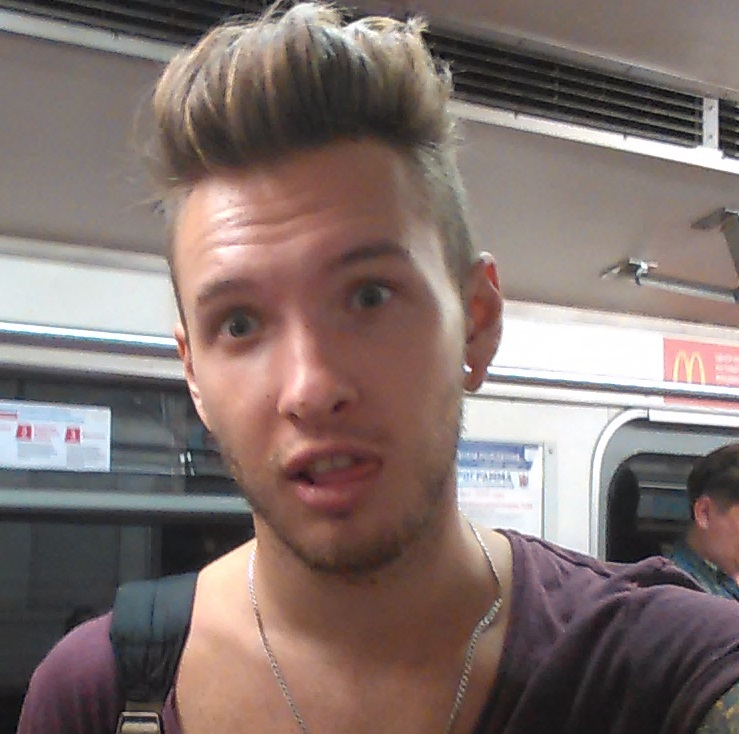

In [52]:
describe_and_show('test/felix.jpg')

This person looks like chihuahua


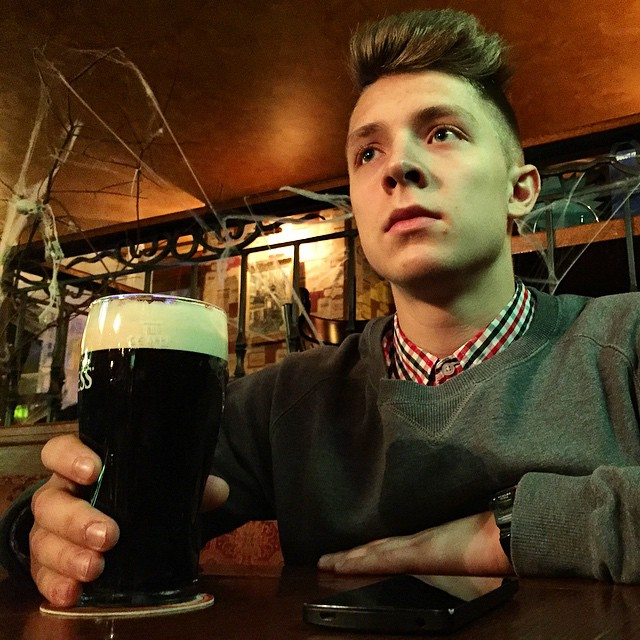

In [45]:
describe_and_show('test/me.jpg')

This dog looks like french bulldog


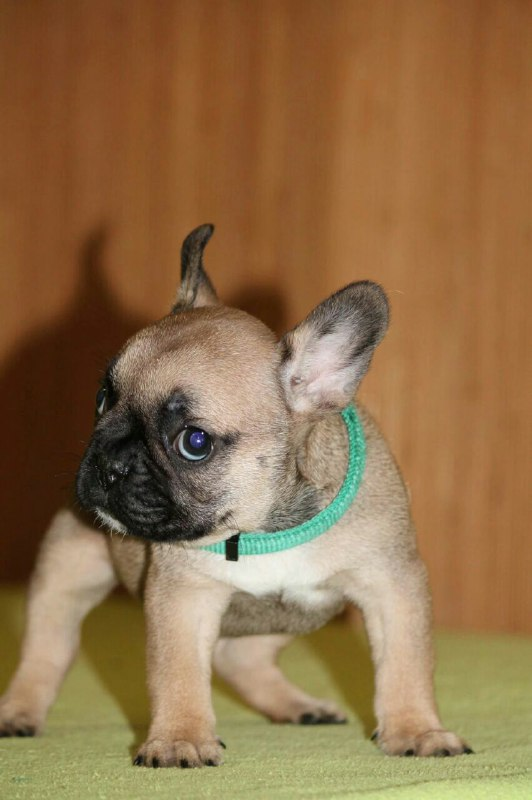

In [46]:
describe_and_show('test/sheldon.jpg')

This dog looks like dalmatian


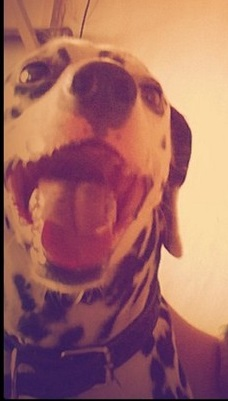

In [47]:
describe_and_show('test/dalmatian.jpg')

This dog looks like akita


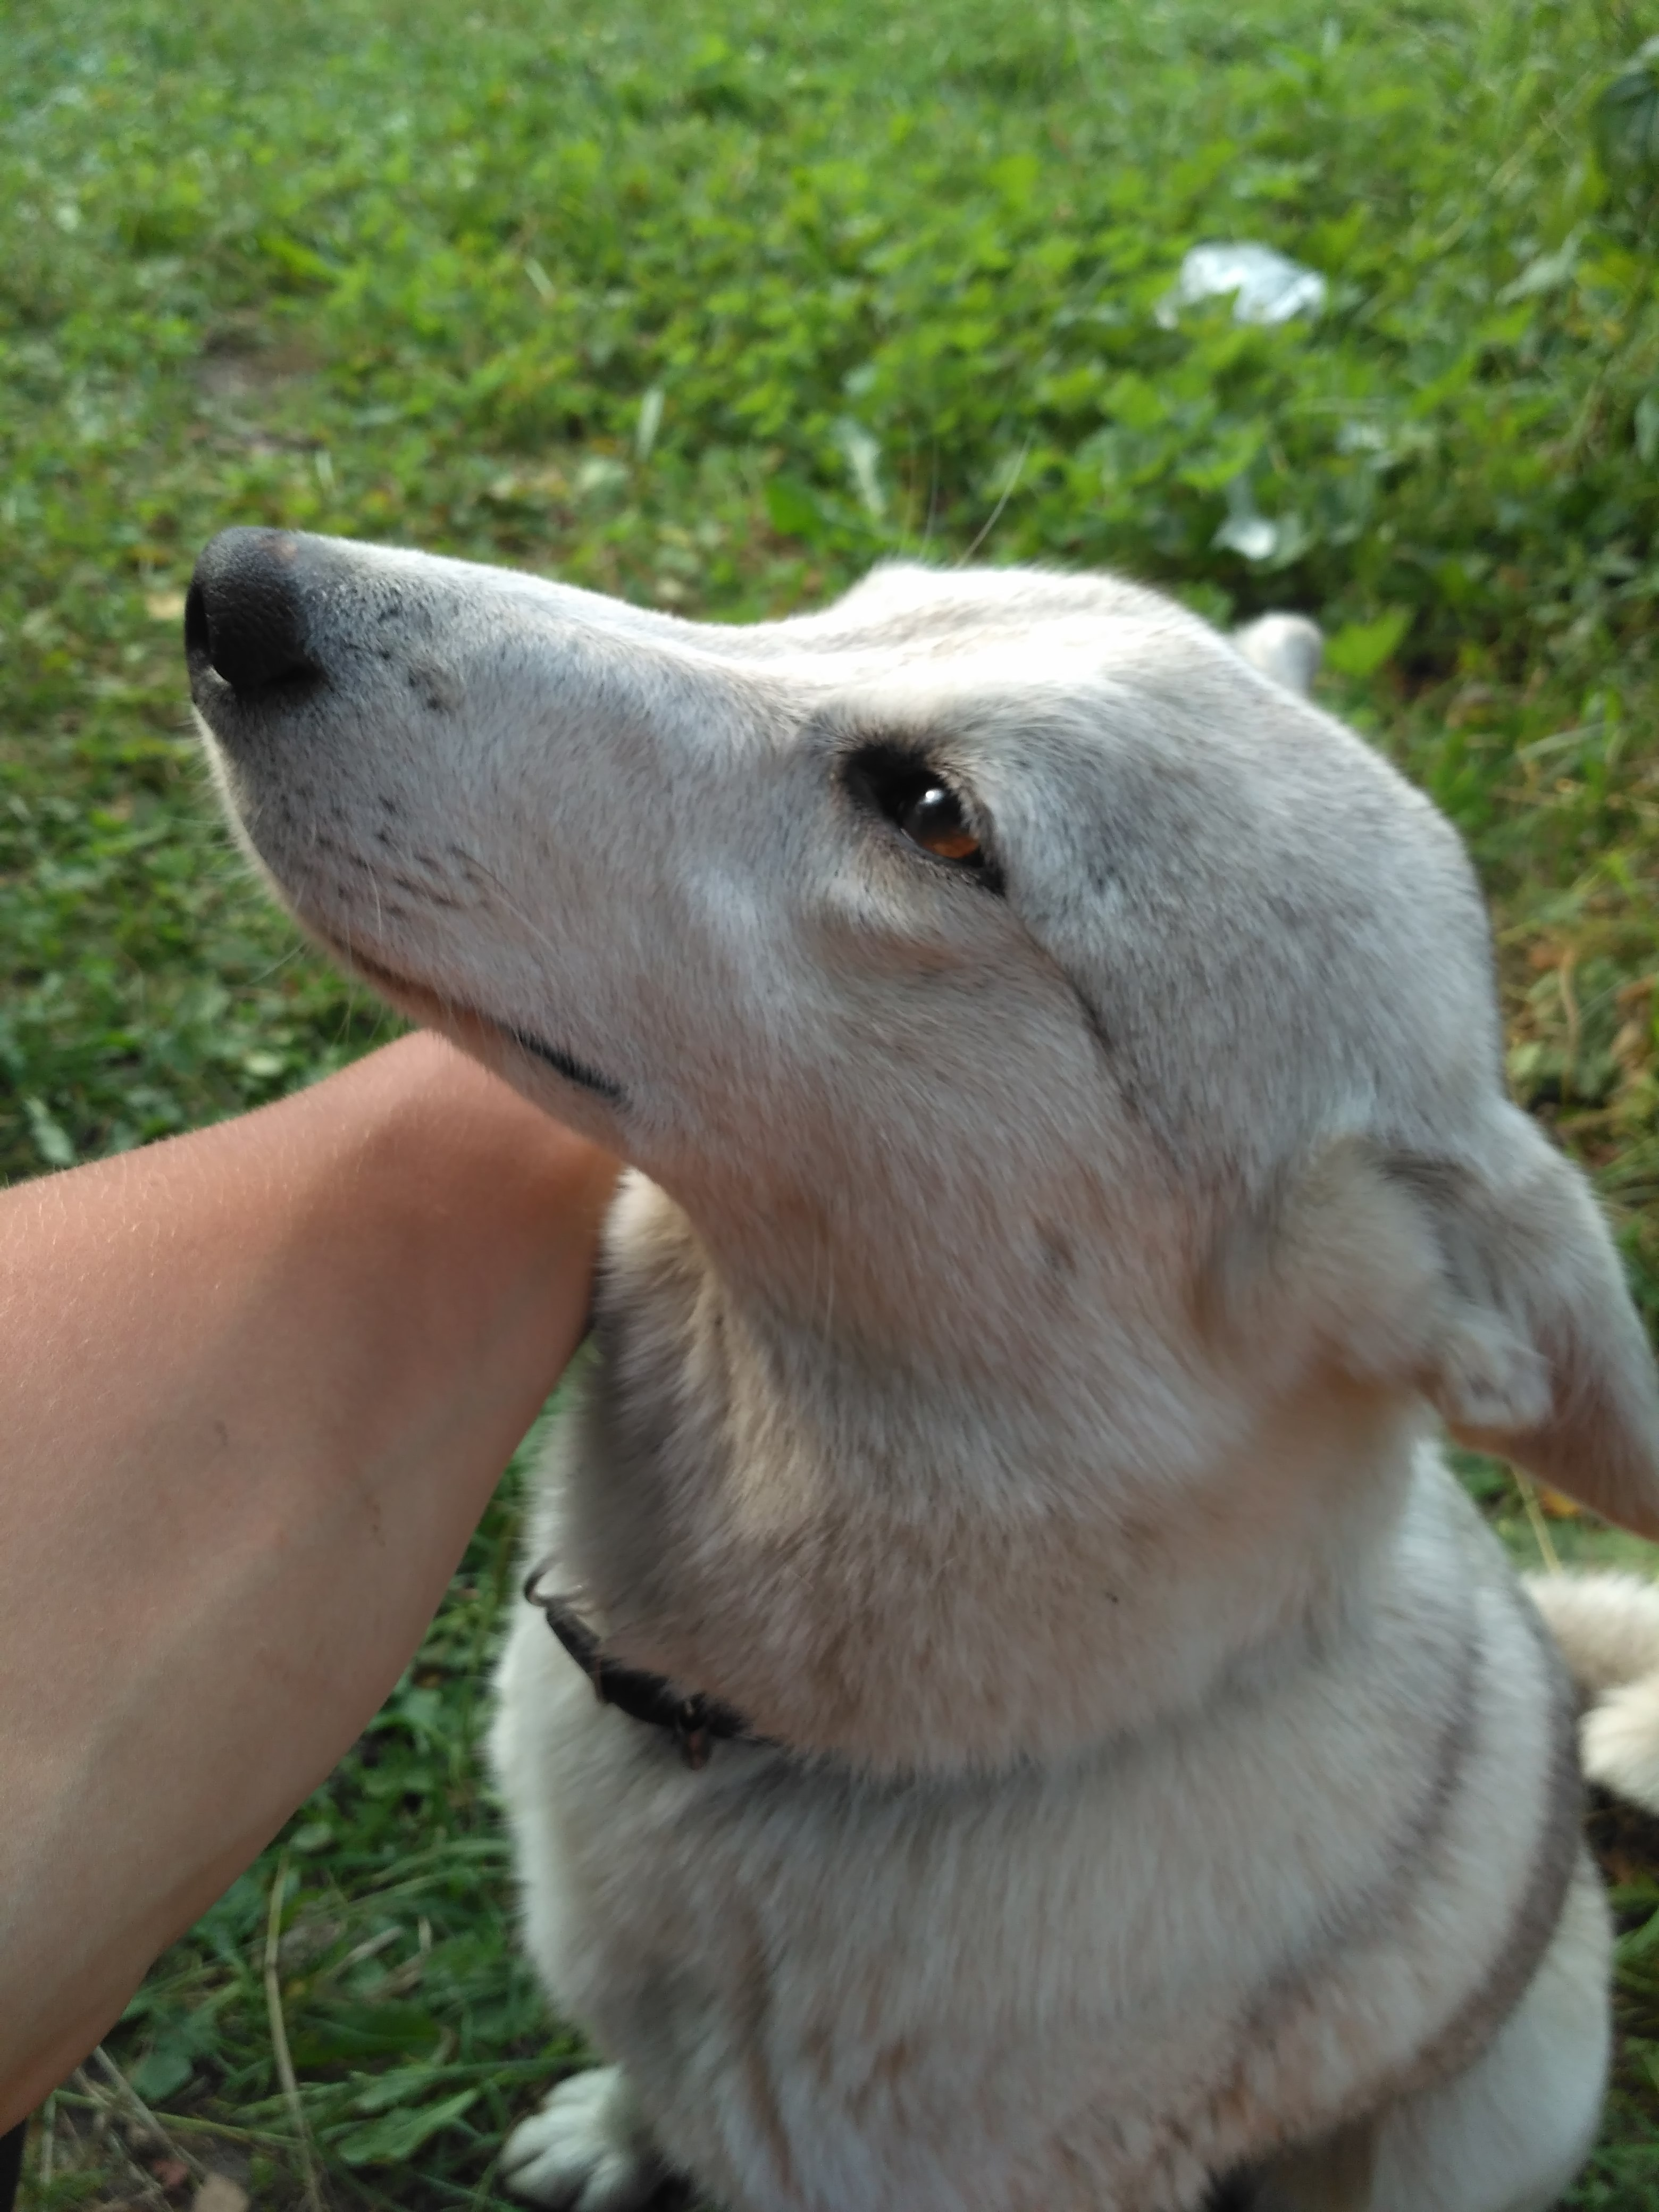

In [48]:
describe_and_show('test/karelia.jpg')

No dog or person found


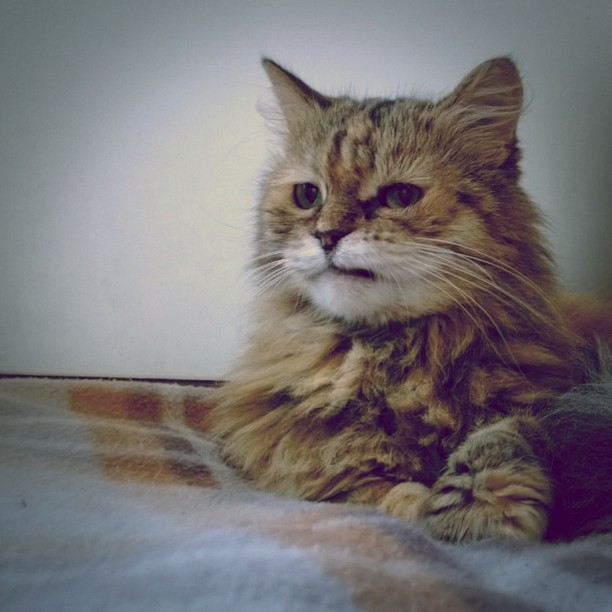

In [49]:
describe_and_show('test/cat.jpg')

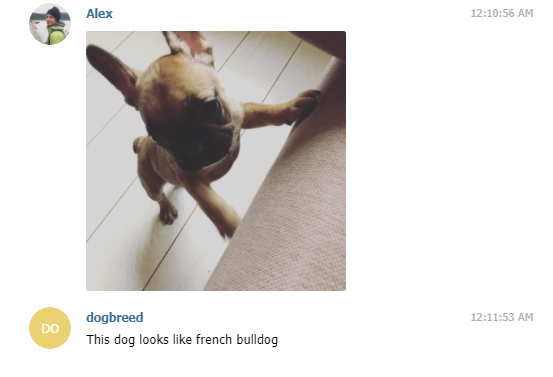

In [50]:
# The interaction with the bot looks like this
Image('telegram/1.PNG')

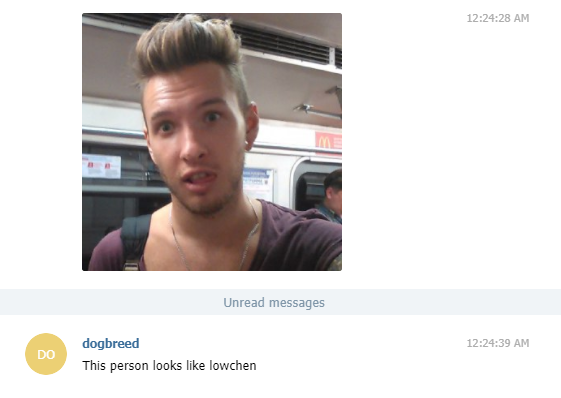

In [51]:
Image('telegram/2.PNG')